# crawling


In [ ]:
import requests
from bs4 import BeautifulSoup
headers={"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"}
page = requests.get("https://finance.yahoo.com/quote/BTC-USD/history?period1=1577836800&period2=1609372800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true",headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')
soup
print(soup.prettify())


<!DOCTYPE html>
<html class="NoJs chrome desktop" data-color-theme="light" id="atomic" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Bitcoin USD (BTC-USD) Price History &amp; Historical Data - Yahoo Finance
  </title>
  <meta content="BTC-USD, Bitcoin USD, BTC-USD historical prices, Bitcoin USD historical prices, historical prices, stocks, quotes, finance" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Discover historical prices of Bitcoin USD (BTC-USD) on Yahoo Finance. View daily, weekly or monthly formats." lang="en-US" name="description"/>
  <meta content="guce

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import pandas as pd

headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"}
url = 'https://finance.yahoo.com/quote/BTC-USD/history?period1=1577836800&period2=1609372800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'

# Send a GET request to the URL
response = requests.get(url, headers=headers)

# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table element with the data
table = soup.find('table')

# Find the table head (header) row
header_row = table.find('thead').find('tr')

# Extract the column names from the header row
columns = [th.get_text() for th in header_row.find_all('th')]

# Find all the table body rows
data_rows = table.find('tbody').find_all('tr')

# Initialize an empty list to store the data
data_list = []

# Iterate over each data row and extract the values
for row in data_rows:
    # Extract the values from each cell in the row
    values = [td.get_text() for td in row.find_all('td')]

    # Create a dictionary to store the data
    data = dict(zip(columns, values))

    # Append the dictionary to the list
    data_list.append(data)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

df.head()

Date       Open       High        Low     Close* Adj Close**  \
0  Dec 31, 2020  28,841.57  29,244.88  28,201.99  29,001.72   29,001.72   
1  Dec 30, 2020  27,360.09  28,937.74  27,360.09  28,840.95   28,840.95   
2  Dec 29, 2020  27,081.81  27,370.72  25,987.30  27,362.44   27,362.44   
3  Dec 28, 2020  26,280.82  27,389.11  26,207.64  27,084.81   27,084.81   
4  Dec 27, 2020  26,439.37  28,288.84  25,922.77  26,272.29   26,272.29   

           Volume  
0  46,754,964,848  
1  51,287,442,704  
2  45,265,946,774  
3  49,056,742,893  
4  66,479,895,605

In [ ]:
import requests
import pandas as pd

url = 'https://query1.finance.yahoo.com/v8/finance/chart/BTC-USD'
params = {
    'symbol': 'BTC-USD',
    'period1': 1577836800,  # start timestamp
    'period2': 1609372800,  # end timestamp
    'interval': '1d',  # interval: 1 day
}

headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"
}

response = requests.get(url, params=params, headers=headers)
data = response.json()

# Extract historical data from the JSON response
timestamps = data['chart']['result'][0]['timestamp']
quote_data = data['chart']['result'][0]['indicators']['quote'][0]

# Create a DataFrame
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Date': pd.to_datetime(timestamps, unit='s').date,
    'Open': quote_data['open'],
    'High': quote_data['high'],
    'Low': quote_data['low'],
    'Close': quote_data['close'],
    'Volume': quote_data['volume']
})

# Print or save the DataFrame
df.to_csv('btc_usd_history.csv', index=False)
(df.head())


Timestamp        Date         Open         High          Low        Close  \
0  1577836800  2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316   
1  1577923200  2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215   
2  1578009600  2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277   
3  1578096000  2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738   
4  1578182400  2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383   

        Volume  
0  18565664997  
1  20802083465  
2  28111481032  
3  18444271275  
4  19725074095

In [ ]:
df.tail()

Timestamp        Date          Open          High           Low  \
361  1609027200  2020-12-27  26439.373047  28288.839844  25922.769531   
362  1609113600  2020-12-28  26280.822266  27389.111328  26207.640625   
363  1609200000  2020-12-29  27081.810547  27370.720703  25987.298828   
364  1609286400  2020-12-30  27360.089844  28937.740234  27360.089844   
365  1609372800  2020-12-31  28841.574219  29244.876953  28201.992188   

            Close       Volume  
361  26272.294922  66479895605  
362  27084.808594  49056742893  
363  27362.437500  45265946774  
364  28840.953125  51287442704  
365  29001.720703  46754964848

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the website to crawl
url = 'https://finance.yahoo.com/crypto?offset={offset}&count={count}'
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"
}

# Define the batch size and total number of rows
batch_size = 100
total_rows = 8000

# List to store symbols
symbols_list = []

# Calculate the number of requests needed
num_requests = total_rows // batch_size
if total_rows % batch_size != 0:
    num_requests += 1

# Iterate over each batch of data
for i in range(num_requests):
    # Calculate the offset and count for the current batch
    offset = i * batch_size
    count = min(batch_size, total_rows - offset)

    # Send a GET request to the URL with the updated parameters
    response = requests.get(url.format(offset=offset, count=count), headers=headers)

    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table element with the data
    table = soup.find('table')

    # Find the table head (header) row
    header_row = table.find('thead').find('tr')

    # Extract the column names from the header row
    columns = [th.get_text() for th in header_row.find_all('th')]

    # Find all the table body rows
    data_rows = table.find('tbody').find_all('tr')

    # Iterate over each data row and extract the symbols
    for row in data_rows:
        # Extract the values from each cell in the row
        values = [td.get_text() for td in row.find_all('td')]

        # Create a dictionary to store the data
        data = dict(zip(columns, values))

        # Extract and append the symbol to the list
        symbols_list.append(data['Symbol'])

# Print the list of symbols
print(symbols_list)


['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'USDC-USD', 'ADA-USD', 'STETH-USD', 'AVAX-USD', 'DOGE-USD', 'DOT-USD', 'TRX-USD', 'WTRX-USD', 'MATIC-USD', 'LINK-USD', 'TON11419-USD', 'WBTC-USD', 'SHIB-USD', 'ICP-USD', 'LTC-USD', 'DAI-USD', 'BCH-USD', 'WEOS-USD', 'UNI7083-USD', 'ATOM-USD', 'LEO-USD', 'XLM-USD', 'NEAR-USD', 'FIL-USD', 'OP-USD', 'OKB-USD', 'ETC-USD', 'XMR-USD', 'INJ-USD', 'IMX10603-USD', 'APT21794-USD', 'HBAR-USD', 'WHBAR-USD', 'BXC5168-USD', 'VET-USD', 'KAS-USD', 'CRO-USD', 'LDO-USD', 'TUSD-USD', 'BTCB-USD', 'STX4847-USD', 'BSV-USD', 'MNT27075-USD', 'USDE-USD', 'ARB11841-USD', 'TIA22861-USD', 'EGLD-USD', 'WBETH-USD', 'FDUSD-USD', 'GRT6719-USD', 'ALGO-USD', 'RUNE-USD', 'RNDR-USD', 'QNT-USD', '1000SATS-USD', 'AAVE-USD', 'ORDI-USD', 'MKR-USD', 'TAO22974-USD', 'MINA-USD', 'SEI-USD', 'RETH-USD', 'FTM-USD', 'FLOW-USD', 'THETA-USD', 'SAND-USD', 'SNX-USD', 'AXS-USD', 'HNT-USD', 'BTT-USD', 'BUSD-USD', 'XTZ-USD', 'FTT-USD', 'KCS-USD', 'NEO-USD', 'MANA-USD', 'KA

In [ ]:
# Save symbols_list to a text file
with open('symbols_list.txt', 'w') as file:
    for symbol in symbols_list:
        file.write(symbol + '\n')


In [ ]:
import requests
import pandas as pd
from tqdm import tqdm  # Import tqdm for the progress bar

# Define the batch size and total number of rows
batch_size = 100
symbols=[]
# Iterate over each symbol in symbols_list
for symbol in tqdm(symbols_list, desc="Processing Symbols", unit="symbol"):
    tqdm.write(f"Processing {symbol}")
    # URL for fetching historical data
    url = f'https://query1.finance.yahoo.com/v8/finance/chart/{symbol}'
    # print(url)
    # Parameters for the request
    params = {
        'symbol': symbol,
        'period1': 1577836800,  # start timestamp
        'period2': 1609372800,  # end timestamp
        'interval': '1d',  # interval: 1 day
    }

    # Headers for the request
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"
    }

    # Send a GET request to the URL with the updated parameters
    response = requests.get(url, params=params, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Extract historical data from the JSON response
        data = response.json()

        # Check if the expected keys are present in the response
        if 'chart' in data and 'result' in data['chart'] and data['chart']['result']:
            result = data['chart']['result'][0]

            # Check if the expected keys are present in the result
            if 'timestamp' in result and 'indicators' in result and 'quote' in result['indicators'] and result['indicators']['quote']:
                timestamps = result['timestamp']
                quote_data = result['indicators']['quote'][0]

                # Create a DataFrame
                df = pd.DataFrame({
                    'Timestamp': timestamps,
                    'Date': pd.to_datetime(timestamps, unit='s').date,
                    'Open': quote_data.get('open', []),
                    'High': quote_data.get('high', []),
                    'Low': quote_data.get('low', []),
                    'Close': quote_data.get('close', []),
                    'Volume': quote_data.get('volume', [])
                })
                symbols.append(symbol)
                # Print or save the DataFrame
                df.to_csv(f'/content/data/{symbol}_history.csv', index=False)
            else:
                tqdm.write(f'Error: Required keys not found in result for {symbol}.')
        else:
            tqdm.write(f'Error: Required keys not found in chart for {symbol}.')
    else:
        tqdm.write(f'Error fetching data for {symbol}. Status code: {response.status_code}')
# Save symbols_list to a text file
with open('symbols_list.txt', 'w') as file:
    for symbol in symbols:
        file.write(symbol + '\n')


Processing Symbols:   0%|          | 1/8000 [00:00<20:16,  6.58symbol/s]

Processing BTC-USD
Processing ETH-USD


Processing Symbols:   0%|          | 3/8000 [00:00<22:07,  6.03symbol/s]

Processing USDT-USD
Processing BNB-USD


Processing Symbols:   0%|          | 5/8000 [00:00<22:13,  5.99symbol/s]

Processing SOL-USD
Processing XRP-USD


Processing Symbols:   0%|          | 7/8000 [00:01<22:43,  5.86symbol/s]

Processing USDC-USD
Processing ADA-USD


Processing Symbols:   0%|          | 9/8000 [00:01<22:35,  5.89symbol/s]

Processing STETH-USD
Processing AVAX-USD


Processing Symbols:   0%|          | 11/8000 [00:01<22:30,  5.91symbol/s]

Processing DOGE-USD
Processing DOT-USD


Processing Symbols:   0%|          | 13/8000 [00:02<22:13,  5.99symbol/s]

Processing TRX-USD
Processing WTRX-USD


Processing Symbols:   0%|          | 15/8000 [00:02<22:33,  5.90symbol/s]

Error fetching data for WTRX-USD. Status code: 400
Processing MATIC-USD
Processing LINK-USD


Processing Symbols:   0%|          | 17/8000 [00:02<21:23,  6.22symbol/s]

Processing TON11419-USD
Error fetching data for TON11419-USD. Status code: 400
Processing WBTC-USD


Processing Symbols:   0%|          | 19/8000 [00:03<20:49,  6.39symbol/s]

Processing SHIB-USD
Processing ICP-USD


Processing Symbols:   0%|          | 21/8000 [00:03<21:22,  6.22symbol/s]

Error fetching data for ICP-USD. Status code: 400
Processing LTC-USD
Processing DAI-USD


Processing Symbols:   0%|          | 23/8000 [00:03<21:55,  6.06symbol/s]

Processing BCH-USD
Processing WEOS-USD


Processing Symbols:   0%|          | 25/8000 [00:04<21:43,  6.12symbol/s]

Error fetching data for WEOS-USD. Status code: 400
Processing UNI7083-USD
Processing ATOM-USD


Processing Symbols:   0%|          | 27/8000 [00:04<21:31,  6.17symbol/s]

Processing LEO-USD
Processing XLM-USD


Processing Symbols:   0%|          | 29/8000 [00:04<20:44,  6.40symbol/s]

Processing NEAR-USD
Processing FIL-USD


Processing Symbols:   0%|          | 31/8000 [00:05<20:33,  6.46symbol/s]

Processing OP-USD
Error fetching data for OP-USD. Status code: 400
Processing OKB-USD


Processing Symbols:   0%|          | 32/8000 [00:05<20:32,  6.46symbol/s]

Processing ETC-USD


Processing Symbols:   0%|          | 34/8000 [00:05<28:24,  4.67symbol/s]

Processing XMR-USD
Processing INJ-USD


Processing Symbols:   0%|          | 36/8000 [00:06<24:13,  5.48symbol/s]

Processing IMX10603-USD
Error fetching data for IMX10603-USD. Status code: 400
Processing APT21794-USD


Processing Symbols:   0%|          | 38/8000 [00:06<22:54,  5.79symbol/s]

Error fetching data for APT21794-USD. Status code: 400
Processing HBAR-USD
Processing WHBAR-USD


Processing Symbols:   0%|          | 40/8000 [00:06<22:23,  5.92symbol/s]

Error fetching data for WHBAR-USD. Status code: 400
Processing BXC5168-USD
Processing VET-USD


Processing Symbols:   1%|          | 42/8000 [00:07<21:15,  6.24symbol/s]

Processing KAS-USD
Error fetching data for KAS-USD. Status code: 400
Processing CRO-USD


Processing Symbols:   1%|          | 44/8000 [00:07<21:14,  6.24symbol/s]

Processing LDO-USD
Error fetching data for LDO-USD. Status code: 400
Processing TUSD-USD


Processing Symbols:   1%|          | 45/8000 [00:07<23:56,  5.54symbol/s]

Processing BTCB-USD


Processing Symbols:   1%|          | 46/8000 [00:07<26:00,  5.10symbol/s]

Processing STX4847-USD


Processing Symbols:   1%|          | 47/8000 [00:08<26:59,  4.91symbol/s]

Processing BSV-USD


Processing Symbols:   1%|          | 49/8000 [00:08<27:16,  4.86symbol/s]

Processing MNT27075-USD
Error fetching data for MNT27075-USD. Status code: 400
Processing USDE-USD


Error fetching data for USDE-USD. Status code: 400
Processing ARB11841-USD


Error fetching data for ARB11841-USD. Status code: 400
Processing TIA22861-USD


Processing Symbols:   1%|          | 52/8000 [00:09<26:56,  4.92symbol/s]

Error fetching data for TIA22861-USD. Status code: 400
Processing EGLD-USD


Processing WBETH-USD


Processing Symbols:   1%|          | 54/8000 [00:09<27:30,  4.81symbol/s]

Error fetching data for WBETH-USD. Status code: 400
Processing FDUSD-USD


Processing Symbols:   1%|          | 55/8000 [00:09<27:59,  4.73symbol/s]

Error fetching data for FDUSD-USD. Status code: 400
Processing GRT6719-USD


Processing Symbols:   1%|          | 56/8000 [00:09<27:59,  4.73symbol/s]

Processing ALGO-USD


Processing Symbols:   1%|          | 57/8000 [00:10<28:39,  4.62symbol/s]

Processing RUNE-USD


Processing Symbols:   1%|          | 58/8000 [00:10<28:59,  4.57symbol/s]

Processing RNDR-USD


Processing Symbols:   1%|          | 59/8000 [00:10<29:14,  4.53symbol/s]

Processing QNT-USD


Processing Symbols:   1%|          | 61/8000 [00:11<26:22,  5.02symbol/s]

Processing 1000SATS-USD
Error fetching data for 1000SATS-USD. Status code: 400
Processing AAVE-USD


Processing Symbols:   1%|          | 63/8000 [00:11<22:57,  5.76symbol/s]

Processing ORDI-USD
Error fetching data for ORDI-USD. Status code: 400
Processing MKR-USD


Processing Symbols:   1%|          | 65/8000 [00:11<21:53,  6.04symbol/s]

Processing TAO22974-USD
Error fetching data for TAO22974-USD. Status code: 400
Processing MINA-USD


Processing Symbols:   1%|          | 67/8000 [00:11<21:16,  6.22symbol/s]

Error fetching data for MINA-USD. Status code: 400
Processing SEI-USD
Error fetching data for SEI-USD. Status code: 400
Processing RETH-USD


Processing Symbols:   1%|          | 69/8000 [00:12<20:39,  6.40symbol/s]

Error fetching data for RETH-USD. Status code: 400
Processing FTM-USD
Processing FLOW-USD


Processing Symbols:   1%|          | 71/8000 [00:12<21:02,  6.28symbol/s]

Error fetching data for FLOW-USD. Status code: 400
Processing THETA-USD
Processing SAND-USD


Processing Symbols:   1%|          | 73/8000 [00:12<21:22,  6.18symbol/s]

Processing SNX-USD
Processing AXS-USD


Processing Symbols:   1%|          | 75/8000 [00:13<20:07,  6.56symbol/s]

Processing HNT-USD
Processing BTT-USD


Processing Symbols:   1%|          | 77/8000 [00:13<20:58,  6.29symbol/s]

Processing BUSD-USD
Processing XTZ-USD


Processing Symbols:   1%|          | 79/8000 [00:13<21:12,  6.22symbol/s]

Processing FTT-USD
Processing KCS-USD


Processing Symbols:   1%|          | 81/8000 [00:14<21:27,  6.15symbol/s]

Processing NEO-USD
Processing MANA-USD


Processing Symbols:   1%|          | 83/8000 [00:14<21:23,  6.17symbol/s]

Processing KAVA-USD
Processing EOS-USD


Processing Symbols:   1%|          | 85/8000 [00:14<21:28,  6.14symbol/s]

Processing IOTA-USD
Error fetching data for IOTA-USD. Status code: 400
Processing HEX-USD


Processing Symbols:   1%|          | 87/8000 [00:15<21:13,  6.22symbol/s]

Processing KLAY-USD
Processing ROSE-USD


Processing Symbols:   1%|          | 89/8000 [00:15<20:01,  6.58symbol/s]

Processing WEMIX-USD
Processing SUI20947-USD


Processing Symbols:   1%|          | 91/8000 [00:15<20:07,  6.55symbol/s]

Error fetching data for SUI20947-USD. Status code: 400
Processing BGB-USD
Error fetching data for BGB-USD. Status code: 400
Processing GALA-USD


Processing Symbols:   1%|          | 93/8000 [00:16<20:03,  6.57symbol/s]

Processing CAKE-USD
Processing CHEEL-USD


Processing Symbols:   1%|          | 95/8000 [00:16<20:13,  6.51symbol/s]

Error fetching data for CHEEL-USD. Status code: 400
Processing XDC-USD
Processing BONK-USD


Processing Symbols:   1%|          | 97/8000 [00:16<20:56,  6.29symbol/s]

Error fetching data for BONK-USD. Status code: 400
Processing LUNC-USD
Processing BEAM28298-USD


Processing Symbols:   1%|          | 99/8000 [00:16<21:00,  6.27symbol/s]

Error fetching data for BEAM28298-USD. Status code: 400
Processing XEC-USD
Error fetching data for XEC-USD. Status code: 400
Processing OSMO-USD


Processing Symbols:   1%|▏         | 101/8000 [00:17<20:37,  6.38symbol/s]

Error fetching data for OSMO-USD. Status code: 400
Processing ASTR-USD
Error fetching data for ASTR-USD. Status code: 400
Processing USDD-USD


Processing Symbols:   1%|▏         | 103/8000 [00:17<20:05,  6.55symbol/s]

Error fetching data for USDD-USD. Status code: 400
Processing WOO-USD
Processing CFX-USD


Processing Symbols:   1%|▏         | 104/8000 [00:17<20:04,  6.56symbol/s]

Processing CHZ-USD


Processing Symbols:   1%|▏         | 106/8000 [00:18<24:37,  5.34symbol/s]

Processing FXS-USD
Processing FRAX-USD


Processing Symbols:   1%|▏         | 108/8000 [00:18<22:09,  5.94symbol/s]

Processing CRV-USD
Processing AR-USD


Processing Symbols:   1%|▏         | 110/8000 [00:18<24:13,  5.43symbol/s]

Processing WBNB-USD
Processing AXL17799-USD


Processing Symbols:   1%|▏         | 112/8000 [00:19<21:37,  6.08symbol/s]

Error fetching data for AXL17799-USD. Status code: 400
Processing VBNB-USD
Processing CSPR-USD


Processing Symbols:   1%|▏         | 114/8000 [00:19<21:25,  6.13symbol/s]

Error fetching data for CSPR-USD. Status code: 400
Processing RPL-USD
Processing 1INCH-USD


Processing Symbols:   1%|▏         | 116/8000 [00:19<21:01,  6.25symbol/s]

Processing APE18876-USD
Error fetching data for APE18876-USD. Status code: 400
Processing FET-USD


Processing Symbols:   1%|▏         | 118/8000 [00:20<20:50,  6.30symbol/s]

Processing BLUR-USD
Error fetching data for BLUR-USD. Status code: 400
Processing AKT-USD


Processing Symbols:   2%|▏         | 120/8000 [00:20<20:00,  6.57symbol/s]

Processing FLR-USD
Error fetching data for FLR-USD. Status code: 400
Processing ETHDYDX-USD


Processing Symbols:   2%|▏         | 122/8000 [00:20<19:48,  6.63symbol/s]

Error fetching data for ETHDYDX-USD. Status code: 400
Processing PEPE24478-USD
Error fetching data for PEPE24478-USD. Status code: 400
Processing GMX11857-USD


Processing Symbols:   2%|▏         | 123/8000 [00:20<21:45,  6.03symbol/s]

Error fetching data for GMX11857-USD. Status code: 400
Processing RON14101-USD


Processing Symbols:   2%|▏         | 124/8000 [00:21<23:30,  5.58symbol/s]

Error fetching data for RON14101-USD. Status code: 400
Processing KUJI-USD


Processing Symbols:   2%|▏         | 125/8000 [00:21<24:53,  5.27symbol/s]

Error fetching data for KUJI-USD. Status code: 400
Processing LUNA20314-USD


Processing Symbols:   2%|▏         | 126/8000 [00:21<25:59,  5.05symbol/s]

Error fetching data for LUNA20314-USD. Status code: 400
Processing XAUT-USD


Processing Symbols:   2%|▏         | 127/8000 [00:21<26:38,  4.93symbol/s]

Processing GNO-USD


Processing Symbols:   2%|▏         | 128/8000 [00:22<28:37,  4.58symbol/s]

Processing GMT18069-USD


Processing Symbols:   2%|▏         | 129/8000 [00:22<30:17,  4.33symbol/s]

Error fetching data for GMT18069-USD. Status code: 400
Processing TWT-USD


Processing Symbols:   2%|▏         | 130/8000 [00:22<29:46,  4.41symbol/s]

Processing GT-USD


Processing Symbols:   2%|▏         | 131/8000 [00:22<29:29,  4.45symbol/s]

Processing TRB-USD


Processing CORE23254-USD


Processing Symbols:   2%|▏         | 133/8000 [00:23<29:17,  4.48symbol/s]

Error fetching data for CORE23254-USD. Status code: 400
Processing PYTH-USD


Processing Symbols:   2%|▏         | 134/8000 [00:23<29:43,  4.41symbol/s]

Error fetching data for PYTH-USD. Status code: 400
Processing NEXO-USD


Processing Symbols:   2%|▏         | 136/8000 [00:23<29:47,  4.40symbol/s]

Processing CBETH-USD
Error fetching data for CBETH-USD. Status code: 400


Processing Symbols:   2%|▏         | 136/8000 [00:23<29:47,  4.40symbol/s]

Processing COMP5692-USD


Processing Symbols:   2%|▏         | 138/8000 [00:24<28:29,  4.60symbol/s]

Processing IOTX-USD
Processing GAS-USD


Processing Symbols:   2%|▏         | 140/8000 [00:24<25:12,  5.20symbol/s]

Processing ZEC-USD
Processing PAXG-USD


Processing Symbols:   2%|▏         | 142/8000 [00:25<22:57,  5.70symbol/s]

Processing NFT9816-USD
Error fetching data for NFT9816-USD. Status code: 400
Processing XRD-USD


Processing Symbols:   2%|▏         | 144/8000 [00:25<21:39,  6.05symbol/s]

Error fetching data for XRD-USD. Status code: 400
Processing WKAVA-USD
Error fetching data for WKAVA-USD. Status code: 400
Processing ZIL-USD


Processing Symbols:   2%|▏         | 146/8000 [00:25<20:58,  6.24symbol/s]

Processing RLB-USD
Error fetching data for RLB-USD. Status code: 400
Processing FTN-USD


Processing Symbols:   2%|▏         | 148/8000 [00:25<20:55,  6.26symbol/s]

Error fetching data for FTN-USD. Status code: 400
Processing HT-USD
Processing HOT2682-USD


Processing Symbols:   2%|▏         | 150/8000 [00:26<20:42,  6.32symbol/s]

Processing AZERO-USD
Error fetching data for AZERO-USD. Status code: 400
Processing HBTC-USD


Processing Symbols:   2%|▏         | 152/8000 [00:26<20:36,  6.35symbol/s]

Processing ELF-USD
Processing LRC-USD


Processing Symbols:   2%|▏         | 154/8000 [00:26<21:16,  6.15symbol/s]

Processing CELO-USD
Processing AGIX-USD


Processing Symbols:   2%|▏         | 156/8000 [00:27<23:07,  5.65symbol/s]

Processing BAT-USD
Processing SC-USD


Processing Symbols:   2%|▏         | 158/8000 [00:27<21:57,  5.95symbol/s]

Processing KSM-USD
Processing WLD-USD


Processing Symbols:   2%|▏         | 160/8000 [00:27<21:38,  6.04symbol/s]

Error fetching data for WLD-USD. Status code: 400
Processing QTUM-USD
Processing ENJ-USD


Processing Symbols:   2%|▏         | 161/8000 [00:28<21:23,  6.11symbol/s]

Processing BTG-USD


Processing Symbols:   2%|▏         | 163/8000 [00:28<23:07,  5.65symbol/s]

Processing USDP-USD
Processing DASH-USD


Processing Symbols:   2%|▏         | 165/8000 [00:28<21:23,  6.10symbol/s]

Processing GLMR-USD
Error fetching data for GLMR-USD. Status code: 400
Processing XCH-USD


Processing Symbols:   2%|▏         | 167/8000 [00:29<21:10,  6.16symbol/s]

Error fetching data for XCH-USD. Status code: 400
Processing XEM-USD
Processing DESO-USD


Processing Symbols:   2%|▏         | 169/8000 [00:29<21:14,  6.14symbol/s]

Error fetching data for DESO-USD. Status code: 400
Processing ETHW-USD
Error fetching data for ETHW-USD. Status code: 400
Processing ORBR-USD


Processing Symbols:   2%|▏         | 171/8000 [00:29<20:48,  6.27symbol/s]

Error fetching data for ORBR-USD. Status code: 400
Processing KDA-USD
Processing SKL-USD


Processing Symbols:   2%|▏         | 173/8000 [00:30<19:58,  6.53symbol/s]

Processing ILV-USD
Error fetching data for ILV-USD. Status code: 400
Processing METIS-USD


Processing Symbols:   2%|▏         | 175/8000 [00:30<20:37,  6.32symbol/s]

Error fetching data for METIS-USD. Status code: 400
Processing FLOKI-USD
Error fetching data for FLOKI-USD. Status code: 400
Processing CFG-USD


Processing Symbols:   2%|▏         | 177/8000 [00:30<20:15,  6.44symbol/s]

Error fetching data for CFG-USD. Status code: 400
Processing SFP-USD
Error fetching data for SFP-USD. Status code: 400
Processing JASMY-USD


Processing Symbols:   2%|▏         | 179/8000 [00:31<20:25,  6.38symbol/s]

Error fetching data for JASMY-USD. Status code: 400
Processing TFUEL-USD
Processing MASK8536-USD


Processing Symbols:   2%|▏         | 181/8000 [00:31<21:35,  6.04symbol/s]

Error fetching data for MASK8536-USD. Status code: 400
Processing ZRX-USD
Processing WAVES-USD


Processing Symbols:   2%|▏         | 183/8000 [00:31<20:44,  6.28symbol/s]

Processing CVX-USD
Error fetching data for CVX-USD. Status code: 400
Processing RAY-USD


Processing Symbols:   2%|▏         | 185/8000 [00:31<21:06,  6.17symbol/s]

Error fetching data for RAY-USD. Status code: 400
Processing MOBILE-USD
Error fetching data for MOBILE-USD. Status code: 400
Processing NTRN26680-USD


Processing Symbols:   2%|▏         | 187/8000 [00:32<20:46,  6.27symbol/s]

Error fetching data for NTRN26680-USD. Status code: 400
Processing AUDIO-USD
Processing ONT-USD


Processing Symbols:   2%|▏         | 189/8000 [00:32<20:26,  6.37symbol/s]

Processing SUPER8290-USD
Error fetching data for SUPER8290-USD. Status code: 400
Processing ENS-USD


Processing Symbols:   2%|▏         | 191/8000 [00:32<21:22,  6.09symbol/s]

Error fetching data for ENS-USD. Status code: 400
Processing OCEAN-USD
Processing SSV-USD


Processing Symbols:   2%|▏         | 193/8000 [00:33<20:27,  6.36symbol/s]

Error fetching data for SSV-USD. Status code: 400
Processing USTC-USD
Processing SUSHI-USD


Processing Symbols:   2%|▏         | 195/8000 [00:33<22:09,  5.87symbol/s]

Processing DCR-USD
Processing RVN-USD


Processing Symbols:   2%|▏         | 197/8000 [00:34<23:23,  5.56symbol/s]

Processing ANKR-USD
Processing BAND-USD


Processing Symbols:   2%|▏         | 198/8000 [00:34<23:21,  5.57symbol/s]

Processing JST-USD


Processing Symbols:   2%|▏         | 199/8000 [00:34<25:45,  5.05symbol/s]

Processing MX-USD


Processing Symbols:   2%|▎         | 200/8000 [00:34<30:29,  4.26symbol/s]

Processing TRAC-USD


Processing Symbols:   3%|▎         | 201/8000 [00:35<30:18,  4.29symbol/s]

Processing PENDLE-USD
Error fetching data for PENDLE-USD. Status code: 400


Processing Symbols:   3%|▎         | 202/8000 [00:35<29:25,  4.42symbol/s]

Processing STORJ-USD


Processing MAGIC14783-USD


Processing Symbols:   3%|▎         | 204/8000 [00:35<29:20,  4.43symbol/s]

Error fetching data for MAGIC14783-USD. Status code: 400
Processing YFI-USD


Processing LYX-USD
Error fetching data for LYX-USD. Status code: 400


Processing Symbols:   3%|▎         | 206/8000 [00:36<29:15,  4.44symbol/s]

Processing BDX-USD


Processing Symbols:   3%|▎         | 207/8000 [00:36<29:00,  4.48symbol/s]

Processing ONE3945-USD


Processing Symbols:   3%|▎         | 208/8000 [00:36<28:48,  4.51symbol/s]

Processing ICX-USD


Processing Symbols:   3%|▎         | 209/8000 [00:36<29:21,  4.42symbol/s]

Processing ANT-USD


Processing Symbols:   3%|▎         | 210/8000 [00:36<29:20,  4.42symbol/s]

Processing PRIME23711-USD


Processing Symbols:   3%|▎         | 211/8000 [00:37<29:25,  4.41symbol/s]

Error fetching data for PRIME23711-USD. Status code: 400
Processing SXP-USD


Processing POKT-USD


Processing Symbols:   3%|▎         | 213/8000 [00:37<29:02,  4.47symbol/s]

Error fetching data for POKT-USD. Status code: 400
Processing LPT-USD


Processing Symbols:   3%|▎         | 215/8000 [00:38<27:36,  4.70symbol/s]

Processing T-USD
Error fetching data for T-USD. Status code: 400
Processing GLM-USD


Processing Symbols:   3%|▎         | 216/8000 [00:38<26:06,  4.97symbol/s]

Processing WAXP-USD


Processing Symbols:   3%|▎         | 218/8000 [00:38<27:22,  4.74symbol/s]

Processing STRD-USD
Error fetching data for STRD-USD. Status code: 400
Processing BICO-USD


Processing Symbols:   3%|▎         | 220/8000 [00:39<23:49,  5.44symbol/s]

Error fetching data for BICO-USD. Status code: 400
Processing BAL-USD
Processing MEME28301-USD


Processing Symbols:   3%|▎         | 222/8000 [00:39<22:09,  5.85symbol/s]

Error fetching data for MEME28301-USD. Status code: 400
Processing JOE-USD
Error fetching data for JOE-USD. Status code: 400
Processing FNSA-USD


Processing Symbols:   3%|▎         | 224/8000 [00:39<22:13,  5.83symbol/s]

Error fetching data for FNSA-USD. Status code: 400
Processing PYR-USD
Error fetching data for PYR-USD. Status code: 400
Processing MOVR-USD


Processing Symbols:   3%|▎         | 226/8000 [00:39<21:04,  6.15symbol/s]

Error fetching data for MOVR-USD. Status code: 400
Processing VBIT-USD
Processing TNC5524-USD


Processing Symbols:   3%|▎         | 228/8000 [00:40<21:17,  6.08symbol/s]

Processing CTC-USD
Processing FLUX-USD


Processing Symbols:   3%|▎         | 230/8000 [00:40<20:36,  6.29symbol/s]

Processing GAL11877-USD
Error fetching data for GAL11877-USD. Status code: 400
Processing JTO-USD


Processing Symbols:   3%|▎         | 232/8000 [00:40<20:29,  6.32symbol/s]

Error fetching data for JTO-USD. Status code: 400
Processing WE20456-USD
Error fetching data for WE20456-USD. Status code: 400
Processing EDGT-USD


Processing Symbols:   3%|▎         | 234/8000 [00:41<20:30,  6.31symbol/s]

Error fetching data for EDGT-USD. Status code: 400
Processing SFUND-USD
Error fetching data for SFUND-USD. Status code: 400
Processing DAO-USD


Processing Symbols:   3%|▎         | 236/8000 [00:41<20:32,  6.30symbol/s]

Error fetching data for DAO-USD. Status code: 400
Processing NFP28778-USD
Error fetching data for NFP28778-USD. Status code: 400
Processing BABYDOGE-USD


Processing Symbols:   3%|▎         | 238/8000 [00:41<20:38,  6.27symbol/s]

Error fetching data for BABYDOGE-USD. Status code: 400
Processing ACE28674-USD
Error fetching data for ACE28674-USD. Status code: 400
Processing BFIC-USD


Processing Symbols:   3%|▎         | 240/8000 [00:42<21:18,  6.07symbol/s]

Error fetching data for BFIC-USD. Status code: 400
Processing POWR-USD
Processing IOST-USD


Processing Symbols:   3%|▎         | 242/8000 [00:42<21:06,  6.12symbol/s]

Processing TRIBE-USD
Error fetching data for TRIBE-USD. Status code: 400
Processing MUBI-USD


Processing Symbols:   3%|▎         | 244/8000 [00:42<21:32,  6.00symbol/s]

Error fetching data for MUBI-USD. Status code: 400
Processing HIVE-USD
Processing BORG-USD


Processing Symbols:   3%|▎         | 246/8000 [00:43<21:00,  6.15symbol/s]

Error fetching data for BORG-USD. Status code: 400
Processing AUCTION-USD
Error fetching data for AUCTION-USD. Status code: 400
Processing ALEX-USD


Processing Symbols:   3%|▎         | 248/8000 [00:43<20:41,  6.24symbol/s]

Error fetching data for ALEX-USD. Status code: 400
Processing XYM-USD
Error fetching data for XYM-USD. Status code: 400
Processing XVS-USD


Processing Symbols:   3%|▎         | 250/8000 [00:43<20:17,  6.36symbol/s]

Processing VBTC-USD
Processing LUSD-USD


Processing Symbols:   3%|▎         | 252/8000 [00:44<20:18,  6.36symbol/s]

Error fetching data for LUSD-USD. Status code: 400
Processing OAS-USD
Error fetching data for OAS-USD. Status code: 400
Processing RBN-USD


Processing Symbols:   3%|▎         | 254/8000 [00:44<20:46,  6.22symbol/s]

Error fetching data for RBN-USD. Status code: 400
Processing SNT-USD
Processing EDU24613-USD


Processing Symbols:   3%|▎         | 256/8000 [00:44<21:34,  5.98symbol/s]

Error fetching data for EDU24613-USD. Status code: 400
Processing USDJ-USD
Processing C98-USD


Processing Symbols:   3%|▎         | 258/8000 [00:45<21:23,  6.03symbol/s]

Error fetching data for C98-USD. Status code: 400
Processing POLY-USD
Processing LSK-USD


Processing Symbols:   3%|▎         | 260/8000 [00:45<21:59,  5.87symbol/s]

Processing ARK-USD
Processing AIOZ-USD


Processing Symbols:   3%|▎         | 262/8000 [00:45<21:43,  5.94symbol/s]

Error fetching data for AIOZ-USD. Status code: 400
Processing UMA-USD
Processing VTHO-USD


Processing Symbols:   3%|▎         | 264/8000 [00:46<21:52,  5.89symbol/s]

Processing CELR-USD
Processing NEON23015-USD


Processing Symbols:   3%|▎         | 266/8000 [00:46<20:45,  6.21symbol/s]

Error fetching data for NEON23015-USD. Status code: 400
Processing API3-USD
Processing CKB-USD


Processing Symbols:   3%|▎         | 268/8000 [00:46<20:17,  6.35symbol/s]

Processing VVS-USD
Error fetching data for VVS-USD. Status code: 400
Processing CTSI-USD


Processing Symbols:   3%|▎         | 270/8000 [00:47<20:36,  6.25symbol/s]

Processing BTRST-USD
Error fetching data for BTRST-USD. Status code: 400
Processing PYUSD-USD


Processing Symbols:   3%|▎         | 272/8000 [00:47<24:10,  5.33symbol/s]

Error fetching data for PYUSD-USD. Status code: 400
Processing DGB-USD
Processing BONE11865-USD


Processing Symbols:   3%|▎         | 274/8000 [00:47<22:15,  5.78symbol/s]

Error fetching data for BONE11865-USD. Status code: 400
Processing RSR-USD
Processing BORA-USD


Processing COQ-USD


Processing Symbols:   3%|▎         | 276/8000 [00:48<23:56,  5.38symbol/s]

Error fetching data for COQ-USD. Status code: 400
Processing CQT-USD


Processing Symbols:   3%|▎         | 277/8000 [00:48<24:48,  5.19symbol/s]

Error fetching data for CQT-USD. Status code: 400
Processing STRAX-USD


Processing Symbols:   3%|▎         | 278/8000 [00:48<26:37,  4.83symbol/s]

Processing AMP-USD


Processing Symbols:   3%|▎         | 279/8000 [00:48<27:33,  4.67symbol/s]

Processing CHR-USD


Processing Symbols:   4%|▎         | 280/8000 [00:49<28:20,  4.54symbol/s]

Processing LYXE-USD


Processing ACH-USD


Processing Symbols:   4%|▎         | 283/8000 [00:49<27:54,  4.61symbol/s]

Processing POLYX-USD
Error fetching data for POLYX-USD. Status code: 400


Processing Symbols:   4%|▎         | 283/8000 [00:49<27:54,  4.61symbol/s]

Processing GUSD-USD


Processing Symbols:   4%|▎         | 284/8000 [00:50<28:37,  4.49symbol/s]

Processing BLZ-USD


Processing Symbols:   4%|▎         | 285/8000 [00:50<29:34,  4.35symbol/s]

Processing GNS-USD


Processing Symbols:   4%|▎         | 286/8000 [00:50<29:06,  4.42symbol/s]

Error fetching data for GNS-USD. Status code: 400
Processing BIGTIME-USD


Processing Symbols:   4%|▎         | 287/8000 [00:50<28:39,  4.48symbol/s]

Error fetching data for BIGTIME-USD. Status code: 400
Processing XNO-USD


Processing Symbols:   4%|▎         | 288/8000 [00:51<28:48,  4.46symbol/s]

Processing ONG3217-USD


Processing Symbols:   4%|▎         | 289/8000 [00:51<29:17,  4.39symbol/s]

Processing DEXE-USD


Processing Symbols:   4%|▎         | 291/8000 [00:51<27:18,  4.70symbol/s]

Processing NAKA-USD
Error fetching data for NAKA-USD. Status code: 400
Processing BAKE-USD


Processing Symbols:   4%|▎         | 293/8000 [00:51<23:52,  5.38symbol/s]

Processing TRIAS-USD
Error fetching data for TRIAS-USD. Status code: 400
Processing EURS-USD


Processing Symbols:   4%|▎         | 295/8000 [00:52<22:21,  5.74symbol/s]

Processing SCRT-USD
Processing RBTC-USD


Processing Symbols:   4%|▎         | 297/8000 [00:52<21:06,  6.08symbol/s]

Processing DFI-USD
Processing SURE-USD


Processing Symbols:   4%|▎         | 299/8000 [00:52<21:36,  5.94symbol/s]

Processing LQTY-USD
Error fetching data for LQTY-USD. Status code: 400
Processing DENT-USD


Processing Symbols:   4%|▍         | 301/8000 [00:53<21:15,  6.04symbol/s]

Processing ID21846-USD
Error fetching data for ID21846-USD. Status code: 400
Processing HOOK-USD


Processing Symbols:   4%|▍         | 303/8000 [00:53<21:15,  6.04symbol/s]

Error fetching data for HOOK-USD. Status code: 400
Processing LOOM-USD
Processing ZEN-USD


Processing Symbols:   4%|▍         | 305/8000 [00:53<20:52,  6.14symbol/s]

Processing WILD-USD
Error fetching data for WILD-USD. Status code: 400
Processing PUNDIX-USD


Processing Symbols:   4%|▍         | 307/8000 [00:54<21:07,  6.07symbol/s]

Error fetching data for PUNDIX-USD. Status code: 400
Processing SLP-USD
Processing RDNT-USD


Processing Symbols:   4%|▍         | 309/8000 [00:54<20:54,  6.13symbol/s]

Error fetching data for RDNT-USD. Status code: 400
Processing DKA-USD
Processing GAFI-USD


Processing Symbols:   4%|▍         | 311/8000 [00:54<21:35,  5.93symbol/s]

Error fetching data for GAFI-USD. Status code: 400
Processing RIF-USD
Processing PLA7461-USD


Processing Symbols:   4%|▍         | 313/8000 [00:55<20:56,  6.12symbol/s]

Processing NYM-USD
Error fetching data for NYM-USD. Status code: 400
Processing ORBS-USD


Processing Symbols:   4%|▍         | 315/8000 [00:55<21:06,  6.07symbol/s]

Processing RLC-USD
Processing HELLO-USD


Processing Symbols:   4%|▍         | 317/8000 [00:55<21:17,  6.02symbol/s]

Error fetching data for HELLO-USD. Status code: 400
Processing 0X0-USD
Error fetching data for 0X0-USD. Status code: 400
Processing ERG-USD


Processing Symbols:   4%|▍         | 319/8000 [00:56<21:17,  6.01symbol/s]

Processing STG18934-USD
Error fetching data for STG18934-USD. Status code: 400
Processing STPT-USD


Processing Symbols:   4%|▍         | 320/8000 [00:56<22:38,  5.66symbol/s]

Processing NMR-USD


Processing Symbols:   4%|▍         | 321/8000 [00:56<24:39,  5.19symbol/s]

Processing YGG-USD


Processing Symbols:   4%|▍         | 322/8000 [00:56<25:52,  4.95symbol/s]

Error fetching data for YGG-USD. Status code: 400
Processing DODO-USD


Processing NIZA-USD


Processing Symbols:   4%|▍         | 324/8000 [00:57<26:45,  4.78symbol/s]

Error fetching data for NIZA-USD. Status code: 400
Processing POND-USD


Processing Symbols:   4%|▍         | 325/8000 [00:57<26:55,  4.75symbol/s]

Processing MLK-USD


Processing Symbols:   4%|▍         | 326/8000 [00:57<27:20,  4.68symbol/s]

Processing SDEX-USD


Processing Symbols:   4%|▍         | 327/8000 [00:58<27:44,  4.61symbol/s]

Error fetching data for SDEX-USD. Status code: 400
Processing TET-USD


Processing Symbols:   4%|▍         | 328/8000 [00:58<28:38,  4.47symbol/s]

Error fetching data for TET-USD. Status code: 400
Processing KNC-USD


Processing Symbols:   4%|▍         | 329/8000 [00:58<28:37,  4.47symbol/s]

Error fetching data for KNC-USD. Status code: 400
Processing OMG-USD


Processing Symbols:   4%|▍         | 330/8000 [00:58<28:12,  4.53symbol/s]

Processing STEEM-USD


Processing Symbols:   4%|▍         | 332/8000 [00:59<27:32,  4.64symbol/s]

Processing TOMI23246-USD
Error fetching data for TOMI23246-USD. Status code: 400


Processing Symbols:   4%|▍         | 333/8000 [00:59<27:08,  4.71symbol/s]

Processing KEEP-USD


Processing Symbols:   4%|▍         | 333/8000 [00:59<27:08,  4.71symbol/s]

Processing VUSDC-USD


Processing Symbols:   4%|▍         | 334/8000 [00:59<27:47,  4.60symbol/s]

Processing NXRA-USD


Processing Symbols:   4%|▍         | 335/8000 [00:59<28:10,  4.53symbol/s]

Error fetching data for NXRA-USD. Status code: 400
Processing PAAL-USD


Processing Symbols:   4%|▍         | 336/8000 [00:59<27:51,  4.58symbol/s]

Error fetching data for PAAL-USD. Status code: 400
Processing MVL-USD


Processing Symbols:   4%|▍         | 337/8000 [01:00<28:29,  4.48symbol/s]

Processing OXT-USD


Processing Symbols:   4%|▍         | 339/8000 [01:00<28:50,  4.43symbol/s]

Processing SLND-USD
Error fetching data for SLND-USD. Status code: 400


Processing SNEK25264-USD


Processing Symbols:   4%|▍         | 340/8000 [01:00<28:25,  4.49symbol/s]

Error fetching data for SNEK25264-USD. Status code: 400
Processing MOB-USD


Processing Symbols:   4%|▍         | 341/8000 [01:01<28:41,  4.45symbol/s]

Processing MTL-USD


Processing GF15585-USD


Processing Symbols:   4%|▍         | 343/8000 [01:01<28:41,  4.45symbol/s]

Error fetching data for GF15585-USD. Status code: 400
Processing CVC-USD


Processing Symbols:   4%|▍         | 344/8000 [01:01<30:20,  4.21symbol/s]

Processing HFT22461-USD


Processing Symbols:   4%|▍         | 345/8000 [01:02<29:41,  4.30symbol/s]

Error fetching data for HFT22461-USD. Status code: 400
Processing ALPHA-USD


Processing BNX23635-USD


Processing Symbols:   4%|▍         | 347/8000 [01:02<28:56,  4.41symbol/s]

Error fetching data for BNX23635-USD. Status code: 400
Processing PROM-USD


Processing Symbols:   4%|▍         | 348/8000 [01:02<28:45,  4.43symbol/s]

Processing XPRT-USD
Error fetching data for XPRT-USD. Status code: 400


Processing Symbols:   4%|▍         | 349/8000 [01:02<28:13,  4.52symbol/s]

Processing ABBC-USD


Processing Symbols:   4%|▍         | 350/8000 [01:03<29:58,  4.25symbol/s]

Processing MED-USD


Processing Symbols:   4%|▍         | 351/8000 [01:03<29:52,  4.27symbol/s]

Processing MBOX-USD


Processing Symbols:   4%|▍         | 352/8000 [01:03<29:17,  4.35symbol/s]

Error fetching data for MBOX-USD. Status code: 400
Processing USDX6651-USD


Processing Symbols:   4%|▍         | 353/8000 [01:03<28:33,  4.46symbol/s]

Processing SYS-USD


Processing Symbols:   4%|▍         | 354/8000 [01:04<28:14,  4.51symbol/s]

Processing AURORA14803-USD
Error fetching data for AURORA14803-USD. Status code: 400


Processing Symbols:   4%|▍         | 355/8000 [01:04<27:56,  4.56symbol/s]

Processing CTK4807-USD


Processing Symbols:   4%|▍         | 356/8000 [01:04<27:55,  4.56symbol/s]

Error fetching data for CTK4807-USD. Status code: 400
Processing POLIS11213-USD


Processing Symbols:   4%|▍         | 357/8000 [01:04<28:23,  4.49symbol/s]

Error fetching data for POLIS11213-USD. Status code: 400
Processing IQ-USD


Processing Symbols:   4%|▍         | 358/8000 [01:05<29:46,  4.28symbol/s]

Processing BNT-USD


Processing Symbols:   4%|▍         | 359/8000 [01:05<29:53,  4.26symbol/s]

Processing ARDR-USD


Processing Symbols:   5%|▍         | 361/8000 [01:05<28:00,  4.55symbol/s]

Processing ELON-USD
Error fetching data for ELON-USD. Status code: 400
Processing TON-USD


Processing Symbols:   5%|▍         | 363/8000 [01:05<24:37,  5.17symbol/s]

Processing ADF-USD
Error fetching data for ADF-USD. Status code: 400
Processing BFC7817-USD


Processing Symbols:   5%|▍         | 365/8000 [01:06<22:12,  5.73symbol/s]

Processing GMT10180-USD
Error fetching data for GMT10180-USD. Status code: 400
Processing AGLD-USD


Processing Symbols:   5%|▍         | 367/8000 [01:06<21:31,  5.91symbol/s]

Error fetching data for AGLD-USD. Status code: 400
Processing ACS23195-USD
Error fetching data for ACS23195-USD. Status code: 400
Processing MAV-USD


Processing Symbols:   5%|▍         | 369/8000 [01:06<21:24,  5.94symbol/s]

Error fetching data for MAV-USD. Status code: 400
Processing ROUTE-USD
Error fetching data for ROUTE-USD. Status code: 400
Processing ALICE-USD


Processing Symbols:   5%|▍         | 371/8000 [01:07<21:41,  5.86symbol/s]

Error fetching data for ALICE-USD. Status code: 400
Processing REQ-USD
Processing TEL-USD


Processing Symbols:   5%|▍         | 373/8000 [01:07<21:15,  5.98symbol/s]

Processing WIN-USD
Processing RAD-USD


Processing Symbols:   5%|▍         | 375/8000 [01:07<22:14,  5.71symbol/s]

Error fetching data for RAD-USD. Status code: 400
Processing CTXC-USD


Processing Symbols:   5%|▍         | 376/8000 [01:08<21:34,  5.89symbol/s]

Processing POLS-USD
Processing XPLA-USD


Processing Symbols:   5%|▍         | 378/8000 [01:08<21:14,  5.98symbol/s]

Error fetching data for XPLA-USD. Status code: 400
Processing ACA-USD
Error fetching data for ACA-USD. Status code: 400
Processing COTI-USD


Processing Symbols:   5%|▍         | 380/8000 [01:08<21:20,  5.95symbol/s]

Processing GODS-USD
Error fetching data for GODS-USD. Status code: 400
Processing GTC10052-USD


Processing Symbols:   5%|▍         | 382/8000 [01:09<21:21,  5.94symbol/s]

Error fetching data for GTC10052-USD. Status code: 400
Processing VRSC-USD
Processing DEL-USD


Processing Symbols:   5%|▍         | 384/8000 [01:09<21:10,  5.99symbol/s]

Error fetching data for DEL-USD. Status code: 400
Processing MBX18895-USD
Error fetching data for MBX18895-USD. Status code: 400
Processing MYRIA22289-USD


Processing Symbols:   5%|▍         | 386/8000 [01:09<21:45,  5.83symbol/s]

Error fetching data for MYRIA22289-USD. Status code: 400
Processing XYO-USD
Processing STMX-USD


Processing Symbols:   5%|▍         | 388/8000 [01:10<21:15,  5.97symbol/s]

Processing ORAI-USD
Processing ARKM-USD


Processing Symbols:   5%|▍         | 390/8000 [01:10<20:37,  6.15symbol/s]

Error fetching data for ARKM-USD. Status code: 400
Processing ASTRAFER-USD
Error fetching data for ASTRAFER-USD. Status code: 400
Processing NKN-USD


Processing Symbols:   5%|▍         | 392/8000 [01:10<20:51,  6.08symbol/s]

Processing DAG-USD
Processing CAGA-USD


Processing Symbols:   5%|▍         | 393/8000 [01:10<20:46,  6.10symbol/s]

Error fetching data for CAGA-USD. Status code: 400
Processing WRX-USD


Processing Symbols:   5%|▍         | 395/8000 [01:11<22:20,  5.67symbol/s]

Processing MTRG-USD
Processing ALI16876-USD


Processing Symbols:   5%|▍         | 397/8000 [01:11<21:37,  5.86symbol/s]

Error fetching data for ALI16876-USD. Status code: 400
Processing HIGH-USD
Error fetching data for HIGH-USD. Status code: 400
Processing MBL-USD


Processing Symbols:   5%|▍         | 399/8000 [01:12<21:51,  5.80symbol/s]

Processing MAP-USD
Processing QI9288-USD


Processing Symbols:   5%|▌         | 401/8000 [01:12<21:16,  5.95symbol/s]

Error fetching data for QI9288-USD. Status code: 400
Processing VEGA-USD
Error fetching data for VEGA-USD. Status code: 400
Processing ATLAS-USD


Error fetching data for ATLAS-USD. Status code: 400
Processing EWT-USD


Processing Symbols:   5%|▌         | 404/8000 [01:12<21:36,  5.86symbol/s]

Processing OGN-USD
Processing LCX-USD


Processing Symbols:   5%|▌         | 406/8000 [01:13<21:08,  5.99symbol/s]

Processing VIC-USD
Error fetching data for VIC-USD. Status code: 400
Processing COREUM-USD


Processing Symbols:   5%|▌         | 408/8000 [01:13<21:14,  5.96symbol/s]

Error fetching data for COREUM-USD. Status code: 400
Processing MRS21178-USD
Error fetching data for MRS21178-USD. Status code: 400
Processing AEUR-USD


Processing Symbols:   5%|▌         | 410/8000 [01:13<21:18,  5.93symbol/s]

Error fetching data for AEUR-USD. Status code: 400
Processing CUDOS-USD
Error fetching data for CUDOS-USD. Status code: 400
Processing BITCOIN25220-USD


Processing Symbols:   5%|▌         | 412/8000 [01:14<21:42,  5.83symbol/s]

Error fetching data for BITCOIN25220-USD. Status code: 400
Processing MPL-USD
Error fetching data for MPL-USD. Status code: 400
Processing SUN-USD


Processing Symbols:   5%|▌         | 414/8000 [01:14<21:19,  5.93symbol/s]

Error fetching data for SUN-USD. Status code: 400
Processing LOOKS-USD
Error fetching data for LOOKS-USD. Status code: 400
Processing ALCX-USD


Processing Symbols:   5%|▌         | 416/8000 [01:14<21:16,  5.94symbol/s]

Error fetching data for ALCX-USD. Status code: 400
Processing GOG-USD
Error fetching data for GOG-USD. Status code: 400
Processing HPO-USD


Processing Symbols:   5%|▌         | 418/8000 [01:15<21:24,  5.90symbol/s]

Error fetching data for HPO-USD. Status code: 400
Processing ANKRETH-USD
Error fetching data for ANKRETH-USD. Status code: 400
Processing WMT-USD


Processing Symbols:   5%|▌         | 420/8000 [01:15<21:21,  5.91symbol/s]

Error fetching data for WMT-USD. Status code: 400
Processing DUSK-USD
Processing PHA-USD


Processing BRISE-USD


Processing Symbols:   5%|▌         | 422/8000 [01:16<24:15,  5.21symbol/s]

Error fetching data for BRISE-USD. Status code: 400
Processing RARE11294-USD


Processing Symbols:   5%|▌         | 423/8000 [01:16<25:34,  4.94symbol/s]

Error fetching data for RARE11294-USD. Status code: 400
Processing DIMO-USD


Processing Symbols:   5%|▌         | 424/8000 [01:16<26:05,  4.84symbol/s]

Error fetching data for DIMO-USD. Status code: 400
Processing SWEAT-USD


Processing Symbols:   5%|▌         | 425/8000 [01:16<26:33,  4.75symbol/s]

Error fetching data for SWEAT-USD. Status code: 400
Processing UOS-USD


Processing Symbols:   5%|▌         | 426/8000 [01:16<27:42,  4.56symbol/s]

Processing CYBER24781-USD


Processing Symbols:   5%|▌         | 427/8000 [01:17<28:15,  4.47symbol/s]

Error fetching data for CYBER24781-USD. Status code: 400
Processing AGRS-USD


Processing Symbols:   5%|▌         | 429/8000 [01:17<27:48,  4.54symbol/s]

Processing ULTIMA-USD
Error fetching data for ULTIMA-USD. Status code: 400
Processing EVER-USD


Processing Symbols:   5%|▌         | 430/8000 [01:17<27:31,  4.58symbol/s]

Processing QKC-USD


Processing Symbols:   5%|▌         | 432/8000 [01:18<27:12,  4.64symbol/s]

Processing BADGER-USD


Processing Symbols:   5%|▌         | 432/8000 [01:18<27:12,  4.64symbol/s]

Processing POL28321-USD


Processing Symbols:   5%|▌         | 433/8000 [01:18<27:32,  4.58symbol/s]

Error fetching data for POL28321-USD. Status code: 400
Processing SOLO-USD


Processing Symbols:   5%|▌         | 434/8000 [01:18<28:14,  4.46symbol/s]

Processing CBK-USD


Processing Symbols:   5%|▌         | 436/8000 [01:19<27:34,  4.57symbol/s]

Processing PERP-USD


Processing Symbols:   5%|▌         | 436/8000 [01:19<27:34,  4.57symbol/s]

Processing LYRA15447-USD


Processing Symbols:   5%|▌         | 437/8000 [01:19<27:39,  4.56symbol/s]

Error fetching data for LYRA15447-USD. Status code: 400
Processing FUN-USD


Processing Symbols:   5%|▌         | 439/8000 [01:19<24:57,  5.05symbol/s]

Processing SHRAP28363-USD
Error fetching data for SHRAP28363-USD. Status code: 400
Processing VRA-USD


Processing Symbols:   6%|▌         | 441/8000 [01:20<23:34,  5.35symbol/s]

Processing ASM-USD
Processing PLANET26585-USD


Processing Symbols:   6%|▌         | 443/8000 [01:20<22:13,  5.67symbol/s]

Error fetching data for PLANET26585-USD. Status code: 400
Processing META-USD
Processing UQC-USD


Processing Symbols:   6%|▌         | 445/8000 [01:20<22:20,  5.64symbol/s]

Processing TLM-USD
Error fetching data for TLM-USD. Status code: 400
Processing ELA-USD


Processing Symbols:   6%|▌         | 447/8000 [01:21<21:41,  5.80symbol/s]

Processing MDX8335-USD
Error fetching data for MDX8335-USD. Status code: 400
Processing HIFI23037-USD


Processing Symbols:   6%|▌         | 449/8000 [01:21<22:30,  5.59symbol/s]

Error fetching data for HIFI23037-USD. Status code: 400
Processing DEXT-USD


Processing Symbols:   6%|▌         | 450/8000 [01:21<22:38,  5.56symbol/s]

Processing REN-USD
Processing OZO-USD


Processing Symbols:   6%|▌         | 451/8000 [01:21<22:06,  5.69symbol/s]

Error fetching data for OZO-USD. Status code: 400
Processing ARPA-USD


Processing Symbols:   6%|▌         | 453/8000 [01:22<22:29,  5.59symbol/s]

Processing UNIBOT27009-USD
Error fetching data for UNIBOT27009-USD. Status code: 400
Processing SPELL-USD


Processing Symbols:   6%|▌         | 455/8000 [01:22<22:53,  5.49symbol/s]

Error fetching data for SPELL-USD. Status code: 400
Processing FX-USD


Processing Symbols:   6%|▌         | 456/8000 [01:22<22:16,  5.64symbol/s]

Processing AERGO-USD
Processing XVG-USD


Processing Symbols:   6%|▌         | 458/8000 [01:23<22:15,  5.65symbol/s]

Processing PEOPLE-USD
Error fetching data for PEOPLE-USD. Status code: 400
Processing VANRY-USD


Processing Symbols:   6%|▌         | 460/8000 [01:23<22:15,  5.65symbol/s]

Error fetching data for VANRY-USD. Status code: 400
Processing SSX-USD
Processing SYN12147-USD


Processing Symbols:   6%|▌         | 462/8000 [01:23<22:00,  5.71symbol/s]

Error fetching data for SYN12147-USD. Status code: 400
Processing XCAD-USD
Error fetching data for XCAD-USD. Status code: 400
Processing LON-USD


Processing Symbols:   6%|▌         | 464/8000 [01:24<21:18,  5.89symbol/s]

Processing LINA7102-USD
Processing VR-USD


Processing Symbols:   6%|▌         | 466/8000 [01:24<21:06,  5.95symbol/s]

Error fetching data for VR-USD. Status code: 400
Processing ATOR-USD
Error fetching data for ATOR-USD. Status code: 400
Processing WNXM-USD


Processing Symbols:   6%|▌         | 468/8000 [01:24<21:48,  5.76symbol/s]

Processing BETA-USD
Error fetching data for BETA-USD. Status code: 400
Processing PRO-USD


Processing Symbols:   6%|▌         | 470/8000 [01:25<21:27,  5.85symbol/s]

Processing MNW-USD
Processing TRU7725-USD


Processing Symbols:   6%|▌         | 471/8000 [01:25<20:50,  6.02symbol/s]

Processing BTCP-USD


Processing Symbols:   6%|▌         | 473/8000 [01:25<22:32,  5.57symbol/s]

Processing RSS3-USD
Error fetching data for RSS3-USD. Status code: 400
Processing STT26914-USD


Processing Symbols:   6%|▌         | 475/8000 [01:26<21:46,  5.76symbol/s]

Error fetching data for STT26914-USD. Status code: 400
Processing VBUSD-USD
Processing ALPH-USD


Processing Symbols:   6%|▌         | 477/8000 [01:26<21:34,  5.81symbol/s]

Error fetching data for ALPH-USD. Status code: 400
Processing RVF-USD
Error fetching data for RVF-USD. Status code: 400
Processing DNX-USD


Processing Symbols:   6%|▌         | 479/8000 [01:26<21:47,  5.75symbol/s]

Error fetching data for DNX-USD. Status code: 400
Processing VLX-USD
Processing SBD-USD


Processing Symbols:   6%|▌         | 481/8000 [01:27<20:52,  6.00symbol/s]

Processing DAR-USD
Error fetching data for DAR-USD. Status code: 400
Processing SUSD-USD


Processing Symbols:   6%|▌         | 483/8000 [01:27<20:53,  6.00symbol/s]

Processing RACA-USD
Error fetching data for RACA-USD. Status code: 400
Processing MSOL-USD


Processing Symbols:   6%|▌         | 485/8000 [01:27<21:00,  5.96symbol/s]

Error fetching data for MSOL-USD. Status code: 400
Processing DEGO-USD
Processing STRK-USD


Processing Symbols:   6%|▌         | 487/8000 [01:28<21:00,  5.96symbol/s]

Error fetching data for STRK-USD. Status code: 400
Processing DPI-USD
Processing GFAL-USD


Processing Symbols:   6%|▌         | 489/8000 [01:28<21:16,  5.88symbol/s]

Error fetching data for GFAL-USD. Status code: 400
Processing EURC-USD
Error fetching data for EURC-USD. Status code: 400
Processing STC20513-USD


Processing Symbols:   6%|▌         | 491/8000 [01:28<20:47,  6.02symbol/s]

Error fetching data for STC20513-USD. Status code: 400
Processing COMBO-USD
Error fetching data for COMBO-USD. Status code: 400
Processing MCT16946-USD


Processing Symbols:   6%|▌         | 493/8000 [01:29<20:59,  5.96symbol/s]

Error fetching data for MCT16946-USD. Status code: 400
Processing CRE-USD
Processing STIK-USD


Error fetching data for STIK-USD. Status code: 400
Processing SIDUS-USD


Processing Symbols:   6%|▌         | 495/8000 [01:29<22:11,  5.64symbol/s]

Error fetching data for SIDUS-USD. Status code: 400
Processing VRTX-USD


Processing Symbols:   6%|▌         | 496/8000 [01:29<23:46,  5.26symbol/s]

Error fetching data for VRTX-USD. Status code: 400
Processing DPR-USD


Error fetching data for DPR-USD. Status code: 400
Processing FORTH-USD
Error fetching data for FORTH-USD. Status code: 400


Processing Symbols:   6%|▌         | 498/8000 [01:30<25:23,  4.92symbol/s]

Processing CEL-USD


Processing Symbols:   6%|▌         | 499/8000 [01:30<26:25,  4.73symbol/s]

Processing TARA-USD
Error fetching data for TARA-USD. Status code: 400


Processing Symbols:   6%|▋         | 500/8000 [01:30<26:19,  4.75symbol/s]

Processing NEOM-USD


Processing Symbols:   6%|▋         | 501/8000 [01:30<26:38,  4.69symbol/s]

Error fetching data for NEOM-USD. Status code: 400
Processing TT-USD


Processing Symbols:   6%|▋         | 502/8000 [01:31<28:03,  4.46symbol/s]

Processing MLN-USD


Processing CHNG-USD


Processing Symbols:   6%|▋         | 504/8000 [01:31<28:06,  4.44symbol/s]

Error fetching data for CHNG-USD. Status code: 400
Processing GHST-USD


Processing Symbols:   6%|▋         | 505/8000 [01:31<27:44,  4.50symbol/s]

Processing FLM-USD


Processing Symbols:   6%|▋         | 506/8000 [01:31<28:07,  4.44symbol/s]

Processing TKO-USD


Processing Symbols:   6%|▋         | 507/8000 [01:32<28:27,  4.39symbol/s]

Error fetching data for TKO-USD. Status code: 400
Processing VXVS-USD


Processing Symbols:   6%|▋         | 508/8000 [01:32<27:57,  4.47symbol/s]

Processing WXT-USD


Processing Symbols:   6%|▋         | 509/8000 [01:32<28:32,  4.38symbol/s]

Processing ETN-USD


Processing Symbols:   6%|▋         | 511/8000 [01:33<28:01,  4.45symbol/s]

Processing BZR-USD
Error fetching data for BZR-USD. Status code: 400


Processing Symbols:   6%|▋         | 511/8000 [01:33<28:01,  4.45symbol/s]

Processing BTCD-USD


Processing Symbols:   6%|▋         | 512/8000 [01:33<28:03,  4.45symbol/s]

Error fetching data for BTCD-USD. Status code: 400
Processing ATA-USD


Processing Symbols:   6%|▋         | 514/8000 [01:33<25:36,  4.87symbol/s]

Error fetching data for ATA-USD. Status code: 400
Processing HONEY22850-USD
Error fetching data for HONEY22850-USD. Status code: 400
Processing FORT20622-USD


Processing Symbols:   6%|▋         | 516/8000 [01:33<23:06,  5.40symbol/s]

Error fetching data for FORT20622-USD. Status code: 400
Processing FCT4953-USD
Error fetching data for FCT4953-USD. Status code: 400
Processing KWENTA-USD


Processing Symbols:   6%|▋         | 518/8000 [01:34<22:12,  5.62symbol/s]

Error fetching data for KWENTA-USD. Status code: 400
Processing MEME28111-USD
Error fetching data for MEME28111-USD. Status code: 400
Processing LAT-USD


Processing Symbols:   6%|▋         | 520/8000 [01:34<21:17,  5.86symbol/s]

Error fetching data for LAT-USD. Status code: 400
Processing TOSHI27750-USD
Error fetching data for TOSHI27750-USD. Status code: 400
Processing BSW-USD


Processing Symbols:   7%|▋         | 521/8000 [01:34<21:26,  5.81symbol/s]

Error fetching data for BSW-USD. Status code: 400
Processing HUNT-USD


Processing Symbols:   7%|▋         | 522/8000 [01:35<22:28,  5.54symbol/s]

Processing GRS-USD


Processing Symbols:   7%|▋         | 524/8000 [01:35<23:19,  5.34symbol/s]

Processing WAN-USD
Processing REEF-USD


Processing Symbols:   7%|▋         | 526/8000 [01:35<21:32,  5.78symbol/s]

Processing CGPT-USD
Error fetching data for CGPT-USD. Status code: 400
Processing DIA-USD


Processing Symbols:   7%|▋         | 528/8000 [01:36<20:54,  5.96symbol/s]

Processing VAI8479-USD
Error fetching data for VAI8479-USD. Status code: 400
Processing LEVER-USD


Processing Symbols:   7%|▋         | 530/8000 [01:36<21:06,  5.90symbol/s]

Error fetching data for LEVER-USD. Status code: 400
Processing GEL-USD
Error fetching data for GEL-USD. Status code: 400
Processing CPOOL-USD


Processing Symbols:   7%|▋         | 532/8000 [01:36<21:19,  5.83symbol/s]

Error fetching data for CPOOL-USD. Status code: 400
Processing CEEK-USD
Processing WRLD-USD


Error fetching data for WRLD-USD. Status code: 400
Processing PHB-USD


Processing Symbols:   7%|▋         | 535/8000 [01:37<22:12,  5.60symbol/s]

Processing OM-USD
Processing LADYS-USD


Processing Symbols:   7%|▋         | 537/8000 [01:37<21:37,  5.75symbol/s]

Error fetching data for LADYS-USD. Status code: 400
Processing FLIX-USD
Error fetching data for FLIX-USD. Status code: 400
Processing IOT-USD


Processing Symbols:   7%|▋         | 539/8000 [01:37<21:36,  5.76symbol/s]

Error fetching data for IOT-USD. Status code: 400
Processing FLEX-USD
Processing CLV-USD


Processing Symbols:   7%|▋         | 541/8000 [01:38<21:28,  5.79symbol/s]

Error fetching data for CLV-USD. Status code: 400
Processing BEL-USD
Processing IRIS-USD


Processing Symbols:   7%|▋         | 543/8000 [01:38<21:13,  5.85symbol/s]

Processing DATA-USD
Processing AOG-USD


Processing Symbols:   7%|▋         | 545/8000 [01:38<20:34,  6.04symbol/s]

Processing MCB-USD
Processing SAMO-USD


Processing Symbols:   7%|▋         | 547/8000 [01:39<20:49,  5.97symbol/s]

Error fetching data for SAMO-USD. Status code: 400
Processing UNFI-USD
Processing RBX24792-USD


Processing Symbols:   7%|▋         | 549/8000 [01:39<20:35,  6.03symbol/s]

Error fetching data for RBX24792-USD. Status code: 400
Processing XNA-USD
Error fetching data for XNA-USD. Status code: 400
Processing ALU-USD


Processing Symbols:   7%|▋         | 551/8000 [01:39<20:50,  5.95symbol/s]

Error fetching data for ALU-USD. Status code: 400
Processing KIN-USD
Processing KWD-USD


Processing Symbols:   7%|▋         | 553/8000 [01:40<20:41,  6.00symbol/s]

Error fetching data for KWD-USD. Status code: 400
Processing DERC-USD
Error fetching data for DERC-USD. Status code: 400
Processing CCD-USD


Processing Symbols:   7%|▋         | 555/8000 [01:40<20:53,  5.94symbol/s]

Error fetching data for CCD-USD. Status code: 400
Processing BOBA-USD
Error fetching data for BOBA-USD. Status code: 400
Processing COS-USD


Processing Symbols:   7%|▋         | 557/8000 [01:41<21:50,  5.68symbol/s]

Processing TLOS-USD
Processing XWC-USD


Processing Symbols:   7%|▋         | 559/8000 [01:41<21:40,  5.72symbol/s]

Processing DEP-USD
Processing ZTX-USD


Processing Symbols:   7%|▋         | 561/8000 [01:41<21:03,  5.89symbol/s]

Error fetching data for ZTX-USD. Status code: 400
Processing LOCUS-USD
Processing DORA27966-USD


Processing Symbols:   7%|▋         | 563/8000 [01:42<21:05,  5.88symbol/s]

Error fetching data for DORA27966-USD. Status code: 400
Processing RLY-USD
Processing TONIC-USD


Processing Symbols:   7%|▋         | 565/8000 [01:42<21:27,  5.77symbol/s]

Error fetching data for TONIC-USD. Status code: 400
Processing COL-USD
Error fetching data for COL-USD. Status code: 400
Processing KP3R-USD


Processing Symbols:   7%|▋         | 567/8000 [01:42<20:57,  5.91symbol/s]

Processing ERN-USD
Error fetching data for ERN-USD. Status code: 400
Processing SDAO-USD


Processing Symbols:   7%|▋         | 569/8000 [01:43<21:21,  5.80symbol/s]

Error fetching data for SDAO-USD. Status code: 400
Processing KSP-USD
Error fetching data for KSP-USD. Status code: 400
Processing UTK-USD


Processing Symbols:   7%|▋         | 571/8000 [01:43<21:25,  5.78symbol/s]

Processing QUACK-USD
Error fetching data for QUACK-USD. Status code: 400
Processing CHEQ-USD


Processing Symbols:   7%|▋         | 572/8000 [01:43<23:25,  5.28symbol/s]

Error fetching data for CHEQ-USD. Status code: 400
Processing IDEX-USD


Processing Symbols:   7%|▋         | 574/8000 [01:44<26:10,  4.73symbol/s]

Processing LIT6833-USD
Error fetching data for LIT6833-USD. Status code: 400


Processing Symbols:   7%|▋         | 574/8000 [01:44<26:10,  4.73symbol/s]

Processing DERO-USD


Processing Symbols:   7%|▋         | 575/8000 [01:44<26:38,  4.64symbol/s]

Processing EURT-USD


Processing Symbols:   7%|▋         | 576/8000 [01:44<27:18,  4.53symbol/s]

Error fetching data for EURT-USD. Status code: 400
Processing RSV-USD


Processing Symbols:   7%|▋         | 577/8000 [01:44<27:47,  4.45symbol/s]

Processing KMD-USD


Processing Symbols:   7%|▋         | 579/8000 [01:45<27:22,  4.52symbol/s]

Processing ALT22765-USD
Error fetching data for ALT22765-USD. Status code: 400


Processing Symbols:   7%|▋         | 579/8000 [01:45<27:22,  4.52symbol/s]

Processing WSM-USD


Processing Symbols:   7%|▋         | 580/8000 [01:45<27:53,  4.43symbol/s]

Error fetching data for WSM-USD. Status code: 400
Processing SPS-USD


Processing Symbols:   7%|▋         | 581/8000 [01:45<28:24,  4.35symbol/s]

Error fetching data for SPS-USD. Status code: 400
Processing APX-USD


Processing Symbols:   7%|▋         | 582/8000 [01:45<27:38,  4.47symbol/s]

Error fetching data for APX-USD. Status code: 400
Processing MOC-USD


Processing Symbols:   7%|▋         | 583/8000 [01:46<27:54,  4.43symbol/s]

Processing AXEL-USD


Processing Symbols:   7%|▋         | 584/8000 [01:46<27:53,  4.43symbol/s]

Processing XCN18679-USD


Processing Symbols:   7%|▋         | 585/8000 [01:46<27:43,  4.46symbol/s]

Error fetching data for XCN18679-USD. Status code: 400
Processing UFO10729-USD


Processing Symbols:   7%|▋         | 586/8000 [01:46<27:23,  4.51symbol/s]

Error fetching data for UFO10729-USD. Status code: 400
Processing RARI-USD


Processing Symbols:   7%|▋         | 587/8000 [01:47<26:51,  4.60symbol/s]

Processing VGX-USD


Processing BLOK-USD


Processing Symbols:   7%|▋         | 589/8000 [01:47<26:58,  4.58symbol/s]

Error fetching data for BLOK-USD. Status code: 400
Processing AQT-USD


Processing Symbols:   7%|▋         | 591/8000 [01:47<26:02,  4.74symbol/s]

Processing MDT-USD


Processing Symbols:   7%|▋         | 592/8000 [01:48<24:27,  5.05symbol/s]

Processing KYVE-USD
Error fetching data for KYVE-USD. Status code: 400
Processing NOIA-USD


Processing Symbols:   7%|▋         | 594/8000 [01:48<22:52,  5.40symbol/s]

Processing QRDO-USD
Error fetching data for QRDO-USD. Status code: 400
Processing KLV-USD


Processing Symbols:   7%|▋         | 596/8000 [01:48<21:40,  5.69symbol/s]

Processing WAIT-USD
Error fetching data for WAIT-USD. Status code: 400
Processing FIDA-USD


Processing Symbols:   7%|▋         | 598/8000 [01:49<21:03,  5.86symbol/s]

Processing FARM-USD
Processing UPP-USD


Processing Symbols:   8%|▊         | 600/8000 [01:49<21:28,  5.74symbol/s]

Processing ZANO-USD
Processing ORC-USD


Processing Symbols:   8%|▊         | 602/8000 [01:49<20:37,  5.98symbol/s]

Processing GSWIFT-USD
Error fetching data for GSWIFT-USD. Status code: 400
Processing QUICK19966-USD


Processing Symbols:   8%|▊         | 604/8000 [01:50<21:17,  5.79symbol/s]

Error fetching data for QUICK19966-USD. Status code: 400
Processing ARRR-USD
Processing WAGMIGAMES-USD


Processing Symbols:   8%|▊         | 606/8000 [01:50<21:09,  5.83symbol/s]

Error fetching data for WAGMIGAMES-USD. Status code: 400
Processing AURA21532-USD
Error fetching data for AURA21532-USD. Status code: 400
Processing WNCG-USD


Processing Symbols:   8%|▊         | 608/8000 [01:50<21:20,  5.77symbol/s]

Error fetching data for WNCG-USD. Status code: 400
Processing LTO-USD
Processing GFI13967-USD


Processing Symbols:   8%|▊         | 610/8000 [01:51<20:54,  5.89symbol/s]

Error fetching data for GFI13967-USD. Status code: 400
Processing CREAM-USD
Processing FRONT-USD


Processing Symbols:   8%|▊         | 612/8000 [01:51<21:05,  5.84symbol/s]

Processing BMX-USD
Processing STARL-USD


Processing Symbols:   8%|▊         | 614/8000 [01:51<20:36,  5.97symbol/s]

Error fetching data for STARL-USD. Status code: 400
Processing WHITE-USD
Processing ZBC-USD


Processing Symbols:   8%|▊         | 616/8000 [01:52<20:46,  5.92symbol/s]

Error fetching data for ZBC-USD. Status code: 400
Processing IDIA-USD
Error fetching data for IDIA-USD. Status code: 400
Processing KEY-USD


Processing Symbols:   8%|▊         | 618/8000 [01:52<20:27,  6.02symbol/s]

Processing AIDOGE-USD
Error fetching data for AIDOGE-USD. Status code: 400
Processing VUSDT-USD


Processing Symbols:   8%|▊         | 620/8000 [01:52<20:13,  6.08symbol/s]

Processing RAMP-USD
Processing BOND-USD


Processing Symbols:   8%|▊         | 622/8000 [01:53<20:11,  6.09symbol/s]

Processing WING7048-USD
Processing YFII-USD


Processing Symbols:   8%|▊         | 624/8000 [01:53<20:15,  6.07symbol/s]

Processing AHT-USD
Error fetching data for AHT-USD. Status code: 400
Processing TABOO-USD


Processing Symbols:   8%|▊         | 625/8000 [01:53<20:58,  5.86symbol/s]

Error fetching data for TABOO-USD. Status code: 400
Processing STRX-USD


Processing Symbols:   8%|▊         | 627/8000 [01:54<23:06,  5.32symbol/s]

Error: Required keys not found in result for STRX-USD.
Processing PTS-USD
Error fetching data for PTS-USD. Status code: 400


Processing Symbols:   8%|▊         | 628/8000 [01:54<22:50,  5.38symbol/s]

Processing TRADE10465-USD
Error fetching data for TRADE10465-USD. Status code: 400
Processing CHESS10974-USD


Processing Symbols:   8%|▊         | 630/8000 [01:54<22:17,  5.51symbol/s]

Error fetching data for CHESS10974-USD. Status code: 400
Processing SLIM-USD
Error fetching data for SLIM-USD. Status code: 400
Processing OPUL-USD


Processing Symbols:   8%|▊         | 632/8000 [01:54<21:29,  5.71symbol/s]

Error fetching data for OPUL-USD. Status code: 400
Processing JOY-USD
Error fetching data for JOY-USD. Status code: 400
Processing ASD-USD


Processing Symbols:   8%|▊         | 634/8000 [01:55<21:39,  5.67symbol/s]

Processing H2O19091-USD
Error fetching data for H2O19091-USD. Status code: 400
Processing AVA-USD


Processing Symbols:   8%|▊         | 636/8000 [01:55<21:26,  5.72symbol/s]

Processing LEASH-USD
Error fetching data for LEASH-USD. Status code: 400
Processing RKN-USD


Processing Symbols:   8%|▊         | 638/8000 [01:56<21:41,  5.66symbol/s]

Processing ALEPH-USD
Processing TOKEN28299-USD


Processing Symbols:   8%|▊         | 640/8000 [01:56<21:54,  5.60symbol/s]

Error fetching data for TOKEN28299-USD. Status code: 400
Processing 3ULL26863-USD
Error fetching data for 3ULL26863-USD. Status code: 400
Processing BIFI7311-USD


Processing Symbols:   8%|▊         | 642/8000 [01:56<21:05,  5.82symbol/s]

Processing NPT-USD
Error fetching data for NPT-USD. Status code: 400
Processing REI19819-USD


Processing Symbols:   8%|▊         | 644/8000 [01:57<21:12,  5.78symbol/s]

Error fetching data for REI19819-USD. Status code: 400
Processing QUICK-USD
Error fetching data for QUICK-USD. Status code: 400
Processing EXRD-USD


Processing Symbols:   8%|▊         | 646/8000 [01:57<22:30,  5.45symbol/s]

Processing BANANA28066-USD
Error fetching data for BANANA28066-USD. Status code: 400
Processing JEWEL-USD


Processing Symbols:   8%|▊         | 647/8000 [01:57<22:06,  5.54symbol/s]

Error fetching data for JEWEL-USD. Status code: 400
Processing CUSD-USD


Processing Symbols:   8%|▊         | 648/8000 [01:57<23:56,  5.12symbol/s]

Processing HARD-USD


Processing Symbols:   8%|▊         | 649/8000 [01:58<25:05,  4.88symbol/s]

Processing FIRO-USD


Processing Symbols:   8%|▊         | 650/8000 [01:58<26:02,  4.70symbol/s]

Processing DNT-USD


Processing Symbols:   8%|▊         | 652/8000 [01:58<26:21,  4.65symbol/s]

Processing SD-USD
Error fetching data for SD-USD. Status code: 400


Processing Symbols:   8%|▊         | 652/8000 [01:58<26:21,  4.65symbol/s]

Processing TSUKA-USD


Processing Symbols:   8%|▊         | 653/8000 [01:59<26:42,  4.58symbol/s]

Error fetching data for TSUKA-USD. Status code: 400
Processing CAPS-USD


Processing Symbols:   8%|▊         | 654/8000 [01:59<27:47,  4.41symbol/s]

Error fetching data for CAPS-USD. Status code: 400
Processing RMRK-USD


Processing Symbols:   8%|▊         | 655/8000 [01:59<29:12,  4.19symbol/s]

Error fetching data for RMRK-USD. Status code: 400
Processing AMPL-USD


Processing Symbols:   8%|▊         | 656/8000 [01:59<28:01,  4.37symbol/s]

Processing CLORE-USD


Processing Symbols:   8%|▊         | 657/8000 [01:59<27:49,  4.40symbol/s]

Error fetching data for CLORE-USD. Status code: 400
Processing PSP-USD


Processing Symbols:   8%|▊         | 658/8000 [02:00<27:39,  4.42symbol/s]

Error fetching data for PSP-USD. Status code: 400
Processing NULS-USD


Processing Symbols:   8%|▊         | 660/8000 [02:00<27:46,  4.40symbol/s]

Processing GZONE-USD
Error fetching data for GZONE-USD. Status code: 400


Processing Symbols:   8%|▊         | 660/8000 [02:00<27:46,  4.40symbol/s]

Processing KISHU-USD


Processing Symbols:   8%|▊         | 661/8000 [02:00<28:06,  4.35symbol/s]

Error fetching data for KISHU-USD. Status code: 400
Processing ORN-USD


Processing Symbols:   8%|▊         | 662/8000 [02:01<27:36,  4.43symbol/s]

Processing DVPN-USD


Processing Symbols:   8%|▊         | 663/8000 [02:01<27:09,  4.50symbol/s]

Processing VELO-USD


Processing Symbols:   8%|▊         | 664/8000 [02:01<27:27,  4.45symbol/s]

Processing ALPACA-USD


Processing Symbols:   8%|▊         | 665/8000 [02:01<27:38,  4.42symbol/s]

Error fetching data for ALPACA-USD. Status code: 400
Processing AGI-USD


Processing Symbols:   8%|▊         | 667/8000 [02:02<25:52,  4.72symbol/s]

Error fetching data for AGI-USD. Status code: 400
Processing MIN12787-USD
Error fetching data for MIN12787-USD. Status code: 400
Processing ADX-USD


Processing Symbols:   8%|▊         | 669/8000 [02:02<24:29,  4.99symbol/s]

Processing VXV-USD
Processing INSP-USD


Processing Symbols:   8%|▊         | 671/8000 [02:02<22:28,  5.44symbol/s]

Error fetching data for INSP-USD. Status code: 400
Processing VOXEL-USD
Error fetching data for VOXEL-USD. Status code: 400
Processing BZZ-USD


Processing Symbols:   8%|▊         | 673/8000 [02:03<22:09,  5.51symbol/s]

Error fetching data for BZZ-USD. Status code: 400
Processing SDN-USD
Error fetching data for SDN-USD. Status code: 400
Processing AKRO-USD


Processing Symbols:   8%|▊         | 675/8000 [02:03<22:13,  5.49symbol/s]

Processing BURGER-USD
Processing SSWP-USD


Processing Symbols:   8%|▊         | 677/8000 [02:03<21:35,  5.65symbol/s]

Error fetching data for SSWP-USD. Status code: 400
Processing MULTI17050-USD
Error fetching data for MULTI17050-USD. Status code: 400
Processing BOSON-USD


Error fetching data for BOSON-USD. Status code: 400
Processing KAI-USD


Processing Symbols:   8%|▊         | 680/8000 [02:04<21:55,  5.56symbol/s]

Processing MONA-USD
Processing ZEON-USD


Processing PSG-USD


Processing Symbols:   9%|▊         | 683/8000 [02:05<21:53,  5.57symbol/s]

Processing AVINOC-USD
Error fetching data for AVINOC-USD. Status code: 400
Processing USDK-USD


Processing Symbols:   9%|▊         | 685/8000 [02:05<21:53,  5.57symbol/s]

Processing NTX13198-USD
Error fetching data for NTX13198-USD. Status code: 400
Processing BAR-USD


Processing Symbols:   9%|▊         | 687/8000 [02:05<21:34,  5.65symbol/s]

Processing XPR-USD
Processing PIVX-USD


Processing Symbols:   9%|▊         | 689/8000 [02:06<20:43,  5.88symbol/s]

Processing MLT-USD
Error fetching data for MLT-USD. Status code: 400
Processing CENNZ-USD


Processing Symbols:   9%|▊         | 691/8000 [02:06<20:39,  5.90symbol/s]

Processing OPTI23794-USD
Error fetching data for OPTI23794-USD. Status code: 400
Processing HAI-USD


Processing Symbols:   9%|▊         | 693/8000 [02:06<20:59,  5.80symbol/s]

Processing CRU-USD
Processing CSIX-USD


Processing Symbols:   9%|▊         | 695/8000 [02:07<20:53,  5.83symbol/s]

Error fetching data for CSIX-USD. Status code: 400
Processing ALT10897-USD
Error fetching data for ALT10897-USD. Status code: 400
Processing YOOSHI-USD


Processing Symbols:   9%|▊         | 697/8000 [02:07<22:13,  5.48symbol/s]

Error fetching data for YOOSHI-USD. Status code: 400
Processing FIS-USD
Processing HOPR-USD


Processing Symbols:   9%|▊         | 699/8000 [02:07<22:11,  5.48symbol/s]

Error fetching data for HOPR-USD. Status code: 400
Processing CON-USD
Processing MATH-USD


Processing Symbols:   9%|▉         | 701/8000 [02:08<22:06,  5.50symbol/s]

Processing AMB-USD
Processing PRQ-USD


Processing Symbols:   9%|▉         | 703/8000 [02:08<21:09,  5.75symbol/s]

Processing POOLX-USD
Error fetching data for POOLX-USD. Status code: 400
Processing MNGO-USD


Processing Symbols:   9%|▉         | 705/8000 [02:08<22:29,  5.41symbol/s]

Error fetching data for MNGO-USD. Status code: 400
Processing KATA-USD
Error fetching data for KATA-USD. Status code: 400
Processing DIONE-USD


Processing Symbols:   9%|▉         | 707/8000 [02:09<22:28,  5.41symbol/s]

Error fetching data for DIONE-USD. Status code: 400
Processing SOUL-USD
Processing WOMBAT-USD


Processing Symbols:   9%|▉         | 709/8000 [02:09<22:09,  5.48symbol/s]

Error fetching data for WOMBAT-USD. Status code: 400
Processing PDT-USD
Error fetching data for PDT-USD. Status code: 400
Processing TPT-USD


Processing 10SET-USD


Processing Symbols:   9%|▉         | 712/8000 [02:10<23:15,  5.22symbol/s]

Error fetching data for 10SET-USD. Status code: 400
Processing HNS-USD
Processing BTCU-USD


Processing Symbols:   9%|▉         | 714/8000 [02:10<22:01,  5.51symbol/s]

Error fetching data for BTCU-USD. Status code: 400
Processing CWEB-USD
Error fetching data for CWEB-USD. Status code: 400
Processing SOV-USD


Processing Symbols:   9%|▉         | 716/8000 [02:11<22:07,  5.49symbol/s]

Error fetching data for SOV-USD. Status code: 400
Processing SWAP-USD
Processing RFOX-USD


Processing Symbols:   9%|▉         | 718/8000 [02:11<22:02,  5.51symbol/s]

Processing CET-USD
Processing TURBO-USD


Processing Symbols:   9%|▉         | 720/8000 [02:11<21:20,  5.69symbol/s]

Error fetching data for TURBO-USD. Status code: 400
Processing BWO-USD
Error fetching data for BWO-USD. Status code: 400
Processing ONIT-USD


Processing Symbols:   9%|▉         | 721/8000 [02:11<23:45,  5.11symbol/s]

Error fetching data for ONIT-USD. Status code: 400
Processing LOKA-USD


Processing Symbols:   9%|▉         | 722/8000 [02:12<24:33,  4.94symbol/s]

Error fetching data for LOKA-USD. Status code: 400
Processing KAR-USD


Processing Symbols:   9%|▉         | 723/8000 [02:12<24:49,  4.88symbol/s]

Error fetching data for KAR-USD. Status code: 400
Processing MYRO-USD


Processing Symbols:   9%|▉         | 724/8000 [02:12<25:03,  4.84symbol/s]

Error fetching data for MYRO-USD. Status code: 400
Processing DIVI-USD


Processing Symbols:   9%|▉         | 725/8000 [02:12<26:22,  4.60symbol/s]

Processing OG-USD


Processing STOS-USD


Processing Symbols:   9%|▉         | 727/8000 [02:13<27:01,  4.49symbol/s]

Error fetching data for STOS-USD. Status code: 400
Processing DIO-USD


Processing Symbols:   9%|▉         | 728/8000 [02:13<26:34,  4.56symbol/s]

Error fetching data for DIO-USD. Status code: 400
Processing VIDT22710-USD


Processing Symbols:   9%|▉         | 729/8000 [02:13<27:28,  4.41symbol/s]

Error fetching data for VIDT22710-USD. Status code: 400
Processing AST-USD


Processing VOLT19650-USD
Error fetching data for VOLT19650-USD. Status code: 400


Processing Symbols:   9%|▉         | 731/8000 [02:14<26:52,  4.51symbol/s]

Processing TROY-USD


Processing Symbols:   9%|▉         | 732/8000 [02:14<28:21,  4.27symbol/s]

Processing AURY-USD


Processing Symbols:   9%|▉         | 733/8000 [02:14<28:13,  4.29symbol/s]

Error fetching data for AURY-USD. Status code: 400
Processing CAST-USD


Processing Symbols:   9%|▉         | 734/8000 [02:14<29:45,  4.07symbol/s]

Error fetching data for CAST-USD. Status code: 400
Processing ALPINE-USD


Processing Symbols:   9%|▉         | 735/8000 [02:15<29:33,  4.10symbol/s]

Error fetching data for ALPINE-USD. Status code: 400
Processing DFG19590-USD


Processing Symbols:   9%|▉         | 736/8000 [02:15<29:26,  4.11symbol/s]

Error fetching data for DFG19590-USD. Status code: 400
Processing XSGD-USD


Processing Symbols:   9%|▉         | 737/8000 [02:15<28:51,  4.20symbol/s]

Error fetching data for XSGD-USD. Status code: 400
Processing UX-USD


Processing Symbols:   9%|▉         | 738/8000 [02:15<28:00,  4.32symbol/s]

Error fetching data for UX-USD. Status code: 400
Processing GFT-USD


Processing Symbols:   9%|▉         | 739/8000 [02:16<27:19,  4.43symbol/s]

Error fetching data for GFT-USD. Status code: 400
Processing HTR-USD


Processing Symbols:   9%|▉         | 741/8000 [02:16<24:52,  4.86symbol/s]

Processing DG15478-USD
Error fetching data for DG15478-USD. Status code: 400
Processing AGLA-USD


Processing Symbols:   9%|▉         | 743/8000 [02:16<22:55,  5.28symbol/s]

Error fetching data for AGLA-USD. Status code: 400
Processing PAID-USD
Error fetching data for PAID-USD. Status code: 400
Processing BTM-USD


Processing Symbols:   9%|▉         | 745/8000 [02:17<22:12,  5.45symbol/s]

Processing KILT-USD
Error fetching data for KILT-USD. Status code: 400
Processing ACX22620-USD


Processing Symbols:   9%|▉         | 747/8000 [02:17<27:18,  4.43symbol/s]

Error fetching data for ACX22620-USD. Status code: 400
Processing LMWR-USD
Error fetching data for LMWR-USD. Status code: 400
Processing SENATE-USD


Processing Symbols:   9%|▉         | 749/8000 [02:18<24:29,  4.94symbol/s]

Error fetching data for SENATE-USD. Status code: 400
Processing MXC-USD
Processing NUM-USD


Processing Symbols:   9%|▉         | 751/8000 [02:18<23:05,  5.23symbol/s]

Error fetching data for NUM-USD. Status code: 400
Processing EPIK-USD
Error fetching data for EPIK-USD. Status code: 400
Processing DC21414-USD


Processing Symbols:   9%|▉         | 753/8000 [02:18<22:09,  5.45symbol/s]

Error fetching data for DC21414-USD. Status code: 400
Processing HEGIC-USD
Processing PROPC-USD


Processing Symbols:   9%|▉         | 755/8000 [02:19<22:04,  5.47symbol/s]

Error fetching data for PROPC-USD. Status code: 400
Processing ABT-USD
Processing CITY10049-USD


Processing Symbols:   9%|▉         | 756/8000 [02:19<21:52,  5.52symbol/s]

Error fetching data for CITY10049-USD. Status code: 400
Processing VITE-USD


Processing Symbols:   9%|▉         | 758/8000 [02:19<21:46,  5.54symbol/s]

Processing COVAL-USD
Processing FIO-USD


Processing Symbols:  10%|▉         | 760/8000 [02:20<21:06,  5.72symbol/s]

Processing NEXA-USD
Error fetching data for NEXA-USD. Status code: 400
Processing NCT-USD


Processing Symbols:  10%|▉         | 762/8000 [02:20<21:38,  5.57symbol/s]

Processing QRL-USD
Processing UNS-USD


Processing Symbols:  10%|▉         | 764/8000 [02:20<20:56,  5.76symbol/s]

Error fetching data for UNS-USD. Status code: 400
Processing CONX28135-USD
Error fetching data for CONX28135-USD. Status code: 400
Processing DOCK-USD


Processing Symbols:  10%|▉         | 766/8000 [02:21<21:04,  5.72symbol/s]

Processing BBANK-USD
Error fetching data for BBANK-USD. Status code: 400
Processing SRM-USD


Processing Symbols:  10%|▉         | 768/8000 [02:21<20:57,  5.75symbol/s]

Processing BNC8705-USD
Error fetching data for BNC8705-USD. Status code: 400
Processing FUL-USD


Processing Symbols:  10%|▉         | 770/8000 [02:21<21:31,  5.60symbol/s]

Error fetching data for FUL-USD. Status code: 400
Processing NODL-USD
Error fetching data for NODL-USD. Status code: 400
Processing GMEE-USD


Processing Symbols:  10%|▉         | 772/8000 [02:22<21:27,  5.61symbol/s]

Error fetching data for GMEE-USD. Status code: 400
Processing PNG-USD
Error fetching data for PNG-USD. Status code: 400
Processing CREO-USD


Error fetching data for CREO-USD. Status code: 400
Processing IMGNAI-USD


Processing Symbols:  10%|▉         | 775/8000 [02:22<22:26,  5.37symbol/s]

Error fetching data for IMGNAI-USD. Status code: 400
Processing GYEN-USD
Error fetching data for GYEN-USD. Status code: 400
Processing BBF-USD


Processing Symbols:  10%|▉         | 777/8000 [02:23<22:04,  5.45symbol/s]

Error fetching data for BBF-USD. Status code: 400
Processing HERO10778-USD
Error fetching data for HERO10778-USD. Status code: 400
Processing FITFI-USD


Processing Symbols:  10%|▉         | 779/8000 [02:23<21:55,  5.49symbol/s]

Error fetching data for FITFI-USD. Status code: 400
Processing YLD8066-USD
Processing MCADE-USD


Processing Symbols:  10%|▉         | 781/8000 [02:23<21:26,  5.61symbol/s]

Error fetching data for MCADE-USD. Status code: 400
Processing SAITO-USD
Error fetching data for SAITO-USD. Status code: 400
Processing REVV-USD


Processing Symbols:  10%|▉         | 783/8000 [02:24<21:01,  5.72symbol/s]

Processing DF-USD
Processing INV-USD


Error fetching data for INV-USD. Status code: 400
Processing HEZ-USD


Processing Symbols:  10%|▉         | 786/8000 [02:24<21:16,  5.65symbol/s]

Processing PIT-USD
Error fetching data for PIT-USD. Status code: 400
Processing CVTX-USD


Processing Symbols:  10%|▉         | 788/8000 [02:25<21:33,  5.57symbol/s]

Error fetching data for CVTX-USD. Status code: 400
Processing FOR-USD
Processing PIP-USD


Processing Symbols:  10%|▉         | 790/8000 [02:25<21:43,  5.53symbol/s]

Error fetching data for PIP-USD. Status code: 400
Processing BCD-USD


Processing Symbols:  10%|▉         | 791/8000 [02:25<21:40,  5.54symbol/s]

Processing BAD-USD
Error fetching data for BAD-USD. Status code: 400
Processing RAINI-USD


Processing Symbols:  10%|▉         | 793/8000 [02:25<21:29,  5.59symbol/s]

Error fetching data for RAINI-USD. Status code: 400
Processing NOM-USD
Error fetching data for NOM-USD. Status code: 400
Processing DOME-USD


Processing Symbols:  10%|▉         | 795/8000 [02:26<22:12,  5.41symbol/s]

Error fetching data for DOME-USD. Status code: 400
Processing EPS8938-USD
Error fetching data for EPS8938-USD. Status code: 400


Processing Symbols:  10%|▉         | 795/8000 [02:26<22:12,  5.41symbol/s]

Processing PIB-USD


Processing USDV28443-USD


Processing Symbols:  10%|▉         | 797/8000 [02:26<24:29,  4.90symbol/s]

Error fetching data for USDV28443-USD. Status code: 400
Processing DMTR-USD


Processing Symbols:  10%|▉         | 798/8000 [02:27<25:33,  4.70symbol/s]

Error fetching data for DMTR-USD. Status code: 400
Processing PRE-USD


Processing Symbols:  10%|▉         | 799/8000 [02:27<25:50,  4.64symbol/s]

Processing SIS-USD


Processing Symbols:  10%|█         | 800/8000 [02:27<25:54,  4.63symbol/s]

Error fetching data for SIS-USD. Status code: 400
Processing ZKS-USD


Processing Symbols:  10%|█         | 801/8000 [02:27<27:21,  4.38symbol/s]

Error fetching data for ZKS-USD. Status code: 400
Processing KRL-USD


Processing LAZIO-USD


Processing Symbols:  10%|█         | 803/8000 [02:28<26:54,  4.46symbol/s]

Error fetching data for LAZIO-USD. Status code: 400
Processing RXD-USD


Processing Symbols:  10%|█         | 804/8000 [02:28<26:53,  4.46symbol/s]

Error fetching data for RXD-USD. Status code: 400
Processing FRA-USD


Processing Symbols:  10%|█         | 805/8000 [02:28<27:04,  4.43symbol/s]

Error fetching data for FRA-USD. Status code: 400
Processing VINU15270-USD


Processing Symbols:  10%|█         | 806/8000 [02:28<26:48,  4.47symbol/s]

Error fetching data for VINU15270-USD. Status code: 400
Processing EPX-USD


Processing Symbols:  10%|█         | 807/8000 [02:29<26:17,  4.56symbol/s]

Error fetching data for EPX-USD. Status code: 400
Processing SHX-USD


Processing Symbols:  10%|█         | 808/8000 [02:29<25:53,  4.63symbol/s]

Processing FRM-USD


Processing Symbols:  10%|█         | 809/8000 [02:29<26:14,  4.57symbol/s]

Processing SOLVE-USD


Processing Symbols:  10%|█         | 810/8000 [02:29<26:49,  4.47symbol/s]

Processing XDEFI-USD


Processing Symbols:  10%|█         | 811/8000 [02:29<27:16,  4.39symbol/s]

Error fetching data for XDEFI-USD. Status code: 400
Processing PKF-USD


Processing Symbols:  10%|█         | 812/8000 [02:30<27:08,  4.41symbol/s]

Error fetching data for PKF-USD. Status code: 400
Processing VTS-USD


Processing Symbols:  10%|█         | 813/8000 [02:30<27:38,  4.33symbol/s]

Error fetching data for VTS-USD. Status code: 400
Processing BEAM-USD


Processing Symbols:  10%|█         | 815/8000 [02:30<26:23,  4.54symbol/s]

Processing SN-USD
Error fetching data for SN-USD. Status code: 400
Processing BEND-USD


Processing Symbols:  10%|█         | 817/8000 [02:31<23:50,  5.02symbol/s]

Error fetching data for BEND-USD. Status code: 400
Processing MASQ-USD
Error fetching data for MASQ-USD. Status code: 400
Processing PUSH-USD


Processing Symbols:  10%|█         | 819/8000 [02:31<22:47,  5.25symbol/s]

Error fetching data for PUSH-USD. Status code: 400
Processing FUSE-USD
Error fetching data for FUSE-USD. Status code: 400
Processing PNK-USD


Processing Symbols:  10%|█         | 821/8000 [02:32<23:38,  5.06symbol/s]

Processing EFI-USD
Error fetching data for EFI-USD. Status code: 400
Processing STC-USD


Processing Symbols:  10%|█         | 823/8000 [02:32<22:14,  5.38symbol/s]

Processing HOGE-USD
Error fetching data for HOGE-USD. Status code: 400
Processing FOX-USD


Processing Symbols:  10%|█         | 825/8000 [02:32<21:47,  5.49symbol/s]

Error fetching data for FOX-USD. Status code: 400
Processing PORTO-USD
Error fetching data for PORTO-USD. Status code: 400
Processing HDN-USD


Processing Symbols:  10%|█         | 827/8000 [02:33<21:54,  5.46symbol/s]

Error fetching data for HDN-USD. Status code: 400
Processing GRV-USD
Error fetching data for GRV-USD. Status code: 400
Processing SCLP-USD


Processing Symbols:  10%|█         | 829/8000 [02:33<21:43,  5.50symbol/s]

Error fetching data for SCLP-USD. Status code: 400
Processing STEP-USD
Error fetching data for STEP-USD. Status code: 400
Processing BSCPAD-USD


Processing Symbols:  10%|█         | 831/8000 [02:33<22:04,  5.41symbol/s]

Error fetching data for BSCPAD-USD. Status code: 400
Processing QOM-USD
Error fetching data for QOM-USD. Status code: 400
Processing DMD-USD


Processing Symbols:  10%|█         | 833/8000 [02:34<21:34,  5.54symbol/s]

Processing ISLM-USD
Error fetching data for ISLM-USD. Status code: 400
Processing FNCY-USD


Processing Symbols:  10%|█         | 835/8000 [02:34<21:28,  5.56symbol/s]

Error fetching data for FNCY-USD. Status code: 400
Processing DFL-USD
Error fetching data for DFL-USD. Status code: 400
Processing HYDRA-USD


Processing Symbols:  10%|█         | 837/8000 [02:34<21:35,  5.53symbol/s]

Error fetching data for HYDRA-USD. Status code: 400
Processing DVF-USD
Error fetching data for DVF-USD. Status code: 400
Processing LA-USD


Processing Symbols:  10%|█         | 839/8000 [02:35<22:32,  5.29symbol/s]

Processing FSN-USD
Processing ADS-USD


Processing Symbols:  11%|█         | 841/8000 [02:35<21:24,  5.57symbol/s]

Processing NCDT-USD
Processing BIDR-USD


Processing Symbols:  11%|█         | 843/8000 [02:35<20:21,  5.86symbol/s]

Processing PNT5794-USD
Processing NFTX-USD


Processing Symbols:  11%|█         | 844/8000 [02:36<21:28,  5.55symbol/s]

Error fetching data for NFTX-USD. Status code: 400
Processing GXA-USD


Processing Symbols:  11%|█         | 846/8000 [02:36<22:05,  5.40symbol/s]

Error fetching data for GXA-USD. Status code: 400
Processing JUV-USD
Processing VIB-USD


Processing Symbols:  11%|█         | 848/8000 [02:36<21:30,  5.54symbol/s]

Processing TIME-USD
Processing MBS-USD


Error fetching data for MBS-USD. Status code: 400
Processing DREP-USD


Error fetching data for DREP-USD. Status code: 400
Processing ZNN-USD


Processing Symbols:  11%|█         | 852/8000 [02:37<21:33,  5.53symbol/s]

Processing VEXT-USD
Error fetching data for VEXT-USD. Status code: 400
Processing OUSD-USD


Processing Symbols:  11%|█         | 854/8000 [02:37<21:05,  5.64symbol/s]

Processing CEUR-USD
Error fetching data for CEUR-USD. Status code: 400
Processing ICHI-USD


Processing Symbols:  11%|█         | 856/8000 [02:38<21:33,  5.52symbol/s]

Error fetching data for ICHI-USD. Status code: 400
Processing SPURS-USD
Error fetching data for SPURS-USD. Status code: 400
Processing INDY-USD


Processing Symbols:  11%|█         | 858/8000 [02:38<21:16,  5.59symbol/s]

Error fetching data for INDY-USD. Status code: 400
Processing SANTOS-USD
Error fetching data for SANTOS-USD. Status code: 400
Processing HAPI-USD


Processing Symbols:  11%|█         | 860/8000 [02:39<21:05,  5.64symbol/s]

Error fetching data for HAPI-USD. Status code: 400
Processing GENE13632-USD
Error fetching data for GENE13632-USD. Status code: 400
Processing NIM-USD


Processing Symbols:  11%|█         | 862/8000 [02:39<21:04,  5.65symbol/s]

Processing MTD21418-USD
Error fetching data for MTD21418-USD. Status code: 400
Processing GST16352-USD


Processing Symbols:  11%|█         | 864/8000 [02:39<20:49,  5.71symbol/s]

Error fetching data for GST16352-USD. Status code: 400
Processing MOON7396-USD
Error fetching data for MOON7396-USD. Status code: 400
Processing BITCI-USD


Processing Symbols:  11%|█         | 866/8000 [02:40<20:48,  5.71symbol/s]

Error fetching data for BITCI-USD. Status code: 400
Processing PAW23404-USD
Error fetching data for PAW23404-USD. Status code: 400
Processing WIFI24133-USD


Processing Symbols:  11%|█         | 868/8000 [02:40<21:46,  5.46symbol/s]

Error fetching data for WIFI24133-USD. Status code: 400
Processing SHIDO28211-USD
Error fetching data for SHIDO28211-USD. Status code: 400
Processing STBU-USD


Processing Symbols:  11%|█         | 870/8000 [02:40<22:13,  5.35symbol/s]

Processing HSF-USD
Error fetching data for HSF-USD. Status code: 400
Processing MIX-USD


Processing Symbols:  11%|█         | 871/8000 [02:41<24:40,  4.82symbol/s]

Processing CULT-USD


Processing Symbols:  11%|█         | 872/8000 [02:41<25:09,  4.72symbol/s]

Error fetching data for CULT-USD. Status code: 400
Processing GET-USD


Processing AFC11532-USD


Processing Symbols:  11%|█         | 874/8000 [02:41<26:08,  4.54symbol/s]

Error fetching data for AFC11532-USD. Status code: 400
Processing NETZ-USD


Processing Symbols:  11%|█         | 875/8000 [02:42<26:08,  4.54symbol/s]

Error fetching data for NETZ-USD. Status code: 400
Processing RENBTC-USD


Processing Symbols:  11%|█         | 876/8000 [02:42<26:02,  4.56symbol/s]

Processing SWASH-USD


Processing Symbols:  11%|█         | 877/8000 [02:42<26:27,  4.49symbol/s]

Error fetching data for SWASH-USD. Status code: 400
Processing SHFT-USD


Processing Symbols:  11%|█         | 878/8000 [02:42<27:27,  4.32symbol/s]

Error fetching data for SHFT-USD. Status code: 400
Processing MEV-USD


Processing Symbols:  11%|█         | 879/8000 [02:42<27:08,  4.37symbol/s]

Error fetching data for MEV-USD. Status code: 400
Processing MDAO18913-USD


Processing Symbols:  11%|█         | 880/8000 [02:43<26:27,  4.48symbol/s]

Error fetching data for MDAO18913-USD. Status code: 400
Processing ROA-USD


Processing Symbols:  11%|█         | 881/8000 [02:43<26:49,  4.42symbol/s]

Error fetching data for ROA-USD. Status code: 400
Processing OAX-USD


Processing Symbols:  11%|█         | 882/8000 [02:43<27:42,  4.28symbol/s]

Processing BOO-USD


Processing Symbols:  11%|█         | 883/8000 [02:43<27:40,  4.29symbol/s]

Error fetching data for BOO-USD. Status code: 400
Processing FEI-USD


Processing Symbols:  11%|█         | 884/8000 [02:44<28:18,  4.19symbol/s]

Error fetching data for FEI-USD. Status code: 400
Processing SOCKS-USD


Processing Symbols:  11%|█         | 885/8000 [02:44<28:37,  4.14symbol/s]

Processing CTX-USD


Processing Symbols:  11%|█         | 886/8000 [02:44<27:55,  4.25symbol/s]

Error fetching data for CTX-USD. Status code: 400
Processing OTK-USD


Processing Symbols:  11%|█         | 887/8000 [02:44<27:23,  4.33symbol/s]

Error fetching data for OTK-USD. Status code: 400
Processing ARG-USD


Processing Symbols:  11%|█         | 888/8000 [02:45<26:26,  4.48symbol/s]

Error fetching data for ARG-USD. Status code: 400
Processing BTS-USD


Processing Symbols:  11%|█         | 890/8000 [02:45<25:42,  4.61symbol/s]

Processing UPO-USD
Error fetching data for UPO-USD. Status code: 400
Processing NEST-USD


Processing Symbols:  11%|█         | 892/8000 [02:45<23:19,  5.08symbol/s]

Processing GAL-USD
Processing ALGB-USD


Processing Symbols:  11%|█         | 894/8000 [02:46<22:22,  5.29symbol/s]

Error fetching data for ALGB-USD. Status code: 400
Processing IDRT-USD
Processing GRND-USD


Error fetching data for GRND-USD. Status code: 400
Processing STFX-USD
Error fetching data for STFX-USD. Status code: 400

Processing Symbols:  11%|█         | 897/8000 [02:46<22:27,  5.27symbol/s]


Processing GMM-USD
Error fetching data for GMM-USD. Status code: 400
Processing CRTS-USD


Processing Symbols:  11%|█         | 899/8000 [02:47<21:53,  5.41symbol/s]

Error fetching data for CRTS-USD. Status code: 400
Processing NMC-USD
Processing ACM8538-USD


Processing Symbols:  11%|█▏        | 901/8000 [02:47<21:30,  5.50symbol/s]

Error fetching data for ACM8538-USD. Status code: 400
Processing PZP-USD
Error fetching data for PZP-USD. Status code: 400
Processing PTU-USD


Processing Symbols:  11%|█▏        | 903/8000 [02:47<21:36,  5.47symbol/s]

Error fetching data for PTU-USD. Status code: 400
Processing LIKE10891-USD
Error fetching data for LIKE10891-USD. Status code: 400
Processing COT19621-USD


Processing Symbols:  11%|█▏        | 905/8000 [02:48<21:19,  5.55symbol/s]

Error fetching data for COT19621-USD. Status code: 400
Processing DCB-USD
Error fetching data for DCB-USD. Status code: 400
Processing UNCX-USD


Processing Symbols:  11%|█▏        | 907/8000 [02:48<20:40,  5.72symbol/s]

Processing TOKE-USD
Error fetching data for TOKE-USD. Status code: 400
Processing WNT-USD


Processing Symbols:  11%|█▏        | 909/8000 [02:48<21:27,  5.51symbol/s]

Error fetching data for WNT-USD. Status code: 400
Processing EGG-USD
Processing ISK-USD


Processing Symbols:  11%|█▏        | 911/8000 [02:49<21:04,  5.61symbol/s]

Error fetching data for ISK-USD. Status code: 400
Processing WWY-USD
Error fetching data for WWY-USD. Status code: 400
Processing KASTA-USD


Processing Symbols:  11%|█▏        | 913/8000 [02:49<21:32,  5.48symbol/s]

Error fetching data for KASTA-USD. Status code: 400
Processing AMO-USD
Processing PEPE2027276-USD


Processing Symbols:  11%|█▏        | 915/8000 [02:50<21:26,  5.51symbol/s]

Error fetching data for PEPE2027276-USD. Status code: 400
Processing TAMA-USD
Error fetching data for TAMA-USD. Status code: 400
Processing PDEX-USD


Processing Symbols:  11%|█▏        | 917/8000 [02:50<21:33,  5.48symbol/s]

Error fetching data for PDEX-USD. Status code: 400
Processing XELS-USD
Error fetching data for XELS-USD. Status code: 400
Processing MONG-USD


Processing Symbols:  11%|█▏        | 918/8000 [02:50<21:39,  5.45symbol/s]

Error fetching data for MONG-USD. Status code: 400
Processing VAL-USD


Processing Symbols:  12%|█▏        | 920/8000 [02:50<21:58,  5.37symbol/s]

Processing ZIG-USD
Error fetching data for ZIG-USD. Status code: 400
Processing IZI-USD


Processing Symbols:  12%|█▏        | 922/8000 [02:51<21:29,  5.49symbol/s]

Error fetching data for IZI-USD. Status code: 400
Processing RISE15257-USD
Error fetching data for RISE15257-USD. Status code: 400
Processing AIPAD-USD


Processing Symbols:  12%|█▏        | 924/8000 [02:51<21:39,  5.44symbol/s]

Error fetching data for AIPAD-USD. Status code: 400
Processing CUBE-USD
Error fetching data for CUBE-USD. Status code: 400
Processing SPA-USD


Processing Symbols:  12%|█▏        | 926/8000 [02:52<21:00,  5.61symbol/s]

Processing SPH-USD
Error fetching data for SPH-USD. Status code: 400
Processing PBX-USD


Processing Symbols:  12%|█▏        | 927/8000 [02:52<21:24,  5.51symbol/s]

Error fetching data for PBX-USD. Status code: 400
Processing TKP-USD


Processing Symbols:  12%|█▏        | 929/8000 [02:52<21:35,  5.46symbol/s]

Processing PROS8255-USD
Error fetching data for PROS8255-USD. Status code: 400
Processing SMT11821-USD


Error fetching data for SMT11821-USD. Status code: 400
Processing SOFI-USD


Processing Symbols:  12%|█▏        | 932/8000 [02:53<22:11,  5.31symbol/s]

Error fetching data for SOFI-USD. Status code: 400
Processing DIME-USD
Processing DVI-USD


Processing Symbols:  12%|█▏        | 934/8000 [02:53<21:04,  5.59symbol/s]

Processing TRIX-USD
Processing UFT-USD


Processing Symbols:  12%|█▏        | 936/8000 [02:53<21:17,  5.53symbol/s]

Processing APM-USD
Processing UFC11533-USD


Processing Symbols:  12%|█▏        | 938/8000 [02:54<22:38,  5.20symbol/s]

Error fetching data for UFC11533-USD. Status code: 400
Processing CVP-USD
Processing XNC-USD


Processing Symbols:  12%|█▏        | 940/8000 [02:54<21:45,  5.41symbol/s]

Processing BOTTO-USD
Error fetching data for BOTTO-USD. Status code: 400
Processing LITT-USD


Processing Symbols:  12%|█▏        | 942/8000 [02:54<21:36,  5.45symbol/s]

Error fetching data for LITT-USD. Status code: 400
Processing TSUGT-USD
Error fetching data for TSUGT-USD. Status code: 400
Processing SHPING-USD


Processing Symbols:  12%|█▏        | 944/8000 [02:55<21:09,  5.56symbol/s]

Processing QTCON-USD
Processing RAE-USD


Processing Symbols:  12%|█▏        | 945/8000 [02:55<22:42,  5.18symbol/s]

Processing AVT-USD


Processing Symbols:  12%|█▏        | 946/8000 [02:55<23:53,  4.92symbol/s]

Processing SWTH-USD


Processing Symbols:  12%|█▏        | 947/8000 [02:56<25:26,  4.62symbol/s]

Processing XCP-USD


Processing Symbols:  12%|█▏        | 948/8000 [02:56<26:47,  4.39symbol/s]

Processing PPC-USD


Processing Symbols:  12%|█▏        | 949/8000 [02:56<27:16,  4.31symbol/s]

Processing INTER-USD


Processing Symbols:  12%|█▏        | 950/8000 [02:56<27:01,  4.35symbol/s]

Error fetching data for INTER-USD. Status code: 400
Processing ATM-USD


Processing Symbols:  12%|█▏        | 951/8000 [02:57<27:35,  4.26symbol/s]

Processing HVH-USD


Processing Symbols:  12%|█▏        | 952/8000 [02:57<27:22,  4.29symbol/s]

Error fetching data for HVH-USD. Status code: 400
Processing GARI-USD


Processing Symbols:  12%|█▏        | 953/8000 [02:57<27:01,  4.35symbol/s]

Error fetching data for GARI-USD. Status code: 400
Processing AKITA-USD


Processing Symbols:  12%|█▏        | 954/8000 [02:57<26:36,  4.41symbol/s]

Error fetching data for AKITA-USD. Status code: 400
Processing OHO-USD


Processing Symbols:  12%|█▏        | 955/8000 [02:57<25:54,  4.53symbol/s]

Error fetching data for OHO-USD. Status code: 400
Processing OBSR-USD


Processing Symbols:  12%|█▏        | 956/8000 [02:58<26:40,  4.40symbol/s]

Processing PCX-USD


Processing Symbols:  12%|█▏        | 957/8000 [02:58<27:45,  4.23symbol/s]

Processing OOKI-USD


Processing Symbols:  12%|█▏        | 958/8000 [02:58<27:18,  4.30symbol/s]

Error fetching data for OOKI-USD. Status code: 400
Processing NRG-USD


Processing Symbols:  12%|█▏        | 960/8000 [02:59<28:47,  4.08symbol/s]

Processing XTM-USD
Error fetching data for XTM-USD. Status code: 400


Processing Symbols:  12%|█▏        | 960/8000 [02:59<28:47,  4.08symbol/s]

Processing BST-USD


Processing Symbols:  12%|█▏        | 961/8000 [02:59<28:56,  4.05symbol/s]

Processing ERC20-USD


Processing REP-USD


Processing Symbols:  12%|█▏        | 964/8000 [03:00<24:42,  4.75symbol/s]

Processing LSS-USD
Error fetching data for LSS-USD. Status code: 400
Processing SUKU-USD


Processing Symbols:  12%|█▏        | 966/8000 [03:00<22:44,  5.15symbol/s]

Processing BTC2-USD
Processing LM-USD


Processing Symbols:  12%|█▏        | 968/8000 [03:00<22:03,  5.32symbol/s]

Error fetching data for LM-USD. Status code: 400
Processing BTCXT-USD
Error fetching data for BTCXT-USD. Status code: 400
Processing KAN-USD


Processing Symbols:  12%|█▏        | 970/8000 [03:01<22:00,  5.32symbol/s]

Processing BAX-USD
Processing OXEN-USD


Processing PLU-USD


Processing Symbols:  12%|█▏        | 973/8000 [03:01<21:51,  5.36symbol/s]

Processing OFN-USD
Error fetching data for OFN-USD. Status code: 400
Processing MV-USD


Processing Symbols:  12%|█▏        | 974/8000 [03:01<21:58,  5.33symbol/s]

Error fetching data for MV-USD. Status code: 400
Processing VLINK-USD


Processing Symbols:  12%|█▏        | 976/8000 [03:02<21:44,  5.39symbol/s]

Processing CATGIRL-USD
Error fetching data for CATGIRL-USD. Status code: 400
Processing NWC-USD


Processing Symbols:  12%|█▏        | 978/8000 [03:02<21:28,  5.45symbol/s]

Processing XDB-USD
Processing MENGO-USD


Processing Symbols:  12%|█▏        | 980/8000 [03:02<21:08,  5.53symbol/s]

Error fetching data for MENGO-USD. Status code: 400
Processing TRVL-USD
Error fetching data for TRVL-USD. Status code: 400
Processing BCN-USD


Processing Symbols:  12%|█▏        | 982/8000 [03:03<20:50,  5.61symbol/s]

Processing HUSD-USD
Processing CGO-USD


Processing Symbols:  12%|█▏        | 984/8000 [03:03<20:44,  5.64symbol/s]

Error fetching data for CGO-USD. Status code: 400
Processing DIP-USD
Processing ARIA20-USD


Processing Symbols:  12%|█▏        | 986/8000 [03:04<20:40,  5.65symbol/s]

Error fetching data for ARIA20-USD. Status code: 400
Processing DUST18802-USD
Error fetching data for DUST18802-USD. Status code: 400
Processing CPH-USD


Processing Symbols:  12%|█▏        | 988/8000 [03:04<21:04,  5.54symbol/s]

Error fetching data for CPH-USD. Status code: 400
Processing UPUNK-USD
Error fetching data for UPUNK-USD. Status code: 400
Processing FER-USD


Processing Symbols:  12%|█▏        | 990/8000 [03:04<21:42,  5.38symbol/s]

Error fetching data for FER-USD. Status code: 400
Processing BABY10334-USD
Error fetching data for BABY10334-USD. Status code: 400
Processing DLC21849-USD


Error fetching data for DLC21849-USD. Status code: 400
Processing UBT-USD


Processing Symbols:  12%|█▏        | 993/8000 [03:05<21:32,  5.42symbol/s]

Processing TORN-USD
Error fetching data for TORN-USD. Status code: 400
Processing MOZ24839-USD


Processing Symbols:  12%|█▏        | 994/8000 [03:05<21:43,  5.37symbol/s]

Error fetching data for MOZ24839-USD. Status code: 400
Processing OOE-USD
Error fetching data for OOE-USD. Status code: 400


Processing Symbols:  12%|█▏        | 996/8000 [03:05<22:16,  5.24symbol/s]

Processing WIKEN-USD
Processing DACXI-USD


Processing Symbols:  12%|█▏        | 998/8000 [03:06<21:56,  5.32symbol/s]

Error fetching data for DACXI-USD. Status code: 400
Processing CERE-USD
Error fetching data for CERE-USD. Status code: 400
Processing XEND-USD


Processing Symbols:  12%|█▎        | 1000/8000 [03:06<22:14,  5.25symbol/s]

Error fetching data for XEND-USD. Status code: 400
Processing OGV-USD
Error fetching data for OGV-USD. Status code: 400
Processing BUY11750-USD


Processing Symbols:  13%|█▎        | 1002/8000 [03:07<22:09,  5.26symbol/s]

Error fetching data for BUY11750-USD. Status code: 400
Processing MAN-USD


Processing Symbols:  13%|█▎        | 1003/8000 [03:07<21:43,  5.37symbol/s]

Processing UMB-USD
Error fetching data for UMB-USD. Status code: 400
Processing GBYTE-USD


Processing Symbols:  13%|█▎        | 1005/8000 [03:07<21:42,  5.37symbol/s]

Processing VERSE22929-USD
Error fetching data for VERSE22929-USD. Status code: 400
Processing VALOR-USD


Processing Symbols:  13%|█▎        | 1007/8000 [03:07<22:06,  5.27symbol/s]

Processing AXIS8849-USD
Error fetching data for AXIS8849-USD. Status code: 400
Processing EL-USD


Processing Symbols:  13%|█▎        | 1009/8000 [03:08<21:41,  5.37symbol/s]

Processing BROCK-USD
Error fetching data for BROCK-USD. Status code: 400
Processing AE-USD


Processing Symbols:  13%|█▎        | 1011/8000 [03:08<21:56,  5.31symbol/s]

Processing PRISM-USD
Error fetching data for PRISM-USD. Status code: 400
Processing GRIN-USD


Processing Symbols:  13%|█▎        | 1013/8000 [03:09<21:52,  5.32symbol/s]

Processing KDAG-USD
Processing DRGN-USD


Processing Symbols:  13%|█▎        | 1015/8000 [03:09<21:12,  5.49symbol/s]

Processing NVIR-USD
Error fetching data for NVIR-USD. Status code: 400
Processing MUSE-USD


Processing Symbols:  13%|█▎        | 1016/8000 [03:09<21:37,  5.38symbol/s]

Processing THG-USD


Processing Symbols:  13%|█▎        | 1017/8000 [03:09<23:34,  4.94symbol/s]

Error fetching data for THG-USD. Status code: 400
Processing GRID-USD


Processing Symbols:  13%|█▎        | 1018/8000 [03:10<25:15,  4.61symbol/s]

Processing BEPRO-USD


Processing Symbols:  13%|█▎        | 1019/8000 [03:10<25:50,  4.50symbol/s]

Processing MTV-USD


Processing Symbols:  13%|█▎        | 1020/8000 [03:10<26:11,  4.44symbol/s]

Processing TEMCO-USD


Processing Symbols:  13%|█▎        | 1021/8000 [03:10<26:14,  4.43symbol/s]

Processing BTR4167-USD


Processing Symbols:  13%|█▎        | 1022/8000 [03:11<26:14,  4.43symbol/s]

Processing AZIT-USD


Processing Symbols:  13%|█▎        | 1023/8000 [03:11<26:10,  4.44symbol/s]

Error fetching data for AZIT-USD. Status code: 400
Processing SFD-USD


Processing Symbols:  13%|█▎        | 1024/8000 [03:11<26:07,  4.45symbol/s]

Processing RET20013-USD


Processing Symbols:  13%|█▎        | 1025/8000 [03:11<25:55,  4.49symbol/s]

Error fetching data for RET20013-USD. Status code: 400
Processing EQUAD-USD


Processing Symbols:  13%|█▎        | 1026/8000 [03:12<26:18,  4.42symbol/s]

Processing BRICK27615-USD


Processing Symbols:  13%|█▎        | 1027/8000 [03:12<26:18,  4.42symbol/s]

Error fetching data for BRICK27615-USD. Status code: 400
Processing ACE9792-USD


Processing Symbols:  13%|█▎        | 1028/8000 [03:12<25:51,  4.49symbol/s]

Error fetching data for ACE9792-USD. Status code: 400
Processing ORB18839-USD


Processing Symbols:  13%|█▎        | 1029/8000 [03:12<25:31,  4.55symbol/s]

Error fetching data for ORB18839-USD. Status code: 400
Processing BCA-USD


Processing Symbols:  13%|█▎        | 1030/8000 [03:12<28:15,  4.11symbol/s]

Processing SPX28081-USD


Processing Symbols:  13%|█▎        | 1031/8000 [03:13<28:19,  4.10symbol/s]

Error fetching data for SPX28081-USD. Status code: 400
Processing XED-USD


Processing Symbols:  13%|█▎        | 1032/8000 [03:13<27:59,  4.15symbol/s]

Error fetching data for XED-USD. Status code: 400
Processing GHX-USD


Processing Symbols:  13%|█▎        | 1033/8000 [03:13<28:41,  4.05symbol/s]

Error fetching data for GHX-USD. Status code: 400
Processing SQUIDGROW-USD


Processing Symbols:  13%|█▎        | 1034/8000 [03:13<27:53,  4.16symbol/s]

Error fetching data for SQUIDGROW-USD. Status code: 400
Processing KUNCI-USD


Processing Symbols:  13%|█▎        | 1035/8000 [03:14<28:17,  4.10symbol/s]

Error fetching data for KUNCI-USD. Status code: 400
Processing BLT12182-USD


Processing Symbols:  13%|█▎        | 1036/8000 [03:14<27:10,  4.27symbol/s]

Error fetching data for BLT12182-USD. Status code: 400
Processing CELL-USD


Processing Symbols:  13%|█▎        | 1037/8000 [03:14<27:15,  4.26symbol/s]

Error fetching data for CELL-USD. Status code: 400
Processing DYP-USD


Processing Symbols:  13%|█▎        | 1039/8000 [03:15<25:26,  4.56symbol/s]

Processing KMA-USD
Error fetching data for KMA-USD. Status code: 400
Processing NEX-USD


Processing Symbols:  13%|█▎        | 1041/8000 [03:15<24:01,  4.83symbol/s]

Processing STRP-USD
Error fetching data for STRP-USD. Status code: 400
Processing MATTER-USD


Processing Symbols:  13%|█▎        | 1043/8000 [03:15<22:48,  5.08symbol/s]

Error fetching data for MATTER-USD. Status code: 400
Processing BKN21822-USD
Error fetching data for BKN21822-USD. Status code: 400
Processing BLP-USD


Processing Symbols:  13%|█▎        | 1045/8000 [03:16<22:36,  5.13symbol/s]

Error fetching data for BLP-USD. Status code: 400
Processing SWFTC-USD


Processing Symbols:  13%|█▎        | 1046/8000 [03:16<21:41,  5.34symbol/s]

Processing PALLA-USD
Error fetching data for PALLA-USD. Status code: 400
Processing CUMMIES-USD


Processing Symbols:  13%|█▎        | 1048/8000 [03:16<21:42,  5.34symbol/s]

Error fetching data for CUMMIES-USD. Status code: 400
Processing VAB-USD
Error fetching data for VAB-USD. Status code: 400
Processing THN-USD


Error fetching data for THN-USD. Status code: 400
Processing DBC-USD


Processing Symbols:  13%|█▎        | 1051/8000 [03:17<22:03,  5.25symbol/s]

Processing ETHAX-USD
Error fetching data for ETHAX-USD. Status code: 400
Processing VEED-USD


Processing Symbols:  13%|█▎        | 1053/8000 [03:17<22:07,  5.23symbol/s]

Error fetching data for VEED-USD. Status code: 400
Processing POR-USD
Error fetching data for POR-USD. Status code: 400
Processing ES-USD


Processing Symbols:  13%|█▎        | 1055/8000 [03:18<21:38,  5.35symbol/s]

Processing SENSO-USD
Processing THE23335-USD


Processing Symbols:  13%|█▎        | 1056/8000 [03:18<21:20,  5.42symbol/s]

Error fetching data for THE23335-USD. Status code: 400
Processing BAN-USD


Processing Symbols:  13%|█▎        | 1058/8000 [03:18<22:29,  5.14symbol/s]

Processing OXBT-USD
Error fetching data for OXBT-USD. Status code: 400
Processing REV2135-USD


Processing Symbols:  13%|█▎        | 1060/8000 [03:19<21:58,  5.26symbol/s]

Processing WHALE-USD
Processing AVL-USD


Processing Symbols:  13%|█▎        | 1061/8000 [03:19<21:27,  5.39symbol/s]

Error fetching data for AVL-USD. Status code: 400
Processing NYE-USD


Processing Symbols:  13%|█▎        | 1063/8000 [03:19<21:43,  5.32symbol/s]

Processing CWAR-USD
Error fetching data for CWAR-USD. Status code: 400
Processing TRA-USD


Processing Symbols:  13%|█▎        | 1065/8000 [03:19<21:12,  5.45symbol/s]

Processing VPP-USD
Error fetching data for VPP-USD. Status code: 400
Processing CDT-USD


Processing Symbols:  13%|█▎        | 1067/8000 [03:20<21:27,  5.38symbol/s]

Error fetching data for CDT-USD. Status code: 400
Processing MVC-USD
Processing KARMA-USD


Processing Symbols:  13%|█▎        | 1069/8000 [03:20<21:14,  5.44symbol/s]

Processing FUND-USD
Processing MCRT-USD


Processing Symbols:  13%|█▎        | 1071/8000 [03:21<21:07,  5.47symbol/s]

Error fetching data for MCRT-USD. Status code: 400
Processing RING-USD
Processing RADAR15188-USD


Error fetching data for RADAR15188-USD. Status code: 400
Processing REKT28247-USD
Error fetching data for REKT28247-USD. Status code: 400


Processing Symbols:  13%|█▎        | 1074/8000 [03:21<21:49,  5.29symbol/s]

Processing SHILL-USD
Error fetching data for SHILL-USD. Status code: 400
Processing OMAX-USD


Processing Symbols:  13%|█▎        | 1076/8000 [03:22<21:39,  5.33symbol/s]

Error fetching data for OMAX-USD. Status code: 400
Processing OXB-USD
Error fetching data for OXB-USD. Status code: 400
Processing EMRX-USD


Processing Symbols:  13%|█▎        | 1078/8000 [03:22<22:11,  5.20symbol/s]

Processing NOW-USD
Processing DAD-USD


Processing Symbols:  14%|█▎        | 1080/8000 [03:22<22:10,  5.20symbol/s]

Processing GO-USD
Processing CBG-USD


Error fetching data for CBG-USD. Status code: 400
Processing KONO-USD


Processing Symbols:  14%|█▎        | 1082/8000 [03:23<22:25,  5.14symbol/s]

Error fetching data for KONO-USD. Status code: 400
Processing POLK-USD


Processing Symbols:  14%|█▎        | 1083/8000 [03:23<22:49,  5.05symbol/s]

Error fetching data for POLK-USD. Status code: 400
Processing VDAI-USD


Processing Symbols:  14%|█▎        | 1085/8000 [03:23<23:17,  4.95symbol/s]

Error fetching data for VDAI-USD. Status code: 400
Processing VLTC-USD


Processing Symbols:  14%|█▎        | 1086/8000 [03:23<22:18,  5.16symbol/s]

Processing VC28580-USD
Error fetching data for VC28580-USD. Status code: 400
Processing DSLA-USD


Processing Symbols:  14%|█▎        | 1088/8000 [03:24<21:38,  5.32symbol/s]

Processing ASK-USD
Processing OVR-USD


Processing Symbols:  14%|█▎        | 1090/8000 [03:24<21:04,  5.47symbol/s]

Processing NFTB-USD
Error fetching data for NFTB-USD. Status code: 400
Processing HOSKY-USD


Processing Symbols:  14%|█▎        | 1091/8000 [03:24<21:27,  5.37symbol/s]

Error fetching data for HOSKY-USD. Status code: 400
Processing LNC-USD


Processing Symbols:  14%|█▎        | 1092/8000 [03:25<22:29,  5.12symbol/s]

Error: Required keys not found in result for LNC-USD.
Processing PART-USD


Processing Symbols:  14%|█▎        | 1093/8000 [03:25<24:01,  4.79symbol/s]

Processing SCP-USD


Processing Symbols:  14%|█▎        | 1094/8000 [03:25<24:42,  4.66symbol/s]

Processing BTCST-USD


Processing Symbols:  14%|█▎        | 1096/8000 [03:26<24:49,  4.64symbol/s]

Error fetching data for BTCST-USD. Status code: 400
Processing RGT-USD


Processing PEEL-USD


Processing Symbols:  14%|█▎        | 1097/8000 [03:26<24:52,  4.62symbol/s]

Error fetching data for PEEL-USD. Status code: 400
Processing POLA-USD


Processing Symbols:  14%|█▎        | 1098/8000 [03:26<24:42,  4.65symbol/s]

Error fetching data for POLA-USD. Status code: 400
Processing GSWAP-USD


Processing Symbols:  14%|█▎        | 1099/8000 [03:26<25:45,  4.46symbol/s]

Processing LAND11245-USD


Processing Symbols:  14%|█▍        | 1100/8000 [03:26<26:05,  4.41symbol/s]

Error fetching data for LAND11245-USD. Status code: 400
Processing BDP8708-USD


Processing Symbols:  14%|█▍        | 1101/8000 [03:27<26:39,  4.31symbol/s]

Error fetching data for BDP8708-USD. Status code: 400
Processing EPIC-USD


Processing Symbols:  14%|█▍        | 1103/8000 [03:27<25:33,  4.50symbol/s]

Processing LOOT27598-USD
Error fetching data for LOOT27598-USD. Status code: 400
Processing IMPT22985-USD


Processing Symbols:  14%|█▍        | 1104/8000 [03:27<25:41,  4.47symbol/s]

Error fetching data for IMPT22985-USD. Status code: 400
Processing DHT-USD


Processing Symbols:  14%|█▍        | 1105/8000 [03:28<24:59,  4.60symbol/s]

Processing GULF-USD


Processing Symbols:  14%|█▍        | 1106/8000 [03:28<25:18,  4.54symbol/s]

Error fetching data for GULF-USD. Status code: 400
Processing SIN12813-USD


Processing Symbols:  14%|█▍        | 1107/8000 [03:28<25:33,  4.50symbol/s]

Error fetching data for SIN12813-USD. Status code: 400
Processing NEER-USD


Processing Symbols:  14%|█▍        | 1108/8000 [03:28<25:30,  4.50symbol/s]

Error fetching data for NEER-USD. Status code: 400
Processing 28053-USD


Processing Symbols:  14%|█▍        | 1109/8000 [03:28<25:41,  4.47symbol/s]

Error fetching data for 28053-USD. Status code: 400
Processing LOVELY-USD


Processing Symbols:  14%|█▍        | 1110/8000 [03:29<25:43,  4.46symbol/s]

Error fetching data for LOVELY-USD. Status code: 400
Processing FRIN-USD


Processing Symbols:  14%|█▍        | 1111/8000 [03:29<25:36,  4.48symbol/s]

Error fetching data for FRIN-USD. Status code: 400
Processing XHV-USD


Processing Symbols:  14%|█▍        | 1112/8000 [03:29<27:07,  4.23symbol/s]

Processing BIOT-USD


Processing Symbols:  14%|█▍        | 1113/8000 [03:29<26:39,  4.31symbol/s]

Error fetching data for BIOT-USD. Status code: 400
Processing AITECH-USD


Processing Symbols:  14%|█▍        | 1114/8000 [03:30<26:18,  4.36symbol/s]

Error fetching data for AITECH-USD. Status code: 400
Processing ACA13626-USD


Processing Symbols:  14%|█▍        | 1116/8000 [03:30<24:25,  4.70symbol/s]

Error fetching data for ACA13626-USD. Status code: 400
Processing LBL-USD
Error fetching data for LBL-USD. Status code: 400
Processing NTVRK-USD


Processing Symbols:  14%|█▍        | 1118/8000 [03:30<23:28,  4.89symbol/s]

Error fetching data for NTVRK-USD. Status code: 400
Processing PBR-USD
Error fetching data for PBR-USD. Status code: 400


Processing Symbols:  14%|█▍        | 1118/8000 [03:30<23:28,  4.89symbol/s]

Processing ROOBEE-USD


Processing Symbols:  14%|█▍        | 1120/8000 [03:31<23:24,  4.90symbol/s]

Processing DOGA-USD
Error fetching data for DOGA-USD. Status code: 400
Processing WSI20848-USD


Processing Symbols:  14%|█▍        | 1122/8000 [03:31<22:55,  5.00symbol/s]

Error fetching data for WSI20848-USD. Status code: 400
Processing XEP-USD
Error fetching data for XEP-USD. Status code: 400
Processing COLX-USD


Processing MANC-USD
Error fetching data for MANC-USD. Status code: 400


Processing Symbols:  14%|█▍        | 1125/8000 [03:32<22:50,  5.02symbol/s]

Processing NAP-USD
Error fetching data for NAP-USD. Status code: 400
Processing KALM-USD


Processing Symbols:  14%|█▍        | 1127/8000 [03:32<21:54,  5.23symbol/s]

Error fetching data for KALM-USD. Status code: 400
Processing BRN19519-USD
Error fetching data for BRN19519-USD. Status code: 400
Processing ANC8857-USD


Processing Symbols:  14%|█▍        | 1128/8000 [03:32<21:46,  5.26symbol/s]

Error fetching data for ANC8857-USD. Status code: 400
Processing HI-USD


Processing Symbols:  14%|█▍        | 1130/8000 [03:33<22:09,  5.17symbol/s]

Error fetching data for HI-USD. Status code: 400
Processing TAROT-USD
Error fetching data for TAROT-USD. Status code: 400


Processing Symbols:  14%|█▍        | 1131/8000 [03:33<22:23,  5.11symbol/s]

Processing DCK-USD
Error fetching data for DCK-USD. Status code: 400
Processing IGNIS-USD


Processing Symbols:  14%|█▍        | 1133/8000 [03:33<22:26,  5.10symbol/s]

Processing VIX-USD
Error fetching data for VIX-USD. Status code: 400
Processing GMMT-USD


Error fetching data for GMMT-USD. Status code: 400
Processing HEC17462-USD
Error fetching data for HEC17462-USD. Status code: 400


Processing Symbols:  14%|█▍        | 1136/8000 [03:34<22:22,  5.11symbol/s]

Processing GMCOIN-USD
Error fetching data for GMCOIN-USD. Status code: 400
Processing DX-USD


Processing Symbols:  14%|█▍        | 1138/8000 [03:34<21:58,  5.21symbol/s]

Processing SCCP-USD
Error fetching data for SCCP-USD. Status code: 400
Processing HAM-USD


Error fetching data for HAM-USD. Status code: 400
Processing GOVI-USD


Processing Symbols:  14%|█▍        | 1141/8000 [03:35<22:17,  5.13symbol/s]

Error fetching data for GOVI-USD. Status code: 400
Processing FYN-USD
Error fetching data for FYN-USD. Status code: 400
Processing EVA28151-USD


Processing Symbols:  14%|█▍        | 1143/8000 [03:35<22:22,  5.11symbol/s]

Error fetching data for EVA28151-USD. Status code: 400
Processing CBX-USD
Error fetching data for CBX-USD. Status code: 400


Processing Symbols:  14%|█▍        | 1144/8000 [03:36<22:38,  5.05symbol/s]

Processing STC21517-USD
Error fetching data for STC21517-USD. Status code: 400
Processing ADP-USD


Processing Symbols:  14%|█▍        | 1146/8000 [03:36<21:34,  5.30symbol/s]

Processing URUS-USD
Error fetching data for URUS-USD. Status code: 400
Processing SYLO-USD


Processing Symbols:  14%|█▍        | 1148/8000 [03:36<21:06,  5.41symbol/s]

Processing DAFI-USD
Error fetching data for DAFI-USD. Status code: 400
Processing BOA-USD


Processing Symbols:  14%|█▍        | 1150/8000 [03:37<21:30,  5.31symbol/s]

Processing HC-USD
Processing CRPT-USD


Processing Symbols:  14%|█▍        | 1152/8000 [03:37<22:34,  5.06symbol/s]

Processing GORILLA28388-USD
Error fetching data for GORILLA28388-USD. Status code: 400
Processing REAP-USD


Processing Symbols:  14%|█▍        | 1154/8000 [03:37<22:04,  5.17symbol/s]

Processing STRM17464-USD
Error fetching data for STRM17464-USD. Status code: 400
Processing ASR-USD


Processing Symbols:  14%|█▍        | 1156/8000 [03:38<21:42,  5.25symbol/s]

Processing ONE-USD
Processing DOBO-USD


Processing Symbols:  14%|█▍        | 1158/8000 [03:38<21:38,  5.27symbol/s]

Error fetching data for DOBO-USD. Status code: 400
Processing EXFI-USD
Error fetching data for EXFI-USD. Status code: 400


Processing Symbols:  14%|█▍        | 1159/8000 [03:38<21:46,  5.24symbol/s]

Processing XRT-USD
Processing EFC-USD


Processing Symbols:  15%|█▍        | 1161/8000 [03:39<20:57,  5.44symbol/s]

Error fetching data for EFC-USD. Status code: 400
Processing BRG-USD
Processing ID-USD


Processing Symbols:  15%|█▍        | 1162/8000 [03:39<21:08,  5.39symbol/s]

Error fetching data for ID-USD. Status code: 400
Processing MYST-USD


Processing Symbols:  15%|█▍        | 1164/8000 [03:39<21:01,  5.42symbol/s]

Processing BRWL-USD
Error fetching data for BRWL-USD. Status code: 400
Processing XTP-USD


Processing Symbols:  15%|█▍        | 1166/8000 [03:40<20:39,  5.51symbol/s]

Processing XOR-USD
Processing CTT27934-USD


Processing Symbols:  15%|█▍        | 1167/8000 [03:40<22:47,  5.00symbol/s]

Error fetching data for CTT27934-USD. Status code: 400
Processing MOVE23359-USD


Processing Symbols:  15%|█▍        | 1168/8000 [03:40<23:28,  4.85symbol/s]

Error fetching data for MOVE23359-USD. Status code: 400
Processing RIO-USD


Processing Symbols:  15%|█▍        | 1170/8000 [03:41<24:23,  4.67symbol/s]

Processing RAI-USD
Error fetching data for RAI-USD. Status code: 400


Processing Symbols:  15%|█▍        | 1170/8000 [03:41<24:23,  4.67symbol/s]

Processing XWG-USD


Processing Symbols:  15%|█▍        | 1171/8000 [03:41<24:36,  4.62symbol/s]

Error fetching data for XWG-USD. Status code: 400
Processing DFYN-USD


Error fetching data for DFYN-USD. Status code: 400
Processing DARK-USD


Processing Symbols:  15%|█▍        | 1173/8000 [03:41<24:15,  4.69symbol/s]

Error fetching data for DARK-USD. Status code: 400
Processing PZM-USD


Processing Symbols:  15%|█▍        | 1174/8000 [03:42<25:15,  4.51symbol/s]

Processing FEVR-USD


Processing Symbols:  15%|█▍        | 1175/8000 [03:42<25:41,  4.43symbol/s]

Error fetching data for FEVR-USD. Status code: 400
Processing MINT10977-USD


Processing Symbols:  15%|█▍        | 1176/8000 [03:42<26:05,  4.36symbol/s]

Error fetching data for MINT10977-USD. Status code: 400
Processing VSP-USD


Processing Symbols:  15%|█▍        | 1177/8000 [03:42<26:02,  4.37symbol/s]

Error fetching data for VSP-USD. Status code: 400
Processing GLQ-USD


Processing Symbols:  15%|█▍        | 1178/8000 [03:42<26:31,  4.29symbol/s]

Error fetching data for GLQ-USD. Status code: 400
Processing SHR-USD


Processing Symbols:  15%|█▍        | 1179/8000 [03:43<27:07,  4.19symbol/s]

Processing BF-USD


Processing Symbols:  15%|█▍        | 1180/8000 [03:43<27:20,  4.16symbol/s]

Processing CIRUS-USD


Processing Symbols:  15%|█▍        | 1181/8000 [03:43<27:08,  4.19symbol/s]

Error fetching data for CIRUS-USD. Status code: 400
Processing MARS4-USD


Processing Symbols:  15%|█▍        | 1182/8000 [03:43<26:53,  4.23symbol/s]

Error fetching data for MARS4-USD. Status code: 400
Processing BONDLY-USD


Processing Symbols:  15%|█▍        | 1183/8000 [03:44<27:45,  4.09symbol/s]

Processing RBW-USD


Processing Symbols:  15%|█▍        | 1184/8000 [03:44<26:52,  4.23symbol/s]

Error fetching data for RBW-USD. Status code: 400
Processing FREE-USD


Processing Symbols:  15%|█▍        | 1185/8000 [03:44<26:24,  4.30symbol/s]

Processing SPC-USD


Processing Symbols:  15%|█▍        | 1186/8000 [03:44<27:26,  4.14symbol/s]

Processing SHIRYO-USD


Processing Symbols:  15%|█▍        | 1187/8000 [03:45<26:37,  4.27symbol/s]

Error fetching data for SHIRYO-USD. Status code: 400
Processing CAS-USD


Processing Symbols:  15%|█▍        | 1189/8000 [03:45<25:17,  4.49symbol/s]

Processing VAI-USD


Processing Symbols:  15%|█▍        | 1190/8000 [03:45<24:33,  4.62symbol/s]

Processing VSYS-USD
Processing WLKN-USD


Error fetching data for WLKN-USD. Status code: 400
Processing QSP-USD


Processing Symbols:  15%|█▍        | 1193/8000 [03:46<22:25,  5.06symbol/s]

Processing LCC-USD
Processing MONI-USD


Error fetching data for MONI-USD. Status code: 400
Processing BLY-USD


Processing Symbols:  15%|█▍        | 1196/8000 [03:46<21:56,  5.17symbol/s]

Processing KINE-USD
Error fetching data for KINE-USD. Status code: 400
Processing JGN-USD


Processing Symbols:  15%|█▍        | 1197/8000 [03:47<21:46,  5.21symbol/s]

Processing BOLT-USD


Processing Symbols:  15%|█▍        | 1199/8000 [03:47<21:44,  5.21symbol/s]

Processing GEEQ-USD
Processing ASTA-USD


Processing Symbols:  15%|█▌        | 1201/8000 [03:47<20:45,  5.46symbol/s]

Processing GAME10861-USD
Error fetching data for GAME10861-USD. Status code: 400
Processing CGG-USD


Processing Symbols:  15%|█▌        | 1203/8000 [03:48<21:30,  5.27symbol/s]

Error fetching data for CGG-USD. Status code: 400
Processing CCT-USD
Error fetching data for CCT-USD. Status code: 400
Processing SALT-USD


Processing Symbols:  15%|█▌        | 1205/8000 [03:48<21:20,  5.31symbol/s]

Processing POLX-USD
Error fetching data for POLX-USD. Status code: 400
Processing PRNT-USD


Error fetching data for PRNT-USD. Status code: 400
Processing XTN-USD


Error fetching data for XTN-USD. Status code: 400
Processing PLI-USD


Processing Symbols:  15%|█▌        | 1209/8000 [03:49<22:05,  5.12symbol/s]

Error fetching data for PLI-USD. Status code: 400
Processing TRC27996-USD
Error fetching data for TRC27996-USD. Status code: 400
Processing GRACY-USD


Processing Symbols:  15%|█▌        | 1211/8000 [03:49<22:08,  5.11symbol/s]

Error fetching data for GRACY-USD. Status code: 400
Processing ARIX-USD
Error fetching data for ARIX-USD. Status code: 400
Processing STAT-USD


Processing Symbols:  15%|█▌        | 1213/8000 [03:50<22:07,  5.11symbol/s]

Error fetching data for STAT-USD. Status code: 400
Processing SHOPX-USD
Error fetching data for SHOPX-USD. Status code: 400
Processing EVZ-USD


Processing Symbols:  15%|█▌        | 1215/8000 [03:50<21:44,  5.20symbol/s]

Processing BTSE-USD
Processing GST21152-USD


Processing Symbols:  15%|█▌        | 1217/8000 [03:50<21:19,  5.30symbol/s]

Error fetching data for GST21152-USD. Status code: 400
Processing PLASTIK-USD
Error fetching data for PLASTIK-USD. Status code: 400
Processing BEAT-USD


Processing Symbols:  15%|█▌        | 1219/8000 [03:51<21:43,  5.20symbol/s]

Error fetching data for BEAT-USD. Status code: 400
Processing NHT-USD
Error fetching data for NHT-USD. Status code: 400
Processing ODIN-USD


Processing Symbols:  15%|█▌        | 1221/8000 [03:51<21:54,  5.16symbol/s]

Error fetching data for ODIN-USD. Status code: 400
Processing TEER-USD
Error fetching data for TEER-USD. Status code: 400


Processing Symbols:  15%|█▌        | 1221/8000 [03:51<21:54,  5.16symbol/s]

Processing HZN-USD
Error fetching data for HZN-USD. Status code: 400


Processing Symbols:  15%|█▌        | 1223/8000 [03:52<22:44,  4.97symbol/s]

Processing AIMX23684-USD
Error fetching data for AIMX23684-USD. Status code: 400


Processing Symbols:  15%|█▌        | 1224/8000 [03:52<22:34,  5.00symbol/s]

Processing TOMS-USD
Error fetching data for TOMS-USD. Status code: 400
Processing GNY-USD


Processing Symbols:  15%|█▌        | 1226/8000 [03:52<21:46,  5.19symbol/s]

Processing BSCS-USD
Error fetching data for BSCS-USD. Status code: 400
Processing SAM14020-USD


Processing Symbols:  15%|█▌        | 1227/8000 [03:53<21:50,  5.17symbol/s]

Error fetching data for SAM14020-USD. Status code: 400
Processing RBLS-USD
Error fetching data for RBLS-USD. Status code: 400


Processing Symbols:  15%|█▌        | 1229/8000 [03:53<22:08,  5.10symbol/s]

Processing KOM-USD
Error fetching data for KOM-USD. Status code: 400
Processing DHB-USD


Processing Symbols:  15%|█▌        | 1231/8000 [03:53<21:59,  5.13symbol/s]

Error fetching data for DHB-USD. Status code: 400
Processing PNP-USD
Error fetching data for PNP-USD. Status code: 400


Processing Symbols:  15%|█▌        | 1231/8000 [03:53<21:59,  5.13symbol/s]

Processing DEFIT-USD


Processing Symbols:  15%|█▌        | 1232/8000 [03:53<22:38,  4.98symbol/s]

Error fetching data for DEFIT-USD. Status code: 400
Processing BAAS-USD


Processing Symbols:  15%|█▌        | 1234/8000 [03:54<22:15,  5.07symbol/s]

Processing SPIRIT-USD
Error fetching data for SPIRIT-USD. Status code: 400
Processing VEST-USD


Processing Symbols:  15%|█▌        | 1236/8000 [03:54<21:21,  5.28symbol/s]

Processing ISP-USD
Error fetching data for ISP-USD. Status code: 400
Processing LTX-USD


Processing Symbols:  15%|█▌        | 1238/8000 [03:55<20:39,  5.45symbol/s]

Processing VSXP-USD
Processing OOKS-USD


Processing Symbols:  16%|█▌        | 1240/8000 [03:55<21:01,  5.36symbol/s]

Error fetching data for OOKS-USD. Status code: 400
Processing DJED-USD
Error fetching data for DJED-USD. Status code: 400
Processing CHRP-USD


Processing Symbols:  16%|█▌        | 1241/8000 [03:55<21:58,  5.13symbol/s]

Error fetching data for CHRP-USD. Status code: 400
Processing GOAL-USD


Processing Symbols:  16%|█▌        | 1242/8000 [03:55<23:09,  4.87symbol/s]

Error fetching data for GOAL-USD. Status code: 400
Processing ZYN-USD


Processing Symbols:  16%|█▌        | 1243/8000 [03:56<24:45,  4.55symbol/s]

Processing JULD-USD


Processing Symbols:  16%|█▌        | 1244/8000 [03:56<25:11,  4.47symbol/s]

Error fetching data for JULD-USD. Status code: 400
Processing CWS-USD


Processing Symbols:  16%|█▌        | 1245/8000 [03:56<25:25,  4.43symbol/s]

Error fetching data for CWS-USD. Status code: 400
Processing HAWK-USD


Processing Symbols:  16%|█▌        | 1246/8000 [03:56<25:50,  4.36symbol/s]

Error fetching data for HAWK-USD. Status code: 400
Processing CRP-USD


Processing Symbols:  16%|█▌        | 1247/8000 [03:57<25:26,  4.42symbol/s]

Processing UNO8875-USD


Processing Symbols:  16%|█▌        | 1248/8000 [03:57<25:35,  4.40symbol/s]

Error fetching data for UNO8875-USD. Status code: 400
Processing SHIA-USD


Processing Symbols:  16%|█▌        | 1249/8000 [03:57<25:54,  4.34symbol/s]

Error fetching data for SHIA-USD. Status code: 400
Processing SOS16463-USD


Processing Symbols:  16%|█▌        | 1250/8000 [03:57<25:39,  4.38symbol/s]

Error fetching data for SOS16463-USD. Status code: 400
Processing IHC-USD


Processing Symbols:  16%|█▌        | 1251/8000 [03:57<25:50,  4.35symbol/s]

Error fetching data for IHC-USD. Status code: 400
Processing WITCH-USD


Processing Symbols:  16%|█▌        | 1252/8000 [03:58<26:24,  4.26symbol/s]

Error fetching data for WITCH-USD. Status code: 400
Processing MONA7866-USD


Processing Symbols:  16%|█▌        | 1253/8000 [03:58<26:47,  4.20symbol/s]

Processing VTC-USD


Processing Symbols:  16%|█▌        | 1254/8000 [03:58<26:09,  4.30symbol/s]

Processing PKT9523-USD


Processing Symbols:  16%|█▌        | 1255/8000 [03:58<25:54,  4.34symbol/s]

Error fetching data for PKT9523-USD. Status code: 400
Processing BIP-USD


Processing Symbols:  16%|█▌        | 1256/8000 [03:59<25:55,  4.34symbol/s]

Processing WOZX-USD


Processing Symbols:  16%|█▌        | 1257/8000 [03:59<25:46,  4.36symbol/s]

Processing LITH-USD


Processing Symbols:  16%|█▌        | 1258/8000 [03:59<25:59,  4.32symbol/s]

Error fetching data for LITH-USD. Status code: 400
Processing VISION18330-USD


Processing Symbols:  16%|█▌        | 1259/8000 [03:59<25:37,  4.38symbol/s]

Error fetching data for VISION18330-USD. Status code: 400
Processing VRT-USD


Processing Symbols:  16%|█▌        | 1260/8000 [04:00<26:07,  4.30symbol/s]

Error fetching data for VRT-USD. Status code: 400
Processing XFC-USD


Processing Symbols:  16%|█▌        | 1261/8000 [04:00<25:36,  4.39symbol/s]

Processing ISIKC-USD


Processing Symbols:  16%|█▌        | 1262/8000 [04:00<25:04,  4.48symbol/s]

Processing VDOT-USD


Processing Symbols:  16%|█▌        | 1264/8000 [04:00<24:38,  4.56symbol/s]

Processing IDLE-USD
Processing LAMB-USD


Processing Symbols:  16%|█▌        | 1266/8000 [04:01<21:46,  5.16symbol/s]

Processing SKEY-USD
Processing HMND-USD


Processing Symbols:  16%|█▌        | 1268/8000 [04:01<21:22,  5.25symbol/s]

Error fetching data for HMND-USD. Status code: 400
Processing VIDYA-USD


Processing Symbols:  16%|█▌        | 1269/8000 [04:01<21:21,  5.25symbol/s]

Processing ROCO12653-USD
Error fetching data for ROCO12653-USD. Status code: 400
Processing OTO-USD


Processing Symbols:  16%|█▌        | 1271/8000 [04:02<22:02,  5.09symbol/s]

Processing LBC-USD
Processing LIME-USD


Processing Symbols:  16%|█▌        | 1273/8000 [04:02<21:37,  5.19symbol/s]

Error fetching data for LIME-USD. Status code: 400
Processing HANDY-USD
Processing TUP-USD


Processing Symbols:  16%|█▌        | 1275/8000 [04:02<20:38,  5.43symbol/s]

Processing WOOF-USD
Error fetching data for WOOF-USD. Status code: 400
Processing CTI-USD


Processing Symbols:  16%|█▌        | 1277/8000 [04:03<20:22,  5.50symbol/s]

Processing RAIN-USD
Error fetching data for RAIN-USD. Status code: 400
Processing SAUBER-USD


Error fetching data for SAUBER-USD. Status code: 400
Processing IPAD-USD


Processing Symbols:  16%|█▌        | 1279/8000 [04:03<21:39,  5.17symbol/s]

Error fetching data for IPAD-USD. Status code: 400
Processing CHI-USD


Processing Symbols:  16%|█▌        | 1281/8000 [04:04<21:11,  5.28symbol/s]

Processing SAFEMOON-USD
Error fetching data for SAFEMOON-USD. Status code: 400
Processing AART-USD


Processing Symbols:  16%|█▌        | 1283/8000 [04:04<21:32,  5.20symbol/s]

Error fetching data for AART-USD. Status code: 400
Processing SOIL-USD
Error fetching data for SOIL-USD. Status code: 400
Processing SAFE-USD


Processing Symbols:  16%|█▌        | 1285/8000 [04:04<22:03,  5.07symbol/s]

Processing ASTRO12120-USD
Error fetching data for ASTRO12120-USD. Status code: 400
Processing DOSE-USD


Processing Symbols:  16%|█▌        | 1287/8000 [04:05<21:23,  5.23symbol/s]

Error fetching data for DOSE-USD. Status code: 400
Processing MOVEZ-USD
Error fetching data for MOVEZ-USD. Status code: 400
Processing SIGNA-USD


Processing Symbols:  16%|█▌        | 1288/8000 [04:05<21:58,  5.09symbol/s]

Error fetching data for SIGNA-USD. Status code: 400
Processing ABYSS-USD


Processing Symbols:  16%|█▌        | 1290/8000 [04:05<21:51,  5.11symbol/s]

Processing CIV11345-USD
Error fetching data for CIV11345-USD. Status code: 400
Processing AMON-USD


Processing Symbols:  16%|█▌        | 1292/8000 [04:06<21:22,  5.23symbol/s]

Processing MOOV-USD
Error fetching data for MOOV-USD. Status code: 400
Processing DICE21262-USD


Error fetching data for DICE21262-USD. Status code: 400
Processing PEAK-USD


Processing Symbols:  16%|█▌        | 1295/8000 [04:06<20:58,  5.33symbol/s]

Processing JMPT-USD
Error fetching data for JMPT-USD. Status code: 400
Processing TREEB-USD


Error fetching data for TREEB-USD. Status code: 400
Processing NVT-USD


Processing Symbols:  16%|█▌        | 1298/8000 [04:07<21:12,  5.27symbol/s]

Processing ELAND-USD
Error fetching data for ELAND-USD. Status code: 400
Processing TENT-USD


Processing Symbols:  16%|█▋        | 1300/8000 [04:07<21:22,  5.22symbol/s]

Processing IMT-USD
Processing WELT-USD


Processing Symbols:  16%|█▋        | 1301/8000 [04:07<21:38,  5.16symbol/s]

Error fetching data for WELT-USD. Status code: 400
Processing SNC-USD


Processing Symbols:  16%|█▋        | 1303/8000 [04:08<21:25,  5.21symbol/s]

Processing KYL-USD
Error fetching data for KYL-USD. Status code: 400
Processing ARDX-USD


Processing Symbols:  16%|█▋        | 1305/8000 [04:08<21:39,  5.15symbol/s]

Processing WOM-USD
Processing DERI-USD


Processing Symbols:  16%|█▋        | 1307/8000 [04:09<21:26,  5.20symbol/s]

Error fetching data for DERI-USD. Status code: 400
Processing ZOO9488-USD
Error fetching data for ZOO9488-USD. Status code: 400


Processing Symbols:  16%|█▋        | 1307/8000 [04:09<21:26,  5.20symbol/s]

Processing OLT-USD


Processing Symbols:  16%|█▋        | 1309/8000 [04:09<22:02,  5.06symbol/s]

Processing PROPS-USD
Processing KROM-USD


Processing Symbols:  16%|█▋        | 1310/8000 [04:09<21:51,  5.10symbol/s]

Error fetching data for KROM-USD. Status code: 400
Processing CONV-USD


Error fetching data for CONV-USD. Status code: 400
Processing CATHEON-USD


Processing Symbols:  16%|█▋        | 1312/8000 [04:10<22:18,  5.00symbol/s]

Error fetching data for CATHEON-USD. Status code: 400
Processing SOULS-USD
Error fetching data for SOULS-USD. Status code: 400


Processing IDV-USD
Error fetching data for IDV-USD. Status code: 400


Processing Symbols:  16%|█▋        | 1315/8000 [04:10<22:16,  5.00symbol/s]

Processing NRK24638-USD
Error fetching data for NRK24638-USD. Status code: 400
Processing GLEEC-USD


Processing Symbols:  16%|█▋        | 1316/8000 [04:11<23:37,  4.72symbol/s]

Processing ZELIX-USD


Processing Symbols:  16%|█▋        | 1317/8000 [04:11<24:20,  4.58symbol/s]

Error fetching data for ZELIX-USD. Status code: 400
Processing MARO-USD


Processing Symbols:  16%|█▋        | 1319/8000 [04:11<25:19,  4.40symbol/s]

Processing NBLU-USD
Error fetching data for NBLU-USD. Status code: 400


Processing Symbols:  16%|█▋        | 1320/8000 [04:11<24:40,  4.51symbol/s]

Processing K21-USD
Error fetching data for K21-USD. Status code: 400


Processing Symbols:  16%|█▋        | 1320/8000 [04:11<24:40,  4.51symbol/s]

Processing HOD-USD


Processing Symbols:  17%|█▋        | 1321/8000 [04:12<25:22,  4.39symbol/s]

Error fetching data for HOD-USD. Status code: 400
Processing ARV-USD


Processing Symbols:  17%|█▋        | 1322/8000 [04:12<25:47,  4.31symbol/s]

Error fetching data for ARV-USD. Status code: 400
Processing EDG5274-USD


Processing Symbols:  17%|█▋        | 1323/8000 [04:12<26:03,  4.27symbol/s]

Processing FEAR-USD


Processing Symbols:  17%|█▋        | 1324/8000 [04:12<25:53,  4.30symbol/s]

Error fetching data for FEAR-USD. Status code: 400
Processing BFT11714-USD


Processing Symbols:  17%|█▋        | 1325/8000 [04:13<25:44,  4.32symbol/s]

Error fetching data for BFT11714-USD. Status code: 400
Processing NBT-USD


Processing Symbols:  17%|█▋        | 1326/8000 [04:13<25:24,  4.38symbol/s]

Error fetching data for NBT-USD. Status code: 400
Processing PXP-USD


Processing VEMP-USD


Processing Symbols:  17%|█▋        | 1328/8000 [04:13<24:53,  4.47symbol/s]

Error fetching data for VEMP-USD. Status code: 400
Processing CPR17545-USD


Processing Symbols:  17%|█▋        | 1329/8000 [04:14<25:24,  4.38symbol/s]

Error fetching data for CPR17545-USD. Status code: 400
Processing FO-USD


Processing Symbols:  17%|█▋        | 1330/8000 [04:14<26:04,  4.26symbol/s]

Processing PAINT-USD


Processing Symbols:  17%|█▋        | 1331/8000 [04:14<25:40,  4.33symbol/s]

Error fetching data for PAINT-USD. Status code: 400
Processing MITX-USD


Processing Symbols:  17%|█▋        | 1332/8000 [04:14<26:18,  4.22symbol/s]

Processing WALV-USD


Processing Symbols:  17%|█▋        | 1333/8000 [04:14<25:56,  4.28symbol/s]

Error fetching data for WALV-USD. Status code: 400
Processing TIFI-USD


Processing Symbols:  17%|█▋        | 1334/8000 [04:15<25:48,  4.31symbol/s]

Error fetching data for TIFI-USD. Status code: 400
Processing XTAG-USD


Processing Symbols:  17%|█▋        | 1335/8000 [04:15<26:20,  4.22symbol/s]

Error fetching data for XTAG-USD. Status code: 400
Processing LUFC-USD


Processing Symbols:  17%|█▋        | 1336/8000 [04:15<26:20,  4.22symbol/s]

Error fetching data for LUFC-USD. Status code: 400
Processing PSTAKE-USD


Processing Symbols:  17%|█▋        | 1337/8000 [04:15<26:01,  4.27symbol/s]

Error fetching data for PSTAKE-USD. Status code: 400
Processing UFI-USD


Processing Symbols:  17%|█▋        | 1338/8000 [04:16<26:20,  4.22symbol/s]

Error fetching data for UFI-USD. Status code: 400
Processing DEC-USD


Processing Symbols:  17%|█▋        | 1339/8000 [04:16<27:06,  4.09symbol/s]

Processing O3-USD
Error fetching data for O3-USD. Status code: 400


Processing Symbols:  17%|█▋        | 1341/8000 [04:16<24:47,  4.48symbol/s]

Processing MAHA-USD
Processing KEKE-USD


Processing Symbols:  17%|█▋        | 1343/8000 [04:17<22:36,  4.91symbol/s]

Error fetching data for KEKE-USD. Status code: 400
Processing SOLX28162-USD
Error fetching data for SOLX28162-USD. Status code: 400
Processing ERTHA-USD


Processing Symbols:  17%|█▋        | 1344/8000 [04:17<22:46,  4.87symbol/s]

Error fetching data for ERTHA-USD. Status code: 400
Processing OLE-USD


Processing Symbols:  17%|█▋        | 1345/8000 [04:17<23:01,  4.82symbol/s]

Error fetching data for OLE-USD. Status code: 400
Processing TULIP-USD


Processing Symbols:  17%|█▋        | 1346/8000 [04:17<23:42,  4.68symbol/s]

Error fetching data for TULIP-USD. Status code: 400
Processing IGU-USD


Processing Symbols:  17%|█▋        | 1347/8000 [04:18<24:29,  4.53symbol/s]

Error fetching data for IGU-USD. Status code: 400
Processing EROWAN-USD


Processing Symbols:  17%|█▋        | 1348/8000 [04:18<25:10,  4.40symbol/s]

Error fetching data for EROWAN-USD. Status code: 400
Processing OJA-USD


Processing Symbols:  17%|█▋        | 1349/8000 [04:18<25:57,  4.27symbol/s]

Error fetching data for OJA-USD. Status code: 400
Processing PING-USD


Processing Symbols:  17%|█▋        | 1350/8000 [04:18<25:59,  4.26symbol/s]

Error fetching data for PING-USD. Status code: 400
Processing TOP-USD


Processing Symbols:  17%|█▋        | 1351/8000 [04:19<26:25,  4.19symbol/s]

Processing ITGR-USD
Error fetching data for ITGR-USD. Status code: 400


Processing Symbols:  17%|█▋        | 1352/8000 [04:19<25:35,  4.33symbol/s]

Processing INSUR-USD


Processing Symbols:  17%|█▋        | 1353/8000 [04:19<26:01,  4.26symbol/s]

Error fetching data for INSUR-USD. Status code: 400
Processing HORD-USD


Processing Symbols:  17%|█▋        | 1354/8000 [04:19<26:33,  4.17symbol/s]

Error fetching data for HORD-USD. Status code: 400
Processing AUTO-USD


Processing Symbols:  17%|█▋        | 1355/8000 [04:20<26:38,  4.16symbol/s]

Error fetching data for AUTO-USD. Status code: 400
Processing RPG12221-USD


Processing Symbols:  17%|█▋        | 1356/8000 [04:20<27:04,  4.09symbol/s]

Error fetching data for RPG12221-USD. Status code: 400
Processing EGO21513-USD


Processing Symbols:  17%|█▋        | 1357/8000 [04:20<26:11,  4.23symbol/s]

Error fetching data for EGO21513-USD. Status code: 400
Processing XFT-USD


Processing Symbols:  17%|█▋        | 1358/8000 [04:20<26:23,  4.19symbol/s]

Processing YAXIS-USD


Processing Symbols:  17%|█▋        | 1359/8000 [04:20<25:57,  4.26symbol/s]

Processing KEX-USD


Processing Symbols:  17%|█▋        | 1360/8000 [04:21<25:25,  4.35symbol/s]

Processing XCV-USD


Processing Symbols:  17%|█▋        | 1361/8000 [04:21<25:02,  4.42symbol/s]

Error fetching data for XCV-USD. Status code: 400
Processing MTLX-USD


Processing Symbols:  17%|█▋        | 1362/8000 [04:21<24:23,  4.53symbol/s]

Processing CZGOAT-USD


Processing Symbols:  17%|█▋        | 1363/8000 [04:21<25:10,  4.39symbol/s]

Error fetching data for CZGOAT-USD. Status code: 400
Processing NFTART-USD


Processing Symbols:  17%|█▋        | 1364/8000 [04:22<25:54,  4.27symbol/s]

Error fetching data for NFTART-USD. Status code: 400
Processing SHROOM-USD


Processing Symbols:  17%|█▋        | 1365/8000 [04:22<26:15,  4.21symbol/s]

Processing CLO-USD


Processing Symbols:  17%|█▋        | 1366/8000 [04:22<27:28,  4.02symbol/s]

Processing RPG-USD


Processing Symbols:  17%|█▋        | 1367/8000 [04:22<27:34,  4.01symbol/s]

Error fetching data for RPG-USD. Status code: 400
Processing DDX-USD


Processing Symbols:  17%|█▋        | 1369/8000 [04:23<25:20,  4.36symbol/s]

Processing RAZOR-USD
Error fetching data for RAZOR-USD. Status code: 400
Processing PUMLX-USD


Error fetching data for PUMLX-USD. Status code: 400
Processing WOM19623-USD


Processing Symbols:  17%|█▋        | 1371/8000 [04:23<24:05,  4.59symbol/s]

Error fetching data for WOM19623-USD. Status code: 400
Processing VLXPAD-USD


Processing Symbols:  17%|█▋        | 1373/8000 [04:24<23:06,  4.78symbol/s]

Error fetching data for VLXPAD-USD. Status code: 400
Processing SFI-USD


Processing Symbols:  17%|█▋        | 1374/8000 [04:24<22:24,  4.93symbol/s]

Processing SNFT-USD
Error fetching data for SNFT-USD. Status code: 400
Processing ADAPAD-USD


Processing Symbols:  17%|█▋        | 1376/8000 [04:24<22:18,  4.95symbol/s]

Error fetching data for ADAPAD-USD. Status code: 400
Processing PRCY-USD
Error fetching data for PRCY-USD. Status code: 400


Processing Symbols:  17%|█▋        | 1377/8000 [04:24<22:25,  4.92symbol/s]

Processing UNB-USD
Error fetching data for UNB-USD. Status code: 400


Processing Symbols:  17%|█▋        | 1377/8000 [04:24<22:25,  4.92symbol/s]

Processing ADM-USD


Processing Symbols:  17%|█▋        | 1379/8000 [04:25<21:55,  5.03symbol/s]

Processing CRWNY-USD
Error fetching data for CRWNY-USD. Status code: 400
Processing MTA-USD


Processing Symbols:  17%|█▋        | 1381/8000 [04:25<21:11,  5.21symbol/s]

Processing KICK-USD
Error fetching data for KICK-USD. Status code: 400
Processing SRK-USD


Processing Symbols:  17%|█▋        | 1383/8000 [04:26<21:42,  5.08symbol/s]

Processing CHO-USD
Error fetching data for CHO-USD. Status code: 400
Processing HIENS3-USD


Processing Symbols:  17%|█▋        | 1384/8000 [04:26<21:54,  5.03symbol/s]

Error fetching data for HIENS3-USD. Status code: 400
Processing ZEE-USD


Processing Symbols:  17%|█▋        | 1385/8000 [04:26<22:16,  4.95symbol/s]

Processing DINGO16185-USD


Processing Symbols:  17%|█▋        | 1386/8000 [04:26<22:49,  4.83symbol/s]

Error fetching data for DINGO16185-USD. Status code: 400
Processing SPORE9468-USD


Processing Symbols:  17%|█▋        | 1387/8000 [04:26<23:24,  4.71symbol/s]

Error fetching data for SPORE9468-USD. Status code: 400
Processing MNFT17543-USD


Processing Symbols:  17%|█▋        | 1388/8000 [04:27<23:49,  4.63symbol/s]

Error fetching data for MNFT17543-USD. Status code: 400
Processing PMON-USD


Processing Symbols:  17%|█▋        | 1389/8000 [04:27<23:52,  4.61symbol/s]

Error fetching data for PMON-USD. Status code: 400
Processing GHOST-USD


Processing Symbols:  17%|█▋        | 1391/8000 [04:27<24:28,  4.50symbol/s]

Processing FB11308-USD
Error fetching data for FB11308-USD. Status code: 400


Processing BIFI8132-USD


Processing Symbols:  17%|█▋        | 1392/8000 [04:28<24:11,  4.55symbol/s]

Error fetching data for BIFI8132-USD. Status code: 400
Processing DXGM-USD


Processing Symbols:  17%|█▋        | 1393/8000 [04:28<24:54,  4.42symbol/s]

Error fetching data for DXGM-USD. Status code: 400
Processing PKR-USD


Processing Symbols:  17%|█▋        | 1394/8000 [04:28<25:20,  4.34symbol/s]

Error fetching data for PKR-USD. Status code: 400
Processing DPET-USD


Processing Symbols:  17%|█▋        | 1395/8000 [04:28<25:53,  4.25symbol/s]

Error fetching data for DPET-USD. Status code: 400
Processing EBEN-USD


Processing Symbols:  17%|█▋        | 1396/8000 [04:28<25:12,  4.36symbol/s]

Error fetching data for EBEN-USD. Status code: 400
Processing TRL12350-USD


Processing Symbols:  17%|█▋        | 1397/8000 [04:29<25:06,  4.38symbol/s]

Error fetching data for TRL12350-USD. Status code: 400
Processing PLF-USD


Processing Symbols:  17%|█▋        | 1399/8000 [04:29<24:32,  4.48symbol/s]

Processing PPC22845-USD
Error fetching data for PPC22845-USD. Status code: 400


Processing Symbols:  17%|█▋        | 1399/8000 [04:29<24:32,  4.48symbol/s]

Processing CINU23946-USD


Processing Symbols:  18%|█▊        | 1400/8000 [04:29<24:44,  4.44symbol/s]

Error fetching data for CINU23946-USD. Status code: 400
Processing PPT-USD


Processing Symbols:  18%|█▊        | 1401/8000 [04:30<24:44,  4.45symbol/s]

Processing LAYER-USD


Processing Symbols:  18%|█▊        | 1402/8000 [04:30<24:36,  4.47symbol/s]

Processing LYM-USD


Processing Symbols:  18%|█▊        | 1403/8000 [04:30<24:52,  4.42symbol/s]

Processing INTR-USD


Processing Symbols:  18%|█▊        | 1404/8000 [04:30<25:13,  4.36symbol/s]

Error fetching data for INTR-USD. Status code: 400
Processing MTH-USD


Processing Symbols:  18%|█▊        | 1405/8000 [04:31<26:47,  4.10symbol/s]

Processing X27704-USD


Processing Symbols:  18%|█▊        | 1406/8000 [04:31<26:32,  4.14symbol/s]

Error fetching data for X27704-USD. Status code: 400
Processing GOC-USD


Processing Symbols:  18%|█▊        | 1407/8000 [04:31<26:53,  4.09symbol/s]

Processing CRBN-USD


Processing Symbols:  18%|█▊        | 1408/8000 [04:31<26:41,  4.12symbol/s]

Processing YAM7131-USD


Processing Symbols:  18%|█▊        | 1409/8000 [04:32<26:35,  4.13symbol/s]

Processing SHA-USD


Processing Symbols:  18%|█▊        | 1411/8000 [04:32<24:47,  4.43symbol/s]

Processing PICKLE-USD
Processing GALO-USD


Processing Symbols:  18%|█▊        | 1413/8000 [04:32<22:24,  4.90symbol/s]

Error fetching data for GALO-USD. Status code: 400
Processing NSBT-USD
Processing JOB-USD


Processing Symbols:  18%|█▊        | 1415/8000 [04:33<20:56,  5.24symbol/s]

Processing SKEB-USD
Error fetching data for SKEB-USD. Status code: 400
Processing DOGGY-USD


Processing Symbols:  18%|█▊        | 1416/8000 [04:33<20:59,  5.23symbol/s]

Error fetching data for DOGGY-USD. Status code: 400
Processing GST20236-USD


Processing Symbols:  18%|█▊        | 1417/8000 [04:33<21:41,  5.06symbol/s]

Error fetching data for GST20236-USD. Status code: 400
Processing LBP-USD
Error fetching data for LBP-USD. Status code: 400


Processing Symbols:  18%|█▊        | 1418/8000 [04:33<21:50,  5.02symbol/s]

Processing PAY-USD


Processing Symbols:  18%|█▊        | 1420/8000 [04:34<21:59,  4.99symbol/s]

Processing GAME-USD
Processing MIM21557-USD


Processing Symbols:  18%|█▊        | 1421/8000 [04:34<21:11,  5.17symbol/s]

Error fetching data for MIM21557-USD. Status code: 400
Processing BBS18184-USD


Processing Symbols:  18%|█▊        | 1422/8000 [04:34<21:37,  5.07symbol/s]

Error fetching data for BBS18184-USD. Status code: 400
Processing PACE-USD


Processing Symbols:  18%|█▊        | 1424/8000 [04:35<21:59,  4.99symbol/s]

Error fetching data for PACE-USD. Status code: 400
Processing LIGHT-USD
Error fetching data for LIGHT-USD. Status code: 400
Processing VCF-USD


Processing Symbols:  18%|█▊        | 1425/8000 [04:35<21:51,  5.01symbol/s]

Error fetching data for VCF-USD. Status code: 400
Processing SERO-USD


Processing Symbols:  18%|█▊        | 1427/8000 [04:35<21:54,  5.00symbol/s]

Processing HIBS-USD
Processing MOD-USD


Processing Symbols:  18%|█▊        | 1428/8000 [04:35<21:21,  5.13symbol/s]

Error fetching data for MOD-USD. Status code: 400
Processing ETHPAD-USD


Processing Symbols:  18%|█▊        | 1429/8000 [04:36<21:49,  5.02symbol/s]

Error fetching data for ETHPAD-USD. Status code: 400
Processing PORNROCKET-USD
Error fetching data for PORNROCKET-USD. Status code: 400


Processing Symbols:  18%|█▊        | 1431/8000 [04:36<21:44,  5.04symbol/s]

Processing KINGSHIB-USD
Error fetching data for KINGSHIB-USD. Status code: 400
Processing FST-USD


Processing Symbols:  18%|█▊        | 1433/8000 [04:36<21:22,  5.12symbol/s]

Processing OMC10228-USD
Error fetching data for OMC10228-USD. Status code: 400
Processing TOWER-USD


Error fetching data for TOWER-USD. Status code: 400
Processing XMON-USD


Processing Symbols:  18%|█▊        | 1435/8000 [04:37<21:40,  5.05symbol/s]

Error fetching data for XMON-USD. Status code: 400
Processing MIR7857-USD


Processing Symbols:  18%|█▊        | 1437/8000 [04:37<21:07,  5.18symbol/s]

Processing WEFI-USD
Error fetching data for WEFI-USD. Status code: 400
Processing ALY-USD


Processing Symbols:  18%|█▊        | 1439/8000 [04:37<21:08,  5.17symbol/s]

Processing LGCY-USD
Processing ATT-USD


Processing Symbols:  18%|█▊        | 1441/8000 [04:38<20:30,  5.33symbol/s]

Processing BTCZ-USD
Processing ILC-USD


Processing Symbols:  18%|█▊        | 1443/8000 [04:38<20:52,  5.24symbol/s]

Processing KUBE-USD
Error fetching data for KUBE-USD. Status code: 400
Processing TRAVA-USD


Processing Symbols:  18%|█▊        | 1444/8000 [04:38<21:50,  5.00symbol/s]

Error fetching data for TRAVA-USD. Status code: 400
Processing GOZ-USD


Processing Symbols:  18%|█▊        | 1446/8000 [04:39<22:11,  4.92symbol/s]

Error fetching data for GOZ-USD. Status code: 400
Processing PEX16104-USD
Error fetching data for PEX16104-USD. Status code: 400
Processing FLX9493-USD


Processing Symbols:  18%|█▊        | 1447/8000 [04:39<22:22,  4.88symbol/s]

Error fetching data for FLX9493-USD. Status code: 400
Processing XPM-USD


Processing Symbols:  18%|█▊        | 1449/8000 [04:40<22:09,  4.93symbol/s]

Processing TONE-USD
Processing BCUBE-USD


Processing Symbols:  18%|█▊        | 1451/8000 [04:40<21:02,  5.19symbol/s]

Error fetching data for BCUBE-USD. Status code: 400
Processing PLY19268-USD
Error fetching data for PLY19268-USD. Status code: 400
Processing JAM-USD


Processing Symbols:  18%|█▊        | 1452/8000 [04:40<21:04,  5.18symbol/s]

Error fetching data for JAM-USD. Status code: 400
Processing ELDA-USD
Error fetching data for ELDA-USD. Status code: 400


Processing Symbols:  18%|█▊        | 1454/8000 [04:40<21:35,  5.05symbol/s]

Processing ZUSD8772-USD
Error fetching data for ZUSD8772-USD. Status code: 400


Processing Symbols:  18%|█▊        | 1455/8000 [04:41<21:50,  4.99symbol/s]

Processing MFC16913-USD
Error fetching data for MFC16913-USD. Status code: 400


Processing Symbols:  18%|█▊        | 1455/8000 [04:41<21:50,  4.99symbol/s]

Processing BGL-USD


Processing Symbols:  18%|█▊        | 1457/8000 [04:41<21:20,  5.11symbol/s]

Processing OLY-USD
Error fetching data for OLY-USD. Status code: 400
Processing TFT-USD


Processing Symbols:  18%|█▊        | 1459/8000 [04:41<21:00,  5.19symbol/s]

Processing ARA11738-USD
Error fetching data for ARA11738-USD. Status code: 400
Processing GMPD-USD


Processing Symbols:  18%|█▊        | 1460/8000 [04:42<21:27,  5.08symbol/s]

Error fetching data for GMPD-USD. Status code: 400
Processing YBO-USD


Processing Symbols:  18%|█▊        | 1461/8000 [04:42<22:20,  4.88symbol/s]

Error fetching data for YBO-USD. Status code: 400
Processing PAC-USD


Processing Symbols:  18%|█▊        | 1462/8000 [04:42<23:03,  4.73symbol/s]

Processing DONS-USD


Processing Symbols:  18%|█▊        | 1463/8000 [04:42<23:38,  4.61symbol/s]

Error fetching data for DONS-USD. Status code: 400
Processing BCMC-USD


Processing Symbols:  18%|█▊        | 1464/8000 [04:43<24:00,  4.54symbol/s]

Error fetching data for BCMC-USD. Status code: 400
Processing IDNA-USD


Processing Symbols:  18%|█▊        | 1465/8000 [04:43<24:15,  4.49symbol/s]

Processing BEAI-USD


Error fetching data for BEAI-USD. Status code: 400
Processing WSG-USD


Processing Symbols:  18%|█▊        | 1467/8000 [04:43<23:31,  4.63symbol/s]

Error fetching data for WSG-USD. Status code: 400
Processing XRUNE-USD


Processing Symbols:  18%|█▊        | 1468/8000 [04:43<24:16,  4.48symbol/s]

Error fetching data for XRUNE-USD. Status code: 400
Processing GLINT-USD


Processing Symbols:  18%|█▊        | 1469/8000 [04:44<24:37,  4.42symbol/s]

Error fetching data for GLINT-USD. Status code: 400
Processing BIRD7795-USD


Processing Symbols:  18%|█▊        | 1470/8000 [04:44<24:32,  4.43symbol/s]

Processing ODDZ-USD


Processing Symbols:  18%|█▊        | 1471/8000 [04:44<24:32,  4.44symbol/s]

Error fetching data for ODDZ-USD. Status code: 400
Processing CTG22540-USD


Processing Symbols:  18%|█▊        | 1472/8000 [04:44<25:04,  4.34symbol/s]

Error fetching data for CTG22540-USD. Status code: 400
Processing WTC-USD


Processing Symbols:  18%|█▊        | 1473/8000 [04:45<26:22,  4.13symbol/s]

Processing SPO-USD


Processing Symbols:  18%|█▊        | 1474/8000 [04:45<25:49,  4.21symbol/s]

Error fetching data for SPO-USD. Status code: 400
Processing SUTER-USD


Processing Symbols:  18%|█▊        | 1476/8000 [04:45<25:29,  4.26symbol/s]

Processing EQZ-USD
Error fetching data for EQZ-USD. Status code: 400


Processing Symbols:  18%|█▊        | 1476/8000 [04:45<25:29,  4.26symbol/s]

Processing VCHF-USD


Processing Symbols:  18%|█▊        | 1477/8000 [04:46<25:35,  4.25symbol/s]

Error fetching data for VCHF-USD. Status code: 400
Processing WOOP-USD


Processing Symbols:  18%|█▊        | 1478/8000 [04:46<24:46,  4.39symbol/s]

Error fetching data for WOOP-USD. Status code: 400
Processing DRF-USD


Processing Symbols:  18%|█▊        | 1479/8000 [04:46<24:55,  4.36symbol/s]

Error fetching data for DRF-USD. Status code: 400
Processing POSI-USD


Processing Symbols:  18%|█▊        | 1480/8000 [04:46<25:11,  4.31symbol/s]

Error fetching data for POSI-USD. Status code: 400
Processing XRPH-USD


Processing Symbols:  19%|█▊        | 1481/8000 [04:46<24:31,  4.43symbol/s]

Error fetching data for XRPH-USD. Status code: 400
Processing KOK-USD


Processing Symbols:  19%|█▊        | 1482/8000 [04:47<26:28,  4.10symbol/s]

Processing AM-USD


Processing Symbols:  19%|█▊        | 1483/8000 [04:47<26:02,  4.17symbol/s]

Error fetching data for AM-USD. Status code: 400
Processing SLRS-USD


Processing Symbols:  19%|█▊        | 1484/8000 [04:47<25:16,  4.30symbol/s]

Error fetching data for SLRS-USD. Status code: 400
Processing AWC-USD


Processing ORARE-USD
Error fetching data for ORARE-USD. Status code: 400


Processing Symbols:  19%|█▊        | 1486/8000 [04:48<24:16,  4.47symbol/s]

Processing NORD-USD


Processing Symbols:  19%|█▊        | 1487/8000 [04:48<24:08,  4.50symbol/s]

Error fetching data for NORD-USD. Status code: 400
Processing IDEA-USD


Processing Symbols:  19%|█▊        | 1489/8000 [04:48<22:54,  4.74symbol/s]

Error fetching data for IDEA-USD. Status code: 400
Processing PUSSY-USD
Error fetching data for PUSSY-USD. Status code: 400


Processing PTP-USD
Error fetching data for PTP-USD. Status code: 400


Processing Symbols:  19%|█▊        | 1490/8000 [04:48<22:42,  4.78symbol/s]

Processing PLR-USD


Processing Symbols:  19%|█▊        | 1492/8000 [04:49<22:12,  4.88symbol/s]

Processing KMON-USD
Error fetching data for KMON-USD. Status code: 400
Processing NABOX-USD


Processing Symbols:  19%|█▊        | 1493/8000 [04:49<22:14,  4.87symbol/s]

Error fetching data for NABOX-USD. Status code: 400
Processing GOLD28173-USD


Processing Symbols:  19%|█▊        | 1494/8000 [04:49<22:21,  4.85symbol/s]

Error fetching data for GOLD28173-USD. Status code: 400
Processing JAM17852-USD
Error fetching data for JAM17852-USD. Status code: 400


Processing Symbols:  19%|█▊        | 1496/8000 [04:50<21:56,  4.94symbol/s]

Processing WZRD-USD
Error fetching data for WZRD-USD. Status code: 400
Processing UBXS-USD


Processing Symbols:  19%|█▊        | 1498/8000 [04:50<21:47,  4.97symbol/s]

Error fetching data for UBXS-USD. Status code: 400
Processing GOB-USD
Error fetching data for GOB-USD. Status code: 400


Processing Symbols:  19%|█▊        | 1498/8000 [04:50<21:47,  4.97symbol/s]

Processing DCN-USD


Processing Symbols:  19%|█▉        | 1500/8000 [04:50<21:11,  5.11symbol/s]

Processing UBX-USD
Processing CEP-USD


Processing Symbols:  19%|█▉        | 1501/8000 [04:51<20:49,  5.20symbol/s]

Error fetching data for CEP-USD. Status code: 400
Processing EM-USD


Processing Symbols:  19%|█▉        | 1503/8000 [04:51<20:57,  5.17symbol/s]

Processing ORT16252-USD
Error fetching data for ORT16252-USD. Status code: 400
Processing AIRI-USD


Processing Symbols:  19%|█▉        | 1505/8000 [04:51<21:14,  5.09symbol/s]

Error fetching data for AIRI-USD. Status code: 400
Processing SLG-USD
Error fetching data for SLG-USD. Status code: 400
Processing CTCN-USD


Processing Symbols:  19%|█▉        | 1507/8000 [04:52<21:15,  5.09symbol/s]

Processing APL-USD
Processing FCON-USD


Processing Symbols:  19%|█▉        | 1509/8000 [04:52<21:18,  5.08symbol/s]

Error fetching data for FCON-USD. Status code: 400
Processing BLANK-USD
Error fetching data for BLANK-USD. Status code: 400


Processing Symbols:  19%|█▉        | 1510/8000 [04:52<21:13,  5.10symbol/s]

Processing HIPENGUINS-USD
Error fetching data for HIPENGUINS-USD. Status code: 400
Processing IBFK-USD


Processing Symbols:  19%|█▉        | 1511/8000 [04:53<21:18,  5.08symbol/s]

Error fetching data for IBFK-USD. Status code: 400
Processing MITH-USD


Processing Symbols:  19%|█▉        | 1513/8000 [04:53<21:27,  5.04symbol/s]

Processing YEC-USD
Processing NSFW-USD


Processing Symbols:  19%|█▉        | 1514/8000 [04:53<20:56,  5.16symbol/s]

Error fetching data for NSFW-USD. Status code: 400
Processing DREAMS-USD


Processing Symbols:  19%|█▉        | 1516/8000 [04:54<21:09,  5.11symbol/s]

Error fetching data for DREAMS-USD. Status code: 400
Processing RFUEL-USD
Processing DEV-USD


Processing Symbols:  19%|█▉        | 1518/8000 [04:54<20:43,  5.21symbol/s]

Processing SPFC-USD
Error fetching data for SPFC-USD. Status code: 400
Processing LEG-USD


Processing Symbols:  19%|█▉        | 1520/8000 [04:54<21:05,  5.12symbol/s]

Error fetching data for LEG-USD. Status code: 400
Processing IOEN-USD
Error fetching data for IOEN-USD. Status code: 400


Processing Symbols:  19%|█▉        | 1521/8000 [04:55<21:06,  5.12symbol/s]

Processing EOSDT-USD
Processing GNX-USD


Processing BRIT-USD


Processing Symbols:  19%|█▉        | 1523/8000 [04:55<21:40,  4.98symbol/s]

Error fetching data for BRIT-USD. Status code: 400
Processing SMI-USD


Processing Symbols:  19%|█▉        | 1524/8000 [04:55<21:56,  4.92symbol/s]

Error fetching data for SMI-USD. Status code: 400
Processing LABS-USD


Error fetching data for LABS-USD. Status code: 400
Processing TH-USD


Processing Symbols:  19%|█▉        | 1527/8000 [04:56<21:36,  4.99symbol/s]

Processing ELMO-USD
Error fetching data for ELMO-USD. Status code: 400
Processing BMP-USD


Processing Symbols:  19%|█▉        | 1529/8000 [04:56<21:16,  5.07symbol/s]

Processing PLAY24400-USD
Error fetching data for PLAY24400-USD. Status code: 400
Processing APRIL-USD


Processing Symbols:  19%|█▉        | 1530/8000 [04:57<20:58,  5.14symbol/s]

Error fetching data for APRIL-USD. Status code: 400
Processing NERD-USD
Error fetching data for NERD-USD. Status code: 400


Processing Symbols:  19%|█▉        | 1531/8000 [04:57<21:04,  5.12symbol/s]

Processing PERL-USD


Processing Symbols:  19%|█▉        | 1533/8000 [04:57<21:27,  5.02symbol/s]

Processing XMV-USD
Processing BTX-USD


Processing Symbols:  19%|█▉        | 1534/8000 [04:57<22:18,  4.83symbol/s]

Processing FINA-USD


Processing Symbols:  19%|█▉        | 1535/8000 [04:57<22:58,  4.69symbol/s]

Error fetching data for FINA-USD. Status code: 400
Processing CHEEMS-USD


Processing Symbols:  19%|█▉        | 1536/8000 [04:58<23:37,  4.56symbol/s]

Error fetching data for CHEEMS-USD. Status code: 400
Processing AOG16679-USD


Processing Symbols:  19%|█▉        | 1537/8000 [04:58<23:28,  4.59symbol/s]

Error fetching data for AOG16679-USD. Status code: 400
Processing EFX-USD


Processing Symbols:  19%|█▉        | 1538/8000 [04:58<24:49,  4.34symbol/s]

Processing EUM-USD


Processing Symbols:  19%|█▉        | 1539/8000 [04:58<25:37,  4.20symbol/s]

Processing STAKE-USD


Processing Symbols:  19%|█▉        | 1540/8000 [04:59<25:11,  4.27symbol/s]

Processing VIT-USD


Processing Symbols:  19%|█▉        | 1541/8000 [04:59<24:54,  4.32symbol/s]

Error fetching data for VIT-USD. Status code: 400
Processing MAPS-USD


Processing Symbols:  19%|█▉        | 1542/8000 [04:59<24:49,  4.34symbol/s]

Error fetching data for MAPS-USD. Status code: 400
Processing BELT-USD


Processing Symbols:  19%|█▉        | 1543/8000 [04:59<25:25,  4.23symbol/s]

Error fetching data for BELT-USD. Status code: 400
Processing FWC-USD


Processing Symbols:  19%|█▉        | 1544/8000 [05:00<26:18,  4.09symbol/s]

Error fetching data for FWC-USD. Status code: 400
Processing BIST-USD


Processing Symbols:  19%|█▉        | 1545/8000 [05:00<25:45,  4.18symbol/s]

Error fetching data for BIST-USD. Status code: 400
Processing STARS-USD


Processing Symbols:  19%|█▉        | 1546/8000 [05:00<25:46,  4.17symbol/s]

Error fetching data for STARS-USD. Status code: 400
Processing 8PAY-USD


Processing Symbols:  19%|█▉        | 1547/8000 [05:00<25:05,  4.29symbol/s]

Error fetching data for 8PAY-USD. Status code: 400
Processing PUT-USD


Processing Symbols:  19%|█▉        | 1548/8000 [05:01<25:08,  4.28symbol/s]

Processing XNL-USD


Processing Symbols:  19%|█▉        | 1549/8000 [05:01<24:54,  4.32symbol/s]

Error fetching data for XNL-USD. Status code: 400
Processing STANDARD-USD


Processing Symbols:  19%|█▉        | 1550/8000 [05:01<24:35,  4.37symbol/s]

Error fetching data for STANDARD-USD. Status code: 400
Processing VEX-USD


Processing Symbols:  19%|█▉        | 1551/8000 [05:01<26:25,  4.07symbol/s]

Processing GRLC-USD


Processing Symbols:  19%|█▉        | 1552/8000 [05:02<26:26,  4.06symbol/s]

Processing EXM-USD


Processing Symbols:  19%|█▉        | 1553/8000 [05:02<26:20,  4.08symbol/s]

Processing CSM-USD


Processing Symbols:  19%|█▉        | 1554/8000 [05:02<25:58,  4.14symbol/s]

Error fetching data for CSM-USD. Status code: 400
Processing DFA-USD


Processing Symbols:  19%|█▉        | 1555/8000 [05:02<25:00,  4.30symbol/s]

Error fetching data for DFA-USD. Status code: 400
Processing MEFA-USD


Processing Symbols:  19%|█▉        | 1556/8000 [05:02<25:04,  4.28symbol/s]

Error fetching data for MEFA-USD. Status code: 400
Processing NAVI-USD


Processing Symbols:  19%|█▉        | 1557/8000 [05:03<25:29,  4.21symbol/s]

Error fetching data for NAVI-USD. Status code: 400
Processing RACEFI-USD


Processing Symbols:  19%|█▉        | 1558/8000 [05:03<24:57,  4.30symbol/s]

Error fetching data for RACEFI-USD. Status code: 400
Processing UBEX-USD


Processing Symbols:  20%|█▉        | 1560/8000 [05:03<23:38,  4.54symbol/s]

Processing TIPS-USD
Processing IBS-USD


Processing Symbols:  20%|█▉        | 1562/8000 [05:04<22:06,  4.85symbol/s]

Processing DPS-USD
Error fetching data for DPS-USD. Status code: 400
Processing TKING-USD


Processing Symbols:  20%|█▉        | 1563/8000 [05:04<22:05,  4.86symbol/s]

Error fetching data for TKING-USD. Status code: 400
Processing 0XBTC-USD


Processing Symbols:  20%|█▉        | 1565/8000 [05:04<21:16,  5.04symbol/s]

Processing ISLAMI-USD
Error fetching data for ISLAMI-USD. Status code: 400
Processing NEWS-USD


Processing Symbols:  20%|█▉        | 1567/8000 [05:05<21:42,  4.94symbol/s]

Processing UNISTAKE-USD
Processing AVG-USD


Processing Symbols:  20%|█▉        | 1569/8000 [05:05<20:56,  5.12symbol/s]

Error fetching data for AVG-USD. Status code: 400
Processing KSN-USD
Error fetching data for KSN-USD. Status code: 400
Processing MRX-USD


Processing HMQ-USD


Processing Symbols:  20%|█▉        | 1572/8000 [05:06<21:32,  4.97symbol/s]

Processing SHND-USD
Processing MARSH-USD


Processing Symbols:  20%|█▉        | 1573/8000 [05:06<21:11,  5.05symbol/s]

Error fetching data for MARSH-USD. Status code: 400
Processing FWT-USD


Processing Symbols:  20%|█▉        | 1575/8000 [05:06<20:55,  5.12symbol/s]

Processing TXA-USD
Error fetching data for TXA-USD. Status code: 400
Processing ZYB-USD


Processing Symbols:  20%|█▉        | 1576/8000 [05:06<20:53,  5.12symbol/s]

Error fetching data for ZYB-USD. Status code: 400
Processing QRK-USD


Processing Symbols:  20%|█▉        | 1578/8000 [05:07<21:14,  5.04symbol/s]

Processing CMP20056-USD
Error fetching data for CMP20056-USD. Status code: 400
Processing KCCPAD-USD


Processing Symbols:  20%|█▉        | 1579/8000 [05:07<21:22,  5.01symbol/s]

Error fetching data for KCCPAD-USD. Status code: 400
Processing WICC-USD


Processing Symbols:  20%|█▉        | 1581/8000 [05:08<21:05,  5.07symbol/s]

Processing BHC-USD
Processing SKILL-USD


Processing Symbols:  20%|█▉        | 1582/8000 [05:08<20:42,  5.17symbol/s]

Error fetching data for SKILL-USD. Status code: 400
Processing VBCH-USD


Processing Symbols:  20%|█▉        | 1583/8000 [05:08<21:21,  5.01symbol/s]

Processing MINTME-USD


Processing Symbols:  20%|█▉        | 1585/8000 [05:08<21:09,  5.05symbol/s]

Processing HIDOODLES-USD
Error fetching data for HIDOODLES-USD. Status code: 400
Processing BITS659-USD


Processing Symbols:  20%|█▉        | 1587/8000 [05:09<20:46,  5.14symbol/s]

Processing DYP28543-USD
Error fetching data for DYP28543-USD. Status code: 400
Processing KTN-USD


Processing Symbols:  20%|█▉        | 1588/8000 [05:09<21:37,  4.94symbol/s]

Error fetching data for KTN-USD. Status code: 400
Processing BNANA-USD


Processing Symbols:  20%|█▉        | 1590/8000 [05:09<21:03,  5.07symbol/s]

Processing DXL-USD
Error fetching data for DXL-USD. Status code: 400
Processing HYVE-USD


Processing Symbols:  20%|█▉        | 1592/8000 [05:10<20:31,  5.20symbol/s]

Processing ICE13133-USD
Error fetching data for ICE13133-USD. Status code: 400
Processing BLAST9967-USD


Processing Symbols:  20%|█▉        | 1594/8000 [05:10<20:58,  5.09symbol/s]

Error fetching data for BLAST9967-USD. Status code: 400
Processing FARA-USD
Error fetching data for FARA-USD. Status code: 400


Processing Symbols:  20%|█▉        | 1595/8000 [05:10<20:57,  5.10symbol/s]

Processing CRA-USD
Error fetching data for CRA-USD. Status code: 400
Processing KLO-USD


Processing Symbols:  20%|█▉        | 1596/8000 [05:10<21:02,  5.07symbol/s]

Error fetching data for KLO-USD. Status code: 400
Processing ZCL-USD


Processing Symbols:  20%|█▉        | 1598/8000 [05:11<20:47,  5.13symbol/s]

Processing MF18741-USD
Error fetching data for MF18741-USD. Status code: 400
Processing KRIPTO-USD


Processing Symbols:  20%|██        | 1600/8000 [05:11<21:10,  5.04symbol/s]

Error fetching data for KRIPTO-USD. Status code: 400
Processing MMAI-USD
Error fetching data for MMAI-USD. Status code: 400
Processing RVLT-USD


Processing Symbols:  20%|██        | 1601/8000 [05:11<21:24,  4.98symbol/s]

Error fetching data for RVLT-USD. Status code: 400
Processing STM-USD


Processing FRKT-USD
Error fetching data for FRKT-USD. Status code: 400


Processing ATOLO-USD


Processing Symbols:  20%|██        | 1604/8000 [05:12<21:45,  4.90symbol/s]

Error fetching data for ATOLO-USD. Status code: 400
Processing VXL-USD
Error fetching data for VXL-USD. Status code: 400


Processing Symbols:  20%|██        | 1606/8000 [05:12<21:19,  5.00symbol/s]

Processing DAPPX-USD
Error fetching data for DAPPX-USD. Status code: 400
Processing DON9643-USD


Processing Symbols:  20%|██        | 1607/8000 [05:13<21:21,  4.99symbol/s]

Error fetching data for DON9643-USD. Status code: 400
Processing 1ART-USD


Processing Symbols:  20%|██        | 1608/8000 [05:13<21:58,  4.85symbol/s]

Error fetching data for 1ART-USD. Status code: 400
Processing POR16016-USD


Processing Symbols:  20%|██        | 1609/8000 [05:13<22:30,  4.73symbol/s]

Error fetching data for POR16016-USD. Status code: 400
Processing TOKO-USD


Processing Symbols:  20%|██        | 1610/8000 [05:13<24:00,  4.44symbol/s]

Processing BXC-USD


Processing ALLIN-USD


Processing Symbols:  20%|██        | 1612/8000 [05:14<23:58,  4.44symbol/s]

Error fetching data for ALLIN-USD. Status code: 400
Processing DONUT-USD


Processing Symbols:  20%|██        | 1613/8000 [05:14<23:47,  4.47symbol/s]

Processing FEX-USD


Processing Symbols:  20%|██        | 1614/8000 [05:14<25:01,  4.25symbol/s]

Processing BRZE-USD


Processing Symbols:  20%|██        | 1615/8000 [05:15<24:34,  4.33symbol/s]

Processing ZAP-USD


Processing Symbols:  20%|██        | 1616/8000 [05:15<24:31,  4.34symbol/s]

Processing ARCONA-USD


Processing Symbols:  20%|██        | 1617/8000 [05:15<24:17,  4.38symbol/s]

Processing SPARTA-USD


Processing Symbols:  20%|██        | 1618/8000 [05:15<24:33,  4.33symbol/s]

Processing FBX22341-USD


Processing Symbols:  20%|██        | 1619/8000 [05:15<24:31,  4.34symbol/s]

Error fetching data for FBX22341-USD. Status code: 400
Processing C20-USD


Processing Symbols:  20%|██        | 1620/8000 [05:16<25:50,  4.11symbol/s]

Processing SHOP21772-USD


Processing Symbols:  20%|██        | 1621/8000 [05:16<25:18,  4.20symbol/s]

Error fetching data for SHOP21772-USD. Status code: 400
Processing OXY-USD


Processing Symbols:  20%|██        | 1622/8000 [05:16<24:36,  4.32symbol/s]

Error fetching data for OXY-USD. Status code: 400
Processing CAT-USD


Processing Symbols:  20%|██        | 1623/8000 [05:16<26:10,  4.06symbol/s]

Processing OGGY-USD


Processing Symbols:  20%|██        | 1624/8000 [05:17<25:34,  4.15symbol/s]

Error fetching data for OGGY-USD. Status code: 400
Processing SMLY-USD


Processing Symbols:  20%|██        | 1625/8000 [05:17<25:08,  4.23symbol/s]

Processing ACK-USD


Processing Symbols:  20%|██        | 1626/8000 [05:17<24:57,  4.26symbol/s]

Error fetching data for ACK-USD. Status code: 400
Processing XPC-USD


Processing Symbols:  20%|██        | 1627/8000 [05:17<26:00,  4.08symbol/s]

Processing HOTCROSS-USD


Processing Symbols:  20%|██        | 1628/8000 [05:18<25:20,  4.19symbol/s]

Error fetching data for HOTCROSS-USD. Status code: 400
Processing XY-USD


Processing Symbols:  20%|██        | 1629/8000 [05:18<24:28,  4.34symbol/s]

Error fetching data for XY-USD. Status code: 400
Processing PFL-USD


Processing Symbols:  20%|██        | 1630/8000 [05:18<24:48,  4.28symbol/s]

Error fetching data for PFL-USD. Status code: 400
Processing GIO-USD


Processing Symbols:  20%|██        | 1631/8000 [05:18<25:32,  4.16symbol/s]

Processing NFT-USD


Processing Symbols:  20%|██        | 1633/8000 [05:19<23:30,  4.51symbol/s]

Processing L2-USD
Processing HYPER22274-USD


Processing Symbols:  20%|██        | 1634/8000 [05:19<22:38,  4.69symbol/s]

Error fetching data for HYPER22274-USD. Status code: 400
Processing OBX-USD


Processing Symbols:  20%|██        | 1636/8000 [05:19<21:44,  4.88symbol/s]

Error fetching data for OBX-USD. Status code: 400
Processing COMBO8259-USD
Error fetching data for COMBO8259-USD. Status code: 400
Processing GFI-USD


Processing Symbols:  20%|██        | 1637/8000 [05:20<21:43,  4.88symbol/s]

Error fetching data for GFI-USD. Status code: 400
Processing STRONG-USD


Processing Symbols:  20%|██        | 1639/8000 [05:20<20:59,  5.05symbol/s]

Processing SALD-USD
Error fetching data for SALD-USD. Status code: 400
Processing NIX-USD


Processing Symbols:  21%|██        | 1641/8000 [05:20<20:50,  5.08symbol/s]

Processing SWINGBY-USD
Processing OCTO-USD


Processing Symbols:  21%|██        | 1643/8000 [05:21<20:02,  5.29symbol/s]

Processing HAN-USD
Error fetching data for HAN-USD. Status code: 400
Processing HAKKA-USD


Processing Symbols:  21%|██        | 1645/8000 [05:21<19:55,  5.31symbol/s]

Processing PLSPAD-USD
Error fetching data for PLSPAD-USD. Status code: 400
Processing CO-USD


Processing Symbols:  21%|██        | 1647/8000 [05:21<20:20,  5.20symbol/s]

Error fetching data for CO-USD. Status code: 400
Processing AX-USD
Error fetching data for AX-USD. Status code: 400
Processing PXC-USD


Processing Symbols:  21%|██        | 1649/8000 [05:22<20:50,  5.08symbol/s]

Processing ELMON-USD
Error fetching data for ELMON-USD. Status code: 400
Processing SLICE-USD


Error fetching data for SLICE-USD. Status code: 400
Processing ZLW-USD


Processing Symbols:  21%|██        | 1652/8000 [05:22<20:32,  5.15symbol/s]

Processing NAFT-USD
Error fetching data for NAFT-USD. Status code: 400
Processing DDOS-USD


Error fetching data for DDOS-USD. Status code: 400
Processing STARSHIP-USD


Error fetching data for STARSHIP-USD. Status code: 400
Processing ACQ-USD


Processing Symbols:  21%|██        | 1656/8000 [05:23<21:20,  4.95symbol/s]

Error fetching data for ACQ-USD. Status code: 400
Processing ZIK-USD


Processing Symbols:  21%|██        | 1657/8000 [05:23<21:00,  5.03symbol/s]

Processing RAZE-USD
Error fetching data for RAZE-USD. Status code: 400
Processing TITAN-USD


Processing Symbols:  21%|██        | 1659/8000 [05:24<21:11,  4.99symbol/s]

Processing LINKA-USD
Processing AGA-USD


Processing Symbols:  21%|██        | 1661/8000 [05:24<20:58,  5.04symbol/s]

Processing OCE-USD
Processing AG8-USD


Processing Symbols:  21%|██        | 1663/8000 [05:25<20:16,  5.21symbol/s]

Processing CYC-USD
Error fetching data for CYC-USD. Status code: 400
Processing SELF26546-USD


Processing Symbols:  21%|██        | 1665/8000 [05:25<20:29,  5.15symbol/s]

Error fetching data for SELF26546-USD. Status code: 400
Processing ROOM-USD
Error fetching data for ROOM-USD. Status code: 400
Processing AIBB-USD


Processing Symbols:  21%|██        | 1666/8000 [05:25<20:53,  5.05symbol/s]

Error fetching data for AIBB-USD. Status code: 400
Processing AZ-USD


Processing Symbols:  21%|██        | 1668/8000 [05:26<20:34,  5.13symbol/s]

Processing DIGG-USD
Error fetching data for DIGG-USD. Status code: 400
Processing LOWB-USD


Processing Symbols:  21%|██        | 1669/8000 [05:26<21:35,  4.89symbol/s]

Error fetching data for LOWB-USD. Status code: 400
Processing SCC3986-USD


Processing Symbols:  21%|██        | 1671/8000 [05:26<21:08,  4.99symbol/s]

Processing LTRBT21400-USD
Error fetching data for LTRBT21400-USD. Status code: 400
Processing SXS-USD


Processing Symbols:  21%|██        | 1672/8000 [05:27<21:14,  4.96symbol/s]

Error fetching data for SXS-USD. Status code: 400
Processing RAINBOW-USD
Error fetching data for RAINBOW-USD. Status code: 400


Processing AME-USD


Processing Symbols:  21%|██        | 1674/8000 [05:27<21:39,  4.87symbol/s]

Error fetching data for AME-USD. Status code: 400
Processing UDO-USD


Processing Symbols:  21%|██        | 1676/8000 [05:27<21:22,  4.93symbol/s]

Error fetching data for UDO-USD. Status code: 400
Processing GTH-USD


Processing Symbols:  21%|██        | 1677/8000 [05:27<20:49,  5.06symbol/s]

Processing ZEFU-USD
Processing TXL-USD


Processing Symbols:  21%|██        | 1678/8000 [05:28<20:31,  5.13symbol/s]

Processing HUSH-USD


Processing Symbols:  21%|██        | 1680/8000 [05:28<21:03,  5.00symbol/s]

Processing PERI-USD
Error fetching data for PERI-USD. Status code: 400
Processing KAMPAY-USD


Processing Symbols:  21%|██        | 1681/8000 [05:28<21:24,  4.92symbol/s]

Error fetching data for KAMPAY-USD. Status code: 400
Processing PLANETS-USD


Processing Symbols:  21%|██        | 1682/8000 [05:29<22:04,  4.77symbol/s]

Error fetching data for PLANETS-USD. Status code: 400
Processing ROUSH-USD


Processing Symbols:  21%|██        | 1683/8000 [05:29<23:17,  4.52symbol/s]

Error fetching data for ROUSH-USD. Status code: 400
Processing GLCH-USD


Processing Symbols:  21%|██        | 1684/8000 [05:29<23:51,  4.41symbol/s]

Error fetching data for GLCH-USD. Status code: 400
Processing GLS-USD


Processing Symbols:  21%|██        | 1685/8000 [05:29<23:46,  4.43symbol/s]

Processing BXX-USD


Processing Symbols:  21%|██        | 1686/8000 [05:29<23:51,  4.41symbol/s]

Error fetching data for BXX-USD. Status code: 400
Processing ZOON-USD


Processing Symbols:  21%|██        | 1687/8000 [05:30<23:43,  4.44symbol/s]

Error fetching data for ZOON-USD. Status code: 400
Processing SUMO-USD


Processing Symbols:  21%|██        | 1689/8000 [05:30<24:13,  4.34symbol/s]

Processing ALA12649-USD
Error fetching data for ALA12649-USD. Status code: 400


Processing Symbols:  21%|██        | 1689/8000 [05:30<24:13,  4.34symbol/s]

Processing CLOAK-USD


Processing Symbols:  21%|██        | 1690/8000 [05:30<24:43,  4.25symbol/s]

Processing TROLL-USD


Processing Symbols:  21%|██        | 1691/8000 [05:31<24:22,  4.31symbol/s]

Processing DNXC-USD


Processing Symbols:  21%|██        | 1692/8000 [05:31<24:10,  4.35symbol/s]

Error fetching data for DNXC-USD. Status code: 400
Processing GLC-USD


Processing Symbols:  21%|██        | 1693/8000 [05:31<24:18,  4.32symbol/s]

Processing LIFE-USD


Processing Symbols:  21%|██        | 1694/8000 [05:31<23:51,  4.41symbol/s]

Error fetching data for LIFE-USD. Status code: 400
Processing LNR22103-USD


Processing Symbols:  21%|██        | 1695/8000 [05:32<24:10,  4.35symbol/s]

Error fetching data for LNR22103-USD. Status code: 400
Processing BIS-USD


Processing PVU-USD
Error fetching data for PVU-USD. Status code: 400


Processing Symbols:  21%|██        | 1697/8000 [05:32<23:48,  4.41symbol/s]

Processing LFW-USD


Processing Symbols:  21%|██        | 1698/8000 [05:32<24:25,  4.30symbol/s]

Error fetching data for LFW-USD. Status code: 400
Processing MSU-USD


Processing Symbols:  21%|██        | 1699/8000 [05:33<24:42,  4.25symbol/s]

Error fetching data for MSU-USD. Status code: 400
Processing KABY-USD


Processing Symbols:  21%|██▏       | 1700/8000 [05:33<24:11,  4.34symbol/s]

Error fetching data for KABY-USD. Status code: 400
Processing PTF-USD


Processing Symbols:  21%|██▏       | 1701/8000 [05:33<25:00,  4.20symbol/s]

Processing SELO-USD


Processing Symbols:  21%|██▏       | 1702/8000 [05:33<25:28,  4.12symbol/s]

Error fetching data for SELO-USD. Status code: 400
Processing NYC-USD


Processing Symbols:  21%|██▏       | 1703/8000 [05:33<25:05,  4.18symbol/s]

Processing APL7638-USD


Processing Symbols:  21%|██▏       | 1704/8000 [05:34<25:06,  4.18symbol/s]

Processing NBS-USD


Processing Symbols:  21%|██▏       | 1705/8000 [05:34<25:24,  4.13symbol/s]

Processing HPB-USD


Processing Symbols:  21%|██▏       | 1706/8000 [05:34<25:16,  4.15symbol/s]

Processing HIBAYC-USD


Processing Symbols:  21%|██▏       | 1708/8000 [05:35<23:06,  4.54symbol/s]

Error fetching data for HIBAYC-USD. Status code: 400
Processing HIMAYC-USD
Error fetching data for HIMAYC-USD. Status code: 400
Processing CFI-USD


Processing ERSDL-USD


Processing Symbols:  21%|██▏       | 1710/8000 [05:35<22:27,  4.67symbol/s]

Error fetching data for ERSDL-USD. Status code: 400
Processing NEBL-USD


Processing Symbols:  21%|██▏       | 1712/8000 [05:35<22:32,  4.65symbol/s]

Processing GC26960-USD
Error fetching data for GC26960-USD. Status code: 400
Processing BUY-USD


Processing Symbols:  21%|██▏       | 1714/8000 [05:36<20:56,  5.00symbol/s]

Processing SOV24126-USD
Error fetching data for SOV24126-USD. Status code: 400
Processing ACN-USD


Error fetching data for ACN-USD. Status code: 400
Processing BIN-USD


Processing Symbols:  21%|██▏       | 1716/8000 [05:36<21:13,  4.93symbol/s]

Error fetching data for BIN-USD. Status code: 400
Processing PLOT-USD


Processing Symbols:  21%|██▏       | 1718/8000 [05:37<20:52,  5.01symbol/s]

Processing AIT25822-USD
Error fetching data for AIT25822-USD. Status code: 400
Processing BLKC-USD


Processing Symbols:  22%|██▏       | 1720/8000 [05:37<20:49,  5.03symbol/s]

Error fetching data for BLKC-USD. Status code: 400
Processing GRG-USD


Processing Symbols:  22%|██▏       | 1721/8000 [05:37<20:34,  5.09symbol/s]

Processing SWRV-USD
Processing PHNX-USD


Processing Symbols:  22%|██▏       | 1723/8000 [05:38<19:54,  5.25symbol/s]

Processing FOR9510-USD
Error fetching data for FOR9510-USD. Status code: 400
Processing ETHO-USD


Processing Symbols:  22%|██▏       | 1725/8000 [05:38<20:40,  5.06symbol/s]

Processing COOK-USD
Error fetching data for COOK-USD. Status code: 400
Processing TFBX-USD


Processing Symbols:  22%|██▏       | 1727/8000 [05:38<20:38,  5.07symbol/s]

Processing LEV11534-USD
Error fetching data for LEV11534-USD. Status code: 400
Processing SATA-USD


Processing Symbols:  22%|██▏       | 1728/8000 [05:39<20:51,  5.01symbol/s]

Error fetching data for SATA-USD. Status code: 400
Processing PACOCA-USD
Error fetching data for PACOCA-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1730/8000 [05:39<21:13,  4.92symbol/s]

Processing QWAN-USD
Error fetching data for QWAN-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1730/8000 [05:39<21:13,  4.92symbol/s]

Processing CNB-USD


Processing Symbols:  22%|██▏       | 1732/8000 [05:39<21:59,  4.75symbol/s]

Processing XBC-USD


Processing Symbols:  22%|██▏       | 1733/8000 [05:40<21:36,  4.84symbol/s]

Processing DAVIS-USD
Error fetching data for DAVIS-USD. Status code: 400
Processing FTG-USD


Processing Symbols:  22%|██▏       | 1734/8000 [05:40<21:40,  4.82symbol/s]

Error fetching data for FTG-USD. Status code: 400
Processing NFTY-USD
Error fetching data for NFTY-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1736/8000 [05:40<20:53,  5.00symbol/s]

Processing YF-DAI-USD
Processing ING-USD


Processing Symbols:  22%|██▏       | 1737/8000 [05:40<20:37,  5.06symbol/s]

Error fetching data for ING-USD. Status code: 400
Processing BRKL-USD


Error fetching data for BRKL-USD. Status code: 400
Processing IF-USD


Processing Symbols:  22%|██▏       | 1739/8000 [05:41<21:19,  4.89symbol/s]

Error fetching data for IF-USD. Status code: 400
Processing PAR-USD


Processing Symbols:  22%|██▏       | 1741/8000 [05:41<21:01,  4.96symbol/s]

Processing TRR-USD
Error fetching data for TRR-USD. Status code: 400
Processing BMON-USD


Error fetching data for BMON-USD. Status code: 400
Processing DESU-USD


Processing Symbols:  22%|██▏       | 1744/8000 [05:42<20:57,  4.97symbol/s]

Error fetching data for DESU-USD. Status code: 400
Processing MINT8423-USD
Error fetching data for MINT8423-USD. Status code: 400
Processing PYM-USD


Processing Symbols:  22%|██▏       | 1745/8000 [05:42<20:33,  5.07symbol/s]

Error fetching data for PYM-USD. Status code: 400
Processing RFR-USD


Processing Symbols:  22%|██▏       | 1747/8000 [05:42<20:39,  5.04symbol/s]

Processing DZG-USD
Error fetching data for DZG-USD. Status code: 400
Processing MIST9218-USD


Processing Symbols:  22%|██▏       | 1748/8000 [05:43<20:35,  5.06symbol/s]

Error fetching data for MIST9218-USD. Status code: 400
Processing MTVT-USD
Error fetching data for MTVT-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1750/8000 [05:43<20:52,  4.99symbol/s]

Processing KDG-USD


Processing Symbols:  22%|██▏       | 1751/8000 [05:43<20:16,  5.14symbol/s]

Processing BASE-USD
Processing BANK8612-USD


Processing Symbols:  22%|██▏       | 1752/8000 [05:44<19:58,  5.21symbol/s]

Error fetching data for BANK8612-USD. Status code: 400
Processing HIFIDENZA-USD
Error fetching data for HIFIDENZA-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1753/8000 [05:44<20:11,  5.16symbol/s]

Processing OPIUM-USD


Error fetching data for OPIUM-USD. Status code: 400
Processing HIAZUKI-USD


Processing Symbols:  22%|██▏       | 1755/8000 [05:44<20:58,  4.96symbol/s]

Error fetching data for HIAZUKI-USD. Status code: 400
Processing MIBR-USD


Processing Symbols:  22%|██▏       | 1756/8000 [05:44<21:18,  4.89symbol/s]

Error fetching data for MIBR-USD. Status code: 400
Processing HIMFERS-USD


Processing Symbols:  22%|██▏       | 1757/8000 [05:45<21:54,  4.75symbol/s]

Error fetching data for HIMFERS-USD. Status code: 400
Processing ROOK-USD


Processing PEL-USD
Error fetching data for PEL-USD. Status code: 400


Processing HIBEANZ-USD


Processing Symbols:  22%|██▏       | 1760/8000 [05:45<22:30,  4.62symbol/s]

Error fetching data for HIBEANZ-USD. Status code: 400
Processing CNS-USD


Processing Symbols:  22%|██▏       | 1761/8000 [05:45<22:37,  4.60symbol/s]

Processing HGET-USD


Processing Symbols:  22%|██▏       | 1762/8000 [05:46<23:50,  4.36symbol/s]

Processing NFTD12137-USD


Processing Symbols:  22%|██▏       | 1763/8000 [05:46<24:32,  4.24symbol/s]

Error fetching data for NFTD12137-USD. Status code: 400
Processing HTML-USD


Processing Symbols:  22%|██▏       | 1764/8000 [05:46<24:43,  4.20symbol/s]

Processing HICOOLCATS-USD


Processing Symbols:  22%|██▏       | 1765/8000 [05:46<24:41,  4.21symbol/s]

Error fetching data for HICOOLCATS-USD. Status code: 400
Processing SHI-USD


Processing Symbols:  22%|██▏       | 1766/8000 [05:47<23:51,  4.35symbol/s]

Error fetching data for SHI-USD. Status code: 400
Processing KZEN-USD


Processing Symbols:  22%|██▏       | 1767/8000 [05:47<24:02,  4.32symbol/s]

Error fetching data for KZEN-USD. Status code: 400
Processing BALPHA-USD


Processing Symbols:  22%|██▏       | 1768/8000 [05:47<24:10,  4.30symbol/s]

Error fetching data for BALPHA-USD. Status code: 400
Processing SNB-USD


Processing Symbols:  22%|██▏       | 1769/8000 [05:47<24:37,  4.22symbol/s]

Processing BOB-USD


Processing Symbols:  22%|██▏       | 1770/8000 [05:48<24:19,  4.27symbol/s]

Processing XPNET-USD
Error fetching data for XPNET-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1771/8000 [05:48<23:49,  4.36symbol/s]

Processing EMAGIC-USD


Processing Symbols:  22%|██▏       | 1772/8000 [05:48<24:05,  4.31symbol/s]

Error fetching data for EMAGIC-USD. Status code: 400
Processing MASS-USD


Processing Symbols:  22%|██▏       | 1773/8000 [05:48<24:00,  4.32symbol/s]

Processing ALL-USD


Processing Symbols:  22%|██▏       | 1774/8000 [05:48<24:02,  4.32symbol/s]

Error fetching data for ALL-USD. Status code: 400
Processing IOI-USD


Processing Symbols:  22%|██▏       | 1775/8000 [05:49<23:08,  4.48symbol/s]

Error fetching data for IOI-USD. Status code: 400
Processing LANC-USD


Processing Symbols:  22%|██▏       | 1776/8000 [05:49<23:51,  4.35symbol/s]

Error fetching data for LANC-USD. Status code: 400
Processing RUSH-USD


Processing Symbols:  22%|██▏       | 1777/8000 [05:49<24:01,  4.32symbol/s]

Error fetching data for RUSH-USD. Status code: 400
Processing NGM-USD


Processing Symbols:  22%|██▏       | 1778/8000 [05:49<23:26,  4.42symbol/s]

Error fetching data for NGM-USD. Status code: 400
Processing BOLI-USD


Processing MSTR16948-USD


Processing Symbols:  22%|██▏       | 1780/8000 [05:50<23:39,  4.38symbol/s]

Error fetching data for MSTR16948-USD. Status code: 400
Processing HISQUIGGLE-USD


Processing Symbols:  22%|██▏       | 1781/8000 [05:50<23:49,  4.35symbol/s]

Error fetching data for HISQUIGGLE-USD. Status code: 400
Processing ZER-USD


Processing MOTA-USD


Processing Symbols:  22%|██▏       | 1784/8000 [05:51<23:03,  4.49symbol/s]

Processing RITE-USD
Error fetching data for RITE-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1784/8000 [05:51<23:03,  4.49symbol/s]

Processing DWEB-USD


Processing Symbols:  22%|██▏       | 1785/8000 [05:51<22:54,  4.52symbol/s]

Error fetching data for DWEB-USD. Status code: 400
Processing WFAI-USD


Processing Symbols:  22%|██▏       | 1786/8000 [05:51<22:29,  4.61symbol/s]

Error fetching data for WFAI-USD. Status code: 400
Processing MAT-USD


Processing Symbols:  22%|██▏       | 1787/8000 [05:51<22:36,  4.58symbol/s]

Error fetching data for MAT-USD. Status code: 400
Processing EDEN-USD


Processing Symbols:  22%|██▏       | 1789/8000 [05:52<22:00,  4.70symbol/s]

Processing TRAXX-USD
Error fetching data for TRAXX-USD. Status code: 400


Processing Symbols:  22%|██▏       | 1789/8000 [05:52<22:00,  4.70symbol/s]

Processing CPO-USD


Processing Symbols:  22%|██▏       | 1790/8000 [05:52<22:07,  4.68symbol/s]

Error fetching data for CPO-USD. Status code: 400
Processing RUFF-USD


Processing Symbols:  22%|██▏       | 1791/8000 [05:52<22:33,  4.59symbol/s]

Processing PLAY-USD


Processing Symbols:  22%|██▏       | 1793/8000 [05:53<22:19,  4.63symbol/s]

Processing LKR-USD
Error fetching data for LKR-USD. Status code: 400
Processing PWAR-USD


Processing Symbols:  22%|██▏       | 1794/8000 [05:53<22:04,  4.69symbol/s]

Error fetching data for PWAR-USD. Status code: 400
Processing CVT-USD


Processing Symbols:  22%|██▏       | 1796/8000 [05:53<21:19,  4.85symbol/s]

Processing HIPUNKS-USD
Error fetching data for HIPUNKS-USD. Status code: 400
Processing PAPI-USD


Processing Symbols:  22%|██▏       | 1797/8000 [05:54<22:03,  4.69symbol/s]

Error fetching data for PAPI-USD. Status code: 400
Processing CLS-USD


Processing Symbols:  22%|██▏       | 1798/8000 [05:54<22:17,  4.64symbol/s]

Error fetching data for CLS-USD. Status code: 400
Processing CAI-USD


Processing Symbols:  22%|██▏       | 1799/8000 [05:54<21:46,  4.75symbol/s]

Processing RVC-USD


Processing Symbols:  23%|██▎       | 1801/8000 [05:54<21:41,  4.76symbol/s]

Processing BLINK7784-USD
Processing GEM22176-USD


Error fetching data for GEM22176-USD. Status code: 400
Processing BUX-USD


Processing Symbols:  23%|██▎       | 1804/8000 [05:55<20:42,  4.99symbol/s]

Processing LOCG-USD
Error fetching data for LOCG-USD. Status code: 400
Processing KING25002-USD


Error fetching data for KING25002-USD. Status code: 400
Processing SWP20973-USD
Error fetching data for SWP20973-USD. Status code: 400


Processing Symbols:  23%|██▎       | 1806/8000 [05:55<20:17,  5.09symbol/s]

Processing DRC7420-USD


Processing Symbols:  23%|██▎       | 1808/8000 [05:56<20:20,  5.07symbol/s]

Processing AZY-USD
Error fetching data for AZY-USD. Status code: 400
Processing SWOP-USD


Error fetching data for SWOP-USD. Status code: 400
Processing STND-USD
Error fetching data for STND-USD. Status code: 400


Processing CRP11387-USD
Error fetching data for CRP11387-USD. Status code: 400


Processing Symbols:  23%|██▎       | 1812/8000 [05:57<20:32,  5.02symbol/s]

Processing HNTR-USD
Error fetching data for HNTR-USD. Status code: 400
Processing HIFLUF-USD


Processing Symbols:  23%|██▎       | 1813/8000 [05:57<20:28,  5.04symbol/s]

Error fetching data for HIFLUF-USD. Status code: 400
Processing XIO-USD


Processing Symbols:  23%|██▎       | 1815/8000 [05:57<20:20,  5.07symbol/s]

Processing PYME-USD
Error fetching data for PYME-USD. Status code: 400
Processing SAO-USD


Processing Symbols:  23%|██▎       | 1817/8000 [05:58<20:50,  4.94symbol/s]

Error fetching data for SAO-USD. Status code: 400
Processing AC-USD


Processing KTON-USD


Processing DEXA-USD


Processing Symbols:  23%|██▎       | 1820/8000 [05:58<20:26,  5.04symbol/s]

Processing GCOIN-USD
Error fetching data for GCOIN-USD. Status code: 400
Processing TIDAL-USD


Error fetching data for TIDAL-USD. Status code: 400
Processing ROCKI-USD


Processing Symbols:  23%|██▎       | 1823/8000 [05:59<20:24,  5.04symbol/s]

Processing BMI-USD
Error fetching data for BMI-USD. Status code: 400
Processing DAPS-USD


Processing Symbols:  23%|██▎       | 1825/8000 [05:59<19:41,  5.23symbol/s]

Processing MPH7742-USD
Processing AC7382-USD


Processing Symbols:  23%|██▎       | 1826/8000 [05:59<19:54,  5.17symbol/s]

Error fetching data for AC7382-USD. Status code: 400
Processing OIN-USD


Processing Symbols:  23%|██▎       | 1827/8000 [06:00<20:21,  5.05symbol/s]

Processing DDK-USD


Processing Symbols:  23%|██▎       | 1829/8000 [06:00<20:22,  5.05symbol/s]

Processing XCUR-USD
Processing DRT-USD


Processing Symbols:  23%|██▎       | 1831/8000 [06:00<19:48,  5.19symbol/s]

Processing FCL-USD
Error fetching data for FCL-USD. Status code: 400
Processing DINO10777-USD


Processing Symbols:  23%|██▎       | 1832/8000 [06:01<21:00,  4.89symbol/s]

Error fetching data for DINO10777-USD. Status code: 400
Processing COR-USD


Processing Symbols:  23%|██▎       | 1833/8000 [06:01<22:45,  4.52symbol/s]

Error fetching data for COR-USD. Status code: 400
Processing NUX-USD


Processing Symbols:  23%|██▎       | 1834/8000 [06:01<23:07,  4.44symbol/s]

Error fetching data for NUX-USD. Status code: 400
Processing INEX-USD


Processing Symbols:  23%|██▎       | 1835/8000 [06:01<24:12,  4.24symbol/s]

Processing CNTR-USD


Processing Symbols:  23%|██▎       | 1836/8000 [06:02<24:37,  4.17symbol/s]

Processing SATT-USD


Processing Symbols:  23%|██▎       | 1837/8000 [06:02<23:54,  4.30symbol/s]

Processing SDT8299-USD


Processing Symbols:  23%|██▎       | 1838/8000 [06:02<24:35,  4.18symbol/s]

Error fetching data for SDT8299-USD. Status code: 400
Processing ARCH-USD


Processing Symbols:  23%|██▎       | 1839/8000 [06:02<25:49,  3.98symbol/s]

Error fetching data for ARCH-USD. Status code: 400
Processing STV-USD


Processing Symbols:  23%|██▎       | 1840/8000 [06:03<25:37,  4.01symbol/s]

Error fetching data for STV-USD. Status code: 400
Processing DUCKIES-USD


Processing Symbols:  23%|██▎       | 1841/8000 [06:03<24:55,  4.12symbol/s]

Error fetching data for DUCKIES-USD. Status code: 400
Processing HIMOONBIRDS-USD


Processing Symbols:  23%|██▎       | 1842/8000 [06:03<24:29,  4.19symbol/s]

Error fetching data for HIMOONBIRDS-USD. Status code: 400
Processing HBX-USD


Processing Symbols:  23%|██▎       | 1844/8000 [06:03<23:52,  4.30symbol/s]

Processing SWP-USD
Error fetching data for SWP-USD. Status code: 400


Processing Symbols:  23%|██▎       | 1844/8000 [06:03<23:52,  4.30symbol/s]

Processing TCH3806-USD


Processing Symbols:  23%|██▎       | 1845/8000 [06:04<24:12,  4.24symbol/s]

Processing STEP17010-USD


Processing Symbols:  23%|██▎       | 1846/8000 [06:04<23:48,  4.31symbol/s]

Error fetching data for STEP17010-USD. Status code: 400
Processing VEIL-USD


Processing Symbols:  23%|██▎       | 1847/8000 [06:04<24:00,  4.27symbol/s]

Processing UCH-USD
Error fetching data for UCH-USD. Status code: 400


Processing Symbols:  23%|██▎       | 1848/8000 [06:04<23:27,  4.37symbol/s]

Processing PPAY-USD


Processing Symbols:  23%|██▎       | 1849/8000 [06:05<23:02,  4.45symbol/s]

Processing HIMEEBITS-USD


Processing Symbols:  23%|██▎       | 1850/8000 [06:05<23:25,  4.38symbol/s]

Error fetching data for HIMEEBITS-USD. Status code: 400
Processing FTC-USD


Processing Symbols:  23%|██▎       | 1851/8000 [06:05<24:15,  4.23symbol/s]

Processing SMART-USD


Processing Symbols:  23%|██▎       | 1852/8000 [06:05<24:03,  4.26symbol/s]

Processing EUNO-USD


Processing Symbols:  23%|██▎       | 1853/8000 [06:06<24:54,  4.11symbol/s]

Processing GMAT-USD


Processing Symbols:  23%|██▎       | 1854/8000 [06:06<24:57,  4.10symbol/s]

Processing HGOLD-USD


Processing Symbols:  23%|██▎       | 1855/8000 [06:06<24:18,  4.21symbol/s]

Error fetching data for HGOLD-USD. Status code: 400
Processing HELMET-USD


Processing Symbols:  23%|██▎       | 1857/8000 [06:06<22:22,  4.58symbol/s]

Error fetching data for HELMET-USD. Status code: 400
Processing AGATA-USD
Error fetching data for AGATA-USD. Status code: 400
Processing FRTS-USD


Processing Symbols:  23%|██▎       | 1858/8000 [06:07<21:32,  4.75symbol/s]

Error fetching data for FRTS-USD. Status code: 400
Processing DOV-USD


Processing Symbols:  23%|██▎       | 1859/8000 [06:07<21:48,  4.69symbol/s]

Processing WEST-USD


Processing Symbols:  23%|██▎       | 1860/8000 [06:07<22:05,  4.63symbol/s]

Processing AOA-USD


Processing Symbols:  23%|██▎       | 1861/8000 [06:07<22:38,  4.52symbol/s]

Processing HIGAZERS-USD


Processing Symbols:  23%|██▎       | 1863/8000 [06:08<21:39,  4.72symbol/s]

Error fetching data for HIGAZERS-USD. Status code: 400
Processing DHV-USD
Error fetching data for DHV-USD. Status code: 400
Processing NRV-USD


Processing Symbols:  23%|██▎       | 1865/8000 [06:08<20:52,  4.90symbol/s]

Error fetching data for NRV-USD. Status code: 400
Processing SKU-USD
Error fetching data for SKU-USD. Status code: 400


Processing Symbols:  23%|██▎       | 1865/8000 [06:08<20:52,  4.90symbol/s]

Processing GOF-USD


Processing Symbols:  23%|██▎       | 1867/8000 [06:09<21:04,  4.85symbol/s]

Processing EZ-USD
Processing CRX-USD


Error fetching data for CRX-USD. Status code: 400
Processing KANGAL-USD
Error fetching data for KANGAL-USD. Status code: 400


Processing Symbols:  23%|██▎       | 1869/8000 [06:09<20:27,  5.00symbol/s]

Processing FINE-USD
Error fetching data for FINE-USD. Status code: 400


Processing Symbols:  23%|██▎       | 1870/8000 [06:09<20:41,  4.94symbol/s]

Processing NAX-USD


Processing Symbols:  23%|██▎       | 1872/8000 [06:10<20:49,  4.91symbol/s]

Processing HIENS4-USD
Error fetching data for HIENS4-USD. Status code: 400
Processing BIRD-USD


Processing Symbols:  23%|██▎       | 1874/8000 [06:10<20:20,  5.02symbol/s]

Processing WATCH-USD
Error fetching data for WATCH-USD. Status code: 400
Processing PCNT-USD


Processing Symbols:  23%|██▎       | 1875/8000 [06:10<20:12,  5.05symbol/s]

Error fetching data for PCNT-USD. Status code: 400
Processing LDOGE-USD


Processing Symbols:  23%|██▎       | 1877/8000 [06:11<20:29,  4.98symbol/s]

Processing HIFRIENDS-USD
Error fetching data for HIFRIENDS-USD. Status code: 400
Processing XAS-USD


Processing Symbols:  23%|██▎       | 1879/8000 [06:11<20:05,  5.08symbol/s]

Processing BATH-USD
Error fetching data for BATH-USD. Status code: 400
Processing JRT-USD


Processing Symbols:  24%|██▎       | 1881/8000 [06:11<19:42,  5.18symbol/s]

Processing WNDR-USD
Error fetching data for WNDR-USD. Status code: 400
Processing XBY-USD


Processing Symbols:  24%|██▎       | 1883/8000 [06:12<19:45,  5.16symbol/s]

Processing 1EARTH-USD
Error fetching data for 1EARTH-USD. Status code: 400
Processing TKS-USD


Processing Symbols:  24%|██▎       | 1885/8000 [06:12<19:34,  5.21symbol/s]

Processing ARGON-USD
Error fetching data for ARGON-USD. Status code: 400
Processing MUDOL2-USD


Processing Symbols:  24%|██▎       | 1886/8000 [06:12<19:39,  5.18symbol/s]

Error fetching data for MUDOL2-USD. Status code: 400
Processing VAL7876-USD


Processing Symbols:  24%|██▎       | 1888/8000 [06:13<19:45,  5.16symbol/s]

Processing UPI-USD
Processing SILVA-USD


Processing Symbols:  24%|██▎       | 1890/8000 [06:13<19:45,  5.15symbol/s]

Error fetching data for SILVA-USD. Status code: 400
Processing AITRA-USD


Processing Symbols:  24%|██▎       | 1890/8000 [06:13<19:45,  5.15symbol/s]

Processing SNOW-USD


Processing Symbols:  24%|██▎       | 1892/8000 [06:14<31:35,  3.22symbol/s]

Error fetching data for SNOW-USD. Status code: 400
Processing DDIM-USD
Processing ROYA-USD


Processing Symbols:  24%|██▎       | 1893/8000 [06:14<27:46,  3.66symbol/s]

Error fetching data for ROYA-USD. Status code: 400
Processing HIUNDEAD-USD


Error fetching data for HIUNDEAD-USD. Status code: 400
Processing ARES-USD


Processing Symbols:  24%|██▎       | 1895/8000 [06:15<24:17,  4.19symbol/s]

Error fetching data for ARES-USD. Status code: 400
Processing OKS-USD


Processing Symbols:  24%|██▎       | 1896/8000 [06:15<26:20,  3.86symbol/s]

Processing CYCLUB-USD


Processing Symbols:  24%|██▎       | 1897/8000 [06:15<26:27,  3.84symbol/s]

Processing SOUL3501-USD


Processing Symbols:  24%|██▎       | 1899/8000 [06:16<24:15,  4.19symbol/s]

Processing MEVR-USD
Error fetching data for MEVR-USD. Status code: 400
Processing KART-USD


Processing Symbols:  24%|██▍       | 1900/8000 [06:16<23:04,  4.41symbol/s]

Error fetching data for KART-USD. Status code: 400
Processing BANANA8497-USD


Processing Symbols:  24%|██▍       | 1901/8000 [06:16<22:35,  4.50symbol/s]

Error fetching data for BANANA8497-USD. Status code: 400
Processing DEM-USD


Processing Symbols:  24%|██▍       | 1902/8000 [06:16<23:40,  4.29symbol/s]

Processing FPFT-USD


Processing Symbols:  24%|██▍       | 1903/8000 [06:17<23:21,  4.35symbol/s]

Error fetching data for FPFT-USD. Status code: 400
Processing BTT22259-USD


Processing Symbols:  24%|██▍       | 1904/8000 [06:17<24:37,  4.13symbol/s]

Error fetching data for BTT22259-USD. Status code: 400
Processing CLEG-USD


Processing Symbols:  24%|██▍       | 1905/8000 [06:17<24:28,  4.15symbol/s]

Error fetching data for CLEG-USD. Status code: 400
Processing SHARE-USD


Processing Symbols:  24%|██▍       | 1906/8000 [06:17<23:53,  4.25symbol/s]

Processing HICLONEX-USD


Processing Symbols:  24%|██▍       | 1907/8000 [06:18<24:09,  4.20symbol/s]

Error fetching data for HICLONEX-USD. Status code: 400
Processing BAC-USD


Processing Symbols:  24%|██▍       | 1908/8000 [06:18<23:44,  4.28symbol/s]

Processing HUSL11448-USD


Processing Symbols:  24%|██▍       | 1909/8000 [06:18<23:20,  4.35symbol/s]

Error fetching data for HUSL11448-USD. Status code: 400
Processing XNO8368-USD


Processing Symbols:  24%|██▍       | 1910/8000 [06:18<23:49,  4.26symbol/s]

Error fetching data for XNO8368-USD. Status code: 400
Processing APYS-USD


Processing Symbols:  24%|██▍       | 1911/8000 [06:18<24:23,  4.16symbol/s]

Error fetching data for APYS-USD. Status code: 400
Processing NOV-USD


Processing Symbols:  24%|██▍       | 1912/8000 [06:19<24:00,  4.23symbol/s]

Error fetching data for NOV-USD. Status code: 400
Processing XRP27809-USD


Processing Symbols:  24%|██▍       | 1913/8000 [06:19<23:45,  4.27symbol/s]

Error fetching data for XRP27809-USD. Status code: 400
Processing KNIGHT-USD


Processing Symbols:  24%|██▍       | 1914/8000 [06:19<23:09,  4.38symbol/s]

Error fetching data for KNIGHT-USD. Status code: 400
Processing ATP-USD


Processing Symbols:  24%|██▍       | 1915/8000 [06:19<23:11,  4.37symbol/s]

Processing WSPP-USD


Processing Symbols:  24%|██▍       | 1916/8000 [06:20<22:56,  4.42symbol/s]

Error fetching data for WSPP-USD. Status code: 400
Processing HIRENGA-USD


Processing Symbols:  24%|██▍       | 1917/8000 [06:20<22:28,  4.51symbol/s]

Error fetching data for HIRENGA-USD. Status code: 400
Processing STAK9441-USD


Processing Symbols:  24%|██▍       | 1918/8000 [06:20<22:58,  4.41symbol/s]

Error fetching data for STAK9441-USD. Status code: 400
Processing HISAND33-USD


Processing Symbols:  24%|██▍       | 1919/8000 [06:20<22:56,  4.42symbol/s]

Error fetching data for HISAND33-USD. Status code: 400
Processing HTD-USD


Processing Symbols:  24%|██▍       | 1920/8000 [06:21<23:21,  4.34symbol/s]

Error fetching data for HTD-USD. Status code: 400
Processing COT-USD


Processing Symbols:  24%|██▍       | 1921/8000 [06:21<23:56,  4.23symbol/s]

Processing MSB-USD


Processing Symbols:  24%|██▍       | 1922/8000 [06:21<24:02,  4.21symbol/s]

Processing N8V-USD


Processing Symbols:  24%|██▍       | 1923/8000 [06:21<23:53,  4.24symbol/s]

Processing WAG-USD


Processing Symbols:  24%|██▍       | 1924/8000 [06:21<23:19,  4.34symbol/s]

Error fetching data for WAG-USD. Status code: 400
Processing XLAB-USD


Processing Symbols:  24%|██▍       | 1925/8000 [06:22<22:52,  4.43symbol/s]

Processing ARCO-USD


Processing Symbols:  24%|██▍       | 1926/8000 [06:22<22:42,  4.46symbol/s]

Processing AD24475-USD


Processing Symbols:  24%|██▍       | 1927/8000 [06:22<22:34,  4.48symbol/s]

Error fetching data for AD24475-USD. Status code: 400
Processing COGI-USD
Error fetching data for COGI-USD. Status code: 400


Processing FLASH8627-USD
Error fetching data for FLASH8627-USD. Status code: 400


Processing Symbols:  24%|██▍       | 1930/8000 [06:23<21:11,  4.77symbol/s]

Processing RENDOGE-USD
Error fetching data for RENDOGE-USD. Status code: 400
Processing LUA-USD


Processing Symbols:  24%|██▍       | 1931/8000 [06:23<21:16,  4.75symbol/s]

Processing ASPO-USD


Processing Symbols:  24%|██▍       | 1932/8000 [06:23<21:37,  4.68symbol/s]

Error fetching data for ASPO-USD. Status code: 400
Processing TYC-USD


Processing Symbols:  24%|██▍       | 1933/8000 [06:23<22:02,  4.59symbol/s]

Error fetching data for TYC-USD. Status code: 400
Processing NINO-USD


Processing Symbols:  24%|██▍       | 1934/8000 [06:24<22:03,  4.58symbol/s]

Error fetching data for NINO-USD. Status code: 400
Processing BHO-USD
Error fetching data for BHO-USD. Status code: 400


Processing Symbols:  24%|██▍       | 1935/8000 [06:24<21:34,  4.69symbol/s]

Processing FS-USD


Processing Symbols:  24%|██▍       | 1936/8000 [06:24<21:43,  4.65symbol/s]

Error fetching data for FS-USD. Status code: 400
Processing SAKE-USD


Processing Symbols:  24%|██▍       | 1938/8000 [06:24<21:02,  4.80symbol/s]

Processing BUNNY-USD
Error fetching data for BUNNY-USD. Status code: 400
Processing GEO5590-USD


Processing Symbols:  24%|██▍       | 1940/8000 [06:25<21:00,  4.81symbol/s]

Processing HIODBS-USD
Error fetching data for HIODBS-USD. Status code: 400
Processing RITO-USD


Processing Symbols:  24%|██▍       | 1942/8000 [06:25<21:30,  4.69symbol/s]

Processing HIOD-USD
Error fetching data for HIOD-USD. Status code: 400


Processing Symbols:  24%|██▍       | 1942/8000 [06:25<21:30,  4.69symbol/s]

Processing EVED-USD


Processing Symbols:  24%|██▍       | 1943/8000 [06:26<22:17,  4.53symbol/s]

Processing VNXLU-USD


Processing Symbols:  24%|██▍       | 1944/8000 [06:26<22:27,  4.49symbol/s]

Processing S4F-USD


Processing Symbols:  24%|██▍       | 1946/8000 [06:26<21:44,  4.64symbol/s]

Processing DTX-USD
Processing ESD-USD


Processing Symbols:  24%|██▍       | 1948/8000 [06:27<20:26,  4.93symbol/s]

Processing SPORT20390-USD
Error fetching data for SPORT20390-USD. Status code: 400
Processing GDAO-USD


Processing Symbols:  24%|██▍       | 1950/8000 [06:27<19:29,  5.17symbol/s]

Processing TIK-USD
Error fetching data for TIK-USD. Status code: 400
Processing APN-USD


Processing Symbols:  24%|██▍       | 1951/8000 [06:27<19:40,  5.12symbol/s]

Error fetching data for APN-USD. Status code: 400
Processing SFX-USD


Processing Symbols:  24%|██▍       | 1953/8000 [06:28<19:55,  5.06symbol/s]

Processing NEU23296-USD
Error fetching data for NEU23296-USD. Status code: 400
Processing INXT-USD


Processing Symbols:  24%|██▍       | 1955/8000 [06:28<19:53,  5.07symbol/s]

Processing NYZO-USD
Processing LEAD-USD


Processing Symbols:  24%|██▍       | 1957/8000 [06:28<19:50,  5.07symbol/s]

Processing CORGIB-USD
Error fetching data for CORGIB-USD. Status code: 400
Processing XCASH-USD


Processing Symbols:  24%|██▍       | 1959/8000 [06:29<19:36,  5.14symbol/s]

Processing TKB-USD
Error fetching data for TKB-USD. Status code: 400
Processing HIVALHALLA-USD


Error fetching data for HIVALHALLA-USD. Status code: 400
Processing ORAO-USD


Processing Symbols:  25%|██▍       | 1961/8000 [06:29<20:03,  5.02symbol/s]

Error fetching data for ORAO-USD. Status code: 400
Processing FXF-USD


Processing Symbols:  25%|██▍       | 1962/8000 [06:29<20:19,  4.95symbol/s]

Error fetching data for FXF-USD. Status code: 400
Processing UCA-USD


Processing IPX-USD


Processing Symbols:  25%|██▍       | 1965/8000 [06:30<20:49,  4.83symbol/s]

Processing EVRY-USD
Error fetching data for EVRY-USD. Status code: 400
Processing METAX-USD


Processing Symbols:  25%|██▍       | 1966/8000 [06:30<20:32,  4.90symbol/s]

Error fetching data for METAX-USD. Status code: 400
Processing AYA-USD


Processing Symbols:  25%|██▍       | 1968/8000 [06:31<20:29,  4.91symbol/s]

Processing SHRED-USD
Error fetching data for SHRED-USD. Status code: 400
Processing SHAKE-USD


Processing Symbols:  25%|██▍       | 1970/8000 [06:31<20:01,  5.02symbol/s]

Processing SPA17626-USD
Error fetching data for SPA17626-USD. Status code: 400
Processing CANDY11083-USD


Processing Symbols:  25%|██▍       | 1971/8000 [06:31<19:56,  5.04symbol/s]

Error fetching data for CANDY11083-USD. Status code: 400
Processing MOMA-USD


Processing Symbols:  25%|██▍       | 1972/8000 [06:31<20:12,  4.97symbol/s]

Error fetching data for MOMA-USD. Status code: 400
Processing NRFB-USD


Processing Symbols:  25%|██▍       | 1973/8000 [06:32<21:29,  4.67symbol/s]

Error fetching data for NRFB-USD. Status code: 400
Processing NEVA-USD


Processing Symbols:  25%|██▍       | 1974/8000 [06:32<22:37,  4.44symbol/s]

Processing DYNA-USD


Processing Symbols:  25%|██▍       | 1975/8000 [06:32<22:43,  4.42symbol/s]

Error fetching data for DYNA-USD. Status code: 400
Processing ALN-USD


Processing Symbols:  25%|██▍       | 1976/8000 [06:32<22:59,  4.37symbol/s]

Error fetching data for ALN-USD. Status code: 400
Processing APY-USD


Processing Symbols:  25%|██▍       | 1977/8000 [06:33<23:03,  4.35symbol/s]

Processing MAX5067-USD


Processing Symbols:  25%|██▍       | 1978/8000 [06:33<22:55,  4.38symbol/s]

Processing FYD-USD


Processing Symbols:  25%|██▍       | 1979/8000 [06:33<22:47,  4.40symbol/s]

Processing AIRT-USD
Error fetching data for AIRT-USD. Status code: 400


Processing Symbols:  25%|██▍       | 1980/8000 [06:33<22:29,  4.46symbol/s]

Processing LEDU-USD


Processing Symbols:  25%|██▍       | 1981/8000 [06:33<22:57,  4.37symbol/s]

Processing ZNZ-USD


Processing Symbols:  25%|██▍       | 1982/8000 [06:34<23:43,  4.23symbol/s]

Processing QRT-USD


Processing Symbols:  25%|██▍       | 1983/8000 [06:34<24:18,  4.13symbol/s]

Error fetching data for QRT-USD. Status code: 400
Processing ORION-USD


Processing Symbols:  25%|██▍       | 1984/8000 [06:34<23:44,  4.22symbol/s]

Error fetching data for ORION-USD. Status code: 400
Processing A-USD


Processing SCONEX-USD


Processing Symbols:  25%|██▍       | 1986/8000 [06:35<23:47,  4.21symbol/s]

Error fetching data for SCONEX-USD. Status code: 400
Processing GARD-USD


Processing Symbols:  25%|██▍       | 1987/8000 [06:35<24:16,  4.13symbol/s]

Processing FREED-USD


Processing SYP-USD


Processing Symbols:  25%|██▍       | 1989/8000 [06:35<23:03,  4.34symbol/s]

Error fetching data for SYP-USD. Status code: 400
Processing BCUG-USD


Processing Symbols:  25%|██▍       | 1990/8000 [06:36<23:35,  4.25symbol/s]

Error fetching data for BCUG-USD. Status code: 400
Processing UPX-USD


Processing Symbols:  25%|██▍       | 1991/8000 [06:36<23:42,  4.22symbol/s]

Processing TIN-USD


Processing Symbols:  25%|██▍       | 1992/8000 [06:36<23:14,  4.31symbol/s]

Error fetching data for TIN-USD. Status code: 400
Processing SEON-USD


Processing Symbols:  25%|██▍       | 1993/8000 [06:36<24:17,  4.12symbol/s]

Error fetching data for SEON-USD. Status code: 400
Processing DCNTR-USD


Processing VDR-USD


Processing Symbols:  25%|██▍       | 1995/8000 [06:37<23:13,  4.31symbol/s]

Error fetching data for VDR-USD. Status code: 400
Processing SNM-USD


Error fetching data for SNM-USD. Status code: 400
Processing SKP-USD


Processing Symbols:  25%|██▍       | 1998/8000 [06:37<21:49,  4.58symbol/s]

Error fetching data for SKP-USD. Status code: 400
Processing POLI-USD
Error fetching data for POLI-USD. Status code: 400


Processing Symbols:  25%|██▍       | 1999/8000 [06:38<21:18,  4.69symbol/s]

Processing CHICKS-USD
Error fetching data for CHICKS-USD. Status code: 400


Processing Symbols:  25%|██▌       | 2000/8000 [06:38<20:48,  4.81symbol/s]

Processing KFX-USD
Error fetching data for KFX-USD. Status code: 400
Processing GS-USD


Processing Symbols:  25%|██▌       | 2001/8000 [06:38<21:06,  4.74symbol/s]

Error fetching data for GS-USD. Status code: 400
Processing XIOT-USD


Processing Symbols:  25%|██▌       | 2002/8000 [06:38<21:05,  4.74symbol/s]

Processing BDP-USD


Processing Symbols:  25%|██▌       | 2004/8000 [06:39<21:09,  4.72symbol/s]

Processing DOP9675-USD
Error fetching data for DOP9675-USD. Status code: 400


Processing Symbols:  25%|██▌       | 2004/8000 [06:39<21:09,  4.72symbol/s]

Processing IGG-USD


Processing Symbols:  25%|██▌       | 2005/8000 [06:39<21:05,  4.74symbol/s]

Processing BP12293-USD
Error fetching data for BP12293-USD. Status code: 400


Processing Symbols:  25%|██▌       | 2007/8000 [06:39<20:40,  4.83symbol/s]

Processing AMA21168-USD
Error fetching data for AMA21168-USD. Status code: 400
Processing SNY-USD


Processing Symbols:  25%|██▌       | 2009/8000 [06:40<20:25,  4.89symbol/s]

Error fetching data for SNY-USD. Status code: 400
Processing MYRA-USD
Error fetching data for MYRA-USD. Status code: 400


Processing Symbols:  25%|██▌       | 2010/8000 [06:40<20:01,  4.99symbol/s]

Processing FIN-USD
Processing X42-USD


Processing Symbols:  25%|██▌       | 2011/8000 [06:40<21:05,  4.73symbol/s]

Processing RPZX-USD


Processing Symbols:  25%|██▌       | 2013/8000 [06:41<20:56,  4.77symbol/s]

Processing TANK-USD
Error fetching data for TANK-USD. Status code: 400
Processing XWP-USD


Processing Symbols:  25%|██▌       | 2014/8000 [06:41<21:05,  4.73symbol/s]

Processing MILK2-USD


Processing CRE8-USD


Processing Symbols:  25%|██▌       | 2016/8000 [06:41<21:09,  4.71symbol/s]

Error fetching data for CRE8-USD. Status code: 400
Processing AXIS-USD


Processing TIP13138-USD


Processing Symbols:  25%|██▌       | 2018/8000 [06:42<21:02,  4.74symbol/s]

Error fetching data for TIP13138-USD. Status code: 400
Processing CLX-USD


Processing Symbols:  25%|██▌       | 2020/8000 [06:42<20:46,  4.80symbol/s]

Processing THC-USD
Processing NEXT23148-USD


Processing Symbols:  25%|██▌       | 2022/8000 [06:42<20:28,  4.87symbol/s]

Error fetching data for NEXT23148-USD. Status code: 400
Processing FTX28208-USD
Error fetching data for FTX28208-USD. Status code: 400
Processing VSO-USD


Processing Symbols:  25%|██▌       | 2023/8000 [06:43<20:00,  4.98symbol/s]

Error fetching data for VSO-USD. Status code: 400
Processing FLIXX-USD


Processing Symbols:  25%|██▌       | 2025/8000 [06:43<20:21,  4.89symbol/s]

Processing ASW-USD
Error fetching data for ASW-USD. Status code: 400
Processing SPUME-USD


Processing Symbols:  25%|██▌       | 2026/8000 [06:43<20:55,  4.76symbol/s]

Error fetching data for SPUME-USD. Status code: 400
Processing BTZC-USD


Processing Symbols:  25%|██▌       | 2028/8000 [06:44<20:15,  4.91symbol/s]

Processing INN-USD
Processing SOLX-USD


Processing Symbols:  25%|██▌       | 2029/8000 [06:44<21:10,  4.70symbol/s]

Error fetching data for SOLX-USD. Status code: 400
Processing DOWS-USD
Error fetching data for DOWS-USD. Status code: 400


Processing Symbols:  25%|██▌       | 2030/8000 [06:44<20:47,  4.79symbol/s]

Processing GSTS-USD


Error fetching data for GSTS-USD. Status code: 400
Processing SNOB-USD


Processing Symbols:  25%|██▌       | 2032/8000 [06:45<21:03,  4.72symbol/s]

Error fetching data for SNOB-USD. Status code: 400
Processing PHR-USD


Processing Symbols:  25%|██▌       | 2034/8000 [06:45<20:16,  4.90symbol/s]

Processing YIELD-USD
Error fetching data for YIELD-USD. Status code: 400
Processing GENESIS-USD


Processing Symbols:  25%|██▌       | 2035/8000 [06:45<20:13,  4.92symbol/s]

Error fetching data for GENESIS-USD. Status code: 400
Processing BPS-USD


Processing Symbols:  25%|██▌       | 2037/8000 [06:46<20:07,  4.94symbol/s]

Processing LFG-USD
Error fetching data for LFG-USD. Status code: 400
Processing BTB-USD


Processing Symbols:  25%|██▌       | 2039/8000 [06:46<20:06,  4.94symbol/s]

Processing DAPP-USD
Processing SHIELD-USD


Processing Symbols:  26%|██▌       | 2040/8000 [06:46<19:59,  4.97symbol/s]

Error fetching data for SHIELD-USD. Status code: 400
Processing SHARD-USD


Processing Symbols:  26%|██▌       | 2042/8000 [06:47<20:23,  4.87symbol/s]

Processing DOGES-USD


Processing Symbols:  26%|██▌       | 2043/8000 [06:47<20:24,  4.87symbol/s]

Processing KEYFI-USD
Error fetching data for KEYFI-USD. Status code: 400
Processing RUNE9905-USD


Processing Symbols:  26%|██▌       | 2044/8000 [06:47<20:17,  4.89symbol/s]

Error fetching data for RUNE9905-USD. Status code: 400
Processing ZUM4826-USD


Processing Symbols:  26%|██▌       | 2045/8000 [06:47<21:07,  4.70symbol/s]

Processing TOTM-USD


Processing Symbols:  26%|██▌       | 2046/8000 [06:47<21:37,  4.59symbol/s]

Error fetching data for TOTM-USD. Status code: 400
Processing MSWAP-USD


Processing Symbols:  26%|██▌       | 2047/8000 [06:48<21:35,  4.60symbol/s]

Error fetching data for MSWAP-USD. Status code: 400
Processing ETHA-USD


Processing Symbols:  26%|██▌       | 2048/8000 [06:48<22:06,  4.49symbol/s]

Error fetching data for ETHA-USD. Status code: 400
Processing NOR-USD


Processing Symbols:  26%|██▌       | 2049/8000 [06:48<22:45,  4.36symbol/s]

Processing WOW8605-USD


Processing Symbols:  26%|██▌       | 2050/8000 [06:48<23:02,  4.30symbol/s]

Error fetching data for WOW8605-USD. Status code: 400
Processing KWT-USD


Processing Symbols:  26%|██▌       | 2051/8000 [06:49<23:53,  4.15symbol/s]

Error fetching data for KWT-USD. Status code: 400
Processing EBA-USD


Processing Symbols:  26%|██▌       | 2052/8000 [06:49<23:06,  4.29symbol/s]

Error fetching data for EBA-USD. Status code: 400
Processing ALLBI-USD


Processing Symbols:  26%|██▌       | 2053/8000 [06:49<23:16,  4.26symbol/s]

Processing OPCT-USD


Processing Symbols:  26%|██▌       | 2054/8000 [06:50<24:46,  4.00symbol/s]

Processing FORM-USD
Error fetching data for FORM-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2055/8000 [06:50<23:38,  4.19symbol/s]

Processing JADE-USD


Processing Symbols:  26%|██▌       | 2056/8000 [06:50<23:56,  4.14symbol/s]

Processing TCP9416-USD


Processing Symbols:  26%|██▌       | 2057/8000 [06:50<23:22,  4.24symbol/s]

Error fetching data for TCP9416-USD. Status code: 400
Processing ZORA-USD


Processing Symbols:  26%|██▌       | 2058/8000 [06:50<22:44,  4.35symbol/s]

Processing AFEN-USD


Processing Symbols:  26%|██▌       | 2059/8000 [06:51<22:40,  4.37symbol/s]

Error fetching data for AFEN-USD. Status code: 400
Processing HYPE-USD


Processing Symbols:  26%|██▌       | 2060/8000 [06:51<22:48,  4.34symbol/s]

Error fetching data for HYPE-USD. Status code: 400
Processing BTRS-USD


Processing Symbols:  26%|██▌       | 2061/8000 [06:51<23:09,  4.27symbol/s]

Processing SABLE-USD


Processing Symbols:  26%|██▌       | 2062/8000 [06:51<22:50,  4.33symbol/s]

Error fetching data for SABLE-USD. Status code: 400
Processing DIE25520-USD


Processing Symbols:  26%|██▌       | 2063/8000 [06:51<22:50,  4.33symbol/s]

Error fetching data for DIE25520-USD. Status code: 400
Processing DUCK8063-USD


Processing Symbols:  26%|██▌       | 2064/8000 [06:52<22:53,  4.32symbol/s]

Processing RBLX-USD


Processing SPWN-USD


Processing Symbols:  26%|██▌       | 2066/8000 [06:52<23:16,  4.25symbol/s]

Error fetching data for SPWN-USD. Status code: 400
Processing BEM-USD


Processing Symbols:  26%|██▌       | 2067/8000 [06:52<23:05,  4.28symbol/s]

Error fetching data for BEM-USD. Status code: 400
Processing HISEALS-USD


Processing Symbols:  26%|██▌       | 2068/8000 [06:53<23:20,  4.23symbol/s]

Error fetching data for HISEALS-USD. Status code: 400
Processing PLAT-USD


Processing Symbols:  26%|██▌       | 2070/8000 [06:53<22:14,  4.44symbol/s]

Processing BRY-USD
Error fetching data for BRY-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2071/8000 [06:53<21:20,  4.63symbol/s]

Processing YVS-USD
Processing EVY-USD


Processing HIBAKC-USD
Error fetching data for HIBAKC-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2074/8000 [06:54<20:59,  4.70symbol/s]

Processing BETU-USD
Error fetching data for BETU-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2075/8000 [06:54<20:29,  4.82symbol/s]

Processing DOKI-USD
Processing SENC-USD


Processing Symbols:  26%|██▌       | 2076/8000 [06:54<21:46,  4.53symbol/s]

Processing ION-USD


Processing Symbols:  26%|██▌       | 2077/8000 [06:55<21:49,  4.52symbol/s]

Processing POLIS-USD


Processing Symbols:  26%|██▌       | 2078/8000 [06:55<21:54,  4.50symbol/s]

Processing TCS-USD


Processing Symbols:  26%|██▌       | 2079/8000 [06:55<22:26,  4.40symbol/s]

Error fetching data for TCS-USD. Status code: 400
Processing TELOS-USD


Processing Symbols:  26%|██▌       | 2081/8000 [06:55<21:14,  4.64symbol/s]

Processing ATMOS-USD
Error: Required keys not found in result for ATMOS-USD.
Processing ARGO-USD


Processing Symbols:  26%|██▌       | 2083/8000 [06:56<20:14,  4.87symbol/s]

Error fetching data for ARGO-USD. Status code: 400
Processing BUNI-USD
Error fetching data for BUNI-USD. Status code: 400
Processing BC-USD


Processing Symbols:  26%|██▌       | 2085/8000 [06:56<20:12,  4.88symbol/s]

Processing PHX11727-USD
Error fetching data for PHX11727-USD. Status code: 400
Processing BREW-USD


Processing Symbols:  26%|██▌       | 2086/8000 [06:56<20:01,  4.92symbol/s]

Error fetching data for BREW-USD. Status code: 400
Processing FBN-USD


Processing Symbols:  26%|██▌       | 2088/8000 [06:57<20:06,  4.90symbol/s]

Processing WQT-USD
Error fetching data for WQT-USD. Status code: 400
Processing MCC-USD


Processing Symbols:  26%|██▌       | 2090/8000 [06:57<20:27,  4.81symbol/s]

Processing EKTA-USD
Error fetching data for EKTA-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2090/8000 [06:58<20:27,  4.81symbol/s]

Processing ISA-USD
Error fetching data for ISA-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2092/8000 [06:58<20:29,  4.81symbol/s]

Processing LUC-USD
Error fetching data for LUC-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2092/8000 [06:58<20:29,  4.81symbol/s]

Processing XUI-USD


Processing Symbols:  26%|██▌       | 2093/8000 [06:58<20:42,  4.75symbol/s]

Error fetching data for XUI-USD. Status code: 400
Processing BURN-USD


Processing Symbols:  26%|██▌       | 2095/8000 [06:58<20:37,  4.77symbol/s]

Processing SHOE-USD
Error fetching data for SHOE-USD. Status code: 400
Processing MMO-USD


Processing GUM-USD
Error fetching data for GUM-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2098/8000 [06:59<20:46,  4.73symbol/s]

Processing FOC-USD
Error fetching data for FOC-USD. Status code: 400


Processing Symbols:  26%|██▌       | 2098/8000 [06:59<20:46,  4.73symbol/s]

Processing ZUM-USD


Processing Symbols:  26%|██▋       | 2100/8000 [06:59<20:44,  4.74symbol/s]

Processing CTT9503-USD
Error fetching data for CTT9503-USD. Status code: 400
Processing YTN-USD


Processing Symbols:  26%|██▋       | 2102/8000 [07:00<20:34,  4.78symbol/s]

Processing RAGE-USD
Error fetching data for RAGE-USD. Status code: 400
Processing JET-USD


Processing Symbols:  26%|██▋       | 2104/8000 [07:00<20:27,  4.80symbol/s]

Processing RGP-USD
Error fetching data for RGP-USD. Status code: 400


Processing Symbols:  26%|██▋       | 2105/8000 [07:00<20:24,  4.81symbol/s]

Processing PIN-USD


Processing Symbols:  26%|██▋       | 2106/8000 [07:01<20:02,  4.90symbol/s]

Processing RED21690-USD
Error fetching data for RED21690-USD. Status code: 400
Processing BEER-USD


Processing Symbols:  26%|██▋       | 2107/8000 [07:01<20:03,  4.90symbol/s]

Processing 1UP-USD


Processing Symbols:  26%|██▋       | 2108/8000 [07:01<20:11,  4.86symbol/s]

Processing CTT-USD


Processing Symbols:  26%|██▋       | 2110/8000 [07:01<20:13,  4.85symbol/s]

Processing URQA-USD
Error fetching data for URQA-USD. Status code: 400
Processing PASC-USD


Processing Symbols:  26%|██▋       | 2112/8000 [07:02<19:31,  5.03symbol/s]

Processing BYN-USD
Error fetching data for BYN-USD. Status code: 400
Processing PRARE-USD


Error fetching data for PRARE-USD. Status code: 400
Processing FOTA15067-USD


Processing Symbols:  26%|██▋       | 2114/8000 [07:02<19:36,  5.00symbol/s]

Error fetching data for FOTA15067-USD. Status code: 400
Processing NSURE-USD


Processing Symbols:  26%|██▋       | 2116/8000 [07:03<19:50,  4.94symbol/s]

Processing XCT-USD
Error fetching data for XCT-USD. Status code: 400


Processing Symbols:  26%|██▋       | 2116/8000 [07:03<19:50,  4.94symbol/s]

Processing KCASH-USD


Processing Symbols:  26%|██▋       | 2117/8000 [07:03<20:34,  4.77symbol/s]

Processing SFUEL-USD


Processing Symbols:  26%|██▋       | 2118/8000 [07:03<21:11,  4.63symbol/s]

Processing HTZ-USD


Processing Symbols:  26%|██▋       | 2119/8000 [07:03<22:17,  4.40symbol/s]

Error fetching data for HTZ-USD. Status code: 400
Processing TNT22863-USD


Processing Symbols:  26%|██▋       | 2120/8000 [07:04<21:56,  4.46symbol/s]

Error fetching data for TNT22863-USD. Status code: 400
Processing CSPN-USD


Processing Symbols:  27%|██▋       | 2121/8000 [07:04<22:44,  4.31symbol/s]

Processing LYRA-USD


Processing Symbols:  27%|██▋       | 2122/8000 [07:04<22:18,  4.39symbol/s]

Processing OMC-USD


Processing Symbols:  27%|██▋       | 2123/8000 [07:04<22:06,  4.43symbol/s]

Processing NTRN-USD


Processing Symbols:  27%|██▋       | 2124/8000 [07:05<23:06,  4.24symbol/s]

Processing BLS24654-USD


Processing Symbols:  27%|██▋       | 2125/8000 [07:05<23:06,  4.24symbol/s]

Error fetching data for BLS24654-USD. Status code: 400
Processing TRV-USD


Processing Symbols:  27%|██▋       | 2126/8000 [07:05<23:48,  4.11symbol/s]

Processing NCASH-USD


Processing Symbols:  27%|██▋       | 2127/8000 [07:05<23:23,  4.18symbol/s]

Processing EGG8449-USD


Processing Symbols:  27%|██▋       | 2128/8000 [07:06<23:45,  4.12symbol/s]

Error fetching data for EGG8449-USD. Status code: 400
Processing XDOGE14840-USD


Processing Symbols:  27%|██▋       | 2129/8000 [07:06<23:04,  4.24symbol/s]

Error fetching data for XDOGE14840-USD. Status code: 400
Processing GTON-USD


Processing Symbols:  27%|██▋       | 2130/8000 [07:06<23:10,  4.22symbol/s]

Error fetching data for GTON-USD. Status code: 400
Processing PLC-USD


Processing Symbols:  27%|██▋       | 2132/8000 [07:06<22:57,  4.26symbol/s]

Processing BNU-USD
Error fetching data for BNU-USD. Status code: 400


Processing Symbols:  27%|██▋       | 2132/8000 [07:06<22:57,  4.26symbol/s]

Processing SKYRIM-USD


Processing Symbols:  27%|██▋       | 2133/8000 [07:07<22:55,  4.26symbol/s]

Error fetching data for SKYRIM-USD. Status code: 400
Processing AZUKI-USD


Processing Symbols:  27%|██▋       | 2134/8000 [07:07<23:34,  4.15symbol/s]

Processing UFARM-USD


Processing Symbols:  27%|██▋       | 2135/8000 [07:07<23:33,  4.15symbol/s]

Error fetching data for UFARM-USD. Status code: 400
Processing TZC-USD


Processing Symbols:  27%|██▋       | 2136/8000 [07:07<23:16,  4.20symbol/s]

Processing SIGN-USD


Processing Symbols:  27%|██▋       | 2137/8000 [07:08<22:57,  4.26symbol/s]

Processing TAP-USD


Processing Symbols:  27%|██▋       | 2138/8000 [07:08<22:29,  4.34symbol/s]

Error fetching data for TAP-USD. Status code: 400
Processing CUR-USD


Processing Symbols:  27%|██▋       | 2139/8000 [07:08<23:08,  4.22symbol/s]

Processing ANRX-USD


Processing GMD-USD


Processing Symbols:  27%|██▋       | 2141/8000 [07:09<22:44,  4.29symbol/s]

Error fetching data for GMD-USD. Status code: 400
Processing DZ-USD


Processing Symbols:  27%|██▋       | 2142/8000 [07:09<22:02,  4.43symbol/s]

Error fetching data for DZ-USD. Status code: 400
Processing GXT7310-USD


Processing Symbols:  27%|██▋       | 2143/8000 [07:09<22:09,  4.41symbol/s]

Processing GFX-USD
Error fetching data for GFX-USD. Status code: 400


Processing Symbols:  27%|██▋       | 2144/8000 [07:09<21:39,  4.51symbol/s]

Processing RENA-USD
Error fetching data for RENA-USD. Status code: 400


Processing Symbols:  27%|██▋       | 2145/8000 [07:09<21:18,  4.58symbol/s]

Processing UNI-USD


Processing Symbols:  27%|██▋       | 2146/8000 [07:10<21:13,  4.60symbol/s]

Processing KFT-USD


Error fetching data for KFT-USD. Status code: 400
Processing MEL-USD


Processing Symbols:  27%|██▋       | 2148/8000 [07:10<21:08,  4.61symbol/s]

Error fetching data for MEL-USD. Status code: 400
Processing ALPHR-USD


Processing Symbols:  27%|██▋       | 2150/8000 [07:11<20:29,  4.76symbol/s]

Error fetching data for ALPHR-USD. Status code: 400
Processing SMTY-USD
Error fetching data for SMTY-USD. Status code: 400


Processing Symbols:  27%|██▋       | 2151/8000 [07:11<20:14,  4.81symbol/s]

Processing 1MIL-USD
Error fetching data for 1MIL-USD. Status code: 400
Processing MAKI-USD


Error fetching data for MAKI-USD. Status code: 400
Processing KGO-USD


Processing Symbols:  27%|██▋       | 2154/8000 [07:11<19:56,  4.89symbol/s]

Error fetching data for KGO-USD. Status code: 400
Processing SGT8445-USD
Error fetching data for SGT8445-USD. Status code: 400
Processing PXT24346-USD


Processing Symbols:  27%|██▋       | 2155/8000 [07:12<19:38,  4.96symbol/s]

Error fetching data for PXT24346-USD. Status code: 400
Processing TEM23082-USD


Processing Symbols:  27%|██▋       | 2156/8000 [07:12<19:54,  4.89symbol/s]

Error fetching data for TEM23082-USD. Status code: 400
Processing BOUTS-USD


Processing Symbols:  27%|██▋       | 2157/8000 [07:12<20:39,  4.71symbol/s]

Processing CORX-USD


Processing Symbols:  27%|██▋       | 2159/8000 [07:12<20:17,  4.80symbol/s]

Processing LITHO-USD
Error fetching data for LITHO-USD. Status code: 400
Processing PYRO-USD


Processing Symbols:  27%|██▋       | 2161/8000 [07:13<19:54,  4.89symbol/s]

Processing HERO11067-USD
Error fetching data for HERO11067-USD. Status code: 400
Processing DOM-USD


Processing Symbols:  27%|██▋       | 2162/8000 [07:13<19:58,  4.87symbol/s]

Error fetching data for DOM-USD. Status code: 400
Processing BSD-USD


Processing Symbols:  27%|██▋       | 2163/8000 [07:13<20:20,  4.78symbol/s]

Processing CBM-USD


Processing Symbols:  27%|██▋       | 2165/8000 [07:14<20:36,  4.72symbol/s]

Processing KUV-USD


Processing Symbols:  27%|██▋       | 2165/8000 [07:14<20:36,  4.72symbol/s]

Processing TBX-USD


Processing Symbols:  27%|██▋       | 2166/8000 [07:14<20:36,  4.72symbol/s]

Processing DAWN-USD


Processing Symbols:  27%|██▋       | 2167/8000 [07:14<21:14,  4.58symbol/s]

Processing MOWA-USD


Processing Symbols:  27%|██▋       | 2168/8000 [07:14<22:09,  4.39symbol/s]

Error fetching data for MOWA-USD. Status code: 400
Processing GOSS-USD


Processing Symbols:  27%|██▋       | 2170/8000 [07:15<21:15,  4.57symbol/s]

Processing TWIN-USD
Error fetching data for TWIN-USD. Status code: 400
Processing ECO-USD


Processing Symbols:  27%|██▋       | 2172/8000 [07:15<20:57,  4.63symbol/s]

Processing FIU-USD
Error fetching data for FIU-USD. Status code: 400


Processing Symbols:  27%|██▋       | 2172/8000 [07:15<20:57,  4.63symbol/s]

Processing AXE-USD


Processing ELET-USD


Processing Symbols:  27%|██▋       | 2175/8000 [07:16<20:42,  4.69symbol/s]

Processing INNBC-USD
Processing ERA-USD


Processing Symbols:  27%|██▋       | 2176/8000 [07:16<20:33,  4.72symbol/s]

Error fetching data for ERA-USD. Status code: 400
Processing NIFT-USD


Processing Symbols:  27%|██▋       | 2177/8000 [07:16<20:39,  4.70symbol/s]

Error fetching data for NIFT-USD. Status code: 400
Processing GAJ-USD
Error fetching data for GAJ-USD. Status code: 400


Processing XDNA7262-USD


Processing Symbols:  27%|██▋       | 2180/8000 [07:17<19:58,  4.86symbol/s]

Processing BSL-USD
Error fetching data for BSL-USD. Status code: 400
Processing AIM-USD


Processing Symbols:  27%|██▋       | 2181/8000 [07:17<20:08,  4.82symbol/s]

Processing ACOIN-USD


Processing Symbols:  27%|██▋       | 2183/8000 [07:18<19:55,  4.87symbol/s]

Processing NDX-USD
Error fetching data for NDX-USD. Status code: 400
Processing 2CRZ-USD


Processing Symbols:  27%|██▋       | 2184/8000 [07:18<20:01,  4.84symbol/s]

Error fetching data for 2CRZ-USD. Status code: 400
Processing PRVC-USD
Error fetching data for PRVC-USD. Status code: 400


Processing SCHO-USD


Processing Symbols:  27%|██▋       | 2186/8000 [07:18<20:05,  4.82symbol/s]

Error fetching data for SCHO-USD. Status code: 400
Processing ETNA-USD


Processing Symbols:  27%|██▋       | 2187/8000 [07:18<20:58,  4.62symbol/s]

Error fetching data for ETNA-USD. Status code: 400
Processing FLL-USD


Processing Symbols:  27%|██▋       | 2188/8000 [07:19<20:55,  4.63symbol/s]

Processing PAYB-USD


Processing Symbols:  27%|██▋       | 2189/8000 [07:19<21:36,  4.48symbol/s]

Error fetching data for PAYB-USD. Status code: 400
Processing MARTK-USD


Processing Symbols:  27%|██▋       | 2190/8000 [07:19<22:11,  4.36symbol/s]

Processing SWG-USD


Processing Symbols:  27%|██▋       | 2191/8000 [07:19<22:47,  4.25symbol/s]

Processing LUS-USD


Processing Symbols:  27%|██▋       | 2192/8000 [07:20<22:26,  4.31symbol/s]

Error fetching data for LUS-USD. Status code: 400
Processing KWS-USD


Processing Symbols:  27%|██▋       | 2193/8000 [07:20<22:16,  4.35symbol/s]

Error fetching data for KWS-USD. Status code: 400
Processing CARE22822-USD


Processing Symbols:  27%|██▋       | 2194/8000 [07:20<22:48,  4.24symbol/s]

Error fetching data for CARE22822-USD. Status code: 400
Processing LAND-USD


Processing Symbols:  27%|██▋       | 2195/8000 [07:20<22:55,  4.22symbol/s]

Error fetching data for LAND-USD. Status code: 400
Processing GDR-USD


Processing Symbols:  27%|██▋       | 2196/8000 [07:21<24:32,  3.94symbol/s]

Processing BNF-USD


Processing Symbols:  27%|██▋       | 2197/8000 [07:21<23:45,  4.07symbol/s]

Processing STREAM-USD


Processing Symbols:  27%|██▋       | 2198/8000 [07:21<24:38,  3.92symbol/s]

Processing DRC-USD


Processing Symbols:  27%|██▋       | 2199/8000 [07:21<24:04,  4.01symbol/s]

Processing AVA22733-USD


Processing Symbols:  28%|██▊       | 2200/8000 [07:22<24:07,  4.01symbol/s]

Error fetching data for AVA22733-USD. Status code: 400
Processing SCAP-USD


Processing Symbols:  28%|██▊       | 2201/8000 [07:22<24:17,  3.98symbol/s]

Processing REW-USD


Processing Symbols:  28%|██▊       | 2202/8000 [07:22<23:19,  4.14symbol/s]

Processing KWIK-USD


Processing Symbols:  28%|██▊       | 2203/8000 [07:22<22:54,  4.22symbol/s]

Error fetching data for KWIK-USD. Status code: 400
Processing FUZE-USD


Processing Symbols:  28%|██▊       | 2204/8000 [07:23<24:52,  3.88symbol/s]

Processing GRIMM-USD


Processing Symbols:  28%|██▊       | 2205/8000 [07:23<25:13,  3.83symbol/s]

Processing IQ3273-USD


Processing Symbols:  28%|██▊       | 2206/8000 [07:23<24:42,  3.91symbol/s]

Processing SNN-USD


Processing Symbols:  28%|██▊       | 2207/8000 [07:23<23:56,  4.03symbol/s]

Processing EGG7665-USD


Processing Symbols:  28%|██▊       | 2208/8000 [07:24<23:27,  4.12symbol/s]

Processing FBX18696-USD


Processing Symbols:  28%|██▊       | 2209/8000 [07:24<23:27,  4.12symbol/s]

Error fetching data for FBX18696-USD. Status code: 400
Processing SEFA-USD


Processing Symbols:  28%|██▊       | 2210/8000 [07:24<23:08,  4.17symbol/s]

Processing XGM-USD


Processing Symbols:  28%|██▊       | 2211/8000 [07:24<22:36,  4.27symbol/s]

Processing CNTM-USD


Processing Symbols:  28%|██▊       | 2212/8000 [07:24<22:10,  4.35symbol/s]

Processing DONU-USD


Processing Symbols:  28%|██▊       | 2213/8000 [07:25<21:38,  4.46symbol/s]

Processing WTF12572-USD


Processing Symbols:  28%|██▊       | 2214/8000 [07:25<21:32,  4.48symbol/s]

Error fetching data for WTF12572-USD. Status code: 400
Processing CRDT-USD


Processing Symbols:  28%|██▊       | 2216/8000 [07:25<20:41,  4.66symbol/s]

Processing MATE-USD
Error fetching data for MATE-USD. Status code: 400
Processing CYL-USD


Processing Symbols:  28%|██▊       | 2217/8000 [07:26<20:57,  4.60symbol/s]

Processing KEMA-USD


Processing Symbols:  28%|██▊       | 2218/8000 [07:26<20:51,  4.62symbol/s]

Processing IRA-USD


Processing Symbols:  28%|██▊       | 2219/8000 [07:26<21:16,  4.53symbol/s]

Processing ECU-USD


Processing MBLOX-USD


Processing Symbols:  28%|██▊       | 2222/8000 [07:27<20:20,  4.73symbol/s]

Error fetching data for MBLOX-USD. Status code: 400
Processing CBIX-P-USD
Error fetching data for CBIX-P-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2222/8000 [07:27<20:20,  4.73symbol/s]

Processing STO-USD


Processing Symbols:  28%|██▊       | 2223/8000 [07:27<20:26,  4.71symbol/s]

Processing PIAS-USD


Processing Symbols:  28%|██▊       | 2225/8000 [07:27<20:08,  4.78symbol/s]

Error fetching data for PIAS-USD. Status code: 400
Processing PRMX-USD
Error fetching data for PRMX-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2225/8000 [07:27<20:08,  4.78symbol/s]

Processing ZCR-USD


Processing SFG-USD


Processing Symbols:  28%|██▊       | 2227/8000 [07:28<19:51,  4.84symbol/s]

Processing KZC-USD


Processing Symbols:  28%|██▊       | 2228/8000 [07:28<20:06,  4.78symbol/s]

Processing ASKO-USD


Processing Symbols:  28%|██▊       | 2230/8000 [07:28<20:01,  4.80symbol/s]

Processing HXA-USD
Error fetching data for HXA-USD. Status code: 400
Processing ARNX-USD


Processing Symbols:  28%|██▊       | 2232/8000 [07:29<20:01,  4.80symbol/s]

Processing WSPP13119-USD
Error fetching data for WSPP13119-USD. Status code: 400
Processing CPAN-USD


Processing Symbols:  28%|██▊       | 2233/8000 [07:29<19:51,  4.84symbol/s]

Error fetching data for CPAN-USD. Status code: 400
Processing RNBW-USD


Processing Symbols:  28%|██▊       | 2234/8000 [07:29<19:55,  4.82symbol/s]

Error fetching data for RNBW-USD. Status code: 400
Processing YFFII-USD


Processing Symbols:  28%|██▊       | 2236/8000 [07:29<20:02,  4.79symbol/s]

Processing DXC25035-USD
Error fetching data for DXC25035-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2237/8000 [07:30<20:05,  4.78symbol/s]

Processing SAITAMA28093-USD
Error fetching data for SAITAMA28093-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2238/8000 [07:30<19:48,  4.85symbol/s]

Processing CRI-USD
Error fetching data for CRI-USD. Status code: 400
Processing 28-USD


Processing Symbols:  28%|██▊       | 2239/8000 [07:30<19:47,  4.85symbol/s]

Error fetching data for 28-USD. Status code: 400
Processing RAMA-USD


Error fetching data for RAMA-USD. Status code: 400
Processing NAVYSEAL-USD


Processing Symbols:  28%|██▊       | 2241/8000 [07:31<19:49,  4.84symbol/s]

Error fetching data for NAVYSEAL-USD. Status code: 400
Processing PLUT17152-USD


Processing Symbols:  28%|██▊       | 2242/8000 [07:31<19:47,  4.85symbol/s]

Error fetching data for PLUT17152-USD. Status code: 400
Processing BITN-USD


Processing Symbols:  28%|██▊       | 2243/8000 [07:31<19:44,  4.86symbol/s]

Error fetching data for BITN-USD. Status code: 400
Processing WHIVE-USD


Processing Symbols:  28%|██▊       | 2244/8000 [07:31<19:52,  4.83symbol/s]

Error fetching data for WHIVE-USD. Status code: 400
Processing DOGECEO-USD


Processing Symbols:  28%|██▊       | 2245/8000 [07:31<19:50,  4.84symbol/s]

Error fetching data for DOGECEO-USD. Status code: 400
Processing AUC-USD


Processing Symbols:  28%|██▊       | 2247/8000 [07:32<20:44,  4.62symbol/s]

Processing GOGO15652-USD
Error fetching data for GOGO15652-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2247/8000 [07:32<20:44,  4.62symbol/s]

Processing ARBINU-USD
Error fetching data for ARBINU-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2249/8000 [07:32<20:14,  4.74symbol/s]

Processing STSOL-USD
Error fetching data for STSOL-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2249/8000 [07:32<20:14,  4.74symbol/s]

Processing PERRY25006-USD


Processing Symbols:  28%|██▊       | 2250/8000 [07:32<20:26,  4.69symbol/s]

Error fetching data for PERRY25006-USD. Status code: 400
Processing ZKSHIB-USD


Processing Symbols:  28%|██▊       | 2251/8000 [07:33<20:14,  4.73symbol/s]

Error fetching data for ZKSHIB-USD. Status code: 400
Processing MLD24952-USD
Error fetching data for MLD24952-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2252/8000 [07:33<19:55,  4.81symbol/s]

Processing TETHYS-USD
Error fetching data for TETHYS-USD. Status code: 400


Processing JOT-USD
Error fetching data for JOT-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2255/8000 [07:33<19:27,  4.92symbol/s]

Processing LFI-USD
Error fetching data for LFI-USD. Status code: 400
Processing LORD28615-USD


Processing Symbols:  28%|██▊       | 2257/8000 [07:34<19:17,  4.96symbol/s]

Error fetching data for LORD28615-USD. Status code: 400
Processing WOLF28722-USD
Error fetching data for WOLF28722-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2258/8000 [07:34<19:15,  4.97symbol/s]

Processing SNOWMANTASTIC-USD
Error fetching data for SNOWMANTASTIC-USD. Status code: 400
Processing TSN-USD


Processing Symbols:  28%|██▊       | 2260/8000 [07:34<19:20,  4.94symbol/s]

Error fetching data for TSN-USD. Status code: 400
Processing TOPIA27892-USD
Error fetching data for TOPIA27892-USD. Status code: 400


Processing Symbols:  28%|██▊       | 2260/8000 [07:34<19:20,  4.94symbol/s]

Processing ECOTERRA-USD


Processing Symbols:  28%|██▊       | 2261/8000 [07:35<20:31,  4.66symbol/s]

Error fetching data for ECOTERRA-USD. Status code: 400
Processing BUZZ-USD


Processing Symbols:  28%|██▊       | 2262/8000 [07:35<21:03,  4.54symbol/s]

Processing SOBER-USD


Processing Symbols:  28%|██▊       | 2263/8000 [07:35<21:25,  4.46symbol/s]

Error fetching data for SOBER-USD. Status code: 400
Processing SEXY-USD


Processing Symbols:  28%|██▊       | 2264/8000 [07:35<22:20,  4.28symbol/s]

Error fetching data for SEXY-USD. Status code: 400
Processing BGVT-USD


Processing Symbols:  28%|██▊       | 2265/8000 [07:36<23:03,  4.15symbol/s]

Error fetching data for BGVT-USD. Status code: 400
Processing EURE-USD


Processing Symbols:  28%|██▊       | 2266/8000 [07:36<22:51,  4.18symbol/s]

Error fetching data for EURE-USD. Status code: 400
Processing ZZC-USD


Processing Symbols:  28%|██▊       | 2267/8000 [07:36<22:50,  4.18symbol/s]

Error fetching data for ZZC-USD. Status code: 400
Processing PKN-USD


Processing Symbols:  28%|██▊       | 2268/8000 [07:36<23:06,  4.13symbol/s]

Error fetching data for PKN-USD. Status code: 400
Processing GUILD-USD


Processing Symbols:  28%|██▊       | 2269/8000 [07:37<23:26,  4.07symbol/s]

Error fetching data for GUILD-USD. Status code: 400
Processing SAFEREUM28243-USD


Processing Symbols:  28%|██▊       | 2270/8000 [07:37<23:57,  3.99symbol/s]

Error fetching data for SAFEREUM28243-USD. Status code: 400
Processing TURT28826-USD


Processing Symbols:  28%|██▊       | 2271/8000 [07:37<23:30,  4.06symbol/s]

Error fetching data for TURT28826-USD. Status code: 400
Processing GROKQUEEN-USD


Processing Symbols:  28%|██▊       | 2272/8000 [07:37<22:33,  4.23symbol/s]

Error fetching data for GROKQUEEN-USD. Status code: 400
Processing VERSE16580-USD


Processing Symbols:  28%|██▊       | 2273/8000 [07:38<22:06,  4.32symbol/s]

Error fetching data for VERSE16580-USD. Status code: 400
Processing CLIPS-USD


Processing Symbols:  28%|██▊       | 2274/8000 [07:38<21:37,  4.41symbol/s]

Error fetching data for CLIPS-USD. Status code: 400
Processing DHC-USD


Processing Symbols:  28%|██▊       | 2275/8000 [07:38<21:39,  4.41symbol/s]

Error fetching data for DHC-USD. Status code: 400
Processing LEMC-USD


Processing Symbols:  28%|██▊       | 2276/8000 [07:38<22:26,  4.25symbol/s]

Error fetching data for LEMC-USD. Status code: 400
Processing CA28366-USD


Processing Symbols:  28%|██▊       | 2277/8000 [07:39<22:00,  4.33symbol/s]

Error fetching data for CA28366-USD. Status code: 400
Processing 1SOL-USD


Processing Symbols:  28%|██▊       | 2278/8000 [07:39<22:09,  4.30symbol/s]

Error fetching data for 1SOL-USD. Status code: 400
Processing CRI3X-USD


Processing Symbols:  28%|██▊       | 2279/8000 [07:39<21:37,  4.41symbol/s]

Error fetching data for CRI3X-USD. Status code: 400
Processing EXRN-USD


Processing Symbols:  28%|██▊       | 2280/8000 [07:39<21:40,  4.40symbol/s]

Processing GB25937-USD


Processing Symbols:  29%|██▊       | 2281/8000 [07:39<22:24,  4.25symbol/s]

Error fetching data for GB25937-USD. Status code: 400
Processing PEX-USD


Processing Symbols:  29%|██▊       | 2282/8000 [07:40<22:46,  4.19symbol/s]

Processing XDO-USD


Processing Symbols:  29%|██▊       | 2283/8000 [07:40<22:18,  4.27symbol/s]

Error fetching data for XDO-USD. Status code: 400
Processing PET24323-USD
Error fetching data for PET24323-USD. Status code: 400


Processing Symbols:  29%|██▊       | 2285/8000 [07:40<20:37,  4.62symbol/s]

Processing NEUTRO-USD
Error fetching data for NEUTRO-USD. Status code: 400
Processing MSQ19743-USD


Processing Symbols:  29%|██▊       | 2286/8000 [07:41<20:16,  4.70symbol/s]

Error fetching data for MSQ19743-USD. Status code: 400
Processing CRETA-USD


Processing Symbols:  29%|██▊       | 2287/8000 [07:41<20:03,  4.75symbol/s]

Error fetching data for CRETA-USD. Status code: 400
Processing BFG-USD


Processing Symbols:  29%|██▊       | 2288/8000 [07:41<19:55,  4.78symbol/s]

Error fetching data for BFG-USD. Status code: 400
Processing SDOPE-USD
Error fetching data for SDOPE-USD. Status code: 400


Processing Symbols:  29%|██▊       | 2290/8000 [07:41<19:36,  4.85symbol/s]

Processing UNIC-USD
Error fetching data for UNIC-USD. Status code: 400


Processing Symbols:  29%|██▊       | 2291/8000 [07:42<19:22,  4.91symbol/s]

Processing ANKA-USD
Error fetching data for ANKA-USD. Status code: 400
Processing GIGA21493-USD


Processing Symbols:  29%|██▊       | 2292/8000 [07:42<19:34,  4.86symbol/s]

Error fetching data for GIGA21493-USD. Status code: 400
Processing MINT24117-USD


Processing Symbols:  29%|██▊       | 2294/8000 [07:42<19:36,  4.85symbol/s]

Error fetching data for MINT24117-USD. Status code: 400
Processing DG8833-USD
Error fetching data for DG8833-USD. Status code: 400


Processing Symbols:  29%|██▊       | 2295/8000 [07:42<19:35,  4.85symbol/s]

Processing MAG28716-USD
Error fetching data for MAG28716-USD. Status code: 400


Processing Symbols:  29%|██▊       | 2296/8000 [07:43<19:24,  4.90symbol/s]

Processing DVRS-USD
Error fetching data for DVRS-USD. Status code: 400
Processing GG28867-USD


Processing Symbols:  29%|██▊       | 2297/8000 [07:43<19:11,  4.95symbol/s]

Error fetching data for GG28867-USD. Status code: 400
Processing CSM20361-USD


Processing Symbols:  29%|██▊       | 2298/8000 [07:43<19:39,  4.83symbol/s]

Error fetching data for CSM20361-USD. Status code: 400
Processing SENSI20022-USD


Processing Symbols:  29%|██▊       | 2299/8000 [07:43<19:53,  4.78symbol/s]

Error fetching data for SENSI20022-USD. Status code: 400
Processing VITA-USD


Processing Symbols:  29%|██▉       | 2300/8000 [07:43<19:54,  4.77symbol/s]

Error fetching data for VITA-USD. Status code: 400
Processing ERN24370-USD


Processing Symbols:  29%|██▉       | 2301/8000 [07:44<19:54,  4.77symbol/s]

Error fetching data for ERN24370-USD. Status code: 400
Processing PST-USD


Processing Symbols:  29%|██▉       | 2302/8000 [07:44<20:29,  4.63symbol/s]

Processing CVAG-USD


Processing Symbols:  29%|██▉       | 2303/8000 [07:44<20:43,  4.58symbol/s]

Error fetching data for CVAG-USD. Status code: 400
Processing BEETS-USD


Error fetching data for BEETS-USD. Status code: 400
Processing OSK20828-USD


Error fetching data for OSK20828-USD. Status code: 400
Processing FUMO-USD


Processing Symbols:  29%|██▉       | 2306/8000 [07:45<19:54,  4.77symbol/s]

Error fetching data for FUMO-USD. Status code: 400
Processing MATRIX-USD


Processing Symbols:  29%|██▉       | 2307/8000 [07:45<20:02,  4.74symbol/s]

Error fetching data for MATRIX-USD. Status code: 400
Processing OLEA-USD


Processing Symbols:  29%|██▉       | 2308/8000 [07:45<20:16,  4.68symbol/s]

Error fetching data for OLEA-USD. Status code: 400
Processing CHOICE-USD
Error fetching data for CHOICE-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2309/8000 [07:45<19:51,  4.78symbol/s]

Processing WCRO-USD


Processing Symbols:  29%|██▉       | 2310/8000 [07:46<19:58,  4.75symbol/s]

Error fetching data for WCRO-USD. Status code: 400
Processing KUKU27758-USD


Processing Symbols:  29%|██▉       | 2311/8000 [07:46<19:53,  4.77symbol/s]

Error fetching data for KUKU27758-USD. Status code: 400
Processing TWD-USD
Error fetching data for TWD-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2312/8000 [07:46<19:33,  4.85symbol/s]

Processing MOLK-USD


Processing LFC-USD
Error fetching data for LFC-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2314/8000 [07:46<20:13,  4.69symbol/s]

Processing KNT-USD


Processing POX-USD


Processing Symbols:  29%|██▉       | 2317/8000 [07:47<19:48,  4.78symbol/s]

Processing GST20568-USD
Error fetching data for GST20568-USD. Status code: 400
Processing CBC5563-USD


Processing Symbols:  29%|██▉       | 2318/8000 [07:47<20:46,  4.56symbol/s]

Processing BKR-USD


Processing Symbols:  29%|██▉       | 2319/8000 [07:48<21:10,  4.47symbol/s]

Error fetching data for BKR-USD. Status code: 400
Processing QUA17084-USD


Processing Symbols:  29%|██▉       | 2321/8000 [07:48<19:55,  4.75symbol/s]

Error fetching data for QUA17084-USD. Status code: 400
Processing DCX-USD
Error fetching data for DCX-USD. Status code: 400
Processing BART26608-USD


Processing Symbols:  29%|██▉       | 2322/8000 [07:48<19:21,  4.89symbol/s]

Error fetching data for BART26608-USD. Status code: 400
Processing BTCBR-USD


Processing Symbols:  29%|██▉       | 2323/8000 [07:48<20:08,  4.70symbol/s]

Error fetching data for BTCBR-USD. Status code: 400
Processing X26984-USD


Processing Symbols:  29%|██▉       | 2325/8000 [07:49<19:41,  4.80symbol/s]

Error fetching data for X26984-USD. Status code: 400
Processing BSGG-USD
Error fetching data for BSGG-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2325/8000 [07:49<19:41,  4.80symbol/s]

Processing SONNE-USD
Error fetching data for SONNE-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2327/8000 [07:49<19:30,  4.85symbol/s]

Processing CREAL-USD
Error fetching data for CREAL-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2327/8000 [07:49<19:30,  4.85symbol/s]

Processing DMZ-USD


Processing Symbols:  29%|██▉       | 2328/8000 [07:50<20:02,  4.72symbol/s]

Error fetching data for DMZ-USD. Status code: 400
Processing FLAG22654-USD
Error fetching data for FLAG22654-USD. Status code: 400


Processing KIRA28749-USD
Error fetching data for KIRA28749-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2330/8000 [07:50<19:32,  4.84symbol/s]

Processing GOETH-USD


Processing Symbols:  29%|██▉       | 2331/8000 [07:50<19:48,  4.77symbol/s]

Error fetching data for GOETH-USD. Status code: 400
Processing MXRP-USD


Processing Symbols:  29%|██▉       | 2332/8000 [07:50<20:10,  4.68symbol/s]

Error fetching data for MXRP-USD. Status code: 400
Processing HTM-USD


Processing Symbols:  29%|██▉       | 2333/8000 [07:50<20:38,  4.58symbol/s]

Error fetching data for HTM-USD. Status code: 400
Processing NEMO-USD


Processing Symbols:  29%|██▉       | 2334/8000 [07:51<21:13,  4.45symbol/s]

Error fetching data for NEMO-USD. Status code: 400
Processing CATS28455-USD


Processing Symbols:  29%|██▉       | 2335/8000 [07:51<20:54,  4.52symbol/s]

Error fetching data for CATS28455-USD. Status code: 400
Processing EWC-USD
Error fetching data for EWC-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2336/8000 [07:51<20:19,  4.65symbol/s]

Processing LBLOCK21416-USD


Processing Symbols:  29%|██▉       | 2337/8000 [07:51<20:35,  4.58symbol/s]

Error fetching data for LBLOCK21416-USD. Status code: 400
Processing QUIN-USD


Processing Symbols:  29%|██▉       | 2338/8000 [07:52<21:43,  4.34symbol/s]

Processing PINU25518-USD


Processing Symbols:  29%|██▉       | 2339/8000 [07:52<21:27,  4.40symbol/s]

Error fetching data for PINU25518-USD. Status code: 400
Processing HODLX-USD


Processing Symbols:  29%|██▉       | 2340/8000 [07:52<21:53,  4.31symbol/s]

Error fetching data for HODLX-USD. Status code: 400
Processing POOCOIN-USD


Processing Symbols:  29%|██▉       | 2341/8000 [07:52<21:28,  4.39symbol/s]

Error fetching data for POOCOIN-USD. Status code: 400
Processing ANTIS-USD


Processing Symbols:  29%|██▉       | 2342/8000 [07:52<21:26,  4.40symbol/s]

Error fetching data for ANTIS-USD. Status code: 400
Processing ROAR17566-USD


Processing Symbols:  29%|██▉       | 2343/8000 [07:53<22:01,  4.28symbol/s]

Error fetching data for ROAR17566-USD. Status code: 400
Processing BUSY-USD


Processing Symbols:  29%|██▉       | 2344/8000 [07:53<21:57,  4.29symbol/s]

Error fetching data for BUSY-USD. Status code: 400
Processing GOBTC-USD


Processing Symbols:  29%|██▉       | 2345/8000 [07:53<21:50,  4.32symbol/s]

Error fetching data for GOBTC-USD. Status code: 400
Processing CORAL-USD


Processing Symbols:  29%|██▉       | 2346/8000 [07:53<22:47,  4.14symbol/s]

Processing KRX-USD


Processing Symbols:  29%|██▉       | 2347/8000 [07:54<23:14,  4.05symbol/s]

Error fetching data for KRX-USD. Status code: 400
Processing SUIP-USD


Processing Symbols:  29%|██▉       | 2348/8000 [07:54<23:00,  4.10symbol/s]

Error fetching data for SUIP-USD. Status code: 400
Processing ARB-USD


Processing Symbols:  29%|██▉       | 2349/8000 [07:54<23:17,  4.04symbol/s]

Processing PEUSD-USD


Processing Symbols:  29%|██▉       | 2350/8000 [07:54<23:10,  4.06symbol/s]

Error fetching data for PEUSD-USD. Status code: 400
Processing HYDRA28199-USD


Processing Symbols:  29%|██▉       | 2351/8000 [07:55<22:51,  4.12symbol/s]

Error fetching data for HYDRA28199-USD. Status code: 400
Processing CAMP-USD


Processing Symbols:  29%|██▉       | 2352/8000 [07:55<22:03,  4.27symbol/s]

Processing DUSD24588-USD


Processing Symbols:  29%|██▉       | 2353/8000 [07:55<21:50,  4.31symbol/s]

Error fetching data for DUSD24588-USD. Status code: 400
Processing MF-USD


Processing Symbols:  29%|██▉       | 2354/8000 [07:55<22:29,  4.19symbol/s]

Error fetching data for MF-USD. Status code: 400
Processing TALIS-USD


Processing Symbols:  29%|██▉       | 2355/8000 [07:56<22:57,  4.10symbol/s]

Error fetching data for TALIS-USD. Status code: 400
Processing DIS25725-USD


Processing Symbols:  29%|██▉       | 2356/8000 [07:56<22:49,  4.12symbol/s]

Error fetching data for DIS25725-USD. Status code: 400
Processing SPOODY26274-USD


Processing Symbols:  29%|██▉       | 2358/8000 [07:56<20:54,  4.50symbol/s]

Error fetching data for SPOODY26274-USD. Status code: 400
Processing GFCE-USD
Error fetching data for GFCE-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2359/8000 [07:56<20:28,  4.59symbol/s]

Processing UMI12737-USD
Error fetching data for UMI12737-USD. Status code: 400


Processing Symbols:  29%|██▉       | 2359/8000 [07:57<20:28,  4.59symbol/s]

Processing COC14292-USD
Error fetching data for COC14292-USD. Status code: 400


Processing Symbols:  30%|██▉       | 2360/8000 [07:57<20:08,  4.67symbol/s]

Processing ODIN23628-USD


Processing Symbols:  30%|██▉       | 2361/8000 [07:57<20:12,  4.65symbol/s]

Error fetching data for ODIN23628-USD. Status code: 400
Processing GETA-USD


Error fetching data for GETA-USD. Status code: 400
Processing CRHT-USD


Processing Symbols:  30%|██▉       | 2363/8000 [07:57<19:39,  4.78symbol/s]

Error fetching data for CRHT-USD. Status code: 400
Processing KOI28831-USD


Processing Symbols:  30%|██▉       | 2364/8000 [07:58<19:34,  4.80symbol/s]

Error fetching data for KOI28831-USD. Status code: 400
Processing WOW19552-USD


Processing Symbols:  30%|██▉       | 2365/8000 [07:58<20:26,  4.59symbol/s]

Error fetching data for WOW19552-USD. Status code: 400
Processing EVERETH-USD


Error fetching data for EVERETH-USD. Status code: 400
Processing MMIT-USD


Processing Symbols:  30%|██▉       | 2367/8000 [07:58<20:29,  4.58symbol/s]

Error fetching data for MMIT-USD. Status code: 400
Processing NBP-USD


Processing Symbols:  30%|██▉       | 2368/8000 [07:58<20:07,  4.66symbol/s]

Error fetching data for NBP-USD. Status code: 400
Processing BXR-USD


Error fetching data for BXR-USD. Status code: 400
Processing EQ-USD


Processing Symbols:  30%|██▉       | 2370/8000 [07:59<19:37,  4.78symbol/s]

Error fetching data for EQ-USD. Status code: 400
Processing SGP-USD


Processing Symbols:  30%|██▉       | 2371/8000 [07:59<20:16,  4.63symbol/s]

Error fetching data for SGP-USD. Status code: 400
Processing NMSP-USD
Error fetching data for NMSP-USD. Status code: 400


Processing Symbols:  30%|██▉       | 2373/8000 [07:59<19:31,  4.80symbol/s]

Processing SLIME19958-USD
Error fetching data for SLIME19958-USD. Status code: 400
Processing PLT15921-USD


Processing Symbols:  30%|██▉       | 2375/8000 [08:00<19:04,  4.91symbol/s]

Error fetching data for PLT15921-USD. Status code: 400
Processing KACY-USD
Error fetching data for KACY-USD. Status code: 400


Processing PPL-USD


Processing Symbols:  30%|██▉       | 2376/8000 [08:00<19:22,  4.84symbol/s]

Error fetching data for PPL-USD. Status code: 400
Processing DARK17118-USD


Processing Symbols:  30%|██▉       | 2377/8000 [08:00<19:29,  4.81symbol/s]

Error fetching data for DARK17118-USD. Status code: 400
Processing ZKLAB-USD


Error fetching data for ZKLAB-USD. Status code: 400
Processing MONO18853-USD


Processing Symbols:  30%|██▉       | 2379/8000 [08:01<19:18,  4.85symbol/s]

Error fetching data for MONO18853-USD. Status code: 400
Processing AQUA-USD
Error fetching data for AQUA-USD. Status code: 400


Processing Symbols:  30%|██▉       | 2380/8000 [08:01<19:06,  4.90symbol/s]

Processing SMTF-USD
Error fetching data for SMTF-USD. Status code: 400


Processing Symbols:  30%|██▉       | 2381/8000 [08:01<19:12,  4.88symbol/s]

Processing SETH2-USD


Processing Symbols:  30%|██▉       | 2382/8000 [08:02<20:18,  4.61symbol/s]

Error fetching data for SETH2-USD. Status code: 400
Processing GNOME15176-USD
Error fetching data for GNOME15176-USD. Status code: 400


Processing Symbols:  30%|██▉       | 2384/8000 [08:02<19:46,  4.73symbol/s]

Processing ADO-USD
Error fetching data for ADO-USD. Status code: 400


Processing HUNNY-USD
Error fetching data for HUNNY-USD. Status code: 400


Processing Symbols:  30%|██▉       | 2386/8000 [08:02<19:11,  4.87symbol/s]

Processing WIRTUAL-USD
Error fetching data for WIRTUAL-USD. Status code: 400
Processing IZE24310-USD


Processing Symbols:  30%|██▉       | 2387/8000 [08:02<19:07,  4.89symbol/s]

Error fetching data for IZE24310-USD. Status code: 400
Processing VMS-USD


Processing Symbols:  30%|██▉       | 2388/8000 [08:03<19:41,  4.75symbol/s]

Error fetching data for VMS-USD. Status code: 400
Processing BPX10720-USD


Error fetching data for BPX10720-USD. Status code: 400
Processing TALK-USD


Error fetching data for TALK-USD. Status code: 400
Processing TXP-USD


Processing Symbols:  30%|██▉       | 2391/8000 [08:03<19:17,  4.84symbol/s]

Error fetching data for TXP-USD. Status code: 400
Processing UMT-USD


Processing Symbols:  30%|██▉       | 2392/8000 [08:04<19:24,  4.82symbol/s]

Error fetching data for UMT-USD. Status code: 400
Processing DINGO-USD
Error fetching data for DINGO-USD. Status code: 400


Processing Symbols:  30%|██▉       | 2394/8000 [08:04<18:59,  4.92symbol/s]

Processing TOSA-USD
Error fetching data for TOSA-USD. Status code: 400
Processing ASTRA-USD


Processing Symbols:  30%|██▉       | 2395/8000 [08:04<19:25,  4.81symbol/s]

Error fetching data for ASTRA-USD. Status code: 400
Processing HPY-USD


Processing Symbols:  30%|██▉       | 2397/8000 [08:04<19:38,  4.76symbol/s]

Processing LOOT17623-USD
Error fetching data for LOOT17623-USD. Status code: 400
Processing BRIUM-USD


Error fetching data for BRIUM-USD. Status code: 400
Processing ALTB-USD


Processing Symbols:  30%|███       | 2400/8000 [08:05<18:59,  4.92symbol/s]

Error fetching data for ALTB-USD. Status code: 400
Processing ZINU22917-USD
Error fetching data for ZINU22917-USD. Status code: 400


Processing Symbols:  30%|███       | 2400/8000 [08:05<18:59,  4.92symbol/s]

Processing TRAT-USD


Processing Symbols:  30%|███       | 2402/8000 [08:05<19:13,  4.85symbol/s]

Processing HATCHY-USD
Error fetching data for HATCHY-USD. Status code: 400


Processing CHF-USD


Processing Symbols:  30%|███       | 2403/8000 [08:06<19:30,  4.78symbol/s]

Error fetching data for CHF-USD. Status code: 400
Processing ATP7814-USD


Processing Symbols:  30%|███       | 2404/8000 [08:06<19:43,  4.73symbol/s]

Processing 202428898-USD


Processing Symbols:  30%|███       | 2405/8000 [08:06<20:02,  4.65symbol/s]

Error: Required keys not found in result for 202428898-USD.
Processing VDG-USD


Processing Symbols:  30%|███       | 2406/8000 [08:06<21:40,  4.30symbol/s]

Processing LSPHERE-USD


Processing Symbols:  30%|███       | 2407/8000 [08:07<23:00,  4.05symbol/s]

Error fetching data for LSPHERE-USD. Status code: 400
Processing KEVIN-USD


Processing Symbols:  30%|███       | 2408/8000 [08:07<22:54,  4.07symbol/s]

Error fetching data for KEVIN-USD. Status code: 400
Processing TLSD-USD


Processing Symbols:  30%|███       | 2409/8000 [08:07<22:29,  4.14symbol/s]

Error fetching data for TLSD-USD. Status code: 400
Processing METRO-USD


Processing Symbols:  30%|███       | 2410/8000 [08:07<21:37,  4.31symbol/s]

Error fetching data for METRO-USD. Status code: 400
Processing INU26676-USD


Processing Symbols:  30%|███       | 2411/8000 [08:08<21:54,  4.25symbol/s]

Error fetching data for INU26676-USD. Status code: 400
Processing MNLT-USD


Processing Symbols:  30%|███       | 2412/8000 [08:08<22:04,  4.22symbol/s]

Error fetching data for MNLT-USD. Status code: 400
Processing LBLOCK-USD


Processing Symbols:  30%|███       | 2413/8000 [08:08<22:01,  4.23symbol/s]

Error fetching data for LBLOCK-USD. Status code: 400
Processing ADACASH-USD


Processing Symbols:  30%|███       | 2414/8000 [08:08<22:34,  4.12symbol/s]

Error fetching data for ADACASH-USD. Status code: 400
Processing PRIMAL-USD


Error fetching data for PRIMAL-USD. Status code: 400
Processing CHRISPUMP-USD


Processing Symbols:  30%|███       | 2416/8000 [08:09<21:34,  4.31symbol/s]

Error fetching data for CHRISPUMP-USD. Status code: 400
Processing JACK-USD


Processing Symbols:  30%|███       | 2417/8000 [08:09<21:31,  4.32symbol/s]

Processing MORRA-USD


Processing Symbols:  30%|███       | 2418/8000 [08:09<21:26,  4.34symbol/s]

Error fetching data for MORRA-USD. Status code: 400
Processing SFV2-USD


Processing Symbols:  30%|███       | 2419/8000 [08:09<21:27,  4.34symbol/s]

Error fetching data for SFV2-USD. Status code: 400
Processing LUCKYSLP-USD


Processing Symbols:  30%|███       | 2420/8000 [08:10<21:45,  4.28symbol/s]

Error fetching data for LUCKYSLP-USD. Status code: 400
Processing SMURF-USD


Processing Symbols:  30%|███       | 2421/8000 [08:10<22:16,  4.17symbol/s]

Error fetching data for SMURF-USD. Status code: 400
Processing SCAR-USD


Processing Symbols:  30%|███       | 2422/8000 [08:10<22:19,  4.17symbol/s]

Error fetching data for SCAR-USD. Status code: 400
Processing NYT-USD


Processing Symbols:  30%|███       | 2423/8000 [08:10<22:22,  4.15symbol/s]

Error fetching data for NYT-USD. Status code: 400
Processing WBT-USD


Processing Symbols:  30%|███       | 2424/8000 [08:11<22:35,  4.11symbol/s]

Error fetching data for WBT-USD. Status code: 400
Processing ACS-USD


Processing Symbols:  30%|███       | 2425/8000 [08:11<22:37,  4.11symbol/s]

Processing LYF-USD


Processing Symbols:  30%|███       | 2426/8000 [08:11<22:04,  4.21symbol/s]

Error fetching data for LYF-USD. Status code: 400
Processing ELM28511-USD


Processing Symbols:  30%|███       | 2427/8000 [08:11<21:24,  4.34symbol/s]

Error fetching data for ELM28511-USD. Status code: 400
Processing MINDS-USD


Processing Symbols:  30%|███       | 2428/8000 [08:12<20:54,  4.44symbol/s]

Error fetching data for MINDS-USD. Status code: 400
Processing RON-USD


Processing Symbols:  30%|███       | 2430/8000 [08:12<19:52,  4.67symbol/s]

Error fetching data for RON-USD. Status code: 400
Processing SIE-USD
Error fetching data for SIE-USD. Status code: 400
Processing BULL28415-USD


Error fetching data for BULL28415-USD. Status code: 400
Processing ETHX-USD
Error fetching data for ETHX-USD. Status code: 400


Processing Symbols:  30%|███       | 2433/8000 [08:13<18:37,  4.98symbol/s]

Processing BR34P-USD
Error fetching data for BR34P-USD. Status code: 400
Processing CYBERTRUCK-USD


Processing Symbols:  30%|███       | 2434/8000 [08:13<18:34,  4.99symbol/s]

Error fetching data for CYBERTRUCK-USD. Status code: 400
Processing RCG-USD
Error fetching data for RCG-USD. Status code: 400


Processing Symbols:  30%|███       | 2436/8000 [08:13<18:32,  5.00symbol/s]

Processing 7PXS-USD
Error fetching data for 7PXS-USD. Status code: 400
Processing TFS-USD


Processing Symbols:  30%|███       | 2437/8000 [08:14<18:23,  5.04symbol/s]

Error fetching data for TFS-USD. Status code: 400
Processing RENEC-USD
Error fetching data for RENEC-USD. Status code: 400


Processing Symbols:  30%|███       | 2439/8000 [08:14<18:16,  5.07symbol/s]

Processing HFI-USD
Error fetching data for HFI-USD. Status code: 400
Processing CX28314-USD


Error fetching data for CX28314-USD. Status code: 400
Processing BANANA28886-USD
Error fetching data for BANANA28886-USD. Status code: 400


Processing KITTY-USD
Error fetching data for KITTY-USD. Status code: 400


Processing Symbols:  31%|███       | 2442/8000 [08:15<18:11,  5.09symbol/s]

Processing SPKI-USD
Error fetching data for SPKI-USD. Status code: 400


Processing Symbols:  31%|███       | 2444/8000 [08:15<18:39,  4.96symbol/s]

Processing ADD26440-USD
Error fetching data for ADD26440-USD. Status code: 400
Processing BEX-USD


Processing Symbols:  31%|███       | 2446/8000 [08:15<18:50,  4.91symbol/s]

Error fetching data for BEX-USD. Status code: 400
Processing TAP17718-USD
Error fetching data for TAP17718-USD. Status code: 400


Processing SWETH-USD


Processing Symbols:  31%|███       | 2448/8000 [08:16<18:40,  4.96symbol/s]

Error fetching data for SWETH-USD. Status code: 400
Processing KINGDOG-USD
Error fetching data for KINGDOG-USD. Status code: 400
Processing STT15840-USD


Processing Symbols:  31%|███       | 2449/8000 [08:16<18:22,  5.03symbol/s]

Error fetching data for STT15840-USD. Status code: 400
Processing NEWM-USD


Processing Symbols:  31%|███       | 2451/8000 [08:16<18:43,  4.94symbol/s]

Error fetching data for NEWM-USD. Status code: 400
Processing TSHARE-USD
Error fetching data for TSHARE-USD. Status code: 400


Processing Symbols:  31%|███       | 2452/8000 [08:16<18:36,  4.97symbol/s]

Processing ARCH27358-USD
Error fetching data for ARCH27358-USD. Status code: 400
Processing DIGEX-USD


Processing Symbols:  31%|███       | 2454/8000 [08:17<18:41,  4.94symbol/s]

Processing FRF-USD
Error fetching data for FRF-USD. Status code: 400
Processing GKF-USD


Error fetching data for GKF-USD. Status code: 400
Processing NEWB-USD
Error fetching data for NEWB-USD. Status code: 400


Processing CHER-USD


Error fetching data for CHER-USD. Status code: 400
Processing VINU-USD
Error fetching data for VINU-USD. Status code: 400


Processing Symbols:  31%|███       | 2459/8000 [08:18<18:29,  5.00symbol/s]

Processing BEFE-USD
Error fetching data for BEFE-USD. Status code: 400
Processing META11373-USD


Processing Symbols:  31%|███       | 2460/8000 [08:18<18:27,  5.00symbol/s]

Error fetching data for META11373-USD. Status code: 400
Processing BABYFB-USD
Error fetching data for BABYFB-USD. Status code: 400


Processing CHECKR-USD


Processing Symbols:  31%|███       | 2462/8000 [08:18<18:51,  4.89symbol/s]

Error fetching data for CHECKR-USD. Status code: 400
Processing DKUMA-USD


Processing Symbols:  31%|███       | 2464/8000 [08:19<18:43,  4.93symbol/s]

Error fetching data for DKUMA-USD. Status code: 400
Processing MATCH23143-USD
Error fetching data for MATCH23143-USD. Status code: 400


Processing Symbols:  31%|███       | 2465/8000 [08:19<18:43,  4.92symbol/s]

Processing NXDT-USD
Error fetching data for NXDT-USD. Status code: 400
Processing ZORO-USD


Processing Symbols:  31%|███       | 2467/8000 [08:19<18:36,  4.96symbol/s]

Error fetching data for ZORO-USD. Status code: 400
Processing AMPLE23682-USD
Error fetching data for AMPLE23682-USD. Status code: 400
Processing OGZ-USD


Processing Symbols:  31%|███       | 2469/8000 [08:20<18:17,  5.04symbol/s]

Error fetching data for OGZ-USD. Status code: 400
Processing CVXCRV-USD
Error fetching data for CVXCRV-USD. Status code: 400


Processing Symbols:  31%|███       | 2469/8000 [08:20<18:17,  5.04symbol/s]

Processing MNST-USD


Processing Symbols:  31%|███       | 2470/8000 [08:20<19:34,  4.71symbol/s]

Error fetching data for MNST-USD. Status code: 400
Processing SCARAB-USD


Error fetching data for SCARAB-USD. Status code: 400
Processing HDV-USD
Error fetching data for HDV-USD. Status code: 400


Processing Symbols:  31%|███       | 2473/8000 [08:21<18:53,  4.88symbol/s]

Processing SLM24602-USD
Error fetching data for SLM24602-USD. Status code: 400
Processing UNW24060-USD


Processing Symbols:  31%|███       | 2474/8000 [08:21<19:06,  4.82symbol/s]

Error fetching data for UNW24060-USD. Status code: 400
Processing PETS28705-USD


Processing Symbols:  31%|███       | 2475/8000 [08:21<18:56,  4.86symbol/s]

Error fetching data for PETS28705-USD. Status code: 400
Processing MNDE-USD


Processing Symbols:  31%|███       | 2476/8000 [08:21<19:09,  4.81symbol/s]

Error fetching data for MNDE-USD. Status code: 400
Processing AFK20163-USD


Processing Symbols:  31%|███       | 2477/8000 [08:22<19:11,  4.79symbol/s]

Error fetching data for AFK20163-USD. Status code: 400
Processing SSB-USD
Error fetching data for SSB-USD. Status code: 400


Processing Symbols:  31%|███       | 2478/8000 [08:22<18:58,  4.85symbol/s]

Processing RDT-USD


Processing Symbols:  31%|███       | 2479/8000 [08:22<19:46,  4.65symbol/s]

Error fetching data for RDT-USD. Status code: 400
Processing SCNSOL-USD


Processing Symbols:  31%|███       | 2480/8000 [08:22<20:08,  4.57symbol/s]

Error fetching data for SCNSOL-USD. Status code: 400
Processing GALEON-USD


Processing Symbols:  31%|███       | 2481/8000 [08:22<20:56,  4.39symbol/s]

Error fetching data for GALEON-USD. Status code: 400
Processing XRP2028084-USD


Processing Symbols:  31%|███       | 2482/8000 [08:23<20:55,  4.40symbol/s]

Error fetching data for XRP2028084-USD. Status code: 400
Processing USDH-USD


Processing Symbols:  31%|███       | 2483/8000 [08:23<20:36,  4.46symbol/s]

Error fetching data for USDH-USD. Status code: 400
Processing BNBP-USD


Processing Symbols:  31%|███       | 2484/8000 [08:23<21:09,  4.35symbol/s]

Error fetching data for BNBP-USD. Status code: 400
Processing AI14838-USD


Processing Symbols:  31%|███       | 2485/8000 [08:23<21:12,  4.33symbol/s]

Error fetching data for AI14838-USD. Status code: 400
Processing GLDY-USD


Processing Symbols:  31%|███       | 2487/8000 [08:24<20:19,  4.52symbol/s]

Processing AEVUM-USD
Error fetching data for AEVUM-USD. Status code: 400


Processing Symbols:  31%|███       | 2487/8000 [08:24<20:19,  4.52symbol/s]

Processing BOG-USD


Processing Symbols:  31%|███       | 2488/8000 [08:24<20:43,  4.43symbol/s]

Error fetching data for BOG-USD. Status code: 400
Processing KOGE-USD


Processing Symbols:  31%|███       | 2489/8000 [08:24<20:57,  4.38symbol/s]

Error fetching data for KOGE-USD. Status code: 400
Processing SIMP23271-USD


Processing Symbols:  31%|███       | 2490/8000 [08:25<20:36,  4.46symbol/s]

Error fetching data for SIMP23271-USD. Status code: 400
Processing HUB9086-USD


Processing Symbols:  31%|███       | 2491/8000 [08:25<20:09,  4.56symbol/s]

Error fetching data for HUB9086-USD. Status code: 400
Processing EARN17781-USD


Processing Symbols:  31%|███       | 2492/8000 [08:25<20:07,  4.56symbol/s]

Error fetching data for EARN17781-USD. Status code: 400
Processing NOS-USD


Processing Symbols:  31%|███       | 2493/8000 [08:25<20:26,  4.49symbol/s]

Error fetching data for NOS-USD. Status code: 400
Processing BCT24348-USD


Processing Symbols:  31%|███       | 2494/8000 [08:25<20:55,  4.39symbol/s]

Error fetching data for BCT24348-USD. Status code: 400
Processing TAUR-USD


Processing Symbols:  31%|███       | 2495/8000 [08:26<22:34,  4.06symbol/s]

Error fetching data for TAUR-USD. Status code: 400
Processing XLN-USD


Processing Symbols:  31%|███       | 2496/8000 [08:26<22:59,  3.99symbol/s]

Error fetching data for XLN-USD. Status code: 400
Processing WPKT-USD


Processing Symbols:  31%|███       | 2497/8000 [08:26<22:51,  4.01symbol/s]

Error fetching data for WPKT-USD. Status code: 400
Processing WIT-USD


Processing Symbols:  31%|███       | 2498/8000 [08:26<23:01,  3.98symbol/s]

Error fetching data for WIT-USD. Status code: 400
Processing JETTON-USD


Processing Symbols:  31%|███       | 2499/8000 [08:27<22:58,  3.99symbol/s]

Error fetching data for JETTON-USD. Status code: 400
Processing TWOGE-USD


Processing Symbols:  31%|███▏      | 2500/8000 [08:27<22:15,  4.12symbol/s]

Error fetching data for TWOGE-USD. Status code: 400
Processing LAVE-USD


Processing Symbols:  31%|███▏      | 2501/8000 [08:27<22:11,  4.13symbol/s]

Error fetching data for LAVE-USD. Status code: 400
Processing X-TOKEN-USD


Processing Symbols:  31%|███▏      | 2502/8000 [08:27<21:37,  4.24symbol/s]

Error fetching data for X-TOKEN-USD. Status code: 400
Processing XPTX-USD


Processing Symbols:  31%|███▏      | 2503/8000 [08:28<22:42,  4.03symbol/s]

Processing SCPT-USD


Processing Symbols:  31%|███▏      | 2504/8000 [08:28<22:04,  4.15symbol/s]

Error fetching data for SCPT-USD. Status code: 400
Processing MXGP-USD


Processing Symbols:  31%|███▏      | 2505/8000 [08:28<21:09,  4.33symbol/s]

Error fetching data for MXGP-USD. Status code: 400
Processing BAFC-USD
Error fetching data for BAFC-USD. Status code: 400


Processing FANG-USD


Error fetching data for FANG-USD. Status code: 400
Processing LINU-USD


Processing Symbols:  31%|███▏      | 2508/8000 [08:29<19:36,  4.67symbol/s]

Error fetching data for LINU-USD. Status code: 400
Processing KWAI-USD


Processing Symbols:  31%|███▏      | 2509/8000 [08:29<19:36,  4.67symbol/s]

Error fetching data for KWAI-USD. Status code: 400
Processing LION-USD


Processing Symbols:  31%|███▏      | 2510/8000 [08:29<19:36,  4.67symbol/s]

Error fetching data for LION-USD. Status code: 400
Processing DNA-USD


Processing Symbols:  31%|███▏      | 2512/8000 [08:30<19:14,  4.75symbol/s]

Processing HOHOHOV20-USD
Error fetching data for HOHOHOV20-USD. Status code: 400
Processing SCO-USD


Processing Symbols:  31%|███▏      | 2513/8000 [08:30<19:27,  4.70symbol/s]

Error fetching data for SCO-USD. Status code: 400
Processing 7-USD


Processing Symbols:  31%|███▏      | 2515/8000 [08:30<19:17,  4.74symbol/s]

Error fetching data for 7-USD. Status code: 400
Processing FAN10221-USD
Error fetching data for FAN10221-USD. Status code: 400
Processing OVN-USD


Processing Symbols:  31%|███▏      | 2516/8000 [08:30<19:35,  4.66symbol/s]

Error fetching data for OVN-USD. Status code: 400
Processing TIGER21063-USD


Processing Symbols:  31%|███▏      | 2517/8000 [08:31<19:17,  4.74symbol/s]

Error fetching data for TIGER21063-USD. Status code: 400
Processing BEE21514-USD


Processing Symbols:  31%|███▏      | 2518/8000 [08:31<19:14,  4.75symbol/s]

Error fetching data for BEE21514-USD. Status code: 400
Processing AKTA-USD


Processing Symbols:  31%|███▏      | 2519/8000 [08:31<19:23,  4.71symbol/s]

Error fetching data for AKTA-USD. Status code: 400
Processing REAU-USD


Processing Symbols:  32%|███▏      | 2520/8000 [08:31<19:29,  4.69symbol/s]

Error fetching data for REAU-USD. Status code: 400
Processing KNJ-USD


Processing Symbols:  32%|███▏      | 2521/8000 [08:31<19:28,  4.69symbol/s]

Error fetching data for KNJ-USD. Status code: 400
Processing VST-USD


Error fetching data for VST-USD. Status code: 400
Processing ASVA-USD


Processing Symbols:  32%|███▏      | 2523/8000 [08:32<19:03,  4.79symbol/s]

Error fetching data for ASVA-USD. Status code: 400
Processing INSC-USD


Error fetching data for INSC-USD. Status code: 400
Processing NFTSTYLE-USD


Processing Symbols:  32%|███▏      | 2525/8000 [08:32<19:12,  4.75symbol/s]

Error fetching data for NFTSTYLE-USD. Status code: 400
Processing MFAM-USD


Processing Symbols:  32%|███▏      | 2526/8000 [08:33<19:15,  4.74symbol/s]

Error fetching data for MFAM-USD. Status code: 400
Processing STRX24875-USD


Processing Symbols:  32%|███▏      | 2527/8000 [08:33<19:20,  4.72symbol/s]

Error fetching data for STRX24875-USD. Status code: 400
Processing GUISE-USD
Error fetching data for GUISE-USD. Status code: 400


Processing KUOR-USD


Processing Symbols:  32%|███▏      | 2529/8000 [08:33<19:12,  4.75symbol/s]

Error fetching data for KUOR-USD. Status code: 400
Processing OSETH-USD


Error fetching data for OSETH-USD. Status code: 400
Processing FBURN-USD


Processing Symbols:  32%|███▏      | 2531/8000 [08:34<19:11,  4.75symbol/s]

Error fetching data for FBURN-USD. Status code: 400
Processing CMIT-USD


Processing KT18005-USD


Processing Symbols:  32%|███▏      | 2533/8000 [08:34<19:21,  4.71symbol/s]

Error fetching data for KT18005-USD. Status code: 400
Processing HULKDOGE-USD


Processing Symbols:  32%|███▏      | 2534/8000 [08:34<19:56,  4.57symbol/s]

Error fetching data for HULKDOGE-USD. Status code: 400
Processing IPL-USD


Processing Symbols:  32%|███▏      | 2535/8000 [08:34<20:23,  4.47symbol/s]

Processing OCTAGON-USD


Error fetching data for OCTAGON-USD. Status code: 400
Processing WCFG-USD
Error fetching data for WCFG-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2537/8000 [08:35<19:58,  4.56symbol/s]

Processing HXRO-USD


Processing Symbols:  32%|███▏      | 2539/8000 [08:35<20:08,  4.52symbol/s]

Processing WEVER-USD
Error fetching data for WEVER-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2540/8000 [08:36<19:43,  4.62symbol/s]

Processing WOOL-USD
Error fetching data for WOOL-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2541/8000 [08:36<19:21,  4.70symbol/s]

Processing ARCH26197-USD
Error fetching data for ARCH26197-USD. Status code: 400
Processing MECH-USD


Processing Symbols:  32%|███▏      | 2542/8000 [08:36<19:08,  4.75symbol/s]

Error fetching data for MECH-USD. Status code: 400
Processing FROG25433-USD
Error fetching data for FROG25433-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2543/8000 [08:36<18:52,  4.82symbol/s]

Processing GLB-USD
Error fetching data for GLB-USD. Status code: 400


Processing CLOUD-USD
Error fetching data for CLOUD-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2546/8000 [08:37<18:50,  4.82symbol/s]

Processing JACY-USD
Error fetching data for JACY-USD. Status code: 400
Processing MANNA-USD


Processing EKS-USD
Error fetching data for EKS-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2548/8000 [08:37<19:06,  4.76symbol/s]

Processing CRE28276-USD


Processing Symbols:  32%|███▏      | 2549/8000 [08:37<19:38,  4.63symbol/s]

Error fetching data for CRE28276-USD. Status code: 400
Processing XCOM28554-USD


Processing Symbols:  32%|███▏      | 2550/8000 [08:38<19:29,  4.66symbol/s]

Error fetching data for XCOM28554-USD. Status code: 400
Processing MOD24463-USD


Processing Symbols:  32%|███▏      | 2551/8000 [08:38<19:38,  4.63symbol/s]

Error fetching data for MOD24463-USD. Status code: 400
Processing AVATLY-USD


Processing Symbols:  32%|███▏      | 2552/8000 [08:38<19:36,  4.63symbol/s]

Error fetching data for AVATLY-USD. Status code: 400
Processing GSI-USD


Processing Symbols:  32%|███▏      | 2553/8000 [08:38<19:32,  4.64symbol/s]

Error fetching data for GSI-USD. Status code: 400
Processing TOX-USD


Processing Symbols:  32%|███▏      | 2554/8000 [08:39<19:54,  4.56symbol/s]

Error fetching data for TOX-USD. Status code: 400
Processing AXT26273-USD


Processing Symbols:  32%|███▏      | 2555/8000 [08:39<19:58,  4.55symbol/s]

Error fetching data for AXT26273-USD. Status code: 400
Processing BRCP-USD


Processing Symbols:  32%|███▏      | 2556/8000 [08:39<19:47,  4.59symbol/s]

Error fetching data for BRCP-USD. Status code: 400
Processing CX-USD


Processing Symbols:  32%|███▏      | 2557/8000 [08:39<19:57,  4.55symbol/s]

Error fetching data for CX-USD. Status code: 400
Processing MMM-USD


Processing Symbols:  32%|███▏      | 2558/8000 [08:39<19:49,  4.58symbol/s]

Error fetching data for MMM-USD. Status code: 400
Processing HOSHI-USD


Processing Symbols:  32%|███▏      | 2559/8000 [08:40<20:04,  4.52symbol/s]

Error fetching data for HOSHI-USD. Status code: 400
Processing FLC-USD


Processing Symbols:  32%|███▏      | 2560/8000 [08:40<19:56,  4.55symbol/s]

Error fetching data for FLC-USD. Status code: 400
Processing SRBP-USD


Processing Symbols:  32%|███▏      | 2561/8000 [08:40<20:38,  4.39symbol/s]

Error fetching data for SRBP-USD. Status code: 400
Processing FEES-USD


Processing Symbols:  32%|███▏      | 2562/8000 [08:40<20:13,  4.48symbol/s]

Error fetching data for FEES-USD. Status code: 400
Processing ZPC-USD


Processing Symbols:  32%|███▏      | 2563/8000 [08:41<20:32,  4.41symbol/s]

Error fetching data for ZPC-USD. Status code: 400
Processing CNF28149-USD


Processing Symbols:  32%|███▏      | 2564/8000 [08:41<20:10,  4.49symbol/s]

Error fetching data for CNF28149-USD. Status code: 400
Processing MARBLE-USD


Processing Symbols:  32%|███▏      | 2565/8000 [08:41<20:39,  4.38symbol/s]

Error fetching data for MARBLE-USD. Status code: 400
Processing REUNI-USD


Processing Symbols:  32%|███▏      | 2566/8000 [08:41<20:14,  4.47symbol/s]

Error fetching data for REUNI-USD. Status code: 400
Processing NBABSC-USD


Processing Symbols:  32%|███▏      | 2567/8000 [08:41<20:28,  4.42symbol/s]

Error fetching data for NBABSC-USD. Status code: 400
Processing BB28102-USD


Processing Symbols:  32%|███▏      | 2568/8000 [08:42<20:56,  4.32symbol/s]

Error fetching data for BB28102-USD. Status code: 400
Processing THALES-USD


Processing Symbols:  32%|███▏      | 2569/8000 [08:42<20:32,  4.41symbol/s]

Error fetching data for THALES-USD. Status code: 400
Processing YUMMY-USD


Processing Symbols:  32%|███▏      | 2570/8000 [08:42<20:08,  4.49symbol/s]

Error fetching data for YUMMY-USD. Status code: 400
Processing ACES-USD


Processing Symbols:  32%|███▏      | 2571/8000 [08:43<20:25,  4.43symbol/s]

Processing XUPS-USD
Error fetching data for XUPS-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2572/8000 [08:43<20:03,  4.51symbol/s]

Processing VIS18348-USD


Processing Symbols:  32%|███▏      | 2573/8000 [08:43<21:10,  4.27symbol/s]

Error fetching data for VIS18348-USD. Status code: 400
Processing KNS-USD


Processing Symbols:  32%|███▏      | 2574/8000 [08:43<20:45,  4.36symbol/s]

Error fetching data for KNS-USD. Status code: 400
Processing PALM22442-USD


Processing Symbols:  32%|███▏      | 2575/8000 [08:43<21:08,  4.28symbol/s]

Error fetching data for PALM22442-USD. Status code: 400
Processing VRL-USD


Processing Symbols:  32%|███▏      | 2576/8000 [08:44<21:16,  4.25symbol/s]

Error fetching data for VRL-USD. Status code: 400
Processing KIF-USD


Processing Symbols:  32%|███▏      | 2577/8000 [08:44<20:59,  4.30symbol/s]

Processing QDROP-USD


Processing Symbols:  32%|███▏      | 2579/8000 [08:44<19:59,  4.52symbol/s]

Error fetching data for QDROP-USD. Status code: 400
Processing SAS25844-USD
Error fetching data for SAS25844-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2580/8000 [08:44<19:23,  4.66symbol/s]

Processing HOW-USD
Error fetching data for HOW-USD. Status code: 400
Processing MBE-USD


Processing Symbols:  32%|███▏      | 2581/8000 [08:45<19:02,  4.74symbol/s]

Error fetching data for MBE-USD. Status code: 400
Processing VIDYX-USD


Error fetching data for VIDYX-USD. Status code: 400
Processing BASE27721-USD
Error fetching data for BASE27721-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2583/8000 [08:45<18:27,  4.89symbol/s]

Processing DOPE-USD


Processing Symbols:  32%|███▏      | 2585/8000 [08:45<18:55,  4.77symbol/s]

Processing XSMB-USD
Error fetching data for XSMB-USD. Status code: 400


Processing UCON24450-USD


Processing Symbols:  32%|███▏      | 2587/8000 [08:46<18:35,  4.85symbol/s]

Error fetching data for UCON24450-USD. Status code: 400
Processing HK23554-USD
Error fetching data for HK23554-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2588/8000 [08:46<18:21,  4.91symbol/s]

Processing GOLC-USD
Error fetching data for GOLC-USD. Status code: 400
Processing CCHG-USD


Processing Symbols:  32%|███▏      | 2589/8000 [08:46<18:22,  4.91symbol/s]

Error fetching data for CCHG-USD. Status code: 400
Processing TNGBL-USD


Error fetching data for TNGBL-USD. Status code: 400
Processing DARIK-USD


Processing Symbols:  32%|███▏      | 2592/8000 [08:47<18:08,  4.97symbol/s]

Error fetching data for DARIK-USD. Status code: 400
Processing XRPAYNET-USD
Error fetching data for XRPAYNET-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2592/8000 [08:47<18:08,  4.97symbol/s]

Processing REALM-USD


Processing Symbols:  32%|███▏      | 2593/8000 [08:47<18:39,  4.83symbol/s]

Error fetching data for REALM-USD. Status code: 400
Processing L3USD-USD


Processing Symbols:  32%|███▏      | 2595/8000 [08:47<18:27,  4.88symbol/s]

Error fetching data for L3USD-USD. Status code: 400
Processing SPEED-USD
Error fetching data for SPEED-USD. Status code: 400


Processing Symbols:  32%|███▏      | 2596/8000 [08:48<18:16,  4.93symbol/s]

Processing SATOX-USD
Error fetching data for SATOX-USD. Status code: 400
Processing MHAM-USD


Processing Symbols:  32%|███▏      | 2597/8000 [08:48<18:02,  4.99symbol/s]

Error fetching data for MHAM-USD. Status code: 400
Processing GCAKE-USD


Processing Symbols:  32%|███▏      | 2598/8000 [08:48<18:48,  4.79symbol/s]

Error fetching data for GCAKE-USD. Status code: 400
Processing ARMOR-USD
Error fetching data for ARMOR-USD. Status code: 400


Processing METAL28073-USD
Error fetching data for METAL28073-USD. Status code: 400


Processing Symbols:  32%|███▎      | 2600/8000 [08:49<18:26,  4.88symbol/s]

Processing PT28582-USD
Error fetching data for PT28582-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2602/8000 [08:49<18:26,  4.88symbol/s]

Processing MOONLIGHT-USD
Error fetching data for MOONLIGHT-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2602/8000 [08:49<18:26,  4.88symbol/s]

Processing WDOG-USD


Processing Symbols:  33%|███▎      | 2604/8000 [08:49<18:15,  4.92symbol/s]

Error fetching data for WDOG-USD. Status code: 400
Processing MR-USD
Error fetching data for MR-USD. Status code: 400
Processing AREA-USD


Processing Symbols:  33%|███▎      | 2606/8000 [08:50<18:00,  4.99symbol/s]

Error fetching data for AREA-USD. Status code: 400
Processing BT-USD
Error fetching data for BT-USD. Status code: 400


Processing SPOL-USD


Processing Symbols:  33%|███▎      | 2607/8000 [08:50<18:21,  4.90symbol/s]

Error fetching data for SPOL-USD. Status code: 400
Processing HDV-USD


Processing Symbols:  33%|███▎      | 2608/8000 [08:50<19:01,  4.72symbol/s]

Error fetching data for HDV-USD. Status code: 400
Processing UNW24060-USD


Processing Symbols:  33%|███▎      | 2610/8000 [08:51<18:36,  4.83symbol/s]

Error fetching data for UNW24060-USD. Status code: 400
Processing PETS28705-USD
Error fetching data for PETS28705-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2611/8000 [08:51<18:22,  4.89symbol/s]

Processing SLM24602-USD
Error fetching data for SLM24602-USD. Status code: 400
Processing MNDE-USD


Processing Symbols:  33%|███▎      | 2612/8000 [08:51<18:09,  4.95symbol/s]

Error fetching data for MNDE-USD. Status code: 400
Processing AFK20163-USD


Processing Symbols:  33%|███▎      | 2613/8000 [08:51<18:44,  4.79symbol/s]

Error fetching data for AFK20163-USD. Status code: 400
Processing SSB-USD


Processing Symbols:  33%|███▎      | 2615/8000 [08:52<18:29,  4.86symbol/s]

Error fetching data for SSB-USD. Status code: 400
Processing RDT-USD
Error fetching data for RDT-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2616/8000 [08:52<18:24,  4.87symbol/s]

Processing SCNSOL-USD
Error fetching data for SCNSOL-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2617/8000 [08:52<18:22,  4.88symbol/s]

Processing GALEON-USD
Error fetching data for GALEON-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2617/8000 [08:52<18:22,  4.88symbol/s]

Processing XRP2028084-USD


Processing Symbols:  33%|███▎      | 2618/8000 [08:52<18:42,  4.79symbol/s]

Error fetching data for XRP2028084-USD. Status code: 400
Processing USDH-USD


Processing Symbols:  33%|███▎      | 2619/8000 [08:52<18:37,  4.82symbol/s]

Error fetching data for USDH-USD. Status code: 400
Processing BNBP-USD


Processing Symbols:  33%|███▎      | 2621/8000 [08:53<18:20,  4.89symbol/s]

Error fetching data for BNBP-USD. Status code: 400
Processing AI14838-USD
Error fetching data for AI14838-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2621/8000 [08:53<18:20,  4.89symbol/s]

Processing GLDY-USD


Processing Symbols:  33%|███▎      | 2622/8000 [08:53<18:32,  4.83symbol/s]

Processing AEVUM-USD


Processing Symbols:  33%|███▎      | 2623/8000 [08:53<18:58,  4.72symbol/s]

Error fetching data for AEVUM-USD. Status code: 400
Processing BOG-USD


Error fetching data for BOG-USD. Status code: 400
Processing KOGE-USD


Error fetching data for KOGE-USD. Status code: 400
Processing SIMP23271-USD


Processing Symbols:  33%|███▎      | 2626/8000 [08:54<18:34,  4.82symbol/s]

Error fetching data for SIMP23271-USD. Status code: 400
Processing HUB9086-USD


Processing Symbols:  33%|███▎      | 2627/8000 [08:54<18:36,  4.81symbol/s]

Error fetching data for HUB9086-USD. Status code: 400
Processing EARN17781-USD


Processing Symbols:  33%|███▎      | 2628/8000 [08:54<19:31,  4.59symbol/s]

Error fetching data for EARN17781-USD. Status code: 400
Processing CLUB-USD


Processing Symbols:  33%|███▎      | 2629/8000 [08:55<20:00,  4.47symbol/s]

Processing BP-USD


Processing Symbols:  33%|███▎      | 2630/8000 [08:55<20:18,  4.41symbol/s]

Error fetching data for BP-USD. Status code: 400
Processing HOOF-USD


Processing Symbols:  33%|███▎      | 2631/8000 [08:55<21:15,  4.21symbol/s]

Error fetching data for HOOF-USD. Status code: 400
Processing THIS-USD


Processing Symbols:  33%|███▎      | 2632/8000 [08:55<21:03,  4.25symbol/s]

Error fetching data for THIS-USD. Status code: 400
Processing UTED-USD


Processing Symbols:  33%|███▎      | 2633/8000 [08:56<20:35,  4.34symbol/s]

Processing FEED-USD


Processing Symbols:  33%|███▎      | 2634/8000 [08:56<20:34,  4.35symbol/s]

Error fetching data for FEED-USD. Status code: 400
Processing MELB-USD


Error fetching data for MELB-USD. Status code: 400
Processing RINU-USD


Processing Symbols:  33%|███▎      | 2636/8000 [08:56<20:03,  4.46symbol/s]

Error fetching data for RINU-USD. Status code: 400
Processing SAL-USD


Processing POPO-USD


Processing Symbols:  33%|███▎      | 2638/8000 [08:57<19:50,  4.50symbol/s]

Error fetching data for POPO-USD. Status code: 400
Processing JERRY-USD


Processing Symbols:  33%|███▎      | 2639/8000 [08:57<20:21,  4.39symbol/s]

Error fetching data for JERRY-USD. Status code: 400
Processing WVET-USD


Processing Symbols:  33%|███▎      | 2640/8000 [08:57<21:50,  4.09symbol/s]

Error fetching data for WVET-USD. Status code: 400
Processing YUSE-USD


Processing Symbols:  33%|███▎      | 2641/8000 [08:57<21:02,  4.24symbol/s]

Error fetching data for YUSE-USD. Status code: 400
Processing BIBI-USD


Processing Symbols:  33%|███▎      | 2642/8000 [08:58<20:50,  4.29symbol/s]

Error fetching data for BIBI-USD. Status code: 400
Processing SBET-USD
Error fetching data for SBET-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2643/8000 [08:58<19:46,  4.52symbol/s]

Processing ZIZY-USD


Processing Symbols:  33%|███▎      | 2644/8000 [08:58<20:24,  4.37symbol/s]

Error fetching data for ZIZY-USD. Status code: 400
Processing CHEESE26947-USD


Error fetching data for CHEESE26947-USD. Status code: 400
Processing ZED-USD


Processing Symbols:  33%|███▎      | 2646/8000 [08:59<20:17,  4.40symbol/s]

Error fetching data for ZED-USD. Status code: 400
Processing AIWALLET-USD


Processing Symbols:  33%|███▎      | 2647/8000 [08:59<20:40,  4.32symbol/s]

Error fetching data for AIWALLET-USD. Status code: 400
Processing SWIN-USD


Processing Symbols:  33%|███▎      | 2648/8000 [08:59<20:09,  4.42symbol/s]

Error fetching data for SWIN-USD. Status code: 400
Processing UIM-USD


Processing Symbols:  33%|███▎      | 2650/8000 [08:59<19:20,  4.61symbol/s]

Error fetching data for UIM-USD. Status code: 400
Processing JK-USD
Error fetching data for JK-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2650/8000 [08:59<19:20,  4.61symbol/s]

Processing SAFLE-USD


Processing Symbols:  33%|███▎      | 2651/8000 [09:00<19:27,  4.58symbol/s]

Error fetching data for SAFLE-USD. Status code: 400
Processing XI-USD


Processing Symbols:  33%|███▎      | 2652/8000 [09:00<19:54,  4.48symbol/s]

Error fetching data for XI-USD. Status code: 400
Processing SHARO-USD


Processing Symbols:  33%|███▎      | 2653/8000 [09:00<20:12,  4.41symbol/s]

Error fetching data for SHARO-USD. Status code: 400
Processing BLUES-USD


Error fetching data for BLUES-USD. Status code: 400
Processing HMNG28379-USD


Processing Symbols:  33%|███▎      | 2655/8000 [09:01<19:34,  4.55symbol/s]

Error fetching data for HMNG28379-USD. Status code: 400
Processing DAILY-USD


Processing Symbols:  33%|███▎      | 2656/8000 [09:01<19:12,  4.64symbol/s]

Error fetching data for DAILY-USD. Status code: 400
Processing WOJAK269-USD


Error fetching data for WOJAK269-USD. Status code: 400
Processing ABR-USD


Processing Symbols:  33%|███▎      | 2659/8000 [09:01<18:32,  4.80symbol/s]

Error fetching data for ABR-USD. Status code: 400
Processing WNYC-USD
Error fetching data for WNYC-USD. Status code: 400
Processing FWB-USD


Error fetching data for FWB-USD. Status code: 400
Processing ASH-USD


Processing Symbols:  33%|███▎      | 2661/8000 [09:02<18:06,  4.91symbol/s]

Error fetching data for ASH-USD. Status code: 400
Processing DELFI-USD


Processing Symbols:  33%|███▎      | 2663/8000 [09:02<17:59,  4.94symbol/s]

Error fetching data for DELFI-USD. Status code: 400
Processing MILO26067-USD
Error fetching data for MILO26067-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2664/8000 [09:02<17:50,  4.98symbol/s]

Processing PARA12887-USD
Error fetching data for PARA12887-USD. Status code: 400
Processing MIB-USD


Processing Symbols:  33%|███▎      | 2666/8000 [09:03<18:23,  4.83symbol/s]

Processing SYL-USD
Error fetching data for SYL-USD. Status code: 400
Processing PCI-USD


Processing Symbols:  33%|███▎      | 2667/8000 [09:03<18:31,  4.80symbol/s]

Processing QCH-USD


Processing Symbols:  33%|███▎      | 2669/8000 [09:03<19:08,  4.64symbol/s]

Processing MAGICK-USD
Error fetching data for MAGICK-USD. Status code: 400


Processing STKC26935-USD
Error fetching data for STKC26935-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2671/8000 [09:04<18:50,  4.71symbol/s]

Processing RACING-USD
Error fetching data for RACING-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2671/8000 [09:04<18:50,  4.71symbol/s]

Processing BABYOKX-USD


Error fetching data for BABYOKX-USD. Status code: 400
Processing BPD-USD


Processing Symbols:  33%|███▎      | 2673/8000 [09:04<18:47,  4.73symbol/s]

Error fetching data for BPD-USD. Status code: 400
Processing EULER-USD
Error fetching data for EULER-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2675/8000 [09:05<18:27,  4.81symbol/s]

Processing SON15315-USD
Error fetching data for SON15315-USD. Status code: 400
Processing MAJO-USD


Processing Symbols:  33%|███▎      | 2676/8000 [09:05<18:08,  4.89symbol/s]

Error fetching data for MAJO-USD. Status code: 400
Processing CGU-USD
Error fetching data for CGU-USD. Status code: 400


Processing KRP-USD


Processing Symbols:  33%|███▎      | 2678/8000 [09:05<18:13,  4.87symbol/s]

Error fetching data for KRP-USD. Status code: 400
Processing ERN24370-USD
Error fetching data for ERN24370-USD. Status code: 400


Processing Symbols:  33%|███▎      | 2679/8000 [09:05<18:07,  4.89symbol/s]

Processing PST-USD


Processing Symbols:  34%|███▎      | 2681/8000 [09:06<18:20,  4.83symbol/s]

Processing CVAG-USD
Error fetching data for CVAG-USD. Status code: 400
Processing BEETS-USD


Processing Symbols:  34%|███▎      | 2683/8000 [09:06<18:04,  4.90symbol/s]

Error fetching data for BEETS-USD. Status code: 400
Processing OSK20828-USD
Error fetching data for OSK20828-USD. Status code: 400


Processing Symbols:  34%|███▎      | 2684/8000 [09:07<17:47,  4.98symbol/s]

Processing FUMO-USD
Error fetching data for FUMO-USD. Status code: 400
Processing MATRIX-USD


Error fetching data for MATRIX-USD. Status code: 400
Processing OLEA-USD


Error fetching data for OLEA-USD. Status code: 400
Processing CHOICE-USD


Error fetching data for CHOICE-USD. Status code: 400
Processing WCRO-USD


Processing Symbols:  34%|███▎      | 2688/8000 [09:07<18:00,  4.92symbol/s]

Error fetching data for WCRO-USD. Status code: 400
Processing KUKU27758-USD


Error fetching data for KUKU27758-USD. Status code: 400
Processing TWD-USD


Processing Symbols:  34%|███▎      | 2690/8000 [09:08<18:18,  4.83symbol/s]

Error fetching data for TWD-USD. Status code: 400
Processing MOLK-USD


Processing Symbols:  34%|███▎      | 2691/8000 [09:08<18:27,  4.79symbol/s]

Processing LFC-USD
Error fetching data for LFC-USD. Status code: 400


Processing Symbols:  34%|███▎      | 2692/8000 [09:08<18:31,  4.78symbol/s]

Processing KNT-USD


Processing Symbols:  34%|███▎      | 2693/8000 [09:08<18:56,  4.67symbol/s]

Processing POX-USD


Processing Symbols:  34%|███▎      | 2694/8000 [09:09<19:04,  4.64symbol/s]

Processing GST20568-USD
Error fetching data for GST20568-USD. Status code: 400


Processing Symbols:  34%|███▎      | 2695/8000 [09:09<19:06,  4.63symbol/s]

Processing CBC5563-USD


Processing Symbols:  34%|███▎      | 2696/8000 [09:09<19:33,  4.52symbol/s]

Processing BKR-USD


Processing Symbols:  34%|███▎      | 2697/8000 [09:09<19:35,  4.51symbol/s]

Error fetching data for BKR-USD. Status code: 400
Processing QUA17084-USD


Processing Symbols:  34%|███▎      | 2698/8000 [09:10<19:35,  4.51symbol/s]

Error fetching data for QUA17084-USD. Status code: 400
Processing DCX-USD


Processing Symbols:  34%|███▎      | 2699/8000 [09:10<19:16,  4.59symbol/s]

Error fetching data for DCX-USD. Status code: 400
Processing BART26608-USD


Processing Symbols:  34%|███▍      | 2700/8000 [09:10<18:53,  4.68symbol/s]

Error fetching data for BART26608-USD. Status code: 400
Processing XKI-USD


Processing Symbols:  34%|███▍      | 2702/8000 [09:10<18:19,  4.82symbol/s]

Error fetching data for XKI-USD. Status code: 400
Processing PEAR-USD
Error fetching data for PEAR-USD. Status code: 400


Processing Symbols:  34%|███▍      | 2702/8000 [09:10<18:19,  4.82symbol/s]

Processing WDC-USD


Processing Symbols:  34%|███▍      | 2703/8000 [09:11<19:01,  4.64symbol/s]

Error: Required keys not found in result for WDC-USD.
Processing DOGB-USD


Processing Symbols:  34%|███▍      | 2704/8000 [09:11<19:51,  4.45symbol/s]

Error fetching data for DOGB-USD. Status code: 400
Processing HIBIKI-USD


Processing Symbols:  34%|███▍      | 2705/8000 [09:11<20:08,  4.38symbol/s]

Error fetching data for HIBIKI-USD. Status code: 400
Processing NINJAZ-USD


Processing Symbols:  34%|███▍      | 2706/8000 [09:11<19:59,  4.41symbol/s]

Error fetching data for NINJAZ-USD. Status code: 400
Processing VEO-USD


Processing Symbols:  34%|███▍      | 2707/8000 [09:12<20:54,  4.22symbol/s]

Processing NUT23581-USD


Processing Symbols:  34%|███▍      | 2708/8000 [09:12<20:26,  4.31symbol/s]

Error fetching data for NUT23581-USD. Status code: 400
Processing HUNDRED-USD


Processing Symbols:  34%|███▍      | 2709/8000 [09:12<20:29,  4.30symbol/s]

Error fetching data for HUNDRED-USD. Status code: 400
Processing BURN19755-USD


Processing Symbols:  34%|███▍      | 2710/8000 [09:12<20:26,  4.31symbol/s]

Error fetching data for BURN19755-USD. Status code: 400
Processing ALGOPAD-USD


Processing Symbols:  34%|███▍      | 2711/8000 [09:12<20:12,  4.36symbol/s]

Error fetching data for ALGOPAD-USD. Status code: 400
Processing ANIMA-USD


Processing Symbols:  34%|███▍      | 2712/8000 [09:13<20:36,  4.28symbol/s]

Error fetching data for ANIMA-USD. Status code: 400
Processing MVC15493-USD


Processing Symbols:  34%|███▍      | 2713/8000 [09:13<20:29,  4.30symbol/s]

Error fetching data for MVC15493-USD. Status code: 400
Processing ZILLIONXO-USD


Processing Symbols:  34%|███▍      | 2714/8000 [09:13<21:21,  4.12symbol/s]

Error fetching data for ZILLIONXO-USD. Status code: 400
Processing SWEEP22309-USD


Processing Symbols:  34%|███▍      | 2715/8000 [09:13<20:34,  4.28symbol/s]

Error fetching data for SWEEP22309-USD. Status code: 400
Processing CWT10807-USD


Processing Symbols:  34%|███▍      | 2716/8000 [09:14<21:19,  4.13symbol/s]

Error fetching data for CWT10807-USD. Status code: 400
Processing NORA-USD


Processing Symbols:  34%|███▍      | 2717/8000 [09:14<21:06,  4.17symbol/s]

Error fetching data for NORA-USD. Status code: 400
Processing OSEA-USD


Processing Symbols:  34%|███▍      | 2718/8000 [09:14<20:51,  4.22symbol/s]

Error fetching data for OSEA-USD. Status code: 400
Processing WDOGE-USD


Processing Symbols:  34%|███▍      | 2719/8000 [09:14<20:45,  4.24symbol/s]

Error fetching data for WDOGE-USD. Status code: 400
Processing OPA-USD


Processing Symbols:  34%|███▍      | 2720/8000 [09:15<20:56,  4.20symbol/s]

Error fetching data for OPA-USD. Status code: 400
Processing BVT-USD


Processing Symbols:  34%|███▍      | 2721/8000 [09:15<21:36,  4.07symbol/s]

Error fetching data for BVT-USD. Status code: 400
Processing ADC-USD


Processing Symbols:  34%|███▍      | 2722/8000 [09:15<21:56,  4.01symbol/s]

Processing CUSD21871-USD


Processing Symbols:  34%|███▍      | 2723/8000 [09:15<21:15,  4.14symbol/s]

Error fetching data for CUSD21871-USD. Status code: 400
Processing XLD-USD


Processing Symbols:  34%|███▍      | 2724/8000 [09:16<20:25,  4.30symbol/s]

Error fetching data for XLD-USD. Status code: 400
Processing GLE-USD


Processing Symbols:  34%|███▍      | 2725/8000 [09:16<21:01,  4.18symbol/s]

Error fetching data for GLE-USD. Status code: 400
Processing BBP-USD


Processing Symbols:  34%|███▍      | 2726/8000 [09:16<21:59,  4.00symbol/s]

Processing BEFX23583-USD


Error fetching data for BEFX23583-USD. Status code: 400
Processing GGR-USD


Processing Symbols:  34%|███▍      | 2728/8000 [09:17<20:21,  4.32symbol/s]

Error fetching data for GGR-USD. Status code: 400
Processing DOGE28438-USD


Processing Symbols:  34%|███▍      | 2729/8000 [09:17<20:11,  4.35symbol/s]

Error fetching data for DOGE28438-USD. Status code: 400
Processing OXM27160-USD


Error fetching data for OXM27160-USD. Status code: 400
Processing DUSD18861-USD


Error fetching data for DUSD18861-USD. Status code: 400
Processing 2SHARES-USD


Processing Symbols:  34%|███▍      | 2732/8000 [09:17<18:47,  4.67symbol/s]

Error fetching data for 2SHARES-USD. Status code: 400
Processing BITS-USD


Processing Symbols:  34%|███▍      | 2733/8000 [09:18<18:39,  4.70symbol/s]

Processing ECOIN-USD


Processing Symbols:  34%|███▍      | 2734/8000 [09:18<19:06,  4.59symbol/s]

Processing POE-USD


Processing Symbols:  34%|███▍      | 2735/8000 [09:18<19:37,  4.47symbol/s]

Processing ECP27690-USD


Processing Symbols:  34%|███▍      | 2736/8000 [09:18<19:36,  4.47symbol/s]

Error fetching data for ECP27690-USD. Status code: 400
Processing FADO-USD


Processing Symbols:  34%|███▍      | 2738/8000 [09:19<18:46,  4.67symbol/s]

Error fetching data for FADO-USD. Status code: 400
Processing PSY-USD
Error fetching data for PSY-USD. Status code: 400


Processing Symbols:  34%|███▍      | 2738/8000 [09:19<18:46,  4.67symbol/s]

Processing XETH28717-USD


Processing Symbols:  34%|███▍      | 2739/8000 [09:19<19:13,  4.56symbol/s]

Error fetching data for XETH28717-USD. Status code: 400
Processing 2024-USD


Processing Symbols:  34%|███▍      | 2740/8000 [09:19<19:17,  4.55symbol/s]

Error fetching data for 2024-USD. Status code: 400
Processing SCPT-USD


Processing Symbols:  34%|███▍      | 2742/8000 [09:20<18:26,  4.75symbol/s]

Error fetching data for SCPT-USD. Status code: 400
Processing WVC-USD
Error fetching data for WVC-USD. Status code: 400
Processing MONSTA-USD


Processing Symbols:  34%|███▍      | 2744/8000 [09:20<17:59,  4.87symbol/s]

Error fetching data for MONSTA-USD. Status code: 400
Processing LION-USD
Error fetching data for LION-USD. Status code: 400


Processing Symbols:  34%|███▍      | 2745/8000 [09:20<17:50,  4.91symbol/s]

Processing AKTA-USD
Error fetching data for AKTA-USD. Status code: 400


Processing Symbols:  34%|███▍      | 2746/8000 [09:20<17:44,  4.93symbol/s]

Processing REAU-USD
Error fetching data for REAU-USD. Status code: 400
Processing SCO-USD


Processing Symbols:  34%|███▍      | 2747/8000 [09:21<18:07,  4.83symbol/s]

Error fetching data for SCO-USD. Status code: 400
Processing SUI-USD


Processing Symbols:  34%|███▍      | 2748/8000 [09:21<18:04,  4.84symbol/s]

Error fetching data for SUI-USD. Status code: 400
Processing UNDEAD19903-USD


Error fetching data for UNDEAD19903-USD. Status code: 400
Processing DOV27186-USD


Error fetching data for DOV27186-USD. Status code: 400
Processing VST-USD


Processing Symbols:  34%|███▍      | 2751/8000 [09:21<17:52,  4.89symbol/s]

Error fetching data for VST-USD. Status code: 400
Processing HYPR-USD


Processing Symbols:  34%|███▍      | 2752/8000 [09:22<18:07,  4.83symbol/s]

Error fetching data for HYPR-USD. Status code: 400
Processing METO-USD
Error fetching data for METO-USD. Status code: 400


Processing 2049-USD


Error fetching data for 2049-USD. Status code: 400
Processing KCAKE-USD
Error fetching data for KCAKE-USD. Status code: 400


Processing Symbols:  34%|███▍      | 2756/8000 [09:22<17:40,  4.94symbol/s]

Processing BCP11882-USD
Error fetching data for BCP11882-USD. Status code: 400
Processing STAC-USD


Processing Symbols:  34%|███▍      | 2757/8000 [09:23<17:57,  4.87symbol/s]

Processing ARTI-USD


Processing Symbols:  34%|███▍      | 2758/8000 [09:23<18:37,  4.69symbol/s]

Error fetching data for ARTI-USD. Status code: 400
Processing WCKB-USD


Processing Symbols:  34%|███▍      | 2759/8000 [09:23<18:57,  4.61symbol/s]

Error fetching data for WCKB-USD. Status code: 400
Processing KOGECOIN-USD


Error fetching data for KOGECOIN-USD. Status code: 400
Processing KOJI-USD


Processing Symbols:  35%|███▍      | 2761/8000 [09:23<18:27,  4.73symbol/s]

Error fetching data for KOJI-USD. Status code: 400
Processing CLEO-USD


Processing Symbols:  35%|███▍      | 2762/8000 [09:24<18:29,  4.72symbol/s]

Error fetching data for CLEO-USD. Status code: 400
Processing WNZ-USD
Error fetching data for WNZ-USD. Status code: 400


Processing MMA28725-USD


Processing Symbols:  35%|███▍      | 2764/8000 [09:24<18:18,  4.77symbol/s]

Error fetching data for MMA28725-USD. Status code: 400
Processing IRL-USD


Processing Symbols:  35%|███▍      | 2765/8000 [09:24<18:11,  4.80symbol/s]

Error fetching data for IRL-USD. Status code: 400
Processing EUC-USD


Processing Symbols:  35%|███▍      | 2767/8000 [09:25<18:03,  4.83symbol/s]

Processing RLM-USD
Error fetching data for RLM-USD. Status code: 400
Processing COPE24556-USD


Processing Symbols:  35%|███▍      | 2768/8000 [09:25<18:08,  4.81symbol/s]

Error fetching data for COPE24556-USD. Status code: 400
Processing GERMANY-USD


Processing Symbols:  35%|███▍      | 2770/8000 [09:25<17:52,  4.88symbol/s]

Error fetching data for GERMANY-USD. Status code: 400
Processing WMATIC-USD
Error fetching data for WMATIC-USD. Status code: 400


Processing KORA-USD


Processing Symbols:  35%|███▍      | 2771/8000 [09:26<18:00,  4.84symbol/s]

Error fetching data for KORA-USD. Status code: 400
Processing SONAR-USD


Processing Symbols:  35%|███▍      | 2772/8000 [09:26<18:02,  4.83symbol/s]

Error fetching data for SONAR-USD. Status code: 400
Processing MAD19281-USD


Processing Symbols:  35%|███▍      | 2773/8000 [09:26<18:12,  4.79symbol/s]

Error fetching data for MAD19281-USD. Status code: 400
Processing YAY11664-USD


Processing Symbols:  35%|███▍      | 2774/8000 [09:26<18:07,  4.81symbol/s]

Error fetching data for YAY11664-USD. Status code: 400
Processing RFG-USD


Processing Symbols:  35%|███▍      | 2775/8000 [09:26<18:50,  4.62symbol/s]

Error fetching data for RFG-USD. Status code: 400
Processing ZOOM-USD


Processing Symbols:  35%|███▍      | 2776/8000 [09:27<18:42,  4.66symbol/s]

Processing NOVA28677-USD


Processing Symbols:  35%|███▍      | 2777/8000 [09:27<19:20,  4.50symbol/s]

Error fetching data for NOVA28677-USD. Status code: 400
Processing LARRY-USD


Processing Symbols:  35%|███▍      | 2778/8000 [09:27<19:09,  4.54symbol/s]

Error fetching data for LARRY-USD. Status code: 400
Processing RUSD-USD


Processing Symbols:  35%|███▍      | 2779/8000 [09:27<19:23,  4.49symbol/s]

Error fetching data for RUSD-USD. Status code: 400
Processing BABYDOGE10970-USD


Processing Symbols:  35%|███▍      | 2780/8000 [09:28<20:31,  4.24symbol/s]

Error fetching data for BABYDOGE10970-USD. Status code: 400
Processing PAC27050-USD


Processing Symbols:  35%|███▍      | 2781/8000 [09:28<20:30,  4.24symbol/s]

Error fetching data for PAC27050-USD. Status code: 400
Processing DOG12078-USD


Processing Symbols:  35%|███▍      | 2782/8000 [09:28<21:08,  4.11symbol/s]

Error fetching data for DOG12078-USD. Status code: 400
Processing PNB-USD


Processing Symbols:  35%|███▍      | 2783/8000 [09:28<21:32,  4.04symbol/s]

Error fetching data for PNB-USD. Status code: 400
Processing STAPT-USD


Processing Symbols:  35%|███▍      | 2784/8000 [09:29<21:35,  4.02symbol/s]

Error fetching data for STAPT-USD. Status code: 400
Processing TIP28049-USD


Processing Symbols:  35%|███▍      | 2785/8000 [09:29<20:59,  4.14symbol/s]

Error fetching data for TIP28049-USD. Status code: 400
Processing INSR-USD


Processing Symbols:  35%|███▍      | 2786/8000 [09:29<20:09,  4.31symbol/s]

Error fetching data for INSR-USD. Status code: 400
Processing DHX-USD


Processing Symbols:  35%|███▍      | 2787/8000 [09:29<20:30,  4.24symbol/s]

Error fetching data for DHX-USD. Status code: 400
Processing 7PXS-USD


Processing Symbols:  35%|███▍      | 2788/8000 [09:29<20:33,  4.22symbol/s]

Error fetching data for 7PXS-USD. Status code: 400
Processing EVIL-USD


Processing Symbols:  35%|███▍      | 2789/8000 [09:30<20:25,  4.25symbol/s]

Processing IXS-USD


Processing Symbols:  35%|███▍      | 2790/8000 [09:30<20:03,  4.33symbol/s]

Error fetching data for IXS-USD. Status code: 400
Processing HKFLOKI-USD


Processing Symbols:  35%|███▍      | 2791/8000 [09:30<20:07,  4.31symbol/s]

Error fetching data for HKFLOKI-USD. Status code: 400
Processing HILO-USD


Processing Symbols:  35%|███▍      | 2792/8000 [09:30<20:01,  4.34symbol/s]

Error fetching data for HILO-USD. Status code: 400
Processing EMAID-USD


Processing Symbols:  35%|███▍      | 2793/8000 [09:31<19:54,  4.36symbol/s]

Error fetching data for EMAID-USD. Status code: 400
Processing UCR-USD


Processing Symbols:  35%|███▍      | 2794/8000 [09:31<19:13,  4.51symbol/s]

Processing UBXN-USD


Processing Symbols:  35%|███▍      | 2795/8000 [09:31<20:04,  4.32symbol/s]

Error fetching data for UBXN-USD. Status code: 400
Processing ZM-USD


Processing Symbols:  35%|███▍      | 2796/8000 [09:31<20:36,  4.21symbol/s]

Error fetching data for ZM-USD. Status code: 400
Processing BISO-USD


Processing Symbols:  35%|███▍      | 2797/8000 [09:32<20:04,  4.32symbol/s]

Error fetching data for BISO-USD. Status code: 400
Processing CROC-USD


Processing Symbols:  35%|███▍      | 2798/8000 [09:32<20:32,  4.22symbol/s]

Error fetching data for CROC-USD. Status code: 400
Processing LTK-USD


Processing Symbols:  35%|███▍      | 2799/8000 [09:32<20:21,  4.26symbol/s]

Processing BOSSBABY-USD


Processing Symbols:  35%|███▌      | 2800/8000 [09:32<20:07,  4.31symbol/s]

Error fetching data for BOSSBABY-USD. Status code: 400
Processing BTCVB-USD


Processing Symbols:  35%|███▌      | 2801/8000 [09:33<20:28,  4.23symbol/s]

Error fetching data for BTCVB-USD. Status code: 400
Processing ARC13933-USD


Processing Symbols:  35%|███▌      | 2802/8000 [09:33<20:20,  4.26symbol/s]

Error fetching data for ARC13933-USD. Status code: 400
Processing EXP-USD


Processing Symbols:  35%|███▌      | 2803/8000 [09:33<20:26,  4.24symbol/s]

Processing JEX-USD


Error fetching data for JEX-USD. Status code: 400
Processing ST27168-USD
Error fetching data for ST27168-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2806/8000 [09:34<18:24,  4.70symbol/s]

Processing LCD-USD
Error fetching data for LCD-USD. Status code: 400
Processing GPLX-USD


Processing Symbols:  35%|███▌      | 2808/8000 [09:34<17:55,  4.83symbol/s]

Error fetching data for GPLX-USD. Status code: 400
Processing NKCLC-USD
Error fetching data for NKCLC-USD. Status code: 400
Processing RTO-USD


Processing Symbols:  35%|███▌      | 2810/8000 [09:34<17:33,  4.93symbol/s]

Error fetching data for RTO-USD. Status code: 400
Processing ATPAY-USD
Error fetching data for ATPAY-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2811/8000 [09:35<17:26,  4.96symbol/s]

Processing D3D-USD
Error fetching data for D3D-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2811/8000 [09:35<17:26,  4.96symbol/s]

Processing ACRE-USD


Processing Symbols:  35%|███▌      | 2812/8000 [09:35<17:59,  4.80symbol/s]

Error fetching data for ACRE-USD. Status code: 400
Processing IYKYK-USD


Processing Symbols:  35%|███▌      | 2813/8000 [09:35<18:43,  4.62symbol/s]

Error fetching data for IYKYK-USD. Status code: 400
Processing HERB-USD


Processing Symbols:  35%|███▌      | 2814/8000 [09:35<18:49,  4.59symbol/s]

Processing EVN-USD


Processing Symbols:  35%|███▌      | 2815/8000 [09:36<19:13,  4.50symbol/s]

Processing COLLAB-USD


Processing Symbols:  35%|███▌      | 2816/8000 [09:36<19:29,  4.43symbol/s]

Error fetching data for COLLAB-USD. Status code: 400
Processing PMR-USD


Processing Symbols:  35%|███▌      | 2817/8000 [09:36<19:21,  4.46symbol/s]

Error fetching data for PMR-USD. Status code: 400
Processing PEARL27228-USD
Error fetching data for PEARL27228-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2818/8000 [09:36<18:42,  4.62symbol/s]

Processing MOO-USD
Error fetching data for MOO-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2820/8000 [09:37<18:01,  4.79symbol/s]

Processing GGM-USD
Error fetching data for GGM-USD. Status code: 400
Processing MPH-USD


Processing Symbols:  35%|███▌      | 2821/8000 [09:37<17:50,  4.84symbol/s]

Processing CCASH24849-USD


Processing Symbols:  35%|███▌      | 2822/8000 [09:37<18:23,  4.69symbol/s]

Error fetching data for CCASH24849-USD. Status code: 400
Processing HAMSTR-USD


Processing Symbols:  35%|███▌      | 2823/8000 [09:37<18:19,  4.71symbol/s]

Error fetching data for HAMSTR-USD. Status code: 400
Processing TRC-USD


Processing Symbols:  35%|███▌      | 2825/8000 [09:38<18:13,  4.73symbol/s]

Processing RAIDER-USD
Error fetching data for RAIDER-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2826/8000 [09:38<18:13,  4.73symbol/s]

Processing AINU-USD
Error fetching data for AINU-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2826/8000 [09:38<18:13,  4.73symbol/s]

Processing MCC25029-USD


Error fetching data for MCC25029-USD. Status code: 400
Processing ORT20303-USD


Processing Symbols:  35%|███▌      | 2829/8000 [09:38<17:52,  4.82symbol/s]

Error fetching data for ORT20303-USD. Status code: 400
Processing ENX-USD
Error fetching data for ENX-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2830/8000 [09:39<17:41,  4.87symbol/s]

Processing WAY-USD
Error fetching data for WAY-USD. Status code: 400
Processing REAPER-USD


Processing Symbols:  35%|███▌      | 2831/8000 [09:39<18:23,  4.69symbol/s]

Error fetching data for REAPER-USD. Status code: 400
Processing UCM-USD


Processing Symbols:  35%|███▌      | 2833/8000 [09:39<18:21,  4.69symbol/s]

Processing MESA17737-USD
Error fetching data for MESA17737-USD. Status code: 400


Processing Symbols:  35%|███▌      | 2833/8000 [09:39<18:21,  4.69symbol/s]

Processing IMAYC-USD


Processing Symbols:  35%|███▌      | 2834/8000 [09:40<18:29,  4.66symbol/s]

Error fetching data for IMAYC-USD. Status code: 400
Processing CORE-USD


Processing Symbols:  35%|███▌      | 2835/8000 [09:40<18:01,  4.78symbol/s]

Processing CTR21458-USD
Error fetching data for CTR21458-USD. Status code: 400


Processing DHS-USD


Processing Symbols:  35%|███▌      | 2838/8000 [09:40<17:44,  4.85symbol/s]

Error fetching data for DHS-USD. Status code: 400
Processing CTP-USD
Error fetching data for CTP-USD. Status code: 400


Processing XPET-USD


Processing Symbols:  35%|███▌      | 2839/8000 [09:41<18:09,  4.74symbol/s]

Error fetching data for XPET-USD. Status code: 400
Processing XAP-USD


Processing SEEDX-USD
Error fetching data for SEEDX-USD. Status code: 400


Processing Symbols:  36%|███▌      | 2841/8000 [09:41<18:07,  4.74symbol/s]

Processing IMS-USD


Processing LYD-USD


Processing Symbols:  36%|███▌      | 2843/8000 [09:41<18:50,  4.56symbol/s]

Error fetching data for LYD-USD. Status code: 400
Processing TIT-USD


Processing Symbols:  36%|███▌      | 2844/8000 [09:42<18:30,  4.64symbol/s]

Error fetching data for TIT-USD. Status code: 400
Processing OSK-USD
Error fetching data for OSK-USD. Status code: 400


Processing Symbols:  36%|███▌      | 2846/8000 [09:42<17:42,  4.85symbol/s]

Processing NFTS-USD
Error fetching data for NFTS-USD. Status code: 400
Processing DNA-USD


Processing Symbols:  36%|███▌      | 2848/8000 [09:43<18:27,  4.65symbol/s]

Processing SCO-USD
Error fetching data for SCO-USD. Status code: 400
Processing SUI-USD


Processing Symbols:  36%|███▌      | 2849/8000 [09:43<18:21,  4.67symbol/s]

Error fetching data for SUI-USD. Status code: 400
Processing UNDEAD19903-USD


Processing Symbols:  36%|███▌      | 2850/8000 [09:43<18:44,  4.58symbol/s]

Error fetching data for UNDEAD19903-USD. Status code: 400
Processing DOV27186-USD


Processing Symbols:  36%|███▌      | 2851/8000 [09:43<19:06,  4.49symbol/s]

Error fetching data for DOV27186-USD. Status code: 400
Processing VST-USD


Processing Symbols:  36%|███▌      | 2852/8000 [09:43<19:12,  4.47symbol/s]

Error fetching data for VST-USD. Status code: 400
Processing JOTARO-USD


Processing Symbols:  36%|███▌      | 2853/8000 [09:44<18:55,  4.53symbol/s]

Error fetching data for JOTARO-USD. Status code: 400
Processing OCC-USD


Processing Symbols:  36%|███▌      | 2854/8000 [09:44<19:22,  4.43symbol/s]

Error fetching data for OCC-USD. Status code: 400
Processing HOHOHOV20-USD


Processing Symbols:  36%|███▌      | 2855/8000 [09:44<19:28,  4.40symbol/s]

Error fetching data for HOHOHOV20-USD. Status code: 400
Processing IFT-USD


Processing Symbols:  36%|███▌      | 2856/8000 [09:44<19:43,  4.34symbol/s]

Processing 7-USD


Processing Symbols:  36%|███▌      | 2857/8000 [09:45<19:58,  4.29symbol/s]

Error fetching data for 7-USD. Status code: 400
Processing ROCKY28661-USD


Processing Symbols:  36%|███▌      | 2858/8000 [09:45<20:15,  4.23symbol/s]

Error fetching data for ROCKY28661-USD. Status code: 400
Processing UPR-USD


Processing Symbols:  36%|███▌      | 2859/8000 [09:45<20:05,  4.27symbol/s]

Error fetching data for UPR-USD. Status code: 400
Processing FAN10221-USD


Processing Symbols:  36%|███▌      | 2860/8000 [09:45<19:30,  4.39symbol/s]

Error fetching data for FAN10221-USD. Status code: 400
Processing GCC-USD


Processing Symbols:  36%|███▌      | 2861/8000 [09:46<21:08,  4.05symbol/s]

Processing OVN-USD


Processing Symbols:  36%|███▌      | 2862/8000 [09:46<20:33,  4.17symbol/s]

Error fetching data for OVN-USD. Status code: 400
Processing TIGER21063-USD


Error fetching data for TIGER21063-USD. Status code: 400
Processing BEE21514-USD


Processing Symbols:  36%|███▌      | 2864/8000 [09:46<19:13,  4.45symbol/s]

Error fetching data for BEE21514-USD. Status code: 400
Processing AKTA-USD


Processing Symbols:  36%|███▌      | 2865/8000 [09:46<19:11,  4.46symbol/s]

Error fetching data for AKTA-USD. Status code: 400
Processing MTB19299-USD


Processing Symbols:  36%|███▌      | 2866/8000 [09:47<20:04,  4.26symbol/s]

Error fetching data for MTB19299-USD. Status code: 400
Processing REAU-USD


Processing Symbols:  36%|███▌      | 2867/8000 [09:47<20:35,  4.16symbol/s]

Error fetching data for REAU-USD. Status code: 400
Processing KNJ-USD


Processing Symbols:  36%|███▌      | 2868/8000 [09:47<20:35,  4.15symbol/s]

Error fetching data for KNJ-USD. Status code: 400
Processing ASVA-USD


Processing Symbols:  36%|███▌      | 2869/8000 [09:47<19:57,  4.28symbol/s]

Error fetching data for ASVA-USD. Status code: 400
Processing INSC-USD


Processing Symbols:  36%|███▌      | 2870/8000 [09:48<20:18,  4.21symbol/s]

Error fetching data for INSC-USD. Status code: 400
Processing NFTSTYLE-USD


Processing Symbols:  36%|███▌      | 2871/8000 [09:48<20:47,  4.11symbol/s]

Error fetching data for NFTSTYLE-USD. Status code: 400
Processing MFAM-USD


Processing Symbols:  36%|███▌      | 2872/8000 [09:48<20:54,  4.09symbol/s]

Error fetching data for MFAM-USD. Status code: 400
Processing STRX24875-USD


Error fetching data for STRX24875-USD. Status code: 400
Processing GUISE-USD
Error fetching data for GUISE-USD. Status code: 400


Processing Symbols:  36%|███▌      | 2875/8000 [09:49<18:41,  4.57symbol/s]

Processing KUOR-USD
Error fetching data for KUOR-USD. Status code: 400


Processing Symbols:  36%|███▌      | 2875/8000 [09:49<18:41,  4.57symbol/s]

Processing OSETH-USD
Error fetching data for OSETH-USD. Status code: 400


Processing Symbols:  36%|███▌      | 2876/8000 [09:49<18:27,  4.63symbol/s]

Processing FBURN-USD


Processing Symbols:  36%|███▌      | 2877/8000 [09:49<18:25,  4.63symbol/s]

Error fetching data for FBURN-USD. Status code: 400
Processing CMIT-USD


Processing Symbols:  36%|███▌      | 2879/8000 [09:50<18:22,  4.64symbol/s]

Processing KT18005-USD
Error fetching data for KT18005-USD. Status code: 400
Processing HULKDOGE-USD


Processing Symbols:  36%|███▌      | 2880/8000 [09:50<18:38,  4.58symbol/s]

Error fetching data for HULKDOGE-USD. Status code: 400
Processing IPL-USD


Processing Symbols:  36%|███▌      | 2882/8000 [09:50<17:54,  4.76symbol/s]

Processing OCTAGON-USD
Error fetching data for OCTAGON-USD. Status code: 400
Processing WCFG-USD


Processing Symbols:  36%|███▌      | 2883/8000 [09:51<18:45,  4.55symbol/s]

Error fetching data for WCFG-USD. Status code: 400
Processing HXRO-USD


Processing Symbols:  36%|███▌      | 2884/8000 [09:51<18:56,  4.50symbol/s]

Processing WEVER-USD


Processing Symbols:  36%|███▌      | 2885/8000 [09:51<19:17,  4.42symbol/s]

Error fetching data for WEVER-USD. Status code: 400
Processing WOOL-USD


Processing Symbols:  36%|███▌      | 2886/8000 [09:51<18:50,  4.52symbol/s]

Error fetching data for WOOL-USD. Status code: 400
Processing ARCH26197-USD


Error fetching data for ARCH26197-USD. Status code: 400
Processing MECH-USD


Processing Symbols:  36%|███▌      | 2888/8000 [09:52<18:04,  4.71symbol/s]

Error fetching data for MECH-USD. Status code: 400
Processing FROG25433-USD


Error fetching data for FROG25433-USD. Status code: 400
Processing JACY-USD
Error fetching data for JACY-USD. Status code: 400


Processing Symbols:  36%|███▌      | 2890/8000 [09:52<17:30,  4.87symbol/s]

Processing MANNA-USD


Processing Symbols:  36%|███▌      | 2892/8000 [09:52<17:57,  4.74symbol/s]

Processing EKS-USD
Error fetching data for EKS-USD. Status code: 400
Processing CRE28276-USD


Processing Symbols:  36%|███▌      | 2894/8000 [09:53<17:25,  4.88symbol/s]

Error fetching data for CRE28276-USD. Status code: 400
Processing XCOM28554-USD
Error fetching data for XCOM28554-USD. Status code: 400


Processing Symbols:  36%|███▌      | 2894/8000 [09:53<17:25,  4.88symbol/s]

Processing CLOUD-USD


Processing Symbols:  36%|███▌      | 2895/8000 [09:53<17:49,  4.77symbol/s]

Error fetching data for CLOUD-USD. Status code: 400
Processing MOD24463-USD


Error fetching data for MOD24463-USD. Status code: 400
Processing AVATLY-USD


Error fetching data for AVATLY-USD. Status code: 400
Processing GSI-USD


Processing Symbols:  36%|███▌      | 2899/8000 [09:54<17:04,  4.98symbol/s]

Error fetching data for GSI-USD. Status code: 400
Processing TOX-USD
Error fetching data for TOX-USD. Status code: 400
Processing AXT26273-USD


Processing Symbols:  36%|███▋      | 2900/8000 [09:54<17:52,  4.76symbol/s]

Error fetching data for AXT26273-USD. Status code: 400
Processing SOLIDSEX-USD


Processing Symbols:  36%|███▋      | 2901/8000 [09:54<17:44,  4.79symbol/s]

Error fetching data for SOLIDSEX-USD. Status code: 400
Processing ENIX-USD
Error fetching data for ENIX-USD. Status code: 400


Processing Symbols:  36%|███▋      | 2902/8000 [09:55<17:32,  4.84symbol/s]

Processing GROKMOON-USD
Error fetching data for GROKMOON-USD. Status code: 400


Processing Symbols:  36%|███▋      | 2903/8000 [09:55<17:34,  4.83symbol/s]

Processing CJ-USD


Processing Symbols:  36%|███▋      | 2905/8000 [09:55<17:31,  4.84symbol/s]

Processing YODE-USD
Error fetching data for YODE-USD. Status code: 400
Processing HOKK-USD


Processing Symbols:  36%|███▋      | 2906/8000 [09:56<17:53,  4.75symbol/s]

Error fetching data for HOKK-USD. Status code: 400
Processing ENDCEX-USD
Error fetching data for ENDCEX-USD. Status code: 400


Processing Symbols:  36%|███▋      | 2907/8000 [09:56<17:32,  4.84symbol/s]

Processing CORGI-USD


Error fetching data for CORGI-USD. Status code: 400
Processing MARGA-USD


Processing Symbols:  36%|███▋      | 2909/8000 [09:56<17:35,  4.82symbol/s]

Error fetching data for MARGA-USD. Status code: 400
Processing SAFUU-USD


Processing Symbols:  36%|███▋      | 2910/8000 [09:56<17:33,  4.83symbol/s]

Error fetching data for SAFUU-USD. Status code: 400
Processing VITY-USD
Error fetching data for VITY-USD. Status code: 400


Processing Symbols:  36%|███▋      | 2912/8000 [09:57<17:29,  4.85symbol/s]

Processing SRT24185-USD
Error fetching data for SRT24185-USD. Status code: 400
Processing ETL-USD


Processing Symbols:  36%|███▋      | 2913/8000 [09:57<17:46,  4.77symbol/s]

Error fetching data for ETL-USD. Status code: 400
Processing SNP-USD


Processing Symbols:  36%|███▋      | 2915/8000 [09:57<17:26,  4.86symbol/s]

Error fetching data for SNP-USD. Status code: 400
Processing CTL15730-USD
Error fetching data for CTL15730-USD. Status code: 400


Processing Symbols:  36%|███▋      | 2916/8000 [09:57<17:11,  4.93symbol/s]

Processing XSP-USD
Error fetching data for XSP-USD. Status code: 400
Processing KFI20782-USD


Processing Symbols:  36%|███▋      | 2917/8000 [09:58<16:51,  5.03symbol/s]

Error fetching data for KFI20782-USD. Status code: 400
Processing QUA-USD


Processing Symbols:  36%|███▋      | 2918/8000 [09:58<17:11,  4.92symbol/s]

Error fetching data for QUA-USD. Status code: 400
Processing ETHFAI-USD


Error fetching data for ETHFAI-USD. Status code: 400
Processing AIDOGEX-USD


Processing Symbols:  36%|███▋      | 2920/8000 [09:58<17:23,  4.87symbol/s]

Error fetching data for AIDOGEX-USD. Status code: 400
Processing SKET-USD


Processing Symbols:  37%|███▋      | 2921/8000 [09:58<17:53,  4.73symbol/s]

Error fetching data for SKET-USD. Status code: 400
Processing HYPES-USD


Processing Symbols:  37%|███▋      | 2922/8000 [09:59<17:44,  4.77symbol/s]

Error fetching data for HYPES-USD. Status code: 400
Processing CPC9091-USD


Processing Symbols:  37%|███▋      | 2923/8000 [09:59<17:48,  4.75symbol/s]

Error fetching data for CPC9091-USD. Status code: 400
Processing TAP12702-USD


Processing Symbols:  37%|███▋      | 2924/8000 [09:59<18:08,  4.66symbol/s]

Error fetching data for TAP12702-USD. Status code: 400
Processing GROKX28587-USD


Processing Symbols:  37%|███▋      | 2925/8000 [09:59<18:25,  4.59symbol/s]

Error fetching data for GROKX28587-USD. Status code: 400
Processing BOLT24815-USD


Processing Symbols:  37%|███▋      | 2926/8000 [10:00<18:46,  4.50symbol/s]

Error fetching data for BOLT24815-USD. Status code: 400
Processing LCT-USD


Processing Symbols:  37%|███▋      | 2927/8000 [10:00<19:11,  4.41symbol/s]

Error fetching data for LCT-USD. Status code: 400
Processing AXT-USD


Processing Symbols:  37%|███▋      | 2928/8000 [10:00<18:56,  4.46symbol/s]

Error fetching data for AXT-USD. Status code: 400
Processing PLCUC-USD


Processing Symbols:  37%|███▋      | 2929/8000 [10:00<19:21,  4.37symbol/s]

Error fetching data for PLCUC-USD. Status code: 400
Processing TOSHI23461-USD


Processing Symbols:  37%|███▋      | 2930/8000 [10:00<19:51,  4.25symbol/s]

Error fetching data for TOSHI23461-USD. Status code: 400
Processing FLS-USD


Processing Symbols:  37%|███▋      | 2931/8000 [10:01<20:38,  4.09symbol/s]

Processing COPIUM-USD


Processing Symbols:  37%|███▋      | 2932/8000 [10:01<20:13,  4.18symbol/s]

Error fetching data for COPIUM-USD. Status code: 400
Processing WINU16575-USD


Processing Symbols:  37%|███▋      | 2933/8000 [10:01<19:52,  4.25symbol/s]

Error fetching data for WINU16575-USD. Status code: 400
Processing 1MCT-USD


Processing Symbols:  37%|███▋      | 2934/8000 [10:01<19:31,  4.32symbol/s]

Error fetching data for 1MCT-USD. Status code: 400
Processing BRT20263-USD


Processing Symbols:  37%|███▋      | 2935/8000 [10:02<19:36,  4.30symbol/s]

Error fetching data for BRT20263-USD. Status code: 400
Processing VST20192-USD


Processing Symbols:  37%|███▋      | 2936/8000 [10:02<19:31,  4.32symbol/s]

Error fetching data for VST20192-USD. Status code: 400
Processing SERSH-USD


Error fetching data for SERSH-USD. Status code: 400
Processing NOONE-USD


Processing Symbols:  37%|███▋      | 2938/8000 [10:02<18:29,  4.56symbol/s]

Error fetching data for NOONE-USD. Status code: 400
Processing TRACE-USD


Processing Symbols:  37%|███▋      | 2939/8000 [10:03<18:42,  4.51symbol/s]

Error fetching data for TRACE-USD. Status code: 400
Processing 50X-USD


Processing Symbols:  37%|███▋      | 2940/8000 [10:03<19:37,  4.30symbol/s]

Error fetching data for 50X-USD. Status code: 400
Processing SPRING-USD


Processing Symbols:  37%|███▋      | 2941/8000 [10:03<20:13,  4.17symbol/s]

Error fetching data for SPRING-USD. Status code: 400
Processing AIE-USD


Processing Symbols:  37%|███▋      | 2942/8000 [10:03<19:47,  4.26symbol/s]

Error fetching data for AIE-USD. Status code: 400
Processing MOETA24931-USD


Processing Symbols:  37%|███▋      | 2943/8000 [10:03<19:19,  4.36symbol/s]

Error fetching data for MOETA24931-USD. Status code: 400
Processing FUD-USD


Error fetching data for FUD-USD. Status code: 400
Processing EXT25603-USD


Processing Symbols:  37%|███▋      | 2945/8000 [10:04<18:43,  4.50symbol/s]

Error fetching data for EXT25603-USD. Status code: 400
Processing LSD-USD


Processing Symbols:  37%|███▋      | 2946/8000 [10:04<18:50,  4.47symbol/s]

Error fetching data for LSD-USD. Status code: 400
Processing JUP-USD


Processing Symbols:  37%|███▋      | 2948/8000 [10:05<17:57,  4.69symbol/s]

Processing PACT16260-USD
Error fetching data for PACT16260-USD. Status code: 400
Processing SSE-USD


Error fetching data for SSE-USD. Status code: 400
Processing MARU-USD


Processing Symbols:  37%|███▋      | 2950/8000 [10:05<17:39,  4.77symbol/s]

Error fetching data for MARU-USD. Status code: 400
Processing FM-USD


Error fetching data for FM-USD. Status code: 400
Processing FAVR-USD


Processing Symbols:  37%|███▋      | 2952/8000 [10:06<17:27,  4.82symbol/s]

Error fetching data for FAVR-USD. Status code: 400
Processing SPE18149-USD
Error fetching data for SPE18149-USD. Status code: 400


Processing Symbols:  37%|███▋      | 2954/8000 [10:06<17:08,  4.91symbol/s]

Processing WARS-USD
Error fetching data for WARS-USD. Status code: 400
Processing BPX5396-USD


Processing Symbols:  37%|███▋      | 2956/8000 [10:06<16:58,  4.95symbol/s]

Error fetching data for BPX5396-USD. Status code: 400
Processing MEGALAND-USD
Error fetching data for MEGALAND-USD. Status code: 400
Processing WEETH-USD


Error fetching data for WEETH-USD. Status code: 400
Processing LOPES-USD


Processing Symbols:  37%|███▋      | 2958/8000 [10:07<16:51,  4.99symbol/s]

Error fetching data for LOPES-USD. Status code: 400
Processing ZKID-USD


Processing Symbols:  37%|███▋      | 2959/8000 [10:07<17:19,  4.85symbol/s]

Error fetching data for ZKID-USD. Status code: 400
Processing NEXM-USD


Processing Symbols:  37%|███▋      | 2960/8000 [10:07<17:55,  4.68symbol/s]

Error fetching data for NEXM-USD. Status code: 400
Processing WELL20734-USD


Processing Symbols:  37%|███▋      | 2961/8000 [10:07<17:48,  4.72symbol/s]

Error fetching data for WELL20734-USD. Status code: 400
Processing SPANK25132-USD


Error fetching data for SPANK25132-USD. Status code: 400
Processing CIR-USD


Processing Symbols:  37%|███▋      | 2963/8000 [10:08<17:33,  4.78symbol/s]

Error fetching data for CIR-USD. Status code: 400
Processing RAK-USD


Processing Symbols:  37%|███▋      | 2965/8000 [10:08<18:03,  4.65symbol/s]

Processing RIA23018-USD
Error fetching data for RIA23018-USD. Status code: 400
Processing SOULO-USD


Error fetching data for SOULO-USD. Status code: 400
Processing FOREX-USD


Processing Symbols:  37%|███▋      | 2967/8000 [10:09<17:38,  4.75symbol/s]

Error fetching data for FOREX-USD. Status code: 400
Processing METAQ-USD
Error fetching data for METAQ-USD. Status code: 400


Processing XRP2-USD


Processing Symbols:  37%|███▋      | 2969/8000 [10:09<17:27,  4.80symbol/s]

Error fetching data for XRP2-USD. Status code: 400
Processing SOMM-USD


Processing Symbols:  37%|███▋      | 2970/8000 [10:09<17:38,  4.75symbol/s]

Error fetching data for SOMM-USD. Status code: 400
Processing OCAVU-USD


Processing Symbols:  37%|███▋      | 2971/8000 [10:10<17:31,  4.78symbol/s]

Error fetching data for OCAVU-USD. Status code: 400
Processing SFTMX-USD
Error fetching data for SFTMX-USD. Status code: 400


Processing NEUTR-USD
Error fetching data for NEUTR-USD. Status code: 400


Processing Symbols:  37%|███▋      | 2974/8000 [10:10<17:02,  4.92symbol/s]

Processing REKT-USD
Error fetching data for REKT-USD. Status code: 400
Processing LARIX-USD


Processing Symbols:  37%|███▋      | 2975/8000 [10:10<17:09,  4.88symbol/s]

Error fetching data for LARIX-USD. Status code: 400
Processing EFFORT-USD
Error fetching data for EFFORT-USD. Status code: 400


Processing Symbols:  37%|███▋      | 2977/8000 [10:11<16:59,  4.93symbol/s]

Processing GRO12254-USD
Error fetching data for GRO12254-USD. Status code: 400
Processing DARA-USD


Error fetching data for DARA-USD. Status code: 400
Processing IBAT-USD


Processing Symbols:  37%|███▋      | 2979/8000 [10:11<16:57,  4.94symbol/s]

Error fetching data for IBAT-USD. Status code: 400
Processing WMNT-USD


Processing Symbols:  37%|███▋      | 2980/8000 [10:11<17:15,  4.85symbol/s]

Error fetching data for WMNT-USD. Status code: 400
Processing SEELE-USD


Processing Symbols:  37%|███▋      | 2981/8000 [10:11<18:01,  4.64symbol/s]

Processing EARNX18685-USD


Processing Symbols:  37%|███▋      | 2982/8000 [10:12<18:39,  4.48symbol/s]

Error fetching data for EARNX18685-USD. Status code: 400
Processing STIMA-USD
Error fetching data for STIMA-USD. Status code: 400


Processing Symbols:  37%|███▋      | 2984/8000 [10:12<17:37,  4.75symbol/s]

Processing KIRBY28816-USD
Error fetching data for KIRBY28816-USD. Status code: 400
Processing OUSDC-USD


Processing Symbols:  37%|███▋      | 2985/8000 [10:12<17:31,  4.77symbol/s]

Error fetching data for OUSDC-USD. Status code: 400
Processing LONG28273-USD
Error fetching data for LONG28273-USD. Status code: 400


Processing PHAE-USD
Error fetching data for PHAE-USD. Status code: 400


Processing DHP-USD


Processing Symbols:  37%|███▋      | 2988/8000 [10:13<17:20,  4.82symbol/s]

Error fetching data for DHP-USD. Status code: 400
Processing CAL28198-USD


Processing Symbols:  37%|███▋      | 2989/8000 [10:13<17:20,  4.82symbol/s]

Error fetching data for CAL28198-USD. Status code: 400
Processing OCP-USD


Processing Symbols:  37%|███▋      | 2991/8000 [10:13<17:28,  4.78symbol/s]

Processing BABYBITC-USD
Error fetching data for BABYBITC-USD. Status code: 400


Processing Symbols:  37%|███▋      | 2992/8000 [10:14<17:21,  4.81symbol/s]

Processing BITCOIN20-USD
Error fetching data for BITCOIN20-USD. Status code: 400


Processing Symbols:  37%|███▋      | 2993/8000 [10:14<17:02,  4.90symbol/s]

Processing XGLI-USD
Error fetching data for XGLI-USD. Status code: 400
Processing INCORGNITO-USD


Processing Symbols:  37%|███▋      | 2994/8000 [10:14<16:44,  4.98symbol/s]

Error fetching data for INCORGNITO-USD. Status code: 400
Processing GHNY-USD


Processing Symbols:  37%|███▋      | 2995/8000 [10:14<17:24,  4.79symbol/s]

Error fetching data for GHNY-USD. Status code: 400
Processing OPAL-USD


Processing Symbols:  37%|███▋      | 2996/8000 [10:15<18:45,  4.44symbol/s]

Processing KOJI-USD


Processing Symbols:  37%|███▋      | 2997/8000 [10:15<19:19,  4.31symbol/s]

Error fetching data for KOJI-USD. Status code: 400
Processing CLEO-USD


Processing Symbols:  37%|███▋      | 2998/8000 [10:15<19:56,  4.18symbol/s]

Error fetching data for CLEO-USD. Status code: 400
Processing WNZ-USD


Processing Symbols:  37%|███▋      | 2999/8000 [10:15<20:35,  4.05symbol/s]

Error fetching data for WNZ-USD. Status code: 400
Processing MMA28725-USD


Processing Symbols:  38%|███▊      | 3000/8000 [10:16<19:40,  4.24symbol/s]

Error fetching data for MMA28725-USD. Status code: 400
Processing BBP-USD


Processing Symbols:  38%|███▊      | 3001/8000 [10:16<20:03,  4.15symbol/s]

Processing BEFX23583-USD


Processing Symbols:  38%|███▊      | 3002/8000 [10:16<20:02,  4.16symbol/s]

Error fetching data for BEFX23583-USD. Status code: 400
Processing DOGE28438-USD


Processing Symbols:  38%|███▊      | 3003/8000 [10:16<20:07,  4.14symbol/s]

Error fetching data for DOGE28438-USD. Status code: 400
Processing OXM27160-USD


Processing Symbols:  38%|███▊      | 3004/8000 [10:17<20:08,  4.13symbol/s]

Error fetching data for OXM27160-USD. Status code: 400
Processing MBC25102-USD


Processing Symbols:  38%|███▊      | 3005/8000 [10:17<20:43,  4.02symbol/s]

Error fetching data for MBC25102-USD. Status code: 400
Processing DUSD18861-USD


Error fetching data for DUSD18861-USD. Status code: 400
Processing ORE14997-USD


Processing Symbols:  38%|███▊      | 3007/8000 [10:17<18:57,  4.39symbol/s]

Error fetching data for ORE14997-USD. Status code: 400
Processing TOOLS27860-USD


Processing Symbols:  38%|███▊      | 3008/8000 [10:17<19:33,  4.25symbol/s]

Error fetching data for TOOLS27860-USD. Status code: 400
Processing BASE27789-USD


Processing Symbols:  38%|███▊      | 3009/8000 [10:18<19:50,  4.19symbol/s]

Error fetching data for BASE27789-USD. Status code: 400
Processing WTWOOL-USD


Processing Symbols:  38%|███▊      | 3010/8000 [10:18<20:20,  4.09symbol/s]

Error fetching data for WTWOOL-USD. Status code: 400
Processing MFI-USD


Processing Symbols:  38%|███▊      | 3011/8000 [10:18<19:52,  4.18symbol/s]

Error fetching data for MFI-USD. Status code: 400
Processing A2A-USD


Processing Symbols:  38%|███▊      | 3012/8000 [10:18<19:21,  4.30symbol/s]

Error fetching data for A2A-USD. Status code: 400
Processing C3-USD


Processing Symbols:  38%|███▊      | 3013/8000 [10:19<20:08,  4.13symbol/s]

Error fetching data for C3-USD. Status code: 400
Processing SERP-USD


Processing Symbols:  38%|███▊      | 3014/8000 [10:19<19:46,  4.20symbol/s]

Error fetching data for SERP-USD. Status code: 400
Processing BRRR-USD


Processing Symbols:  38%|███▊      | 3015/8000 [10:19<19:22,  4.29symbol/s]

Error fetching data for BRRR-USD. Status code: 400
Processing CHAINCADE-USD


Processing Symbols:  38%|███▊      | 3016/8000 [10:19<18:57,  4.38symbol/s]

Error fetching data for CHAINCADE-USD. Status code: 400
Processing BSHIB-USD


Processing Symbols:  38%|███▊      | 3017/8000 [10:20<18:58,  4.38symbol/s]

Error fetching data for BSHIB-USD. Status code: 400
Processing LAVE-USD


Processing Symbols:  38%|███▊      | 3018/8000 [10:20<18:34,  4.47symbol/s]

Error fetching data for LAVE-USD. Status code: 400
Processing X-TOKEN-USD


Processing Symbols:  38%|███▊      | 3019/8000 [10:20<18:47,  4.42symbol/s]

Error fetching data for X-TOKEN-USD. Status code: 400
Processing XPTX-USD


Processing SCPT-USD
Error fetching data for SCPT-USD. Status code: 400


Processing MXGP-USD
Error fetching data for MXGP-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3022/8000 [10:21<17:45,  4.67symbol/s]

Processing BAFC-USD


Processing Symbols:  38%|███▊      | 3024/8000 [10:21<17:23,  4.77symbol/s]

Error fetching data for BAFC-USD. Status code: 400
Processing FANG-USD
Error fetching data for FANG-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3025/8000 [10:21<17:03,  4.86symbol/s]

Processing LINU-USD
Error fetching data for LINU-USD. Status code: 400
Processing WVC-USD


Processing Symbols:  38%|███▊      | 3026/8000 [10:21<17:12,  4.82symbol/s]

Error fetching data for WVC-USD. Status code: 400
Processing ST27168-USD


Processing Symbols:  38%|███▊      | 3027/8000 [10:22<17:49,  4.65symbol/s]

Error fetching data for ST27168-USD. Status code: 400
Processing GPLX-USD


Processing Symbols:  38%|███▊      | 3028/8000 [10:22<18:00,  4.60symbol/s]

Error fetching data for GPLX-USD. Status code: 400
Processing FDLS-USD


Processing Symbols:  38%|███▊      | 3029/8000 [10:22<17:47,  4.66symbol/s]

Error fetching data for FDLS-USD. Status code: 400
Processing NKCLC-USD


Processing Symbols:  38%|███▊      | 3030/8000 [10:22<17:37,  4.70symbol/s]

Error fetching data for NKCLC-USD. Status code: 400
Processing SCM-USD


Processing Symbols:  38%|███▊      | 3031/8000 [10:23<17:25,  4.75symbol/s]

Error fetching data for SCM-USD. Status code: 400
Processing RTO-USD


Processing Symbols:  38%|███▊      | 3033/8000 [10:23<16:53,  4.90symbol/s]

Error fetching data for RTO-USD. Status code: 400
Processing D3D-USD
Error fetching data for D3D-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3033/8000 [10:23<16:53,  4.90symbol/s]

Processing RCN-USD


Processing ACRE-USD


Processing Symbols:  38%|███▊      | 3036/8000 [10:24<17:19,  4.78symbol/s]

Error fetching data for ACRE-USD. Status code: 400
Processing ARMA-USD
Error fetching data for ARMA-USD. Status code: 400


Processing BTCVB-USD


Processing Symbols:  38%|███▊      | 3037/8000 [10:24<17:23,  4.76symbol/s]

Error fetching data for BTCVB-USD. Status code: 400
Processing IYKYK-USD


Processing Symbols:  38%|███▊      | 3038/8000 [10:24<17:17,  4.78symbol/s]

Error fetching data for IYKYK-USD. Status code: 400
Processing EXP-USD


Processing Symbols:  38%|███▊      | 3039/8000 [10:24<17:49,  4.64symbol/s]

Processing PICKLE28027-USD


Processing Symbols:  38%|███▊      | 3040/8000 [10:24<17:58,  4.60symbol/s]

Error fetching data for PICKLE28027-USD. Status code: 400
Processing JEX-USD


Processing Symbols:  38%|███▊      | 3041/8000 [10:25<17:47,  4.64symbol/s]

Error fetching data for JEX-USD. Status code: 400
Processing LCD-USD


Processing Symbols:  38%|███▊      | 3042/8000 [10:25<17:44,  4.66symbol/s]

Error fetching data for LCD-USD. Status code: 400
Processing HERB-USD


Processing Symbols:  38%|███▊      | 3043/8000 [10:25<17:43,  4.66symbol/s]

Processing EVN-USD


Processing Symbols:  38%|███▊      | 3045/8000 [10:26<17:33,  4.70symbol/s]

Processing COLLAB-USD
Error fetching data for COLLAB-USD. Status code: 400
Processing PMR-USD


Processing Symbols:  38%|███▊      | 3046/8000 [10:26<17:27,  4.73symbol/s]

Error fetching data for PMR-USD. Status code: 400
Processing PEARL27228-USD


Processing Symbols:  38%|███▊      | 3047/8000 [10:26<17:49,  4.63symbol/s]

Error fetching data for PEARL27228-USD. Status code: 400
Processing MOO-USD


Processing Symbols:  38%|███▊      | 3048/8000 [10:26<17:34,  4.69symbol/s]

Error fetching data for MOO-USD. Status code: 400
Processing GGM-USD
Error fetching data for GGM-USD. Status code: 400


Processing MPH-USD


Processing Symbols:  38%|███▊      | 3051/8000 [10:27<16:41,  4.94symbol/s]

Processing CCASH24849-USD
Error fetching data for CCASH24849-USD. Status code: 400
Processing HAMSTR-USD


Processing Symbols:  38%|███▊      | 3052/8000 [10:27<16:58,  4.86symbol/s]

Error fetching data for HAMSTR-USD. Status code: 400
Processing TRC-USD


Processing RAIDER-USD
Error fetching data for RAIDER-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3055/8000 [10:28<16:57,  4.86symbol/s]

Processing AINU-USD
Error fetching data for AINU-USD. Status code: 400
Processing MCC25029-USD


Processing Symbols:  38%|███▊      | 3056/8000 [10:28<16:52,  4.88symbol/s]

Error fetching data for MCC25029-USD. Status code: 400
Processing ORT20303-USD


Processing Symbols:  38%|███▊      | 3057/8000 [10:28<16:55,  4.87symbol/s]

Error fetching data for ORT20303-USD. Status code: 400
Processing ENX-USD


Processing Symbols:  38%|███▊      | 3058/8000 [10:28<16:59,  4.85symbol/s]

Error fetching data for ENX-USD. Status code: 400
Processing WAY-USD
Error fetching data for WAY-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3060/8000 [10:29<16:34,  4.97symbol/s]

Processing REAPER-USD
Error fetching data for REAPER-USD. Status code: 400
Processing UCM-USD


Processing Symbols:  38%|███▊      | 3062/8000 [10:29<16:48,  4.90symbol/s]

Processing MESA17737-USD
Error fetching data for MESA17737-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3062/8000 [10:29<16:48,  4.90symbol/s]

Processing IMAYC-USD


Processing Symbols:  38%|███▊      | 3064/8000 [10:29<16:52,  4.88symbol/s]

Error fetching data for IMAYC-USD. Status code: 400
Processing CORE-USD


Processing Symbols:  38%|███▊      | 3064/8000 [10:30<16:52,  4.88symbol/s]

Processing CTR21458-USD
Error fetching data for CTR21458-USD. Status code: 400


Processing DHS-USD


Processing Symbols:  38%|███▊      | 3066/8000 [10:30<17:12,  4.78symbol/s]

Error fetching data for DHS-USD. Status code: 400
Processing CTP-USD


Processing Symbols:  38%|███▊      | 3067/8000 [10:30<17:23,  4.73symbol/s]

Error fetching data for CTP-USD. Status code: 400
Processing XPET-USD


Processing Symbols:  38%|███▊      | 3068/8000 [10:30<17:30,  4.70symbol/s]

Error fetching data for XPET-USD. Status code: 400
Processing XAP-USD


Processing Symbols:  38%|███▊      | 3069/8000 [10:31<17:48,  4.62symbol/s]

Processing SEEDX-USD


Processing Symbols:  38%|███▊      | 3070/8000 [10:31<18:04,  4.55symbol/s]

Error fetching data for SEEDX-USD. Status code: 400
Processing IMS-USD


Processing Symbols:  38%|███▊      | 3071/8000 [10:31<18:44,  4.38symbol/s]

Processing LYD-USD


Processing Symbols:  38%|███▊      | 3072/8000 [10:31<19:39,  4.18symbol/s]

Error fetching data for LYD-USD. Status code: 400
Processing TIT-USD


Processing Symbols:  38%|███▊      | 3073/8000 [10:31<19:05,  4.30symbol/s]

Error fetching data for TIT-USD. Status code: 400
Processing OSK-USD


Error fetching data for OSK-USD. Status code: 400
Processing NFTS-USD


Processing Symbols:  38%|███▊      | 3075/8000 [10:32<18:21,  4.47symbol/s]

Error fetching data for NFTS-USD. Status code: 400
Processing DNA-USD


Processing Symbols:  38%|███▊      | 3077/8000 [10:32<18:31,  4.43symbol/s]

Processing SCO-USD
Error fetching data for SCO-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3077/8000 [10:33<18:31,  4.43symbol/s]

Processing SUI-USD
Error fetching data for SUI-USD. Status code: 400


Processing Symbols:  38%|███▊      | 3078/8000 [10:33<18:09,  4.52symbol/s]

Processing UNDEAD19903-USD


Processing Symbols:  38%|███▊      | 3079/8000 [10:33<18:18,  4.48symbol/s]

Error fetching data for UNDEAD19903-USD. Status code: 400
Processing DOV27186-USD


Processing Symbols:  38%|███▊      | 3080/8000 [10:33<19:08,  4.28symbol/s]

Error fetching data for DOV27186-USD. Status code: 400
Processing VST-USD


Processing Symbols:  39%|███▊      | 3081/8000 [10:33<19:05,  4.29symbol/s]

Error fetching data for VST-USD. Status code: 400
Processing JOTARO-USD


Processing Symbols:  39%|███▊      | 3082/8000 [10:34<18:42,  4.38symbol/s]

Error fetching data for JOTARO-USD. Status code: 400
Processing OCC-USD


Processing Symbols:  39%|███▊      | 3083/8000 [10:34<18:57,  4.32symbol/s]

Error fetching data for OCC-USD. Status code: 400
Processing HOHOHOV20-USD


Processing Symbols:  39%|███▊      | 3084/8000 [10:34<18:55,  4.33symbol/s]

Error fetching data for HOHOHOV20-USD. Status code: 400
Processing IFT-USD


Processing Symbols:  39%|███▊      | 3085/8000 [10:34<19:09,  4.27symbol/s]

Processing 7-USD


Processing Symbols:  39%|███▊      | 3086/8000 [10:34<19:18,  4.24symbol/s]

Error fetching data for 7-USD. Status code: 400
Processing ROCKY28661-USD


Processing Symbols:  39%|███▊      | 3087/8000 [10:35<19:28,  4.20symbol/s]

Error fetching data for ROCKY28661-USD. Status code: 400
Processing UPR-USD


Processing Symbols:  39%|███▊      | 3088/8000 [10:35<20:01,  4.09symbol/s]

Error fetching data for UPR-USD. Status code: 400
Processing FAN10221-USD


Processing Symbols:  39%|███▊      | 3089/8000 [10:35<19:50,  4.12symbol/s]

Error fetching data for FAN10221-USD. Status code: 400
Processing GCC-USD


Processing Symbols:  39%|███▊      | 3090/8000 [10:35<19:51,  4.12symbol/s]

Processing OVN-USD


Processing Symbols:  39%|███▊      | 3091/8000 [10:36<19:20,  4.23symbol/s]

Error fetching data for OVN-USD. Status code: 400
Processing TIGER21063-USD


Processing Symbols:  39%|███▊      | 3092/8000 [10:36<18:40,  4.38symbol/s]

Error fetching data for TIGER21063-USD. Status code: 400
Processing BEE21514-USD


Processing Symbols:  39%|███▊      | 3094/8000 [10:36<17:29,  4.68symbol/s]

Error fetching data for BEE21514-USD. Status code: 400
Processing AKTA-USD
Error fetching data for AKTA-USD. Status code: 400


Processing Symbols:  39%|███▊      | 3095/8000 [10:37<17:17,  4.73symbol/s]

Processing MTB19299-USD
Error fetching data for MTB19299-USD. Status code: 400


Processing Symbols:  39%|███▊      | 3096/8000 [10:37<17:11,  4.75symbol/s]

Processing REAU-USD
Error fetching data for REAU-USD. Status code: 400


Processing Symbols:  39%|███▊      | 3096/8000 [10:37<17:11,  4.75symbol/s]

Processing KNJ-USD


Processing Symbols:  39%|███▊      | 3097/8000 [10:37<17:24,  4.69symbol/s]

Error fetching data for KNJ-USD. Status code: 400
Processing ASVA-USD


Processing Symbols:  39%|███▊      | 3098/8000 [10:37<17:13,  4.74symbol/s]

Error fetching data for ASVA-USD. Status code: 400
Processing INSC-USD


Processing Symbols:  39%|███▊      | 3099/8000 [10:37<17:12,  4.75symbol/s]

Error fetching data for INSC-USD. Status code: 400
Processing NFTSTYLE-USD


Processing Symbols:  39%|███▉      | 3101/8000 [10:38<16:51,  4.84symbol/s]

Error fetching data for NFTSTYLE-USD. Status code: 400
Processing CRETA-USD
Error fetching data for CRETA-USD. Status code: 400
Processing BFG-USD


Processing Symbols:  39%|███▉      | 3103/8000 [10:38<16:21,  4.99symbol/s]

Error fetching data for BFG-USD. Status code: 400
Processing SDOPE-USD
Error fetching data for SDOPE-USD. Status code: 400
Processing UNIC-USD


Processing Symbols:  39%|███▉      | 3105/8000 [10:39<16:04,  5.08symbol/s]

Error fetching data for UNIC-USD. Status code: 400
Processing ANKA-USD
Error fetching data for ANKA-USD. Status code: 400
Processing GIGA21493-USD


Processing Symbols:  39%|███▉      | 3107/8000 [10:39<16:08,  5.05symbol/s]

Error fetching data for GIGA21493-USD. Status code: 400
Processing MINT24117-USD
Error fetching data for MINT24117-USD. Status code: 400
Processing DG8833-USD


Processing Symbols:  39%|███▉      | 3108/8000 [10:39<16:07,  5.06symbol/s]

Error fetching data for DG8833-USD. Status code: 400
Processing MAG28716-USD
Error fetching data for MAG28716-USD. Status code: 400


Processing Symbols:  39%|███▉      | 3110/8000 [10:40<15:57,  5.10symbol/s]

Processing DVRS-USD
Error fetching data for DVRS-USD. Status code: 400
Processing GG28867-USD


Processing Symbols:  39%|███▉      | 3111/8000 [10:40<16:18,  5.00symbol/s]

Error fetching data for GG28867-USD. Status code: 400
Processing CSM20361-USD
Error fetching data for CSM20361-USD. Status code: 400


Processing Symbols:  39%|███▉      | 3112/8000 [10:40<16:17,  5.00symbol/s]

Processing SENSI20022-USD
Error fetching data for SENSI20022-USD. Status code: 400


Processing Symbols:  39%|███▉      | 3114/8000 [10:40<16:22,  4.97symbol/s]

Processing VITA-USD
Error fetching data for VITA-USD. Status code: 400
Processing NFAI-USD


Processing Symbols:  39%|███▉      | 3115/8000 [10:41<16:21,  4.98symbol/s]

Error fetching data for NFAI-USD. Status code: 400
Processing PAYX-USD


Processing Symbols:  39%|███▉      | 3117/8000 [10:41<17:03,  4.77symbol/s]

Processing ULT5330-USD


Processing Symbols:  39%|███▉      | 3117/8000 [10:41<17:03,  4.77symbol/s]

Processing MRPEPE-USD


Processing Symbols:  39%|███▉      | 3118/8000 [10:41<17:08,  4.75symbol/s]

Error fetching data for MRPEPE-USD. Status code: 400
Processing WSB24755-USD


Error fetching data for WSB24755-USD. Status code: 400
Processing GFN-USD


Processing Symbols:  39%|███▉      | 3120/8000 [10:42<17:03,  4.77symbol/s]

Error fetching data for GFN-USD. Status code: 400
Processing PEEPO-USD


Processing Symbols:  39%|███▉      | 3121/8000 [10:42<18:04,  4.50symbol/s]

Error fetching data for PEEPO-USD. Status code: 400
Processing EDE27846-USD


Processing Symbols:  39%|███▉      | 3122/8000 [10:42<18:49,  4.32symbol/s]

Error fetching data for EDE27846-USD. Status code: 400
Processing SRN-USD


Processing Symbols:  39%|███▉      | 3123/8000 [10:42<18:59,  4.28symbol/s]

Processing IND-USD


Processing Symbols:  39%|███▉      | 3124/8000 [10:43<18:53,  4.30symbol/s]

Processing DXS-USD
Error fetching data for DXS-USD. Status code: 400


Processing Symbols:  39%|███▉      | 3125/8000 [10:43<18:22,  4.42symbol/s]

Processing VBSWAP-USD


Processing Symbols:  39%|███▉      | 3126/8000 [10:43<18:09,  4.47symbol/s]

Error fetching data for VBSWAP-USD. Status code: 400
Processing SAVAX-USD


Error fetching data for SAVAX-USD. Status code: 400
Processing XAH-USD


Processing Symbols:  39%|███▉      | 3128/8000 [10:43<17:33,  4.62symbol/s]

Error fetching data for XAH-USD. Status code: 400
Processing ATLX-USD


Processing Symbols:  39%|███▉      | 3129/8000 [10:44<17:34,  4.62symbol/s]

Error fetching data for ATLX-USD. Status code: 400
Processing XOV-USD


Processing WALLY26222-USD


Error fetching data for WALLY26222-USD. Status code: 400
Processing WAI-USD


Processing Symbols:  39%|███▉      | 3132/8000 [10:44<17:39,  4.59symbol/s]

Error fetching data for WAI-USD. Status code: 400
Processing SPORTS-USD


Processing Symbols:  39%|███▉      | 3134/8000 [10:45<17:59,  4.51symbol/s]

Processing DEUS-USD
Error fetching data for DEUS-USD. Status code: 400


Processing Symbols:  39%|███▉      | 3135/8000 [10:45<17:37,  4.60symbol/s]

Processing DAVE26818-USD
Error fetching data for DAVE26818-USD. Status code: 400


Processing Symbols:  39%|███▉      | 3135/8000 [10:45<17:37,  4.60symbol/s]

Processing STARLY-USD


Processing Symbols:  39%|███▉      | 3136/8000 [10:45<18:33,  4.37symbol/s]

Error fetching data for STARLY-USD. Status code: 400
Processing CZF-USD


Processing Symbols:  39%|███▉      | 3137/8000 [10:45<18:20,  4.42symbol/s]

Error fetching data for CZF-USD. Status code: 400
Processing PET-USD


Processing Symbols:  39%|███▉      | 3138/8000 [10:46<18:29,  4.38symbol/s]

Error fetching data for PET-USD. Status code: 400
Processing XLS-USD


Processing Symbols:  39%|███▉      | 3139/8000 [10:46<19:32,  4.15symbol/s]

Error fetching data for XLS-USD. Status code: 400
Processing GENS15709-USD


Processing Symbols:  39%|███▉      | 3140/8000 [10:46<19:50,  4.08symbol/s]

Error fetching data for GENS15709-USD. Status code: 400
Processing UFR-USD


Processing Symbols:  39%|███▉      | 3141/8000 [10:46<19:55,  4.07symbol/s]

Processing WOKT-USD


Processing Symbols:  39%|███▉      | 3142/8000 [10:47<19:35,  4.13symbol/s]

Error fetching data for WOKT-USD. Status code: 400
Processing FIRA22388-USD


Processing Symbols:  39%|███▉      | 3143/8000 [10:47<19:35,  4.13symbol/s]

Error fetching data for FIRA22388-USD. Status code: 400
Processing PKT-USD


Processing Symbols:  39%|███▉      | 3144/8000 [10:47<19:34,  4.13symbol/s]

Processing ZEDXION-USD


Processing Symbols:  39%|███▉      | 3145/8000 [10:47<19:16,  4.20symbol/s]

Error fetching data for ZEDXION-USD. Status code: 400
Processing PETH-USD


Processing Symbols:  39%|███▉      | 3146/8000 [10:48<18:57,  4.27symbol/s]

Error fetching data for PETH-USD. Status code: 400
Processing FCF-USD


Error fetching data for FCF-USD. Status code: 400
Processing IBFN-USD


Processing Symbols:  39%|███▉      | 3148/8000 [10:48<17:55,  4.51symbol/s]

Error fetching data for IBFN-USD. Status code: 400
Processing BBL19379-USD


Processing Symbols:  39%|███▉      | 3149/8000 [10:48<18:06,  4.47symbol/s]

Error fetching data for BBL19379-USD. Status code: 400
Processing ZTC-USD


Processing Symbols:  39%|███▉      | 3150/8000 [10:49<18:09,  4.45symbol/s]

Error fetching data for ZTC-USD. Status code: 400
Processing PSL-USD


Processing Symbols:  39%|███▉      | 3151/8000 [10:49<18:42,  4.32symbol/s]

Error fetching data for PSL-USD. Status code: 400
Processing ETI24618-USD


Processing Symbols:  39%|███▉      | 3152/8000 [10:49<19:03,  4.24symbol/s]

Error fetching data for ETI24618-USD. Status code: 400
Processing CAI21726-USD


Processing Symbols:  39%|███▉      | 3153/8000 [10:49<19:24,  4.16symbol/s]

Error fetching data for CAI21726-USD. Status code: 400
Processing LOL26259-USD


Processing Symbols:  39%|███▉      | 3154/8000 [10:49<18:56,  4.26symbol/s]

Error fetching data for LOL26259-USD. Status code: 400
Processing RUBY21640-USD


Processing Symbols:  39%|███▉      | 3155/8000 [10:50<18:49,  4.29symbol/s]

Error fetching data for RUBY21640-USD. Status code: 400
Processing LEVL-USD


Processing Symbols:  39%|███▉      | 3156/8000 [10:50<18:47,  4.30symbol/s]

Processing EDC8212-USD


Processing Symbols:  39%|███▉      | 3157/8000 [10:50<18:31,  4.36symbol/s]

Error fetching data for EDC8212-USD. Status code: 400
Processing WIS-USD


Processing Symbols:  39%|███▉      | 3158/8000 [10:50<18:05,  4.46symbol/s]

Processing JOY19401-USD


Processing Symbols:  39%|███▉      | 3159/8000 [10:51<18:29,  4.36symbol/s]

Error fetching data for JOY19401-USD. Status code: 400
Processing AXPR-USD


Processing Symbols:  40%|███▉      | 3160/8000 [10:51<18:33,  4.35symbol/s]

Processing ONION-USD


Processing Symbols:  40%|███▉      | 3161/8000 [10:51<19:09,  4.21symbol/s]

Processing TRAT-USD


Processing Symbols:  40%|███▉      | 3162/8000 [10:51<19:04,  4.23symbol/s]

Processing HATCHY-USD


Processing Symbols:  40%|███▉      | 3163/8000 [10:52<18:54,  4.26symbol/s]

Error fetching data for HATCHY-USD. Status code: 400
Processing CHF-USD


Processing Symbols:  40%|███▉      | 3164/8000 [10:52<18:59,  4.24symbol/s]

Error fetching data for CHF-USD. Status code: 400
Processing ATP7814-USD


Processing Symbols:  40%|███▉      | 3165/8000 [10:52<19:07,  4.21symbol/s]

Processing 202428898-USD


Processing Symbols:  40%|███▉      | 3166/8000 [10:52<19:09,  4.21symbol/s]

Error: Required keys not found in result for 202428898-USD.
Processing VDG-USD


Processing Symbols:  40%|███▉      | 3167/8000 [10:53<20:04,  4.01symbol/s]

Processing LSPHERE-USD


Processing Symbols:  40%|███▉      | 3168/8000 [10:53<19:48,  4.07symbol/s]

Error fetching data for LSPHERE-USD. Status code: 400
Processing KEVIN-USD


Processing Symbols:  40%|███▉      | 3169/8000 [10:53<20:00,  4.02symbol/s]

Error fetching data for KEVIN-USD. Status code: 400
Processing TLSD-USD


Processing Symbols:  40%|███▉      | 3170/8000 [10:53<20:09,  3.99symbol/s]

Error fetching data for TLSD-USD. Status code: 400
Processing METRO-USD


Processing Symbols:  40%|███▉      | 3172/8000 [10:54<18:14,  4.41symbol/s]

Error fetching data for METRO-USD. Status code: 400
Processing INU26676-USD
Error fetching data for INU26676-USD. Status code: 400


Processing Symbols:  40%|███▉      | 3172/8000 [10:54<18:14,  4.41symbol/s]

Processing MNLT-USD


Processing Symbols:  40%|███▉      | 3173/8000 [10:54<18:05,  4.45symbol/s]

Error fetching data for MNLT-USD. Status code: 400
Processing LBLOCK-USD


Error fetching data for LBLOCK-USD. Status code: 400
Processing ADACASH-USD


Processing Symbols:  40%|███▉      | 3175/8000 [10:54<17:15,  4.66symbol/s]

Error fetching data for ADACASH-USD. Status code: 400
Processing PRIMAL-USD


Processing Symbols:  40%|███▉      | 3176/8000 [10:55<17:05,  4.70symbol/s]

Error fetching data for PRIMAL-USD. Status code: 400
Processing CHRISPUMP-USD


Processing Symbols:  40%|███▉      | 3177/8000 [10:55<17:00,  4.73symbol/s]

Error fetching data for CHRISPUMP-USD. Status code: 400
Processing JACK-USD


Processing MORRA-USD
Error fetching data for MORRA-USD. Status code: 400


Processing Symbols:  40%|███▉      | 3180/8000 [10:55<16:55,  4.75symbol/s]

Processing SFV2-USD
Error fetching data for SFV2-USD. Status code: 400


Processing Symbols:  40%|███▉      | 3180/8000 [10:56<16:55,  4.75symbol/s]

Processing LUCKYSLP-USD
Error fetching data for LUCKYSLP-USD. Status code: 400


Processing SMURF-USD
Error fetching data for SMURF-USD. Status code: 400


Processing Symbols:  40%|███▉      | 3182/8000 [10:56<16:41,  4.81symbol/s]

Processing SCAR-USD


Processing Symbols:  40%|███▉      | 3183/8000 [10:56<16:58,  4.73symbol/s]

Error fetching data for SCAR-USD. Status code: 400
Processing NYT-USD
Error fetching data for NYT-USD. Status code: 400


Processing WBT-USD


Processing Symbols:  40%|███▉      | 3186/8000 [10:57<16:28,  4.87symbol/s]

Error fetching data for WBT-USD. Status code: 400
Processing ACS-USD


Processing LYF-USD
Error fetching data for LYF-USD. Status code: 400


Processing Symbols:  40%|███▉      | 3188/8000 [10:57<16:21,  4.90symbol/s]

Processing MCT27630-USD
Error fetching data for MCT27630-USD. Status code: 400
Processing DNZ-USD


Error fetching data for DNZ-USD. Status code: 400
Processing HUAHUA-USD


Processing Symbols:  40%|███▉      | 3190/8000 [10:57<16:27,  4.87symbol/s]

Error fetching data for HUAHUA-USD. Status code: 400
Processing IONX-USD


Error fetching data for IONX-USD. Status code: 400
Processing BAS11279-USD


Processing Symbols:  40%|███▉      | 3192/8000 [10:58<16:34,  4.83symbol/s]

Error fetching data for BAS11279-USD. Status code: 400
Processing CAVE28520-USD
Error fetching data for CAVE28520-USD. Status code: 400


Processing Symbols:  40%|███▉      | 3194/8000 [10:58<16:14,  4.93symbol/s]

Processing TXAU-USD
Error fetching data for TXAU-USD. Status code: 400
Processing BAO22330-USD


Processing Symbols:  40%|███▉      | 3196/8000 [10:59<15:47,  5.07symbol/s]

Error fetching data for BAO22330-USD. Status code: 400
Processing MIX21528-USD
Error fetching data for MIX21528-USD. Status code: 400
Processing PIRI-USD


Error fetching data for PIRI-USD. Status code: 400
Processing VPND-USD
Error fetching data for VPND-USD. Status code: 400


Processing YEL-USD


Error fetching data for YEL-USD. Status code: 400
Processing LETSGO-USD
Error fetching data for LETSGO-USD. Status code: 400


Processing Symbols:  40%|████      | 3200/8000 [10:59<16:01,  4.99symbol/s]

Processing DARIK-USD


Error fetching data for DARIK-USD. Status code: 400
Processing XRPAYNET-USD


Processing Symbols:  40%|████      | 3203/8000 [11:00<16:17,  4.91symbol/s]

Error fetching data for XRPAYNET-USD. Status code: 400
Processing REALM-USD
Error fetching data for REALM-USD. Status code: 400


Processing Symbols:  40%|████      | 3203/8000 [11:00<16:17,  4.91symbol/s]

Processing L3USD-USD


Processing Symbols:  40%|████      | 3204/8000 [11:00<16:45,  4.77symbol/s]

Error fetching data for L3USD-USD. Status code: 400
Processing SPEED-USD


Processing Symbols:  40%|████      | 3206/8000 [11:01<16:30,  4.84symbol/s]

Error fetching data for SPEED-USD. Status code: 400
Processing SATOX-USD
Error fetching data for SATOX-USD. Status code: 400


Processing Symbols:  40%|████      | 3207/8000 [11:01<16:15,  4.91symbol/s]

Processing MHAM-USD
Error fetching data for MHAM-USD. Status code: 400
Processing GCAKE-USD


Processing Symbols:  40%|████      | 3208/8000 [11:01<16:12,  4.93symbol/s]

Error fetching data for GCAKE-USD. Status code: 400
Processing ARMOR-USD


Processing Symbols:  40%|████      | 3209/8000 [11:01<16:53,  4.73symbol/s]

Error fetching data for ARMOR-USD. Status code: 400
Processing METAL28073-USD


Processing Symbols:  40%|████      | 3211/8000 [11:02<16:17,  4.90symbol/s]

Error fetching data for METAL28073-USD. Status code: 400
Processing PT28582-USD
Error fetching data for PT28582-USD. Status code: 400
Processing MOONLIGHT-USD


Processing Symbols:  40%|████      | 3212/8000 [11:02<16:20,  4.88symbol/s]

Error fetching data for MOONLIGHT-USD. Status code: 400
Processing WDOG-USD
Error fetching data for WDOG-USD. Status code: 400


Processing Symbols:  40%|████      | 3213/8000 [11:02<16:08,  4.94symbol/s]

Processing MR-USD


Processing Symbols:  40%|████      | 3214/8000 [11:02<16:54,  4.72symbol/s]

Error fetching data for MR-USD. Status code: 400
Processing AREA-USD


Error fetching data for AREA-USD. Status code: 400
Processing BT-USD


Processing Symbols:  40%|████      | 3216/8000 [11:03<16:41,  4.78symbol/s]

Error fetching data for BT-USD. Status code: 400
Processing XCM-USD


Processing Symbols:  40%|████      | 3217/8000 [11:03<16:56,  4.71symbol/s]

Processing SPOL-USD
Error fetching data for SPOL-USD. Status code: 400


Processing Symbols:  40%|████      | 3218/8000 [11:03<16:55,  4.71symbol/s]

Processing OGZ-USD


Processing Symbols:  40%|████      | 3219/8000 [11:03<17:11,  4.63symbol/s]

Error fetching data for OGZ-USD. Status code: 400
Processing SCARAB-USD


Processing Symbols:  40%|████      | 3220/8000 [11:04<17:36,  4.52symbol/s]

Error fetching data for SCARAB-USD. Status code: 400
Processing AFK20163-USD


Processing Symbols:  40%|████      | 3221/8000 [11:04<17:24,  4.57symbol/s]

Error fetching data for AFK20163-USD. Status code: 400
Processing SSB-USD


Processing Symbols:  40%|████      | 3222/8000 [11:04<17:23,  4.58symbol/s]

Error fetching data for SSB-USD. Status code: 400
Processing RDT-USD


Processing Symbols:  40%|████      | 3223/8000 [11:04<18:00,  4.42symbol/s]

Error fetching data for RDT-USD. Status code: 400
Processing SCNSOL-USD


Processing Symbols:  40%|████      | 3224/8000 [11:05<17:53,  4.45symbol/s]

Error fetching data for SCNSOL-USD. Status code: 400
Processing GALEON-USD
Error fetching data for GALEON-USD. Status code: 400


Processing Symbols:  40%|████      | 3225/8000 [11:05<17:21,  4.58symbol/s]

Processing XRP2028084-USD


Processing Symbols:  40%|████      | 3226/8000 [11:05<17:18,  4.60symbol/s]

Error fetching data for XRP2028084-USD. Status code: 400
Processing BCT24348-USD


Processing Symbols:  40%|████      | 3227/8000 [11:05<17:08,  4.64symbol/s]

Error fetching data for BCT24348-USD. Status code: 400
Processing AEVUM-USD


Processing Symbols:  40%|████      | 3228/8000 [11:05<17:04,  4.66symbol/s]

Error fetching data for AEVUM-USD. Status code: 400
Processing SIMP23271-USD


Processing Symbols:  40%|████      | 3229/8000 [11:06<19:41,  4.04symbol/s]

Error fetching data for SIMP23271-USD. Status code: 400
Processing JETTON-USD


Processing Symbols:  40%|████      | 3230/8000 [11:06<19:33,  4.06symbol/s]

Error fetching data for JETTON-USD. Status code: 400
Processing NUTGV2-USD


Processing Symbols:  40%|████      | 3231/8000 [11:06<19:28,  4.08symbol/s]

Error fetching data for NUTGV2-USD. Status code: 400
Processing UTED-USD


Processing Symbols:  40%|████      | 3232/8000 [11:06<18:58,  4.19symbol/s]

Processing BP-USD


Processing Symbols:  40%|████      | 3233/8000 [11:07<18:42,  4.25symbol/s]

Error fetching data for BP-USD. Status code: 400
Processing MELB-USD


Processing Symbols:  40%|████      | 3234/8000 [11:07<18:33,  4.28symbol/s]

Error fetching data for MELB-USD. Status code: 400
Processing RINU-USD


Processing Symbols:  40%|████      | 3235/8000 [11:07<18:27,  4.30symbol/s]

Error fetching data for RINU-USD. Status code: 400
Processing SAL-USD


Processing Symbols:  40%|████      | 3236/8000 [11:07<18:34,  4.27symbol/s]

Processing POPO-USD


Processing Symbols:  40%|████      | 3237/8000 [11:08<18:50,  4.21symbol/s]

Error fetching data for POPO-USD. Status code: 400
Processing JERRY-USD


Processing Symbols:  40%|████      | 3238/8000 [11:08<19:09,  4.14symbol/s]

Error fetching data for JERRY-USD. Status code: 400
Processing WVET-USD


Processing Symbols:  40%|████      | 3239/8000 [11:08<19:00,  4.17symbol/s]

Error fetching data for WVET-USD. Status code: 400
Processing YUSE-USD


Processing Symbols:  40%|████      | 3240/8000 [11:08<18:47,  4.22symbol/s]

Error fetching data for YUSE-USD. Status code: 400
Processing BIBI-USD


Processing Symbols:  41%|████      | 3241/8000 [11:09<19:11,  4.13symbol/s]

Error fetching data for BIBI-USD. Status code: 400
Processing SBET-USD


Processing Symbols:  41%|████      | 3242/8000 [11:09<19:30,  4.06symbol/s]

Error fetching data for SBET-USD. Status code: 400
Processing ZIZY-USD


Processing Symbols:  41%|████      | 3243/8000 [11:09<19:43,  4.02symbol/s]

Error fetching data for ZIZY-USD. Status code: 400
Processing CHEESE26947-USD


Processing Symbols:  41%|████      | 3244/8000 [11:09<18:43,  4.23symbol/s]

Error fetching data for CHEESE26947-USD. Status code: 400
Processing ZED-USD


Processing Symbols:  41%|████      | 3245/8000 [11:10<18:11,  4.36symbol/s]

Error fetching data for ZED-USD. Status code: 400
Processing AIWALLET-USD


Processing Symbols:  41%|████      | 3246/8000 [11:10<17:43,  4.47symbol/s]

Error fetching data for AIWALLET-USD. Status code: 400
Processing SWIN-USD


Processing Symbols:  41%|████      | 3247/8000 [11:10<17:36,  4.50symbol/s]

Error fetching data for SWIN-USD. Status code: 400
Processing UIM-USD


Error fetching data for UIM-USD. Status code: 400
Processing JK-USD


Processing Symbols:  41%|████      | 3250/8000 [11:11<16:42,  4.74symbol/s]

Error fetching data for JK-USD. Status code: 400
Processing SAFLE-USD
Error fetching data for SAFLE-USD. Status code: 400


Processing Symbols:  41%|████      | 3251/8000 [11:11<16:21,  4.84symbol/s]

Processing XI-USD
Error fetching data for XI-USD. Status code: 400
Processing SHARO-USD


Processing Symbols:  41%|████      | 3252/8000 [11:11<16:37,  4.76symbol/s]

Error fetching data for SHARO-USD. Status code: 400
Processing BLUES-USD


Processing Symbols:  41%|████      | 3253/8000 [11:11<16:30,  4.79symbol/s]

Error fetching data for BLUES-USD. Status code: 400
Processing HMNG28379-USD


Processing Symbols:  41%|████      | 3255/8000 [11:12<16:10,  4.89symbol/s]

Error fetching data for HMNG28379-USD. Status code: 400
Processing DAILY-USD
Error fetching data for DAILY-USD. Status code: 400


Processing Symbols:  41%|████      | 3256/8000 [11:12<16:12,  4.88symbol/s]

Processing WOJAK269-USD
Error fetching data for WOJAK269-USD. Status code: 400


Processing ABR-USD


Processing Symbols:  41%|████      | 3257/8000 [11:12<16:32,  4.78symbol/s]

Error fetching data for ABR-USD. Status code: 400
Processing WNYC-USD


Error fetching data for WNYC-USD. Status code: 400
Processing FWB-USD


Processing Symbols:  41%|████      | 3259/8000 [11:12<16:27,  4.80symbol/s]

Error fetching data for FWB-USD. Status code: 400
Processing ASH-USD


Error fetching data for ASH-USD. Status code: 400
Processing DELFI-USD
Error fetching data for DELFI-USD. Status code: 400


Processing Symbols:  41%|████      | 3261/8000 [11:13<16:09,  4.89symbol/s]

Processing MILO26067-USD


Processing Symbols:  41%|████      | 3262/8000 [11:13<16:26,  4.80symbol/s]

Error fetching data for MILO26067-USD. Status code: 400
Processing PARA12887-USD


Processing Symbols:  41%|████      | 3263/8000 [11:13<16:37,  4.75symbol/s]

Error fetching data for PARA12887-USD. Status code: 400
Processing MIB-USD


Processing Symbols:  41%|████      | 3264/8000 [11:14<16:46,  4.70symbol/s]

Processing SYL-USD


Processing Symbols:  41%|████      | 3265/8000 [11:14<16:55,  4.66symbol/s]

Error fetching data for SYL-USD. Status code: 400
Processing PCI-USD


Processing Symbols:  41%|████      | 3266/8000 [11:14<16:43,  4.72symbol/s]

Processing QCH-USD


Processing Symbols:  41%|████      | 3268/8000 [11:14<17:29,  4.51symbol/s]

Processing MAGICK-USD
Error fetching data for MAGICK-USD. Status code: 400


Processing Symbols:  41%|████      | 3268/8000 [11:15<17:29,  4.51symbol/s]

Processing STKC26935-USD
Error fetching data for STKC26935-USD. Status code: 400


Processing Symbols:  41%|████      | 3270/8000 [11:15<16:44,  4.71symbol/s]

Processing RACING-USD
Error fetching data for RACING-USD. Status code: 400
Processing BABYOKX-USD


Processing Symbols:  41%|████      | 3271/8000 [11:15<16:36,  4.75symbol/s]

Error fetching data for BABYOKX-USD. Status code: 400
Processing BPD-USD


Processing Symbols:  41%|████      | 3272/8000 [11:15<16:43,  4.71symbol/s]

Error fetching data for BPD-USD. Status code: 400
Processing EULER-USD


Processing Symbols:  41%|████      | 3273/8000 [11:15<16:32,  4.76symbol/s]

Error fetching data for EULER-USD. Status code: 400
Processing SON15315-USD


Processing Symbols:  41%|████      | 3274/8000 [11:16<16:32,  4.76symbol/s]

Error fetching data for SON15315-USD. Status code: 400
Processing MAJO-USD
Error fetching data for MAJO-USD. Status code: 400


Processing Symbols:  41%|████      | 3276/8000 [11:16<15:46,  4.99symbol/s]

Processing CGU-USD
Error fetching data for CGU-USD. Status code: 400
Processing KRP-USD


Processing Symbols:  41%|████      | 3277/8000 [11:16<16:09,  4.87symbol/s]

Error fetching data for KRP-USD. Status code: 400
Processing ERN24370-USD
Error fetching data for ERN24370-USD. Status code: 400


Processing Symbols:  41%|████      | 3278/8000 [11:16<16:00,  4.91symbol/s]

Processing PST-USD


Processing Symbols:  41%|████      | 3280/8000 [11:17<16:23,  4.80symbol/s]

Processing CVAG-USD
Error fetching data for CVAG-USD. Status code: 400


Processing Symbols:  41%|████      | 3281/8000 [11:17<16:21,  4.81symbol/s]

Processing BEETS-USD
Error fetching data for BEETS-USD. Status code: 400


Processing Symbols:  41%|████      | 3281/8000 [11:17<16:21,  4.81symbol/s]

Processing OSK20828-USD


Processing Symbols:  41%|████      | 3282/8000 [11:17<16:43,  4.70symbol/s]

Error fetching data for OSK20828-USD. Status code: 400
Processing FUMO-USD


Processing Symbols:  41%|████      | 3283/8000 [11:18<16:52,  4.66symbol/s]

Error fetching data for FUMO-USD. Status code: 400
Processing MATRIX-USD


Processing Symbols:  41%|████      | 3284/8000 [11:18<16:42,  4.71symbol/s]

Error fetching data for MATRIX-USD. Status code: 400
Processing OLEA-USD


Processing Symbols:  41%|████      | 3285/8000 [11:18<16:51,  4.66symbol/s]

Error fetching data for OLEA-USD. Status code: 400
Processing CHOICE-USD


Processing Symbols:  41%|████      | 3286/8000 [11:18<16:45,  4.69symbol/s]

Error fetching data for CHOICE-USD. Status code: 400
Processing WCRO-USD


Processing Symbols:  41%|████      | 3287/8000 [11:19<16:51,  4.66symbol/s]

Error fetching data for WCRO-USD. Status code: 400
Processing KUKU27758-USD
Error fetching data for KUKU27758-USD. Status code: 400


Processing TWD-USD
Error fetching data for TWD-USD. Status code: 400


Processing Symbols:  41%|████      | 3289/8000 [11:19<16:14,  4.83symbol/s]

Processing MOLK-USD


Processing Symbols:  41%|████      | 3291/8000 [11:19<16:22,  4.79symbol/s]

Processing LFC-USD
Error fetching data for LFC-USD. Status code: 400


Processing Symbols:  41%|████      | 3291/8000 [11:19<16:22,  4.79symbol/s]

Processing KNT-USD


Processing Symbols:  41%|████      | 3292/8000 [11:19<17:27,  4.50symbol/s]

Processing POX-USD


Processing Symbols:  41%|████      | 3293/8000 [11:20<17:18,  4.53symbol/s]

Processing GST20568-USD


Processing Symbols:  41%|████      | 3294/8000 [11:20<17:50,  4.40symbol/s]

Error fetching data for GST20568-USD. Status code: 400
Processing CBC5563-USD


Processing Symbols:  41%|████      | 3295/8000 [11:20<17:34,  4.46symbol/s]

Processing BKR-USD


Processing Symbols:  41%|████      | 3296/8000 [11:20<17:32,  4.47symbol/s]

Error fetching data for BKR-USD. Status code: 400
Processing QUA17084-USD


Processing Symbols:  41%|████      | 3297/8000 [11:21<17:25,  4.50symbol/s]

Error fetching data for QUA17084-USD. Status code: 400
Processing DCX-USD


Processing Symbols:  41%|████      | 3298/8000 [11:21<17:01,  4.60symbol/s]

Error fetching data for DCX-USD. Status code: 400
Processing BART26608-USD


Processing Symbols:  41%|████      | 3299/8000 [11:21<17:18,  4.53symbol/s]

Error fetching data for BART26608-USD. Status code: 400
Processing BTCBR-USD


Processing Symbols:  41%|████▏     | 3300/8000 [11:21<17:40,  4.43symbol/s]

Error fetching data for BTCBR-USD. Status code: 400
Processing BTCT9486-USD


Processing Symbols:  41%|████▏     | 3301/8000 [11:22<18:09,  4.31symbol/s]

Error fetching data for BTCT9486-USD. Status code: 400
Processing VARC-USD


Processing Symbols:  41%|████▏     | 3302/8000 [11:22<18:28,  4.24symbol/s]

Processing ETHM-USD


Processing Symbols:  41%|████▏     | 3303/8000 [11:22<18:34,  4.21symbol/s]

Processing TEDDYV2-USD


Processing Symbols:  41%|████▏     | 3304/8000 [11:22<18:14,  4.29symbol/s]

Error fetching data for TEDDYV2-USD. Status code: 400
Processing KAKI-USD


Error fetching data for KAKI-USD. Status code: 400
Processing EMGS-USD


Processing Symbols:  41%|████▏     | 3306/8000 [11:23<17:18,  4.52symbol/s]

Error fetching data for EMGS-USD. Status code: 400
Processing SOP-USD


Processing Symbols:  41%|████▏     | 3307/8000 [11:23<18:45,  4.17symbol/s]

Processing EZY-USD


Processing Symbols:  41%|████▏     | 3308/8000 [11:23<18:07,  4.32symbol/s]

Processing D-USD


Processing Symbols:  41%|████▏     | 3309/8000 [11:23<18:58,  4.12symbol/s]

Processing MOOVE-USD


Processing Symbols:  41%|████▏     | 3310/8000 [11:24<19:41,  3.97symbol/s]

Error fetching data for MOOVE-USD. Status code: 400
Processing SFRC-USD


Processing Symbols:  41%|████▏     | 3311/8000 [11:24<19:14,  4.06symbol/s]

Error fetching data for SFRC-USD. Status code: 400
Processing OSHI25738-USD


Processing Symbols:  41%|████▏     | 3312/8000 [11:24<19:20,  4.04symbol/s]

Error fetching data for OSHI25738-USD. Status code: 400
Processing CHAOS27405-USD


Processing Symbols:  41%|████▏     | 3313/8000 [11:24<19:55,  3.92symbol/s]

Error fetching data for CHAOS27405-USD. Status code: 400
Processing IXC-USD


Processing Symbols:  41%|████▏     | 3314/8000 [11:25<19:59,  3.91symbol/s]

Processing XNOVA-USD


Processing Symbols:  41%|████▏     | 3316/8000 [11:25<18:09,  4.30symbol/s]

Error fetching data for XNOVA-USD. Status code: 400
Processing BOX20357-USD
Error fetching data for BOX20357-USD. Status code: 400


Processing Symbols:  41%|████▏     | 3317/8000 [11:25<17:20,  4.50symbol/s]

Processing UNLEASH-USD
Error fetching data for UNLEASH-USD. Status code: 400
Processing EUL-USD


Processing Symbols:  41%|████▏     | 3318/8000 [11:26<16:34,  4.71symbol/s]

Error fetching data for EUL-USD. Status code: 400
Processing WJEWEL-USD


Processing Symbols:  41%|████▏     | 3319/8000 [11:26<16:31,  4.72symbol/s]

Error fetching data for WJEWEL-USD. Status code: 400
Processing KXA-USD


Processing Symbols:  42%|████▏     | 3320/8000 [11:26<16:36,  4.70symbol/s]

Error fetching data for KXA-USD. Status code: 400
Processing MOBI14099-USD


Processing Symbols:  42%|████▏     | 3321/8000 [11:26<16:43,  4.66symbol/s]

Error fetching data for MOBI14099-USD. Status code: 400
Processing SMAK-USD


Processing Symbols:  42%|████▏     | 3322/8000 [11:26<16:34,  4.71symbol/s]

Error fetching data for SMAK-USD. Status code: 400
Processing ZINC-USD


Processing Symbols:  42%|████▏     | 3324/8000 [11:27<16:20,  4.77symbol/s]

Processing SOUL13342-USD
Error fetching data for SOUL13342-USD. Status code: 400
Processing MAGA27964-USD


Processing Symbols:  42%|████▏     | 3325/8000 [11:27<16:57,  4.60symbol/s]

Error fetching data for MAGA27964-USD. Status code: 400
Processing ARV15283-USD


Processing Symbols:  42%|████▏     | 3326/8000 [11:27<16:57,  4.59symbol/s]

Error fetching data for ARV15283-USD. Status code: 400
Processing BENT26290-USD


Processing Symbols:  42%|████▏     | 3327/8000 [11:28<16:53,  4.61symbol/s]

Error fetching data for BENT26290-USD. Status code: 400
Processing BSX28078-USD
Error fetching data for BSX28078-USD. Status code: 400


Processing Symbols:  42%|████▏     | 3329/8000 [11:28<16:10,  4.81symbol/s]

Processing NUTS22651-USD
Error fetching data for NUTS22651-USD. Status code: 400
Processing FEED17088-USD


Processing Symbols:  42%|████▏     | 3331/8000 [11:28<15:55,  4.88symbol/s]

Error fetching data for FEED17088-USD. Status code: 400
Processing RDF-USD
Error fetching data for RDF-USD. Status code: 400
Processing KOJI-USD


Error fetching data for KOJI-USD. Status code: 400
Processing CLEO-USD
Error fetching data for CLEO-USD. Status code: 400


Processing Symbols:  42%|████▏     | 3334/8000 [11:29<15:32,  5.01symbol/s]

Processing WNZ-USD
Error fetching data for WNZ-USD. Status code: 400
Processing MMA28725-USD


Processing Symbols:  42%|████▏     | 3335/8000 [11:29<15:34,  4.99symbol/s]

Error fetching data for MMA28725-USD. Status code: 400
Processing IRL-USD


Processing Symbols:  42%|████▏     | 3336/8000 [11:29<15:47,  4.92symbol/s]

Error fetching data for IRL-USD. Status code: 400
Processing EUC-USD


Processing Symbols:  42%|████▏     | 3337/8000 [11:29<16:10,  4.80symbol/s]

Processing RLM-USD


Processing Symbols:  42%|████▏     | 3339/8000 [11:30<15:49,  4.91symbol/s]

Error fetching data for RLM-USD. Status code: 400
Processing COPE24556-USD
Error fetching data for COPE24556-USD. Status code: 400
Processing GERMANY-USD


Processing Symbols:  42%|████▏     | 3341/8000 [11:30<15:34,  4.98symbol/s]

Error fetching data for GERMANY-USD. Status code: 400
Processing WMATIC-USD
Error fetching data for WMATIC-USD. Status code: 400


Processing Symbols:  42%|████▏     | 3342/8000 [11:30<15:37,  4.97symbol/s]

Processing KORA-USD
Error fetching data for KORA-USD. Status code: 400
Processing SONAR-USD


Processing Symbols:  42%|████▏     | 3344/8000 [11:31<15:17,  5.07symbol/s]

Error fetching data for SONAR-USD. Status code: 400
Processing MAD19281-USD
Error fetching data for MAD19281-USD. Status code: 400


Processing Symbols:  42%|████▏     | 3345/8000 [11:31<15:11,  5.11symbol/s]

Processing YAY11664-USD
Error fetching data for YAY11664-USD. Status code: 400
Processing RFG-USD


Error fetching data for RFG-USD. Status code: 400
Processing NOVA28677-USD


Processing Symbols:  42%|████▏     | 3347/8000 [11:31<15:43,  4.93symbol/s]

Error fetching data for NOVA28677-USD. Status code: 400
Processing LARRY-USD


Error fetching data for LARRY-USD. Status code: 400
Processing RUSD-USD


Processing Symbols:  42%|████▏     | 3350/8000 [11:32<15:36,  4.97symbol/s]

Error fetching data for RUSD-USD. Status code: 400
Processing BABYDOGE10970-USD
Error fetching data for BABYDOGE10970-USD. Status code: 400


Processing Symbols:  42%|████▏     | 3350/8000 [11:32<15:36,  4.97symbol/s]

Processing PAC27050-USD


Processing Symbols:  42%|████▏     | 3351/8000 [11:32<16:00,  4.84symbol/s]

Error fetching data for PAC27050-USD. Status code: 400
Processing DOG12078-USD


Processing Symbols:  42%|████▏     | 3352/8000 [11:33<16:02,  4.83symbol/s]

Error fetching data for DOG12078-USD. Status code: 400
Processing PNB-USD


Processing Symbols:  42%|████▏     | 3354/8000 [11:33<15:43,  4.92symbol/s]

Error fetching data for PNB-USD. Status code: 400
Processing STAPT-USD
Error fetching data for STAPT-USD. Status code: 400
Processing TIP28049-USD


Processing Symbols:  42%|████▏     | 3355/8000 [11:33<15:44,  4.92symbol/s]

Error fetching data for TIP28049-USD. Status code: 400
Processing DHX-USD


Processing Symbols:  42%|████▏     | 3356/8000 [11:33<16:35,  4.67symbol/s]

Error fetching data for DHX-USD. Status code: 400
Processing 7PXS-USD


Processing Symbols:  42%|████▏     | 3357/8000 [11:34<16:25,  4.71symbol/s]

Error fetching data for 7PXS-USD. Status code: 400
Processing EDE27846-USD


Processing Symbols:  42%|████▏     | 3358/8000 [11:34<17:01,  4.54symbol/s]

Error fetching data for EDE27846-USD. Status code: 400
Processing IND-USD


Processing Symbols:  42%|████▏     | 3360/8000 [11:34<16:40,  4.64symbol/s]

Processing DXS-USD
Error fetching data for DXS-USD. Status code: 400


Processing Symbols:  42%|████▏     | 3360/8000 [11:34<16:40,  4.64symbol/s]

Processing VBSWAP-USD


Processing Symbols:  42%|████▏     | 3362/8000 [11:35<16:11,  4.77symbol/s]

Error fetching data for VBSWAP-USD. Status code: 400
Processing SAVAX-USD
Error fetching data for SAVAX-USD. Status code: 400
Processing XAH-USD


Processing Symbols:  42%|████▏     | 3363/8000 [11:35<16:22,  4.72symbol/s]

Error fetching data for XAH-USD. Status code: 400
Processing ATLX-USD


Processing Symbols:  42%|████▏     | 3364/8000 [11:35<16:14,  4.76symbol/s]

Error fetching data for ATLX-USD. Status code: 400
Processing XOV-USD


Processing Symbols:  42%|████▏     | 3365/8000 [11:35<17:05,  4.52symbol/s]

Processing WALLY26222-USD


Processing Symbols:  42%|████▏     | 3366/8000 [11:36<17:15,  4.48symbol/s]

Error fetching data for WALLY26222-USD. Status code: 400
Processing WAI-USD


Processing Symbols:  42%|████▏     | 3367/8000 [11:36<17:01,  4.53symbol/s]

Error fetching data for WAI-USD. Status code: 400
Processing SPORTS-USD


Processing DEUS-USD


Processing Symbols:  42%|████▏     | 3369/8000 [11:36<16:52,  4.57symbol/s]

Error fetching data for DEUS-USD. Status code: 400
Processing DAVE26818-USD


Processing Symbols:  42%|████▏     | 3370/8000 [11:36<17:36,  4.38symbol/s]

Error fetching data for DAVE26818-USD. Status code: 400
Processing STARLY-USD


Processing Symbols:  42%|████▏     | 3371/8000 [11:37<17:09,  4.50symbol/s]

Error fetching data for STARLY-USD. Status code: 400
Processing CZF-USD


Processing Symbols:  42%|████▏     | 3372/8000 [11:37<17:24,  4.43symbol/s]

Error fetching data for CZF-USD. Status code: 400
Processing PET-USD


Processing Symbols:  42%|████▏     | 3373/8000 [11:37<17:39,  4.37symbol/s]

Error fetching data for PET-USD. Status code: 400
Processing XLS-USD


Processing Symbols:  42%|████▏     | 3374/8000 [11:37<18:02,  4.27symbol/s]

Error fetching data for XLS-USD. Status code: 400
Processing GENS15709-USD


Processing Symbols:  42%|████▏     | 3375/8000 [11:38<18:55,  4.07symbol/s]

Error fetching data for GENS15709-USD. Status code: 400
Processing UFR-USD


Processing Symbols:  42%|████▏     | 3376/8000 [11:38<19:12,  4.01symbol/s]

Processing WOKT-USD


Processing Symbols:  42%|████▏     | 3377/8000 [11:38<18:58,  4.06symbol/s]

Error fetching data for WOKT-USD. Status code: 400
Processing FIRA22388-USD


Processing Symbols:  42%|████▏     | 3378/8000 [11:38<18:08,  4.24symbol/s]

Error fetching data for FIRA22388-USD. Status code: 400
Processing PKT-USD


Processing Symbols:  42%|████▏     | 3379/8000 [11:39<18:24,  4.18symbol/s]

Processing ZEDXION-USD


Processing Symbols:  42%|████▏     | 3380/8000 [11:39<18:02,  4.27symbol/s]

Error fetching data for ZEDXION-USD. Status code: 400
Processing PETH-USD


Processing Symbols:  42%|████▏     | 3381/8000 [11:39<17:31,  4.39symbol/s]

Error fetching data for PETH-USD. Status code: 400
Processing FCF-USD


Processing Symbols:  42%|████▏     | 3382/8000 [11:39<17:16,  4.46symbol/s]

Error fetching data for FCF-USD. Status code: 400
Processing IBFN-USD


Processing Symbols:  42%|████▏     | 3383/8000 [11:39<17:36,  4.37symbol/s]

Error fetching data for IBFN-USD. Status code: 400
Processing BBL19379-USD


Processing Symbols:  42%|████▏     | 3384/8000 [11:40<17:45,  4.33symbol/s]

Error fetching data for BBL19379-USD. Status code: 400
Processing ZTC-USD


Processing Symbols:  42%|████▏     | 3385/8000 [11:40<17:16,  4.45symbol/s]

Error fetching data for ZTC-USD. Status code: 400
Processing PSL-USD


Processing Symbols:  42%|████▏     | 3386/8000 [11:40<17:51,  4.31symbol/s]

Error fetching data for PSL-USD. Status code: 400
Processing ETI24618-USD


Processing Symbols:  42%|████▏     | 3387/8000 [11:40<18:05,  4.25symbol/s]

Error fetching data for ETI24618-USD. Status code: 400
Processing CAI21726-USD


Processing Symbols:  42%|████▏     | 3388/8000 [11:41<17:51,  4.31symbol/s]

Error fetching data for CAI21726-USD. Status code: 400
Processing LOL26259-USD


Processing Symbols:  42%|████▏     | 3389/8000 [11:41<18:29,  4.16symbol/s]

Error fetching data for LOL26259-USD. Status code: 400
Processing RUBY21640-USD


Processing Symbols:  42%|████▏     | 3390/8000 [11:41<17:53,  4.29symbol/s]

Error fetching data for RUBY21640-USD. Status code: 400
Processing LEVL-USD


Processing Symbols:  42%|████▏     | 3392/8000 [11:42<16:59,  4.52symbol/s]

Processing EDC8212-USD
Error fetching data for EDC8212-USD. Status code: 400


Processing Symbols:  42%|████▏     | 3393/8000 [11:42<16:25,  4.67symbol/s]

Processing WIS-USD
Processing JOY19401-USD


Processing Symbols:  42%|████▏     | 3394/8000 [11:42<16:36,  4.62symbol/s]

Error fetching data for JOY19401-USD. Status code: 400
Processing AXPR-USD


Processing Symbols:  42%|████▏     | 3395/8000 [11:42<17:05,  4.49symbol/s]

Processing ONION-USD


Processing Symbols:  42%|████▏     | 3396/8000 [11:42<17:15,  4.45symbol/s]

Processing TRAT-USD


Processing Symbols:  42%|████▏     | 3397/8000 [11:43<17:24,  4.41symbol/s]

Processing HATCHY-USD


Error fetching data for HATCHY-USD. Status code: 400
Processing CHF-USD


Processing Symbols:  42%|████▏     | 3399/8000 [11:43<16:44,  4.58symbol/s]

Error fetching data for CHF-USD. Status code: 400
Processing ATP7814-USD


Processing LOPES-USD
Error fetching data for LOPES-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3401/8000 [11:44<16:21,  4.68symbol/s]

Processing ZKID-USD
Error fetching data for ZKID-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3402/8000 [11:44<16:14,  4.72symbol/s]

Processing NEXM-USD


Processing Symbols:  43%|████▎     | 3404/8000 [11:44<16:00,  4.79symbol/s]

Error fetching data for NEXM-USD. Status code: 400
Processing WELL20734-USD
Error fetching data for WELL20734-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3405/8000 [11:44<15:42,  4.88symbol/s]

Processing SPANK25132-USD
Error fetching data for SPANK25132-USD. Status code: 400
Processing CIR-USD


Processing Symbols:  43%|████▎     | 3406/8000 [11:45<15:46,  4.85symbol/s]

Error fetching data for CIR-USD. Status code: 400
Processing RAK-USD


Processing Symbols:  43%|████▎     | 3408/8000 [11:45<15:25,  4.96symbol/s]

Processing RIA23018-USD
Error fetching data for RIA23018-USD. Status code: 400
Processing SOULO-USD


Error fetching data for SOULO-USD. Status code: 400
Processing FOREX-USD
Error fetching data for FOREX-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3411/8000 [11:46<15:19,  4.99symbol/s]

Processing METAQ-USD
Error fetching data for METAQ-USD. Status code: 400
Processing XRP2-USD


Processing Symbols:  43%|████▎     | 3412/8000 [11:46<15:15,  5.01symbol/s]

Error fetching data for XRP2-USD. Status code: 400
Processing SOMM-USD
Error fetching data for SOMM-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3413/8000 [11:46<15:19,  4.99symbol/s]

Processing OCAVU-USD


Processing Symbols:  43%|████▎     | 3414/8000 [11:46<15:52,  4.81symbol/s]

Error fetching data for OCAVU-USD. Status code: 400
Processing SFTMX-USD
Error fetching data for SFTMX-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3416/8000 [11:47<15:31,  4.92symbol/s]

Processing NEUTR-USD
Error fetching data for NEUTR-USD. Status code: 400
Processing MLNK-USD


Error fetching data for MLNK-USD. Status code: 400
Processing FOLO-USD


Error fetching data for FOLO-USD. Status code: 400
Processing WEWE-USD


Processing Symbols:  43%|████▎     | 3420/8000 [11:47<15:08,  5.04symbol/s]

Error fetching data for WEWE-USD. Status code: 400
Processing ASH22321-USD
Error fetching data for ASH22321-USD. Status code: 400
Processing USDS17285-USD


Error fetching data for USDS17285-USD. Status code: 400
Processing EVEAI-USD


Processing Symbols:  43%|████▎     | 3423/8000 [11:48<15:00,  5.08symbol/s]

Error fetching data for EVEAI-USD. Status code: 400
Processing REKT-USD
Error fetching data for REKT-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3423/8000 [11:48<15:00,  5.08symbol/s]

Processing LARIX-USD


Processing Symbols:  43%|████▎     | 3424/8000 [11:48<15:39,  4.87symbol/s]

Error fetching data for LARIX-USD. Status code: 400
Processing MOM27936-USD


Processing Symbols:  43%|████▎     | 3426/8000 [11:49<15:28,  4.93symbol/s]

Error fetching data for MOM27936-USD. Status code: 400
Processing OFE-USD
Error fetching data for OFE-USD. Status code: 400
Processing NT-USD


Processing Symbols:  43%|████▎     | 3428/8000 [11:49<15:22,  4.96symbol/s]

Error fetching data for NT-USD. Status code: 400
Processing CV27394-USD
Error fetching data for CV27394-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3428/8000 [11:49<15:22,  4.96symbol/s]

Processing JCO-USD
Error fetching data for JCO-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3430/8000 [11:49<15:31,  4.91symbol/s]

Processing BLU26700-USD
Error fetching data for BLU26700-USD. Status code: 400
Processing SHIBCEO-USD


Processing Symbols:  43%|████▎     | 3431/8000 [11:50<15:37,  4.87symbol/s]

Error fetching data for SHIBCEO-USD. Status code: 400
Processing PKG-USD


Processing FENOMY-USD
Error fetching data for FENOMY-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3434/8000 [11:50<15:32,  4.90symbol/s]

Processing EFFORT-USD
Error fetching data for EFFORT-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3434/8000 [11:50<15:32,  4.90symbol/s]

Processing GRO12254-USD
Error fetching data for GRO12254-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3436/8000 [11:51<15:32,  4.90symbol/s]

Processing DARA-USD
Error fetching data for DARA-USD. Status code: 400
Processing IBAT-USD


Processing Symbols:  43%|████▎     | 3437/8000 [11:51<15:37,  4.87symbol/s]

Error fetching data for IBAT-USD. Status code: 400
Processing WMNT-USD


Processing Symbols:  43%|████▎     | 3438/8000 [11:51<15:37,  4.87symbol/s]

Error fetching data for WMNT-USD. Status code: 400
Processing SEELE-USD


Processing Symbols:  43%|████▎     | 3439/8000 [11:51<16:27,  4.62symbol/s]

Processing EARNX18685-USD
Error fetching data for EARNX18685-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3440/8000 [11:51<16:25,  4.63symbol/s]

Processing STIMA-USD


Processing Symbols:  43%|████▎     | 3441/8000 [11:52<16:24,  4.63symbol/s]

Error fetching data for STIMA-USD. Status code: 400
Processing KIRBY28816-USD


Processing Symbols:  43%|████▎     | 3442/8000 [11:52<16:29,  4.60symbol/s]

Error fetching data for KIRBY28816-USD. Status code: 400
Processing OUSDC-USD


Processing Symbols:  43%|████▎     | 3443/8000 [11:52<16:27,  4.62symbol/s]

Error fetching data for OUSDC-USD. Status code: 400
Processing LONG28273-USD


Processing Symbols:  43%|████▎     | 3444/8000 [11:52<16:54,  4.49symbol/s]

Error fetching data for LONG28273-USD. Status code: 400
Processing PHAE-USD


Processing Symbols:  43%|████▎     | 3445/8000 [11:53<16:47,  4.52symbol/s]

Error fetching data for PHAE-USD. Status code: 400
Processing DHP-USD


Processing Symbols:  43%|████▎     | 3446/8000 [11:53<17:25,  4.36symbol/s]

Error fetching data for DHP-USD. Status code: 400
Processing CAL28198-USD


Processing Symbols:  43%|████▎     | 3447/8000 [11:53<17:21,  4.37symbol/s]

Error fetching data for CAL28198-USD. Status code: 400
Processing OCP-USD


Processing Symbols:  43%|████▎     | 3448/8000 [11:53<17:45,  4.27symbol/s]

Processing BABYBITC-USD


Processing Symbols:  43%|████▎     | 3449/8000 [11:54<17:59,  4.21symbol/s]

Error fetching data for BABYBITC-USD. Status code: 400
Processing BITCOIN20-USD


Processing Symbols:  43%|████▎     | 3450/8000 [11:54<17:40,  4.29symbol/s]

Error fetching data for BITCOIN20-USD. Status code: 400
Processing XGLI-USD


Processing Symbols:  43%|████▎     | 3451/8000 [11:54<17:36,  4.31symbol/s]

Error fetching data for XGLI-USD. Status code: 400
Processing INCORGNITO-USD


Processing Symbols:  43%|████▎     | 3452/8000 [11:54<18:13,  4.16symbol/s]

Error fetching data for INCORGNITO-USD. Status code: 400
Processing GHNY-USD


Processing Symbols:  43%|████▎     | 3453/8000 [11:55<18:24,  4.12symbol/s]

Error fetching data for GHNY-USD. Status code: 400
Processing OPAL-USD


Processing Symbols:  43%|████▎     | 3454/8000 [11:55<18:09,  4.17symbol/s]

Processing IFIT-USD


Processing Symbols:  43%|████▎     | 3455/8000 [11:55<18:07,  4.18symbol/s]

Error fetching data for IFIT-USD. Status code: 400
Processing LGC-USD


Processing Symbols:  43%|████▎     | 3456/8000 [11:55<17:53,  4.23symbol/s]

Error fetching data for LGC-USD. Status code: 400
Processing RSC27054-USD


Processing Symbols:  43%|████▎     | 3457/8000 [11:55<17:58,  4.21symbol/s]

Error fetching data for RSC27054-USD. Status code: 400
Processing PLX23731-USD


Processing Symbols:  43%|████▎     | 3458/8000 [11:56<17:46,  4.26symbol/s]

Error fetching data for PLX23731-USD. Status code: 400
Processing KUB-USD


Processing Symbols:  43%|████▎     | 3459/8000 [11:56<17:32,  4.31symbol/s]

Error fetching data for KUB-USD. Status code: 400
Processing RAM-USD


Processing Symbols:  43%|████▎     | 3460/8000 [11:56<17:02,  4.44symbol/s]

Error fetching data for RAM-USD. Status code: 400
Processing RATS-USD


Processing Symbols:  43%|████▎     | 3461/8000 [11:56<16:52,  4.48symbol/s]

Error fetching data for RATS-USD. Status code: 400
Processing GRAV20381-USD


Processing Symbols:  43%|████▎     | 3462/8000 [11:57<16:52,  4.48symbol/s]

Error fetching data for GRAV20381-USD. Status code: 400
Processing KRED-USD


Processing Symbols:  43%|████▎     | 3463/8000 [11:57<17:23,  4.35symbol/s]

Error fetching data for KRED-USD. Status code: 400
Processing KLUB-USD


Processing Symbols:  43%|████▎     | 3464/8000 [11:57<16:59,  4.45symbol/s]

Error fetching data for KLUB-USD. Status code: 400
Processing BRTR-USD


Processing Symbols:  43%|████▎     | 3466/8000 [11:57<16:12,  4.66symbol/s]

Processing GEM12097-USD
Error fetching data for GEM12097-USD. Status code: 400
Processing TOKKI-USD


Processing Symbols:  43%|████▎     | 3467/8000 [11:58<15:41,  4.81symbol/s]

Error fetching data for TOKKI-USD. Status code: 400
Processing BUX5174-USD


Processing Symbols:  43%|████▎     | 3468/8000 [11:58<16:15,  4.65symbol/s]

Processing PICA13678-USD


Error fetching data for PICA13678-USD. Status code: 400
Processing WHTETGRMOON-USD


Processing Symbols:  43%|████▎     | 3470/8000 [11:58<16:04,  4.70symbol/s]

Error fetching data for WHTETGRMOON-USD. Status code: 400
Processing LABS21498-USD
Error fetching data for LABS21498-USD. Status code: 400


Processing Symbols:  43%|████▎     | 3471/8000 [11:58<15:50,  4.77symbol/s]

Processing VLT-USD


Processing Symbols:  43%|████▎     | 3472/8000 [11:59<15:53,  4.75symbol/s]

Processing SHI19736-USD


Processing Symbols:  43%|████▎     | 3473/8000 [11:59<16:02,  4.70symbol/s]

Error fetching data for SHI19736-USD. Status code: 400
Processing FWW-USD


Processing Symbols:  43%|████▎     | 3474/8000 [11:59<16:08,  4.67symbol/s]

Error fetching data for FWW-USD. Status code: 400
Processing ILA-USD


Processing Symbols:  43%|████▎     | 3475/8000 [11:59<15:56,  4.73symbol/s]

Error fetching data for ILA-USD. Status code: 400
Processing VARIANTS-USD


Processing Symbols:  43%|████▎     | 3476/8000 [12:00<15:57,  4.73symbol/s]

Error fetching data for VARIANTS-USD. Status code: 400
Processing PBTC35A-USD


Processing Symbols:  43%|████▎     | 3477/8000 [12:00<15:52,  4.75symbol/s]

Error fetching data for PBTC35A-USD. Status code: 400
Processing FMC28877-USD


Processing Symbols:  43%|████▎     | 3478/8000 [12:00<16:06,  4.68symbol/s]

Error fetching data for FMC28877-USD. Status code: 400
Processing GAS16606-USD


Processing Symbols:  43%|████▎     | 3479/8000 [12:00<16:12,  4.65symbol/s]

Error fetching data for GAS16606-USD. Status code: 400
Processing ODS-USD


Processing Symbols:  44%|████▎     | 3480/8000 [12:01<16:04,  4.69symbol/s]

Error fetching data for ODS-USD. Status code: 400
Processing VT-USD
Error fetching data for VT-USD. Status code: 400


Processing DMG-USD


Processing Symbols:  44%|████▎     | 3482/8000 [12:01<15:33,  4.84symbol/s]

Processing GETH23669-USD
Error fetching data for GETH23669-USD. Status code: 400


Processing Symbols:  44%|████▎     | 3484/8000 [12:01<15:35,  4.83symbol/s]

Processing SFIN-USD
Error fetching data for SFIN-USD. Status code: 400


Processing Symbols:  44%|████▎     | 3485/8000 [12:01<15:28,  4.86symbol/s]

Processing APTOGE-USD
Error fetching data for APTOGE-USD. Status code: 400


Processing AMB19556-USD
Error fetching data for AMB19556-USD. Status code: 400


Processing Symbols:  44%|████▎     | 3486/8000 [12:02<15:40,  4.80symbol/s]

Processing RUN19638-USD


Processing Symbols:  44%|████▎     | 3487/8000 [12:02<15:41,  4.79symbol/s]

Error fetching data for RUN19638-USD. Status code: 400
Processing DOGEGF-USD


Error fetching data for DOGEGF-USD. Status code: 400
Processing TIM-USD


Error fetching data for TIM-USD. Status code: 400
Processing OPXVEVELO-USD


Processing Symbols:  44%|████▎     | 3491/8000 [12:03<15:16,  4.92symbol/s]

Error fetching data for OPXVEVELO-USD. Status code: 400
Processing VISION-USD
Processing PIG-USD


Processing Symbols:  44%|████▎     | 3492/8000 [12:03<15:09,  4.96symbol/s]

Error fetching data for PIG-USD. Status code: 400
Processing PSI23412-USD


Processing Symbols:  44%|████▎     | 3494/8000 [12:03<15:34,  4.82symbol/s]

Error fetching data for PSI23412-USD. Status code: 400
Processing ABC24497-USD
Error fetching data for ABC24497-USD. Status code: 400


Processing Symbols:  44%|████▎     | 3495/8000 [12:04<15:38,  4.80symbol/s]

Processing THB-USD
Error fetching data for THB-USD. Status code: 400


Processing TMG-USD
Error fetching data for TMG-USD. Status code: 400


Processing DOBBY-USD
Error fetching data for DOBBY-USD. Status code: 400


Processing Symbols:  44%|████▎     | 3497/8000 [12:04<15:26,  4.86symbol/s]

Processing SPK-USD


Processing Symbols:  44%|████▎     | 3499/8000 [12:04<15:40,  4.79symbol/s]

Processing LPL-USD
Error fetching data for LPL-USD. Status code: 400
Processing ATK-USD


Processing Symbols:  44%|████▍     | 3501/8000 [12:05<15:08,  4.95symbol/s]

Error fetching data for ATK-USD. Status code: 400
Processing BBL19379-USD
Error fetching data for BBL19379-USD. Status code: 400
Processing ZTC-USD


Processing Symbols:  44%|████▍     | 3503/8000 [12:05<14:51,  5.04symbol/s]

Error fetching data for ZTC-USD. Status code: 400
Processing PSL-USD
Error fetching data for PSL-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3503/8000 [12:05<14:51,  5.04symbol/s]

Processing ETI24618-USD


Processing Symbols:  44%|████▍     | 3504/8000 [12:05<16:05,  4.66symbol/s]

Error fetching data for ETI24618-USD. Status code: 400
Processing CAI21726-USD


Processing Symbols:  44%|████▍     | 3506/8000 [12:06<15:31,  4.82symbol/s]

Error fetching data for CAI21726-USD. Status code: 400
Processing LOL26259-USD
Error fetching data for LOL26259-USD. Status code: 400
Processing RUBY21640-USD


Processing Symbols:  44%|████▍     | 3507/8000 [12:06<15:04,  4.97symbol/s]

Error fetching data for RUBY21640-USD. Status code: 400
Processing LEVL-USD


Processing Symbols:  44%|████▍     | 3509/8000 [12:06<15:42,  4.76symbol/s]

Processing EDC8212-USD
Error fetching data for EDC8212-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3509/8000 [12:06<15:42,  4.76symbol/s]

Processing WIS-USD


Processing Symbols:  44%|████▍     | 3511/8000 [12:07<15:28,  4.83symbol/s]

Processing JOY19401-USD
Error fetching data for JOY19401-USD. Status code: 400
Processing AXPR-USD


Processing Symbols:  44%|████▍     | 3512/8000 [12:07<16:43,  4.47symbol/s]

Processing ONION-USD


Processing Symbols:  44%|████▍     | 3513/8000 [12:07<18:01,  4.15symbol/s]

Processing TRAT-USD


Processing Symbols:  44%|████▍     | 3514/8000 [12:08<17:56,  4.17symbol/s]

Processing HATCHY-USD


Processing Symbols:  44%|████▍     | 3515/8000 [12:08<17:31,  4.27symbol/s]

Error fetching data for HATCHY-USD. Status code: 400
Processing CHF-USD


Processing Symbols:  44%|████▍     | 3516/8000 [12:08<17:35,  4.25symbol/s]

Error fetching data for CHF-USD. Status code: 400
Processing ATP7814-USD


Processing Symbols:  44%|████▍     | 3517/8000 [12:08<17:12,  4.34symbol/s]

Processing 202428898-USD


Processing Symbols:  44%|████▍     | 3518/8000 [12:09<17:24,  4.29symbol/s]

Error: Required keys not found in result for 202428898-USD.
Processing VDG-USD


Processing LSPHERE-USD
Error fetching data for LSPHERE-USD. Status code: 400


Processing KEVIN-USD


Processing Symbols:  44%|████▍     | 3521/8000 [12:09<16:56,  4.41symbol/s]

Error fetching data for KEVIN-USD. Status code: 400
Processing TLSD-USD


Processing Symbols:  44%|████▍     | 3522/8000 [12:09<17:21,  4.30symbol/s]

Error fetching data for TLSD-USD. Status code: 400
Processing METRO-USD


Processing Symbols:  44%|████▍     | 3523/8000 [12:10<17:12,  4.33symbol/s]

Error fetching data for METRO-USD. Status code: 400
Processing INU26676-USD


Processing Symbols:  44%|████▍     | 3524/8000 [12:10<17:40,  4.22symbol/s]

Error fetching data for INU26676-USD. Status code: 400
Processing MNLT-USD


Processing Symbols:  44%|████▍     | 3525/8000 [12:10<18:24,  4.05symbol/s]

Error fetching data for MNLT-USD. Status code: 400
Processing LBLOCK-USD


Processing Symbols:  44%|████▍     | 3526/8000 [12:10<17:36,  4.23symbol/s]

Error fetching data for LBLOCK-USD. Status code: 400
Processing ADACASH-USD


Processing Symbols:  44%|████▍     | 3527/8000 [12:11<17:41,  4.21symbol/s]

Error fetching data for ADACASH-USD. Status code: 400
Processing PRIMAL-USD


Processing Symbols:  44%|████▍     | 3528/8000 [12:11<17:33,  4.25symbol/s]

Error fetching data for PRIMAL-USD. Status code: 400
Processing CHRISPUMP-USD


Processing Symbols:  44%|████▍     | 3529/8000 [12:11<17:03,  4.37symbol/s]

Error fetching data for CHRISPUMP-USD. Status code: 400
Processing JACK-USD


Processing Symbols:  44%|████▍     | 3530/8000 [12:11<17:46,  4.19symbol/s]

Processing MORRA-USD


Processing Symbols:  44%|████▍     | 3531/8000 [12:12<17:39,  4.22symbol/s]

Error fetching data for MORRA-USD. Status code: 400
Processing SFV2-USD


Processing Symbols:  44%|████▍     | 3532/8000 [12:12<17:45,  4.19symbol/s]

Error fetching data for SFV2-USD. Status code: 400
Processing LUCKYSLP-USD


Processing Symbols:  44%|████▍     | 3533/8000 [12:12<17:11,  4.33symbol/s]

Error fetching data for LUCKYSLP-USD. Status code: 400
Processing SMURF-USD


Processing Symbols:  44%|████▍     | 3534/8000 [12:12<19:10,  3.88symbol/s]

Error fetching data for SMURF-USD. Status code: 400
Processing SCAR-USD


Processing Symbols:  44%|████▍     | 3535/8000 [12:13<18:33,  4.01symbol/s]

Error fetching data for SCAR-USD. Status code: 400
Processing NYT-USD


Error fetching data for NYT-USD. Status code: 400
Processing WBT-USD


Processing Symbols:  44%|████▍     | 3537/8000 [12:13<17:16,  4.30symbol/s]

Error fetching data for WBT-USD. Status code: 400
Processing ACS-USD


Processing LYF-USD


Processing Symbols:  44%|████▍     | 3539/8000 [12:13<16:26,  4.52symbol/s]

Error fetching data for LYF-USD. Status code: 400
Processing ELM28511-USD


Error fetching data for ELM28511-USD. Status code: 400
Processing TFS-USD


Processing Symbols:  44%|████▍     | 3542/8000 [12:14<15:28,  4.80symbol/s]

Error fetching data for TFS-USD. Status code: 400
Processing MINDS-USD
Error fetching data for MINDS-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3543/8000 [12:14<15:35,  4.76symbol/s]

Processing RENEC-USD
Error fetching data for RENEC-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3544/8000 [12:14<15:18,  4.85symbol/s]

Processing RON-USD
Error fetching data for RON-USD. Status code: 400
Processing SIE-USD


Processing Symbols:  44%|████▍     | 3546/8000 [12:15<15:26,  4.81symbol/s]

Error fetching data for SIE-USD. Status code: 400
Processing BULL28415-USD
Error fetching data for BULL28415-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3547/8000 [12:15<14:54,  4.98symbol/s]

Processing ETHX-USD
Error fetching data for ETHX-USD. Status code: 400
Processing BR34P-USD


Processing Symbols:  44%|████▍     | 3549/8000 [12:15<14:55,  4.97symbol/s]

Error fetching data for BR34P-USD. Status code: 400
Processing QR-USD
Error fetching data for QR-USD. Status code: 400


Processing THOL-USD
Error fetching data for THOL-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3550/8000 [12:16<14:54,  4.98symbol/s]

Processing LEIA-USD


Processing Symbols:  44%|████▍     | 3551/8000 [12:16<15:24,  4.81symbol/s]

Error fetching data for LEIA-USD. Status code: 400
Processing POODOGE-USD


Error fetching data for POODOGE-USD. Status code: 400
Processing SBZ20-USD


Processing Symbols:  44%|████▍     | 3553/8000 [12:17<15:19,  4.84symbol/s]

Error fetching data for SBZ20-USD. Status code: 400
Processing WHEE-USD
Error fetching data for WHEE-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3554/8000 [12:17<15:13,  4.87symbol/s]

Processing SAFELUNAR-USD


Processing Symbols:  44%|████▍     | 3555/8000 [12:17<16:12,  4.57symbol/s]

Error fetching data for SAFELUNAR-USD. Status code: 400
Processing BCP11338-USD


Processing Symbols:  44%|████▍     | 3556/8000 [12:17<16:15,  4.56symbol/s]

Error fetching data for BCP11338-USD. Status code: 400
Processing SCC-USD


Processing Symbols:  44%|████▍     | 3558/8000 [12:17<15:47,  4.69symbol/s]

Processing STN9043-USD
Error fetching data for STN9043-USD. Status code: 400
Processing METAV-USD


Processing Symbols:  44%|████▍     | 3559/8000 [12:18<15:27,  4.79symbol/s]

Error fetching data for METAV-USD. Status code: 400
Processing SATOZ-USD
Error fetching data for SATOZ-USD. Status code: 400


Processing Symbols:  44%|████▍     | 3560/8000 [12:18<15:15,  4.85symbol/s]

Processing 0XGAS-USD


Processing Symbols:  45%|████▍     | 3561/8000 [12:18<15:35,  4.75symbol/s]

Error fetching data for 0XGAS-USD. Status code: 400
Processing ITLR-USD


Processing Symbols:  45%|████▍     | 3562/8000 [12:18<15:46,  4.69symbol/s]

Error fetching data for ITLR-USD. Status code: 400
Processing DTRC-USD


Processing Symbols:  45%|████▍     | 3563/8000 [12:19<15:53,  4.65symbol/s]

Processing BOOK-USD
Error fetching data for BOOK-USD. Status code: 400


Processing MPLAY-USD
Error fetching data for MPLAY-USD. Status code: 400


Processing PEPEBURN-USD


Processing Symbols:  45%|████▍     | 3566/8000 [12:19<15:38,  4.73symbol/s]

Error fetching data for PEPEBURN-USD. Status code: 400
Processing PRXY-USD


Processing Symbols:  45%|████▍     | 3567/8000 [12:19<15:36,  4.73symbol/s]

Error fetching data for PRXY-USD. Status code: 400
Processing HID-USD


Error fetching data for HID-USD. Status code: 400
Processing TVRS-USD


Error fetching data for TVRS-USD. Status code: 400
Processing LQDR-USD


Processing Symbols:  45%|████▍     | 3570/8000 [12:20<15:29,  4.76symbol/s]

Error fetching data for LQDR-USD. Status code: 400
Processing NEWTON-USD


Processing Symbols:  45%|████▍     | 3572/8000 [12:20<15:31,  4.75symbol/s]

Processing KUKU-USD
Error fetching data for KUKU-USD. Status code: 400


Processing Symbols:  45%|████▍     | 3573/8000 [12:21<15:11,  4.86symbol/s]

Processing POP13920-USD
Error fetching data for POP13920-USD. Status code: 400
Processing MTK-USD


Error fetching data for MTK-USD. Status code: 400
Processing ISHND-USD


Processing Symbols:  45%|████▍     | 3575/8000 [12:21<14:59,  4.92symbol/s]

Error fetching data for ISHND-USD. Status code: 400
Processing HDP-USD


Processing Symbols:  45%|████▍     | 3577/8000 [12:21<14:52,  4.96symbol/s]

Error fetching data for HDP-USD. Status code: 400
Processing ODOGE24372-USD
Error fetching data for ODOGE24372-USD. Status code: 400


Processing Symbols:  45%|████▍     | 3578/8000 [12:22<14:54,  4.94symbol/s]

Processing WAGMI25385-USD
Error fetching data for WAGMI25385-USD. Status code: 400


Processing CIRRUS-USD
Error fetching data for CIRRUS-USD. Status code: 400


Processing Symbols:  45%|████▍     | 3580/8000 [12:22<14:56,  4.93symbol/s]

Processing GOTEM-USD
Error fetching data for GOTEM-USD. Status code: 400


Processing Symbols:  45%|████▍     | 3580/8000 [12:22<14:56,  4.93symbol/s]

Processing DGOLD-USD


Processing Symbols:  45%|████▍     | 3582/8000 [12:22<15:04,  4.88symbol/s]

Error fetching data for DGOLD-USD. Status code: 400
Processing BAMBOO-USD
Error fetching data for BAMBOO-USD. Status code: 400


Processing Symbols:  45%|████▍     | 3583/8000 [12:23<14:51,  4.95symbol/s]

Processing FRP-USD
Error fetching data for FRP-USD. Status code: 400
Processing WCANTO-USD


Processing Symbols:  45%|████▍     | 3584/8000 [12:23<15:46,  4.66symbol/s]

Error fetching data for WCANTO-USD. Status code: 400
Processing STYL-USD


Processing Symbols:  45%|████▍     | 3585/8000 [12:23<15:52,  4.64symbol/s]

Error fetching data for STYL-USD. Status code: 400
Processing BREED-USD


Processing Symbols:  45%|████▍     | 3586/8000 [12:23<16:40,  4.41symbol/s]

Error fetching data for BREED-USD. Status code: 400
Processing GAN-USD


Processing Symbols:  45%|████▍     | 3587/8000 [12:24<16:27,  4.47symbol/s]

Error fetching data for GAN-USD. Status code: 400
Processing PC24801-USD


Processing Symbols:  45%|████▍     | 3588/8000 [12:24<16:36,  4.43symbol/s]

Error fetching data for PC24801-USD. Status code: 400
Processing CHOKE-USD


Processing Symbols:  45%|████▍     | 3589/8000 [12:24<17:41,  4.15symbol/s]

Error fetching data for CHOKE-USD. Status code: 400
Processing CROWN25714-USD


Processing Symbols:  45%|████▍     | 3590/8000 [12:24<17:23,  4.23symbol/s]

Error fetching data for CROWN25714-USD. Status code: 400
Processing OWL21047-USD


Error fetching data for OWL21047-USD. Status code: 400
Processing DEGEN24276-USD


Processing Symbols:  45%|████▍     | 3592/8000 [12:25<16:39,  4.41symbol/s]

Error fetching data for DEGEN24276-USD. Status code: 400
Processing DXD-USD


Processing Symbols:  45%|████▍     | 3593/8000 [12:25<16:42,  4.39symbol/s]

Processing AKTIO-USD


Processing Symbols:  45%|████▍     | 3594/8000 [12:25<16:42,  4.40symbol/s]

Error fetching data for AKTIO-USD. Status code: 400
Processing FVP-USD


Processing Symbols:  45%|████▍     | 3595/8000 [12:25<17:05,  4.29symbol/s]

Error fetching data for FVP-USD. Status code: 400
Processing DEATH-USD


Processing Symbols:  45%|████▍     | 3596/8000 [12:26<16:53,  4.35symbol/s]

Error fetching data for DEATH-USD. Status code: 400
Processing VARC-USD


Processing Symbols:  45%|████▍     | 3597/8000 [12:26<16:31,  4.44symbol/s]

Processing SUNDAE28237-USD


Processing Symbols:  45%|████▍     | 3598/8000 [12:26<16:41,  4.39symbol/s]

Error fetching data for SUNDAE28237-USD. Status code: 400
Processing X7C-USD


Processing Symbols:  45%|████▍     | 3599/8000 [12:26<16:32,  4.43symbol/s]

Error fetching data for X7C-USD. Status code: 400
Processing ZEXI-USD


Processing Symbols:  45%|████▌     | 3600/8000 [12:27<17:21,  4.23symbol/s]

Error fetching data for ZEXI-USD. Status code: 400
Processing DOC-USD


Processing Symbols:  45%|████▌     | 3601/8000 [12:27<17:11,  4.27symbol/s]

Error fetching data for DOC-USD. Status code: 400
Processing ALGX-USD


Processing Symbols:  45%|████▌     | 3602/8000 [12:27<17:35,  4.16symbol/s]

Error fetching data for ALGX-USD. Status code: 400
Processing TRONPAD-USD


Processing Symbols:  45%|████▌     | 3603/8000 [12:27<18:23,  3.98symbol/s]

Error fetching data for TRONPAD-USD. Status code: 400
Processing KOSON-USD


Processing Symbols:  45%|████▌     | 3604/8000 [12:28<18:13,  4.02symbol/s]

Error fetching data for KOSON-USD. Status code: 400
Processing FRZSS-USD


Processing Symbols:  45%|████▌     | 3605/8000 [12:28<17:42,  4.14symbol/s]

Error fetching data for FRZSS-USD. Status code: 400
Processing BEA-USD


Processing Symbols:  45%|████▌     | 3606/8000 [12:28<17:23,  4.21symbol/s]

Error fetching data for BEA-USD. Status code: 400
Processing STEAK-USD


Processing Symbols:  45%|████▌     | 3607/8000 [12:28<17:13,  4.25symbol/s]

Error fetching data for STEAK-USD. Status code: 400
Processing PEIPEI28488-USD


Processing Symbols:  45%|████▌     | 3608/8000 [12:28<16:44,  4.37symbol/s]

Error fetching data for PEIPEI28488-USD. Status code: 400
Processing INTER23968-USD


Processing Symbols:  45%|████▌     | 3609/8000 [12:29<17:06,  4.28symbol/s]

Error fetching data for INTER23968-USD. Status code: 400
Processing TXAG-USD


Error fetching data for TXAG-USD. Status code: 400
Processing ORDI2-USD


Processing Symbols:  45%|████▌     | 3611/8000 [12:29<15:55,  4.59symbol/s]

Error fetching data for ORDI2-USD. Status code: 400
Processing BAJU-USD


Error fetching data for BAJU-USD. Status code: 400
Processing SHIELD22993-USD


Processing Symbols:  45%|████▌     | 3613/8000 [12:30<15:35,  4.69symbol/s]

Error fetching data for SHIELD22993-USD. Status code: 400
Processing OT26689-USD


Error fetching data for OT26689-USD. Status code: 400
Processing PTAS-USD
Error fetching data for PTAS-USD. Status code: 400


Processing Symbols:  45%|████▌     | 3616/8000 [12:30<15:06,  4.84symbol/s]

Processing SFIT-USD
Error fetching data for SFIT-USD. Status code: 400
Processing SIMPSON30-USD


Error fetching data for SIMPSON30-USD. Status code: 400
Processing PEPA-USD
Error fetching data for PEPA-USD. Status code: 400


Processing Symbols:  45%|████▌     | 3618/8000 [12:31<14:41,  4.97symbol/s]

Processing THING-USD


Error fetching data for THING-USD. Status code: 400
Processing DIA24466-USD


Processing Symbols:  45%|████▌     | 3621/8000 [12:31<14:51,  4.91symbol/s]

Error fetching data for DIA24466-USD. Status code: 400
Processing SOLAPE-USD
Error fetching data for SOLAPE-USD. Status code: 400


Processing Symbols:  45%|████▌     | 3622/8000 [12:31<14:50,  4.92symbol/s]

Processing FIT20049-USD
Error fetching data for FIT20049-USD. Status code: 400


Processing Symbols:  45%|████▌     | 3623/8000 [12:32<14:44,  4.95symbol/s]

Processing OFE-USD
Error fetching data for OFE-USD. Status code: 400
Processing NT-USD


Processing Symbols:  45%|████▌     | 3625/8000 [12:32<14:23,  5.06symbol/s]

Error fetching data for NT-USD. Status code: 400
Processing CV27394-USD
Error fetching data for CV27394-USD. Status code: 400
Processing JCO-USD


Error fetching data for JCO-USD. Status code: 400
Processing BLU26700-USD


Processing Symbols:  45%|████▌     | 3627/8000 [12:32<14:36,  4.99symbol/s]

Error fetching data for BLU26700-USD. Status code: 400
Processing SHIBCEO-USD


Processing Symbols:  45%|████▌     | 3628/8000 [12:33<14:45,  4.94symbol/s]

Error fetching data for SHIBCEO-USD. Status code: 400
Processing MGT-USD
Error fetching data for MGT-USD. Status code: 400


Processing MKONG-USD


Processing Symbols:  45%|████▌     | 3630/8000 [12:33<14:55,  4.88symbol/s]

Error fetching data for MKONG-USD. Status code: 400
Processing CSC-USD


Processing Symbols:  45%|████▌     | 3631/8000 [12:33<15:19,  4.75symbol/s]

Processing MTC6498-USD


Processing Symbols:  45%|████▌     | 3632/8000 [12:33<15:39,  4.65symbol/s]

Processing ETP-USD


Processing Symbols:  45%|████▌     | 3633/8000 [12:34<16:10,  4.50symbol/s]

Processing TUBE-USD


Processing Symbols:  45%|████▌     | 3634/8000 [12:34<17:03,  4.27symbol/s]

Processing DGD-USD


Processing Symbols:  45%|████▌     | 3635/8000 [12:34<17:01,  4.27symbol/s]

Processing ADK-USD


Processing Symbols:  45%|████▌     | 3637/8000 [12:35<16:10,  4.50symbol/s]

Processing BONFIRE-USD
Error fetching data for BONFIRE-USD. Status code: 400
Processing DACC-USD


Processing Symbols:  45%|████▌     | 3638/8000 [12:35<16:42,  4.35symbol/s]

Processing OWC-USD


Processing Symbols:  46%|████▌     | 3640/8000 [12:35<16:14,  4.47symbol/s]

Processing NU-USD


Processing Symbols:  46%|████▌     | 3640/8000 [12:35<16:14,  4.47symbol/s]

Processing NXT-USD


Processing Symbols:  46%|████▌     | 3641/8000 [12:36<16:31,  4.39symbol/s]

Processing GRC-USD


Processing Symbols:  46%|████▌     | 3642/8000 [12:36<16:36,  4.37symbol/s]

Processing DCY-USD


Processing Symbols:  46%|████▌     | 3643/8000 [12:36<16:12,  4.48symbol/s]

Processing XUEZ-USD


Processing Symbols:  46%|████▌     | 3644/8000 [12:36<16:28,  4.41symbol/s]

Processing SONO5420-USD


Processing Symbols:  46%|████▌     | 3645/8000 [12:36<16:14,  4.47symbol/s]

Processing SAPP-USD


Processing Symbols:  46%|████▌     | 3646/8000 [12:37<16:10,  4.48symbol/s]

Processing QASH-USD


Processing Symbols:  46%|████▌     | 3647/8000 [12:37<16:43,  4.34symbol/s]

Processing BTTOLD-USD


Processing Symbols:  46%|████▌     | 3648/8000 [12:37<16:38,  4.36symbol/s]

Processing ZCN-USD


Processing Symbols:  46%|████▌     | 3650/8000 [12:38<16:10,  4.48symbol/s]

Processing AVDO-USD
Error fetching data for AVDO-USD. Status code: 400
Processing MEGODS-USD


Processing Symbols:  46%|████▌     | 3651/8000 [12:38<15:47,  4.59symbol/s]

Error fetching data for MEGODS-USD. Status code: 400
Processing GMTKN-USD


Processing Symbols:  46%|████▌     | 3652/8000 [12:38<15:49,  4.58symbol/s]

Error fetching data for GMTKN-USD. Status code: 400
Processing FME-USD


Processing Symbols:  46%|████▌     | 3654/8000 [12:38<15:25,  4.70symbol/s]

Processing OASIS28338-USD
Error fetching data for OASIS28338-USD. Status code: 400
Processing XLV-USD


Processing Symbols:  46%|████▌     | 3655/8000 [12:39<15:07,  4.79symbol/s]

Error fetching data for XLV-USD. Status code: 400
Processing GAT-USD


Processing Symbols:  46%|████▌     | 3656/8000 [12:39<15:21,  4.71symbol/s]

Error fetching data for GAT-USD. Status code: 400
Processing AIGPT-USD


Processing Symbols:  46%|████▌     | 3657/8000 [12:39<15:39,  4.62symbol/s]

Error fetching data for AIGPT-USD. Status code: 400
Processing SHUSH-USD


Processing Symbols:  46%|████▌     | 3658/8000 [12:39<16:15,  4.45symbol/s]

Error fetching data for SHUSH-USD. Status code: 400
Processing AGX22803-USD


Processing Symbols:  46%|████▌     | 3659/8000 [12:40<16:23,  4.42symbol/s]

Error fetching data for AGX22803-USD. Status code: 400
Processing HINT-USD


Processing Symbols:  46%|████▌     | 3660/8000 [12:40<17:02,  4.24symbol/s]

Processing OIL22875-USD


Processing Symbols:  46%|████▌     | 3661/8000 [12:40<16:55,  4.27symbol/s]

Error fetching data for OIL22875-USD. Status code: 400
Processing PMATIC-USD


Processing Symbols:  46%|████▌     | 3662/8000 [12:40<16:30,  4.38symbol/s]

Error fetching data for PMATIC-USD. Status code: 400
Processing GAT10255-USD


Processing Symbols:  46%|████▌     | 3663/8000 [12:40<16:01,  4.51symbol/s]

Error fetching data for GAT10255-USD. Status code: 400
Processing STATIC-USD


Processing Symbols:  46%|████▌     | 3664/8000 [12:41<16:30,  4.38symbol/s]

Error fetching data for STATIC-USD. Status code: 400
Processing ZINA-USD


Processing Symbols:  46%|████▌     | 3665/8000 [12:41<16:21,  4.42symbol/s]

Error fetching data for ZINA-USD. Status code: 400
Processing BRS-USD


Processing Symbols:  46%|████▌     | 3666/8000 [12:41<16:06,  4.49symbol/s]

Error fetching data for BRS-USD. Status code: 400
Processing HTO-USD


Processing Symbols:  46%|████▌     | 3667/8000 [12:41<16:48,  4.30symbol/s]

Error fetching data for HTO-USD. Status code: 400
Processing LVM-USD


Processing Symbols:  46%|████▌     | 3668/8000 [12:42<17:05,  4.22symbol/s]

Error fetching data for LVM-USD. Status code: 400
Processing RAB-USD


Processing Symbols:  46%|████▌     | 3669/8000 [12:42<16:37,  4.34symbol/s]

Error fetching data for RAB-USD. Status code: 400
Processing LEVELG-USD


Processing Symbols:  46%|████▌     | 3670/8000 [12:42<16:46,  4.30symbol/s]

Processing POPE24933-USD


Processing Symbols:  46%|████▌     | 3671/8000 [12:42<17:16,  4.17symbol/s]

Error fetching data for POPE24933-USD. Status code: 400
Processing AERA-USD


Processing Symbols:  46%|████▌     | 3672/8000 [12:43<16:47,  4.30symbol/s]

Error fetching data for AERA-USD. Status code: 400
Processing CAI24440-USD


Processing Symbols:  46%|████▌     | 3673/8000 [12:43<16:42,  4.32symbol/s]

Error fetching data for CAI24440-USD. Status code: 400
Processing FITT-USD


Processing Symbols:  46%|████▌     | 3674/8000 [12:43<16:16,  4.43symbol/s]

Error fetching data for FITT-USD. Status code: 400
Processing IRON18079-USD


Processing Symbols:  46%|████▌     | 3675/8000 [12:43<17:22,  4.15symbol/s]

Error fetching data for IRON18079-USD. Status code: 400
Processing LAUNCH-USD


Processing Symbols:  46%|████▌     | 3676/8000 [12:43<16:44,  4.30symbol/s]

Error fetching data for LAUNCH-USD. Status code: 400
Processing KSK-USD


Processing Symbols:  46%|████▌     | 3677/8000 [12:44<16:17,  4.42symbol/s]

Error fetching data for KSK-USD. Status code: 400
Processing GBSK-USD


Processing Symbols:  46%|████▌     | 3678/8000 [12:44<16:32,  4.36symbol/s]

Error fetching data for GBSK-USD. Status code: 400
Processing INUS-USD


Processing Symbols:  46%|████▌     | 3679/8000 [12:44<16:22,  4.40symbol/s]

Error fetching data for INUS-USD. Status code: 400
Processing BLOCK15752-USD


Processing Symbols:  46%|████▌     | 3680/8000 [12:44<16:12,  4.44symbol/s]

Error fetching data for BLOCK15752-USD. Status code: 400
Processing RVC16007-USD


Processing Symbols:  46%|████▌     | 3681/8000 [12:45<16:54,  4.26symbol/s]

Error fetching data for RVC16007-USD. Status code: 400
Processing BULL24679-USD


Processing Symbols:  46%|████▌     | 3682/8000 [12:45<16:23,  4.39symbol/s]

Error fetching data for BULL24679-USD. Status code: 400
Processing CASH-USD


Processing STREAMERINU-USD
Error fetching data for STREAMERINU-USD. Status code: 400


Processing Symbols:  46%|████▌     | 3685/8000 [12:45<15:13,  4.72symbol/s]

Processing FCP-USD
Error fetching data for FCP-USD. Status code: 400
Processing MTC24908-USD


Processing Symbols:  46%|████▌     | 3686/8000 [12:46<15:23,  4.67symbol/s]

Error fetching data for MTC24908-USD. Status code: 400
Processing MOO15532-USD


Processing Symbols:  46%|████▌     | 3687/8000 [12:46<15:19,  4.69symbol/s]

Error fetching data for MOO15532-USD. Status code: 400
Processing BTRFLY-USD


Processing Symbols:  46%|████▌     | 3688/8000 [12:46<15:19,  4.69symbol/s]

Error fetching data for BTRFLY-USD. Status code: 400
Processing GWSPP-USD


Processing Symbols:  46%|████▌     | 3689/8000 [12:46<15:19,  4.69symbol/s]

Error fetching data for GWSPP-USD. Status code: 400
Processing HEFI28757-USD


Processing Symbols:  46%|████▌     | 3690/8000 [12:47<15:30,  4.63symbol/s]

Error fetching data for HEFI28757-USD. Status code: 400
Processing MOONSTAR-USD


Processing Symbols:  46%|████▌     | 3691/8000 [12:47<15:17,  4.70symbol/s]

Error fetching data for MOONSTAR-USD. Status code: 400
Processing FUSDC-USD


Processing Symbols:  46%|████▌     | 3692/8000 [12:47<15:21,  4.68symbol/s]

Error fetching data for FUSDC-USD. Status code: 400
Processing BTE-USD


Processing Symbols:  46%|████▌     | 3694/8000 [12:47<14:56,  4.80symbol/s]

Error fetching data for BTE-USD. Status code: 400
Processing VAN-USD
Error fetching data for VAN-USD. Status code: 400


Processing Symbols:  46%|████▌     | 3695/8000 [12:48<14:45,  4.86symbol/s]

Processing VENTION-USD
Error fetching data for VENTION-USD. Status code: 400
Processing BTOP-USD


Processing Symbols:  46%|████▌     | 3696/8000 [12:48<15:00,  4.78symbol/s]

Error fetching data for BTOP-USD. Status code: 400
Processing TONE10169-USD


Processing Symbols:  46%|████▌     | 3697/8000 [12:48<15:03,  4.76symbol/s]

Error fetching data for TONE10169-USD. Status code: 400
Processing KBOX-USD


Processing Symbols:  46%|████▌     | 3699/8000 [12:48<14:44,  4.86symbol/s]

Error fetching data for KBOX-USD. Status code: 400
Processing SAFEBULL-USD
Error fetching data for SAFEBULL-USD. Status code: 400


Processing Symbols:  46%|████▋     | 3700/8000 [12:49<14:37,  4.90symbol/s]

Processing PINK9740-USD
Error fetching data for PINK9740-USD. Status code: 400
Processing ARKN-USD


Processing Symbols:  46%|████▋     | 3701/8000 [12:49<14:37,  4.90symbol/s]

Error fetching data for ARKN-USD. Status code: 400
Processing CDEX-USD


Processing Symbols:  46%|████▋     | 3703/8000 [12:49<14:39,  4.89symbol/s]

Processing SKLAY-USD


Processing Symbols:  46%|████▋     | 3704/8000 [12:49<14:49,  4.83symbol/s]

Processing WIF-USD
Error fetching data for WIF-USD. Status code: 400


Processing Symbols:  46%|████▋     | 3705/8000 [12:50<14:50,  4.82symbol/s]

Processing QBT11414-USD
Error fetching data for QBT11414-USD. Status code: 400


Processing Symbols:  46%|████▋     | 3705/8000 [12:50<14:50,  4.82symbol/s]

Processing EGG10723-USD


Processing Symbols:  46%|████▋     | 3706/8000 [12:50<15:02,  4.76symbol/s]

Error fetching data for EGG10723-USD. Status code: 400
Processing USDZ-USD


Processing Symbols:  46%|████▋     | 3707/8000 [12:50<15:05,  4.74symbol/s]

Error fetching data for USDZ-USD. Status code: 400
Processing 0XOS-USD


Processing Symbols:  46%|████▋     | 3708/8000 [12:50<14:56,  4.78symbol/s]

Error fetching data for 0XOS-USD. Status code: 400
Processing LUPIN-USD


Processing Symbols:  46%|████▋     | 3709/8000 [12:50<15:01,  4.76symbol/s]

Error fetching data for LUPIN-USD. Status code: 400
Processing SIGN13740-USD


Processing Symbols:  46%|████▋     | 3710/8000 [12:51<14:58,  4.78symbol/s]

Error fetching data for SIGN13740-USD. Status code: 400
Processing ASAP26845-USD


Error fetching data for ASAP26845-USD. Status code: 400
Processing WEB318293-USD


Error fetching data for WEB318293-USD. Status code: 400
Processing TECH-USD


Processing Symbols:  46%|████▋     | 3713/8000 [12:51<14:46,  4.84symbol/s]

Error fetching data for TECH-USD. Status code: 400
Processing ACPT-USD


Processing Symbols:  46%|████▋     | 3715/8000 [12:52<14:42,  4.86symbol/s]

Processing GAMI-USD
Error fetching data for GAMI-USD. Status code: 400
Processing WILD16753-USD


Processing Symbols:  46%|████▋     | 3717/8000 [12:52<14:33,  4.90symbol/s]

Error fetching data for WILD16753-USD. Status code: 400
Processing CTG-USD
Error fetching data for CTG-USD. Status code: 400


Processing AIN-USD
Error fetching data for AIN-USD. Status code: 400


Processing Symbols:  46%|████▋     | 3718/8000 [12:52<14:31,  4.91symbol/s]

Processing ELT22212-USD
Error fetching data for ELT22212-USD. Status code: 400


Processing Symbols:  46%|████▋     | 3719/8000 [12:53<14:37,  4.88symbol/s]

Processing TBT-USD


Processing Symbols:  47%|████▋     | 3721/8000 [12:53<14:36,  4.88symbol/s]

Processing USP23218-USD
Error fetching data for USP23218-USD. Status code: 400
Processing KROME-USD


Processing Symbols:  47%|████▋     | 3722/8000 [12:53<14:47,  4.82symbol/s]

Error fetching data for KROME-USD. Status code: 400
Processing MND28834-USD


Processing Symbols:  47%|████▋     | 3723/8000 [12:53<14:50,  4.80symbol/s]

Error fetching data for MND28834-USD. Status code: 400
Processing CTBWBNB-USD


Processing Symbols:  47%|████▋     | 3724/8000 [12:54<14:51,  4.79symbol/s]

Error fetching data for CTBWBNB-USD. Status code: 400
Processing MTG-USD
Error fetching data for MTG-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3726/8000 [12:54<14:24,  4.94symbol/s]

Processing ALPHA18841-USD
Error fetching data for ALPHA18841-USD. Status code: 400
Processing HUB21279-USD


Processing Symbols:  47%|████▋     | 3728/8000 [12:54<14:16,  4.99symbol/s]

Error fetching data for HUB21279-USD. Status code: 400
Processing STARSHIP28741-USD
Error fetching data for STARSHIP28741-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3729/8000 [12:55<14:24,  4.94symbol/s]

Processing CHESS-USD


Processing FIGHT-USD
Error fetching data for FIGHT-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3730/8000 [12:55<14:21,  4.96symbol/s]

Processing PEPURAI-USD


Processing Symbols:  47%|████▋     | 3731/8000 [12:55<14:46,  4.82symbol/s]

Error fetching data for PEPURAI-USD. Status code: 400
Processing AET-USD


Processing Symbols:  47%|████▋     | 3732/8000 [12:55<16:06,  4.42symbol/s]

Processing SYBL-USD


Processing Symbols:  47%|████▋     | 3733/8000 [12:55<16:13,  4.38symbol/s]

Error fetching data for SYBL-USD. Status code: 400
Processing BPRIVA-USD


Processing Symbols:  47%|████▋     | 3734/8000 [12:56<16:47,  4.23symbol/s]

Error fetching data for BPRIVA-USD. Status code: 400
Processing SHD18699-USD


Processing Symbols:  47%|████▋     | 3735/8000 [12:56<16:24,  4.33symbol/s]

Error fetching data for SHD18699-USD. Status code: 400
Processing EXTRA-USD


Processing Symbols:  47%|████▋     | 3736/8000 [12:56<16:15,  4.37symbol/s]

Error fetching data for EXTRA-USD. Status code: 400
Processing HMT21938-USD


Processing Symbols:  47%|████▋     | 3737/8000 [12:56<16:30,  4.30symbol/s]

Error fetching data for HMT21938-USD. Status code: 400
Processing CATS28641-USD


Processing Symbols:  47%|████▋     | 3738/8000 [12:57<16:48,  4.23symbol/s]

Error fetching data for CATS28641-USD. Status code: 400
Processing BES-USD


Processing Symbols:  47%|████▋     | 3739/8000 [12:57<16:15,  4.37symbol/s]

Error fetching data for BES-USD. Status code: 400
Processing POPO26882-USD


Processing Symbols:  47%|████▋     | 3740/8000 [12:57<16:27,  4.31symbol/s]

Error fetching data for POPO26882-USD. Status code: 400
Processing GGP-USD


Error fetching data for GGP-USD. Status code: 400
Processing BABYCAT-USD


Error fetching data for BABYCAT-USD. Status code: 400
Processing FELIX28444-USD


Processing Symbols:  47%|████▋     | 3743/8000 [12:58<15:30,  4.58symbol/s]

Error fetching data for FELIX28444-USD. Status code: 400
Processing MOON28375-USD


Processing Symbols:  47%|████▋     | 3744/8000 [12:58<15:13,  4.66symbol/s]

Error fetching data for MOON28375-USD. Status code: 400
Processing OLAND-USD


Processing Symbols:  47%|████▋     | 3745/8000 [12:58<15:37,  4.54symbol/s]

Error fetching data for OLAND-USD. Status code: 400
Processing FUTURE-AI-USD


Processing Symbols:  47%|████▋     | 3746/8000 [12:58<15:48,  4.48symbol/s]

Error fetching data for FUTURE-AI-USD. Status code: 400
Processing BISKIT-USD


Processing Symbols:  47%|████▋     | 3747/8000 [12:59<15:46,  4.49symbol/s]

Error fetching data for BISKIT-USD. Status code: 400
Processing ZZZ-USD


Processing Symbols:  47%|████▋     | 3748/8000 [12:59<15:57,  4.44symbol/s]

Error fetching data for ZZZ-USD. Status code: 400
Processing PEPEINU25410-USD


Processing Symbols:  47%|████▋     | 3749/8000 [12:59<16:40,  4.25symbol/s]

Error fetching data for PEPEINU25410-USD. Status code: 400
Processing SPIN14843-USD


Processing Symbols:  47%|████▋     | 3750/8000 [12:59<16:48,  4.22symbol/s]

Error fetching data for SPIN14843-USD. Status code: 400
Processing KICKS22205-USD


Processing Symbols:  47%|████▋     | 3751/8000 [13:00<16:18,  4.34symbol/s]

Error fetching data for KICKS22205-USD. Status code: 400
Processing MOT-USD


Processing Symbols:  47%|████▋     | 3752/8000 [13:00<17:00,  4.16symbol/s]

Error fetching data for MOT-USD. Status code: 400
Processing AMT21155-USD


Processing Symbols:  47%|████▋     | 3753/8000 [13:00<17:02,  4.15symbol/s]

Error fetching data for AMT21155-USD. Status code: 400
Processing ZKPAD-USD


Processing Symbols:  47%|████▋     | 3754/8000 [13:00<16:53,  4.19symbol/s]

Error fetching data for ZKPAD-USD. Status code: 400
Processing AMN-USD


Processing Symbols:  47%|████▋     | 3755/8000 [13:01<17:23,  4.07symbol/s]

Processing YOU15115-USD


Processing Symbols:  47%|████▋     | 3756/8000 [13:01<16:49,  4.20symbol/s]

Error fetching data for YOU15115-USD. Status code: 400
Processing KODI18024-USD


Processing Symbols:  47%|████▋     | 3757/8000 [13:01<16:16,  4.34symbol/s]

Error fetching data for KODI18024-USD. Status code: 400
Processing RARE-USD


Processing Symbols:  47%|████▋     | 3759/8000 [13:01<15:14,  4.64symbol/s]

Processing WMX-USD
Error fetching data for WMX-USD. Status code: 400
Processing SUIA-USD


Processing Symbols:  47%|████▋     | 3760/8000 [13:02<15:27,  4.57symbol/s]

Error fetching data for SUIA-USD. Status code: 400
Processing MNTE-USD


Processing Symbols:  47%|████▋     | 3761/8000 [13:02<15:19,  4.61symbol/s]

Error fetching data for MNTE-USD. Status code: 400
Processing CC27087-USD
Error fetching data for CC27087-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3763/8000 [13:02<14:51,  4.75symbol/s]

Processing FND21261-USD
Error fetching data for FND21261-USD. Status code: 400
Processing BLKS-USD


Processing Symbols:  47%|████▋     | 3764/8000 [13:02<14:39,  4.82symbol/s]

Error fetching data for BLKS-USD. Status code: 400
Processing DVOO-USD


Processing Symbols:  47%|████▋     | 3766/8000 [13:03<14:38,  4.82symbol/s]

Error fetching data for DVOO-USD. Status code: 400
Processing BXR25144-USD
Error fetching data for BXR25144-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3766/8000 [13:03<14:38,  4.82symbol/s]

Processing LEET27733-USD
Error fetching data for LEET27733-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3768/8000 [13:03<14:31,  4.86symbol/s]

Processing GYMNET-USD
Error fetching data for GYMNET-USD. Status code: 400
Processing SHINT-USD


Processing Symbols:  47%|████▋     | 3769/8000 [13:03<14:15,  4.95symbol/s]

Error fetching data for SHINT-USD. Status code: 400
Processing DOGEC-USD


Processing Symbols:  47%|████▋     | 3770/8000 [13:04<14:23,  4.90symbol/s]

Processing BABYX28280-USD


Error fetching data for BABYX28280-USD. Status code: 400
Processing PEPPA25878-USD
Error fetching data for PEPPA25878-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3773/8000 [13:04<14:29,  4.86symbol/s]

Processing GSYS27940-USD
Error fetching data for GSYS27940-USD. Status code: 400
Processing SET-USD


Processing Symbols:  47%|████▋     | 3774/8000 [13:05<14:47,  4.76symbol/s]

Processing BITO-USD


Processing Symbols:  47%|████▋     | 3776/8000 [13:05<14:39,  4.80symbol/s]

Processing BIMP-USD
Error fetching data for BIMP-USD. Status code: 400
Processing CYMI-USD


Error fetching data for CYMI-USD. Status code: 400
Processing PODO-USD


Processing Symbols:  47%|████▋     | 3778/8000 [13:05<14:17,  4.92symbol/s]

Error fetching data for PODO-USD. Status code: 400
Processing DFD-USD


Processing USDR21555-USD
Error fetching data for USDR21555-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3780/8000 [13:06<14:30,  4.85symbol/s]

Processing EDI-USD


Processing Symbols:  47%|████▋     | 3782/8000 [13:06<14:39,  4.80symbol/s]

Processing VTX18418-USD
Error fetching data for VTX18418-USD. Status code: 400
Processing CAT28710-USD


Processing Symbols:  47%|████▋     | 3783/8000 [13:06<14:23,  4.88symbol/s]

Error fetching data for CAT28710-USD. Status code: 400
Processing COCO27708-USD


Error fetching data for COCO27708-USD. Status code: 400
Processing KEK28614-USD


Error fetching data for KEK28614-USD. Status code: 400
Processing MOOO-USD


Processing Symbols:  47%|████▋     | 3786/8000 [13:07<14:37,  4.80symbol/s]

Error fetching data for MOOO-USD. Status code: 400
Processing KUNGFU-USD


Processing Symbols:  47%|████▋     | 3787/8000 [13:07<14:35,  4.81symbol/s]

Error fetching data for KUNGFU-USD. Status code: 400
Processing DEK-USD
Error fetching data for DEK-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3788/8000 [13:08<14:27,  4.86symbol/s]

Processing MTY-USD
Error fetching data for MTY-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3789/8000 [13:08<14:27,  4.85symbol/s]

Processing WHALES-USD


Processing Symbols:  47%|████▋     | 3790/8000 [13:08<14:39,  4.78symbol/s]

Error fetching data for WHALES-USD. Status code: 400
Processing OPS-USD


Processing Symbols:  47%|████▋     | 3791/8000 [13:08<14:41,  4.78symbol/s]

Error fetching data for OPS-USD. Status code: 400
Processing MNS-USD


Processing Symbols:  47%|████▋     | 3792/8000 [13:09<15:13,  4.61symbol/s]

Processing LENDA-USD
Error fetching data for LENDA-USD. Status code: 400


Processing Symbols:  47%|████▋     | 3793/8000 [13:09<15:12,  4.61symbol/s]

Processing DRS11359-USD


Processing Symbols:  47%|████▋     | 3794/8000 [13:09<15:19,  4.57symbol/s]

Error fetching data for DRS11359-USD. Status code: 400
Processing PRNT25203-USD


Processing Symbols:  47%|████▋     | 3795/8000 [13:09<15:19,  4.57symbol/s]

Error fetching data for PRNT25203-USD. Status code: 400
Processing MINIBNBTIGER-USD


Processing Symbols:  47%|████▋     | 3796/8000 [13:09<15:04,  4.65symbol/s]

Error fetching data for MINIBNBTIGER-USD. Status code: 400
Processing PAW28796-USD


Error fetching data for PAW28796-USD. Status code: 400
Processing MAX21465-USD


Processing Symbols:  47%|████▋     | 3798/8000 [13:10<14:51,  4.71symbol/s]

Error fetching data for MAX21465-USD. Status code: 400
Processing MMAON-USD


Error fetching data for MMAON-USD. Status code: 400
Processing BAO-USD


Error fetching data for BAO-USD. Status code: 400
Processing PEPECOIN-USD


Error fetching data for PEPECOIN-USD. Status code: 400
Processing XS-USD


Processing Symbols:  48%|████▊     | 3803/8000 [13:11<14:31,  4.82symbol/s]

Error fetching data for XS-USD. Status code: 400
Processing SADA-USD
Error fetching data for SADA-USD. Status code: 400


Processing Symbols:  48%|████▊     | 3803/8000 [13:11<14:31,  4.82symbol/s]

Processing SHIBA22-USD


Processing Symbols:  48%|████▊     | 3804/8000 [13:11<15:40,  4.46symbol/s]

Error fetching data for SHIBA22-USD. Status code: 400
Processing CAT19856-USD


Processing Symbols:  48%|████▊     | 3805/8000 [13:11<15:43,  4.45symbol/s]

Error fetching data for CAT19856-USD. Status code: 400
Processing BYTES-USD


Processing Symbols:  48%|████▊     | 3806/8000 [13:11<16:01,  4.36symbol/s]

Error fetching data for BYTES-USD. Status code: 400
Processing FDZ-USD


Processing Symbols:  48%|████▊     | 3807/8000 [13:12<16:47,  4.16symbol/s]

Processing IQT-USD


Processing Symbols:  48%|████▊     | 3808/8000 [13:12<16:27,  4.24symbol/s]

Error fetching data for IQT-USD. Status code: 400
Processing GENI23204-USD


Processing Symbols:  48%|████▊     | 3809/8000 [13:12<16:08,  4.33symbol/s]

Error fetching data for GENI23204-USD. Status code: 400
Processing MNTO-USD


Processing Symbols:  48%|████▊     | 3810/8000 [13:12<16:15,  4.29symbol/s]

Error fetching data for MNTO-USD. Status code: 400
Processing CLFI-USD


Processing Symbols:  48%|████▊     | 3811/8000 [13:13<16:08,  4.33symbol/s]

Error fetching data for CLFI-USD. Status code: 400
Processing WOT-USD


Processing Symbols:  48%|████▊     | 3812/8000 [13:13<15:43,  4.44symbol/s]

Error fetching data for WOT-USD. Status code: 400
Processing TIA-USD


Processing Symbols:  48%|████▊     | 3813/8000 [13:13<15:28,  4.51symbol/s]

Error fetching data for TIA-USD. Status code: 400
Processing YAMA-USD


Processing Symbols:  48%|████▊     | 3814/8000 [13:13<16:11,  4.31symbol/s]

Error fetching data for YAMA-USD. Status code: 400
Processing ALG-USD


Processing Symbols:  48%|████▊     | 3815/8000 [13:13<16:15,  4.29symbol/s]

Error fetching data for ALG-USD. Status code: 400
Processing TINU-USD


Processing Symbols:  48%|████▊     | 3816/8000 [13:14<15:52,  4.39symbol/s]

Error fetching data for TINU-USD. Status code: 400
Processing HDX-USD


Processing Symbols:  48%|████▊     | 3817/8000 [13:14<15:30,  4.49symbol/s]

Error fetching data for HDX-USD. Status code: 400
Processing SIMPSON6900-USD


Processing Symbols:  48%|████▊     | 3818/8000 [13:14<15:17,  4.56symbol/s]

Error fetching data for SIMPSON6900-USD. Status code: 400
Processing LIGHT12058-USD


Processing Symbols:  48%|████▊     | 3819/8000 [13:14<15:26,  4.51symbol/s]

Error fetching data for LIGHT12058-USD. Status code: 400
Processing LEVI-USD


Processing Symbols:  48%|████▊     | 3820/8000 [13:15<15:10,  4.59symbol/s]

Error fetching data for LEVI-USD. Status code: 400
Processing REV3L-USD


Processing Symbols:  48%|████▊     | 3821/8000 [13:15<15:46,  4.41symbol/s]

Error fetching data for REV3L-USD. Status code: 400
Processing CVXFXS-USD


Processing Symbols:  48%|████▊     | 3822/8000 [13:15<15:41,  4.44symbol/s]

Error fetching data for CVXFXS-USD. Status code: 400
Processing SPECTRE-USD


Processing Symbols:  48%|████▊     | 3823/8000 [13:15<15:55,  4.37symbol/s]

Error fetching data for SPECTRE-USD. Status code: 400
Processing LEE-USD


Processing Symbols:  48%|████▊     | 3824/8000 [13:15<15:43,  4.43symbol/s]

Error fetching data for LEE-USD. Status code: 400
Processing KLIMA-USD


Processing Symbols:  48%|████▊     | 3825/8000 [13:16<15:26,  4.51symbol/s]

Error fetching data for KLIMA-USD. Status code: 400
Processing VOLT18356-USD


Processing Symbols:  48%|████▊     | 3826/8000 [13:16<15:50,  4.39symbol/s]

Error fetching data for VOLT18356-USD. Status code: 400
Processing SMART23520-USD


Processing Symbols:  48%|████▊     | 3827/8000 [13:16<15:55,  4.37symbol/s]

Error fetching data for SMART23520-USD. Status code: 400
Processing NFTE-USD


Processing Symbols:  48%|████▊     | 3828/8000 [13:16<16:07,  4.31symbol/s]

Error fetching data for NFTE-USD. Status code: 400
Processing GME28512-USD


Processing Symbols:  48%|████▊     | 3829/8000 [13:17<16:16,  4.27symbol/s]

Error fetching data for GME28512-USD. Status code: 400
Processing MAIN-USD


Error fetching data for MAIN-USD. Status code: 400
Processing BULL20156-USD


Processing Symbols:  48%|████▊     | 3832/8000 [13:17<14:34,  4.76symbol/s]

Error fetching data for BULL20156-USD. Status code: 400
Processing PRY23933-USD
Error fetching data for PRY23933-USD. Status code: 400
Processing CHAM-USD


Processing Symbols:  48%|████▊     | 3833/8000 [13:17<14:24,  4.82symbol/s]

Error fetching data for CHAM-USD. Status code: 400
Processing GROKINU-USD


Error fetching data for GROKINU-USD. Status code: 400
Processing CRIC-USD


Processing Symbols:  48%|████▊     | 3835/8000 [13:18<14:21,  4.84symbol/s]

Error fetching data for CRIC-USD. Status code: 400
Processing PEPE28892-USD


Processing Symbols:  48%|████▊     | 3836/8000 [13:18<14:23,  4.82symbol/s]

Error fetching data for PEPE28892-USD. Status code: 400
Processing DOPE23772-USD


Processing Symbols:  48%|████▊     | 3837/8000 [13:18<14:24,  4.81symbol/s]

Error fetching data for DOPE23772-USD. Status code: 400
Processing LSILVER-USD


Processing Symbols:  48%|████▊     | 3838/8000 [13:18<14:26,  4.80symbol/s]

Error fetching data for LSILVER-USD. Status code: 400
Processing PIRATE-USD


Processing Symbols:  48%|████▊     | 3840/8000 [13:19<14:45,  4.70symbol/s]

Processing WEGLD-USD
Error fetching data for WEGLD-USD. Status code: 400
Processing MNZ-USD


Processing Symbols:  48%|████▊     | 3841/8000 [13:19<14:26,  4.80symbol/s]

Error fetching data for MNZ-USD. Status code: 400
Processing DD28645-USD


Error fetching data for DD28645-USD. Status code: 400
Processing PIVN-USD


Processing Symbols:  48%|████▊     | 3843/8000 [13:20<14:27,  4.79symbol/s]

Error fetching data for PIVN-USD. Status code: 400
Processing DORK28410-USD


Processing Symbols:  48%|████▊     | 3844/8000 [13:20<14:50,  4.67symbol/s]

Error fetching data for DORK28410-USD. Status code: 400
Processing FREELA-USD


Processing Symbols:  48%|████▊     | 3845/8000 [13:20<14:40,  4.72symbol/s]

Error fetching data for FREELA-USD. Status code: 400
Processing POP27560-USD
Error fetching data for POP27560-USD. Status code: 400


Processing MXNT-USD
Error fetching data for MXNT-USD. Status code: 400


Processing UNSHETH-USD


Processing Symbols:  48%|████▊     | 3848/8000 [13:21<14:39,  4.72symbol/s]

Error fetching data for UNSHETH-USD. Status code: 400
Processing RUN-USD


Error fetching data for RUN-USD. Status code: 400
Processing ALF-USD


Processing Symbols:  48%|████▊     | 3850/8000 [13:21<14:55,  4.63symbol/s]

Error fetching data for ALF-USD. Status code: 400
Processing FUFU28708-USD


Processing Symbols:  48%|████▊     | 3851/8000 [13:21<14:45,  4.69symbol/s]

Error fetching data for FUFU28708-USD. Status code: 400
Processing ATT15918-USD


Error fetching data for ATT15918-USD. Status code: 400
Processing ACT11706-USD


Processing Symbols:  48%|████▊     | 3853/8000 [13:22<14:45,  4.68symbol/s]

Error fetching data for ACT11706-USD. Status code: 400
Processing FNC-USD


Processing Symbols:  48%|████▊     | 3854/8000 [13:22<15:04,  4.58symbol/s]

Error fetching data for FNC-USD. Status code: 400
Processing FTTOKEN-USD


Processing Symbols:  48%|████▊     | 3856/8000 [13:22<14:25,  4.79symbol/s]

Error fetching data for FTTOKEN-USD. Status code: 400
Processing MEPAD-USD
Error fetching data for MEPAD-USD. Status code: 400
Processing OZONE-USD


Processing Symbols:  48%|████▊     | 3857/8000 [13:23<14:38,  4.71symbol/s]

Error fetching data for OZONE-USD. Status code: 400
Processing DGME-USD


Processing Symbols:  48%|████▊     | 3858/8000 [13:23<14:40,  4.70symbol/s]

Error fetching data for DGME-USD. Status code: 400
Processing XIL-USD


Processing Symbols:  48%|████▊     | 3859/8000 [13:23<15:11,  4.54symbol/s]

Error fetching data for XIL-USD. Status code: 400
Processing GROK2-USD


Processing Symbols:  48%|████▊     | 3860/8000 [13:23<15:35,  4.43symbol/s]

Error fetching data for GROK2-USD. Status code: 400
Processing ENNO-USD


Processing Symbols:  48%|████▊     | 3861/8000 [13:23<15:33,  4.43symbol/s]

Error fetching data for ENNO-USD. Status code: 400
Processing NINJA-USD


Processing Symbols:  48%|████▊     | 3862/8000 [13:24<15:14,  4.53symbol/s]

Error fetching data for NINJA-USD. Status code: 400
Processing BEMD-USD


Processing Symbols:  48%|████▊     | 3863/8000 [13:24<15:00,  4.59symbol/s]

Error fetching data for BEMD-USD. Status code: 400
Processing BOMB-USD


Processing Symbols:  48%|████▊     | 3864/8000 [13:24<15:52,  4.34symbol/s]

Processing JT-USD


Processing Symbols:  48%|████▊     | 3866/8000 [13:25<14:58,  4.60symbol/s]

Processing CANDYLAD-USD
Error fetching data for CANDYLAD-USD. Status code: 400
Processing INU27920-USD


Processing Symbols:  48%|████▊     | 3867/8000 [13:25<14:41,  4.69symbol/s]

Error fetching data for INU27920-USD. Status code: 400
Processing CAKESWAP-USD


Processing Symbols:  48%|████▊     | 3868/8000 [13:25<14:37,  4.71symbol/s]

Error fetching data for CAKESWAP-USD. Status code: 400
Processing BNBDRGN-USD


Error fetching data for BNBDRGN-USD. Status code: 400
Processing QUACK25795-USD


Error fetching data for QUACK25795-USD. Status code: 400
Processing THING27916-USD
Error fetching data for THING27916-USD. Status code: 400


Processing Symbols:  48%|████▊     | 3872/8000 [13:26<14:13,  4.83symbol/s]

Processing ZKT23593-USD
Error fetching data for ZKT23593-USD. Status code: 400
Processing PLSB-USD


Processing Symbols:  48%|████▊     | 3873/8000 [13:26<14:22,  4.79symbol/s]

Error fetching data for PLSB-USD. Status code: 400
Processing LET-USD


Processing PAYS-USD


Processing Symbols:  48%|████▊     | 3875/8000 [13:26<15:13,  4.52symbol/s]

Error fetching data for PAYS-USD. Status code: 400
Processing KINGB-USD


Processing Symbols:  48%|████▊     | 3876/8000 [13:27<15:11,  4.53symbol/s]

Error fetching data for KINGB-USD. Status code: 400
Processing DDD19744-USD


Processing Symbols:  48%|████▊     | 3877/8000 [13:27<15:34,  4.41symbol/s]

Error fetching data for DDD19744-USD. Status code: 400
Processing CHEEMS24988-USD


Processing Symbols:  48%|████▊     | 3878/8000 [13:27<15:31,  4.42symbol/s]

Error fetching data for CHEEMS24988-USD. Status code: 400
Processing TIPSY19467-USD


Error fetching data for TIPSY19467-USD. Status code: 400
Processing BEFTM-USD


Processing Symbols:  48%|████▊     | 3880/8000 [13:28<15:09,  4.53symbol/s]

Error fetching data for BEFTM-USD. Status code: 400
Processing GGP25042-USD


Processing Symbols:  49%|████▊     | 3881/8000 [13:28<14:57,  4.59symbol/s]

Error fetching data for GGP25042-USD. Status code: 400
Processing CSC10519-USD


Processing Symbols:  49%|████▊     | 3882/8000 [13:28<14:59,  4.58symbol/s]

Error fetching data for CSC10519-USD. Status code: 400
Processing HDG-USD


Processing Symbols:  49%|████▊     | 3883/8000 [13:28<14:51,  4.62symbol/s]

Error fetching data for HDG-USD. Status code: 400
Processing DBI-USD


Processing Symbols:  49%|████▊     | 3884/8000 [13:28<14:44,  4.65symbol/s]

Error fetching data for DBI-USD. Status code: 400
Processing FAF-USD


Processing Symbols:  49%|████▊     | 3885/8000 [13:29<14:43,  4.66symbol/s]

Error fetching data for FAF-USD. Status code: 400
Processing FAME19886-USD


Processing Symbols:  49%|████▊     | 3886/8000 [13:29<14:47,  4.64symbol/s]

Error fetching data for FAME19886-USD. Status code: 400
Processing NVC-USD


Processing Symbols:  49%|████▊     | 3887/8000 [13:29<15:34,  4.40symbol/s]

Processing CREPE-USD


Processing Symbols:  49%|████▊     | 3888/8000 [13:29<16:13,  4.22symbol/s]

Error fetching data for CREPE-USD. Status code: 400
Processing MCT9700-USD


Processing Symbols:  49%|████▊     | 3889/8000 [13:30<15:42,  4.36symbol/s]

Error fetching data for MCT9700-USD. Status code: 400
Processing CARO-USD


Processing Symbols:  49%|████▊     | 3890/8000 [13:30<15:36,  4.39symbol/s]

Error fetching data for CARO-USD. Status code: 400
Processing NIHAO-USD


Error fetching data for NIHAO-USD. Status code: 400
Processing SIPHER-USD


Processing Symbols:  49%|████▊     | 3892/8000 [13:30<15:00,  4.56symbol/s]

Error fetching data for SIPHER-USD. Status code: 400
Processing VBG-USD


Processing Symbols:  49%|████▊     | 3893/8000 [13:30<15:23,  4.45symbol/s]

Error fetching data for VBG-USD. Status code: 400
Processing ZMN-USD


Processing Symbols:  49%|████▊     | 3894/8000 [13:31<15:31,  4.41symbol/s]

Processing ROX-USD


Processing Symbols:  49%|████▊     | 3895/8000 [13:31<16:25,  4.16symbol/s]

Processing WAGMI25755-USD


Processing Symbols:  49%|████▊     | 3896/8000 [13:31<17:06,  4.00symbol/s]

Error fetching data for WAGMI25755-USD. Status code: 400
Processing PORTX-USD


Processing Symbols:  49%|████▊     | 3897/8000 [13:31<16:33,  4.13symbol/s]

Error fetching data for PORTX-USD. Status code: 400
Processing GROOOOOK-USD


Processing Symbols:  49%|████▊     | 3898/8000 [13:32<15:59,  4.28symbol/s]

Error fetching data for GROOOOOK-USD. Status code: 400
Processing SHIBDOGE-USD


Processing Symbols:  49%|████▊     | 3899/8000 [13:32<15:51,  4.31symbol/s]

Error fetching data for SHIBDOGE-USD. Status code: 400
Processing FOXAI-USD


Processing Symbols:  49%|████▉     | 3900/8000 [13:32<15:37,  4.37symbol/s]

Error fetching data for FOXAI-USD. Status code: 400
Processing ICONS-USD


Processing Symbols:  49%|████▉     | 3901/8000 [13:32<15:41,  4.35symbol/s]

Error fetching data for ICONS-USD. Status code: 400
Processing VP-USD


Processing Symbols:  49%|████▉     | 3902/8000 [13:33<15:42,  4.35symbol/s]

Error fetching data for VP-USD. Status code: 400
Processing CYCLE-USD


Processing Symbols:  49%|████▉     | 3903/8000 [13:33<15:24,  4.43symbol/s]

Error fetching data for CYCLE-USD. Status code: 400
Processing CONX-USD


Processing Symbols:  49%|████▉     | 3904/8000 [13:33<15:23,  4.43symbol/s]

Processing RTH-USD


Processing Symbols:  49%|████▉     | 3906/8000 [13:33<14:50,  4.60symbol/s]

Processing SIL-USD
Error fetching data for SIL-USD. Status code: 400
Processing DBD-USD


Processing Symbols:  49%|████▉     | 3907/8000 [13:34<15:11,  4.49symbol/s]

Error fetching data for DBD-USD. Status code: 400
Processing LIEN-USD


Processing Symbols:  49%|████▉     | 3908/8000 [13:34<14:45,  4.62symbol/s]

Processing NINJA28765-USD


Processing Symbols:  49%|████▉     | 3909/8000 [13:34<15:22,  4.44symbol/s]

Error fetching data for NINJA28765-USD. Status code: 400
Processing VELO20435-USD


Error fetching data for VELO20435-USD. Status code: 400
Processing MMF-USD


Processing Symbols:  49%|████▉     | 3911/8000 [13:35<14:51,  4.58symbol/s]

Error fetching data for MMF-USD. Status code: 400
Processing NEURONI-USD


Processing Symbols:  49%|████▉     | 3912/8000 [13:35<14:48,  4.60symbol/s]

Error fetching data for NEURONI-USD. Status code: 400
Processing TIDE-USD


Processing Symbols:  49%|████▉     | 3913/8000 [13:35<14:49,  4.59symbol/s]

Error fetching data for TIDE-USD. Status code: 400
Processing HEC-USD
Error fetching data for HEC-USD. Status code: 400


Processing Symbols:  49%|████▉     | 3914/8000 [13:35<14:31,  4.69symbol/s]

Processing VEX9798-USD
Error fetching data for VEX9798-USD. Status code: 400


Processing Symbols:  49%|████▉     | 3915/8000 [13:35<14:26,  4.71symbol/s]

Processing NAVY-USD


Processing Symbols:  49%|████▉     | 3917/8000 [13:36<14:16,  4.77symbol/s]

Processing MC-USD
Error fetching data for MC-USD. Status code: 400
Processing BLACKSWAN-USD


Processing Symbols:  49%|████▉     | 3918/8000 [13:36<14:21,  4.74symbol/s]

Error fetching data for BLACKSWAN-USD. Status code: 400
Processing XCO-USD


Processing Symbols:  49%|████▉     | 3920/8000 [13:36<14:20,  4.74symbol/s]

Processing AIAKITA-USD
Error fetching data for AIAKITA-USD. Status code: 400


Processing VIZSLASWAP-USD
Error fetching data for VIZSLASWAP-USD. Status code: 400


Processing 1SWAP-USD


Processing Symbols:  49%|████▉     | 3922/8000 [13:37<14:22,  4.73symbol/s]

Error fetching data for 1SWAP-USD. Status code: 400
Processing X27771-USD


Processing Symbols:  49%|████▉     | 3924/8000 [13:37<13:56,  4.87symbol/s]

Error fetching data for X27771-USD. Status code: 400
Processing LIZA-USD
Error fetching data for LIZA-USD. Status code: 400
Processing XWIN-USD


Processing Symbols:  49%|████▉     | 3925/8000 [13:38<14:34,  4.66symbol/s]

Error fetching data for XWIN-USD. Status code: 400
Processing WE-USD
Error fetching data for WE-USD. Status code: 400


Processing Symbols:  49%|████▉     | 3926/8000 [13:38<14:16,  4.76symbol/s]

Processing COB-USD


Processing Symbols:  49%|████▉     | 3928/8000 [13:38<14:13,  4.77symbol/s]

Processing HAO-USD
Error fetching data for HAO-USD. Status code: 400
Processing VIKKY-USD


Processing Symbols:  49%|████▉     | 3930/8000 [13:39<14:12,  4.78symbol/s]

Processing GM-USD


Processing Symbols:  49%|████▉     | 3931/8000 [13:39<14:09,  4.79symbol/s]

Processing KPHI-USD
Error fetching data for KPHI-USD. Status code: 400


Processing Symbols:  49%|████▉     | 3931/8000 [13:39<14:09,  4.79symbol/s]

Processing FREN28856-USD


Processing Symbols:  49%|████▉     | 3932/8000 [13:39<14:21,  4.72symbol/s]

Error fetching data for FREN28856-USD. Status code: 400
Processing CHAD28103-USD


Processing Symbols:  49%|████▉     | 3934/8000 [13:39<13:48,  4.91symbol/s]

Error fetching data for CHAD28103-USD. Status code: 400
Processing APE-USD
Processing CRM-USD


Processing Symbols:  49%|████▉     | 3935/8000 [13:40<14:01,  4.83symbol/s]

Processing BAM-USD


Processing Symbols:  49%|████▉     | 3936/8000 [13:40<14:12,  4.77symbol/s]

Error fetching data for BAM-USD. Status code: 400
Processing VGO-USD


Processing Symbols:  49%|████▉     | 3937/8000 [13:40<14:15,  4.75symbol/s]

Error fetching data for VGO-USD. Status code: 400
Processing AGII-USD
Error fetching data for AGII-USD. Status code: 400


Processing Symbols:  49%|████▉     | 3938/8000 [13:40<14:06,  4.80symbol/s]

Processing GDC-USD


Processing Symbols:  49%|████▉     | 3939/8000 [13:40<14:21,  4.71symbol/s]

Processing VEE-USD


Processing Symbols:  49%|████▉     | 3941/8000 [13:41<14:29,  4.67symbol/s]

Processing GEC28092-USD
Error fetching data for GEC28092-USD. Status code: 400


Processing METANO-USD


Processing Symbols:  49%|████▉     | 3942/8000 [13:41<14:26,  4.68symbol/s]

Error fetching data for METANO-USD. Status code: 400
Processing PINU15516-USD


Processing Symbols:  49%|████▉     | 3943/8000 [13:41<14:31,  4.66symbol/s]

Error fetching data for PINU15516-USD. Status code: 400
Processing MILOCEO-USD


Processing Symbols:  49%|████▉     | 3944/8000 [13:42<14:21,  4.71symbol/s]

Error fetching data for MILOCEO-USD. Status code: 400
Processing SDCRV-USD


Processing Symbols:  49%|████▉     | 3946/8000 [13:42<13:56,  4.85symbol/s]

Error fetching data for SDCRV-USD. Status code: 400
Processing LKD-USD
Error fetching data for LKD-USD. Status code: 400


Processing Symbols:  49%|████▉     | 3946/8000 [13:42<13:56,  4.85symbol/s]

Processing GARU-USD


Processing Symbols:  49%|████▉     | 3947/8000 [13:42<14:11,  4.76symbol/s]

Error fetching data for GARU-USD. Status code: 400
Processing PAVIA-USD


Error fetching data for PAVIA-USD. Status code: 400
Processing XCFX-USD


Processing Symbols:  49%|████▉     | 3949/8000 [13:43<14:20,  4.71symbol/s]

Error fetching data for XCFX-USD. Status code: 400
Processing GROK28376-USD


Processing Symbols:  49%|████▉     | 3950/8000 [13:43<14:24,  4.68symbol/s]

Error fetching data for GROK28376-USD. Status code: 400
Processing BEN28369-USD


Processing Symbols:  49%|████▉     | 3951/8000 [13:43<14:42,  4.59symbol/s]

Error fetching data for BEN28369-USD. Status code: 400
Processing HAYYA21507-USD


Processing Symbols:  49%|████▉     | 3952/8000 [13:43<14:57,  4.51symbol/s]

Error fetching data for HAYYA21507-USD. Status code: 400
Processing DEXIO-USD


Processing Symbols:  49%|████▉     | 3953/8000 [13:44<14:59,  4.50symbol/s]

Error fetching data for DEXIO-USD. Status code: 400
Processing BLOX28787-USD


Processing Symbols:  49%|████▉     | 3954/8000 [13:44<15:17,  4.41symbol/s]

Error fetching data for BLOX28787-USD. Status code: 400
Processing JOLT-USD


Processing Symbols:  49%|████▉     | 3955/8000 [13:44<15:08,  4.45symbol/s]

Error fetching data for JOLT-USD. Status code: 400
Processing TTC22099-USD


Processing Symbols:  49%|████▉     | 3956/8000 [13:44<14:55,  4.52symbol/s]

Error fetching data for TTC22099-USD. Status code: 400
Processing CVSHOT-USD


Processing Symbols:  49%|████▉     | 3957/8000 [13:44<14:49,  4.54symbol/s]

Error fetching data for CVSHOT-USD. Status code: 400
Processing BBO23632-USD


Processing Symbols:  49%|████▉     | 3958/8000 [13:45<14:57,  4.51symbol/s]

Error fetching data for BBO23632-USD. Status code: 400
Processing NEKO19866-USD


Processing Symbols:  49%|████▉     | 3959/8000 [13:45<15:42,  4.29symbol/s]

Error fetching data for NEKO19866-USD. Status code: 400
Processing COW13439-USD


Processing Symbols:  50%|████▉     | 3960/8000 [13:45<15:29,  4.35symbol/s]

Error fetching data for COW13439-USD. Status code: 400
Processing TTM-USD


Processing Symbols:  50%|████▉     | 3961/8000 [13:45<15:38,  4.30symbol/s]

Error fetching data for TTM-USD. Status code: 400
Processing SUTEKU-USD


Processing Symbols:  50%|████▉     | 3962/8000 [13:46<15:33,  4.32symbol/s]

Error fetching data for SUTEKU-USD. Status code: 400
Processing FATHOM-USD


Error fetching data for FATHOM-USD. Status code: 400
Processing AVME-USD


Processing Symbols:  50%|████▉     | 3964/8000 [13:46<14:54,  4.51symbol/s]

Error fetching data for AVME-USD. Status code: 400
Processing CMFI-USD


Processing Symbols:  50%|████▉     | 3965/8000 [13:46<14:38,  4.59symbol/s]

Error fetching data for CMFI-USD. Status code: 400
Processing SHEZMU-USD


Processing Symbols:  50%|████▉     | 3966/8000 [13:46<14:57,  4.49symbol/s]

Error fetching data for SHEZMU-USD. Status code: 400
Processing CHG-USD


Processing Symbols:  50%|████▉     | 3967/8000 [13:47<14:51,  4.53symbol/s]

Processing CIX-USD
Error fetching data for CIX-USD. Status code: 400


Processing Symbols:  50%|████▉     | 3968/8000 [13:47<14:43,  4.56symbol/s]

Processing BHIVE-USD


Processing Symbols:  50%|████▉     | 3969/8000 [13:47<15:07,  4.44symbol/s]

Error fetching data for BHIVE-USD. Status code: 400
Processing MOBIC-USD


Processing Symbols:  50%|████▉     | 3970/8000 [13:47<15:06,  4.44symbol/s]

Processing MAG27879-USD


Processing Symbols:  50%|████▉     | 3971/8000 [13:48<15:26,  4.35symbol/s]

Error fetching data for MAG27879-USD. Status code: 400
Processing CRUX-USD


Processing Symbols:  50%|████▉     | 3972/8000 [13:48<15:04,  4.45symbol/s]

Error fetching data for CRUX-USD. Status code: 400
Processing DV-USD


Processing Symbols:  50%|████▉     | 3973/8000 [13:48<15:35,  4.30symbol/s]

Error fetching data for DV-USD. Status code: 400
Processing RGOLD-USD


Processing Symbols:  50%|████▉     | 3974/8000 [13:48<15:54,  4.22symbol/s]

Error fetching data for RGOLD-USD. Status code: 400
Processing PROPEL-USD


Processing Symbols:  50%|████▉     | 3975/8000 [13:49<15:50,  4.23symbol/s]

Error fetching data for PROPEL-USD. Status code: 400
Processing LPV-USD


Processing Symbols:  50%|████▉     | 3976/8000 [13:49<16:07,  4.16symbol/s]

Error fetching data for LPV-USD. Status code: 400
Processing BURNNY-USD


Processing Symbols:  50%|████▉     | 3977/8000 [13:49<16:11,  4.14symbol/s]

Error fetching data for BURNNY-USD. Status code: 400
Processing TORG-USD


Error fetching data for TORG-USD. Status code: 400
Processing DOLA-USD


Processing Symbols:  50%|████▉     | 3979/8000 [13:49<15:02,  4.45symbol/s]

Error fetching data for DOLA-USD. Status code: 400
Processing HPIA-USD


Processing Symbols:  50%|████▉     | 3980/8000 [13:50<15:01,  4.46symbol/s]

Error fetching data for HPIA-USD. Status code: 400
Processing CNNS-USD


Processing Symbols:  50%|████▉     | 3982/8000 [13:50<14:32,  4.60symbol/s]

Processing PAXW-USD
Error fetching data for PAXW-USD. Status code: 400


Processing DOJO-USD


Processing Symbols:  50%|████▉     | 3983/8000 [13:50<14:24,  4.65symbol/s]

Error fetching data for DOJO-USD. Status code: 400
Processing KEANU-USD


Processing Symbols:  50%|████▉     | 3984/8000 [13:51<14:20,  4.67symbol/s]

Error fetching data for KEANU-USD. Status code: 400
Processing CPU8295-USD


Processing Symbols:  50%|████▉     | 3985/8000 [13:51<17:32,  3.81symbol/s]

Error fetching data for CPU8295-USD. Status code: 400
Processing REVA-USD


Processing Symbols:  50%|████▉     | 3987/8000 [13:51<15:34,  4.30symbol/s]

Error fetching data for REVA-USD. Status code: 400
Processing LIQR-USD
Error fetching data for LIQR-USD. Status code: 400
Processing PERC-USD


Error fetching data for PERC-USD. Status code: 400
Processing FOOD-USD
Error fetching data for FOOD-USD. Status code: 400


Processing Symbols:  50%|████▉     | 3989/8000 [13:52<14:15,  4.69symbol/s]

Processing EDEL-USD


Processing Symbols:  50%|████▉     | 3990/8000 [13:52<14:31,  4.60symbol/s]

Error fetching data for EDEL-USD. Status code: 400
Processing SPARTA25408-USD
Error fetching data for SPARTA25408-USD. Status code: 400


Processing Symbols:  50%|████▉     | 3992/8000 [13:52<14:02,  4.75symbol/s]

Processing PLUG-USD
Error fetching data for PLUG-USD. Status code: 400


Processing Symbols:  50%|████▉     | 3992/8000 [13:52<14:02,  4.75symbol/s]

Processing MICE-USD


Processing Symbols:  50%|████▉     | 3993/8000 [13:53<14:24,  4.63symbol/s]

Error fetching data for MICE-USD. Status code: 400
Processing TOTO-USD


Processing EGGS-USD
Error fetching data for EGGS-USD. Status code: 400


Processing Symbols:  50%|████▉     | 3996/8000 [13:53<14:24,  4.63symbol/s]

Processing AIRX-USD
Error fetching data for AIRX-USD. Status code: 400


Processing Symbols:  50%|████▉     | 3996/8000 [13:53<14:24,  4.63symbol/s]

Processing MNEB-USD


Error fetching data for MNEB-USD. Status code: 400
Processing CT25079-USD


Processing Symbols:  50%|████▉     | 3998/8000 [13:54<14:09,  4.71symbol/s]

Error fetching data for CT25079-USD. Status code: 400
Processing TATE-USD


Processing Symbols:  50%|████▉     | 3999/8000 [13:54<14:25,  4.62symbol/s]

Error fetching data for TATE-USD. Status code: 400
Processing DUCKER26762-USD


Processing Symbols:  50%|█████     | 4000/8000 [13:54<14:15,  4.67symbol/s]

Error fetching data for DUCKER26762-USD. Status code: 400
Processing SGPT-USD


Processing Symbols:  50%|█████     | 4002/8000 [13:54<13:52,  4.80symbol/s]

Error fetching data for SGPT-USD. Status code: 400
Processing JUSDT-USD
Error fetching data for JUSDT-USD. Status code: 400


Processing Symbols:  50%|█████     | 4003/8000 [13:55<13:42,  4.86symbol/s]

Processing MNI-USD
Error fetching data for MNI-USD. Status code: 400
Processing MUZZ-USD


Processing Symbols:  50%|█████     | 4004/8000 [13:55<13:40,  4.87symbol/s]

Error fetching data for MUZZ-USD. Status code: 400
Processing KNOT-USD


Processing Symbols:  50%|█████     | 4005/8000 [13:55<13:53,  4.79symbol/s]

Error fetching data for KNOT-USD. Status code: 400
Processing PME-USD


Processing Symbols:  50%|█████     | 4006/8000 [13:55<14:00,  4.75symbol/s]

Error fetching data for PME-USD. Status code: 400
Processing ETX27446-USD


Processing Symbols:  50%|█████     | 4007/8000 [13:56<13:55,  4.78symbol/s]

Error fetching data for ETX27446-USD. Status code: 400
Processing GTE-USD
Error fetching data for GTE-USD. Status code: 400


Processing Symbols:  50%|█████     | 4008/8000 [13:56<13:42,  4.85symbol/s]

Processing MARMAJ-USD
Error fetching data for MARMAJ-USD. Status code: 400


Processing XDOGE27691-USD
Error fetching data for XDOGE27691-USD. Status code: 400


Processing Symbols:  50%|█████     | 4010/8000 [13:56<13:40,  4.86symbol/s]

Processing OMNIA-USD
Error fetching data for OMNIA-USD. Status code: 400


Processing Symbols:  50%|█████     | 4012/8000 [13:57<13:33,  4.90symbol/s]

Processing BTEX-USD
Error fetching data for BTEX-USD. Status code: 400
Processing XFUND-USD


Error fetching data for XFUND-USD. Status code: 400
Processing TR3-USD


Processing Symbols:  50%|█████     | 4014/8000 [13:57<13:30,  4.92symbol/s]

Error fetching data for TR3-USD. Status code: 400
Processing SEAT-USD


Processing Symbols:  50%|█████     | 4015/8000 [13:57<13:53,  4.78symbol/s]

Error fetching data for SEAT-USD. Status code: 400
Processing BTAD-USD


Processing RDEX-USD
Error fetching data for RDEX-USD. Status code: 400


Processing Symbols:  50%|█████     | 4018/8000 [13:58<13:48,  4.81symbol/s]

Processing GREYHOUND-USD
Error fetching data for GREYHOUND-USD. Status code: 400
Processing SPEPE-USD


Processing Symbols:  50%|█████     | 4019/8000 [13:58<13:46,  4.82symbol/s]

Error fetching data for SPEPE-USD. Status code: 400
Processing MOTO-USD


Processing Symbols:  50%|█████     | 4020/8000 [13:58<14:35,  4.54symbol/s]

Processing CYMT-USD


Processing Symbols:  50%|█████     | 4022/8000 [13:59<14:24,  4.60symbol/s]

Processing NS-USD
Error fetching data for NS-USD. Status code: 400
Processing MARS-USD


Processing Symbols:  50%|█████     | 4023/8000 [13:59<14:11,  4.67symbol/s]

Error: Required keys not found in result for MARS-USD.
Processing MTHN-USD


Processing Symbols:  50%|█████     | 4024/8000 [13:59<14:30,  4.57symbol/s]

Error fetching data for MTHN-USD. Status code: 400
Processing ETH2X-FLI-USD


Processing Symbols:  50%|█████     | 4025/8000 [13:59<15:09,  4.37symbol/s]

Error fetching data for ETH2X-FLI-USD. Status code: 400
Processing MIVA-USD


Processing Symbols:  50%|█████     | 4026/8000 [14:00<14:47,  4.48symbol/s]

Error fetching data for MIVA-USD. Status code: 400
Processing PROT-USD


Processing Symbols:  50%|█████     | 4027/8000 [14:00<15:10,  4.36symbol/s]

Error fetching data for PROT-USD. Status code: 400
Processing ZGD-USD


Processing Symbols:  50%|█████     | 4028/8000 [14:00<15:40,  4.22symbol/s]

Error fetching data for ZGD-USD. Status code: 400
Processing WWEMIX-USD


Processing Symbols:  50%|█████     | 4029/8000 [14:00<15:25,  4.29symbol/s]

Error fetching data for WWEMIX-USD. Status code: 400
Processing PKB-USD


Processing Symbols:  50%|█████     | 4030/8000 [14:01<15:09,  4.36symbol/s]

Processing HLS-USD


Error fetching data for HLS-USD. Status code: 400
Processing AVO25642-USD


Processing Symbols:  50%|█████     | 4032/8000 [14:01<14:31,  4.55symbol/s]

Error fetching data for AVO25642-USD. Status code: 400
Processing CNHT-USD


Processing Symbols:  50%|█████     | 4033/8000 [14:01<15:16,  4.33symbol/s]

Error fetching data for CNHT-USD. Status code: 400
Processing SHIK-USD


Processing Symbols:  50%|█████     | 4034/8000 [14:01<15:36,  4.23symbol/s]

Error fetching data for SHIK-USD. Status code: 400
Processing BCNT-USD


Processing Symbols:  50%|█████     | 4035/8000 [14:02<16:22,  4.04symbol/s]

Processing USDTE-USD


Processing Symbols:  50%|█████     | 4036/8000 [14:02<16:03,  4.11symbol/s]

Error fetching data for USDTE-USD. Status code: 400
Processing LOOP18761-USD


Processing Symbols:  50%|█████     | 4037/8000 [14:02<15:57,  4.14symbol/s]

Error fetching data for LOOP18761-USD. Status code: 400
Processing MMF21370-USD


Processing Symbols:  50%|█████     | 4038/8000 [14:02<16:10,  4.08symbol/s]

Error fetching data for MMF21370-USD. Status code: 400
Processing BABY14253-USD


Processing Symbols:  50%|█████     | 4039/8000 [14:03<15:50,  4.17symbol/s]

Error fetching data for BABY14253-USD. Status code: 400
Processing JUR-USD


Processing Symbols:  50%|█████     | 4040/8000 [14:03<15:19,  4.31symbol/s]

Error fetching data for JUR-USD. Status code: 400
Processing BCA7619-USD


Processing Symbols:  51%|█████     | 4041/8000 [14:03<15:20,  4.30symbol/s]

Processing LUNAPAD-USD


Processing Symbols:  51%|█████     | 4042/8000 [14:03<15:12,  4.34symbol/s]

Error fetching data for LUNAPAD-USD. Status code: 400
Processing WCS-USD


Processing Symbols:  51%|█████     | 4043/8000 [14:04<15:15,  4.32symbol/s]

Error fetching data for WCS-USD. Status code: 400
Processing GGTKN-USD


Processing Symbols:  51%|█████     | 4044/8000 [14:04<15:10,  4.34symbol/s]

Error fetching data for GGTKN-USD. Status code: 400
Processing FRC-USD


Processing Symbols:  51%|█████     | 4045/8000 [14:04<15:40,  4.21symbol/s]

Processing DFY-USD


Processing Symbols:  51%|█████     | 4046/8000 [14:04<15:31,  4.24symbol/s]

Error fetching data for DFY-USD. Status code: 400
Processing LTNM-USD


Processing Symbols:  51%|█████     | 4047/8000 [14:05<15:13,  4.33symbol/s]

Error fetching data for LTNM-USD. Status code: 400
Processing TBE-USD


Processing Symbols:  51%|█████     | 4048/8000 [14:05<15:01,  4.38symbol/s]

Error fetching data for TBE-USD. Status code: 400
Processing PSYOP-USD
Error fetching data for PSYOP-USD. Status code: 400


Processing Symbols:  51%|█████     | 4049/8000 [14:05<14:30,  4.54symbol/s]

Processing DLANCE-USD


Processing Symbols:  51%|█████     | 4050/8000 [14:05<14:33,  4.52symbol/s]

Error fetching data for DLANCE-USD. Status code: 400
Processing BFT21952-USD


Processing Symbols:  51%|█████     | 4051/8000 [14:05<14:21,  4.58symbol/s]

Error fetching data for BFT21952-USD. Status code: 400
Processing 5IRE-USD


Processing Symbols:  51%|█████     | 4052/8000 [14:06<14:06,  4.66symbol/s]

Error fetching data for 5IRE-USD. Status code: 400
Processing DFGL-USD


Processing Symbols:  51%|█████     | 4054/8000 [14:06<13:32,  4.85symbol/s]

Processing PG-USD
Error fetching data for PG-USD. Status code: 400
Processing CDAO-USD


Error fetching data for CDAO-USD. Status code: 400
Processing OLIVE-USD


Processing Symbols:  51%|█████     | 4056/8000 [14:06<13:32,  4.85symbol/s]

Error fetching data for OLIVE-USD. Status code: 400
Processing CMUMAMI-USD


Processing Symbols:  51%|█████     | 4057/8000 [14:07<13:38,  4.82symbol/s]

Error fetching data for CMUMAMI-USD. Status code: 400
Processing EMC-USD


Processing Symbols:  51%|█████     | 4059/8000 [14:07<14:07,  4.65symbol/s]

Processing G20195-USD
Error fetching data for G20195-USD. Status code: 400
Processing WHETH-USD


Processing Symbols:  51%|█████     | 4060/8000 [14:07<13:41,  4.79symbol/s]

Error fetching data for WHETH-USD. Status code: 400
Processing XP-USD
Error fetching data for XP-USD. Status code: 400


Processing UM-USD
Error fetching data for UM-USD. Status code: 400


Processing Symbols:  51%|█████     | 4063/8000 [14:08<13:12,  4.97symbol/s]

Processing NOX-USD
Error fetching data for NOX-USD. Status code: 400
Processing 777-USD


Error fetching data for 777-USD. Status code: 400
Processing DOGEFOOD-USD


Processing Symbols:  51%|█████     | 4065/8000 [14:08<13:11,  4.97symbol/s]

Error fetching data for DOGEFOOD-USD. Status code: 400
Processing CHAT-USD


Processing Symbols:  51%|█████     | 4066/8000 [14:08<13:28,  4.87symbol/s]

Processing IMT21128-USD


Processing Symbols:  51%|█████     | 4067/8000 [14:09<13:46,  4.76symbol/s]

Error fetching data for IMT21128-USD. Status code: 400
Processing TPY-USD


Processing Symbols:  51%|█████     | 4068/8000 [14:09<13:57,  4.70symbol/s]

Error fetching data for TPY-USD. Status code: 400
Processing QDX-USD


Processing Symbols:  51%|█████     | 4070/8000 [14:09<13:38,  4.80symbol/s]

Error fetching data for QDX-USD. Status code: 400
Processing CAPY25076-USD
Error fetching data for CAPY25076-USD. Status code: 400


Processing Symbols:  51%|█████     | 4070/8000 [14:10<13:38,  4.80symbol/s]

Processing HDAO19029-USD
Error fetching data for HDAO19029-USD. Status code: 400


Processing Symbols:  51%|█████     | 4072/8000 [14:10<13:31,  4.84symbol/s]

Processing MIY-USD
Error fetching data for MIY-USD. Status code: 400


Processing Symbols:  51%|█████     | 4073/8000 [14:10<13:40,  4.79symbol/s]

Processing STREETH-USD
Error fetching data for STREETH-USD. Status code: 400


Processing Symbols:  51%|█████     | 4073/8000 [14:10<13:40,  4.79symbol/s]

Processing GND-USD


Processing Symbols:  51%|█████     | 4074/8000 [14:10<14:38,  4.47symbol/s]

Error fetching data for GND-USD. Status code: 400
Processing CRBRUS-USD


Processing Symbols:  51%|█████     | 4075/8000 [14:10<14:19,  4.57symbol/s]

Error fetching data for CRBRUS-USD. Status code: 400
Processing FRXETH-USD


Processing Symbols:  51%|█████     | 4076/8000 [14:11<14:11,  4.61symbol/s]

Error fetching data for FRXETH-USD. Status code: 400
Processing U-USD


Processing Symbols:  51%|█████     | 4077/8000 [14:11<14:08,  4.62symbol/s]

Error fetching data for U-USD. Status code: 400
Processing WBX-USD


Processing Symbols:  51%|█████     | 4079/8000 [14:11<13:58,  4.68symbol/s]

Processing XFI26202-USD
Error fetching data for XFI26202-USD. Status code: 400
Processing HBO-USD


Processing Symbols:  51%|█████     | 4080/8000 [14:11<13:40,  4.78symbol/s]

Error fetching data for HBO-USD. Status code: 400
Processing DKNIGHT-USD


Error fetching data for DKNIGHT-USD. Status code: 400
Processing F2E-USD
Error fetching data for F2E-USD. Status code: 400


Processing Symbols:  51%|█████     | 4083/8000 [14:12<13:25,  4.86symbol/s]

Processing SELLC-USD
Error fetching data for SELLC-USD. Status code: 400


Processing Symbols:  51%|█████     | 4083/8000 [14:12<13:25,  4.86symbol/s]

Processing GP25241-USD


Processing Symbols:  51%|█████     | 4084/8000 [14:12<13:40,  4.77symbol/s]

Error fetching data for GP25241-USD. Status code: 400
Processing SFF-USD


Processing Symbols:  51%|█████     | 4086/8000 [14:13<13:23,  4.87symbol/s]

Error fetching data for SFF-USD. Status code: 400
Processing BACON-USD
Error fetching data for BACON-USD. Status code: 400


Processing Symbols:  51%|█████     | 4087/8000 [14:13<13:20,  4.89symbol/s]

Processing NGL-USD
Error fetching data for NGL-USD. Status code: 400


Processing Symbols:  51%|█████     | 4087/8000 [14:13<13:20,  4.89symbol/s]

Processing FLASH27779-USD


Processing Symbols:  51%|█████     | 4088/8000 [14:13<13:47,  4.73symbol/s]

Error fetching data for FLASH27779-USD. Status code: 400
Processing BOOST11216-USD


Processing Symbols:  51%|█████     | 4089/8000 [14:13<13:56,  4.67symbol/s]

Error fetching data for BOOST11216-USD. Status code: 400
Processing PERRY-USD


Processing Symbols:  51%|█████     | 4090/8000 [14:14<14:08,  4.61symbol/s]

Error fetching data for PERRY-USD. Status code: 400
Processing PHL-USD


Processing Symbols:  51%|█████     | 4091/8000 [14:14<13:56,  4.67symbol/s]

Error fetching data for PHL-USD. Status code: 400
Processing GWD-USD


Processing Symbols:  51%|█████     | 4092/8000 [14:14<14:02,  4.64symbol/s]

Error fetching data for GWD-USD. Status code: 400
Processing BRD-USD


Processing Symbols:  51%|█████     | 4093/8000 [14:14<14:11,  4.59symbol/s]

Processing OHM-USD
Error fetching data for OHM-USD. Status code: 400


Processing Symbols:  51%|█████     | 4094/8000 [14:14<14:06,  4.62symbol/s]

Processing DOGE28872-USD


Processing Symbols:  51%|█████     | 4095/8000 [14:15<14:09,  4.60symbol/s]

Error fetching data for DOGE28872-USD. Status code: 400
Processing PTX-USD


Processing Symbols:  51%|█████     | 4096/8000 [14:15<14:01,  4.64symbol/s]

Error fetching data for PTX-USD. Status code: 400
Processing ARX25130-USD


Processing Symbols:  51%|█████     | 4097/8000 [14:15<14:30,  4.48symbol/s]

Error fetching data for ARX25130-USD. Status code: 400
Processing PEPE23450-USD


Processing Symbols:  51%|█████     | 4098/8000 [14:15<14:31,  4.48symbol/s]

Error fetching data for PEPE23450-USD. Status code: 400
Processing JYC-USD


Processing Symbols:  51%|█████     | 4099/8000 [14:16<14:26,  4.50symbol/s]

Error fetching data for JYC-USD. Status code: 400
Processing MAX-USD


Processing Symbols:  51%|█████▏    | 4101/8000 [14:16<14:13,  4.57symbol/s]

Processing CT25079-USD
Error fetching data for CT25079-USD. Status code: 400


Processing Symbols:  51%|█████▏    | 4101/8000 [14:16<14:13,  4.57symbol/s]

Processing WE-USD


Processing Symbols:  51%|█████▏    | 4102/8000 [14:16<14:26,  4.50symbol/s]

Error fetching data for WE-USD. Status code: 400
Processing COB-USD


Processing Symbols:  51%|█████▏    | 4103/8000 [14:16<14:37,  4.44symbol/s]

Processing HAO-USD


Processing Symbols:  51%|█████▏    | 4104/8000 [14:17<14:32,  4.46symbol/s]

Error fetching data for HAO-USD. Status code: 400
Processing VIKKY-USD


Processing Symbols:  51%|█████▏    | 4105/8000 [14:17<14:38,  4.43symbol/s]

Processing GM-USD


Processing Symbols:  51%|█████▏    | 4106/8000 [14:17<14:50,  4.37symbol/s]

Processing KPHI-USD


Processing Symbols:  51%|█████▏    | 4107/8000 [14:17<14:49,  4.38symbol/s]

Error fetching data for KPHI-USD. Status code: 400
Processing FREN28856-USD


Processing Symbols:  51%|█████▏    | 4108/8000 [14:18<15:01,  4.32symbol/s]

Error fetching data for FREN28856-USD. Status code: 400
Processing CHAD28103-USD


Processing Symbols:  51%|█████▏    | 4109/8000 [14:18<14:51,  4.36symbol/s]

Error fetching data for CHAD28103-USD. Status code: 400
Processing APE-USD


Processing Symbols:  51%|█████▏    | 4110/8000 [14:18<15:28,  4.19symbol/s]

Processing CRM-USD


Processing Symbols:  51%|█████▏    | 4111/8000 [14:18<15:45,  4.11symbol/s]

Processing BAM-USD


Processing Symbols:  51%|█████▏    | 4112/8000 [14:19<15:17,  4.24symbol/s]

Error fetching data for BAM-USD. Status code: 400
Processing VGO-USD
Error fetching data for VGO-USD. Status code: 400


Processing Symbols:  51%|█████▏    | 4113/8000 [14:19<14:34,  4.44symbol/s]

Processing AGII-USD


Processing Symbols:  51%|█████▏    | 4114/8000 [14:19<15:12,  4.26symbol/s]

Error fetching data for AGII-USD. Status code: 400
Processing GDC-USD


Processing Symbols:  51%|█████▏    | 4115/8000 [14:19<15:04,  4.30symbol/s]

Processing VEE-USD


Processing Symbols:  51%|█████▏    | 4116/8000 [14:20<15:32,  4.17symbol/s]

Processing GEC28092-USD


Processing Symbols:  51%|█████▏    | 4117/8000 [14:20<15:11,  4.26symbol/s]

Error fetching data for GEC28092-USD. Status code: 400
Processing METANO-USD


Processing Symbols:  51%|█████▏    | 4118/8000 [14:20<15:18,  4.23symbol/s]

Error fetching data for METANO-USD. Status code: 400
Processing PINU15516-USD


Processing Symbols:  51%|█████▏    | 4119/8000 [14:20<15:58,  4.05symbol/s]

Error fetching data for PINU15516-USD. Status code: 400
Processing MILOCEO-USD


Processing Symbols:  52%|█████▏    | 4120/8000 [14:20<15:44,  4.11symbol/s]

Error fetching data for MILOCEO-USD. Status code: 400
Processing SDCRV-USD


Processing Symbols:  52%|█████▏    | 4121/8000 [14:21<15:30,  4.17symbol/s]

Error fetching data for SDCRV-USD. Status code: 400
Processing LKD-USD


Error fetching data for LKD-USD. Status code: 400
Processing GARU-USD


Processing Symbols:  52%|█████▏    | 4123/8000 [14:21<14:23,  4.49symbol/s]

Error fetching data for GARU-USD. Status code: 400
Processing PAVIA-USD


Processing Symbols:  52%|█████▏    | 4124/8000 [14:21<14:06,  4.58symbol/s]

Error fetching data for PAVIA-USD. Status code: 400
Processing XCFX-USD


Processing Symbols:  52%|█████▏    | 4125/8000 [14:22<13:53,  4.65symbol/s]

Error fetching data for XCFX-USD. Status code: 400
Processing GROK28376-USD


Processing Symbols:  52%|█████▏    | 4126/8000 [14:22<14:01,  4.60symbol/s]

Error fetching data for GROK28376-USD. Status code: 400
Processing BEN28369-USD


Processing Symbols:  52%|█████▏    | 4127/8000 [14:22<14:02,  4.60symbol/s]

Error fetching data for BEN28369-USD. Status code: 400
Processing TTC22099-USD


Error fetching data for TTC22099-USD. Status code: 400
Processing CVSHOT-USD


Processing Symbols:  52%|█████▏    | 4129/8000 [14:22<13:40,  4.72symbol/s]

Error fetching data for CVSHOT-USD. Status code: 400
Processing PEPE25057-USD


Processing Symbols:  52%|█████▏    | 4130/8000 [14:23<14:09,  4.56symbol/s]

Error fetching data for PEPE25057-USD. Status code: 400
Processing PLY-USD


Processing Symbols:  52%|█████▏    | 4131/8000 [14:23<13:57,  4.62symbol/s]

Error fetching data for PLY-USD. Status code: 400
Processing WLUNC-USD


Processing Symbols:  52%|█████▏    | 4132/8000 [14:23<14:17,  4.51symbol/s]

Error fetching data for WLUNC-USD. Status code: 400
Processing STSW-USD


Error fetching data for STSW-USD. Status code: 400
Processing TBC22945-USD


Processing Symbols:  52%|█████▏    | 4134/8000 [14:23<13:53,  4.64symbol/s]

Error fetching data for TBC22945-USD. Status code: 400
Processing LHRC-USD


Processing Symbols:  52%|█████▏    | 4136/8000 [14:24<13:32,  4.75symbol/s]

Error fetching data for LHRC-USD. Status code: 400
Processing CROOGE-USD
Error fetching data for CROOGE-USD. Status code: 400


Processing MIS16988-USD


Processing Symbols:  52%|█████▏    | 4138/8000 [14:24<13:15,  4.85symbol/s]

Error fetching data for MIS16988-USD. Status code: 400
Processing FOF-USD
Error fetching data for FOF-USD. Status code: 400


Processing BFLOKI-USD
Error fetching data for BFLOKI-USD. Status code: 400


Processing Symbols:  52%|█████▏    | 4139/8000 [14:25<13:14,  4.86symbol/s]

Processing HAYYA21507-USD


Processing Symbols:  52%|█████▏    | 4140/8000 [14:25<13:36,  4.73symbol/s]

Error fetching data for HAYYA21507-USD. Status code: 400
Processing DEXIO-USD


Processing Symbols:  52%|█████▏    | 4141/8000 [14:25<13:45,  4.67symbol/s]

Error fetching data for DEXIO-USD. Status code: 400
Processing BLOX28787-USD


Processing Symbols:  52%|█████▏    | 4142/8000 [14:25<13:31,  4.75symbol/s]

Error fetching data for BLOX28787-USD. Status code: 400
Processing JOLT-USD


Processing Symbols:  52%|█████▏    | 4143/8000 [14:25<13:30,  4.76symbol/s]

Error fetching data for JOLT-USD. Status code: 400
Processing BBO23632-USD


Processing Symbols:  52%|█████▏    | 4144/8000 [14:26<13:40,  4.70symbol/s]

Error fetching data for BBO23632-USD. Status code: 400
Processing NEKO19866-USD


Processing Symbols:  52%|█████▏    | 4145/8000 [14:26<13:33,  4.74symbol/s]

Error fetching data for NEKO19866-USD. Status code: 400
Processing COW13439-USD


Error fetching data for COW13439-USD. Status code: 400
Processing TTM-USD


Error fetching data for TTM-USD. Status code: 400
Processing SUTEKU-USD


Processing Symbols:  52%|█████▏    | 4148/8000 [14:27<13:27,  4.77symbol/s]

Error fetching data for SUTEKU-USD. Status code: 400
Processing FATHOM-USD
Error fetching data for FATHOM-USD. Status code: 400


Processing Symbols:  52%|█████▏    | 4149/8000 [14:27<13:18,  4.82symbol/s]

Processing AVME-USD
Error fetching data for AVME-USD. Status code: 400


Processing Symbols:  52%|█████▏    | 4151/8000 [14:27<13:11,  4.87symbol/s]

Processing CMFI-USD
Error fetching data for CMFI-USD. Status code: 400
Processing CPAY-USD


Processing Symbols:  52%|█████▏    | 4153/8000 [14:27<13:04,  4.90symbol/s]

Processing FLOOR18440-USD
Error fetching data for FLOOR18440-USD. Status code: 400
Processing M-USD


Processing Symbols:  52%|█████▏    | 4155/8000 [14:28<12:48,  5.00symbol/s]

Error fetching data for M-USD. Status code: 400
Processing MWG-USD
Error fetching data for MWG-USD. Status code: 400


Processing OME-USD
Error fetching data for OME-USD. Status code: 400


Processing DOGECOIN27875-USD
Error fetching data for DOGECOIN27875-USD. Status code: 400


Processing Symbols:  52%|█████▏    | 4158/8000 [14:28<12:51,  4.98symbol/s]

Processing LSWAP-USD
Error fetching data for LSWAP-USD. Status code: 400
Processing KALE-USD


Processing Symbols:  52%|█████▏    | 4159/8000 [14:29<12:48,  5.00symbol/s]

Error fetching data for KALE-USD. Status code: 400
Processing HO-USD


Processing Symbols:  52%|█████▏    | 4160/8000 [14:29<12:54,  4.96symbol/s]

Error fetching data for HO-USD. Status code: 400
Processing MODA-USD


Processing Symbols:  52%|█████▏    | 4161/8000 [14:29<13:03,  4.90symbol/s]

Error fetching data for MODA-USD. Status code: 400
Processing MC21741-USD


Processing Symbols:  52%|█████▏    | 4162/8000 [14:29<13:18,  4.81symbol/s]

Error fetching data for MC21741-USD. Status code: 400
Processing EGAME-USD
Error fetching data for EGAME-USD. Status code: 400


Processing SUBAWU-USD


Processing Symbols:  52%|█████▏    | 4165/8000 [14:30<13:09,  4.86symbol/s]

Error fetching data for SUBAWU-USD. Status code: 400
Processing PFI22035-USD
Error fetching data for PFI22035-USD. Status code: 400


Processing Symbols:  52%|█████▏    | 4165/8000 [14:30<13:09,  4.86symbol/s]

Processing NOTE14631-USD


Error fetching data for NOTE14631-USD. Status code: 400
Processing BULL28118-USD


Processing Symbols:  52%|█████▏    | 4167/8000 [14:31<13:20,  4.79symbol/s]

Error fetching data for BULL28118-USD. Status code: 400
Processing BTCPAY-USD
Error fetching data for BTCPAY-USD. Status code: 400


Processing Symbols:  52%|█████▏    | 4169/8000 [14:31<13:03,  4.89symbol/s]

Processing AP-USD
Error fetching data for AP-USD. Status code: 400
Processing MTN-USD


Processing Symbols:  52%|█████▏    | 4170/8000 [14:31<13:37,  4.68symbol/s]

Processing VOLR-USD


Processing Symbols:  52%|█████▏    | 4171/8000 [14:31<14:16,  4.47symbol/s]

Error fetching data for VOLR-USD. Status code: 400
Processing WHX-USD


Processing Symbols:  52%|█████▏    | 4172/8000 [14:31<14:38,  4.36symbol/s]

Error fetching data for WHX-USD. Status code: 400
Processing NBXC-USD


Processing Symbols:  52%|█████▏    | 4174/8000 [14:32<13:57,  4.57symbol/s]

Processing MED26678-USD
Error fetching data for MED26678-USD. Status code: 400
Processing GIV17207-USD


Processing Symbols:  52%|█████▏    | 4175/8000 [14:32<14:27,  4.41symbol/s]

Error fetching data for GIV17207-USD. Status code: 400
Processing UTMDOGE-USD


Processing Symbols:  52%|█████▏    | 4176/8000 [14:32<14:12,  4.49symbol/s]

Error fetching data for UTMDOGE-USD. Status code: 400
Processing URD-USD


Processing Symbols:  52%|█████▏    | 4177/8000 [14:33<14:06,  4.51symbol/s]

Error fetching data for URD-USD. Status code: 400
Processing BORK28883-USD


Processing Symbols:  52%|█████▏    | 4178/8000 [14:33<14:13,  4.48symbol/s]

Error fetching data for BORK28883-USD. Status code: 400
Processing CCO-USD


Processing Symbols:  52%|█████▏    | 4179/8000 [14:33<14:09,  4.50symbol/s]

Processing RBC27535-USD


Processing Symbols:  52%|█████▏    | 4180/8000 [14:33<14:26,  4.41symbol/s]

Error fetching data for RBC27535-USD. Status code: 400
Processing GDRT-USD


Processing Symbols:  52%|█████▏    | 4181/8000 [14:33<14:20,  4.44symbol/s]

Error fetching data for GDRT-USD. Status code: 400
Processing HAUS-USD


Processing Symbols:  52%|█████▏    | 4182/8000 [14:34<14:05,  4.52symbol/s]

Error fetching data for HAUS-USD. Status code: 400
Processing DOMI-USD


Processing Symbols:  52%|█████▏    | 4183/8000 [14:34<14:25,  4.41symbol/s]

Error fetching data for DOMI-USD. Status code: 400
Processing HPO22314-USD


Processing Symbols:  52%|█████▏    | 4184/8000 [14:34<14:17,  4.45symbol/s]

Error fetching data for HPO22314-USD. Status code: 400
Processing DNA19435-USD


Processing Symbols:  52%|█████▏    | 4185/8000 [14:34<14:18,  4.45symbol/s]

Error fetching data for DNA19435-USD. Status code: 400
Processing RING17786-USD


Processing Symbols:  52%|█████▏    | 4186/8000 [14:35<14:04,  4.52symbol/s]

Error fetching data for RING17786-USD. Status code: 400
Processing ICLICK-USD


Processing Symbols:  52%|█████▏    | 4187/8000 [14:35<14:08,  4.49symbol/s]

Error fetching data for ICLICK-USD. Status code: 400
Processing ECOREAL-USD


Processing RFT26322-USD


Processing Symbols:  52%|█████▏    | 4189/8000 [14:35<14:45,  4.30symbol/s]

Error fetching data for RFT26322-USD. Status code: 400
Processing ASC27731-USD


Processing Symbols:  52%|█████▏    | 4190/8000 [14:36<15:23,  4.13symbol/s]

Error fetching data for ASC27731-USD. Status code: 400
Processing SERVE-USD


Processing Symbols:  52%|█████▏    | 4191/8000 [14:36<14:59,  4.23symbol/s]

Error fetching data for SERVE-USD. Status code: 400
Processing ABX-USD


Processing Symbols:  52%|█████▏    | 4192/8000 [14:36<14:43,  4.31symbol/s]

Processing MUSIC28673-USD


Processing Symbols:  52%|█████▏    | 4193/8000 [14:36<14:28,  4.38symbol/s]

Error fetching data for MUSIC28673-USD. Status code: 400
Processing FPI-USD


Processing Symbols:  52%|█████▏    | 4194/8000 [14:36<14:09,  4.48symbol/s]

Error fetching data for FPI-USD. Status code: 400
Processing ARKER-USD


Processing Symbols:  52%|█████▏    | 4195/8000 [14:37<14:37,  4.34symbol/s]

Error fetching data for ARKER-USD. Status code: 400
Processing ADCO-USD


Processing Symbols:  52%|█████▏    | 4196/8000 [14:37<15:13,  4.17symbol/s]

Error fetching data for ADCO-USD. Status code: 400
Processing LSV-USD


Processing RMARS16256-USD
Error fetching data for RMARS16256-USD. Status code: 400


Processing Symbols:  52%|█████▏    | 4198/8000 [14:37<14:33,  4.35symbol/s]

Processing DOGPAD-USD


Processing Symbols:  52%|█████▏    | 4199/8000 [14:38<14:39,  4.32symbol/s]

Error fetching data for DOGPAD-USD. Status code: 400
Processing WKC-USD
Error fetching data for WKC-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4201/8000 [14:38<13:42,  4.62symbol/s]

Processing KEANU-USD
Error fetching data for KEANU-USD. Status code: 400


Processing CPU8295-USD


Processing Symbols:  53%|█████▎    | 4202/8000 [14:38<13:41,  4.62symbol/s]

Error fetching data for CPU8295-USD. Status code: 400
Processing PLUG-USD


Processing Symbols:  53%|█████▎    | 4203/8000 [14:38<13:39,  4.64symbol/s]

Error fetching data for PLUG-USD. Status code: 400
Processing TOTO-USD


Processing Symbols:  53%|█████▎    | 4205/8000 [14:39<13:51,  4.56symbol/s]

Processing LIQR-USD
Error fetching data for LIQR-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4205/8000 [14:39<13:51,  4.56symbol/s]

Processing AIRX-USD


Processing Symbols:  53%|█████▎    | 4206/8000 [14:39<13:59,  4.52symbol/s]

Error fetching data for AIRX-USD. Status code: 400
Processing CT25079-USD


Processing Symbols:  53%|█████▎    | 4207/8000 [14:40<13:51,  4.56symbol/s]

Error fetching data for CT25079-USD. Status code: 400
Processing SPARTA25408-USD
Error fetching data for SPARTA25408-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4208/8000 [14:40<13:31,  4.67symbol/s]

Processing TATE-USD


Processing Symbols:  53%|█████▎    | 4210/8000 [14:40<13:05,  4.82symbol/s]

Error fetching data for TATE-USD. Status code: 400
Processing DUCKER26762-USD
Error fetching data for DUCKER26762-USD. Status code: 400
Processing DPDBC-USD


Error fetching data for DPDBC-USD. Status code: 400
Processing BTCPX-USD


Processing Symbols:  53%|█████▎    | 4212/8000 [14:40<12:52,  4.90symbol/s]

Error fetching data for BTCPX-USD. Status code: 400
Processing P3D-USD


Processing Symbols:  53%|█████▎    | 4213/8000 [14:41<12:56,  4.88symbol/s]

Error fetching data for P3D-USD. Status code: 400
Processing ANGEL-USD


Error fetching data for ANGEL-USD. Status code: 400
Processing WEC9247-USD


Processing Symbols:  53%|█████▎    | 4215/8000 [14:41<13:04,  4.82symbol/s]

Error fetching data for WEC9247-USD. Status code: 400
Processing CHEESE22558-USD


Error fetching data for CHEESE22558-USD. Status code: 400
Processing BNSX-USD


Processing Symbols:  53%|█████▎    | 4217/8000 [14:41<13:14,  4.76symbol/s]

Error fetching data for BNSX-USD. Status code: 400
Processing LTC20-USD


Processing Symbols:  53%|█████▎    | 4218/8000 [14:42<13:14,  4.76symbol/s]

Error fetching data for LTC20-USD. Status code: 400
Processing VITA-FAST-USD


Error fetching data for VITA-FAST-USD. Status code: 400
Processing NSWAP-USD
Error fetching data for NSWAP-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4220/8000 [14:42<13:11,  4.78symbol/s]

Processing MUTE-USD


Processing Symbols:  53%|█████▎    | 4221/8000 [14:42<13:29,  4.67symbol/s]

Error fetching data for MUTE-USD. Status code: 400
Processing PROTEO-USD


Processing Symbols:  53%|█████▎    | 4222/8000 [14:42<13:27,  4.68symbol/s]

Error fetching data for PROTEO-USD. Status code: 400
Processing USDO-USD


Processing Symbols:  53%|█████▎    | 4223/8000 [14:43<13:24,  4.69symbol/s]

Error fetching data for USDO-USD. Status code: 400
Processing MOCHI27778-USD


Error fetching data for MOCHI27778-USD. Status code: 400
Processing XDOGE25544-USD


Processing Symbols:  53%|█████▎    | 4225/8000 [14:43<13:20,  4.72symbol/s]

Error fetching data for XDOGE25544-USD. Status code: 400
Processing ARRAY-USD
Error fetching data for ARRAY-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4226/8000 [14:43<13:06,  4.80symbol/s]

Processing UXD-USD


Processing Symbols:  53%|█████▎    | 4227/8000 [14:44<13:10,  4.77symbol/s]

Error fetching data for UXD-USD. Status code: 400
Processing WWDOGE-USD
Error fetching data for WWDOGE-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4228/8000 [14:44<12:59,  4.84symbol/s]

Processing SANI-USD


Processing Symbols:  53%|█████▎    | 4229/8000 [14:44<13:10,  4.77symbol/s]

Error fetching data for SANI-USD. Status code: 400
Processing KLKS-USD


Processing Symbols:  53%|█████▎    | 4231/8000 [14:44<13:07,  4.79symbol/s]

Processing ZOOMER27424-USD
Error fetching data for ZOOMER27424-USD. Status code: 400
Processing PAW-USD


Processing Symbols:  53%|█████▎    | 4232/8000 [14:45<13:02,  4.81symbol/s]

Error fetching data for PAW-USD. Status code: 400
Processing HEMULE-USD
Error fetching data for HEMULE-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4234/8000 [14:45<12:52,  4.87symbol/s]

Processing TIGRES-USD
Error fetching data for TIGRES-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4235/8000 [14:45<12:48,  4.90symbol/s]

Processing RAVE23324-USD
Error fetching data for RAVE23324-USD. Status code: 400
Processing BITCOIN-USD


Processing Symbols:  53%|█████▎    | 4237/8000 [14:46<12:30,  5.02symbol/s]

Error fetching data for BITCOIN-USD. Status code: 400
Processing UUSD22700-USD
Error fetching data for UUSD22700-USD. Status code: 400


Processing SSS12431-USD
Error fetching data for SSS12431-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4238/8000 [14:46<12:45,  4.92symbol/s]

Processing GGT22527-USD


Processing Symbols:  53%|█████▎    | 4239/8000 [14:46<12:55,  4.85symbol/s]

Error fetching data for GGT22527-USD. Status code: 400
Processing GSR-USD


Processing Symbols:  53%|█████▎    | 4241/8000 [14:46<12:58,  4.83symbol/s]

Processing PP22501-USD
Error fetching data for PP22501-USD. Status code: 400
Processing TAC13743-USD


Processing Symbols:  53%|█████▎    | 4242/8000 [14:47<12:48,  4.89symbol/s]

Error fetching data for TAC13743-USD. Status code: 400
Processing SAMO26079-USD


Processing Symbols:  53%|█████▎    | 4243/8000 [14:47<12:48,  4.89symbol/s]

Error fetching data for SAMO26079-USD. Status code: 400
Processing ARO-USD


Processing Symbols:  53%|█████▎    | 4244/8000 [14:47<13:07,  4.77symbol/s]

Processing GYSR-USD


Processing Symbols:  53%|█████▎    | 4245/8000 [14:47<13:10,  4.75symbol/s]

Processing SATS28194-USD


Processing Symbols:  53%|█████▎    | 4246/8000 [14:47<13:21,  4.68symbol/s]

Error fetching data for SATS28194-USD. Status code: 400
Processing SPRINK-USD


Processing Symbols:  53%|█████▎    | 4247/8000 [14:48<13:55,  4.49symbol/s]

Error fetching data for SPRINK-USD. Status code: 400
Processing SFL-USD


Processing Symbols:  53%|█████▎    | 4248/8000 [14:48<13:49,  4.52symbol/s]

Error fetching data for SFL-USD. Status code: 400
Processing BCB-USD


Processing Symbols:  53%|█████▎    | 4249/8000 [14:48<14:13,  4.39symbol/s]

Error fetching data for BCB-USD. Status code: 400
Processing ESW-USD


Processing Symbols:  53%|█████▎    | 4250/8000 [14:48<14:01,  4.46symbol/s]

Error fetching data for ESW-USD. Status code: 400
Processing EYE-USD


Processing Symbols:  53%|█████▎    | 4251/8000 [14:49<13:44,  4.54symbol/s]

Processing Z3-USD


Processing Symbols:  53%|█████▎    | 4252/8000 [14:49<14:01,  4.45symbol/s]

Error fetching data for Z3-USD. Status code: 400
Processing VIP14562-USD


Processing Symbols:  53%|█████▎    | 4253/8000 [14:49<13:44,  4.54symbol/s]

Error fetching data for VIP14562-USD. Status code: 400
Processing DOGE2-USD


Error fetching data for DOGE2-USD. Status code: 400
Processing GZT-USD


Processing Symbols:  53%|█████▎    | 4255/8000 [14:49<13:38,  4.57symbol/s]

Error fetching data for GZT-USD. Status code: 400
Processing XSHIB28360-USD


Processing Symbols:  53%|█████▎    | 4256/8000 [14:50<14:00,  4.45symbol/s]

Error fetching data for XSHIB28360-USD. Status code: 400
Processing JFIN-USD


Processing Symbols:  53%|█████▎    | 4257/8000 [14:50<14:17,  4.37symbol/s]

Error fetching data for JFIN-USD. Status code: 400
Processing DSLV-USD


Processing Symbols:  53%|█████▎    | 4258/8000 [14:50<14:32,  4.29symbol/s]

Error fetching data for DSLV-USD. Status code: 400
Processing SHUGGI-USD


Processing Symbols:  53%|█████▎    | 4259/8000 [14:50<14:51,  4.19symbol/s]

Error fetching data for SHUGGI-USD. Status code: 400
Processing NMX-USD


Processing Symbols:  53%|█████▎    | 4260/8000 [14:51<14:21,  4.34symbol/s]

Error fetching data for NMX-USD. Status code: 400
Processing ETRL-USD


Processing Symbols:  53%|█████▎    | 4261/8000 [14:51<13:58,  4.46symbol/s]

Error fetching data for ETRL-USD. Status code: 400
Processing ANV-USD


Processing Symbols:  53%|█████▎    | 4262/8000 [14:51<13:42,  4.55symbol/s]

Error fetching data for ANV-USD. Status code: 400
Processing MNR-USD


Processing Symbols:  53%|█████▎    | 4263/8000 [14:51<13:48,  4.51symbol/s]

Processing GTN-USD


Processing Symbols:  53%|█████▎    | 4264/8000 [14:52<14:28,  4.30symbol/s]

Processing PEPELON-USD


Processing Symbols:  53%|█████▎    | 4265/8000 [14:52<14:11,  4.39symbol/s]

Error fetching data for PEPELON-USD. Status code: 400
Processing HKD-USD


Processing Symbols:  53%|█████▎    | 4266/8000 [14:52<14:33,  4.27symbol/s]

Error fetching data for HKD-USD. Status code: 400
Processing GLORY-USD


Processing Symbols:  53%|█████▎    | 4267/8000 [14:52<14:36,  4.26symbol/s]

Error fetching data for GLORY-USD. Status code: 400
Processing FTO-USD


Processing Symbols:  53%|█████▎    | 4268/8000 [14:52<14:25,  4.31symbol/s]

Processing AUSCM-USD


Processing Symbols:  53%|█████▎    | 4269/8000 [14:53<14:36,  4.26symbol/s]

Processing MCO2-USD


Processing Symbols:  53%|█████▎    | 4270/8000 [14:53<14:29,  4.29symbol/s]

Error fetching data for MCO2-USD. Status code: 400
Processing CVL-USD


Processing Symbols:  53%|█████▎    | 4272/8000 [14:53<13:28,  4.61symbol/s]

Error fetching data for CVL-USD. Status code: 400
Processing COSMIC24993-USD
Error fetching data for COSMIC24993-USD. Status code: 400


Processing Symbols:  53%|█████▎    | 4272/8000 [14:53<13:28,  4.61symbol/s]

Processing JGLP-USD


Processing Symbols:  53%|█████▎    | 4273/8000 [14:54<13:27,  4.62symbol/s]

Error fetching data for JGLP-USD. Status code: 400
Processing SEBA-USD


Error fetching data for SEBA-USD. Status code: 400
Processing TWELVE-USD


Processing Symbols:  53%|█████▎    | 4275/8000 [14:54<13:05,  4.74symbol/s]

Error fetching data for TWELVE-USD. Status code: 400
Processing BVM-USD


Error fetching data for BVM-USD. Status code: 400
Processing WOLF28746-USD


Processing Symbols:  53%|█████▎    | 4277/8000 [14:54<13:03,  4.75symbol/s]

Error fetching data for WOLF28746-USD. Status code: 400
Processing PC27658-USD


Processing Symbols:  53%|█████▎    | 4279/8000 [14:55<12:36,  4.92symbol/s]

Error fetching data for PC27658-USD. Status code: 400
Processing CEJI-USD
Error fetching data for CEJI-USD. Status code: 400
Processing ALBEDO-USD


Error fetching data for ALBEDO-USD. Status code: 400
Processing ADVT-USD


Error fetching data for ADVT-USD. Status code: 400
Processing ROKO-USD
Error fetching data for ROKO-USD. Status code: 400


Processing Symbols:  54%|█████▎    | 4283/8000 [14:56<12:29,  4.96symbol/s]

Processing LQDX-USD
Error fetching data for LQDX-USD. Status code: 400


Processing Symbols:  54%|█████▎    | 4283/8000 [14:56<12:29,  4.96symbol/s]

Processing BON-USD


Processing Symbols:  54%|█████▎    | 4285/8000 [14:56<12:48,  4.84symbol/s]

Processing POWA-USD
Error fetching data for POWA-USD. Status code: 400
Processing SPDX-USD


Processing Symbols:  54%|█████▎    | 4286/8000 [14:56<12:37,  4.90symbol/s]

Error fetching data for SPDX-USD. Status code: 400
Processing IJZ23050-USD


Processing Symbols:  54%|█████▎    | 4287/8000 [14:56<12:50,  4.82symbol/s]

Error fetching data for IJZ23050-USD. Status code: 400
Processing GROK28394-USD


Processing Symbols:  54%|█████▎    | 4288/8000 [14:57<13:07,  4.72symbol/s]

Error fetching data for GROK28394-USD. Status code: 400
Processing KAI28637-USD


Processing Symbols:  54%|█████▎    | 4290/8000 [14:57<12:47,  4.83symbol/s]

Error fetching data for KAI28637-USD. Status code: 400
Processing METAUFO-USD
Error fetching data for METAUFO-USD. Status code: 400


Processing Symbols:  54%|█████▎    | 4290/8000 [14:57<12:47,  4.83symbol/s]

Processing SRP-USD
Error fetching data for SRP-USD. Status code: 400


Processing Symbols:  54%|█████▎    | 4292/8000 [14:57<12:32,  4.93symbol/s]

Processing PGT27380-USD
Error fetching data for PGT27380-USD. Status code: 400
Processing EUSD-USD


Processing Symbols:  54%|█████▎    | 4293/8000 [14:58<12:33,  4.92symbol/s]

Error fetching data for EUSD-USD. Status code: 400
Processing SMARTMEME-USD


Processing Symbols:  54%|█████▎    | 4294/8000 [14:58<12:53,  4.79symbol/s]

Error fetching data for SMARTMEME-USD. Status code: 400
Processing STZ-USD


Processing Symbols:  54%|█████▎    | 4295/8000 [14:58<13:04,  4.72symbol/s]

Error fetching data for STZ-USD. Status code: 400
Processing PASS-USD


Processing Symbols:  54%|█████▎    | 4297/8000 [14:59<12:55,  4.78symbol/s]

Processing YOU27775-USD
Error fetching data for YOU27775-USD. Status code: 400
Processing LEOPARD-USD


Processing Symbols:  54%|█████▎    | 4298/8000 [14:59<13:06,  4.71symbol/s]

Error fetching data for LEOPARD-USD. Status code: 400
Processing XHI-USD


Processing Symbols:  54%|█████▍    | 4300/8000 [14:59<13:17,  4.64symbol/s]

Processing ASTRADAO-USD
Error fetching data for ASTRADAO-USD. Status code: 400
Processing WSHIB-USD


Processing Symbols:  54%|█████▍    | 4302/8000 [15:00<12:42,  4.85symbol/s]

Error fetching data for WSHIB-USD. Status code: 400
Processing DFI12773-USD
Error fetching data for DFI12773-USD. Status code: 400
Processing SAI-USD


Processing Symbols:  54%|█████▍    | 4303/8000 [15:00<12:43,  4.84symbol/s]

Error fetching data for SAI-USD. Status code: 400
Processing PICO25904-USD


Processing Symbols:  54%|█████▍    | 4305/8000 [15:00<12:34,  4.89symbol/s]

Error fetching data for PICO25904-USD. Status code: 400
Processing FLY18810-USD
Error fetching data for FLY18810-USD. Status code: 400


Processing Symbols:  54%|█████▍    | 4305/8000 [15:00<12:34,  4.89symbol/s]

Processing BOSS-USD


Processing Symbols:  54%|█████▍    | 4307/8000 [15:01<12:30,  4.92symbol/s]

Error fetching data for BOSS-USD. Status code: 400
Processing WETHW-USD
Error fetching data for WETHW-USD. Status code: 400
Processing EPIKO-USD


Processing Symbols:  54%|█████▍    | 4308/8000 [15:01<12:21,  4.98symbol/s]

Error fetching data for EPIKO-USD. Status code: 400
Processing MARSUPILAMI-USD


Processing Symbols:  54%|█████▍    | 4310/8000 [15:01<12:28,  4.93symbol/s]

Error fetching data for MARSUPILAMI-USD. Status code: 400
Processing WANUSDT-USD
Error fetching data for WANUSDT-USD. Status code: 400


Processing Symbols:  54%|█████▍    | 4311/8000 [15:01<12:29,  4.92symbol/s]

Processing BANK25427-USD
Error fetching data for BANK25427-USD. Status code: 400


Processing Symbols:  54%|█████▍    | 4312/8000 [15:02<12:21,  4.97symbol/s]

Processing SIENNA-USD
Error fetching data for SIENNA-USD. Status code: 400
Processing BV3A-USD


Error fetching data for BV3A-USD. Status code: 400
Processing GOFX-USD


Error fetching data for GOFX-USD. Status code: 400
Processing DOGECOLA-USD


Processing Symbols:  54%|█████▍    | 4316/8000 [15:02<12:21,  4.97symbol/s]

Error fetching data for DOGECOLA-USD. Status code: 400
Processing BABYMEME28361-USD
Error fetching data for BABYMEME28361-USD. Status code: 400


Processing Symbols:  54%|█████▍    | 4316/8000 [15:02<12:21,  4.97symbol/s]

Processing REM-USD


Processing BENJI-USD
Error fetching data for BENJI-USD. Status code: 400


Processing Symbols:  54%|█████▍    | 4318/8000 [15:03<12:24,  4.95symbol/s]

Processing LADA-USD


Processing Symbols:  54%|█████▍    | 4319/8000 [15:03<13:43,  4.47symbol/s]

Error fetching data for LADA-USD. Status code: 400
Processing SIX-USD


Processing QANX-USD


Processing Symbols:  54%|█████▍    | 4321/8000 [15:04<14:15,  4.30symbol/s]

Error fetching data for QANX-USD. Status code: 400
Processing TATA-USD


Processing Symbols:  54%|█████▍    | 4322/8000 [15:04<13:45,  4.45symbol/s]

Error fetching data for TATA-USD. Status code: 400
Processing EPIX-USD


Processing Symbols:  54%|█████▍    | 4323/8000 [15:04<13:45,  4.45symbol/s]

Error fetching data for EPIX-USD. Status code: 400
Processing THE22278-USD


Processing Symbols:  54%|█████▍    | 4324/8000 [15:04<13:53,  4.41symbol/s]

Error fetching data for THE22278-USD. Status code: 400
Processing TITA-USD


Processing Symbols:  54%|█████▍    | 4325/8000 [15:04<13:34,  4.51symbol/s]

Error fetching data for TITA-USD. Status code: 400
Processing WOR-USD


Processing Symbols:  54%|█████▍    | 4326/8000 [15:05<13:24,  4.57symbol/s]

Error fetching data for WOR-USD. Status code: 400
Processing GMD22525-USD


Processing Symbols:  54%|█████▍    | 4327/8000 [15:05<13:44,  4.45symbol/s]

Error fetching data for GMD22525-USD. Status code: 400
Processing DEDE-USD


Processing Symbols:  54%|█████▍    | 4328/8000 [15:05<13:56,  4.39symbol/s]

Error fetching data for DEDE-USD. Status code: 400
Processing FGC-USD


Processing Symbols:  54%|█████▍    | 4329/8000 [15:06<14:16,  4.29symbol/s]

Processing VBNT-USD
Error fetching data for VBNT-USD. Status code: 400


Processing Symbols:  54%|█████▍    | 4330/8000 [15:06<13:52,  4.41symbol/s]

Processing GOL22284-USD


Error fetching data for GOL22284-USD. Status code: 400
Processing SKRT-USD


Processing Symbols:  54%|█████▍    | 4332/8000 [15:06<13:30,  4.53symbol/s]

Error fetching data for SKRT-USD. Status code: 400
Processing UM16090-USD


Processing Symbols:  54%|█████▍    | 4333/8000 [15:06<13:14,  4.62symbol/s]

Error fetching data for UM16090-USD. Status code: 400
Processing GDDY-USD


Processing Symbols:  54%|█████▍    | 4334/8000 [15:06<13:16,  4.60symbol/s]

Error fetching data for GDDY-USD. Status code: 400
Processing FLURRY-USD


Processing Symbols:  54%|█████▍    | 4335/8000 [15:07<13:19,  4.58symbol/s]

Error fetching data for FLURRY-USD. Status code: 400
Processing XQC-USD


Processing Symbols:  54%|█████▍    | 4336/8000 [15:07<13:41,  4.46symbol/s]

Processing MINE19533-USD


Processing Symbols:  54%|█████▍    | 4337/8000 [15:07<13:58,  4.37symbol/s]

Error fetching data for MINE19533-USD. Status code: 400
Processing BABYX-USD


Processing Symbols:  54%|█████▍    | 4338/8000 [15:07<14:20,  4.25symbol/s]

Error fetching data for BABYX-USD. Status code: 400
Processing BLUE-USD


Processing Symbols:  54%|█████▍    | 4339/8000 [15:08<14:26,  4.23symbol/s]

Processing SRG22901-USD


Processing Symbols:  54%|█████▍    | 4340/8000 [15:08<14:24,  4.23symbol/s]

Error fetching data for SRG22901-USD. Status code: 400
Processing SHARK28371-USD


Processing Symbols:  54%|█████▍    | 4341/8000 [15:08<14:13,  4.29symbol/s]

Error fetching data for SHARK28371-USD. Status code: 400
Processing KNDC-USD


Processing Symbols:  54%|█████▍    | 4342/8000 [15:08<14:21,  4.24symbol/s]

Processing ELTG-USD


Processing Symbols:  54%|█████▍    | 4343/8000 [15:09<14:37,  4.17symbol/s]

Error fetching data for ELTG-USD. Status code: 400
Processing FIBO22747-USD


Processing Symbols:  54%|█████▍    | 4344/8000 [15:09<14:54,  4.09symbol/s]

Error fetching data for FIBO22747-USD. Status code: 400
Processing CAH-USD


Processing Symbols:  54%|█████▍    | 4345/8000 [15:09<14:41,  4.14symbol/s]

Error fetching data for CAH-USD. Status code: 400
Processing SHEZMU-USD


Processing Symbols:  54%|█████▍    | 4346/8000 [15:09<14:38,  4.16symbol/s]

Error fetching data for SHEZMU-USD. Status code: 400
Processing OWL12238-USD


Processing Symbols:  54%|█████▍    | 4348/8000 [15:10<13:21,  4.56symbol/s]

Error fetching data for OWL12238-USD. Status code: 400
Processing KENKA-USD
Error fetching data for KENKA-USD. Status code: 400
Processing CHG-USD


Processing CIX-USD


Error fetching data for CIX-USD. Status code: 400
Processing BHIVE-USD


Processing Symbols:  54%|█████▍    | 4351/8000 [15:10<13:07,  4.63symbol/s]

Error fetching data for BHIVE-USD. Status code: 400
Processing MOBIC-USD


Processing Symbols:  54%|█████▍    | 4353/8000 [15:11<12:46,  4.76symbol/s]

Processing MAG27879-USD
Error fetching data for MAG27879-USD. Status code: 400
Processing CRUX-USD


Processing Symbols:  54%|█████▍    | 4354/8000 [15:11<12:46,  4.76symbol/s]

Error fetching data for CRUX-USD. Status code: 400
Processing DV-USD


Error fetching data for DV-USD. Status code: 400
Processing RGOLD-USD


Processing Symbols:  54%|█████▍    | 4356/8000 [15:11<12:42,  4.78symbol/s]

Error fetching data for RGOLD-USD. Status code: 400
Processing PROPEL-USD


Processing Symbols:  54%|█████▍    | 4358/8000 [15:12<12:37,  4.81symbol/s]

Error fetching data for PROPEL-USD. Status code: 400
Processing LPV-USD
Error fetching data for LPV-USD. Status code: 400
Processing BURNNY-USD


Processing Symbols:  54%|█████▍    | 4359/8000 [15:12<12:16,  4.94symbol/s]

Error fetching data for BURNNY-USD. Status code: 400
Processing TORG-USD


Error fetching data for TORG-USD. Status code: 400
Processing DOLA-USD


Processing Symbols:  55%|█████▍    | 4361/8000 [15:13<12:21,  4.91symbol/s]

Error fetching data for DOLA-USD. Status code: 400
Processing HPIA-USD
Error fetching data for HPIA-USD. Status code: 400


Processing Symbols:  55%|█████▍    | 4362/8000 [15:13<12:19,  4.92symbol/s]

Processing CNNS-USD


Processing Symbols:  55%|█████▍    | 4364/8000 [15:13<12:36,  4.81symbol/s]

Processing PAXW-USD
Error fetching data for PAXW-USD. Status code: 400
Processing DOJO-USD


Processing Symbols:  55%|█████▍    | 4365/8000 [15:13<12:24,  4.88symbol/s]

Error fetching data for DOJO-USD. Status code: 400
Processing KEANU-USD


Processing Symbols:  55%|█████▍    | 4366/8000 [15:14<12:28,  4.86symbol/s]

Error fetching data for KEANU-USD. Status code: 400
Processing CPU8295-USD


Error fetching data for CPU8295-USD. Status code: 400
Processing REVA-USD


Processing Symbols:  55%|█████▍    | 4368/8000 [15:14<12:37,  4.80symbol/s]

Error fetching data for REVA-USD. Status code: 400
Processing LIQR-USD


Processing Symbols:  55%|█████▍    | 4369/8000 [15:14<12:38,  4.79symbol/s]

Error fetching data for LIQR-USD. Status code: 400
Processing PERC-USD


Processing Symbols:  55%|█████▍    | 4371/8000 [15:15<12:27,  4.85symbol/s]

Error fetching data for PERC-USD. Status code: 400
Processing PLUG-USD
Error fetching data for PLUG-USD. Status code: 400


Processing Symbols:  55%|█████▍    | 4372/8000 [15:15<12:32,  4.82symbol/s]

Processing MICE-USD
Error fetching data for MICE-USD. Status code: 400


Processing Symbols:  55%|█████▍    | 4372/8000 [15:15<12:32,  4.82symbol/s]

Processing TOTO-USD


Processing FOOD-USD
Error fetching data for FOOD-USD. Status code: 400


Processing Symbols:  55%|█████▍    | 4375/8000 [15:15<12:20,  4.89symbol/s]

Processing AIRX-USD
Error fetching data for AIRX-USD. Status code: 400
Processing CT25079-USD


Processing Symbols:  55%|█████▍    | 4376/8000 [15:16<12:08,  4.98symbol/s]

Error fetching data for CT25079-USD. Status code: 400
Processing TATE-USD


Processing Symbols:  55%|█████▍    | 4377/8000 [15:16<12:14,  4.93symbol/s]

Error fetching data for TATE-USD. Status code: 400
Processing DUCKER26762-USD


Processing Symbols:  55%|█████▍    | 4378/8000 [15:16<12:28,  4.84symbol/s]

Error fetching data for DUCKER26762-USD. Status code: 400
Processing DPDBC-USD
Error fetching data for DPDBC-USD. Status code: 400


Processing Symbols:  55%|█████▍    | 4379/8000 [15:16<12:25,  4.86symbol/s]

Processing BTCPX-USD
Error fetching data for BTCPX-USD. Status code: 400


Processing Symbols:  55%|█████▍    | 4380/8000 [15:16<12:24,  4.86symbol/s]

Processing P3D-USD


Processing Symbols:  55%|█████▍    | 4381/8000 [15:17<12:33,  4.81symbol/s]

Error fetching data for P3D-USD. Status code: 400
Processing ANGEL-USD


Processing Symbols:  55%|█████▍    | 4382/8000 [15:17<12:34,  4.79symbol/s]

Error fetching data for ANGEL-USD. Status code: 400
Processing WEC9247-USD


Error fetching data for WEC9247-USD. Status code: 400
Processing CHEESE22558-USD


Processing Symbols:  55%|█████▍    | 4384/8000 [15:17<12:34,  4.79symbol/s]

Error fetching data for CHEESE22558-USD. Status code: 400
Processing BNSX-USD


Processing Symbols:  55%|█████▍    | 4386/8000 [15:18<12:20,  4.88symbol/s]

Error fetching data for BNSX-USD. Status code: 400
Processing LTC20-USD
Error fetching data for LTC20-USD. Status code: 400


Processing VITA-FAST-USD


Processing Symbols:  55%|█████▍    | 4387/8000 [15:18<12:28,  4.82symbol/s]

Error fetching data for VITA-FAST-USD. Status code: 400
Processing NSWAP-USD


Processing Symbols:  55%|█████▍    | 4389/8000 [15:18<12:21,  4.87symbol/s]

Error fetching data for NSWAP-USD. Status code: 400
Processing MUTE-USD
Error fetching data for MUTE-USD. Status code: 400


Processing PROTEO-USD
Error fetching data for PROTEO-USD. Status code: 400


Processing Symbols:  55%|█████▍    | 4391/8000 [15:19<12:08,  4.95symbol/s]

Processing USDO-USD
Error fetching data for USDO-USD. Status code: 400
Processing MOCHI27778-USD


Processing Symbols:  55%|█████▍    | 4392/8000 [15:19<12:16,  4.90symbol/s]

Error fetching data for MOCHI27778-USD. Status code: 400
Processing XDOGE25544-USD


Processing Symbols:  55%|█████▍    | 4393/8000 [15:19<12:40,  4.74symbol/s]

Error fetching data for XDOGE25544-USD. Status code: 400
Processing ARRAY-USD


Processing Symbols:  55%|█████▍    | 4394/8000 [15:19<12:39,  4.75symbol/s]

Error fetching data for ARRAY-USD. Status code: 400
Processing UXD-USD


Processing Symbols:  55%|█████▍    | 4395/8000 [15:20<12:42,  4.73symbol/s]

Error fetching data for UXD-USD. Status code: 400
Processing WWDOGE-USD


Processing Symbols:  55%|█████▍    | 4396/8000 [15:20<12:45,  4.71symbol/s]

Error fetching data for WWDOGE-USD. Status code: 400
Processing SANI-USD


Processing Symbols:  55%|█████▍    | 4397/8000 [15:20<13:03,  4.60symbol/s]

Error fetching data for SANI-USD. Status code: 400
Processing KLKS-USD


Processing Symbols:  55%|█████▍    | 4398/8000 [15:20<13:39,  4.39symbol/s]

Processing ZOOMER27424-USD
Error fetching data for ZOOMER27424-USD. Status code: 400


Processing PAW-USD
Error fetching data for PAW-USD. Status code: 400


Processing Symbols:  55%|█████▌    | 4400/8000 [15:21<12:57,  4.63symbol/s]

Processing PEPEAI25331-USD


Processing Symbols:  55%|█████▌    | 4401/8000 [15:21<13:01,  4.60symbol/s]

Error fetching data for PEPEAI25331-USD. Status code: 400
Processing USDB-USD


Processing Symbols:  55%|█████▌    | 4402/8000 [15:21<13:06,  4.58symbol/s]

Error fetching data for USDB-USD. Status code: 400
Processing NFTPUNK20-USD


Processing Symbols:  55%|█████▌    | 4403/8000 [15:21<13:10,  4.55symbol/s]

Error fetching data for NFTPUNK20-USD. Status code: 400
Processing SOBB-USD


Processing Symbols:  55%|█████▌    | 4404/8000 [15:22<13:08,  4.56symbol/s]

Error: Required keys not found in result for SOBB-USD.
Processing ACTN-USD


Processing Symbols:  55%|█████▌    | 4405/8000 [15:22<13:18,  4.50symbol/s]

Error fetching data for ACTN-USD. Status code: 400
Processing TROLL24571-USD


Processing Symbols:  55%|█████▌    | 4406/8000 [15:22<13:14,  4.52symbol/s]

Error fetching data for TROLL24571-USD. Status code: 400
Processing NAO-USD


Processing Symbols:  55%|█████▌    | 4407/8000 [15:22<13:10,  4.55symbol/s]

Error fetching data for NAO-USD. Status code: 400
Processing HERA-USD


Processing Symbols:  55%|█████▌    | 4408/8000 [15:22<13:30,  4.43symbol/s]

Error fetching data for HERA-USD. Status code: 400
Processing PEPEMO-USD


Processing Symbols:  55%|█████▌    | 4409/8000 [15:23<14:03,  4.26symbol/s]

Error fetching data for PEPEMO-USD. Status code: 400
Processing RAM23858-USD


Processing Symbols:  55%|█████▌    | 4410/8000 [15:23<13:49,  4.33symbol/s]

Error fetching data for RAM23858-USD. Status code: 400
Processing BITRA-USD


Processing Symbols:  55%|█████▌    | 4411/8000 [15:23<13:45,  4.35symbol/s]

Error fetching data for BITRA-USD. Status code: 400
Processing CX1-USD


Processing Symbols:  55%|█████▌    | 4412/8000 [15:23<14:14,  4.20symbol/s]

Error fetching data for CX1-USD. Status code: 400
Processing HKDOGE-USD


Processing Symbols:  55%|█████▌    | 4413/8000 [15:24<13:59,  4.28symbol/s]

Error fetching data for HKDOGE-USD. Status code: 400
Processing SFO-USD


Processing Symbols:  55%|█████▌    | 4414/8000 [15:24<13:38,  4.38symbol/s]

Error fetching data for SFO-USD. Status code: 400
Processing BNX-USD


Processing Symbols:  55%|█████▌    | 4415/8000 [15:24<13:41,  4.36symbol/s]

Error fetching data for BNX-USD. Status code: 400
Processing AKITAX-USD


Processing Symbols:  55%|█████▌    | 4416/8000 [15:24<13:36,  4.39symbol/s]

Error fetching data for AKITAX-USD. Status code: 400
Processing RYOMA-USD


Processing Symbols:  55%|█████▌    | 4417/8000 [15:25<14:30,  4.12symbol/s]

Error fetching data for RYOMA-USD. Status code: 400
Processing L2DAO-USD


Processing Symbols:  55%|█████▌    | 4418/8000 [15:25<14:08,  4.22symbol/s]

Error fetching data for L2DAO-USD. Status code: 400
Processing DPX-USD


Error fetching data for DPX-USD. Status code: 400
Processing ANTC-USD
Error fetching data for ANTC-USD. Status code: 400

Processing Symbols:  55%|█████▌    | 4420/8000 [15:25<13:19,  4.48symbol/s]


Processing XIDO-USD


Processing Symbols:  55%|█████▌    | 4421/8000 [15:25<13:04,  4.56symbol/s]

Error fetching data for XIDO-USD. Status code: 400
Processing DHLT-USD


Processing Symbols:  55%|█████▌    | 4422/8000 [15:26<13:24,  4.45symbol/s]

Error fetching data for DHLT-USD. Status code: 400
Processing QI-USD


Processing Symbols:  55%|█████▌    | 4423/8000 [15:26<13:07,  4.54symbol/s]

Error fetching data for QI-USD. Status code: 400
Processing TMC19615-USD


Error fetching data for TMC19615-USD. Status code: 400
Processing DMD12675-USD


Processing Symbols:  55%|█████▌    | 4425/8000 [15:26<12:41,  4.69symbol/s]

Error fetching data for DMD12675-USD. Status code: 400
Processing CERES-USD


Processing Symbols:  55%|█████▌    | 4426/8000 [15:26<12:43,  4.68symbol/s]

Error fetching data for CERES-USD. Status code: 400
Processing API19833-USD


Processing Symbols:  55%|█████▌    | 4427/8000 [15:27<12:41,  4.69symbol/s]

Error fetching data for API19833-USD. Status code: 400
Processing VULC-USD


Error fetching data for VULC-USD. Status code: 400
Processing NII-USD


Processing Symbols:  55%|█████▌    | 4429/8000 [15:27<12:33,  4.74symbol/s]

Error fetching data for NII-USD. Status code: 400
Processing OPENX-USD


Processing Symbols:  55%|█████▌    | 4430/8000 [15:27<12:58,  4.59symbol/s]

Error fetching data for OPENX-USD. Status code: 400
Processing DEO-USD


Processing Symbols:  55%|█████▌    | 4431/8000 [15:28<12:49,  4.64symbol/s]

Error fetching data for DEO-USD. Status code: 400
Processing SDT13542-USD


Processing Symbols:  55%|█████▌    | 4433/8000 [15:28<12:28,  4.77symbol/s]

Error fetching data for SDT13542-USD. Status code: 400
Processing QWT-USD
Error fetching data for QWT-USD. Status code: 400


Processing Symbols:  55%|█████▌    | 4433/8000 [15:28<12:28,  4.77symbol/s]

Processing YTS-USD
Error fetching data for YTS-USD. Status code: 400


Processing Symbols:  55%|█████▌    | 4435/8000 [15:28<12:19,  4.82symbol/s]

Processing FNB4794-USD


Processing Symbols:  55%|█████▌    | 4436/8000 [15:29<12:12,  4.86symbol/s]

Processing CYBR-USD
Error fetching data for CYBR-USD. Status code: 400
Processing MSGO-USD


Processing Symbols:  55%|█████▌    | 4437/8000 [15:29<12:16,  4.84symbol/s]

Error fetching data for MSGO-USD. Status code: 400
Processing JIM-USD


Processing Symbols:  55%|█████▌    | 4438/8000 [15:29<12:19,  4.82symbol/s]

Error fetching data for JIM-USD. Status code: 400
Processing ABC23966-USD


Processing Symbols:  55%|█████▌    | 4439/8000 [15:29<13:01,  4.56symbol/s]

Error fetching data for ABC23966-USD. Status code: 400
Processing CARMIN-USD


Processing Symbols:  56%|█████▌    | 4440/8000 [15:29<12:51,  4.62symbol/s]

Error fetching data for CARMIN-USD. Status code: 400
Processing BELA-USD


Processing Symbols:  56%|█████▌    | 4441/8000 [15:30<12:43,  4.66symbol/s]

Processing MNY-USD


Processing Symbols:  56%|█████▌    | 4442/8000 [15:30<12:48,  4.63symbol/s]

Error fetching data for MNY-USD. Status code: 400
Processing TAU-USD


Processing Symbols:  56%|█████▌    | 4444/8000 [15:30<12:36,  4.70symbol/s]

Processing SAT22891-USD
Error fetching data for SAT22891-USD. Status code: 400


Processing AVAV-USD
Error fetching data for AVAV-USD. Status code: 400


Processing Symbols:  56%|█████▌    | 4446/8000 [15:31<12:17,  4.82symbol/s]

Processing GALGO-USD
Error fetching data for GALGO-USD. Status code: 400


Processing Symbols:  56%|█████▌    | 4446/8000 [15:31<12:17,  4.82symbol/s]

Processing SNE-USD


Processing Symbols:  56%|█████▌    | 4447/8000 [15:31<12:31,  4.73symbol/s]

Error fetching data for SNE-USD. Status code: 400
Processing REELT-USD


Processing Symbols:  56%|█████▌    | 4449/8000 [15:31<12:11,  4.85symbol/s]

Error fetching data for REELT-USD. Status code: 400
Processing CYCE-USD
Error fetching data for CYCE-USD. Status code: 400


Processing Symbols:  56%|█████▌    | 4450/8000 [15:32<12:10,  4.86symbol/s]

Processing CTY-USD
Error fetching data for CTY-USD. Status code: 400


Processing BUBU27124-USD


Processing Symbols:  56%|█████▌    | 4451/8000 [15:32<12:17,  4.81symbol/s]

Error fetching data for BUBU27124-USD. Status code: 400
Processing CMP28037-USD


Processing Symbols:  56%|█████▌    | 4452/8000 [15:32<12:16,  4.82symbol/s]

Error fetching data for CMP28037-USD. Status code: 400
Processing AI-USD


Processing Symbols:  56%|█████▌    | 4453/8000 [15:32<12:14,  4.83symbol/s]

Error fetching data for AI-USD. Status code: 400
Processing AI24013-USD


Processing Symbols:  56%|█████▌    | 4455/8000 [15:33<11:54,  4.96symbol/s]

Error fetching data for AI24013-USD. Status code: 400
Processing DMA-USD
Error fetching data for DMA-USD. Status code: 400
Processing PACMAN-USD


Processing Symbols:  56%|█████▌    | 4457/8000 [15:33<11:43,  5.04symbol/s]

Error fetching data for PACMAN-USD. Status code: 400
Processing MTP26115-USD
Error fetching data for MTP26115-USD. Status code: 400


Processing DINO22680-USD
Error fetching data for DINO22680-USD. Status code: 400


Processing Symbols:  56%|█████▌    | 4459/8000 [15:33<11:42,  5.04symbol/s]

Processing PORK-USD
Error fetching data for PORK-USD. Status code: 400
Processing SAFEREUM-USD


Processing Symbols:  56%|█████▌    | 4460/8000 [15:34<11:41,  5.05symbol/s]

Error fetching data for SAFEREUM-USD. Status code: 400
Processing IBTC-USD


Processing Symbols:  56%|█████▌    | 4462/8000 [15:34<12:22,  4.76symbol/s]

Processing LWC-USD
Error fetching data for LWC-USD. Status code: 400


Processing Symbols:  56%|█████▌    | 4462/8000 [15:34<12:22,  4.76symbol/s]

Processing AI25124-USD


Processing Symbols:  56%|█████▌    | 4463/8000 [15:34<12:37,  4.67symbol/s]

Error fetching data for AI25124-USD. Status code: 400
Processing CASTLE-USD


Processing Symbols:  56%|█████▌    | 4464/8000 [15:34<12:36,  4.67symbol/s]

Error fetching data for CASTLE-USD. Status code: 400
Processing NXTT-USD


Processing Symbols:  56%|█████▌    | 4465/8000 [15:35<12:40,  4.65symbol/s]

Error fetching data for NXTT-USD. Status code: 400
Processing SFM-USD


Processing Symbols:  56%|█████▌    | 4466/8000 [15:35<12:42,  4.64symbol/s]

Error fetching data for SFM-USD. Status code: 400
Processing ONI-USD


Processing Symbols:  56%|█████▌    | 4467/8000 [15:35<13:13,  4.45symbol/s]

Error fetching data for ONI-USD. Status code: 400
Processing SEX-USD


Processing Symbols:  56%|█████▌    | 4468/8000 [15:35<13:02,  4.52symbol/s]

Error fetching data for SEX-USD. Status code: 400
Processing MFO-USD


Error fetching data for MFO-USD. Status code: 400
Processing ARRO-USD


Processing Symbols:  56%|█████▌    | 4470/8000 [15:36<12:56,  4.55symbol/s]

Error fetching data for ARRO-USD. Status code: 400
Processing MCD-USD


Processing Symbols:  56%|█████▌    | 4471/8000 [15:36<12:50,  4.58symbol/s]

Error fetching data for MCD-USD. Status code: 400
Processing STL25389-USD


Processing Symbols:  56%|█████▌    | 4472/8000 [15:36<12:44,  4.62symbol/s]

Error fetching data for STL25389-USD. Status code: 400
Processing CROGE-USD


Processing Symbols:  56%|█████▌    | 4473/8000 [15:36<13:03,  4.50symbol/s]

Error fetching data for CROGE-USD. Status code: 400
Processing OETH-USD


Processing Symbols:  56%|█████▌    | 4474/8000 [15:37<12:55,  4.55symbol/s]

Error fetching data for OETH-USD. Status code: 400
Processing DMC-USD


Processing Symbols:  56%|█████▌    | 4475/8000 [15:37<13:05,  4.49symbol/s]

Error fetching data for DMC-USD. Status code: 400
Processing TOON-USD


Processing Symbols:  56%|█████▌    | 4476/8000 [15:37<13:25,  4.38symbol/s]

Error fetching data for TOON-USD. Status code: 400
Processing IBTC23047-USD


Processing Symbols:  56%|█████▌    | 4477/8000 [15:37<13:34,  4.33symbol/s]

Error fetching data for IBTC23047-USD. Status code: 400
Processing STON27311-USD


Error fetching data for STON27311-USD. Status code: 400
Processing AVTM-USD


Processing Symbols:  56%|█████▌    | 4479/8000 [15:38<13:00,  4.51symbol/s]

Error fetching data for AVTM-USD. Status code: 400
Processing PLCU-USD


Processing Symbols:  56%|█████▌    | 4480/8000 [15:38<13:06,  4.48symbol/s]

Error fetching data for PLCU-USD. Status code: 400
Processing OKSE-USD


Processing Symbols:  56%|█████▌    | 4481/8000 [15:38<12:54,  4.54symbol/s]

Error fetching data for OKSE-USD. Status code: 400
Processing MECI-USD


Processing Symbols:  56%|█████▌    | 4482/8000 [15:38<13:07,  4.47symbol/s]

Error fetching data for MECI-USD. Status code: 400
Processing VEC2-USD


Processing Symbols:  56%|█████▌    | 4483/8000 [15:39<13:01,  4.50symbol/s]

Processing ZONE18056-USD


Processing Symbols:  56%|█████▌    | 4484/8000 [15:39<13:34,  4.31symbol/s]

Error fetching data for ZONE18056-USD. Status code: 400
Processing CLCT-USD


Processing Symbols:  56%|█████▌    | 4485/8000 [15:39<13:17,  4.41symbol/s]

Error fetching data for CLCT-USD. Status code: 400
Processing ZODI-USD


Processing Symbols:  56%|█████▌    | 4486/8000 [15:39<13:48,  4.24symbol/s]

Error fetching data for ZODI-USD. Status code: 400
Processing COGE-USD


Processing Symbols:  56%|█████▌    | 4487/8000 [15:40<13:51,  4.23symbol/s]

Error fetching data for COGE-USD. Status code: 400
Processing SCT23685-USD


Processing Symbols:  56%|█████▌    | 4488/8000 [15:40<13:36,  4.30symbol/s]

Error fetching data for SCT23685-USD. Status code: 400
Processing DIPA-USD


Error fetching data for DIPA-USD. Status code: 400
Processing XPND-USD


Processing Symbols:  56%|█████▌    | 4490/8000 [15:40<13:08,  4.45symbol/s]

Error fetching data for XPND-USD. Status code: 400
Processing SISHI-USD


Processing Symbols:  56%|█████▌    | 4491/8000 [15:41<13:25,  4.36symbol/s]

Error fetching data for SISHI-USD. Status code: 400
Processing ETHIX-USD


Processing Symbols:  56%|█████▌    | 4493/8000 [15:41<12:35,  4.64symbol/s]

Error fetching data for ETHIX-USD. Status code: 400
Processing DUMMY-USD
Error fetching data for DUMMY-USD. Status code: 400
Processing RMATIC-USD


Processing Symbols:  56%|█████▌    | 4494/8000 [15:41<12:30,  4.67symbol/s]

Error fetching data for RMATIC-USD. Status code: 400
Processing X8X-USD


Processing Symbols:  56%|█████▌    | 4496/8000 [15:42<12:30,  4.67symbol/s]

Processing STRI-USD
Error fetching data for STRI-USD. Status code: 400


Processing Symbols:  56%|█████▌    | 4496/8000 [15:42<12:30,  4.67symbol/s]

Processing GORILLA26828-USD


Processing Symbols:  56%|█████▌    | 4497/8000 [15:42<12:38,  4.62symbol/s]

Error fetching data for GORILLA26828-USD. Status code: 400
Processing OCTA24261-USD


Processing Symbols:  56%|█████▌    | 4498/8000 [15:42<12:38,  4.61symbol/s]

Error fetching data for OCTA24261-USD. Status code: 400
Processing DARK27735-USD
Error fetching data for DARK27735-USD. Status code: 400


Processing Symbols:  56%|█████▋    | 4500/8000 [15:42<12:13,  4.77symbol/s]

Processing MYRIA-USD
Error fetching data for MYRIA-USD. Status code: 400
Processing BASED-USD


Processing Symbols:  56%|█████▋    | 4501/8000 [15:43<12:23,  4.71symbol/s]

Error fetching data for BASED-USD. Status code: 400
Processing GENS-USD


Processing Symbols:  56%|█████▋    | 4503/8000 [15:43<12:03,  4.83symbol/s]

Error fetching data for GENS-USD. Status code: 400
Processing TRIVIA-USD
Error fetching data for TRIVIA-USD. Status code: 400


Processing Symbols:  56%|█████▋    | 4504/8000 [15:43<12:01,  4.84symbol/s]

Processing FUTURE-USD
Error fetching data for FUTURE-USD. Status code: 400


Processing Symbols:  56%|█████▋    | 4505/8000 [15:43<11:59,  4.86symbol/s]

Processing TDROP-USD
Error fetching data for TDROP-USD. Status code: 400


Processing Symbols:  56%|█████▋    | 4506/8000 [15:44<11:56,  4.88symbol/s]

Processing MTC28841-USD
Error fetching data for MTC28841-USD. Status code: 400


Processing Symbols:  56%|█████▋    | 4506/8000 [15:44<11:56,  4.88symbol/s]

Processing BSV25160-USD


Error fetching data for BSV25160-USD. Status code: 400
Processing STBT-USD


Error fetching data for STBT-USD. Status code: 400
Processing FACT27103-USD


Processing Symbols:  56%|█████▋    | 4509/8000 [15:44<11:59,  4.85symbol/s]

Error fetching data for FACT27103-USD. Status code: 400
Processing MMS-USD


Error fetching data for MMS-USD. Status code: 400
Processing MINAR-USD


Processing Symbols:  56%|█████▋    | 4511/8000 [15:45<11:56,  4.87symbol/s]

Error fetching data for MINAR-USD. Status code: 400
Processing MYNE-USD


Processing Symbols:  56%|█████▋    | 4512/8000 [15:45<12:09,  4.78symbol/s]

Error fetching data for MYNE-USD. Status code: 400
Processing QTF-USD


Processing Symbols:  56%|█████▋    | 4513/8000 [15:45<12:10,  4.77symbol/s]

Error fetching data for QTF-USD. Status code: 400
Processing DSR-USD


Processing Symbols:  56%|█████▋    | 4515/8000 [15:46<12:14,  4.74symbol/s]

Processing BEG-USD
Error fetching data for BEG-USD. Status code: 400


Processing Symbols:  56%|█████▋    | 4515/8000 [15:46<12:14,  4.74symbol/s]

Processing FUC-USD
Error fetching data for FUC-USD. Status code: 400


Processing Symbols:  56%|█████▋    | 4516/8000 [15:46<12:17,  4.72symbol/s]

Processing TRUSTNFT-USD


Processing Symbols:  56%|█████▋    | 4517/8000 [15:46<12:31,  4.63symbol/s]

Error fetching data for TRUSTNFT-USD. Status code: 400
Processing HPL-USD


Error fetching data for HPL-USD. Status code: 400
Processing MEGA23854-USD
Error fetching data for MEGA23854-USD. Status code: 400


Processing LGBTQ-USD


Processing Symbols:  56%|█████▋    | 4520/8000 [15:47<12:12,  4.75symbol/s]

Error fetching data for LGBTQ-USD. Status code: 400
Processing LOG-USD


Processing Symbols:  57%|█████▋    | 4521/8000 [15:47<12:21,  4.69symbol/s]

Error: Required keys not found in result for LOG-USD.
Processing HONK-USD


Processing Symbols:  57%|█████▋    | 4522/8000 [15:47<12:20,  4.70symbol/s]

Error fetching data for HONK-USD. Status code: 400
Processing BTCDOWN-USD


Processing Symbols:  57%|█████▋    | 4523/8000 [15:47<12:34,  4.61symbol/s]

Processing RBC-USD


Processing Symbols:  57%|█████▋    | 4524/8000 [15:48<12:35,  4.60symbol/s]

Processing DEFX-USD


Processing Symbols:  57%|█████▋    | 4525/8000 [15:48<12:38,  4.58symbol/s]

Error fetching data for DEFX-USD. Status code: 400
Processing BOB20-USD


Processing Symbols:  57%|█████▋    | 4526/8000 [15:48<12:27,  4.65symbol/s]

Error fetching data for BOB20-USD. Status code: 400
Processing SOLS-USD


Processing Symbols:  57%|█████▋    | 4527/8000 [15:48<12:40,  4.57symbol/s]

Error fetching data for SOLS-USD. Status code: 400
Processing BBC5644-USD


Processing Symbols:  57%|█████▋    | 4528/8000 [15:48<12:38,  4.58symbol/s]

Processing TEP-USD


Processing YMS-USD
Error fetching data for YMS-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4530/8000 [15:49<12:21,  4.68symbol/s]

Processing DUSD19933-USD


Processing Symbols:  57%|█████▋    | 4531/8000 [15:49<13:09,  4.39symbol/s]

Error fetching data for DUSD19933-USD. Status code: 400
Processing FROGE28589-USD


Processing Symbols:  57%|█████▋    | 4532/8000 [15:49<13:06,  4.41symbol/s]

Error fetching data for FROGE28589-USD. Status code: 400
Processing VRC28419-USD


Processing Symbols:  57%|█████▋    | 4534/8000 [15:50<12:35,  4.59symbol/s]

Error fetching data for VRC28419-USD. Status code: 400
Processing HMT-USD
Error fetching data for HMT-USD. Status code: 400
Processing LUCA17370-USD


Processing Symbols:  57%|█████▋    | 4535/8000 [15:50<12:18,  4.69symbol/s]

Error fetching data for LUCA17370-USD. Status code: 400
Processing VEN-USD


Processing Symbols:  57%|█████▋    | 4537/8000 [15:50<12:14,  4.72symbol/s]

Error fetching data for VEN-USD. Status code: 400
Processing KOMPETE-USD
Error fetching data for KOMPETE-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4537/8000 [15:50<12:14,  4.72symbol/s]

Processing ENRX-USD


Error fetching data for ENRX-USD. Status code: 400
Processing EWT18921-USD


Processing Symbols:  57%|█████▋    | 4539/8000 [15:51<12:08,  4.75symbol/s]

Error fetching data for EWT18921-USD. Status code: 400
Processing MILK17275-USD


Processing Symbols:  57%|█████▋    | 4540/8000 [15:51<12:26,  4.64symbol/s]

Error fetching data for MILK17275-USD. Status code: 400
Processing MAXI26206-USD


Processing Symbols:  57%|█████▋    | 4541/8000 [15:51<12:29,  4.62symbol/s]

Error fetching data for MAXI26206-USD. Status code: 400
Processing COB20861-USD


Processing Symbols:  57%|█████▋    | 4542/8000 [15:52<12:52,  4.48symbol/s]

Error fetching data for COB20861-USD. Status code: 400
Processing VITAL20647-USD
Error fetching data for VITAL20647-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4543/8000 [15:52<12:28,  4.62symbol/s]

Processing CRVUSD-USD


Processing Symbols:  57%|█████▋    | 4544/8000 [15:52<12:58,  4.44symbol/s]

Error fetching data for CRVUSD-USD. Status code: 400
Processing BSP-USD


Processing Symbols:  57%|█████▋    | 4545/8000 [15:52<12:41,  4.54symbol/s]

Error fetching data for BSP-USD. Status code: 400
Processing STA6867-USD


Processing Symbols:  57%|█████▋    | 4546/8000 [15:52<12:53,  4.47symbol/s]

Processing VICS-USD


Processing Symbols:  57%|█████▋    | 4547/8000 [15:53<13:19,  4.32symbol/s]

Error fetching data for VICS-USD. Status code: 400
Processing ZPRO-USD


Processing Symbols:  57%|█████▋    | 4548/8000 [15:53<13:08,  4.38symbol/s]

Error fetching data for ZPRO-USD. Status code: 400
Processing JADE14938-USD


Processing Symbols:  57%|█████▋    | 4549/8000 [15:53<12:56,  4.44symbol/s]

Error fetching data for JADE14938-USD. Status code: 400
Processing FOL-USD


Processing Symbols:  57%|█████▋    | 4550/8000 [15:53<13:15,  4.33symbol/s]

Processing FUZN-USD


Processing Symbols:  57%|█████▋    | 4551/8000 [15:54<13:19,  4.31symbol/s]

Error fetching data for FUZN-USD. Status code: 400
Processing PPAD-USD


Processing Symbols:  57%|█████▋    | 4552/8000 [15:54<13:19,  4.31symbol/s]

Error fetching data for PPAD-USD. Status code: 400
Processing AKREP-USD


Processing Symbols:  57%|█████▋    | 4553/8000 [15:54<12:54,  4.45symbol/s]

Error fetching data for AKREP-USD. Status code: 400
Processing FUNDX-USD


Processing Symbols:  57%|█████▋    | 4554/8000 [15:54<12:46,  4.49symbol/s]

Error fetching data for FUNDX-USD. Status code: 400
Processing FRZ25466-USD


Processing Symbols:  57%|█████▋    | 4555/8000 [15:54<13:28,  4.26symbol/s]

Error fetching data for FRZ25466-USD. Status code: 400
Processing ORE12743-USD


Processing Symbols:  57%|█████▋    | 4556/8000 [15:55<13:13,  4.34symbol/s]

Error fetching data for ORE12743-USD. Status code: 400
Processing PBAR-USD


Processing Symbols:  57%|█████▋    | 4557/8000 [15:55<12:52,  4.46symbol/s]

Error fetching data for PBAR-USD. Status code: 400
Processing AAC-USD


Processing Symbols:  57%|█████▋    | 4558/8000 [15:55<14:02,  4.09symbol/s]

Processing SHAK-USD


Processing Symbols:  57%|█████▋    | 4559/8000 [15:55<14:01,  4.09symbol/s]

Error fetching data for SHAK-USD. Status code: 400
Processing HAKA-USD


Processing Symbols:  57%|█████▋    | 4560/8000 [15:56<14:17,  4.01symbol/s]

Error fetching data for HAKA-USD. Status code: 400
Processing VDOGE-USD


Processing Symbols:  57%|█████▋    | 4561/8000 [15:56<13:41,  4.19symbol/s]

Error fetching data for VDOGE-USD. Status code: 400
Processing PUPPETS-USD


Processing Symbols:  57%|█████▋    | 4562/8000 [15:56<13:31,  4.24symbol/s]

Error fetching data for PUPPETS-USD. Status code: 400
Processing MPLX-USD


Processing Symbols:  57%|█████▋    | 4563/8000 [15:56<14:12,  4.03symbol/s]

Error fetching data for MPLX-USD. Status code: 400
Processing WCC22237-USD


Processing Symbols:  57%|█████▋    | 4564/8000 [15:57<13:50,  4.14symbol/s]

Error fetching data for WCC22237-USD. Status code: 400
Processing KNIGHT19994-USD


Processing Symbols:  57%|█████▋    | 4565/8000 [15:57<13:38,  4.20symbol/s]

Error fetching data for KNIGHT19994-USD. Status code: 400
Processing NANJ-USD


Processing BRS-USD
Error fetching data for BRS-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4568/8000 [15:57<12:28,  4.58symbol/s]

Processing HTO-USD
Error fetching data for HTO-USD. Status code: 400
Processing LVM-USD


Processing Symbols:  57%|█████▋    | 4569/8000 [15:58<12:25,  4.60symbol/s]

Error fetching data for LVM-USD. Status code: 400
Processing RAB-USD


Processing Symbols:  57%|█████▋    | 4570/8000 [15:58<12:25,  4.60symbol/s]

Error fetching data for RAB-USD. Status code: 400
Processing LEVELG-USD


Processing POPE24933-USD
Error fetching data for POPE24933-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4573/8000 [15:59<12:03,  4.74symbol/s]

Processing AERA-USD
Error fetching data for AERA-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4574/8000 [15:59<11:48,  4.84symbol/s]

Processing CAI24440-USD
Error fetching data for CAI24440-USD. Status code: 400
Processing FITT-USD


Processing Symbols:  57%|█████▋    | 4576/8000 [15:59<11:35,  4.93symbol/s]

Error fetching data for FITT-USD. Status code: 400
Processing IRON18079-USD
Error fetching data for IRON18079-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4577/8000 [15:59<11:40,  4.89symbol/s]

Processing LAUNCH-USD
Error fetching data for LAUNCH-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4577/8000 [16:00<11:40,  4.89symbol/s]

Processing KSK-USD
Error fetching data for KSK-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4579/8000 [16:00<11:37,  4.90symbol/s]

Processing GBSK-USD
Error fetching data for GBSK-USD. Status code: 400
Processing INUS-USD


Processing Symbols:  57%|█████▋    | 4580/8000 [16:00<12:07,  4.70symbol/s]

Error fetching data for INUS-USD. Status code: 400
Processing BLOCK15752-USD


Error fetching data for BLOCK15752-USD. Status code: 400
Processing RVC16007-USD


Processing Symbols:  57%|█████▋    | 4582/8000 [16:01<12:05,  4.71symbol/s]

Error fetching data for RVC16007-USD. Status code: 400
Processing BULL24679-USD
Error fetching data for BULL24679-USD. Status code: 400


Processing CASH-USD


Processing Symbols:  57%|█████▋    | 4584/8000 [16:01<11:43,  4.86symbol/s]

Processing STREAMERINU-USD


Processing Symbols:  57%|█████▋    | 4585/8000 [16:01<12:00,  4.74symbol/s]

Error fetching data for STREAMERINU-USD. Status code: 400
Processing FCP-USD


Error fetching data for FCP-USD. Status code: 400
Processing MTC24908-USD
Error fetching data for MTC24908-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4588/8000 [16:02<11:26,  4.97symbol/s]

Processing MOO15532-USD
Error fetching data for MOO15532-USD. Status code: 400
Processing BTRFLY-USD


Processing Symbols:  57%|█████▋    | 4589/8000 [16:02<11:39,  4.87symbol/s]

Error fetching data for BTRFLY-USD. Status code: 400
Processing GWSPP-USD


Error fetching data for GWSPP-USD. Status code: 400
Processing HEFI28757-USD


Error fetching data for HEFI28757-USD. Status code: 400
Processing MOONSTAR-USD


Processing Symbols:  57%|█████▋    | 4593/8000 [16:03<11:30,  4.94symbol/s]

Error fetching data for MOONSTAR-USD. Status code: 400
Processing FUSDC-USD
Error fetching data for FUSDC-USD. Status code: 400
Processing BTE-USD


Processing Symbols:  57%|█████▋    | 4594/8000 [16:03<11:39,  4.87symbol/s]

Error fetching data for BTE-USD. Status code: 400
Processing VAN-USD


Processing Symbols:  57%|█████▋    | 4595/8000 [16:03<12:05,  4.69symbol/s]

Error fetching data for VAN-USD. Status code: 400
Processing VENTION-USD


Processing Symbols:  57%|█████▋    | 4596/8000 [16:04<12:08,  4.67symbol/s]

Error fetching data for VENTION-USD. Status code: 400
Processing BTOP-USD
Error fetching data for BTOP-USD. Status code: 400


Processing Symbols:  57%|█████▋    | 4598/8000 [16:04<11:34,  4.90symbol/s]

Processing TONE10169-USD
Error fetching data for TONE10169-USD. Status code: 400
Processing KBOX-USD


Processing Symbols:  57%|█████▋    | 4599/8000 [16:04<11:33,  4.91symbol/s]

Error fetching data for KBOX-USD. Status code: 400
Processing SAFEBULL-USD


Processing Symbols:  57%|█████▊    | 4600/8000 [16:04<11:42,  4.84symbol/s]

Error fetching data for SAFEBULL-USD. Status code: 400
Processing PIZA25164-USD


Error fetching data for PIZA25164-USD. Status code: 400
Processing SHIB20-USD


Error fetching data for SHIB20-USD. Status code: 400
Processing PEPEF-USD


Error fetching data for PEPEF-USD. Status code: 400
Processing ZOO11556-USD


Processing Symbols:  58%|█████▊    | 4604/8000 [16:05<11:46,  4.81symbol/s]

Error fetching data for ZOO11556-USD. Status code: 400
Processing DOGE2027459-USD


Processing Symbols:  58%|█████▊    | 4605/8000 [16:05<11:49,  4.78symbol/s]

Error fetching data for DOGE2027459-USD. Status code: 400
Processing LGOLD-USD


Processing Symbols:  58%|█████▊    | 4606/8000 [16:06<11:51,  4.77symbol/s]

Error fetching data for LGOLD-USD. Status code: 400
Processing NTB-USD
Error fetching data for NTB-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4607/8000 [16:06<11:42,  4.83symbol/s]

Processing DAO26640-USD


Processing Symbols:  58%|█████▊    | 4608/8000 [16:06<11:53,  4.75symbol/s]

Error fetching data for DAO26640-USD. Status code: 400
Processing RDN-USD


Processing Symbols:  58%|█████▊    | 4609/8000 [16:06<11:52,  4.76symbol/s]

Processing LBR-USD
Error fetching data for LBR-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4610/8000 [16:06<11:52,  4.76symbol/s]

Processing ANI-USD
Error fetching data for ANI-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4611/8000 [16:06<11:52,  4.76symbol/s]

Processing EQX-USD


Error fetching data for EQX-USD. Status code: 400
Processing MILK15050-USD


Processing Symbols:  58%|█████▊    | 4613/8000 [16:07<11:49,  4.77symbol/s]

Error fetching data for MILK15050-USD. Status code: 400
Processing L-USD


Processing Symbols:  58%|█████▊    | 4614/8000 [16:07<12:08,  4.65symbol/s]

Error fetching data for L-USD. Status code: 400
Processing M87-USD


Processing Symbols:  58%|█████▊    | 4615/8000 [16:07<12:25,  4.54symbol/s]

Error fetching data for M87-USD. Status code: 400
Processing TRANS-USD


Processing Symbols:  58%|█████▊    | 4616/8000 [16:08<12:48,  4.40symbol/s]

Error fetching data for TRANS-USD. Status code: 400
Processing RIZZ24917-USD


Processing Symbols:  58%|█████▊    | 4617/8000 [16:08<13:04,  4.31symbol/s]

Error fetching data for RIZZ24917-USD. Status code: 400
Processing NFT11-USD


Processing Symbols:  58%|█████▊    | 4618/8000 [16:08<12:53,  4.38symbol/s]

Error fetching data for NFT11-USD. Status code: 400
Processing MET-USD


Processing Symbols:  58%|█████▊    | 4619/8000 [16:08<12:57,  4.35symbol/s]

Processing SPACE9928-USD


Processing Symbols:  58%|█████▊    | 4620/8000 [16:08<12:59,  4.34symbol/s]

Error fetching data for SPACE9928-USD. Status code: 400
Processing XSRS-USD


Processing Symbols:  58%|█████▊    | 4621/8000 [16:09<12:49,  4.39symbol/s]

Error fetching data for XSRS-USD. Status code: 400
Processing AMBR-USD


Processing Symbols:  58%|█████▊    | 4622/8000 [16:09<12:50,  4.38symbol/s]

Error fetching data for AMBR-USD. Status code: 400
Processing SCS25101-USD


Processing Symbols:  58%|█████▊    | 4623/8000 [16:09<13:03,  4.31symbol/s]

Error fetching data for SCS25101-USD. Status code: 400
Processing BLOX28577-USD


Processing Symbols:  58%|█████▊    | 4624/8000 [16:09<13:09,  4.28symbol/s]

Error fetching data for BLOX28577-USD. Status code: 400
Processing SAFEMOON20-USD


Processing Symbols:  58%|█████▊    | 4625/8000 [16:10<13:21,  4.21symbol/s]

Error fetching data for SAFEMOON20-USD. Status code: 400
Processing PNDR-USD


Processing Symbols:  58%|█████▊    | 4626/8000 [16:10<13:11,  4.26symbol/s]

Error fetching data for PNDR-USD. Status code: 400
Processing PEPEAI25331-USD


Processing Symbols:  58%|█████▊    | 4627/8000 [16:10<13:17,  4.23symbol/s]

Error fetching data for PEPEAI25331-USD. Status code: 400
Processing USDB-USD


Processing Symbols:  58%|█████▊    | 4628/8000 [16:10<13:47,  4.07symbol/s]

Error fetching data for USDB-USD. Status code: 400
Processing NFTPUNK20-USD


Processing Symbols:  58%|█████▊    | 4629/8000 [16:11<13:40,  4.11symbol/s]

Error fetching data for NFTPUNK20-USD. Status code: 400
Processing SOBB-USD


Processing Symbols:  58%|█████▊    | 4630/8000 [16:11<14:06,  3.98symbol/s]

Error: Required keys not found in result for SOBB-USD.
Processing ACTN-USD


Processing Symbols:  58%|█████▊    | 4631/8000 [16:11<13:27,  4.17symbol/s]

Error fetching data for ACTN-USD. Status code: 400
Processing TROLL24571-USD


Processing Symbols:  58%|█████▊    | 4632/8000 [16:11<13:35,  4.13symbol/s]

Error fetching data for TROLL24571-USD. Status code: 400
Processing NAO-USD


Processing Symbols:  58%|█████▊    | 4633/8000 [16:12<13:41,  4.10symbol/s]

Error fetching data for NAO-USD. Status code: 400
Processing HERA-USD


Processing Symbols:  58%|█████▊    | 4634/8000 [16:12<13:54,  4.03symbol/s]

Error fetching data for HERA-USD. Status code: 400
Processing PEPEMO-USD


Processing Symbols:  58%|█████▊    | 4635/8000 [16:12<13:22,  4.19symbol/s]

Error fetching data for PEPEMO-USD. Status code: 400
Processing RAM23858-USD


Processing Symbols:  58%|█████▊    | 4636/8000 [16:12<13:15,  4.23symbol/s]

Error fetching data for RAM23858-USD. Status code: 400
Processing BITRA-USD


Processing Symbols:  58%|█████▊    | 4637/8000 [16:13<13:13,  4.24symbol/s]

Error fetching data for BITRA-USD. Status code: 400
Processing CX1-USD


Processing Symbols:  58%|█████▊    | 4639/8000 [16:13<12:17,  4.56symbol/s]

Error fetching data for CX1-USD. Status code: 400
Processing HKDOGE-USD
Error fetching data for HKDOGE-USD. Status code: 400
Processing SFO-USD


Processing Symbols:  58%|█████▊    | 4640/8000 [16:13<11:59,  4.67symbol/s]

Error fetching data for SFO-USD. Status code: 400
Processing BNX-USD


Processing Symbols:  58%|█████▊    | 4641/8000 [16:13<11:54,  4.70symbol/s]

Error fetching data for BNX-USD. Status code: 400
Processing AKITAX-USD


Processing Symbols:  58%|█████▊    | 4642/8000 [16:14<11:53,  4.70symbol/s]

Error fetching data for AKITAX-USD. Status code: 400
Processing RYOMA-USD


Processing Symbols:  58%|█████▊    | 4643/8000 [16:14<11:52,  4.71symbol/s]

Error fetching data for RYOMA-USD. Status code: 400
Processing L2DAO-USD


Processing Symbols:  58%|█████▊    | 4644/8000 [16:14<11:49,  4.73symbol/s]

Error fetching data for L2DAO-USD. Status code: 400
Processing DPX-USD


Processing Symbols:  58%|█████▊    | 4645/8000 [16:14<11:55,  4.69symbol/s]

Error fetching data for DPX-USD. Status code: 400
Processing ANTC-USD


Processing Symbols:  58%|█████▊    | 4646/8000 [16:15<11:55,  4.69symbol/s]

Error fetching data for ANTC-USD. Status code: 400
Processing XIDO-USD
Error fetching data for XIDO-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4647/8000 [16:15<11:45,  4.75symbol/s]

Processing DHLT-USD


Processing Symbols:  58%|█████▊    | 4648/8000 [16:15<12:02,  4.64symbol/s]

Error fetching data for DHLT-USD. Status code: 400
Processing QI-USD


Processing Symbols:  58%|█████▊    | 4649/8000 [16:15<11:54,  4.69symbol/s]

Error fetching data for QI-USD. Status code: 400
Processing TMC19615-USD


Processing Symbols:  58%|█████▊    | 4650/8000 [16:15<11:47,  4.73symbol/s]

Error fetching data for TMC19615-USD. Status code: 400
Processing DMD12675-USD


Processing Symbols:  58%|█████▊    | 4651/8000 [16:16<11:57,  4.67symbol/s]

Error fetching data for DMD12675-USD. Status code: 400
Processing API19833-USD


Processing Symbols:  58%|█████▊    | 4652/8000 [16:16<12:01,  4.64symbol/s]

Error fetching data for API19833-USD. Status code: 400
Processing VULC-USD


Processing Symbols:  58%|█████▊    | 4653/8000 [16:16<12:08,  4.60symbol/s]

Error fetching data for VULC-USD. Status code: 400
Processing NII-USD


Processing Symbols:  58%|█████▊    | 4654/8000 [16:16<11:55,  4.68symbol/s]

Error fetching data for NII-USD. Status code: 400
Processing OPENX-USD


Error fetching data for OPENX-USD. Status code: 400
Processing DEO-USD
Error fetching data for DEO-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4656/8000 [16:17<11:29,  4.85symbol/s]

Processing SDT13542-USD
Error fetching data for SDT13542-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4657/8000 [16:17<11:33,  4.82symbol/s]

Processing CERES-USD


Error fetching data for CERES-USD. Status code: 400
Processing YTS-USD


Processing Symbols:  58%|█████▊    | 4659/8000 [16:17<11:32,  4.82symbol/s]

Error fetching data for YTS-USD. Status code: 400
Processing CYBR-USD


Processing Symbols:  58%|█████▊    | 4661/8000 [16:18<11:24,  4.88symbol/s]

Error fetching data for CYBR-USD. Status code: 400
Processing MSGO-USD
Error fetching data for MSGO-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4662/8000 [16:18<11:35,  4.80symbol/s]

Processing JIM-USD
Error fetching data for JIM-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4662/8000 [16:18<11:35,  4.80symbol/s]

Processing ABC23966-USD


Processing Symbols:  58%|█████▊    | 4663/8000 [16:18<11:43,  4.74symbol/s]

Error fetching data for ABC23966-USD. Status code: 400
Processing CARMIN-USD


Processing Symbols:  58%|█████▊    | 4664/8000 [16:18<11:59,  4.64symbol/s]

Error fetching data for CARMIN-USD. Status code: 400
Processing SBOX-USD


Error fetching data for SBOX-USD. Status code: 400
Processing ALIF-USD


Processing Symbols:  58%|█████▊    | 4667/8000 [16:19<11:33,  4.81symbol/s]

Error fetching data for ALIF-USD. Status code: 400
Processing ABEL25232-USD
Error fetching data for ABEL25232-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4667/8000 [16:19<11:33,  4.81symbol/s]

Processing DIGAU-USD
Error fetching data for DIGAU-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4668/8000 [16:19<11:36,  4.79symbol/s]

Processing VN-USD


Processing Symbols:  58%|█████▊    | 4669/8000 [16:19<11:42,  4.74symbol/s]

Processing CARD-USD


Processing Symbols:  58%|█████▊    | 4671/8000 [16:20<11:59,  4.63symbol/s]

Processing ESPR-USD
Error fetching data for ESPR-USD. Status code: 400
Processing HUM-USD


Processing Symbols:  58%|█████▊    | 4672/8000 [16:20<12:04,  4.59symbol/s]

Processing THC15250-USD
Error fetching data for THC15250-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4674/8000 [16:20<11:35,  4.78symbol/s]

Processing LINSPIRIT-USD
Error fetching data for LINSPIRIT-USD. Status code: 400
Processing EMP18944-USD


Processing Symbols:  58%|█████▊    | 4675/8000 [16:21<11:26,  4.84symbol/s]

Error fetching data for EMP18944-USD. Status code: 400
Processing VXRP-USD


Processing Symbols:  58%|█████▊    | 4677/8000 [16:21<11:15,  4.92symbol/s]

Processing FLOOF-USD
Error fetching data for FLOOF-USD. Status code: 400
Processing MUSKVSZUCK-USD


Processing Symbols:  58%|█████▊    | 4678/8000 [16:21<11:20,  4.88symbol/s]

Error fetching data for MUSKVSZUCK-USD. Status code: 400
Processing GG-USD
Error fetching data for GG-USD. Status code: 400


Processing Symbols:  58%|█████▊    | 4680/8000 [16:22<11:09,  4.96symbol/s]

Processing DEED-USD
Error fetching data for DEED-USD. Status code: 400
Processing LSD28047-USD


Processing Symbols:  59%|█████▊    | 4681/8000 [16:22<11:12,  4.94symbol/s]

Error fetching data for LSD28047-USD. Status code: 400
Processing CTEX-USD


Processing Symbols:  59%|█████▊    | 4682/8000 [16:22<11:17,  4.90symbol/s]

Error fetching data for CTEX-USD. Status code: 400
Processing SAFEGROK-USD
Error fetching data for SAFEGROK-USD. Status code: 400


Processing Symbols:  59%|█████▊    | 4684/8000 [16:22<11:10,  4.95symbol/s]

Processing TRUMP27872-USD
Error fetching data for TRUMP27872-USD. Status code: 400
Processing HEEL-USD


Error fetching data for HEEL-USD. Status code: 400
Processing SOPH-USD


Processing Symbols:  59%|█████▊    | 4686/8000 [16:23<11:12,  4.92symbol/s]

Error fetching data for SOPH-USD. Status code: 400
Processing XCO-USD


Processing Symbols:  59%|█████▊    | 4687/8000 [16:23<11:56,  4.63symbol/s]

Processing AIAKITA-USD


Processing Symbols:  59%|█████▊    | 4688/8000 [16:23<12:24,  4.45symbol/s]

Error fetching data for AIAKITA-USD. Status code: 400
Processing VIZSLASWAP-USD


Processing Symbols:  59%|█████▊    | 4689/8000 [16:24<13:01,  4.24symbol/s]

Error fetching data for VIZSLASWAP-USD. Status code: 400
Processing 1SWAP-USD


Processing Symbols:  59%|█████▊    | 4690/8000 [16:24<13:11,  4.18symbol/s]

Error fetching data for 1SWAP-USD. Status code: 400
Processing X27771-USD


Processing Symbols:  59%|█████▊    | 4691/8000 [16:24<13:21,  4.13symbol/s]

Error fetching data for X27771-USD. Status code: 400
Processing LIZA-USD


Processing Symbols:  59%|█████▊    | 4692/8000 [16:24<13:18,  4.14symbol/s]

Error fetching data for LIZA-USD. Status code: 400
Processing XWIN-USD


Processing Symbols:  59%|█████▊    | 4693/8000 [16:25<13:13,  4.17symbol/s]

Error fetching data for XWIN-USD. Status code: 400
Processing WE-USD


Processing Symbols:  59%|█████▊    | 4694/8000 [16:25<13:02,  4.23symbol/s]

Error fetching data for WE-USD. Status code: 400
Processing COB-USD


Processing Symbols:  59%|█████▊    | 4695/8000 [16:25<12:59,  4.24symbol/s]

Processing HAO-USD


Processing Symbols:  59%|█████▊    | 4696/8000 [16:25<13:09,  4.19symbol/s]

Error fetching data for HAO-USD. Status code: 400
Processing VIKKY-USD


Processing Symbols:  59%|█████▊    | 4697/8000 [16:25<13:14,  4.16symbol/s]

Processing GM-USD


Processing Symbols:  59%|█████▊    | 4698/8000 [16:26<13:28,  4.09symbol/s]

Processing KPHI-USD


Processing Symbols:  59%|█████▊    | 4699/8000 [16:26<13:23,  4.11symbol/s]

Error fetching data for KPHI-USD. Status code: 400
Processing FREN28856-USD


Processing Symbols:  59%|█████▉    | 4700/8000 [16:26<13:05,  4.20symbol/s]

Error fetching data for FREN28856-USD. Status code: 400
Processing PTOOLS-USD


Processing Symbols:  59%|█████▉    | 4701/8000 [16:26<13:03,  4.21symbol/s]

Error fetching data for PTOOLS-USD. Status code: 400
Processing MBP-USD


Processing Symbols:  59%|█████▉    | 4702/8000 [16:27<13:10,  4.17symbol/s]

Error fetching data for MBP-USD. Status code: 400
Processing TAX-USD


Processing Symbols:  59%|█████▉    | 4703/8000 [16:27<13:40,  4.02symbol/s]

Error fetching data for TAX-USD. Status code: 400
Processing AIS-USD


Processing Symbols:  59%|█████▉    | 4704/8000 [16:27<13:24,  4.10symbol/s]

Error fetching data for AIS-USD. Status code: 400
Processing BSWAP27764-USD


Processing Symbols:  59%|█████▉    | 4705/8000 [16:27<13:08,  4.18symbol/s]

Error fetching data for BSWAP27764-USD. Status code: 400
Processing PTX19210-USD


Processing Symbols:  59%|█████▉    | 4706/8000 [16:28<13:13,  4.15symbol/s]

Error fetching data for PTX19210-USD. Status code: 400
Processing DOGEBNB-USD


Processing Symbols:  59%|█████▉    | 4707/8000 [16:28<13:17,  4.13symbol/s]

Error fetching data for DOGEBNB-USD. Status code: 400
Processing UMAMI-USD


Processing Symbols:  59%|█████▉    | 4708/8000 [16:28<13:29,  4.07symbol/s]

Error fetching data for UMAMI-USD. Status code: 400
Processing DOGE-1-USD


Processing Symbols:  59%|█████▉    | 4709/8000 [16:28<13:22,  4.10symbol/s]

Error fetching data for DOGE-1-USD. Status code: 400
Processing AVI27642-USD


Processing Symbols:  59%|█████▉    | 4710/8000 [16:29<13:11,  4.16symbol/s]

Error fetching data for AVI27642-USD. Status code: 400
Processing BAGS-USD


Processing Symbols:  59%|█████▉    | 4711/8000 [16:29<13:10,  4.16symbol/s]

Error fetching data for BAGS-USD. Status code: 400
Processing MSR-USD


Processing Symbols:  59%|█████▉    | 4712/8000 [16:29<13:19,  4.11symbol/s]

Processing IVY-USD


Processing Symbols:  59%|█████▉    | 4713/8000 [16:29<12:57,  4.23symbol/s]

Error fetching data for IVY-USD. Status code: 400
Processing PIZA25164-USD


Processing Symbols:  59%|█████▉    | 4714/8000 [16:30<12:50,  4.26symbol/s]

Error fetching data for PIZA25164-USD. Status code: 400
Processing SHIB20-USD


Processing Symbols:  59%|█████▉    | 4715/8000 [16:30<12:38,  4.33symbol/s]

Error fetching data for SHIB20-USD. Status code: 400
Processing PEPEF-USD


Processing Symbols:  59%|█████▉    | 4716/8000 [16:30<12:46,  4.28symbol/s]

Error fetching data for PEPEF-USD. Status code: 400
Processing ZOO11556-USD


Processing Symbols:  59%|█████▉    | 4717/8000 [16:30<12:30,  4.38symbol/s]

Error fetching data for ZOO11556-USD. Status code: 400
Processing DOGE2027459-USD


Processing Symbols:  59%|█████▉    | 4718/8000 [16:30<12:45,  4.29symbol/s]

Error fetching data for DOGE2027459-USD. Status code: 400
Processing LGOLD-USD


Processing Symbols:  59%|█████▉    | 4719/8000 [16:31<12:21,  4.43symbol/s]

Error fetching data for LGOLD-USD. Status code: 400
Processing NTB-USD


Processing Symbols:  59%|█████▉    | 4720/8000 [16:31<12:11,  4.48symbol/s]

Error fetching data for NTB-USD. Status code: 400
Processing DAO26640-USD


Processing Symbols:  59%|█████▉    | 4721/8000 [16:31<12:03,  4.53symbol/s]

Error fetching data for DAO26640-USD. Status code: 400
Processing RDN-USD


Processing Symbols:  59%|█████▉    | 4722/8000 [16:31<13:58,  3.91symbol/s]

Processing LBR-USD


Processing Symbols:  59%|█████▉    | 4723/8000 [16:32<14:17,  3.82symbol/s]

Error fetching data for LBR-USD. Status code: 400
Processing ANI-USD


Processing Symbols:  59%|█████▉    | 4724/8000 [16:32<13:50,  3.94symbol/s]

Error fetching data for ANI-USD. Status code: 400
Processing EQX-USD


Processing Symbols:  59%|█████▉    | 4725/8000 [16:32<13:28,  4.05symbol/s]

Error fetching data for EQX-USD. Status code: 400
Processing MILK15050-USD


Processing Symbols:  59%|█████▉    | 4727/8000 [16:33<12:14,  4.46symbol/s]

Error fetching data for MILK15050-USD. Status code: 400
Processing L-USD
Error fetching data for L-USD. Status code: 400


Processing Symbols:  59%|█████▉    | 4727/8000 [16:33<12:14,  4.46symbol/s]

Processing M87-USD


Processing Symbols:  59%|█████▉    | 4728/8000 [16:33<12:14,  4.46symbol/s]

Error fetching data for M87-USD. Status code: 400
Processing TRANS-USD


Processing Symbols:  59%|█████▉    | 4729/8000 [16:33<12:07,  4.50symbol/s]

Error fetching data for TRANS-USD. Status code: 400
Processing NFT11-USD


Processing Symbols:  59%|█████▉    | 4730/8000 [16:33<12:05,  4.51symbol/s]

Error fetching data for NFT11-USD. Status code: 400
Processing MET-USD


Processing Symbols:  59%|█████▉    | 4731/8000 [16:34<12:16,  4.44symbol/s]

Processing SPACE9928-USD


Processing Symbols:  59%|█████▉    | 4733/8000 [16:34<11:40,  4.66symbol/s]

Error fetching data for SPACE9928-USD. Status code: 400
Processing XSRS-USD
Error fetching data for XSRS-USD. Status code: 400


Processing AMBR-USD


Processing Symbols:  59%|█████▉    | 4734/8000 [16:34<11:40,  4.67symbol/s]

Error fetching data for AMBR-USD. Status code: 400
Processing SCS25101-USD


Processing Symbols:  59%|█████▉    | 4735/8000 [16:35<11:36,  4.69symbol/s]

Error fetching data for SCS25101-USD. Status code: 400
Processing BLOX28577-USD
Error fetching data for BLOX28577-USD. Status code: 400


Processing SAFEMOON20-USD


Processing Symbols:  59%|█████▉    | 4737/8000 [16:35<11:29,  4.73symbol/s]

Error fetching data for SAFEMOON20-USD. Status code: 400
Processing PNDR-USD


Processing Symbols:  59%|█████▉    | 4738/8000 [16:35<12:37,  4.31symbol/s]

Error fetching data for PNDR-USD. Status code: 400
Processing PEPEAI25331-USD


Processing Symbols:  59%|█████▉    | 4739/8000 [16:35<12:20,  4.40symbol/s]

Error fetching data for PEPEAI25331-USD. Status code: 400
Processing USDB-USD


Error fetching data for USDB-USD. Status code: 400
Processing NFTPUNK20-USD


Processing Symbols:  59%|█████▉    | 4741/8000 [16:36<11:53,  4.57symbol/s]

Error fetching data for NFTPUNK20-USD. Status code: 400
Processing SOBB-USD
Error: Required keys not found in result for SOBB-USD.


Processing ACTN-USD


Processing Symbols:  59%|█████▉    | 4743/8000 [16:36<11:31,  4.71symbol/s]

Error fetching data for ACTN-USD. Status code: 400
Processing TROLL24571-USD


Error fetching data for TROLL24571-USD. Status code: 400
Processing NAO-USD


Processing Symbols:  59%|█████▉    | 4745/8000 [16:37<11:33,  4.69symbol/s]

Error fetching data for NAO-USD. Status code: 400
Processing HERA-USD


Processing Symbols:  59%|█████▉    | 4746/8000 [16:37<11:29,  4.72symbol/s]

Error fetching data for HERA-USD. Status code: 400
Processing PEPEMO-USD


Processing Symbols:  59%|█████▉    | 4748/8000 [16:37<11:09,  4.85symbol/s]

Error fetching data for PEPEMO-USD. Status code: 400
Processing RAM23858-USD
Error fetching data for RAM23858-USD. Status code: 400


Processing Symbols:  59%|█████▉    | 4748/8000 [16:37<11:09,  4.85symbol/s]

Processing BITRA-USD


Error fetching data for BITRA-USD. Status code: 400
Processing CX1-USD


Processing Symbols:  59%|█████▉    | 4751/8000 [16:38<11:00,  4.92symbol/s]

Error fetching data for CX1-USD. Status code: 400
Processing HKDOGE-USD
Error fetching data for HKDOGE-USD. Status code: 400
Processing SFO-USD


Error fetching data for SFO-USD. Status code: 400
Processing BNX-USD


Processing Symbols:  59%|█████▉    | 4753/8000 [16:38<10:52,  4.98symbol/s]

Error fetching data for BNX-USD. Status code: 400
Processing AKITAX-USD


Processing Symbols:  59%|█████▉    | 4754/8000 [16:38<11:06,  4.87symbol/s]

Error fetching data for AKITAX-USD. Status code: 400
Processing RYOMA-USD


Processing Symbols:  59%|█████▉    | 4755/8000 [16:39<11:07,  4.86symbol/s]

Error fetching data for RYOMA-USD. Status code: 400
Processing L2DAO-USD


Processing Symbols:  59%|█████▉    | 4757/8000 [16:39<11:01,  4.90symbol/s]

Error fetching data for L2DAO-USD. Status code: 400
Processing DPX-USD
Error fetching data for DPX-USD. Status code: 400


Processing Symbols:  59%|█████▉    | 4757/8000 [16:39<11:01,  4.90symbol/s]

Processing ANTC-USD


Processing Symbols:  59%|█████▉    | 4758/8000 [16:39<11:16,  4.79symbol/s]

Error fetching data for ANTC-USD. Status code: 400
Processing XIDO-USD


Processing Symbols:  59%|█████▉    | 4759/8000 [16:39<11:15,  4.80symbol/s]

Error fetching data for XIDO-USD. Status code: 400
Processing DHLT-USD


Processing Symbols:  60%|█████▉    | 4760/8000 [16:40<11:14,  4.80symbol/s]

Error fetching data for DHLT-USD. Status code: 400
Processing QI-USD


Processing Symbols:  60%|█████▉    | 4761/8000 [16:40<11:24,  4.73symbol/s]

Error fetching data for QI-USD. Status code: 400
Processing TMC19615-USD


Processing Symbols:  60%|█████▉    | 4762/8000 [16:40<11:39,  4.63symbol/s]

Error fetching data for TMC19615-USD. Status code: 400
Processing DMD12675-USD
Error fetching data for DMD12675-USD. Status code: 400


Processing Symbols:  60%|█████▉    | 4763/8000 [16:40<11:24,  4.73symbol/s]

Processing API19833-USD
Error fetching data for API19833-USD. Status code: 400


Processing Symbols:  60%|█████▉    | 4764/8000 [16:40<11:22,  4.74symbol/s]

Processing VULC-USD


Processing Symbols:  60%|█████▉    | 4765/8000 [16:41<11:35,  4.65symbol/s]

Error fetching data for VULC-USD. Status code: 400
Processing NII-USD


Processing Symbols:  60%|█████▉    | 4766/8000 [16:41<11:43,  4.60symbol/s]

Error fetching data for NII-USD. Status code: 400
Processing OPENX-USD


Processing Symbols:  60%|█████▉    | 4767/8000 [16:41<12:17,  4.38symbol/s]

Error fetching data for OPENX-USD. Status code: 400
Processing DEO-USD


Processing Symbols:  60%|█████▉    | 4768/8000 [16:41<12:54,  4.17symbol/s]

Error fetching data for DEO-USD. Status code: 400
Processing SDT13542-USD


Processing Symbols:  60%|█████▉    | 4770/8000 [16:42<11:53,  4.53symbol/s]

Error fetching data for SDT13542-USD. Status code: 400
Processing CERES-USD
Error fetching data for CERES-USD. Status code: 400


Processing Symbols:  60%|█████▉    | 4770/8000 [16:42<11:53,  4.53symbol/s]

Processing YTS-USD


Processing Symbols:  60%|█████▉    | 4771/8000 [16:42<11:58,  4.49symbol/s]

Error fetching data for YTS-USD. Status code: 400
Processing QWT-USD


Processing Symbols:  60%|█████▉    | 4772/8000 [16:42<12:02,  4.47symbol/s]

Error fetching data for QWT-USD. Status code: 400
Processing CYBR-USD


Processing Symbols:  60%|█████▉    | 4773/8000 [16:43<12:32,  4.29symbol/s]

Error fetching data for CYBR-USD. Status code: 400
Processing MSGO-USD


Processing Symbols:  60%|█████▉    | 4774/8000 [16:43<12:28,  4.31symbol/s]

Error fetching data for MSGO-USD. Status code: 400
Processing JIM-USD


Processing Symbols:  60%|█████▉    | 4775/8000 [16:43<12:16,  4.38symbol/s]

Error fetching data for JIM-USD. Status code: 400
Processing ABC23966-USD


Processing Symbols:  60%|█████▉    | 4776/8000 [16:43<12:30,  4.29symbol/s]

Error fetching data for ABC23966-USD. Status code: 400
Processing CARMIN-USD


Processing Symbols:  60%|█████▉    | 4777/8000 [16:44<12:34,  4.27symbol/s]

Error fetching data for CARMIN-USD. Status code: 400
Processing BELA-USD


Processing Symbols:  60%|█████▉    | 4778/8000 [16:44<12:46,  4.21symbol/s]

Processing FNB4794-USD


Processing Symbols:  60%|█████▉    | 4779/8000 [16:44<12:52,  4.17symbol/s]

Processing TAU-USD


Processing Symbols:  60%|█████▉    | 4780/8000 [16:44<12:42,  4.22symbol/s]

Processing SCT23685-USD


Processing Symbols:  60%|█████▉    | 4781/8000 [16:44<12:55,  4.15symbol/s]

Error fetching data for SCT23685-USD. Status code: 400
Processing DUMMY-USD


Processing Symbols:  60%|█████▉    | 4782/8000 [16:45<12:46,  4.20symbol/s]

Error fetching data for DUMMY-USD. Status code: 400
Processing DIPA-USD


Processing Symbols:  60%|█████▉    | 4783/8000 [16:45<12:47,  4.19symbol/s]

Error fetching data for DIPA-USD. Status code: 400
Processing XPND-USD


Processing Symbols:  60%|█████▉    | 4784/8000 [16:45<12:24,  4.32symbol/s]

Error fetching data for XPND-USD. Status code: 400
Processing SISHI-USD


Processing Symbols:  60%|█████▉    | 4785/8000 [16:45<12:24,  4.32symbol/s]

Error fetching data for SISHI-USD. Status code: 400
Processing RMATIC-USD


Processing Symbols:  60%|█████▉    | 4786/8000 [16:46<12:11,  4.39symbol/s]

Error fetching data for RMATIC-USD. Status code: 400
Processing X8X-USD


Processing Symbols:  60%|█████▉    | 4787/8000 [16:46<12:58,  4.13symbol/s]

Processing STRI-USD


Processing Symbols:  60%|█████▉    | 4788/8000 [16:46<12:44,  4.20symbol/s]

Error fetching data for STRI-USD. Status code: 400
Processing GORILLA26828-USD


Processing Symbols:  60%|█████▉    | 4789/8000 [16:46<12:43,  4.21symbol/s]

Error fetching data for GORILLA26828-USD. Status code: 400
Processing OCTA24261-USD


Processing Symbols:  60%|█████▉    | 4790/8000 [16:47<12:14,  4.37symbol/s]

Error fetching data for OCTA24261-USD. Status code: 400
Processing DARK27735-USD


Processing Symbols:  60%|█████▉    | 4791/8000 [16:47<11:56,  4.48symbol/s]

Error fetching data for DARK27735-USD. Status code: 400
Processing MYRIA-USD


Processing Symbols:  60%|█████▉    | 4792/8000 [16:47<12:03,  4.44symbol/s]

Error fetching data for MYRIA-USD. Status code: 400
Processing BAI28042-USD


Error fetching data for BAI28042-USD. Status code: 400
Processing SFEX-USD
Error fetching data for SFEX-USD. Status code: 400


Processing Symbols:  60%|█████▉    | 4795/8000 [16:48<11:13,  4.76symbol/s]

Processing CRDS-USD
Error fetching data for CRDS-USD. Status code: 400
Processing OPAIG-USD


Processing Symbols:  60%|█████▉    | 4796/8000 [16:48<11:06,  4.80symbol/s]

Error fetching data for OPAIG-USD. Status code: 400
Processing MIMO-USD


Processing Symbols:  60%|█████▉    | 4797/8000 [16:48<11:17,  4.73symbol/s]

Error fetching data for MIMO-USD. Status code: 400
Processing ELMT-USD


Processing Symbols:  60%|█████▉    | 4799/8000 [16:48<11:10,  4.78symbol/s]

Error fetching data for ELMT-USD. Status code: 400
Processing ACRIA-USD
Error fetching data for ACRIA-USD. Status code: 400


Processing Symbols:  60%|██████    | 4800/8000 [16:49<10:56,  4.88symbol/s]

Processing TRI16547-USD
Error fetching data for TRI16547-USD. Status code: 400
Processing ACRIA-USD


Processing Symbols:  60%|██████    | 4801/8000 [16:49<11:06,  4.80symbol/s]

Error fetching data for ACRIA-USD. Status code: 400
Processing TRI16547-USD


Processing Symbols:  60%|██████    | 4802/8000 [16:49<11:19,  4.71symbol/s]

Error fetching data for TRI16547-USD. Status code: 400
Processing MIMATIC-USD


Processing Symbols:  60%|██████    | 4803/8000 [16:49<11:18,  4.71symbol/s]

Error fetching data for MIMATIC-USD. Status code: 400
Processing DELI-USD


Error fetching data for DELI-USD. Status code: 400
Processing MMT23627-USD
Error fetching data for MMT23627-USD. Status code: 400


Processing Symbols:  60%|██████    | 4805/8000 [16:50<11:02,  4.82symbol/s]

Processing VD-USD


Processing Symbols:  60%|██████    | 4806/8000 [16:50<11:10,  4.77symbol/s]

Processing HMNG-USD


Processing Symbols:  60%|██████    | 4807/8000 [16:50<11:21,  4.68symbol/s]

Error fetching data for HMNG-USD. Status code: 400
Processing XFUEL-USD


Processing Symbols:  60%|██████    | 4809/8000 [16:51<11:12,  4.74symbol/s]

Processing KINGGROK-USD
Error fetching data for KINGGROK-USD. Status code: 400


Processing Symbols:  60%|██████    | 4810/8000 [16:51<11:10,  4.75symbol/s]

Processing WBOND-USD
Error fetching data for WBOND-USD. Status code: 400


Processing Symbols:  60%|██████    | 4811/8000 [16:51<11:00,  4.83symbol/s]

Processing LUNA20-USD
Error fetching data for LUNA20-USD. Status code: 400
Processing DALI-USD


Processing Symbols:  60%|██████    | 4812/8000 [16:51<11:01,  4.82symbol/s]

Error fetching data for DALI-USD. Status code: 400
Processing RYO-USD


Processing Symbols:  60%|██████    | 4814/8000 [16:52<11:04,  4.80symbol/s]

Processing KPAD-USD
Error fetching data for KPAD-USD. Status code: 400
Processing WAL24110-USD


Processing Symbols:  60%|██████    | 4815/8000 [16:52<10:57,  4.84symbol/s]

Error fetching data for WAL24110-USD. Status code: 400
Processing POP22629-USD
Error fetching data for POP22629-USD. Status code: 400


Processing Symbols:  60%|██████    | 4817/8000 [16:52<10:32,  5.03symbol/s]

Processing HUS-USD
Error fetching data for HUS-USD. Status code: 400
Processing LOA-USD


Processing Symbols:  60%|██████    | 4819/8000 [16:53<11:08,  4.75symbol/s]

Processing TAI26237-USD
Error fetching data for TAI26237-USD. Status code: 400


Processing Symbols:  60%|██████    | 4820/8000 [16:53<11:07,  4.77symbol/s]

Processing DAOSOL-USD
Error fetching data for DAOSOL-USD. Status code: 400


Processing AQTIS-USD


Processing Symbols:  60%|██████    | 4821/8000 [16:53<11:10,  4.74symbol/s]

Error fetching data for AQTIS-USD. Status code: 400
Processing GTCOIN-USD


Processing Symbols:  60%|██████    | 4822/8000 [16:53<11:15,  4.70symbol/s]

Error fetching data for GTCOIN-USD. Status code: 400
Processing CLH22261-USD


Processing Symbols:  60%|██████    | 4824/8000 [16:54<10:55,  4.84symbol/s]

Error fetching data for CLH22261-USD. Status code: 400
Processing PERRY26394-USD
Error fetching data for PERRY26394-USD. Status code: 400


Processing HIKARI-USD
Error fetching data for HIKARI-USD. Status code: 400


Processing GENZ-USD


Processing Symbols:  60%|██████    | 4826/8000 [16:54<11:06,  4.76symbol/s]

Error fetching data for GENZ-USD. Status code: 400
Processing ROACHCOIN-USD


Error fetching data for ROACHCOIN-USD. Status code: 400
Processing DEG-USD
Error fetching data for DEG-USD. Status code: 400


Processing GOJOCOIN-USD
Error fetching data for GOJOCOIN-USD. Status code: 400


Processing Symbols:  60%|██████    | 4829/8000 [16:55<10:51,  4.86symbol/s]

Processing JESUS-USD


Error fetching data for JESUS-USD. Status code: 400
Processing CAKEBOT28454-USD


Processing Symbols:  60%|██████    | 4831/8000 [16:55<10:58,  4.82symbol/s]

Error fetching data for CAKEBOT28454-USD. Status code: 400
Processing HLPR-USD


Processing Symbols:  60%|██████    | 4832/8000 [16:56<11:03,  4.77symbol/s]

Error fetching data for HLPR-USD. Status code: 400
Processing WROSE-USD
Error fetching data for WROSE-USD. Status code: 400


Processing Symbols:  60%|██████    | 4834/8000 [16:56<10:51,  4.86symbol/s]

Processing KARATE-USD
Error fetching data for KARATE-USD. Status code: 400


Processing Symbols:  60%|██████    | 4834/8000 [16:56<10:51,  4.86symbol/s]

Processing DEFC-USD


Processing Symbols:  60%|██████    | 4835/8000 [16:56<11:07,  4.74symbol/s]

Error fetching data for DEFC-USD. Status code: 400
Processing JP-USD


Error fetching data for JP-USD. Status code: 400
Processing WED-USD


Processing Symbols:  60%|██████    | 4837/8000 [16:56<10:55,  4.82symbol/s]

Error fetching data for WED-USD. Status code: 400
Processing QI-USD


Processing Symbols:  60%|██████    | 4838/8000 [16:57<11:16,  4.68symbol/s]

Error fetching data for QI-USD. Status code: 400
Processing TMC19615-USD


Processing Symbols:  60%|██████    | 4839/8000 [16:57<11:48,  4.46symbol/s]

Error fetching data for TMC19615-USD. Status code: 400
Processing DMD12675-USD


Processing Symbols:  60%|██████    | 4840/8000 [16:57<12:28,  4.22symbol/s]

Error fetching data for DMD12675-USD. Status code: 400
Processing CERES-USD


Processing Symbols:  61%|██████    | 4841/8000 [16:57<12:58,  4.06symbol/s]

Error fetching data for CERES-USD. Status code: 400
Processing API19833-USD


Processing Symbols:  61%|██████    | 4842/8000 [16:58<12:24,  4.24symbol/s]

Error fetching data for API19833-USD. Status code: 400
Processing VULC-USD


Processing Symbols:  61%|██████    | 4843/8000 [16:58<12:08,  4.33symbol/s]

Error fetching data for VULC-USD. Status code: 400
Processing NII-USD


Processing Symbols:  61%|██████    | 4844/8000 [16:58<12:07,  4.34symbol/s]

Error fetching data for NII-USD. Status code: 400
Processing OPENX-USD


Processing Symbols:  61%|██████    | 4845/8000 [16:58<11:54,  4.42symbol/s]

Error fetching data for OPENX-USD. Status code: 400
Processing DEO-USD


Processing Symbols:  61%|██████    | 4846/8000 [16:59<11:46,  4.46symbol/s]

Error fetching data for DEO-USD. Status code: 400
Processing SDT13542-USD


Processing Symbols:  61%|██████    | 4847/8000 [16:59<12:03,  4.36symbol/s]

Error fetching data for SDT13542-USD. Status code: 400
Processing QWT-USD


Processing Symbols:  61%|██████    | 4848/8000 [16:59<12:09,  4.32symbol/s]

Error fetching data for QWT-USD. Status code: 400
Processing YTS-USD


Processing Symbols:  61%|██████    | 4849/8000 [16:59<12:21,  4.25symbol/s]

Error fetching data for YTS-USD. Status code: 400
Processing FNB4794-USD


Processing Symbols:  61%|██████    | 4850/8000 [16:59<12:13,  4.30symbol/s]

Processing RINIA-USD


Processing Symbols:  61%|██████    | 4851/8000 [17:00<12:26,  4.22symbol/s]

Error fetching data for RINIA-USD. Status code: 400
Processing PANDAI-USD


Processing Symbols:  61%|██████    | 4852/8000 [17:00<12:19,  4.26symbol/s]

Error fetching data for PANDAI-USD. Status code: 400
Processing ARC23486-USD


Processing Symbols:  61%|██████    | 4853/8000 [17:00<12:08,  4.32symbol/s]

Error fetching data for ARC23486-USD. Status code: 400
Processing BABI-USD


Processing Symbols:  61%|██████    | 4854/8000 [17:00<12:01,  4.36symbol/s]

Error fetching data for BABI-USD. Status code: 400
Processing LENFI-USD


Processing Symbols:  61%|██████    | 4855/8000 [17:01<11:37,  4.51symbol/s]

Error fetching data for LENFI-USD. Status code: 400
Processing MOVE11603-USD


Processing Symbols:  61%|██████    | 4856/8000 [17:01<11:53,  4.40symbol/s]

Error fetching data for MOVE11603-USD. Status code: 400
Processing SNS-USD


Processing Symbols:  61%|██████    | 4857/8000 [17:01<11:42,  4.47symbol/s]

Error fetching data for SNS-USD. Status code: 400
Processing LUSD19714-USD


Processing Symbols:  61%|██████    | 4858/8000 [17:01<11:37,  4.50symbol/s]

Error fetching data for LUSD19714-USD. Status code: 400
Processing BDT9452-USD


Processing Symbols:  61%|██████    | 4859/8000 [17:01<11:46,  4.44symbol/s]

Error fetching data for BDT9452-USD. Status code: 400
Processing GEMG-USD


Processing Symbols:  61%|██████    | 4860/8000 [17:02<11:40,  4.48symbol/s]

Error fetching data for GEMG-USD. Status code: 400
Processing SBOX-USD


Processing Symbols:  61%|██████    | 4861/8000 [17:02<11:51,  4.41symbol/s]

Error fetching data for SBOX-USD. Status code: 400
Processing ALIF-USD


Processing Symbols:  61%|██████    | 4862/8000 [17:02<11:44,  4.45symbol/s]

Error fetching data for ALIF-USD. Status code: 400
Processing EPAN-USD


Processing Symbols:  61%|██████    | 4863/8000 [17:02<11:59,  4.36symbol/s]

Processing TVNT-USD


Processing BREWLABS-USD


Processing Symbols:  61%|██████    | 4866/8000 [17:03<11:21,  4.60symbol/s]

Error fetching data for BREWLABS-USD. Status code: 400
Processing DFND-USD
Error fetching data for DFND-USD. Status code: 400


Processing Symbols:  61%|██████    | 4867/8000 [17:03<11:03,  4.72symbol/s]

Processing PEPEDAO-USD
Error fetching data for PEPEDAO-USD. Status code: 400
Processing ABEL25232-USD


Processing Symbols:  61%|██████    | 4869/8000 [17:04<10:29,  4.97symbol/s]

Error fetching data for ABEL25232-USD. Status code: 400
Processing DIGAU-USD
Error fetching data for DIGAU-USD. Status code: 400
Processing RIZZ24917-USD


Processing Symbols:  61%|██████    | 4870/8000 [17:04<10:34,  4.93symbol/s]

Error fetching data for RIZZ24917-USD. Status code: 400
Processing FREELA-USD


Error fetching data for FREELA-USD. Status code: 400
Processing POP27560-USD


Processing Symbols:  61%|██████    | 4872/8000 [17:04<11:01,  4.73symbol/s]

Error fetching data for POP27560-USD. Status code: 400
Processing MXNT-USD


Processing Symbols:  61%|██████    | 4873/8000 [17:05<11:01,  4.73symbol/s]

Error fetching data for MXNT-USD. Status code: 400
Processing UNSHETH-USD
Error fetching data for UNSHETH-USD. Status code: 400


Processing Symbols:  61%|██████    | 4874/8000 [17:05<10:49,  4.81symbol/s]

Processing RUN-USD


Error fetching data for RUN-USD. Status code: 400
Processing ALF-USD


Processing Symbols:  61%|██████    | 4876/8000 [17:05<10:57,  4.75symbol/s]

Error fetching data for ALF-USD. Status code: 400
Processing FUFU28708-USD


Processing Symbols:  61%|██████    | 4877/8000 [17:05<11:00,  4.73symbol/s]

Error fetching data for FUFU28708-USD. Status code: 400
Processing ATT15918-USD


Processing Symbols:  61%|██████    | 4879/8000 [17:06<10:44,  4.84symbol/s]

Error fetching data for ATT15918-USD. Status code: 400
Processing ACT11706-USD
Error fetching data for ACT11706-USD. Status code: 400


Processing Symbols:  61%|██████    | 4879/8000 [17:06<10:44,  4.84symbol/s]

Processing FNC-USD


Processing Symbols:  61%|██████    | 4880/8000 [17:06<11:06,  4.68symbol/s]

Error fetching data for FNC-USD. Status code: 400
Processing FTTOKEN-USD


Error fetching data for FTTOKEN-USD. Status code: 400
Processing MEPAD-USD


Processing Symbols:  61%|██████    | 4882/8000 [17:06<10:51,  4.79symbol/s]

Error fetching data for MEPAD-USD. Status code: 400
Processing OZONE-USD


Processing Symbols:  61%|██████    | 4883/8000 [17:07<11:05,  4.69symbol/s]

Error fetching data for OZONE-USD. Status code: 400
Processing DGME-USD


Processing Symbols:  61%|██████    | 4884/8000 [17:07<11:22,  4.57symbol/s]

Error fetching data for DGME-USD. Status code: 400
Processing XIL-USD


Processing Symbols:  61%|██████    | 4885/8000 [17:07<11:27,  4.53symbol/s]

Error fetching data for XIL-USD. Status code: 400
Processing GROK2-USD


Processing Symbols:  61%|██████    | 4886/8000 [17:07<11:26,  4.54symbol/s]

Error fetching data for GROK2-USD. Status code: 400
Processing ENNO-USD


Processing Symbols:  61%|██████    | 4887/8000 [17:08<11:21,  4.57symbol/s]

Error fetching data for ENNO-USD. Status code: 400
Processing NINJA-USD


Processing Symbols:  61%|██████    | 4888/8000 [17:08<11:19,  4.58symbol/s]

Error fetching data for NINJA-USD. Status code: 400
Processing BEMD-USD
Error fetching data for BEMD-USD. Status code: 400


Processing Symbols:  61%|██████    | 4889/8000 [17:08<11:03,  4.69symbol/s]

Processing BOMB-USD


Processing Symbols:  61%|██████    | 4890/8000 [17:08<11:31,  4.50symbol/s]

Processing JT-USD


Processing Symbols:  61%|██████    | 4892/8000 [17:09<11:14,  4.61symbol/s]

Processing CANDYLAD-USD
Error fetching data for CANDYLAD-USD. Status code: 400
Processing INU27920-USD


Error fetching data for INU27920-USD. Status code: 400
Processing CAKESWAP-USD


Processing Symbols:  61%|██████    | 4894/8000 [17:09<10:50,  4.78symbol/s]

Error fetching data for CAKESWAP-USD. Status code: 400
Processing BNBDRGN-USD


Processing Symbols:  61%|██████    | 4895/8000 [17:09<10:55,  4.74symbol/s]

Error fetching data for BNBDRGN-USD. Status code: 400
Processing QUACK25795-USD


Processing Symbols:  61%|██████    | 4896/8000 [17:10<11:02,  4.68symbol/s]

Error fetching data for QUACK25795-USD. Status code: 400
Processing THING27916-USD
Error fetching data for THING27916-USD. Status code: 400


Processing Symbols:  61%|██████    | 4898/8000 [17:10<10:54,  4.74symbol/s]

Processing ZKT23593-USD
Error fetching data for ZKT23593-USD. Status code: 400


Processing Symbols:  61%|██████    | 4899/8000 [17:10<10:43,  4.82symbol/s]

Processing KINGB-USD
Error fetching data for KINGB-USD. Status code: 400
Processing DDD19744-USD


Processing Symbols:  61%|██████▏   | 4901/8000 [17:10<11:00,  4.69symbol/s]

Error fetching data for DDD19744-USD. Status code: 400
Processing SNE-USD
Error fetching data for SNE-USD. Status code: 400


Processing Symbols:  61%|██████▏   | 4902/8000 [17:11<10:43,  4.81symbol/s]

Processing REELT-USD
Error fetching data for REELT-USD. Status code: 400
Processing CYCE-USD


Error fetching data for CYCE-USD. Status code: 400
Processing CTY-USD
Error fetching data for CTY-USD. Status code: 400


Processing Symbols:  61%|██████▏   | 4904/8000 [17:11<10:26,  4.94symbol/s]

Processing BUBU27124-USD


Processing Symbols:  61%|██████▏   | 4905/8000 [17:11<10:42,  4.82symbol/s]

Error fetching data for BUBU27124-USD. Status code: 400
Processing CMP28037-USD
Error fetching data for CMP28037-USD. Status code: 400


Processing Symbols:  61%|██████▏   | 4907/8000 [17:12<10:29,  4.91symbol/s]

Processing AI-USD
Error fetching data for AI-USD. Status code: 400
Processing AI24013-USD


Processing Symbols:  61%|██████▏   | 4908/8000 [17:12<10:26,  4.93symbol/s]

Error fetching data for AI24013-USD. Status code: 400
Processing DMA-USD


Processing Symbols:  61%|██████▏   | 4909/8000 [17:12<10:30,  4.90symbol/s]

Error fetching data for DMA-USD. Status code: 400
Processing PACMAN-USD


Processing Symbols:  61%|██████▏   | 4910/8000 [17:12<10:43,  4.80symbol/s]

Error fetching data for PACMAN-USD. Status code: 400
Processing MTP26115-USD


Processing Symbols:  61%|██████▏   | 4911/8000 [17:13<10:58,  4.69symbol/s]

Error fetching data for MTP26115-USD. Status code: 400
Processing DINO22680-USD


Processing Symbols:  61%|██████▏   | 4912/8000 [17:13<11:07,  4.62symbol/s]

Error fetching data for DINO22680-USD. Status code: 400
Processing PORK-USD


Processing Symbols:  61%|██████▏   | 4913/8000 [17:13<11:43,  4.39symbol/s]

Error fetching data for PORK-USD. Status code: 400
Processing SAFEREUM-USD


Processing Symbols:  61%|██████▏   | 4914/8000 [17:13<11:51,  4.34symbol/s]

Error fetching data for SAFEREUM-USD. Status code: 400
Processing XINU-USD


Processing Symbols:  61%|██████▏   | 4915/8000 [17:13<11:45,  4.37symbol/s]

Error fetching data for XINU-USD. Status code: 400
Processing POOH-USD


Processing Symbols:  61%|██████▏   | 4916/8000 [17:14<11:25,  4.50symbol/s]

Error fetching data for POOH-USD. Status code: 400
Processing IBTC-USD


Processing Symbols:  61%|██████▏   | 4917/8000 [17:14<11:24,  4.50symbol/s]

Processing DEI-USD


Processing Symbols:  61%|██████▏   | 4918/8000 [17:14<11:36,  4.43symbol/s]

Error fetching data for DEI-USD. Status code: 400
Processing JIG-USD


Processing Symbols:  61%|██████▏   | 4919/8000 [17:14<11:22,  4.51symbol/s]

Error fetching data for JIG-USD. Status code: 400
Processing LWC-USD


Processing Symbols:  62%|██████▏   | 4920/8000 [17:15<11:35,  4.43symbol/s]

Error fetching data for LWC-USD. Status code: 400
Processing AI25124-USD


Processing Symbols:  62%|██████▏   | 4921/8000 [17:15<11:23,  4.50symbol/s]

Error fetching data for AI25124-USD. Status code: 400
Processing CASTLE-USD


Processing Symbols:  62%|██████▏   | 4922/8000 [17:15<11:23,  4.50symbol/s]

Error fetching data for CASTLE-USD. Status code: 400
Processing NXTT-USD


Processing Symbols:  62%|██████▏   | 4923/8000 [17:15<11:09,  4.60symbol/s]

Error fetching data for NXTT-USD. Status code: 400
Processing SFM-USD


Processing Symbols:  62%|██████▏   | 4924/8000 [17:15<11:00,  4.66symbol/s]

Error fetching data for SFM-USD. Status code: 400
Processing ONI-USD


Processing Symbols:  62%|██████▏   | 4925/8000 [17:16<11:32,  4.44symbol/s]

Error fetching data for ONI-USD. Status code: 400
Processing SEX-USD


Processing Symbols:  62%|██████▏   | 4926/8000 [17:16<11:48,  4.34symbol/s]

Error fetching data for SEX-USD. Status code: 400
Processing MFO-USD


Processing Symbols:  62%|██████▏   | 4927/8000 [17:16<11:52,  4.32symbol/s]

Error fetching data for MFO-USD. Status code: 400
Processing ARRO-USD


Processing Symbols:  62%|██████▏   | 4928/8000 [17:16<11:30,  4.45symbol/s]

Error fetching data for ARRO-USD. Status code: 400
Processing MCD-USD


Processing Symbols:  62%|██████▏   | 4929/8000 [17:17<11:32,  4.44symbol/s]

Error fetching data for MCD-USD. Status code: 400
Processing STL25389-USD


Processing Symbols:  62%|██████▏   | 4930/8000 [17:17<11:55,  4.29symbol/s]

Error fetching data for STL25389-USD. Status code: 400
Processing CROGE-USD


Processing Symbols:  62%|██████▏   | 4931/8000 [17:17<11:52,  4.31symbol/s]

Error fetching data for CROGE-USD. Status code: 400
Processing OKSE-USD


Processing Symbols:  62%|██████▏   | 4932/8000 [17:17<11:48,  4.33symbol/s]

Error fetching data for OKSE-USD. Status code: 400
Processing MECI-USD


Processing Symbols:  62%|██████▏   | 4933/8000 [17:18<11:52,  4.30symbol/s]

Error fetching data for MECI-USD. Status code: 400
Processing VEC2-USD


Processing Symbols:  62%|██████▏   | 4934/8000 [17:18<12:27,  4.10symbol/s]

Processing ZONE18056-USD


Error fetching data for ZONE18056-USD. Status code: 400
Processing STON27311-USD


Processing Symbols:  62%|██████▏   | 4936/8000 [17:18<11:47,  4.33symbol/s]

Error fetching data for STON27311-USD. Status code: 400
Processing AVTM-USD


Processing Symbols:  62%|██████▏   | 4938/8000 [17:19<11:02,  4.62symbol/s]

Error fetching data for AVTM-USD. Status code: 400
Processing PLCU-USD
Error fetching data for PLCU-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4938/8000 [17:19<11:02,  4.62symbol/s]

Processing OETH-USD


Processing Symbols:  62%|██████▏   | 4939/8000 [17:19<11:14,  4.54symbol/s]

Error fetching data for OETH-USD. Status code: 400
Processing DMC-USD


Processing Symbols:  62%|██████▏   | 4940/8000 [17:19<11:01,  4.63symbol/s]

Error fetching data for DMC-USD. Status code: 400
Processing TOON-USD
Error fetching data for TOON-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4941/8000 [17:19<10:46,  4.74symbol/s]

Processing IBTC23047-USD


Processing Symbols:  62%|██████▏   | 4943/8000 [17:20<10:39,  4.78symbol/s]

Error fetching data for IBTC23047-USD. Status code: 400
Processing CLCT-USD
Error fetching data for CLCT-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4943/8000 [17:20<10:39,  4.78symbol/s]

Processing ZODI-USD


Processing Symbols:  62%|██████▏   | 4944/8000 [17:20<11:01,  4.62symbol/s]

Error fetching data for ZODI-USD. Status code: 400
Processing COGE-USD
Error fetching data for COGE-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4945/8000 [17:20<10:48,  4.71symbol/s]

Processing ETHIX-USD


Processing Symbols:  62%|██████▏   | 4947/8000 [17:21<10:32,  4.83symbol/s]

Error fetching data for ETHIX-USD. Status code: 400
Processing DIPA-USD
Error fetching data for DIPA-USD. Status code: 400
Processing ABEL25232-USD


Processing Symbols:  62%|██████▏   | 4948/8000 [17:21<10:21,  4.91symbol/s]

Error fetching data for ABEL25232-USD. Status code: 400
Processing DIGAU-USD


Processing Symbols:  62%|██████▏   | 4949/8000 [17:21<10:53,  4.67symbol/s]

Error fetching data for DIGAU-USD. Status code: 400
Processing BONO-USD


Processing Symbols:  62%|██████▏   | 4950/8000 [17:21<10:52,  4.67symbol/s]

Processing ZNT-USD


Processing Symbols:  62%|██████▏   | 4952/8000 [17:22<10:43,  4.74symbol/s]

Processing XWIN-USD
Error fetching data for XWIN-USD. Status code: 400
Processing SWCAT-USD


Processing Symbols:  62%|██████▏   | 4953/8000 [17:22<10:44,  4.73symbol/s]

Error fetching data for SWCAT-USD. Status code: 400
Processing BARNEY-USD


Processing Symbols:  62%|██████▏   | 4954/8000 [17:22<10:48,  4.69symbol/s]

Error fetching data for BARNEY-USD. Status code: 400
Processing MRPOTATO-USD
Error fetching data for MRPOTATO-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4955/8000 [17:22<10:36,  4.79symbol/s]

Processing IM23392-USD


Processing Symbols:  62%|██████▏   | 4956/8000 [17:22<10:45,  4.72symbol/s]

Error fetching data for IM23392-USD. Status code: 400
Processing ZILPEPE-USD


Processing Symbols:  62%|██████▏   | 4957/8000 [17:23<10:42,  4.74symbol/s]

Error fetching data for ZILPEPE-USD. Status code: 400
Processing CPM-USD


Processing Symbols:  62%|██████▏   | 4958/8000 [17:23<10:48,  4.69symbol/s]

Error fetching data for CPM-USD. Status code: 400
Processing QUOK-USD


Processing Symbols:  62%|██████▏   | 4959/8000 [17:23<10:51,  4.67symbol/s]

Error fetching data for QUOK-USD. Status code: 400
Processing ORBC-USD


Processing Symbols:  62%|██████▏   | 4960/8000 [17:23<10:48,  4.69symbol/s]

Error fetching data for ORBC-USD. Status code: 400
Processing SUPER28107-USD


Processing Symbols:  62%|██████▏   | 4962/8000 [17:24<10:29,  4.82symbol/s]

Error fetching data for SUPER28107-USD. Status code: 400
Processing QATAR21638-USD
Error fetching data for QATAR21638-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4963/8000 [17:24<10:26,  4.84symbol/s]

Processing ARMOUR-USD
Error fetching data for ARMOUR-USD. Status code: 400
Processing CAF20702-USD


Processing Symbols:  62%|██████▏   | 4964/8000 [17:24<10:30,  4.81symbol/s]

Error fetching data for CAF20702-USD. Status code: 400
Processing LOVE18563-USD


Processing Symbols:  62%|██████▏   | 4965/8000 [17:25<10:33,  4.79symbol/s]

Error fetching data for LOVE18563-USD. Status code: 400
Processing TBAC-USD
Error fetching data for TBAC-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4967/8000 [17:25<10:24,  4.86symbol/s]

Processing DIE-USD
Error fetching data for DIE-USD. Status code: 400
Processing HBD23924-USD


Processing Symbols:  62%|██████▏   | 4968/8000 [17:25<10:39,  4.74symbol/s]

Error fetching data for HBD23924-USD. Status code: 400
Processing ASSET-USD


Error fetching data for ASSET-USD. Status code: 400
Processing SDOGE25670-USD


Processing Symbols:  62%|██████▏   | 4970/8000 [17:25<10:28,  4.82symbol/s]

Error fetching data for SDOGE25670-USD. Status code: 400
Processing DYNMT-USD


Processing Symbols:  62%|██████▏   | 4971/8000 [17:26<10:29,  4.81symbol/s]

Processing NYAN24989-USD
Error fetching data for NYAN24989-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4973/8000 [17:26<10:28,  4.82symbol/s]

Processing BTL16296-USD
Error fetching data for BTL16296-USD. Status code: 400


Processing FLUID28819-USD


Processing Symbols:  62%|██████▏   | 4974/8000 [17:26<10:32,  4.78symbol/s]

Error fetching data for FLUID28819-USD. Status code: 400
Processing MHUNT-USD


Processing Symbols:  62%|██████▏   | 4975/8000 [17:27<11:02,  4.56symbol/s]

Error fetching data for MHUNT-USD. Status code: 400
Processing ENQAI-USD


Processing Symbols:  62%|██████▏   | 4976/8000 [17:27<10:56,  4.61symbol/s]

Error fetching data for ENQAI-USD. Status code: 400
Processing CS-USD


Processing Symbols:  62%|██████▏   | 4978/8000 [17:27<10:42,  4.70symbol/s]

Processing CHOO27989-USD
Error fetching data for CHOO27989-USD. Status code: 400
Processing GFT14275-USD


Error fetching data for GFT14275-USD. Status code: 400
Processing CIF-USD


Processing Symbols:  62%|██████▏   | 4980/8000 [17:28<10:52,  4.63symbol/s]

Error fetching data for CIF-USD. Status code: 400
Processing PRIME-USD


Processing Symbols:  62%|██████▏   | 4981/8000 [17:28<12:31,  4.02symbol/s]

Error fetching data for PRIME-USD. Status code: 400
Processing ZEE14507-USD


Processing Symbols:  62%|██████▏   | 4982/8000 [17:28<11:58,  4.20symbol/s]

Error fetching data for ZEE14507-USD. Status code: 400
Processing NAOS-USD


Processing Symbols:  62%|██████▏   | 4983/8000 [17:28<11:52,  4.23symbol/s]

Error fetching data for NAOS-USD. Status code: 400
Processing AIPEPE26632-USD


Processing Symbols:  62%|██████▏   | 4984/8000 [17:29<11:56,  4.21symbol/s]

Error fetching data for AIPEPE26632-USD. Status code: 400
Processing SALT8625-USD


Processing Symbols:  62%|██████▏   | 4985/8000 [17:29<11:33,  4.35symbol/s]

Error fetching data for SALT8625-USD. Status code: 400
Processing NPICK-USD


Processing Symbols:  62%|██████▏   | 4986/8000 [17:29<12:01,  4.18symbol/s]

Error fetching data for NPICK-USD. Status code: 400
Processing FRGST25974-USD


Processing Symbols:  62%|██████▏   | 4987/8000 [17:29<11:45,  4.27symbol/s]

Error fetching data for FRGST25974-USD. Status code: 400
Processing SPACEPI-USD


Processing Symbols:  62%|██████▏   | 4988/8000 [17:30<11:28,  4.38symbol/s]

Error fetching data for SPACEPI-USD. Status code: 400
Processing EIFI-USD


Processing Symbols:  62%|██████▏   | 4989/8000 [17:30<11:33,  4.34symbol/s]

Error fetching data for EIFI-USD. Status code: 400
Processing ERT-USD


Processing Symbols:  62%|██████▏   | 4990/8000 [17:30<11:43,  4.28symbol/s]

Error fetching data for ERT-USD. Status code: 400
Processing GROK28606-USD


Processing Symbols:  62%|██████▏   | 4991/8000 [17:30<12:21,  4.06symbol/s]

Error fetching data for GROK28606-USD. Status code: 400
Processing SILK-USD


Processing Symbols:  62%|██████▏   | 4992/8000 [17:30<11:58,  4.19symbol/s]

Error fetching data for SILK-USD. Status code: 400
Processing SO27707-USD


Processing Symbols:  62%|██████▏   | 4993/8000 [17:31<12:07,  4.13symbol/s]

Error fetching data for SO27707-USD. Status code: 400
Processing PRINT-USD


Processing Symbols:  62%|██████▏   | 4994/8000 [17:31<12:13,  4.10symbol/s]

Error fetching data for PRINT-USD. Status code: 400
Processing SQUID28470-USD


Processing Symbols:  62%|██████▏   | 4995/8000 [17:31<11:57,  4.19symbol/s]

Error fetching data for SQUID28470-USD. Status code: 400
Processing CANDY22794-USD


Processing Symbols:  62%|██████▏   | 4996/8000 [17:31<12:17,  4.08symbol/s]

Error fetching data for CANDY22794-USD. Status code: 400
Processing MARS7579-USD


Processing Symbols:  62%|██████▏   | 4997/8000 [17:32<12:14,  4.09symbol/s]

Processing FAST23895-USD
Error fetching data for FAST23895-USD. Status code: 400


Processing Symbols:  62%|██████▏   | 4998/8000 [17:32<11:48,  4.24symbol/s]

Processing CATBOY28647-USD


Processing Symbols:  62%|██████▏   | 4999/8000 [17:32<11:29,  4.35symbol/s]

Error fetching data for CATBOY28647-USD. Status code: 400
Processing XBT-USD


Processing Symbols:  62%|██████▎   | 5000/8000 [17:32<11:27,  4.36symbol/s]

Error fetching data for XBT-USD. Status code: 400
Processing SEX28566-USD


Processing Symbols:  63%|██████▎   | 5001/8000 [17:33<11:48,  4.23symbol/s]

Error fetching data for SEX28566-USD. Status code: 400
Processing PRTC-USD


Processing Symbols:  63%|██████▎   | 5002/8000 [17:33<11:59,  4.16symbol/s]

Error fetching data for PRTC-USD. Status code: 400
Processing GROKX-USD


Processing Symbols:  63%|██████▎   | 5003/8000 [17:33<11:42,  4.26symbol/s]

Error fetching data for GROKX-USD. Status code: 400
Processing LTCT-USD


Processing Symbols:  63%|██████▎   | 5004/8000 [17:33<11:35,  4.31symbol/s]

Error fetching data for LTCT-USD. Status code: 400
Processing CUT27462-USD


Processing Symbols:  63%|██████▎   | 5005/8000 [17:34<11:43,  4.25symbol/s]

Error fetching data for CUT27462-USD. Status code: 400
Processing TRY12225-USD


Processing Symbols:  63%|██████▎   | 5006/8000 [17:34<11:54,  4.19symbol/s]

Error fetching data for TRY12225-USD. Status code: 400
Processing BIG22463-USD


Processing Symbols:  63%|██████▎   | 5007/8000 [17:34<11:55,  4.18symbol/s]

Error fetching data for BIG22463-USD. Status code: 400
Processing WMEMO-USD


Processing Symbols:  63%|██████▎   | 5008/8000 [17:34<11:31,  4.33symbol/s]

Error fetching data for WMEMO-USD. Status code: 400
Processing PIKA26532-USD


Error fetching data for PIKA26532-USD. Status code: 400
Processing ZKVAULT-USD


Processing Symbols:  63%|██████▎   | 5010/8000 [17:35<10:55,  4.56symbol/s]

Error fetching data for ZKVAULT-USD. Status code: 400
Processing IFC23495-USD


Error fetching data for IFC23495-USD. Status code: 400
Processing STKK-USD


Processing Symbols:  63%|██████▎   | 5012/8000 [17:35<10:45,  4.63symbol/s]

Error fetching data for STKK-USD. Status code: 400
Processing VNY-USD


Processing Symbols:  63%|██████▎   | 5013/8000 [17:35<10:49,  4.60symbol/s]

Error fetching data for VNY-USD. Status code: 400
Processing WGLMR-USD


Processing Symbols:  63%|██████▎   | 5014/8000 [17:36<10:46,  4.62symbol/s]

Error fetching data for WGLMR-USD. Status code: 400
Processing EQU-USD


Processing Symbols:  63%|██████▎   | 5015/8000 [17:36<10:38,  4.68symbol/s]

Error fetching data for EQU-USD. Status code: 400
Processing SIZE-USD


Processing Symbols:  63%|██████▎   | 5016/8000 [17:36<10:43,  4.64symbol/s]

Error fetching data for SIZE-USD. Status code: 400
Processing WPR-USD


Processing Symbols:  63%|██████▎   | 5018/8000 [17:36<10:30,  4.73symbol/s]

Processing POION-USD
Error fetching data for POION-USD. Status code: 400
Processing WSTA-USD


Processing Symbols:  63%|██████▎   | 5019/8000 [17:37<10:24,  4.78symbol/s]

Error fetching data for WSTA-USD. Status code: 400
Processing IME-USD


Processing Symbols:  63%|██████▎   | 5020/8000 [17:37<10:27,  4.75symbol/s]

Error fetching data for IME-USD. Status code: 400
Processing ARA27471-USD


Processing Symbols:  63%|██████▎   | 5022/8000 [17:37<10:29,  4.73symbol/s]

Error fetching data for ARA27471-USD. Status code: 400
Processing GMEX-USD
Error fetching data for GMEX-USD. Status code: 400


Processing Symbols:  63%|██████▎   | 5023/8000 [17:37<10:22,  4.78symbol/s]

Processing TETHER28218-USD
Error fetching data for TETHER28218-USD. Status code: 400


Processing Symbols:  63%|██████▎   | 5024/8000 [17:38<10:17,  4.82symbol/s]

Processing MAG28181-USD
Error fetching data for MAG28181-USD. Status code: 400


Processing Symbols:  63%|██████▎   | 5025/8000 [17:38<10:10,  4.87symbol/s]

Processing W3M-USD
Error fetching data for W3M-USD. Status code: 400
Processing KSHIB-USD


Error fetching data for KSHIB-USD. Status code: 400
Processing AIM25567-USD


Processing Symbols:  63%|██████▎   | 5027/8000 [17:38<10:21,  4.79symbol/s]

Error fetching data for AIM25567-USD. Status code: 400
Processing CUP-USD


Processing Symbols:  63%|██████▎   | 5028/8000 [17:38<10:36,  4.67symbol/s]

Error fetching data for CUP-USD. Status code: 400
Processing SGO26690-USD


Processing Symbols:  63%|██████▎   | 5029/8000 [17:39<10:36,  4.67symbol/s]

Error fetching data for SGO26690-USD. Status code: 400
Processing MDM-USD


Processing Symbols:  63%|██████▎   | 5030/8000 [17:39<10:37,  4.66symbol/s]

Processing DOGENS-USD


Error fetching data for DOGENS-USD. Status code: 400
Processing GLC23481-USD


Error fetching data for GLC23481-USD. Status code: 400
Processing ELU-USD


Error fetching data for ELU-USD. Status code: 400
Processing RNB-USD


Error fetching data for RNB-USD. Status code: 400
Processing LSD24063-USD


Processing Symbols:  63%|██████▎   | 5035/8000 [17:40<10:15,  4.82symbol/s]

Error fetching data for LSD24063-USD. Status code: 400
Processing CCGDS-USD


Processing Symbols:  63%|██████▎   | 5036/8000 [17:40<10:34,  4.67symbol/s]

Error fetching data for CCGDS-USD. Status code: 400
Processing H2ON-USD
Error fetching data for H2ON-USD. Status code: 400


Processing FAST12996-USD


Processing Symbols:  63%|██████▎   | 5038/8000 [17:41<10:27,  4.72symbol/s]

Error fetching data for FAST12996-USD. Status code: 400
Processing HIT10506-USD


Error fetching data for HIT10506-USD. Status code: 400
Processing BURP-USD


Processing Symbols:  63%|██████▎   | 5040/8000 [17:41<10:27,  4.72symbol/s]

Error fetching data for BURP-USD. Status code: 400
Processing PRC-USD


Processing Symbols:  63%|██████▎   | 5041/8000 [17:41<10:28,  4.71symbol/s]

Error fetching data for PRC-USD. Status code: 400
Processing POW16963-USD
Error fetching data for POW16963-USD. Status code: 400


Processing Symbols:  63%|██████▎   | 5043/8000 [17:42<10:12,  4.83symbol/s]

Processing CTT22147-USD
Error fetching data for CTT22147-USD. Status code: 400


Processing Symbols:  63%|██████▎   | 5044/8000 [17:42<10:04,  4.89symbol/s]

Processing FOXX-USD
Error fetching data for FOXX-USD. Status code: 400
Processing ATD-USD


Processing Symbols:  63%|██████▎   | 5045/8000 [17:42<09:59,  4.93symbol/s]

Error fetching data for ATD-USD. Status code: 400
Processing SDAI-USD
Error fetching data for SDAI-USD. Status code: 400


Processing Symbols:  63%|██████▎   | 5046/8000 [17:42<09:58,  4.93symbol/s]

Processing AFINS-USD
Error fetching data for AFINS-USD. Status code: 400


Processing BSL10102-USD
Error fetching data for BSL10102-USD. Status code: 400


Processing Symbols:  63%|██████▎   | 5048/8000 [17:43<09:57,  4.94symbol/s]

Processing WSTETH-USD


Processing Symbols:  63%|██████▎   | 5049/8000 [17:43<10:11,  4.83symbol/s]

Error fetching data for WSTETH-USD. Status code: 400
Processing SILO-USD


Processing Symbols:  63%|██████▎   | 5050/8000 [17:43<10:12,  4.82symbol/s]

Error fetching data for SILO-USD. Status code: 400
Processing MUST-USD


Processing Symbols:  63%|██████▎   | 5051/8000 [17:43<10:16,  4.78symbol/s]

Error fetching data for MUST-USD. Status code: 400
Processing GOLDEN-USD


Processing Symbols:  63%|██████▎   | 5052/8000 [17:44<10:24,  4.72symbol/s]

Error fetching data for GOLDEN-USD. Status code: 400
Processing TOAD28519-USD


Processing Symbols:  63%|██████▎   | 5053/8000 [17:44<10:23,  4.73symbol/s]

Error fetching data for TOAD28519-USD. Status code: 400
Processing MSG-USD


Processing Symbols:  63%|██████▎   | 5054/8000 [17:44<10:40,  4.60symbol/s]

Error fetching data for MSG-USD. Status code: 400
Processing WDYM-USD


Processing Symbols:  63%|██████▎   | 5055/8000 [17:44<10:55,  4.49symbol/s]

Error fetching data for WDYM-USD. Status code: 400
Processing ARC22506-USD


Processing Symbols:  63%|██████▎   | 5056/8000 [17:44<10:55,  4.49symbol/s]

Error fetching data for ARC22506-USD. Status code: 400
Processing WINE-USD


Processing Symbols:  63%|██████▎   | 5057/8000 [17:45<10:55,  4.49symbol/s]

Error fetching data for WINE-USD. Status code: 400
Processing GOLD12082-USD


Processing Symbols:  63%|██████▎   | 5058/8000 [17:45<10:58,  4.47symbol/s]

Error fetching data for GOLD12082-USD. Status code: 400
Processing DUBBZ-USD


Processing Symbols:  63%|██████▎   | 5059/8000 [17:45<11:18,  4.33symbol/s]

Error fetching data for DUBBZ-USD. Status code: 400
Processing STRONGX-USD


Processing Symbols:  63%|██████▎   | 5060/8000 [17:45<11:22,  4.31symbol/s]

Error fetching data for STRONGX-USD. Status code: 400
Processing CPOS-USD


Processing Symbols:  63%|██████▎   | 5061/8000 [17:46<11:24,  4.29symbol/s]

Error fetching data for CPOS-USD. Status code: 400
Processing TXBIT-USD


Processing Symbols:  63%|██████▎   | 5062/8000 [17:46<11:27,  4.27symbol/s]

Error fetching data for TXBIT-USD. Status code: 400
Processing INTX-USD


Processing Symbols:  63%|██████▎   | 5063/8000 [17:46<11:55,  4.10symbol/s]

Processing FERT-USD


Processing Symbols:  63%|██████▎   | 5064/8000 [17:46<12:02,  4.06symbol/s]

Error fetching data for FERT-USD. Status code: 400
Processing BNTY-USD


Processing GOYOO-USD


Processing Symbols:  63%|██████▎   | 5066/8000 [17:47<11:22,  4.30symbol/s]

Error fetching data for GOYOO-USD. Status code: 400
Processing CRYSTL-USD


Processing Symbols:  63%|██████▎   | 5067/8000 [17:47<11:17,  4.33symbol/s]

Error fetching data for CRYSTL-USD. Status code: 400
Processing JBX15456-USD


Processing Symbols:  63%|██████▎   | 5068/8000 [17:47<11:05,  4.41symbol/s]

Error fetching data for JBX15456-USD. Status code: 400
Processing MOBI-USD


Processing Symbols:  63%|██████▎   | 5069/8000 [17:47<11:25,  4.28symbol/s]

Processing AKI28817-USD


Processing Symbols:  63%|██████▎   | 5070/8000 [17:48<11:32,  4.23symbol/s]

Error fetching data for AKI28817-USD. Status code: 400
Processing CREDIT-USD


Processing Symbols:  63%|██████▎   | 5071/8000 [17:48<11:27,  4.26symbol/s]

Processing MARS18621-USD


Processing Symbols:  63%|██████▎   | 5072/8000 [17:48<11:18,  4.32symbol/s]

Error fetching data for MARS18621-USD. Status code: 400
Processing DEXTF-USD


Processing Symbols:  63%|██████▎   | 5073/8000 [17:48<11:33,  4.22symbol/s]

Error fetching data for DEXTF-USD. Status code: 400
Processing ITC24443-USD


Processing Symbols:  63%|██████▎   | 5074/8000 [17:49<11:30,  4.24symbol/s]

Error fetching data for ITC24443-USD. Status code: 400
Processing SWIRLX-USD


Processing Symbols:  63%|██████▎   | 5075/8000 [17:49<11:25,  4.27symbol/s]

Error fetching data for SWIRLX-USD. Status code: 400
Processing WLITI-USD


Processing Symbols:  63%|██████▎   | 5076/8000 [17:49<11:23,  4.28symbol/s]

Error fetching data for WLITI-USD. Status code: 400
Processing AIR18626-USD


Processing Symbols:  63%|██████▎   | 5077/8000 [17:49<11:24,  4.27symbol/s]

Error fetching data for AIR18626-USD. Status code: 400
Processing ESG-USD


Processing Symbols:  63%|██████▎   | 5078/8000 [17:50<11:17,  4.32symbol/s]

Error fetching data for ESG-USD. Status code: 400
Processing FODL-USD


Processing Symbols:  63%|██████▎   | 5079/8000 [17:50<10:58,  4.43symbol/s]

Error fetching data for FODL-USD. Status code: 400
Processing KLEE-USD


Processing Symbols:  64%|██████▎   | 5080/8000 [17:50<11:05,  4.39symbol/s]

Error fetching data for KLEE-USD. Status code: 400
Processing RICE-USD


Processing Symbols:  64%|██████▎   | 5081/8000 [17:50<11:14,  4.33symbol/s]

Error fetching data for RICE-USD. Status code: 400
Processing ORMEUS-USD


Processing Symbols:  64%|██████▎   | 5082/8000 [17:50<11:01,  4.41symbol/s]

Processing ATL-USD


Processing Symbols:  64%|██████▎   | 5083/8000 [17:51<11:01,  4.41symbol/s]

Processing LSETH23914-USD
Error fetching data for LSETH23914-USD. Status code: 400


Processing RAGE26192-USD


Processing Symbols:  64%|██████▎   | 5085/8000 [17:51<10:39,  4.56symbol/s]

Error fetching data for RAGE26192-USD. Status code: 400
Processing ZIX-USD


Processing Symbols:  64%|██████▎   | 5086/8000 [17:51<10:29,  4.63symbol/s]

Error fetching data for ZIX-USD. Status code: 400
Processing ERA25800-USD


Processing Symbols:  64%|██████▎   | 5087/8000 [17:52<10:22,  4.68symbol/s]

Error fetching data for ERA25800-USD. Status code: 400
Processing HIPP-USD


Processing Symbols:  64%|██████▎   | 5088/8000 [17:52<10:30,  4.62symbol/s]

Error fetching data for HIPP-USD. Status code: 400
Processing FLX15535-USD


Processing Symbols:  64%|██████▎   | 5089/8000 [17:52<10:25,  4.65symbol/s]

Error fetching data for FLX15535-USD. Status code: 400
Processing MTE27480-USD


Processing Symbols:  64%|██████▎   | 5090/8000 [17:52<10:13,  4.74symbol/s]

Error fetching data for MTE27480-USD. Status code: 400
Processing GECKO-USD


Processing Symbols:  64%|██████▎   | 5091/8000 [17:52<10:15,  4.72symbol/s]

Error: Required keys not found in result for GECKO-USD.
Processing XCRX-USD


Processing Symbols:  64%|██████▎   | 5092/8000 [17:53<10:27,  4.64symbol/s]

Error fetching data for XCRX-USD. Status code: 400
Processing WALK-USD


Processing Symbols:  64%|██████▎   | 5093/8000 [17:53<10:29,  4.62symbol/s]

Error fetching data for WALK-USD. Status code: 400
Processing CLBR-USD


Processing Symbols:  64%|██████▎   | 5094/8000 [17:53<11:04,  4.38symbol/s]

Processing MCPC-USD


Processing Symbols:  64%|██████▎   | 5095/8000 [17:53<11:19,  4.27symbol/s]

Processing ONX8071-USD


Processing Symbols:  64%|██████▎   | 5097/8000 [17:54<10:34,  4.57symbol/s]

Processing COIN8068-USD
Processing BUGATTI-USD


Processing Symbols:  64%|██████▎   | 5098/8000 [17:54<10:33,  4.58symbol/s]

Error fetching data for BUGATTI-USD. Status code: 400
Processing COS24379-USD


Processing Symbols:  64%|██████▎   | 5099/8000 [17:54<10:44,  4.50symbol/s]

Error fetching data for COS24379-USD. Status code: 400
Processing STKBNB-USD


Processing Symbols:  64%|██████▍   | 5100/8000 [17:54<10:30,  4.60symbol/s]

Error fetching data for STKBNB-USD. Status code: 400
Processing FACTR-USD


Processing Symbols:  64%|██████▍   | 5102/8000 [17:55<10:06,  4.78symbol/s]

Error fetching data for FACTR-USD. Status code: 400
Processing LMDA-USD
Error fetching data for LMDA-USD. Status code: 400


Processing Symbols:  64%|██████▍   | 5103/8000 [17:55<09:59,  4.84symbol/s]

Processing SEX28566-USD
Error fetching data for SEX28566-USD. Status code: 400
Processing PRTC-USD


Processing Symbols:  64%|██████▍   | 5104/8000 [17:55<10:15,  4.71symbol/s]

Error fetching data for PRTC-USD. Status code: 400
Processing GROKX-USD


Processing Symbols:  64%|██████▍   | 5105/8000 [17:55<10:18,  4.68symbol/s]

Error fetching data for GROKX-USD. Status code: 400
Processing LTCT-USD


Error fetching data for LTCT-USD. Status code: 400
Processing CUT27462-USD


Processing Symbols:  64%|██████▍   | 5107/8000 [17:56<10:09,  4.75symbol/s]

Error fetching data for CUT27462-USD. Status code: 400
Processing TRY12225-USD


Processing Symbols:  64%|██████▍   | 5108/8000 [17:56<10:23,  4.64symbol/s]

Error fetching data for TRY12225-USD. Status code: 400
Processing BIG22463-USD


Processing Symbols:  64%|██████▍   | 5109/8000 [17:57<10:28,  4.60symbol/s]

Error fetching data for BIG22463-USD. Status code: 400
Processing WMEMO-USD
Error fetching data for WMEMO-USD. Status code: 400


Processing Symbols:  64%|██████▍   | 5110/8000 [17:57<10:11,  4.73symbol/s]

Processing PIKA26532-USD


Processing Symbols:  64%|██████▍   | 5112/8000 [17:57<10:09,  4.74symbol/s]

Error fetching data for PIKA26532-USD. Status code: 400
Processing ZKVAULT-USD
Error fetching data for ZKVAULT-USD. Status code: 400


Processing Symbols:  64%|██████▍   | 5113/8000 [17:57<10:02,  4.79symbol/s]

Processing IFC23495-USD
Error fetching data for IFC23495-USD. Status code: 400


Processing Symbols:  64%|██████▍   | 5113/8000 [17:57<10:02,  4.79symbol/s]

Processing STKK-USD


Processing Symbols:  64%|██████▍   | 5114/8000 [17:57<10:15,  4.69symbol/s]

Error fetching data for STKK-USD. Status code: 400
Processing VNY-USD


Processing Symbols:  64%|██████▍   | 5115/8000 [17:58<10:32,  4.56symbol/s]

Error fetching data for VNY-USD. Status code: 400
Processing WGLMR-USD


Processing Symbols:  64%|██████▍   | 5116/8000 [17:58<10:30,  4.57symbol/s]

Error fetching data for WGLMR-USD. Status code: 400
Processing EQU-USD


Processing Symbols:  64%|██████▍   | 5117/8000 [17:58<10:49,  4.44symbol/s]

Error fetching data for EQU-USD. Status code: 400
Processing SIZE-USD


Processing Symbols:  64%|██████▍   | 5118/8000 [17:58<10:47,  4.45symbol/s]

Error fetching data for SIZE-USD. Status code: 400
Processing WPR-USD


Processing Symbols:  64%|██████▍   | 5119/8000 [17:59<10:59,  4.37symbol/s]

Processing POION-USD
Error fetching data for POION-USD. Status code: 400


Processing Symbols:  64%|██████▍   | 5120/8000 [17:59<10:44,  4.47symbol/s]

Processing WSTA-USD


Processing Symbols:  64%|██████▍   | 5121/8000 [17:59<10:39,  4.50symbol/s]

Error fetching data for WSTA-USD. Status code: 400
Processing IME-USD


Processing Symbols:  64%|██████▍   | 5122/8000 [17:59<10:29,  4.57symbol/s]

Error fetching data for IME-USD. Status code: 400
Processing ARA27471-USD


Processing Symbols:  64%|██████▍   | 5123/8000 [17:59<10:18,  4.65symbol/s]

Error fetching data for ARA27471-USD. Status code: 400
Processing GMEX-USD


Processing Symbols:  64%|██████▍   | 5124/8000 [18:00<10:23,  4.61symbol/s]

Error fetching data for GMEX-USD. Status code: 400
Processing TETHER28218-USD


Processing Symbols:  64%|██████▍   | 5125/8000 [18:00<10:11,  4.70symbol/s]

Error fetching data for TETHER28218-USD. Status code: 400
Processing MAG28181-USD


Processing Symbols:  64%|██████▍   | 5126/8000 [18:00<10:32,  4.54symbol/s]

Error fetching data for MAG28181-USD. Status code: 400
Processing W3M-USD


Processing Symbols:  64%|██████▍   | 5127/8000 [18:00<10:36,  4.51symbol/s]

Error fetching data for W3M-USD. Status code: 400
Processing KSHIB-USD


Processing Symbols:  64%|██████▍   | 5128/8000 [18:00<10:33,  4.53symbol/s]

Error fetching data for KSHIB-USD. Status code: 400
Processing AIM25567-USD


Processing Symbols:  64%|██████▍   | 5129/8000 [18:01<10:31,  4.54symbol/s]

Error fetching data for AIM25567-USD. Status code: 400
Processing CUP-USD


Processing Symbols:  64%|██████▍   | 5130/8000 [18:01<10:37,  4.50symbol/s]

Error fetching data for CUP-USD. Status code: 400
Processing SGO26690-USD


Processing Symbols:  64%|██████▍   | 5131/8000 [18:01<10:25,  4.59symbol/s]

Error fetching data for SGO26690-USD. Status code: 400
Processing MDM-USD


Processing Symbols:  64%|██████▍   | 5132/8000 [18:01<10:44,  4.45symbol/s]

Processing DOGENS-USD


Processing Symbols:  64%|██████▍   | 5133/8000 [18:02<11:10,  4.27symbol/s]

Error fetching data for DOGENS-USD. Status code: 400
Processing GLC23481-USD


Processing Symbols:  64%|██████▍   | 5134/8000 [18:02<10:56,  4.37symbol/s]

Error fetching data for GLC23481-USD. Status code: 400
Processing ELU-USD


Processing Symbols:  64%|██████▍   | 5135/8000 [18:02<10:47,  4.43symbol/s]

Error fetching data for ELU-USD. Status code: 400
Processing RNB-USD


Processing Symbols:  64%|██████▍   | 5136/8000 [18:02<10:29,  4.55symbol/s]

Error fetching data for RNB-USD. Status code: 400
Processing LSD24063-USD


Processing Symbols:  64%|██████▍   | 5137/8000 [18:02<10:28,  4.56symbol/s]

Error fetching data for LSD24063-USD. Status code: 400
Processing CCGDS-USD


Processing Symbols:  64%|██████▍   | 5138/8000 [18:03<10:54,  4.38symbol/s]

Error fetching data for CCGDS-USD. Status code: 400
Processing H2ON-USD


Processing Symbols:  64%|██████▍   | 5139/8000 [18:03<10:42,  4.45symbol/s]

Error fetching data for H2ON-USD. Status code: 400
Processing FAST12996-USD


Processing Symbols:  64%|██████▍   | 5140/8000 [18:03<10:48,  4.41symbol/s]

Error fetching data for FAST12996-USD. Status code: 400
Processing HIT10506-USD


Processing Symbols:  64%|██████▍   | 5141/8000 [18:03<11:15,  4.23symbol/s]

Error fetching data for HIT10506-USD. Status code: 400
Processing BURP-USD


Processing Symbols:  64%|██████▍   | 5142/8000 [18:04<11:22,  4.19symbol/s]

Error fetching data for BURP-USD. Status code: 400
Processing PRC-USD


Processing Symbols:  64%|██████▍   | 5143/8000 [18:04<11:10,  4.26symbol/s]

Error fetching data for PRC-USD. Status code: 400
Processing POW16963-USD


Processing Symbols:  64%|██████▍   | 5144/8000 [18:04<10:48,  4.40symbol/s]

Error fetching data for POW16963-USD. Status code: 400
Processing CTT22147-USD


Processing Symbols:  64%|██████▍   | 5145/8000 [18:04<11:13,  4.24symbol/s]

Error fetching data for CTT22147-USD. Status code: 400
Processing FOXX-USD


Processing Symbols:  64%|██████▍   | 5146/8000 [18:05<11:32,  4.12symbol/s]

Error fetching data for FOXX-USD. Status code: 400
Processing ATD-USD


Processing Symbols:  64%|██████▍   | 5147/8000 [18:05<11:24,  4.17symbol/s]

Error fetching data for ATD-USD. Status code: 400
Processing SDAI-USD


Processing Symbols:  64%|██████▍   | 5148/8000 [18:05<11:03,  4.30symbol/s]

Error fetching data for SDAI-USD. Status code: 400
Processing AFINS-USD


Processing Symbols:  64%|██████▍   | 5149/8000 [18:05<10:55,  4.35symbol/s]

Error fetching data for AFINS-USD. Status code: 400
Processing BSL10102-USD


Processing Symbols:  64%|██████▍   | 5150/8000 [18:06<10:44,  4.42symbol/s]

Error fetching data for BSL10102-USD. Status code: 400
Processing WSTETH-USD


Processing Symbols:  64%|██████▍   | 5151/8000 [18:06<10:44,  4.42symbol/s]

Error fetching data for WSTETH-USD. Status code: 400
Processing SILO-USD


Processing Symbols:  64%|██████▍   | 5152/8000 [18:06<10:37,  4.47symbol/s]

Error fetching data for SILO-USD. Status code: 400
Processing MUST-USD


Processing Symbols:  64%|██████▍   | 5153/8000 [18:06<10:46,  4.40symbol/s]

Error fetching data for MUST-USD. Status code: 400
Processing GOLDEN-USD


Processing Symbols:  64%|██████▍   | 5154/8000 [18:06<10:45,  4.41symbol/s]

Error fetching data for GOLDEN-USD. Status code: 400
Processing TOAD28519-USD


Processing Symbols:  64%|██████▍   | 5155/8000 [18:07<10:31,  4.51symbol/s]

Error fetching data for TOAD28519-USD. Status code: 400
Processing MSG-USD


Processing Symbols:  64%|██████▍   | 5156/8000 [18:07<10:21,  4.58symbol/s]

Error fetching data for MSG-USD. Status code: 400
Processing WDYM-USD


Processing Symbols:  64%|██████▍   | 5158/8000 [18:07<09:52,  4.79symbol/s]

Error fetching data for WDYM-USD. Status code: 400
Processing ARC22506-USD
Error fetching data for ARC22506-USD. Status code: 400
Processing WINE-USD


Error fetching data for WINE-USD. Status code: 400
Processing GOLD12082-USD


Error fetching data for GOLD12082-USD. Status code: 400
Processing DUBBZ-USD


Processing Symbols:  65%|██████▍   | 5161/8000 [18:08<09:42,  4.87symbol/s]

Error fetching data for DUBBZ-USD. Status code: 400
Processing STRONGX-USD


Processing Symbols:  65%|██████▍   | 5162/8000 [18:08<09:47,  4.83symbol/s]

Error fetching data for STRONGX-USD. Status code: 400
Processing CPOS-USD


Processing Symbols:  65%|██████▍   | 5163/8000 [18:08<09:55,  4.76symbol/s]

Error fetching data for CPOS-USD. Status code: 400
Processing TXBIT-USD


Processing Symbols:  65%|██████▍   | 5164/8000 [18:09<10:13,  4.62symbol/s]

Error fetching data for TXBIT-USD. Status code: 400
Processing INTX-USD


Processing FERT-USD


Processing Symbols:  65%|██████▍   | 5166/8000 [18:09<10:12,  4.63symbol/s]

Error fetching data for FERT-USD. Status code: 400
Processing BNTY-USD


Processing GOYOO-USD


Processing Symbols:  65%|██████▍   | 5168/8000 [18:09<10:41,  4.42symbol/s]

Error fetching data for GOYOO-USD. Status code: 400
Processing CRYSTL-USD


Processing Symbols:  65%|██████▍   | 5169/8000 [18:10<10:27,  4.51symbol/s]

Error fetching data for CRYSTL-USD. Status code: 400
Processing JBX15456-USD


Processing Symbols:  65%|██████▍   | 5170/8000 [18:10<10:17,  4.58symbol/s]

Error fetching data for JBX15456-USD. Status code: 400
Processing MOBI-USD


Processing Symbols:  65%|██████▍   | 5171/8000 [18:10<10:30,  4.48symbol/s]

Processing AKI28817-USD


Processing Symbols:  65%|██████▍   | 5172/8000 [18:10<10:34,  4.46symbol/s]

Error fetching data for AKI28817-USD. Status code: 400
Processing CREDIT-USD


Processing Symbols:  65%|██████▍   | 5174/8000 [18:11<10:23,  4.53symbol/s]

Processing MARS18621-USD
Error fetching data for MARS18621-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5175/8000 [18:11<10:11,  4.62symbol/s]

Processing DEXTF-USD
Error fetching data for DEXTF-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5176/8000 [18:11<10:02,  4.69symbol/s]

Processing ITC24443-USD
Error fetching data for ITC24443-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5176/8000 [18:11<10:02,  4.69symbol/s]

Processing SWIRLX-USD


Processing Symbols:  65%|██████▍   | 5177/8000 [18:11<10:08,  4.64symbol/s]

Error fetching data for SWIRLX-USD. Status code: 400
Processing WLITI-USD


Processing Symbols:  65%|██████▍   | 5178/8000 [18:12<10:08,  4.64symbol/s]

Error fetching data for WLITI-USD. Status code: 400
Processing AIR18626-USD


Error fetching data for AIR18626-USD. Status code: 400
Processing ESG-USD


Processing Symbols:  65%|██████▍   | 5180/8000 [18:12<10:12,  4.60symbol/s]

Error fetching data for ESG-USD. Status code: 400
Processing FODL-USD


Processing Symbols:  65%|██████▍   | 5181/8000 [18:12<10:15,  4.58symbol/s]

Error fetching data for FODL-USD. Status code: 400
Processing KLEE-USD


Processing Symbols:  65%|██████▍   | 5182/8000 [18:13<10:24,  4.51symbol/s]

Error fetching data for KLEE-USD. Status code: 400
Processing RICE-USD


Processing Symbols:  65%|██████▍   | 5183/8000 [18:13<10:15,  4.58symbol/s]

Error fetching data for RICE-USD. Status code: 400
Processing ORMEUS-USD


Processing Symbols:  65%|██████▍   | 5184/8000 [18:13<10:21,  4.53symbol/s]

Processing ATL-USD


Processing LSETH23914-USD
Error fetching data for LSETH23914-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5187/8000 [18:14<09:58,  4.70symbol/s]

Processing RAGE26192-USD
Error fetching data for RAGE26192-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5187/8000 [18:14<09:58,  4.70symbol/s]

Processing ZIX-USD
Error fetching data for ZIX-USD. Status code: 400


Processing ERA25800-USD
Error fetching data for ERA25800-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5190/8000 [18:14<09:40,  4.84symbol/s]

Processing HIPP-USD
Error fetching data for HIPP-USD. Status code: 400
Processing FLX15535-USD


Processing Symbols:  65%|██████▍   | 5192/8000 [18:15<09:26,  4.96symbol/s]

Error fetching data for FLX15535-USD. Status code: 400
Processing MTE27480-USD
Error fetching data for MTE27480-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5193/8000 [18:15<09:27,  4.94symbol/s]

Processing GECKO-USD
Error: Required keys not found in result for GECKO-USD.


Processing Symbols:  65%|██████▍   | 5194/8000 [18:15<09:30,  4.92symbol/s]

Processing XCRX-USD
Error fetching data for XCRX-USD. Status code: 400


Processing Symbols:  65%|██████▍   | 5194/8000 [18:15<09:30,  4.92symbol/s]

Processing WALK-USD


Processing Symbols:  65%|██████▍   | 5195/8000 [18:15<09:42,  4.82symbol/s]

Error fetching data for WALK-USD. Status code: 400
Processing CLBR-USD


Processing Symbols:  65%|██████▍   | 5196/8000 [18:15<09:43,  4.81symbol/s]

Processing MCPC-USD


Processing Symbols:  65%|██████▍   | 5198/8000 [18:16<09:48,  4.77symbol/s]

Processing ONX8071-USD
Processing COIN8068-USD


Processing Symbols:  65%|██████▍   | 5199/8000 [18:16<09:46,  4.78symbol/s]

Processing BUGATTI-USD


Processing Symbols:  65%|██████▌   | 5200/8000 [18:16<10:08,  4.60symbol/s]

Error fetching data for BUGATTI-USD. Status code: 400
Processing LING-USD


Processing Symbols:  65%|██████▌   | 5201/8000 [18:17<10:19,  4.52symbol/s]

Error fetching data for LING-USD. Status code: 400
Processing FXDX-USD


Processing Symbols:  65%|██████▌   | 5202/8000 [18:17<10:24,  4.48symbol/s]

Error fetching data for FXDX-USD. Status code: 400
Processing FIRE8129-USD


Processing Symbols:  65%|██████▌   | 5203/8000 [18:17<10:46,  4.33symbol/s]

Processing GTC-USD


Processing Symbols:  65%|██████▌   | 5204/8000 [18:17<11:22,  4.10symbol/s]

Processing LIS-USD


Processing Symbols:  65%|██████▌   | 5205/8000 [18:18<11:20,  4.11symbol/s]

Error fetching data for LIS-USD. Status code: 400
Processing UT23347-USD


Processing Symbols:  65%|██████▌   | 5206/8000 [18:18<11:44,  3.97symbol/s]

Error fetching data for UT23347-USD. Status code: 400
Processing PANDA14553-USD


Processing Symbols:  65%|██████▌   | 5207/8000 [18:18<11:24,  4.08symbol/s]

Error fetching data for PANDA14553-USD. Status code: 400
Processing IRISTOKEN-USD


Processing Symbols:  65%|██████▌   | 5208/8000 [18:18<11:01,  4.22symbol/s]

Error fetching data for IRISTOKEN-USD. Status code: 400
Processing SHIBAY-USD


Processing Symbols:  65%|██████▌   | 5209/8000 [18:18<10:42,  4.35symbol/s]

Error fetching data for SHIBAY-USD. Status code: 400
Processing ANKRMATIC-USD


Processing Symbols:  65%|██████▌   | 5210/8000 [18:19<10:51,  4.28symbol/s]

Error fetching data for ANKRMATIC-USD. Status code: 400
Processing AUTUMN-USD


Processing Symbols:  65%|██████▌   | 5211/8000 [18:19<10:48,  4.30symbol/s]

Error fetching data for AUTUMN-USD. Status code: 400
Processing BROWN-USD


Processing Symbols:  65%|██████▌   | 5212/8000 [18:19<11:03,  4.20symbol/s]

Error fetching data for BROWN-USD. Status code: 400
Processing TPAD28418-USD


Processing Symbols:  65%|██████▌   | 5213/8000 [18:19<10:50,  4.28symbol/s]

Error fetching data for TPAD28418-USD. Status code: 400
Processing ADI-USD


Processing Symbols:  65%|██████▌   | 5214/8000 [18:20<10:45,  4.32symbol/s]

Processing SPOX-USD


Processing Symbols:  65%|██████▌   | 5215/8000 [18:20<10:54,  4.25symbol/s]

Error fetching data for SPOX-USD. Status code: 400
Processing PIN27109-USD


Processing Symbols:  65%|██████▌   | 5216/8000 [18:20<10:31,  4.41symbol/s]

Error fetching data for PIN27109-USD. Status code: 400
Processing GALAXY-USD


Processing Symbols:  65%|██████▌   | 5217/8000 [18:20<11:02,  4.20symbol/s]

Error fetching data for GALAXY-USD. Status code: 400
Processing HXP-USD


Processing Symbols:  65%|██████▌   | 5218/8000 [18:21<11:24,  4.06symbol/s]

Error fetching data for HXP-USD. Status code: 400
Processing GMUSD-USD


Processing Symbols:  65%|██████▌   | 5219/8000 [18:21<11:39,  3.98symbol/s]

Error fetching data for GMUSD-USD. Status code: 400
Processing ALOT-USD


Processing Symbols:  65%|██████▌   | 5220/8000 [18:21<11:11,  4.14symbol/s]

Error fetching data for ALOT-USD. Status code: 400
Processing WACO-USD


Processing Symbols:  65%|██████▌   | 5221/8000 [18:21<10:55,  4.24symbol/s]

Error fetching data for WACO-USD. Status code: 400
Processing MEDIC-USD


Processing Symbols:  65%|██████▌   | 5222/8000 [18:22<11:05,  4.17symbol/s]

Processing DUCKER-USD


Processing Symbols:  65%|██████▌   | 5223/8000 [18:22<10:59,  4.21symbol/s]

Error fetching data for DUCKER-USD. Status code: 400
Processing OKLP-USD


Processing Symbols:  65%|██████▌   | 5224/8000 [18:22<11:29,  4.03symbol/s]

Error fetching data for OKLP-USD. Status code: 400
Processing ULTIMATEBOT-USD


Processing Symbols:  65%|██████▌   | 5225/8000 [18:22<11:05,  4.17symbol/s]

Error fetching data for ULTIMATEBOT-USD. Status code: 400
Processing ANARCHY-USD


Processing Symbols:  65%|██████▌   | 5226/8000 [18:22<10:46,  4.29symbol/s]

Error fetching data for ANARCHY-USD. Status code: 400
Processing MEME20-USD


Processing Symbols:  65%|██████▌   | 5227/8000 [18:23<10:32,  4.39symbol/s]

Error fetching data for MEME20-USD. Status code: 400
Processing CARESV2-USD


Processing Symbols:  65%|██████▌   | 5228/8000 [18:23<10:20,  4.46symbol/s]

Error fetching data for CARESV2-USD. Status code: 400
Processing PRISMA-USD


Error fetching data for PRISMA-USD. Status code: 400
Processing MOETA-USD


Processing Symbols:  65%|██████▌   | 5230/8000 [18:24<10:00,  4.62symbol/s]

Error fetching data for MOETA-USD. Status code: 400
Processing CVOL-USD
Error fetching data for CVOL-USD. Status code: 400


Processing DON26790-USD
Error fetching data for DON26790-USD. Status code: 400


Processing Symbols:  65%|██████▌   | 5233/8000 [18:24<09:40,  4.76symbol/s]

Processing AAG-USD
Error fetching data for AAG-USD. Status code: 400
Processing EVY24658-USD


Processing Symbols:  65%|██████▌   | 5234/8000 [18:24<10:00,  4.61symbol/s]

Error fetching data for EVY24658-USD. Status code: 400
Processing ZKP-USD


Processing Symbols:  65%|██████▌   | 5235/8000 [18:24<09:56,  4.64symbol/s]

Error fetching data for ZKP-USD. Status code: 400
Processing BSX-USD


Processing Symbols:  65%|██████▌   | 5236/8000 [18:25<09:47,  4.70symbol/s]

Error fetching data for BSX-USD. Status code: 400
Processing DGTX-USD


Processing Symbols:  65%|██████▌   | 5238/8000 [18:25<09:50,  4.68symbol/s]

Processing MSCT-USD
Error fetching data for MSCT-USD. Status code: 400
Processing MVD18702-USD


Processing Symbols:  65%|██████▌   | 5239/8000 [18:25<10:08,  4.54symbol/s]

Error fetching data for MVD18702-USD. Status code: 400
Processing AICORE-USD
Error fetching data for AICORE-USD. Status code: 400


Processing HOPE12224-USD
Error fetching data for HOPE12224-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5241/8000 [18:26<09:38,  4.77symbol/s]

Processing BGN26136-USD


Processing Symbols:  66%|██████▌   | 5242/8000 [18:26<09:55,  4.63symbol/s]

Error fetching data for BGN26136-USD. Status code: 400
Processing KREST-USD


Processing Symbols:  66%|██████▌   | 5243/8000 [18:26<09:49,  4.67symbol/s]

Error fetching data for KREST-USD. Status code: 400
Processing TREAT27839-USD


Processing Symbols:  66%|██████▌   | 5244/8000 [18:26<09:57,  4.61symbol/s]

Error fetching data for TREAT27839-USD. Status code: 400
Processing HON-USD


Processing Symbols:  66%|██████▌   | 5245/8000 [18:27<09:54,  4.63symbol/s]

Error fetching data for HON-USD. Status code: 400
Processing XBI-USD


Processing Symbols:  66%|██████▌   | 5246/8000 [18:27<10:22,  4.42symbol/s]

Processing ZCX-USD
Error fetching data for ZCX-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5247/8000 [18:27<10:13,  4.49symbol/s]

Processing ECTE-USD


Processing Symbols:  66%|██████▌   | 5248/8000 [18:27<10:07,  4.53symbol/s]

Processing IAG-USD


Processing Symbols:  66%|██████▌   | 5249/8000 [18:27<10:09,  4.51symbol/s]

Error fetching data for IAG-USD. Status code: 400
Processing SMG18980-USD


Error fetching data for SMG18980-USD. Status code: 400
Processing COX20942-USD


Processing Symbols:  66%|██████▌   | 5251/8000 [18:28<09:48,  4.67symbol/s]

Error fetching data for COX20942-USD. Status code: 400
Processing CRAZYCAT-USD


Processing Symbols:  66%|██████▌   | 5252/8000 [18:28<09:46,  4.69symbol/s]

Error fetching data for CRAZYCAT-USD. Status code: 400
Processing PAI20649-USD
Error fetching data for PAI20649-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5253/8000 [18:28<09:35,  4.78symbol/s]

Processing MCASH13337-USD


Processing Symbols:  66%|██████▌   | 5254/8000 [18:29<10:03,  4.55symbol/s]

Error fetching data for MCASH13337-USD. Status code: 400
Processing FEG24227-USD


Processing Symbols:  66%|██████▌   | 5255/8000 [18:29<09:52,  4.63symbol/s]

Error fetching data for FEG24227-USD. Status code: 400
Processing DXA-USD


Processing Symbols:  66%|██████▌   | 5256/8000 [18:29<10:00,  4.57symbol/s]

Error fetching data for DXA-USD. Status code: 400
Processing MIS8141-USD


Processing Symbols:  66%|██████▌   | 5257/8000 [18:29<09:46,  4.68symbol/s]

Processing BORING-USD
Error fetching data for BORING-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5258/8000 [18:29<09:47,  4.67symbol/s]

Processing GXE23442-USD


Processing Symbols:  66%|██████▌   | 5259/8000 [18:30<09:46,  4.68symbol/s]

Error fetching data for GXE23442-USD. Status code: 400
Processing KIBA-USD


Processing Symbols:  66%|██████▌   | 5260/8000 [18:30<10:03,  4.54symbol/s]

Error fetching data for KIBA-USD. Status code: 400
Processing INTD-USD


Error fetching data for INTD-USD. Status code: 400
Processing DXB24357-USD


Processing Symbols:  66%|██████▌   | 5262/8000 [18:30<09:46,  4.66symbol/s]

Error fetching data for DXB24357-USD. Status code: 400
Processing OSHI-USD
Error fetching data for OSHI-USD. Status code: 400


Processing HALLOWEEN-USD


Processing Symbols:  66%|██████▌   | 5265/8000 [18:31<09:23,  4.86symbol/s]

Error fetching data for HALLOWEEN-USD. Status code: 400
Processing SDF-USD
Error fetching data for SDF-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5265/8000 [18:31<09:23,  4.86symbol/s]

Processing SHEPE-USD


Processing Symbols:  66%|██████▌   | 5266/8000 [18:31<09:52,  4.62symbol/s]

Error fetching data for SHEPE-USD. Status code: 400
Processing BLTG-USD


Processing Symbols:  66%|██████▌   | 5268/8000 [18:32<09:52,  4.61symbol/s]

Processing OREO-USD
Error fetching data for OREO-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5268/8000 [18:32<09:52,  4.61symbol/s]

Processing WNEON-USD


Processing Symbols:  66%|██████▌   | 5269/8000 [18:32<09:51,  4.62symbol/s]

Error fetching data for WNEON-USD. Status code: 400
Processing POOH24986-USD


Processing Symbols:  66%|██████▌   | 5270/8000 [18:32<09:45,  4.66symbol/s]

Error fetching data for POOH24986-USD. Status code: 400
Processing NOVA17447-USD
Error fetching data for NOVA17447-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5271/8000 [18:32<09:34,  4.75symbol/s]

Processing PARADOX-USD


Processing Symbols:  66%|██████▌   | 5272/8000 [18:32<09:45,  4.66symbol/s]

Error fetching data for PARADOX-USD. Status code: 400
Processing TBAC-USD


Processing Symbols:  66%|██████▌   | 5273/8000 [18:33<09:55,  4.58symbol/s]

Error fetching data for TBAC-USD. Status code: 400
Processing DIE-USD


Processing Symbols:  66%|██████▌   | 5274/8000 [18:33<09:50,  4.62symbol/s]

Error fetching data for DIE-USD. Status code: 400
Processing HBD23924-USD


Processing Symbols:  66%|██████▌   | 5275/8000 [18:33<10:32,  4.31symbol/s]

Error fetching data for HBD23924-USD. Status code: 400
Processing ASSET-USD


Processing Symbols:  66%|██████▌   | 5276/8000 [18:33<10:28,  4.33symbol/s]

Error fetching data for ASSET-USD. Status code: 400
Processing SDOGE25670-USD


Processing Symbols:  66%|██████▌   | 5277/8000 [18:34<10:27,  4.34symbol/s]

Error fetching data for SDOGE25670-USD. Status code: 400
Processing DYNMT-USD


Processing Symbols:  66%|██████▌   | 5278/8000 [18:34<11:27,  3.96symbol/s]

Processing NYAN24989-USD


Processing Symbols:  66%|██████▌   | 5279/8000 [18:34<10:59,  4.13symbol/s]

Error fetching data for NYAN24989-USD. Status code: 400
Processing BTL16296-USD


Processing Symbols:  66%|██████▌   | 5280/8000 [18:34<11:33,  3.92symbol/s]

Error fetching data for BTL16296-USD. Status code: 400
Processing FLUID28819-USD


Processing Symbols:  66%|██████▌   | 5281/8000 [18:35<11:22,  3.98symbol/s]

Error fetching data for FLUID28819-USD. Status code: 400
Processing MHUNT-USD


Processing Symbols:  66%|██████▌   | 5282/8000 [18:35<11:30,  3.94symbol/s]

Error fetching data for MHUNT-USD. Status code: 400
Processing ENQAI-USD


Processing Symbols:  66%|██████▌   | 5283/8000 [18:35<11:02,  4.10symbol/s]

Error fetching data for ENQAI-USD. Status code: 400
Processing CS-USD


Processing Symbols:  66%|██████▌   | 5284/8000 [18:35<11:15,  4.02symbol/s]

Processing CHOO27989-USD


Processing Symbols:  66%|██████▌   | 5285/8000 [18:36<10:55,  4.14symbol/s]

Error fetching data for CHOO27989-USD. Status code: 400
Processing GFT14275-USD


Processing Symbols:  66%|██████▌   | 5286/8000 [18:36<10:38,  4.25symbol/s]

Error fetching data for GFT14275-USD. Status code: 400
Processing CIF-USD


Processing Symbols:  66%|██████▌   | 5287/8000 [18:36<10:38,  4.25symbol/s]

Error fetching data for CIF-USD. Status code: 400
Processing PRIME-USD


Processing Symbols:  66%|██████▌   | 5288/8000 [18:36<10:51,  4.16symbol/s]

Error fetching data for PRIME-USD. Status code: 400
Processing ZEE14507-USD


Processing Symbols:  66%|██████▌   | 5289/8000 [18:37<11:00,  4.11symbol/s]

Error fetching data for ZEE14507-USD. Status code: 400
Processing NAOS-USD


Processing Symbols:  66%|██████▌   | 5290/8000 [18:37<10:40,  4.23symbol/s]

Error fetching data for NAOS-USD. Status code: 400
Processing AIPEPE26632-USD


Processing Symbols:  66%|██████▌   | 5291/8000 [18:37<11:10,  4.04symbol/s]

Error fetching data for AIPEPE26632-USD. Status code: 400
Processing SALT8625-USD


Error fetching data for SALT8625-USD. Status code: 400
Processing NPICK-USD


Processing Symbols:  66%|██████▌   | 5293/8000 [18:37<10:19,  4.37symbol/s]

Error fetching data for NPICK-USD. Status code: 400
Processing FRGST25974-USD


Processing Symbols:  66%|██████▌   | 5294/8000 [18:38<10:28,  4.31symbol/s]

Error fetching data for FRGST25974-USD. Status code: 400
Processing SPACEPI-USD


Processing Symbols:  66%|██████▌   | 5295/8000 [18:38<10:23,  4.34symbol/s]

Error fetching data for SPACEPI-USD. Status code: 400
Processing EIFI-USD


Processing Symbols:  66%|██████▌   | 5296/8000 [18:38<10:41,  4.21symbol/s]

Error fetching data for EIFI-USD. Status code: 400
Processing ERT-USD


Processing Symbols:  66%|██████▌   | 5297/8000 [18:38<10:17,  4.37symbol/s]

Error fetching data for ERT-USD. Status code: 400
Processing GROK28606-USD


Processing Symbols:  66%|██████▌   | 5299/8000 [18:39<09:39,  4.66symbol/s]

Error fetching data for GROK28606-USD. Status code: 400
Processing SILK-USD
Error fetching data for SILK-USD. Status code: 400


Processing Symbols:  66%|██████▌   | 5299/8000 [18:39<09:39,  4.66symbol/s]

Processing SO27707-USD


Processing Symbols:  66%|██████▋   | 5300/8000 [18:39<09:53,  4.55symbol/s]

Error fetching data for SO27707-USD. Status code: 400
Processing FOUR25049-USD


Processing Symbols:  66%|██████▋   | 5301/8000 [18:39<10:06,  4.45symbol/s]

Error fetching data for FOUR25049-USD. Status code: 400
Processing ETER-USD


Processing Symbols:  66%|██████▋   | 5302/8000 [18:39<10:10,  4.42symbol/s]

Error fetching data for ETER-USD. Status code: 400
Processing KITTENS-USD


Processing Symbols:  66%|██████▋   | 5304/8000 [18:40<09:42,  4.63symbol/s]

Error fetching data for KITTENS-USD. Status code: 400
Processing NXUSD-USD
Error fetching data for NXUSD-USD. Status code: 400


Processing Symbols:  66%|██████▋   | 5304/8000 [18:40<09:42,  4.63symbol/s]

Processing DLT-USD


Processing Symbols:  66%|██████▋   | 5305/8000 [18:40<09:42,  4.63symbol/s]

Processing DGEN-USD


Processing Symbols:  66%|██████▋   | 5306/8000 [18:41<09:54,  4.53symbol/s]

Error fetching data for DGEN-USD. Status code: 400
Processing KLC20529-USD
Error fetching data for KLC20529-USD. Status code: 400


Processing SPEPE25051-USD


Processing Symbols:  66%|██████▋   | 5308/8000 [18:41<09:39,  4.64symbol/s]

Error fetching data for SPEPE25051-USD. Status code: 400
Processing ULTRA-USD


Processing Symbols:  66%|██████▋   | 5309/8000 [18:41<09:48,  4.57symbol/s]

Error fetching data for ULTRA-USD. Status code: 400
Processing AGI24364-USD


Processing Symbols:  66%|██████▋   | 5310/8000 [18:41<09:38,  4.65symbol/s]

Error fetching data for AGI24364-USD. Status code: 400
Processing OSK-DAO-USD


Processing Symbols:  66%|██████▋   | 5312/8000 [18:42<09:24,  4.76symbol/s]

Error fetching data for OSK-DAO-USD. Status code: 400
Processing ELS-USD
Error fetching data for ELS-USD. Status code: 400


Processing Symbols:  66%|██████▋   | 5313/8000 [18:42<09:10,  4.88symbol/s]

Processing PALG-USD
Error fetching data for PALG-USD. Status code: 400
Processing BLF-USD


Processing Symbols:  66%|██████▋   | 5314/8000 [18:42<09:07,  4.91symbol/s]

Error fetching data for BLF-USD. Status code: 400
Processing TAI-USD


Processing Symbols:  66%|██████▋   | 5315/8000 [18:42<09:08,  4.90symbol/s]

Processing HLP-USD


Processing Symbols:  66%|██████▋   | 5316/8000 [18:42<09:31,  4.70symbol/s]

Error fetching data for HLP-USD. Status code: 400
Processing DOGEZILLA-USD


Processing Symbols:  66%|██████▋   | 5317/8000 [18:43<09:30,  4.70symbol/s]

Error fetching data for DOGEZILLA-USD. Status code: 400
Processing WTN-USD


Processing Symbols:  66%|██████▋   | 5318/8000 [18:43<09:30,  4.70symbol/s]

Processing GODE-USD


Error fetching data for GODE-USD. Status code: 400
Processing PIKACHU28613-USD


Processing Symbols:  66%|██████▋   | 5320/8000 [18:43<09:28,  4.72symbol/s]

Error fetching data for PIKACHU28613-USD. Status code: 400
Processing USH23837-USD


Error fetching data for USH23837-USD. Status code: 400
Processing HCT-USD


Error fetching data for HCT-USD. Status code: 400
Processing SRX-USD


Error fetching data for SRX-USD. Status code: 400
Processing ALCA-USD


Error fetching data for ALCA-USD. Status code: 400
Processing GELO-USD


Processing Symbols:  67%|██████▋   | 5325/8000 [18:44<09:12,  4.84symbol/s]

Error fetching data for GELO-USD. Status code: 400
Processing RED-USD


Processing Symbols:  67%|██████▋   | 5327/8000 [18:45<09:16,  4.81symbol/s]

Processing BOMB15876-USD
Error fetching data for BOMB15876-USD. Status code: 400
Processing EKO-USD


Processing Symbols:  67%|██████▋   | 5328/8000 [18:45<09:23,  4.74symbol/s]

Processing COPYCAT-USD


Processing Symbols:  67%|██████▋   | 5329/8000 [18:45<09:30,  4.68symbol/s]

Error fetching data for COPYCAT-USD. Status code: 400
Processing BSCBURN-USD


Processing Symbols:  67%|██████▋   | 5330/8000 [18:45<09:26,  4.71symbol/s]

Error fetching data for BSCBURN-USD. Status code: 400
Processing FLUXB-USD


Processing Symbols:  67%|██████▋   | 5331/8000 [18:46<09:34,  4.65symbol/s]

Error fetching data for FLUXB-USD. Status code: 400
Processing AK12-USD


Processing Symbols:  67%|██████▋   | 5333/8000 [18:46<09:20,  4.76symbol/s]

Processing LIFT-USD
Error fetching data for LIFT-USD. Status code: 400
Processing GDX-USD


Processing Symbols:  67%|██████▋   | 5334/8000 [18:46<09:23,  4.74symbol/s]

Error fetching data for GDX-USD. Status code: 400
Processing DART15262-USD


Processing Symbols:  67%|██████▋   | 5335/8000 [18:46<09:19,  4.76symbol/s]

Error fetching data for DART15262-USD. Status code: 400
Processing SEED9377-USD


Processing Symbols:  67%|██████▋   | 5336/8000 [18:47<09:32,  4.66symbol/s]

Error fetching data for SEED9377-USD. Status code: 400
Processing BPRO-USD


Processing Symbols:  67%|██████▋   | 5337/8000 [18:47<09:33,  4.64symbol/s]

Error fetching data for BPRO-USD. Status code: 400
Processing POT12133-USD


Error fetching data for POT12133-USD. Status code: 400
Processing KYUB-USD


Error fetching data for KYUB-USD. Status code: 400
Processing FRTC-USD
Error fetching data for FRTC-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5340/8000 [18:48<09:07,  4.85symbol/s]

Processing MAYP-USD


Processing Symbols:  67%|██████▋   | 5341/8000 [18:48<09:24,  4.71symbol/s]

Processing 100XGEMS-USD


Processing Symbols:  67%|██████▋   | 5342/8000 [18:48<09:41,  4.57symbol/s]

Error fetching data for 100XGEMS-USD. Status code: 400
Processing PAW28274-USD


Processing Symbols:  67%|██████▋   | 5343/8000 [18:48<09:55,  4.46symbol/s]

Error fetching data for PAW28274-USD. Status code: 400
Processing JESUS26367-USD


Processing Symbols:  67%|██████▋   | 5344/8000 [18:48<09:54,  4.47symbol/s]

Error fetching data for JESUS26367-USD. Status code: 400
Processing ZIRVE-USD


Processing Symbols:  67%|██████▋   | 5345/8000 [18:49<10:20,  4.28symbol/s]

Error fetching data for ZIRVE-USD. Status code: 400
Processing CNT9747-USD


Processing Symbols:  67%|██████▋   | 5346/8000 [18:49<10:03,  4.39symbol/s]

Error fetching data for CNT9747-USD. Status code: 400
Processing TSUBASAUT-USD


Processing Symbols:  67%|██████▋   | 5347/8000 [18:49<10:03,  4.40symbol/s]

Error fetching data for TSUBASAUT-USD. Status code: 400
Processing TOTEM15700-USD


Processing Symbols:  67%|██████▋   | 5348/8000 [18:49<10:32,  4.19symbol/s]

Error fetching data for TOTEM15700-USD. Status code: 400
Processing FELIX28815-USD


Processing Symbols:  67%|██████▋   | 5349/8000 [18:50<10:29,  4.21symbol/s]

Error fetching data for FELIX28815-USD. Status code: 400
Processing CRAZYDOGE-USD


Processing Symbols:  67%|██████▋   | 5350/8000 [18:50<10:43,  4.12symbol/s]

Error fetching data for CRAZYDOGE-USD. Status code: 400
Processing GROKGROW-USD


Processing Symbols:  67%|██████▋   | 5351/8000 [18:50<10:27,  4.22symbol/s]

Error fetching data for GROKGROW-USD. Status code: 400
Processing IC-USD


Processing Symbols:  67%|██████▋   | 5353/8000 [18:51<10:00,  4.41symbol/s]

Processing FXD-USD
Error fetching data for FXD-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5353/8000 [18:51<10:00,  4.41symbol/s]

Processing PLN-USD


Processing Symbols:  67%|██████▋   | 5354/8000 [18:51<10:16,  4.29symbol/s]

Error fetching data for PLN-USD. Status code: 400
Processing WEX-USD


Error fetching data for WEX-USD. Status code: 400
Processing SUI25169-USD


Processing Symbols:  67%|██████▋   | 5356/8000 [18:51<09:53,  4.45symbol/s]

Error fetching data for SUI25169-USD. Status code: 400
Processing FSM26907-USD


Processing Symbols:  67%|██████▋   | 5357/8000 [18:51<09:51,  4.47symbol/s]

Error fetching data for FSM26907-USD. Status code: 400
Processing SSGTX-USD


Processing Symbols:  67%|██████▋   | 5358/8000 [18:52<10:00,  4.40symbol/s]

Error fetching data for SSGTX-USD. Status code: 400
Processing PEPVERS-USD


Processing Symbols:  67%|██████▋   | 5359/8000 [18:52<10:26,  4.22symbol/s]

Error fetching data for PEPVERS-USD. Status code: 400
Processing IRT-USD


Processing Symbols:  67%|██████▋   | 5360/8000 [18:52<10:45,  4.09symbol/s]

Error fetching data for IRT-USD. Status code: 400
Processing RATIO-USD


Processing Symbols:  67%|██████▋   | 5361/8000 [18:52<11:10,  3.93symbol/s]

Error fetching data for RATIO-USD. Status code: 400
Processing KUSUNOKI-USD


Processing Symbols:  67%|██████▋   | 5362/8000 [18:53<10:40,  4.12symbol/s]

Error fetching data for KUSUNOKI-USD. Status code: 400
Processing STAK-USD


Processing Symbols:  67%|██████▋   | 5363/8000 [18:53<11:13,  3.92symbol/s]

Processing G27315-USD


Processing Symbols:  67%|██████▋   | 5364/8000 [18:53<10:52,  4.04symbol/s]

Error fetching data for G27315-USD. Status code: 400
Processing KUNO-USD


Processing Symbols:  67%|██████▋   | 5365/8000 [18:53<10:41,  4.11symbol/s]

Error fetching data for KUNO-USD. Status code: 400
Processing KEY9302-USD


Processing Symbols:  67%|██████▋   | 5366/8000 [18:54<10:27,  4.20symbol/s]

Error fetching data for KEY9302-USD. Status code: 400
Processing SHIBLITE-USD


Processing Symbols:  67%|██████▋   | 5367/8000 [18:54<10:17,  4.27symbol/s]

Error fetching data for SHIBLITE-USD. Status code: 400
Processing FLAG-USD


Processing Symbols:  67%|██████▋   | 5368/8000 [18:54<10:37,  4.13symbol/s]

Error fetching data for FLAG-USD. Status code: 400
Processing OK-USD


Processing ROTTY-USD
Error fetching data for ROTTY-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5371/8000 [18:55<09:57,  4.40symbol/s]

Processing ZF-USD
Error fetching data for ZF-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5372/8000 [18:55<09:30,  4.61symbol/s]

Processing WIZARD-USD
Error fetching data for WIZARD-USD. Status code: 400
Processing DPT13841-USD


Processing Symbols:  67%|██████▋   | 5373/8000 [18:55<09:31,  4.59symbol/s]

Error fetching data for DPT13841-USD. Status code: 400
Processing POP26154-USD


Processing Symbols:  67%|██████▋   | 5374/8000 [18:55<09:40,  4.52symbol/s]

Error fetching data for POP26154-USD. Status code: 400
Processing ABL-USD


Processing Symbols:  67%|██████▋   | 5375/8000 [18:56<09:42,  4.51symbol/s]

Processing CHP-USD


Processing Symbols:  67%|██████▋   | 5376/8000 [18:56<09:51,  4.44symbol/s]

Processing SHIBLI-USD


Processing Symbols:  67%|██████▋   | 5377/8000 [18:56<09:48,  4.46symbol/s]

Error fetching data for SHIBLI-USD. Status code: 400
Processing DINGER-USD


Error fetching data for DINGER-USD. Status code: 400
Processing OSMO28139-USD
Error fetching data for OSMO28139-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5379/8000 [18:57<09:24,  4.64symbol/s]

Processing GR-USD


Processing Symbols:  67%|██████▋   | 5381/8000 [18:57<09:14,  4.72symbol/s]

Processing DOCSWAP-USD
Error fetching data for DOCSWAP-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5382/8000 [18:57<09:11,  4.74symbol/s]

Processing PEPE3027425-USD
Error fetching data for PEPE3027425-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5382/8000 [18:57<09:11,  4.74symbol/s]

Processing ADAO16045-USD


Processing Symbols:  67%|██████▋   | 5383/8000 [18:57<09:21,  4.66symbol/s]

Error fetching data for ADAO16045-USD. Status code: 400
Processing SKC-USD


Processing WOJAK-USD


Processing Symbols:  67%|██████▋   | 5385/8000 [18:58<09:21,  4.66symbol/s]

Error fetching data for WOJAK-USD. Status code: 400
Processing ALPA-USD


Processing Symbols:  67%|██████▋   | 5387/8000 [18:58<09:06,  4.78symbol/s]

Processing CZSHARES-USD
Error fetching data for CZSHARES-USD. Status code: 400
Processing WXDAI-USD


Error fetching data for WXDAI-USD. Status code: 400
Processing SCK-USD


Processing Symbols:  67%|██████▋   | 5389/8000 [18:59<09:06,  4.77symbol/s]

Error fetching data for SCK-USD. Status code: 400
Processing MELO-USD


Processing Symbols:  67%|██████▋   | 5390/8000 [18:59<09:10,  4.74symbol/s]

Error fetching data for MELO-USD. Status code: 400
Processing VCX-USD


Processing Symbols:  67%|██████▋   | 5391/8000 [18:59<09:13,  4.71symbol/s]

Error fetching data for VCX-USD. Status code: 400
Processing RBIT-USD
Error fetching data for RBIT-USD. Status code: 400


Processing Symbols:  67%|██████▋   | 5392/8000 [18:59<09:04,  4.79symbol/s]

Processing GUI-USD


Processing Symbols:  67%|██████▋   | 5393/8000 [19:00<09:30,  4.57symbol/s]

Error fetching data for GUI-USD. Status code: 400
Processing EZY23231-USD


Processing Symbols:  67%|██████▋   | 5394/8000 [19:00<09:30,  4.57symbol/s]

Error fetching data for EZY23231-USD. Status code: 400
Processing KURO-USD


Processing Symbols:  67%|██████▋   | 5395/8000 [19:00<09:25,  4.61symbol/s]

Error fetching data for KURO-USD. Status code: 400
Processing SHEESHA-USD


Error fetching data for SHEESHA-USD. Status code: 400
Processing MAG21625-USD


Processing Symbols:  67%|██████▋   | 5397/8000 [19:00<09:07,  4.76symbol/s]

Error fetching data for MAG21625-USD. Status code: 400
Processing MILK15589-USD


Processing Symbols:  67%|██████▋   | 5398/8000 [19:01<09:17,  4.67symbol/s]

Error fetching data for MILK15589-USD. Status code: 400
Processing WTN20930-USD


Processing Symbols:  67%|██████▋   | 5399/8000 [19:01<09:13,  4.70symbol/s]

Error fetching data for WTN20930-USD. Status code: 400
Processing PLX27998-USD


Processing Symbols:  68%|██████▊   | 5400/8000 [19:01<09:28,  4.57symbol/s]

Error fetching data for PLX27998-USD. Status code: 400
Processing HGPT-USD


Processing Symbols:  68%|██████▊   | 5401/8000 [19:01<09:23,  4.61symbol/s]

Error fetching data for HGPT-USD. Status code: 400
Processing DLYCOP-USD


Processing Symbols:  68%|██████▊   | 5402/8000 [19:01<09:23,  4.61symbol/s]

Error fetching data for DLYCOP-USD. Status code: 400
Processing WIZARD-USD


Processing Symbols:  68%|██████▊   | 5403/8000 [19:02<09:32,  4.54symbol/s]

Error fetching data for WIZARD-USD. Status code: 400
Processing DPT13841-USD


Processing Symbols:  68%|██████▊   | 5404/8000 [19:02<09:27,  4.57symbol/s]

Error fetching data for DPT13841-USD. Status code: 400
Processing POP26154-USD


Processing Symbols:  68%|██████▊   | 5405/8000 [19:02<09:23,  4.61symbol/s]

Error fetching data for POP26154-USD. Status code: 400
Processing ABL-USD


Processing Symbols:  68%|██████▊   | 5406/8000 [19:02<09:32,  4.53symbol/s]

Processing CHP-USD


Processing Symbols:  68%|██████▊   | 5407/8000 [19:03<09:28,  4.56symbol/s]

Processing SHIBLI-USD


Error fetching data for SHIBLI-USD. Status code: 400
Processing DINGER-USD


Processing Symbols:  68%|██████▊   | 5409/8000 [19:03<09:19,  4.63symbol/s]

Error fetching data for DINGER-USD. Status code: 400
Processing OSMO28139-USD


Processing Symbols:  68%|██████▊   | 5410/8000 [19:03<09:22,  4.61symbol/s]

Error fetching data for OSMO28139-USD. Status code: 400
Processing GR-USD


Processing Symbols:  68%|██████▊   | 5412/8000 [19:04<09:10,  4.70symbol/s]

Processing DOCSWAP-USD
Error fetching data for DOCSWAP-USD. Status code: 400


Processing Symbols:  68%|██████▊   | 5413/8000 [19:04<09:08,  4.71symbol/s]

Processing PEPE3027425-USD
Error fetching data for PEPE3027425-USD. Status code: 400


Processing Symbols:  68%|██████▊   | 5413/8000 [19:04<09:08,  4.71symbol/s]

Processing ADAO16045-USD


Processing Symbols:  68%|██████▊   | 5414/8000 [19:04<09:19,  4.62symbol/s]

Error fetching data for ADAO16045-USD. Status code: 400
Processing SKC-USD


Processing Symbols:  68%|██████▊   | 5415/8000 [19:04<09:27,  4.55symbol/s]

Processing WOJAK-USD


Processing Symbols:  68%|██████▊   | 5416/8000 [19:05<09:25,  4.57symbol/s]

Error fetching data for WOJAK-USD. Status code: 400
Processing ALPA-USD


Processing CZSHARES-USD


Processing Symbols:  68%|██████▊   | 5418/8000 [19:05<09:29,  4.53symbol/s]

Error fetching data for CZSHARES-USD. Status code: 400
Processing WXDAI-USD


Processing Symbols:  68%|██████▊   | 5419/8000 [19:05<09:53,  4.35symbol/s]

Error fetching data for WXDAI-USD. Status code: 400
Processing SCK-USD


Processing Symbols:  68%|██████▊   | 5420/8000 [19:05<09:45,  4.41symbol/s]

Error fetching data for SCK-USD. Status code: 400
Processing ROTTY-USD


Processing Symbols:  68%|██████▊   | 5421/8000 [19:06<09:29,  4.53symbol/s]

Error fetching data for ROTTY-USD. Status code: 400
Processing ZF-USD


Processing Symbols:  68%|██████▊   | 5422/8000 [19:06<09:43,  4.42symbol/s]

Error fetching data for ZF-USD. Status code: 400
Processing MELO-USD


Processing Symbols:  68%|██████▊   | 5423/8000 [19:06<09:51,  4.36symbol/s]

Error fetching data for MELO-USD. Status code: 400
Processing VCX-USD


Processing Symbols:  68%|██████▊   | 5424/8000 [19:06<09:54,  4.33symbol/s]

Error fetching data for VCX-USD. Status code: 400
Processing RBIT-USD


Processing Symbols:  68%|██████▊   | 5425/8000 [19:07<09:38,  4.45symbol/s]

Error fetching data for RBIT-USD. Status code: 400
Processing GUI-USD


Processing Symbols:  68%|██████▊   | 5426/8000 [19:07<09:28,  4.53symbol/s]

Error fetching data for GUI-USD. Status code: 400
Processing EZY23231-USD


Processing Symbols:  68%|██████▊   | 5427/8000 [19:07<09:43,  4.41symbol/s]

Error fetching data for EZY23231-USD. Status code: 400
Processing KURO-USD


Processing Symbols:  68%|██████▊   | 5428/8000 [19:07<09:45,  4.39symbol/s]

Error fetching data for KURO-USD. Status code: 400
Processing SHEESHA-USD


Processing Symbols:  68%|██████▊   | 5429/8000 [19:07<09:39,  4.43symbol/s]

Error fetching data for SHEESHA-USD. Status code: 400
Processing MAG21625-USD


Processing Symbols:  68%|██████▊   | 5430/8000 [19:08<09:39,  4.43symbol/s]

Error fetching data for MAG21625-USD. Status code: 400
Processing MILK15589-USD


Processing Symbols:  68%|██████▊   | 5431/8000 [19:08<10:03,  4.26symbol/s]

Error fetching data for MILK15589-USD. Status code: 400
Processing WTN20930-USD


Processing Symbols:  68%|██████▊   | 5432/8000 [19:08<10:03,  4.26symbol/s]

Error fetching data for WTN20930-USD. Status code: 400
Processing PLX27998-USD


Processing Symbols:  68%|██████▊   | 5433/8000 [19:08<10:02,  4.26symbol/s]

Error fetching data for PLX27998-USD. Status code: 400
Processing OPX-USD


Processing Symbols:  68%|██████▊   | 5434/8000 [19:09<09:47,  4.37symbol/s]

Error fetching data for OPX-USD. Status code: 400
Processing SLEEPEE-USD


Processing Symbols:  68%|██████▊   | 5435/8000 [19:09<10:18,  4.15symbol/s]

Error fetching data for SLEEPEE-USD. Status code: 400
Processing TOKEN20-USD


Processing Symbols:  68%|██████▊   | 5436/8000 [19:09<10:34,  4.04symbol/s]

Error fetching data for TOKEN20-USD. Status code: 400
Processing NOIS-USD


Processing Symbols:  68%|██████▊   | 5437/8000 [19:09<10:46,  3.96symbol/s]

Error fetching data for NOIS-USD. Status code: 400
Processing SORA-USD


Processing Symbols:  68%|██████▊   | 5438/8000 [19:10<10:34,  4.04symbol/s]

Processing GOD25659-USD


Processing Symbols:  68%|██████▊   | 5439/8000 [19:10<10:19,  4.14symbol/s]

Error fetching data for GOD25659-USD. Status code: 400
Processing SCIVIVE-USD


Processing Symbols:  68%|██████▊   | 5440/8000 [19:10<10:44,  3.97symbol/s]

Error fetching data for SCIVIVE-USD. Status code: 400
Processing HACHI-USD


Processing Symbols:  68%|██████▊   | 5441/8000 [19:11<10:34,  4.04symbol/s]

Error fetching data for HACHI-USD. Status code: 400
Processing TYRION-USD
Error fetching data for TYRION-USD. Status code: 400


Processing TTK-USD


Error fetching data for TTK-USD. Status code: 400
Processing 0XS-USD


Processing Symbols:  68%|██████▊   | 5444/8000 [19:11<09:22,  4.55symbol/s]

Error fetching data for 0XS-USD. Status code: 400
Processing DSUN-USD


Processing Symbols:  68%|██████▊   | 5445/8000 [19:11<09:28,  4.49symbol/s]

Error fetching data for DSUN-USD. Status code: 400
Processing FISH-USD


Processing Symbols:  68%|██████▊   | 5446/8000 [19:12<09:46,  4.35symbol/s]

Error fetching data for FISH-USD. Status code: 400
Processing WAB-USD


Processing Symbols:  68%|██████▊   | 5448/8000 [19:12<09:11,  4.63symbol/s]

Processing WOOO-USD
Error fetching data for WOOO-USD. Status code: 400
Processing CONJ-USD


Processing Symbols:  68%|██████▊   | 5449/8000 [19:12<09:07,  4.66symbol/s]

Error fetching data for CONJ-USD. Status code: 400
Processing XCC-USD


Processing Symbols:  68%|██████▊   | 5450/8000 [19:12<09:00,  4.71symbol/s]

Error fetching data for XCC-USD. Status code: 400
Processing DELTA-USD


Processing Symbols:  68%|██████▊   | 5452/8000 [19:13<08:50,  4.81symbol/s]

Error fetching data for DELTA-USD. Status code: 400
Processing USV-USD
Error fetching data for USV-USD. Status code: 400


Processing Symbols:  68%|██████▊   | 5452/8000 [19:13<08:50,  4.81symbol/s]

Processing SRG-USD
Error fetching data for SRG-USD. Status code: 400


Processing OUSE-USD


Processing Symbols:  68%|██████▊   | 5454/8000 [19:13<08:59,  4.72symbol/s]

Error fetching data for OUSE-USD. Status code: 400
Processing BLES-USD


Processing Symbols:  68%|██████▊   | 5455/8000 [19:13<09:03,  4.68symbol/s]

Error fetching data for BLES-USD. Status code: 400
Processing SUI24441-USD


Processing Symbols:  68%|██████▊   | 5456/8000 [19:14<08:59,  4.71symbol/s]

Error fetching data for SUI24441-USD. Status code: 400
Processing COMB17054-USD


Error fetching data for COMB17054-USD. Status code: 400
Processing DLP-USD


Processing Symbols:  68%|██████▊   | 5458/8000 [19:14<08:49,  4.80symbol/s]

Error fetching data for DLP-USD. Status code: 400
Processing BHBD-USD


Processing Symbols:  68%|██████▊   | 5459/8000 [19:14<08:58,  4.72symbol/s]

Error fetching data for BHBD-USD. Status code: 400
Processing SINGLE-USD


Processing Symbols:  68%|██████▊   | 5461/8000 [19:15<08:57,  4.72symbol/s]

Error fetching data for SINGLE-USD. Status code: 400
Processing SMR-USD
Error fetching data for SMR-USD. Status code: 400


Processing Symbols:  68%|██████▊   | 5462/8000 [19:15<08:45,  4.83symbol/s]

Processing MTO-USD
Error fetching data for MTO-USD. Status code: 400
Processing CGL-USD


Processing Symbols:  68%|██████▊   | 5463/8000 [19:15<08:49,  4.79symbol/s]

Error fetching data for CGL-USD. Status code: 400
Processing STRIP-USD


Processing Symbols:  68%|██████▊   | 5464/8000 [19:15<08:56,  4.73symbol/s]

Error fetching data for STRIP-USD. Status code: 400
Processing XETA20286-USD


Processing Symbols:  68%|██████▊   | 5465/8000 [19:16<08:59,  4.70symbol/s]

Error fetching data for XETA20286-USD. Status code: 400
Processing AMT-USD


Processing Symbols:  68%|██████▊   | 5466/8000 [19:16<08:56,  4.73symbol/s]

Error fetching data for AMT-USD. Status code: 400
Processing BIAO-USD


Processing Symbols:  68%|██████▊   | 5467/8000 [19:16<08:50,  4.77symbol/s]

Error fetching data for BIAO-USD. Status code: 400
Processing TBTC-USD


Processing Symbols:  68%|██████▊   | 5468/8000 [19:16<08:51,  4.76symbol/s]

Processing SIBA-USD


Processing Symbols:  68%|██████▊   | 5469/8000 [19:16<09:31,  4.43symbol/s]

Error fetching data for SIBA-USD. Status code: 400
Processing BOBAI-USD


Processing Symbols:  68%|██████▊   | 5470/8000 [19:17<09:43,  4.33symbol/s]

Error fetching data for BOBAI-USD. Status code: 400
Processing APEX19843-USD
Error fetching data for APEX19843-USD. Status code: 400


Processing Symbols:  68%|██████▊   | 5472/8000 [19:17<09:03,  4.65symbol/s]

Processing C2H6-USD
Error fetching data for C2H6-USD. Status code: 400


Processing Symbols:  68%|██████▊   | 5472/8000 [19:17<09:03,  4.65symbol/s]

Processing DOKE-USD


Processing Symbols:  68%|██████▊   | 5473/8000 [19:17<09:17,  4.54symbol/s]

Error fetching data for DOKE-USD. Status code: 400
Processing AV-USD


Processing Symbols:  68%|██████▊   | 5474/8000 [19:17<09:10,  4.59symbol/s]

Processing CLIMB-USD


Processing Symbols:  68%|██████▊   | 5475/8000 [19:18<09:21,  4.50symbol/s]

Error fetching data for CLIMB-USD. Status code: 400
Processing FAKEAI-USD


Processing Symbols:  68%|██████▊   | 5476/8000 [19:18<09:15,  4.55symbol/s]

Error fetching data for FAKEAI-USD. Status code: 400
Processing MZR-USD


Error fetching data for MZR-USD. Status code: 400
Processing DGLN-USD


Processing Symbols:  68%|██████▊   | 5478/8000 [19:18<08:57,  4.69symbol/s]

Error fetching data for DGLN-USD. Status code: 400
Processing BKKG-USD


Processing Symbols:  68%|██████▊   | 5479/8000 [19:19<08:46,  4.79symbol/s]

Processing KAT27811-USD


Error fetching data for KAT27811-USD. Status code: 400
Processing KYOKO-USD


Processing Symbols:  69%|██████▊   | 5481/8000 [19:19<08:53,  4.72symbol/s]

Error fetching data for KYOKO-USD. Status code: 400
Processing RUP-USD


Processing DGH-USD
Error fetching data for DGH-USD. Status code: 400


Processing Symbols:  69%|██████▊   | 5483/8000 [19:19<09:04,  4.62symbol/s]

Processing VPAD-USD


Processing Symbols:  69%|██████▊   | 5484/8000 [19:20<09:04,  4.62symbol/s]

Error fetching data for VPAD-USD. Status code: 400
Processing EEUR-USD


Processing Symbols:  69%|██████▊   | 5485/8000 [19:20<09:09,  4.58symbol/s]

Error fetching data for EEUR-USD. Status code: 400
Processing DCHF-USD
Error fetching data for DCHF-USD. Status code: 400


Processing INTL-USD


Processing Symbols:  69%|██████▊   | 5487/8000 [19:20<08:58,  4.67symbol/s]

Error fetching data for INTL-USD. Status code: 400
Processing TRDC-USD


Processing Symbols:  69%|██████▊   | 5488/8000 [19:21<09:04,  4.61symbol/s]

Error fetching data for TRDC-USD. Status code: 400
Processing SHAUN-USD


Processing Symbols:  69%|██████▊   | 5489/8000 [19:21<09:11,  4.55symbol/s]

Error fetching data for SHAUN-USD. Status code: 400
Processing F3-USD


Processing Symbols:  69%|██████▊   | 5490/8000 [19:21<09:09,  4.57symbol/s]

Error fetching data for F3-USD. Status code: 400
Processing JUSDC-USD


Processing Symbols:  69%|██████▊   | 5491/8000 [19:21<09:12,  4.54symbol/s]

Error fetching data for JUSDC-USD. Status code: 400
Processing PSYOP27201-USD


Processing Symbols:  69%|██████▊   | 5492/8000 [19:21<09:06,  4.59symbol/s]

Error fetching data for PSYOP27201-USD. Status code: 400
Processing FLORKY-USD


Processing Symbols:  69%|██████▊   | 5493/8000 [19:22<09:09,  4.56symbol/s]

Error fetching data for FLORKY-USD. Status code: 400
Processing ECOIN19148-USD


Processing Symbols:  69%|██████▊   | 5494/8000 [19:22<09:26,  4.42symbol/s]

Error fetching data for ECOIN19148-USD. Status code: 400
Processing XRA-USD


Processing Symbols:  69%|██████▊   | 5495/8000 [19:22<09:28,  4.40symbol/s]

Processing EBT-USD


Processing Symbols:  69%|██████▊   | 5496/8000 [19:22<09:31,  4.38symbol/s]

Error fetching data for EBT-USD. Status code: 400
Processing VIZ-USD


Processing Symbols:  69%|██████▊   | 5497/8000 [19:23<09:55,  4.20symbol/s]

Error fetching data for VIZ-USD. Status code: 400
Processing PLS-USD


Processing Symbols:  69%|██████▊   | 5498/8000 [19:23<10:15,  4.06symbol/s]

Error fetching data for PLS-USD. Status code: 400
Processing MURA-USD


Processing Symbols:  69%|██████▊   | 5499/8000 [19:23<10:28,  3.98symbol/s]

Error fetching data for MURA-USD. Status code: 400
Processing BNS-USD


Processing Symbols:  69%|██████▉   | 5500/8000 [19:23<10:28,  3.98symbol/s]

Processing MSCP-USD


Processing Symbols:  69%|██████▉   | 5501/8000 [19:24<10:18,  4.04symbol/s]

Error fetching data for MSCP-USD. Status code: 400
Processing ADS11036-USD


Processing Symbols:  69%|██████▉   | 5502/8000 [19:24<10:03,  4.14symbol/s]

Error fetching data for ADS11036-USD. Status code: 400
Processing MONKEYS24464-USD


Processing Symbols:  69%|██████▉   | 5503/8000 [19:24<09:44,  4.28symbol/s]

Error fetching data for MONKEYS24464-USD. Status code: 400
Processing ROPE9326-USD


Processing Symbols:  69%|██████▉   | 5504/8000 [19:24<09:55,  4.19symbol/s]

Error fetching data for ROPE9326-USD. Status code: 400
Processing ZZ-USD


Processing Symbols:  69%|██████▉   | 5505/8000 [19:25<09:53,  4.20symbol/s]

Error fetching data for ZZ-USD. Status code: 400
Processing GOLD-USD


Processing Symbols:  69%|██████▉   | 5506/8000 [19:25<10:14,  4.06symbol/s]

Processing FINE28032-USD


Processing Symbols:  69%|██████▉   | 5507/8000 [19:25<10:19,  4.02symbol/s]

Error fetching data for FINE28032-USD. Status code: 400
Processing LOA15870-USD


Processing Symbols:  69%|██████▉   | 5508/8000 [19:25<10:12,  4.07symbol/s]

Error fetching data for LOA15870-USD. Status code: 400
Processing CLH-USD


Processing Symbols:  69%|██████▉   | 5509/8000 [19:26<10:17,  4.03symbol/s]

Error fetching data for CLH-USD. Status code: 400
Processing SPRT-USD


Processing Symbols:  69%|██████▉   | 5510/8000 [19:26<10:01,  4.14symbol/s]

Error fetching data for SPRT-USD. Status code: 400
Processing HODL9900-USD


Processing Symbols:  69%|██████▉   | 5511/8000 [19:26<10:01,  4.13symbol/s]

Error fetching data for HODL9900-USD. Status code: 400
Processing COFI-USD


Processing Symbols:  69%|██████▉   | 5512/8000 [19:26<09:54,  4.18symbol/s]

Processing TWEETY27183-USD


Processing Symbols:  69%|██████▉   | 5513/8000 [19:26<09:44,  4.26symbol/s]

Error fetching data for TWEETY27183-USD. Status code: 400
Processing USDU-USD


Processing EPICHERO-USD
Error fetching data for EPICHERO-USD. Status code: 400


Processing Symbols:  69%|██████▉   | 5515/8000 [19:27<09:02,  4.58symbol/s]

Processing LKN-USD


Processing Symbols:  69%|██████▉   | 5516/8000 [19:27<09:13,  4.48symbol/s]

Processing HNB20757-USD


Processing Symbols:  69%|██████▉   | 5517/8000 [19:27<09:23,  4.41symbol/s]

Error fetching data for HNB20757-USD. Status code: 400
Processing ADR-USD


Error fetching data for ADR-USD. Status code: 400
Processing FGPT26921-USD


Processing Symbols:  69%|██████▉   | 5519/8000 [19:28<09:09,  4.51symbol/s]

Error fetching data for FGPT26921-USD. Status code: 400
Processing SCREAM-USD


Processing Symbols:  69%|██████▉   | 5520/8000 [19:28<09:02,  4.57symbol/s]

Error fetching data for SCREAM-USD. Status code: 400
Processing EHB-USD


Processing Symbols:  69%|██████▉   | 5521/8000 [19:28<09:08,  4.52symbol/s]

Error fetching data for EHB-USD. Status code: 400
Processing JEDALS-USD


Error fetching data for JEDALS-USD. Status code: 400
Processing SAFESUN-USD


Processing Symbols:  69%|██████▉   | 5523/8000 [19:29<08:53,  4.65symbol/s]

Error fetching data for SAFESUN-USD. Status code: 400
Processing X16727-USD


Processing Symbols:  69%|██████▉   | 5524/8000 [19:29<08:50,  4.67symbol/s]

Error fetching data for X16727-USD. Status code: 400
Processing BUGS-USD


Processing Symbols:  69%|██████▉   | 5525/8000 [19:29<08:46,  4.70symbol/s]

Error fetching data for BUGS-USD. Status code: 400
Processing DOGEX-USD


Processing Symbols:  69%|██████▉   | 5526/8000 [19:29<09:02,  4.56symbol/s]

Error fetching data for DOGEX-USD. Status code: 400
Processing CHAMP-USD


Error fetching data for CHAMP-USD. Status code: 400
Processing ICT28098-USD


Processing Symbols:  69%|██████▉   | 5528/8000 [19:30<08:47,  4.69symbol/s]

Error fetching data for ICT28098-USD. Status code: 400
Processing LQT-USD


Processing Symbols:  69%|██████▉   | 5529/8000 [19:30<08:44,  4.71symbol/s]

Error fetching data for LQT-USD. Status code: 400
Processing QI10237-USD


Error fetching data for QI10237-USD. Status code: 400
Processing AFD-USD
Error fetching data for AFD-USD. Status code: 400


Processing Symbols:  69%|██████▉   | 5531/8000 [19:30<08:32,  4.81symbol/s]

Processing AMA22587-USD


Processing Symbols:  69%|██████▉   | 5532/8000 [19:31<08:40,  4.74symbol/s]

Error fetching data for AMA22587-USD. Status code: 400
Processing TERZ-USD


Processing Symbols:  69%|██████▉   | 5533/8000 [19:31<08:50,  4.65symbol/s]

Error fetching data for TERZ-USD. Status code: 400
Processing YESP-USD


Processing Symbols:  69%|██████▉   | 5534/8000 [19:31<08:46,  4.68symbol/s]

Error fetching data for YESP-USD. Status code: 400
Processing YOLO-USD


Processing Symbols:  69%|██████▉   | 5535/8000 [19:31<08:58,  4.58symbol/s]

Error fetching data for YOLO-USD. Status code: 400
Processing IDRX-USD


Processing Symbols:  69%|██████▉   | 5536/8000 [19:31<08:50,  4.65symbol/s]

Error fetching data for IDRX-USD. Status code: 400
Processing JTS-USD


Processing Symbols:  69%|██████▉   | 5537/8000 [19:32<09:09,  4.48symbol/s]

Error fetching data for JTS-USD. Status code: 400
Processing SOL16116-USD


Processing Symbols:  69%|██████▉   | 5538/8000 [19:32<09:13,  4.45symbol/s]

Error fetching data for SOL16116-USD. Status code: 400
Processing RXO-USD
Error fetching data for RXO-USD. Status code: 400


Processing MOI20633-USD
Error fetching data for MOI20633-USD. Status code: 400


Processing Symbols:  69%|██████▉   | 5540/8000 [19:32<08:45,  4.68symbol/s]

Processing ZRO23056-USD


Processing Symbols:  69%|██████▉   | 5541/8000 [19:33<09:16,  4.42symbol/s]

Error fetching data for ZRO23056-USD. Status code: 400
Processing PHAME-USD


Processing Symbols:  69%|██████▉   | 5542/8000 [19:33<09:16,  4.41symbol/s]

Error fetching data for PHAME-USD. Status code: 400
Processing SWU-USD


Processing Symbols:  69%|██████▉   | 5543/8000 [19:33<09:05,  4.51symbol/s]

Error fetching data for SWU-USD. Status code: 400
Processing HOP20547-USD


Error fetching data for HOP20547-USD. Status code: 400
Processing SPOOL-USD


Error fetching data for SPOOL-USD. Status code: 400
Processing ZOOK-USD


Processing Symbols:  69%|██████▉   | 5546/8000 [19:34<08:39,  4.72symbol/s]

Error fetching data for ZOOK-USD. Status code: 400
Processing BFU-USD


Processing Symbols:  69%|██████▉   | 5547/8000 [19:34<08:47,  4.65symbol/s]

Error fetching data for BFU-USD. Status code: 400
Processing WRT-USD
Error fetching data for WRT-USD. Status code: 400


Processing Symbols:  69%|██████▉   | 5548/8000 [19:34<08:36,  4.74symbol/s]

Processing SCOP-USD


Processing Symbols:  69%|██████▉   | 5549/8000 [19:34<08:38,  4.73symbol/s]

Processing PRIX-USD


Processing Symbols:  69%|██████▉   | 5551/8000 [19:35<08:47,  4.64symbol/s]

Processing KODA-USD
Error fetching data for KODA-USD. Status code: 400
Processing DAV-USD


Processing Symbols:  69%|██████▉   | 5552/8000 [19:35<09:03,  4.50symbol/s]

Processing DACKIE-USD
Error fetching data for DACKIE-USD. Status code: 400


Processing ECG-USD


Error fetching data for ECG-USD. Status code: 400
Processing SLB-USD
Error fetching data for SLB-USD. Status code: 400


Processing Symbols:  69%|██████▉   | 5556/8000 [19:36<08:31,  4.78symbol/s]

Processing KING23191-USD
Error fetching data for KING23191-USD. Status code: 400
Processing DYDX-USD


Processing Symbols:  69%|██████▉   | 5557/8000 [19:36<08:35,  4.74symbol/s]

Error fetching data for DYDX-USD. Status code: 400
Processing PGX-USD


Processing Symbols:  69%|██████▉   | 5558/8000 [19:36<08:36,  4.72symbol/s]

Error fetching data for PGX-USD. Status code: 400
Processing FROGCEO-USD


Processing Symbols:  69%|██████▉   | 5559/8000 [19:36<08:36,  4.73symbol/s]

Error fetching data for FROGCEO-USD. Status code: 400
Processing HAY28263-USD


Processing Symbols:  70%|██████▉   | 5560/8000 [19:37<08:38,  4.71symbol/s]

Error fetching data for HAY28263-USD. Status code: 400
Processing KOBO-USD


Processing Symbols:  70%|██████▉   | 5561/8000 [19:37<09:10,  4.43symbol/s]

Processing GRAPE17420-USD


Processing Symbols:  70%|██████▉   | 5562/8000 [19:37<09:09,  4.44symbol/s]

Error fetching data for GRAPE17420-USD. Status code: 400
Processing XSLR-USD


Processing Symbols:  70%|██████▉   | 5563/8000 [19:37<09:15,  4.39symbol/s]

Error fetching data for XSLR-USD. Status code: 400
Processing MCC16160-USD


Processing Symbols:  70%|██████▉   | 5564/8000 [19:38<09:13,  4.40symbol/s]

Error fetching data for MCC16160-USD. Status code: 400
Processing CCAR-USD


Processing Symbols:  70%|██████▉   | 5565/8000 [19:38<08:59,  4.52symbol/s]

Error fetching data for CCAR-USD. Status code: 400
Processing NBOT-USD


Processing Symbols:  70%|██████▉   | 5566/8000 [19:38<09:11,  4.42symbol/s]

Processing EXD-USD


Processing Symbols:  70%|██████▉   | 5567/8000 [19:38<09:12,  4.41symbol/s]

Error fetching data for EXD-USD. Status code: 400
Processing POP-USD


Processing Symbols:  70%|██████▉   | 5568/8000 [19:39<09:24,  4.31symbol/s]

Processing POLY26625-USD
Error fetching data for POLY26625-USD. Status code: 400


Processing Symbols:  70%|██████▉   | 5569/8000 [19:39<09:10,  4.41symbol/s]

Processing TRG-USD


Processing Symbols:  70%|██████▉   | 5570/8000 [19:39<09:23,  4.31symbol/s]

Error fetching data for TRG-USD. Status code: 400
Processing GMNG-USD


Processing Symbols:  70%|██████▉   | 5571/8000 [19:39<09:54,  4.08symbol/s]

Processing POOF23396-USD


Processing Symbols:  70%|██████▉   | 5572/8000 [19:39<09:59,  4.05symbol/s]

Error fetching data for POOF23396-USD. Status code: 400
Processing PEN21056-USD


Processing Symbols:  70%|██████▉   | 5573/8000 [19:40<09:52,  4.10symbol/s]

Error fetching data for PEN21056-USD. Status code: 400
Processing SRM24809-USD


Processing Symbols:  70%|██████▉   | 5574/8000 [19:40<09:58,  4.06symbol/s]

Error fetching data for SRM24809-USD. Status code: 400
Processing EQ12468-USD


Processing Symbols:  70%|██████▉   | 5575/8000 [19:40<09:35,  4.21symbol/s]

Error fetching data for EQ12468-USD. Status code: 400
Processing XUV-USD


Processing Symbols:  70%|██████▉   | 5576/8000 [19:40<09:28,  4.26symbol/s]

Error fetching data for XUV-USD. Status code: 400
Processing PEN-USD


Processing Symbols:  70%|██████▉   | 5577/8000 [19:41<09:26,  4.28symbol/s]

Error fetching data for PEN-USD. Status code: 400
Processing MM10866-USD


Processing Symbols:  70%|██████▉   | 5578/8000 [19:41<09:32,  4.23symbol/s]

Error fetching data for MM10866-USD. Status code: 400
Processing CTR-USD


Processing Symbols:  70%|██████▉   | 5579/8000 [19:41<09:43,  4.15symbol/s]

Error fetching data for CTR-USD. Status code: 400
Processing SEED28503-USD


Processing Symbols:  70%|██████▉   | 5580/8000 [19:41<09:35,  4.21symbol/s]

Error fetching data for SEED28503-USD. Status code: 400
Processing CBFINU-USD


Processing Symbols:  70%|██████▉   | 5581/8000 [19:42<09:43,  4.15symbol/s]

Error fetching data for CBFINU-USD. Status code: 400
Processing XBTC-USD


Processing Symbols:  70%|██████▉   | 5582/8000 [19:42<09:56,  4.06symbol/s]

Error: Required keys not found in result for XBTC-USD.
Processing CVNT-USD


Processing Symbols:  70%|██████▉   | 5583/8000 [19:42<09:47,  4.12symbol/s]

Processing ATEM28390-USD


Processing Symbols:  70%|██████▉   | 5584/8000 [19:42<09:59,  4.03symbol/s]

Error fetching data for ATEM28390-USD. Status code: 400
Processing BIG18107-USD


Error fetching data for BIG18107-USD. Status code: 400
Processing ACTA-USD


Processing Symbols:  70%|██████▉   | 5586/8000 [19:43<09:26,  4.26symbol/s]

Error fetching data for ACTA-USD. Status code: 400
Processing AVIC-USD


Error fetching data for AVIC-USD. Status code: 400
Processing WCT1-USD


Processing Symbols:  70%|██████▉   | 5588/8000 [19:43<09:06,  4.41symbol/s]

Error fetching data for WCT1-USD. Status code: 400
Processing DATP-USD


Processing Symbols:  70%|██████▉   | 5590/8000 [19:44<08:56,  4.49symbol/s]

Processing SHIBA20-USD
Error fetching data for SHIBA20-USD. Status code: 400


Processing Symbols:  70%|██████▉   | 5591/8000 [19:44<08:42,  4.61symbol/s]

Processing MCHC-USD
Error fetching data for MCHC-USD. Status code: 400


Processing GROKXAI-USD


Processing Symbols:  70%|██████▉   | 5592/8000 [19:44<08:45,  4.58symbol/s]

Error fetching data for GROKXAI-USD. Status code: 400
Processing ELEPHANT-USD


Processing Symbols:  70%|██████▉   | 5593/8000 [19:44<08:47,  4.56symbol/s]

Error fetching data for ELEPHANT-USD. Status code: 400
Processing BABYFLOKI-USD


Processing Symbols:  70%|██████▉   | 5594/8000 [19:45<08:43,  4.60symbol/s]

Error fetching data for BABYFLOKI-USD. Status code: 400
Processing SFL20077-USD


Processing Symbols:  70%|██████▉   | 5595/8000 [19:45<08:35,  4.67symbol/s]

Error fetching data for SFL20077-USD. Status code: 400
Processing LEGO-USD


Processing Symbols:  70%|██████▉   | 5596/8000 [19:45<08:41,  4.61symbol/s]

Error fetching data for LEGO-USD. Status code: 400
Processing GOLDY-USD


Processing Symbols:  70%|██████▉   | 5597/8000 [19:45<08:37,  4.64symbol/s]

Error fetching data for GOLDY-USD. Status code: 400
Processing TRMX-USD


Processing Symbols:  70%|██████▉   | 5598/8000 [19:45<08:31,  4.70symbol/s]

Error fetching data for TRMX-USD. Status code: 400
Processing AD-USD


Processing Symbols:  70%|███████   | 5600/8000 [19:46<08:36,  4.65symbol/s]

Error fetching data for AD-USD. Status code: 400
Processing HOOP20191-USD
Error fetching data for HOOP20191-USD. Status code: 400


Processing Symbols:  70%|███████   | 5600/8000 [19:46<08:36,  4.65symbol/s]

Processing SRLTY-USD
Error fetching data for SRLTY-USD. Status code: 400


Processing BRICKS-USD


Processing Symbols:  70%|███████   | 5602/8000 [19:46<08:31,  4.69symbol/s]

Error fetching data for BRICKS-USD. Status code: 400
Processing XSUSHI-USD
Error fetching data for XSUSHI-USD. Status code: 400


Processing Symbols:  70%|███████   | 5604/8000 [19:47<08:16,  4.82symbol/s]

Processing MWEDS-USD
Error fetching data for MWEDS-USD. Status code: 400


Processing Symbols:  70%|███████   | 5605/8000 [19:47<08:12,  4.86symbol/s]

Processing MTRM-USD
Error fetching data for MTRM-USD. Status code: 400


Processing Symbols:  70%|███████   | 5605/8000 [19:47<08:12,  4.86symbol/s]

Processing DUNG-USD


Processing Symbols:  70%|███████   | 5606/8000 [19:47<08:30,  4.69symbol/s]

Error fetching data for DUNG-USD. Status code: 400
Processing VEST21683-USD


Error fetching data for VEST21683-USD. Status code: 400
Processing ABCD-USD


Processing Symbols:  70%|███████   | 5608/8000 [19:48<08:23,  4.75symbol/s]

Error fetching data for ABCD-USD. Status code: 400
Processing DILI-USD


Processing Symbols:  70%|███████   | 5609/8000 [19:48<08:36,  4.63symbol/s]

Processing TPV-USD


Processing Symbols:  70%|███████   | 5610/8000 [19:48<08:48,  4.52symbol/s]

Error fetching data for TPV-USD. Status code: 400
Processing BAZED-USD


Processing Symbols:  70%|███████   | 5611/8000 [19:48<08:38,  4.61symbol/s]

Error fetching data for BAZED-USD. Status code: 400
Processing KAT3634-USD
Error fetching data for KAT3634-USD. Status code: 400


Processing Symbols:  70%|███████   | 5612/8000 [19:48<08:24,  4.73symbol/s]

Processing DUCATO-USD


Processing Symbols:  70%|███████   | 5613/8000 [19:49<08:23,  4.74symbol/s]

Processing MAF-USD


Processing Symbols:  70%|███████   | 5614/8000 [19:49<08:35,  4.63symbol/s]

Error fetching data for MAF-USD. Status code: 400
Processing MZR24045-USD


Processing Symbols:  70%|███████   | 5615/8000 [19:49<08:31,  4.66symbol/s]

Error fetching data for MZR24045-USD. Status code: 400
Processing STARS13038-USD


Processing Symbols:  70%|███████   | 5616/8000 [19:49<08:25,  4.72symbol/s]

Error fetching data for STARS13038-USD. Status code: 400
Processing ENERGYX-USD
Error fetching data for ENERGYX-USD. Status code: 400


Processing Symbols:  70%|███████   | 5618/8000 [19:50<08:12,  4.84symbol/s]

Processing BANK9607-USD
Error fetching data for BANK9607-USD. Status code: 400


Processing Symbols:  70%|███████   | 5618/8000 [19:50<08:12,  4.84symbol/s]

Processing LEMD-USD


Processing Symbols:  70%|███████   | 5619/8000 [19:50<08:19,  4.77symbol/s]

Error fetching data for LEMD-USD. Status code: 400
Processing LAVA-USD


Processing Symbols:  70%|███████   | 5620/8000 [19:50<08:19,  4.77symbol/s]

Error fetching data for LAVA-USD. Status code: 400
Processing BID7200-USD


Processing PGEN-USD
Error fetching data for PGEN-USD. Status code: 400


Processing Symbols:  70%|███████   | 5622/8000 [19:51<08:28,  4.67symbol/s]

Processing GBPU-USD


Processing Symbols:  70%|███████   | 5623/8000 [19:51<08:59,  4.40symbol/s]

Processing OATH-USD


Error fetching data for OATH-USD. Status code: 400
Processing RXT-USD


Error fetching data for RXT-USD. Status code: 400
Processing GRBE-USD


Processing Symbols:  70%|███████   | 5626/8000 [19:51<08:29,  4.66symbol/s]

Error fetching data for GRBE-USD. Status code: 400
Processing INS-USD


Processing Symbols:  70%|███████   | 5627/8000 [19:52<08:29,  4.66symbol/s]

Error fetching data for INS-USD. Status code: 400
Processing HOTMOON-USD


Processing Symbols:  70%|███████   | 5628/8000 [19:52<08:34,  4.61symbol/s]

Error fetching data for HOTMOON-USD. Status code: 400
Processing JARY-USD


Processing Symbols:  70%|███████   | 5629/8000 [19:52<08:51,  4.46symbol/s]

Error fetching data for JARY-USD. Status code: 400
Processing BMEX-USD


Processing Symbols:  70%|███████   | 5630/8000 [19:52<08:45,  4.51symbol/s]

Error fetching data for BMEX-USD. Status code: 400
Processing 28048-USD


Processing Symbols:  70%|███████   | 5631/8000 [19:53<08:35,  4.59symbol/s]

Error fetching data for 28048-USD. Status code: 400
Processing NEU-USD


Processing Symbols:  70%|███████   | 5632/8000 [19:53<08:40,  4.55symbol/s]

Processing FIRU-USD


Processing Symbols:  70%|███████   | 5633/8000 [19:53<08:58,  4.40symbol/s]

Error fetching data for FIRU-USD. Status code: 400
Processing PAXU-USD


Processing Symbols:  70%|███████   | 5634/8000 [19:53<09:10,  4.30symbol/s]

Error fetching data for PAXU-USD. Status code: 400
Processing BUMP-USD


Processing Symbols:  70%|███████   | 5635/8000 [19:54<09:43,  4.05symbol/s]

Error fetching data for BUMP-USD. Status code: 400
Processing FACTR-USD


Processing Symbols:  70%|███████   | 5636/8000 [19:54<09:39,  4.08symbol/s]

Error fetching data for FACTR-USD. Status code: 400
Processing LMDA-USD


Processing Symbols:  70%|███████   | 5637/8000 [19:54<09:31,  4.13symbol/s]

Error fetching data for LMDA-USD. Status code: 400
Processing SEX28566-USD


Processing Symbols:  70%|███████   | 5638/8000 [19:54<09:26,  4.17symbol/s]

Error fetching data for SEX28566-USD. Status code: 400
Processing PRTC-USD


Processing Symbols:  70%|███████   | 5639/8000 [19:54<09:17,  4.24symbol/s]

Error fetching data for PRTC-USD. Status code: 400
Processing GROKX-USD


Error fetching data for GROKX-USD. Status code: 400
Processing LTCT-USD


Processing Symbols:  71%|███████   | 5641/8000 [19:55<08:42,  4.51symbol/s]

Error fetching data for LTCT-USD. Status code: 400
Processing CUT27462-USD


Processing Symbols:  71%|███████   | 5642/8000 [19:55<08:57,  4.39symbol/s]

Error fetching data for CUT27462-USD. Status code: 400
Processing TRY12225-USD


Processing Symbols:  71%|███████   | 5643/8000 [19:55<09:11,  4.27symbol/s]

Error fetching data for TRY12225-USD. Status code: 400
Processing BIG22463-USD


Processing Symbols:  71%|███████   | 5644/8000 [19:56<09:15,  4.24symbol/s]

Error fetching data for BIG22463-USD. Status code: 400
Processing WMEMO-USD


Processing Symbols:  71%|███████   | 5645/8000 [19:56<09:36,  4.08symbol/s]

Error fetching data for WMEMO-USD. Status code: 400
Processing PIKA26532-USD


Processing Symbols:  71%|███████   | 5646/8000 [19:56<09:21,  4.19symbol/s]

Error fetching data for PIKA26532-USD. Status code: 400
Processing ZKVAULT-USD


Processing Symbols:  71%|███████   | 5647/8000 [19:56<09:30,  4.13symbol/s]

Error fetching data for ZKVAULT-USD. Status code: 400
Processing IFC23495-USD


Error fetching data for IFC23495-USD. Status code: 400
Processing STKK-USD


Processing Symbols:  71%|███████   | 5649/8000 [19:57<08:47,  4.46symbol/s]

Error fetching data for STKK-USD. Status code: 400
Processing VNY-USD


Processing Symbols:  71%|███████   | 5650/8000 [19:57<09:09,  4.28symbol/s]

Error fetching data for VNY-USD. Status code: 400
Processing WGLMR-USD


Processing Symbols:  71%|███████   | 5651/8000 [19:57<08:58,  4.36symbol/s]

Error fetching data for WGLMR-USD. Status code: 400
Processing EQU-USD


Processing Symbols:  71%|███████   | 5652/8000 [19:57<09:03,  4.32symbol/s]

Error fetching data for EQU-USD. Status code: 400
Processing SIZE-USD


Processing Symbols:  71%|███████   | 5653/8000 [19:58<09:00,  4.34symbol/s]

Error fetching data for SIZE-USD. Status code: 400
Processing WPR-USD


Processing Symbols:  71%|███████   | 5654/8000 [19:58<09:13,  4.24symbol/s]

Processing POION-USD


Processing Symbols:  71%|███████   | 5655/8000 [19:58<09:15,  4.22symbol/s]

Error fetching data for POION-USD. Status code: 400
Processing WSTA-USD


Processing Symbols:  71%|███████   | 5656/8000 [19:58<09:05,  4.30symbol/s]

Error fetching data for WSTA-USD. Status code: 400
Processing IME-USD


Processing Symbols:  71%|███████   | 5657/8000 [19:59<09:21,  4.17symbol/s]

Error fetching data for IME-USD. Status code: 400
Processing ARA27471-USD


Processing Symbols:  71%|███████   | 5658/8000 [19:59<09:20,  4.18symbol/s]

Error fetching data for ARA27471-USD. Status code: 400
Processing GMEX-USD


Processing Symbols:  71%|███████   | 5659/8000 [19:59<09:35,  4.07symbol/s]

Error fetching data for GMEX-USD. Status code: 400
Processing TETHER28218-USD


Processing Symbols:  71%|███████   | 5660/8000 [19:59<09:20,  4.17symbol/s]

Error fetching data for TETHER28218-USD. Status code: 400
Processing MAG28181-USD


Processing Symbols:  71%|███████   | 5661/8000 [20:00<09:02,  4.31symbol/s]

Error fetching data for MAG28181-USD. Status code: 400
Processing W3M-USD
Error fetching data for W3M-USD. Status code: 400


Processing Symbols:  71%|███████   | 5662/8000 [20:00<08:39,  4.50symbol/s]

Processing KSHIB-USD


Processing Symbols:  71%|███████   | 5663/8000 [20:00<08:40,  4.49symbol/s]

Error fetching data for KSHIB-USD. Status code: 400
Processing AIM25567-USD


Error fetching data for AIM25567-USD. Status code: 400
Processing CUP-USD


Processing Symbols:  71%|███████   | 5665/8000 [20:00<08:25,  4.62symbol/s]

Error fetching data for CUP-USD. Status code: 400
Processing SGO26690-USD


Processing Symbols:  71%|███████   | 5666/8000 [20:01<08:25,  4.62symbol/s]

Error fetching data for SGO26690-USD. Status code: 400
Processing MDM-USD


Processing Symbols:  71%|███████   | 5668/8000 [20:01<08:21,  4.65symbol/s]

Processing DOGENS-USD
Error fetching data for DOGENS-USD. Status code: 400


Processing Symbols:  71%|███████   | 5668/8000 [20:01<08:21,  4.65symbol/s]

Processing GLC23481-USD


Processing Symbols:  71%|███████   | 5669/8000 [20:01<08:33,  4.54symbol/s]

Error fetching data for GLC23481-USD. Status code: 400
Processing ELU-USD


Processing Symbols:  71%|███████   | 5670/8000 [20:02<08:26,  4.60symbol/s]

Error fetching data for ELU-USD. Status code: 400
Processing RNB-USD


Error fetching data for RNB-USD. Status code: 400
Processing LSD24063-USD


Error fetching data for LSD24063-USD. Status code: 400
Processing CCGDS-USD


Processing Symbols:  71%|███████   | 5673/8000 [20:02<08:16,  4.69symbol/s]

Error fetching data for CCGDS-USD. Status code: 400
Processing H2ON-USD


Error fetching data for H2ON-USD. Status code: 400
Processing FAST12996-USD


Processing Symbols:  71%|███████   | 5675/8000 [20:03<08:13,  4.71symbol/s]

Error fetching data for FAST12996-USD. Status code: 400
Processing HIT10506-USD


Processing Symbols:  71%|███████   | 5676/8000 [20:03<08:25,  4.59symbol/s]

Error fetching data for HIT10506-USD. Status code: 400
Processing BURP-USD


Processing Symbols:  71%|███████   | 5677/8000 [20:03<08:18,  4.66symbol/s]

Error fetching data for BURP-USD. Status code: 400
Processing PRC-USD


Error fetching data for PRC-USD. Status code: 400
Processing POW16963-USD


Processing Symbols:  71%|███████   | 5679/8000 [20:03<08:15,  4.69symbol/s]

Error fetching data for POW16963-USD. Status code: 400
Processing CTT22147-USD


Processing Symbols:  71%|███████   | 5680/8000 [20:04<08:24,  4.60symbol/s]

Error fetching data for CTT22147-USD. Status code: 400
Processing FOXX-USD


Error fetching data for FOXX-USD. Status code: 400
Processing ATD-USD
Error fetching data for ATD-USD. Status code: 400


Processing SDAI-USD


Processing Symbols:  71%|███████   | 5683/8000 [20:04<08:14,  4.68symbol/s]

Error fetching data for SDAI-USD. Status code: 400
Processing AFINS-USD


Processing Symbols:  71%|███████   | 5684/8000 [20:05<08:15,  4.67symbol/s]

Error fetching data for AFINS-USD. Status code: 400
Processing BSL10102-USD


Processing Symbols:  71%|███████   | 5685/8000 [20:05<08:13,  4.69symbol/s]

Error fetching data for BSL10102-USD. Status code: 400
Processing WSTETH-USD


Processing Symbols:  71%|███████   | 5686/8000 [20:05<08:23,  4.60symbol/s]

Error fetching data for WSTETH-USD. Status code: 400
Processing SILO-USD


Processing Symbols:  71%|███████   | 5687/8000 [20:05<08:38,  4.46symbol/s]

Error fetching data for SILO-USD. Status code: 400
Processing MUST-USD


Error fetching data for MUST-USD. Status code: 400
Processing GOLDEN-USD
Error fetching data for GOLDEN-USD. Status code: 400


Processing Symbols:  71%|███████   | 5690/8000 [20:06<08:07,  4.74symbol/s]

Processing TOAD28519-USD
Error fetching data for TOAD28519-USD. Status code: 400


Processing Symbols:  71%|███████   | 5690/8000 [20:06<08:07,  4.74symbol/s]

Processing MSG-USD


Error fetching data for MSG-USD. Status code: 400
Processing WDYM-USD


Processing Symbols:  71%|███████   | 5692/8000 [20:06<08:13,  4.68symbol/s]

Error fetching data for WDYM-USD. Status code: 400
Processing ARC22506-USD


Processing Symbols:  71%|███████   | 5693/8000 [20:06<08:04,  4.76symbol/s]

Error fetching data for ARC22506-USD. Status code: 400
Processing WINE-USD


Processing Symbols:  71%|███████   | 5694/8000 [20:07<08:04,  4.76symbol/s]

Error fetching data for WINE-USD. Status code: 400
Processing GOLD12082-USD


Processing Symbols:  71%|███████   | 5695/8000 [20:07<08:06,  4.74symbol/s]

Error fetching data for GOLD12082-USD. Status code: 400
Processing DUBBZ-USD


Processing Symbols:  71%|███████   | 5696/8000 [20:07<08:31,  4.50symbol/s]

Error fetching data for DUBBZ-USD. Status code: 400
Processing STRONGX-USD


Error fetching data for STRONGX-USD. Status code: 400
Processing CPOS-USD


Processing Symbols:  71%|███████   | 5698/8000 [20:08<08:14,  4.66symbol/s]

Error fetching data for CPOS-USD. Status code: 400
Processing TXBIT-USD
Error fetching data for TXBIT-USD. Status code: 400


Processing INTX-USD


Processing Symbols:  71%|███████▏  | 5700/8000 [20:08<07:56,  4.82symbol/s]

Processing SHOOTER-USD


Processing Symbols:  71%|███████▏  | 5701/8000 [20:08<08:10,  4.69symbol/s]

Error fetching data for SHOOTER-USD. Status code: 400
Processing JPYC20648-USD
Error fetching data for JPYC20648-USD. Status code: 400


Processing Symbols:  71%|███████▏  | 5703/8000 [20:09<07:57,  4.81symbol/s]

Processing AGI24364-USD
Error fetching data for AGI24364-USD. Status code: 400
Processing OSK-DAO-USD


Processing Symbols:  71%|███████▏  | 5704/8000 [20:09<08:04,  4.74symbol/s]

Error fetching data for OSK-DAO-USD. Status code: 400
Processing ELS-USD


Processing Symbols:  71%|███████▏  | 5705/8000 [20:09<08:17,  4.62symbol/s]

Error fetching data for ELS-USD. Status code: 400
Processing PALG-USD


Processing Symbols:  71%|███████▏  | 5706/8000 [20:09<08:29,  4.50symbol/s]

Error fetching data for PALG-USD. Status code: 400
Processing FOUR25049-USD


Processing Symbols:  71%|███████▏  | 5707/8000 [20:10<09:06,  4.19symbol/s]

Error fetching data for FOUR25049-USD. Status code: 400
Processing ETER-USD


Processing Symbols:  71%|███████▏  | 5708/8000 [20:10<09:08,  4.18symbol/s]

Error fetching data for ETER-USD. Status code: 400
Processing NXUSD-USD


Processing Symbols:  71%|███████▏  | 5709/8000 [20:10<08:52,  4.30symbol/s]

Error fetching data for NXUSD-USD. Status code: 400
Processing TAI-USD


Processing Symbols:  71%|███████▏  | 5710/8000 [20:10<08:40,  4.40symbol/s]

Processing DGEN-USD


Processing Symbols:  71%|███████▏  | 5711/8000 [20:10<08:48,  4.33symbol/s]

Error fetching data for DGEN-USD. Status code: 400
Processing KLC20529-USD


Processing Symbols:  71%|███████▏  | 5712/8000 [20:11<08:47,  4.34symbol/s]

Error fetching data for KLC20529-USD. Status code: 400
Processing SPEPE25051-USD


Processing Symbols:  71%|███████▏  | 5713/8000 [20:11<09:04,  4.20symbol/s]

Error fetching data for SPEPE25051-USD. Status code: 400
Processing ULTRA-USD


Processing Symbols:  71%|███████▏  | 5714/8000 [20:11<09:14,  4.13symbol/s]

Error fetching data for ULTRA-USD. Status code: 400
Processing DOGEZILLA-USD


Processing Symbols:  71%|███████▏  | 5715/8000 [20:11<09:09,  4.16symbol/s]

Error fetching data for DOGEZILLA-USD. Status code: 400
Processing WTN-USD


Processing Symbols:  71%|███████▏  | 5717/8000 [20:12<09:03,  4.20symbol/s]

Processing GODE-USD
Error fetching data for GODE-USD. Status code: 400


Processing Symbols:  71%|███████▏  | 5717/8000 [20:12<09:03,  4.20symbol/s]

Processing PIKACHU28613-USD


Processing Symbols:  71%|███████▏  | 5718/8000 [20:12<08:57,  4.25symbol/s]

Error fetching data for PIKACHU28613-USD. Status code: 400
Processing USH23837-USD


Processing Symbols:  71%|███████▏  | 5719/8000 [20:12<08:50,  4.30symbol/s]

Error fetching data for USH23837-USD. Status code: 400
Processing HCT-USD


Processing Symbols:  72%|███████▏  | 5720/8000 [20:13<08:49,  4.31symbol/s]

Error fetching data for HCT-USD. Status code: 400
Processing SRX-USD


Processing Symbols:  72%|███████▏  | 5721/8000 [20:13<08:47,  4.32symbol/s]

Error fetching data for SRX-USD. Status code: 400
Processing ALCA-USD


Processing Symbols:  72%|███████▏  | 5722/8000 [20:13<08:32,  4.45symbol/s]

Error fetching data for ALCA-USD. Status code: 400
Processing GELO-USD


Processing Symbols:  72%|███████▏  | 5723/8000 [20:13<08:59,  4.22symbol/s]

Error fetching data for GELO-USD. Status code: 400
Processing RED-USD


Processing Symbols:  72%|███████▏  | 5724/8000 [20:14<09:12,  4.12symbol/s]

Processing BOMB15876-USD


Processing Symbols:  72%|███████▏  | 5725/8000 [20:14<09:01,  4.21symbol/s]

Error fetching data for BOMB15876-USD. Status code: 400
Processing EKO-USD


Processing Symbols:  72%|███████▏  | 5726/8000 [20:14<09:06,  4.16symbol/s]

Processing COPYCAT-USD


Processing Symbols:  72%|███████▏  | 5727/8000 [20:14<09:18,  4.07symbol/s]

Error fetching data for COPYCAT-USD. Status code: 400
Processing BSCBURN-USD


Processing Symbols:  72%|███████▏  | 5728/8000 [20:15<09:01,  4.20symbol/s]

Error fetching data for BSCBURN-USD. Status code: 400
Processing FLUXB-USD


Processing Symbols:  72%|███████▏  | 5729/8000 [20:15<09:06,  4.16symbol/s]

Error fetching data for FLUXB-USD. Status code: 400
Processing AK12-USD


Processing Symbols:  72%|███████▏  | 5731/8000 [20:15<08:28,  4.46symbol/s]

Processing LIFT-USD
Error fetching data for LIFT-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5731/8000 [20:15<08:28,  4.46symbol/s]

Processing GDX-USD


Processing Symbols:  72%|███████▏  | 5732/8000 [20:16<08:39,  4.36symbol/s]

Error fetching data for GDX-USD. Status code: 400
Processing DART15262-USD
Error fetching data for DART15262-USD. Status code: 400


Processing SEED9377-USD


Processing Symbols:  72%|███████▏  | 5734/8000 [20:16<08:15,  4.58symbol/s]

Error fetching data for SEED9377-USD. Status code: 400
Processing BPRO-USD


Processing Symbols:  72%|███████▏  | 5735/8000 [20:16<08:07,  4.65symbol/s]

Error fetching data for BPRO-USD. Status code: 400
Processing POT12133-USD
Error fetching data for POT12133-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5737/8000 [20:16<07:52,  4.79symbol/s]

Processing KYUB-USD
Error fetching data for KYUB-USD. Status code: 400
Processing FRTC-USD


Processing Symbols:  72%|███████▏  | 5738/8000 [20:17<07:52,  4.78symbol/s]

Error fetching data for FRTC-USD. Status code: 400
Processing MAYP-USD


Processing Symbols:  72%|███████▏  | 5740/8000 [20:17<08:08,  4.63symbol/s]

Processing 100XGEMS-USD
Error fetching data for 100XGEMS-USD. Status code: 400
Processing PAW28274-USD


Processing Symbols:  72%|███████▏  | 5741/8000 [20:18<08:02,  4.69symbol/s]

Error fetching data for PAW28274-USD. Status code: 400
Processing JESUS26367-USD
Error fetching data for JESUS26367-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5743/8000 [20:18<07:50,  4.80symbol/s]

Processing ZIRVE-USD
Error fetching data for ZIRVE-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5743/8000 [20:18<07:50,  4.80symbol/s]

Processing CNT9747-USD
Error fetching data for CNT9747-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5745/8000 [20:18<07:46,  4.83symbol/s]

Processing TSUBASAUT-USD
Error fetching data for TSUBASAUT-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5745/8000 [20:18<07:46,  4.83symbol/s]

Processing TOTEM15700-USD
Error fetching data for TOTEM15700-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5746/8000 [20:19<07:50,  4.80symbol/s]

Processing FELIX28815-USD
Error fetching data for FELIX28815-USD. Status code: 400


Processing CRAZYDOGE-USD


Processing Symbols:  72%|███████▏  | 5748/8000 [20:19<07:52,  4.77symbol/s]

Error fetching data for CRAZYDOGE-USD. Status code: 400
Processing GROKGROW-USD


Processing Symbols:  72%|███████▏  | 5749/8000 [20:19<08:12,  4.57symbol/s]

Error fetching data for GROKGROW-USD. Status code: 400
Processing IC-USD


Processing Symbols:  72%|███████▏  | 5751/8000 [20:19<08:11,  4.57symbol/s]

Processing FXD-USD
Error fetching data for FXD-USD. Status code: 400
Processing PLN-USD


Processing Symbols:  72%|███████▏  | 5752/8000 [20:20<07:58,  4.69symbol/s]

Error fetching data for PLN-USD. Status code: 400
Processing WEX-USD


Processing Symbols:  72%|███████▏  | 5753/8000 [20:20<08:00,  4.68symbol/s]

Error fetching data for WEX-USD. Status code: 400
Processing SUI25169-USD


Processing Symbols:  72%|███████▏  | 5754/8000 [20:20<08:05,  4.62symbol/s]

Error fetching data for SUI25169-USD. Status code: 400
Processing FSM26907-USD


Processing Symbols:  72%|███████▏  | 5755/8000 [20:20<07:58,  4.69symbol/s]

Error fetching data for FSM26907-USD. Status code: 400
Processing SSGTX-USD


Processing Symbols:  72%|███████▏  | 5756/8000 [20:21<07:59,  4.68symbol/s]

Error fetching data for SSGTX-USD. Status code: 400
Processing PEPVERS-USD


Processing Symbols:  72%|███████▏  | 5757/8000 [20:21<07:58,  4.69symbol/s]

Error fetching data for PEPVERS-USD. Status code: 400
Processing IRT-USD
Error fetching data for IRT-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5758/8000 [20:21<07:49,  4.78symbol/s]

Processing RATIO-USD


Processing Symbols:  72%|███████▏  | 5759/8000 [20:21<07:51,  4.76symbol/s]

Error fetching data for RATIO-USD. Status code: 400
Processing KUSUNOKI-USD


Processing Symbols:  72%|███████▏  | 5760/8000 [20:21<08:04,  4.62symbol/s]

Error fetching data for KUSUNOKI-USD. Status code: 400
Processing STAK-USD


Processing Symbols:  72%|███████▏  | 5762/8000 [20:22<08:01,  4.65symbol/s]

Processing G27315-USD
Error fetching data for G27315-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5762/8000 [20:22<08:01,  4.65symbol/s]

Processing KUNO-USD
Error fetching data for KUNO-USD. Status code: 400


Processing Symbols:  72%|███████▏  | 5763/8000 [20:22<07:57,  4.69symbol/s]

Processing KEY9302-USD


Processing Symbols:  72%|███████▏  | 5764/8000 [20:22<08:02,  4.64symbol/s]

Error fetching data for KEY9302-USD. Status code: 400
Processing XUC-USD


Processing Symbols:  72%|███████▏  | 5765/8000 [20:22<08:11,  4.54symbol/s]

Processing CCXX-USD


Processing Symbols:  72%|███████▏  | 5766/8000 [20:23<08:12,  4.54symbol/s]

Processing ZYD-USD


Processing Symbols:  72%|███████▏  | 5767/8000 [20:23<08:10,  4.55symbol/s]

Processing CURE-USD


Processing Symbols:  72%|███████▏  | 5768/8000 [20:23<08:13,  4.53symbol/s]

Processing NAV-USD


Processing Symbols:  72%|███████▏  | 5769/8000 [20:23<08:21,  4.45symbol/s]

Processing ACT-USD


Processing Symbols:  72%|███████▏  | 5770/8000 [20:24<08:24,  4.42symbol/s]

Processing MINT-USD


Processing Symbols:  72%|███████▏  | 5771/8000 [20:24<08:25,  4.41symbol/s]

Processing ZOO-USD


Processing Symbols:  72%|███████▏  | 5772/8000 [20:24<08:26,  4.40symbol/s]

Error fetching data for ZOO-USD. Status code: 400
Processing XRC-USD


Processing Symbols:  72%|███████▏  | 5773/8000 [20:24<08:20,  4.45symbol/s]

Processing CCA-USD


Processing Symbols:  72%|███████▏  | 5774/8000 [20:25<08:26,  4.39symbol/s]

Processing PI-USD


Processing NFTL11350-USD


Processing Symbols:  72%|███████▏  | 5776/8000 [20:25<08:21,  4.44symbol/s]

Error fetching data for NFTL11350-USD. Status code: 400
Processing 4MW-USD


Processing Symbols:  72%|███████▏  | 5777/8000 [20:25<08:20,  4.44symbol/s]

Error fetching data for 4MW-USD. Status code: 400
Processing DBX-USD


Processing Symbols:  72%|███████▏  | 5778/8000 [20:25<08:39,  4.28symbol/s]

Error fetching data for DBX-USD. Status code: 400
Processing FETCH-USD


Processing Symbols:  72%|███████▏  | 5779/8000 [20:26<09:02,  4.10symbol/s]

Error fetching data for FETCH-USD. Status code: 400
Processing TINC-USD


Processing Symbols:  72%|███████▏  | 5780/8000 [20:26<08:57,  4.13symbol/s]

Error fetching data for TINC-USD. Status code: 400
Processing RENQ-USD


Processing Symbols:  72%|███████▏  | 5781/8000 [20:26<08:35,  4.30symbol/s]

Error fetching data for RENQ-USD. Status code: 400
Processing SHS-USD


Processing Symbols:  72%|███████▏  | 5782/8000 [20:26<08:34,  4.31symbol/s]

Error fetching data for SHS-USD. Status code: 400
Processing ETHG-USD


Processing Symbols:  72%|███████▏  | 5783/8000 [20:27<08:26,  4.38symbol/s]

Error fetching data for ETHG-USD. Status code: 400
Processing ATOZ-USD


Processing Symbols:  72%|███████▏  | 5784/8000 [20:27<08:18,  4.45symbol/s]

Error fetching data for ATOZ-USD. Status code: 400
Processing LOVESNOOPY-USD


Processing Symbols:  72%|███████▏  | 5785/8000 [20:27<08:52,  4.16symbol/s]

Error fetching data for LOVESNOOPY-USD. Status code: 400
Processing DUSD23515-USD


Processing Symbols:  72%|███████▏  | 5786/8000 [20:27<08:51,  4.17symbol/s]

Error fetching data for DUSD23515-USD. Status code: 400
Processing ZAM-USD


Processing Symbols:  72%|███████▏  | 5787/8000 [20:28<09:05,  4.06symbol/s]

Error fetching data for ZAM-USD. Status code: 400
Processing CHITCAT-USD


Processing Symbols:  72%|███████▏  | 5788/8000 [20:28<08:55,  4.13symbol/s]

Error fetching data for CHITCAT-USD. Status code: 400
Processing AWT-USD


Processing Symbols:  72%|███████▏  | 5789/8000 [20:28<08:45,  4.21symbol/s]

Error fetching data for AWT-USD. Status code: 400
Processing IMMO-USD


Processing Symbols:  72%|███████▏  | 5790/8000 [20:28<08:54,  4.13symbol/s]

Error fetching data for IMMO-USD. Status code: 400
Processing MMXN-USD


Processing Symbols:  72%|███████▏  | 5791/8000 [20:29<08:46,  4.19symbol/s]

Error fetching data for MMXN-USD. Status code: 400
Processing ZSP24155-USD


Processing Symbols:  72%|███████▏  | 5792/8000 [20:29<08:32,  4.31symbol/s]

Error fetching data for ZSP24155-USD. Status code: 400
Processing LFG23712-USD


Processing Symbols:  72%|███████▏  | 5793/8000 [20:29<08:16,  4.44symbol/s]

Error fetching data for LFG23712-USD. Status code: 400
Processing TYRANT-USD


Processing Symbols:  72%|███████▏  | 5794/8000 [20:29<08:08,  4.52symbol/s]

Error fetching data for TYRANT-USD. Status code: 400
Processing BIOP-USD


Processing Symbols:  72%|███████▏  | 5795/8000 [20:29<08:07,  4.52symbol/s]

Error fetching data for BIOP-USD. Status code: 400
Processing MEZZ-USD


Processing Symbols:  72%|███████▏  | 5796/8000 [20:30<08:01,  4.57symbol/s]

Error fetching data for MEZZ-USD. Status code: 400
Processing CTLS-USD


Processing Symbols:  72%|███████▏  | 5797/8000 [20:30<08:17,  4.43symbol/s]

Error fetching data for CTLS-USD. Status code: 400
Processing EMBR-USD


Processing Symbols:  72%|███████▏  | 5798/8000 [20:30<08:12,  4.47symbol/s]

Error fetching data for EMBR-USD. Status code: 400
Processing USDP8886-USD


Processing Symbols:  72%|███████▏  | 5799/8000 [20:30<08:10,  4.48symbol/s]

Error fetching data for USDP8886-USD. Status code: 400
Processing ICB-USD


Processing Symbols:  72%|███████▎  | 5800/8000 [20:31<08:11,  4.48symbol/s]

Error fetching data for ICB-USD. Status code: 400
Processing TLW-USD


Processing Symbols:  73%|███████▎  | 5801/8000 [20:31<08:21,  4.38symbol/s]

Processing DGTX-USD


Processing Symbols:  73%|███████▎  | 5802/8000 [20:31<08:52,  4.13symbol/s]

Processing MSCT-USD


Processing Symbols:  73%|███████▎  | 5803/8000 [20:31<08:37,  4.24symbol/s]

Error fetching data for MSCT-USD. Status code: 400
Processing MVD18702-USD


Processing Symbols:  73%|███████▎  | 5804/8000 [20:31<08:22,  4.37symbol/s]

Error fetching data for MVD18702-USD. Status code: 400
Processing AICORE-USD


Processing Symbols:  73%|███████▎  | 5805/8000 [20:32<08:16,  4.42symbol/s]

Error fetching data for AICORE-USD. Status code: 400
Processing HOPE12224-USD


Processing Symbols:  73%|███████▎  | 5806/8000 [20:32<08:12,  4.45symbol/s]

Error fetching data for HOPE12224-USD. Status code: 400
Processing BGN26136-USD


Processing Symbols:  73%|███████▎  | 5807/8000 [20:32<08:21,  4.37symbol/s]

Error fetching data for BGN26136-USD. Status code: 400
Processing KREST-USD


Processing Symbols:  73%|███████▎  | 5808/8000 [20:32<08:14,  4.43symbol/s]

Error fetching data for KREST-USD. Status code: 400
Processing LACE-USD


Processing Symbols:  73%|███████▎  | 5809/8000 [20:33<08:26,  4.32symbol/s]

Error fetching data for LACE-USD. Status code: 400
Processing ECTE-USD


Processing Symbols:  73%|███████▎  | 5810/8000 [20:33<08:25,  4.33symbol/s]

Processing TREAT27839-USD
Error fetching data for TREAT27839-USD. Status code: 400


Processing Symbols:  73%|███████▎  | 5811/8000 [20:33<08:19,  4.39symbol/s]

Processing HON-USD


Processing Symbols:  73%|███████▎  | 5812/8000 [20:33<08:38,  4.22symbol/s]

Error fetching data for HON-USD. Status code: 400
Processing XBI-USD


Processing Symbols:  73%|███████▎  | 5813/8000 [20:34<08:55,  4.08symbol/s]

Processing CRF-USD


Processing Symbols:  73%|███████▎  | 5814/8000 [20:34<08:37,  4.22symbol/s]

Error fetching data for CRF-USD. Status code: 400
Processing DECI-USD


Processing Symbols:  73%|███████▎  | 5815/8000 [20:34<08:24,  4.33symbol/s]

Error fetching data for DECI-USD. Status code: 400
Processing YOM-USD


Processing Symbols:  73%|███████▎  | 5816/8000 [20:34<08:25,  4.32symbol/s]

Error fetching data for YOM-USD. Status code: 400
Processing AMS-USD


Processing Symbols:  73%|███████▎  | 5817/8000 [20:34<08:28,  4.29symbol/s]

Processing RBIES-USD


Processing Symbols:  73%|███████▎  | 5818/8000 [20:35<08:39,  4.20symbol/s]

Processing SWORD-USD


Processing Symbols:  73%|███████▎  | 5819/8000 [20:35<08:36,  4.22symbol/s]

Error fetching data for SWORD-USD. Status code: 400
Processing ONUS-USD


Processing Symbols:  73%|███████▎  | 5820/8000 [20:35<09:50,  3.69symbol/s]

Error fetching data for ONUS-USD. Status code: 400
Processing BOAI-USD


Processing Symbols:  73%|███████▎  | 5821/8000 [20:36<10:30,  3.46symbol/s]

Error fetching data for BOAI-USD. Status code: 400
Processing VTRA-USD


Processing Symbols:  73%|███████▎  | 5822/8000 [20:36<10:07,  3.59symbol/s]

Error fetching data for VTRA-USD. Status code: 400
Processing ETHF-USD


Processing Symbols:  73%|███████▎  | 5823/8000 [20:36<09:32,  3.80symbol/s]

Error fetching data for ETHF-USD. Status code: 400
Processing DPY-USD


Processing Symbols:  73%|███████▎  | 5824/8000 [20:36<09:31,  3.81symbol/s]

Processing WANA-USD


Processing Symbols:  73%|███████▎  | 5825/8000 [20:37<09:25,  3.85symbol/s]

Error fetching data for WANA-USD. Status code: 400
Processing BANUS-USD


Processing Symbols:  73%|███████▎  | 5826/8000 [20:37<09:00,  4.03symbol/s]

Error fetching data for BANUS-USD. Status code: 400
Processing MDUS-USD


Processing Symbols:  73%|███████▎  | 5827/8000 [20:37<09:17,  3.90symbol/s]

Error fetching data for MDUS-USD. Status code: 400
Processing NGMI-USD


Processing Symbols:  73%|███████▎  | 5828/8000 [20:37<08:57,  4.04symbol/s]

Error fetching data for NGMI-USD. Status code: 400
Processing BLZE-USD


Processing Symbols:  73%|███████▎  | 5829/8000 [20:38<08:56,  4.05symbol/s]

Error fetching data for BLZE-USD. Status code: 400
Processing PNIX-USD


Processing Symbols:  73%|███████▎  | 5830/8000 [20:38<08:46,  4.12symbol/s]

Error fetching data for PNIX-USD. Status code: 400
Processing BABYKITTY-USD


Processing Symbols:  73%|███████▎  | 5831/8000 [20:38<08:37,  4.19symbol/s]

Error fetching data for BABYKITTY-USD. Status code: 400
Processing LST7623-USD


Processing Symbols:  73%|███████▎  | 5832/8000 [20:38<08:23,  4.30symbol/s]

Processing ELEC-USD


Processing Symbols:  73%|███████▎  | 5833/8000 [20:39<08:36,  4.19symbol/s]

Processing MESH-USD
Error fetching data for MESH-USD. Status code: 400


Processing Symbols:  73%|███████▎  | 5834/8000 [20:39<08:21,  4.32symbol/s]

Processing VS25324-USD


Processing Symbols:  73%|███████▎  | 5835/8000 [20:39<08:16,  4.36symbol/s]

Error fetching data for VS25324-USD. Status code: 400
Processing DVNQ-USD


Processing Symbols:  73%|███████▎  | 5836/8000 [20:39<08:11,  4.40symbol/s]

Error fetching data for DVNQ-USD. Status code: 400
Processing ZDEX-USD


Processing Symbols:  73%|███████▎  | 5838/8000 [20:40<07:43,  4.67symbol/s]

Processing GEMINI-USD
Error fetching data for GEMINI-USD. Status code: 400
Processing KABOSU25195-USD


Processing Symbols:  73%|███████▎  | 5839/8000 [20:40<07:39,  4.70symbol/s]

Error fetching data for KABOSU25195-USD. Status code: 400
Processing CGAR-USD


Processing Symbols:  73%|███████▎  | 5840/8000 [20:40<07:36,  4.73symbol/s]

Error fetching data for CGAR-USD. Status code: 400
Processing YUMMI-USD


Processing Symbols:  73%|███████▎  | 5841/8000 [20:40<07:35,  4.74symbol/s]

Error fetching data for YUMMI-USD. Status code: 400
Processing CUMINU-USD
Error fetching data for CUMINU-USD. Status code: 400


Processing Symbols:  73%|███████▎  | 5843/8000 [20:41<07:25,  4.85symbol/s]

Processing LUNR-USD
Error fetching data for LUNR-USD. Status code: 400
Processing SAC-USD


Processing Symbols:  73%|███████▎  | 5844/8000 [20:41<07:30,  4.78symbol/s]

Error fetching data for SAC-USD. Status code: 400
Processing ZBU-USD


Error fetching data for ZBU-USD. Status code: 400
Processing SMG18980-USD


Processing Symbols:  73%|███████▎  | 5847/8000 [20:41<07:32,  4.76symbol/s]

Error fetching data for SMG18980-USD. Status code: 400
Processing TAO20203-USD
Error fetching data for TAO20203-USD. Status code: 400


Processing Symbols:  73%|███████▎  | 5848/8000 [20:42<07:23,  4.85symbol/s]

Processing COX20942-USD
Error fetching data for COX20942-USD. Status code: 400
Processing CROWN24938-USD


Processing Symbols:  73%|███████▎  | 5849/8000 [20:42<07:38,  4.69symbol/s]

Error fetching data for CROWN24938-USD. Status code: 400
Processing CRAZYCAT-USD
Error fetching data for CRAZYCAT-USD. Status code: 400


Processing Symbols:  73%|███████▎  | 5850/8000 [20:42<07:30,  4.77symbol/s]

Processing PROB-USD


Processing Symbols:  73%|███████▎  | 5852/8000 [20:43<07:40,  4.66symbol/s]

Processing WARE-USD
Error fetching data for WARE-USD. Status code: 400


Processing Symbols:  73%|███████▎  | 5852/8000 [20:43<07:40,  4.66symbol/s]

Processing PAF-USD


Processing Symbols:  73%|███████▎  | 5853/8000 [20:43<07:45,  4.62symbol/s]

Error fetching data for PAF-USD. Status code: 400
Processing PAI20649-USD


Processing Symbols:  73%|███████▎  | 5854/8000 [20:43<08:06,  4.41symbol/s]

Error fetching data for PAI20649-USD. Status code: 400
Processing MCASH13337-USD


Processing Symbols:  73%|███████▎  | 5855/8000 [20:43<07:56,  4.50symbol/s]

Error fetching data for MCASH13337-USD. Status code: 400
Processing FEG24227-USD


Processing Symbols:  73%|███████▎  | 5856/8000 [20:43<07:58,  4.48symbol/s]

Error fetching data for FEG24227-USD. Status code: 400
Processing DXA-USD


Processing Symbols:  73%|███████▎  | 5857/8000 [20:44<07:48,  4.58symbol/s]

Error fetching data for DXA-USD. Status code: 400
Processing MIS8141-USD


Processing Symbols:  73%|███████▎  | 5858/8000 [20:44<07:37,  4.68symbol/s]

Processing BORING-USD


Processing Symbols:  73%|███████▎  | 5859/8000 [20:44<07:44,  4.61symbol/s]

Error fetching data for BORING-USD. Status code: 400
Processing GXE23442-USD


Error fetching data for GXE23442-USD. Status code: 400
Processing KIBA-USD


Processing Symbols:  73%|███████▎  | 5861/8000 [20:45<07:35,  4.70symbol/s]

Error fetching data for KIBA-USD. Status code: 400
Processing INTD-USD


Error fetching data for INTD-USD. Status code: 400
Processing DXB24357-USD


Processing Symbols:  73%|███████▎  | 5863/8000 [20:45<07:28,  4.77symbol/s]

Error fetching data for DXB24357-USD. Status code: 400
Processing OSHI-USD


Error fetching data for OSHI-USD. Status code: 400
Processing HALLOWEEN-USD


Processing Symbols:  73%|███████▎  | 5865/8000 [20:45<07:37,  4.67symbol/s]

Error fetching data for HALLOWEEN-USD. Status code: 400
Processing SDF-USD


Processing Symbols:  73%|███████▎  | 5866/8000 [20:46<07:36,  4.67symbol/s]

Error fetching data for SDF-USD. Status code: 400
Processing SHEPE-USD


Processing Symbols:  73%|███████▎  | 5867/8000 [20:46<07:38,  4.65symbol/s]

Error fetching data for SHEPE-USD. Status code: 400
Processing BLTG-USD


Processing Symbols:  73%|███████▎  | 5868/8000 [20:46<08:10,  4.35symbol/s]

Processing OREO-USD


Processing Symbols:  73%|███████▎  | 5869/8000 [20:46<08:23,  4.23symbol/s]

Error fetching data for OREO-USD. Status code: 400
Processing WNEON-USD


Processing Symbols:  73%|███████▎  | 5870/8000 [20:47<08:07,  4.37symbol/s]

Error fetching data for WNEON-USD. Status code: 400
Processing POOH24986-USD


Processing Symbols:  73%|███████▎  | 5871/8000 [20:47<08:20,  4.26symbol/s]

Error fetching data for POOH24986-USD. Status code: 400
Processing NOVA17447-USD


Processing Symbols:  73%|███████▎  | 5872/8000 [20:47<08:17,  4.28symbol/s]

Error fetching data for NOVA17447-USD. Status code: 400
Processing PARADOX-USD


Processing Symbols:  73%|███████▎  | 5873/8000 [20:47<08:01,  4.41symbol/s]

Error fetching data for PARADOX-USD. Status code: 400
Processing HSUITE-USD


Processing Symbols:  73%|███████▎  | 5874/8000 [20:47<07:56,  4.46symbol/s]

Error fetching data for HSUITE-USD. Status code: 400
Processing VIC27610-USD


Processing Symbols:  73%|███████▎  | 5875/8000 [20:48<08:13,  4.30symbol/s]

Error fetching data for VIC27610-USD. Status code: 400
Processing MONDAY-USD


Processing Symbols:  73%|███████▎  | 5876/8000 [20:48<08:01,  4.41symbol/s]

Error fetching data for MONDAY-USD. Status code: 400
Processing DEQ-USD


Processing Symbols:  73%|███████▎  | 5877/8000 [20:48<08:03,  4.39symbol/s]

Error fetching data for DEQ-USD. Status code: 400
Processing NIK-USD


Processing Symbols:  73%|███████▎  | 5878/8000 [20:48<08:15,  4.28symbol/s]

Error fetching data for NIK-USD. Status code: 400
Processing POO-USD


Processing Symbols:  73%|███████▎  | 5879/8000 [20:49<08:02,  4.39symbol/s]

Error fetching data for POO-USD. Status code: 400
Processing MONKEYS-USD


Processing Symbols:  74%|███████▎  | 5880/8000 [20:49<08:15,  4.28symbol/s]

Error fetching data for MONKEYS-USD. Status code: 400
Processing SHELL-USD


Processing Symbols:  74%|███████▎  | 5881/8000 [20:49<08:06,  4.35symbol/s]

Error fetching data for SHELL-USD. Status code: 400
Processing QUBE20467-USD


Processing Symbols:  74%|███████▎  | 5882/8000 [20:49<07:59,  4.42symbol/s]

Error fetching data for QUBE20467-USD. Status code: 400
Processing MAY25932-USD


Processing Symbols:  74%|███████▎  | 5883/8000 [20:50<08:20,  4.23symbol/s]

Error fetching data for MAY25932-USD. Status code: 400
Processing MQL-USD


Processing Symbols:  74%|███████▎  | 5884/8000 [20:50<08:09,  4.33symbol/s]

Error fetching data for MQL-USD. Status code: 400
Processing VOY-USD


Processing Symbols:  74%|███████▎  | 5885/8000 [20:50<08:03,  4.37symbol/s]

Error fetching data for VOY-USD. Status code: 400
Processing VCAKE28404-USD


Processing Symbols:  74%|███████▎  | 5886/8000 [20:50<07:59,  4.41symbol/s]

Error fetching data for VCAKE28404-USD. Status code: 400
Processing HITOP-USD


Processing Symbols:  74%|███████▎  | 5887/8000 [20:50<08:01,  4.39symbol/s]

Error fetching data for HITOP-USD. Status code: 400
Processing HTR28154-USD


Processing Symbols:  74%|███████▎  | 5888/8000 [20:51<08:16,  4.25symbol/s]

Error fetching data for HTR28154-USD. Status code: 400
Processing ELON20-USD


Processing Symbols:  74%|███████▎  | 5889/8000 [20:51<08:22,  4.20symbol/s]

Error fetching data for ELON20-USD. Status code: 400
Processing MINIFOOTBALL-USD


Processing Symbols:  74%|███████▎  | 5890/8000 [20:51<08:25,  4.17symbol/s]

Error fetching data for MINIFOOTBALL-USD. Status code: 400
Processing BERRY6257-USD


Processing Symbols:  74%|███████▎  | 5891/8000 [20:51<08:30,  4.13symbol/s]

Processing FROG-USD


Processing Symbols:  74%|███████▎  | 5892/8000 [20:52<08:42,  4.04symbol/s]

Error fetching data for FROG-USD. Status code: 400
Processing COVIDTOKEN-USD


Processing Symbols:  74%|███████▎  | 5893/8000 [20:52<08:41,  4.04symbol/s]

Error fetching data for COVIDTOKEN-USD. Status code: 400
Processing DEFI-USD


Processing Symbols:  74%|███████▎  | 5895/8000 [20:52<08:26,  4.16symbol/s]

Processing LOST-USD
Error fetching data for LOST-USD. Status code: 400


Processing Symbols:  74%|███████▎  | 5895/8000 [20:52<08:26,  4.16symbol/s]

Processing BEET27209-USD


Processing Symbols:  74%|███████▎  | 5896/8000 [20:53<08:20,  4.20symbol/s]

Error fetching data for BEET27209-USD. Status code: 400
Processing LVN-USD


Error fetching data for LVN-USD. Status code: 400
Processing JUSDC28290-USD


Processing Symbols:  74%|███████▎  | 5898/8000 [20:53<07:48,  4.49symbol/s]

Error fetching data for JUSDC28290-USD. Status code: 400
Processing SKT-USD
Error fetching data for SKT-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5900/8000 [20:53<07:27,  4.70symbol/s]

Processing SOLANA-USD
Error fetching data for SOLANA-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5901/8000 [20:54<07:17,  4.80symbol/s]

Processing SECT28696-USD
Error fetching data for SECT28696-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5901/8000 [20:54<07:17,  4.80symbol/s]

Processing SCALE-USD


Processing Symbols:  74%|███████▍  | 5902/8000 [20:54<07:34,  4.62symbol/s]

Error fetching data for SCALE-USD. Status code: 400
Processing VSTA-USD


Error fetching data for VSTA-USD. Status code: 400
Processing CRFI-USD


Error fetching data for CRFI-USD. Status code: 400
Processing DSHIB-USD


Processing Symbols:  74%|███████▍  | 5905/8000 [20:55<07:21,  4.75symbol/s]

Error fetching data for DSHIB-USD. Status code: 400
Processing TNT-USD


Processing Symbols:  74%|███████▍  | 5906/8000 [20:55<07:20,  4.75symbol/s]

Error fetching data for TNT-USD. Status code: 400
Processing NALS-USD


Error fetching data for NALS-USD. Status code: 400
Processing WIGO-USD


Processing Symbols:  74%|███████▍  | 5908/8000 [20:55<07:41,  4.54symbol/s]

Error fetching data for WIGO-USD. Status code: 400
Processing XTAROT-USD


Processing Symbols:  74%|███████▍  | 5909/8000 [20:56<07:33,  4.61symbol/s]

Error fetching data for XTAROT-USD. Status code: 400
Processing PIPA-USD
Error fetching data for PIPA-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5910/8000 [20:56<07:23,  4.71symbol/s]

Processing HNX-USD
Error fetching data for HNX-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5911/8000 [20:56<07:23,  4.71symbol/s]

Processing UW3S-USD


Processing Symbols:  74%|███████▍  | 5912/8000 [20:56<07:33,  4.60symbol/s]

Error fetching data for UW3S-USD. Status code: 400
Processing RABBIT-USD


Processing Symbols:  74%|███████▍  | 5913/8000 [20:56<07:30,  4.63symbol/s]

Error fetching data for RABBIT-USD. Status code: 400
Processing 2OMB-USD
Error fetching data for 2OMB-USD. Status code: 400


Processing DTC25228-USD
Error fetching data for DTC25228-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5916/8000 [20:57<07:09,  4.86symbol/s]

Processing SOCA-USD
Error fetching data for SOCA-USD. Status code: 400
Processing PREMIA-USD


Processing Symbols:  74%|███████▍  | 5917/8000 [20:57<07:17,  4.76symbol/s]

Error fetching data for PREMIA-USD. Status code: 400
Processing NEXBOX-USD


Processing Symbols:  74%|███████▍  | 5918/8000 [20:57<07:14,  4.79symbol/s]

Error fetching data for NEXBOX-USD. Status code: 400
Processing EOSC-USD


Processing TARO-USD


Error fetching data for TARO-USD. Status code: 400
Processing MM27634-USD


Processing Symbols:  74%|███████▍  | 5921/8000 [20:58<07:16,  4.77symbol/s]

Error fetching data for MM27634-USD. Status code: 400
Processing PC13249-USD


Processing Symbols:  74%|███████▍  | 5922/8000 [20:58<07:37,  4.54symbol/s]

Error fetching data for PC13249-USD. Status code: 400
Processing LIQ12546-USD


Processing Symbols:  74%|███████▍  | 5923/8000 [20:58<07:38,  4.53symbol/s]

Error fetching data for LIQ12546-USD. Status code: 400
Processing REVU-USD


Processing Symbols:  74%|███████▍  | 5924/8000 [20:59<07:31,  4.60symbol/s]

Error fetching data for REVU-USD. Status code: 400
Processing CMT-USD


Processing Symbols:  74%|███████▍  | 5925/8000 [20:59<07:26,  4.65symbol/s]

Processing XCE-USD


Processing Symbols:  74%|███████▍  | 5926/8000 [20:59<07:40,  4.50symbol/s]

Error fetching data for XCE-USD. Status code: 400
Processing PNX-USD


Processing Symbols:  74%|███████▍  | 5928/8000 [20:59<07:31,  4.59symbol/s]

Processing SRLTY-USD
Error fetching data for SRLTY-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5928/8000 [21:00<07:31,  4.59symbol/s]

Processing BRICKS-USD


Processing Symbols:  74%|███████▍  | 5929/8000 [21:00<07:34,  4.55symbol/s]

Error fetching data for BRICKS-USD. Status code: 400
Processing XSUSHI-USD
Error fetching data for XSUSHI-USD. Status code: 400


Processing MWEDS-USD


Processing Symbols:  74%|███████▍  | 5931/8000 [21:00<07:24,  4.65symbol/s]

Error fetching data for MWEDS-USD. Status code: 400
Processing MTRM-USD


Error fetching data for MTRM-USD. Status code: 400
Processing DUNG-USD
Error fetching data for DUNG-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5933/8000 [21:01<07:06,  4.85symbol/s]

Processing VEST21683-USD


Processing Symbols:  74%|███████▍  | 5934/8000 [21:01<07:19,  4.70symbol/s]

Error fetching data for VEST21683-USD. Status code: 400
Processing ABCD-USD


Processing Symbols:  74%|███████▍  | 5935/8000 [21:01<07:16,  4.73symbol/s]

Error fetching data for ABCD-USD. Status code: 400
Processing DILI-USD


Processing Symbols:  74%|███████▍  | 5936/8000 [21:01<07:37,  4.51symbol/s]

Processing TPV-USD
Error fetching data for TPV-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5938/8000 [21:02<07:21,  4.67symbol/s]

Processing BAZED-USD
Error fetching data for BAZED-USD. Status code: 400
Processing KAT3634-USD


Processing Symbols:  74%|███████▍  | 5939/8000 [21:02<07:17,  4.72symbol/s]

Error fetching data for KAT3634-USD. Status code: 400
Processing DUCATO-USD


Processing Symbols:  74%|███████▍  | 5940/8000 [21:02<07:19,  4.68symbol/s]

Processing MAF-USD


Processing Symbols:  74%|███████▍  | 5941/8000 [21:02<07:26,  4.61symbol/s]

Error fetching data for MAF-USD. Status code: 400
Processing MZR24045-USD


Processing Symbols:  74%|███████▍  | 5942/8000 [21:03<07:31,  4.55symbol/s]

Error fetching data for MZR24045-USD. Status code: 400
Processing STARS13038-USD


Processing Symbols:  74%|███████▍  | 5943/8000 [21:03<07:35,  4.52symbol/s]

Error fetching data for STARS13038-USD. Status code: 400
Processing ENERGYX-USD


Processing Symbols:  74%|███████▍  | 5944/8000 [21:03<07:48,  4.39symbol/s]

Error fetching data for ENERGYX-USD. Status code: 400
Processing BANK9607-USD


Processing Symbols:  74%|███████▍  | 5945/8000 [21:03<07:35,  4.51symbol/s]

Error fetching data for BANK9607-USD. Status code: 400
Processing LAVA-USD


Processing Symbols:  74%|███████▍  | 5946/8000 [21:03<08:05,  4.23symbol/s]

Error fetching data for LAVA-USD. Status code: 400
Processing BID7200-USD


Processing Symbols:  74%|███████▍  | 5947/8000 [21:04<08:24,  4.07symbol/s]

Processing PGEN-USD


Processing Symbols:  74%|███████▍  | 5948/8000 [21:04<08:12,  4.17symbol/s]

Error fetching data for PGEN-USD. Status code: 400
Processing GBPU-USD


Processing Symbols:  74%|███████▍  | 5949/8000 [21:04<07:56,  4.31symbol/s]

Processing OATH-USD


Processing Symbols:  74%|███████▍  | 5950/8000 [21:04<07:59,  4.27symbol/s]

Error fetching data for OATH-USD. Status code: 400
Processing RXT-USD


Processing Symbols:  74%|███████▍  | 5951/8000 [21:05<08:17,  4.12symbol/s]

Error fetching data for RXT-USD. Status code: 400
Processing GRBE-USD


Processing Symbols:  74%|███████▍  | 5952/8000 [21:05<08:09,  4.19symbol/s]

Error fetching data for GRBE-USD. Status code: 400
Processing ATFI-USD


Processing Symbols:  74%|███████▍  | 5953/8000 [21:05<07:59,  4.27symbol/s]

Error fetching data for ATFI-USD. Status code: 400
Processing WTLOS-USD
Error fetching data for WTLOS-USD. Status code: 400


Processing Symbols:  74%|███████▍  | 5954/8000 [21:05<07:38,  4.46symbol/s]

Processing WAVAX-USD


Processing Symbols:  74%|███████▍  | 5955/8000 [21:06<07:53,  4.32symbol/s]

Error fetching data for WAVAX-USD. Status code: 400
Processing HGPT-USD


Processing Symbols:  74%|███████▍  | 5956/8000 [21:06<07:57,  4.28symbol/s]

Error fetching data for HGPT-USD. Status code: 400
Processing DLYCOP-USD


Processing Symbols:  74%|███████▍  | 5957/8000 [21:06<08:04,  4.22symbol/s]

Error fetching data for DLYCOP-USD. Status code: 400
Processing ETF-ETH-USD


Processing Symbols:  74%|███████▍  | 5958/8000 [21:06<08:15,  4.12symbol/s]

Error fetching data for ETF-ETH-USD. Status code: 400
Processing COINSCOPE-USD


Processing Symbols:  74%|███████▍  | 5959/8000 [21:07<08:01,  4.24symbol/s]

Error fetching data for COINSCOPE-USD. Status code: 400
Processing BCOIN-USD


Processing Symbols:  74%|███████▍  | 5960/8000 [21:07<07:51,  4.33symbol/s]

Error fetching data for BCOIN-USD. Status code: 400
Processing FLAME-USD


Processing Symbols:  75%|███████▍  | 5961/8000 [21:07<08:03,  4.22symbol/s]

Error fetching data for FLAME-USD. Status code: 400
Processing XMAS28781-USD


Processing Symbols:  75%|███████▍  | 5962/8000 [21:07<08:16,  4.11symbol/s]

Error fetching data for XMAS28781-USD. Status code: 400
Processing X2Y2-USD


Processing Symbols:  75%|███████▍  | 5963/8000 [21:08<08:17,  4.10symbol/s]

Error fetching data for X2Y2-USD. Status code: 400
Processing VEX18630-USD


Processing Symbols:  75%|███████▍  | 5964/8000 [21:08<08:05,  4.19symbol/s]

Error fetching data for VEX18630-USD. Status code: 400
Processing ONLINE-USD


Processing Symbols:  75%|███████▍  | 5965/8000 [21:08<08:10,  4.15symbol/s]

Error fetching data for ONLINE-USD. Status code: 400
Processing LIMEX-USD


Processing Symbols:  75%|███████▍  | 5966/8000 [21:08<08:00,  4.23symbol/s]

Processing AFYON-USD


Error fetching data for AFYON-USD. Status code: 400
Processing GNFT19066-USD


Processing Symbols:  75%|███████▍  | 5969/8000 [21:09<07:22,  4.59symbol/s]

Error fetching data for GNFT19066-USD. Status code: 400
Processing MOE-USD
Error fetching data for MOE-USD. Status code: 400


Processing Symbols:  75%|███████▍  | 5969/8000 [21:09<07:22,  4.59symbol/s]

Processing VERSACE-USD


Processing Symbols:  75%|███████▍  | 5970/8000 [21:09<07:35,  4.46symbol/s]

Error fetching data for VERSACE-USD. Status code: 400
Processing BOLT27393-USD


Processing Symbols:  75%|███████▍  | 5971/8000 [21:09<07:37,  4.43symbol/s]

Error fetching data for BOLT27393-USD. Status code: 400
Processing FGD-USD


Processing Symbols:  75%|███████▍  | 5972/8000 [21:10<07:31,  4.49symbol/s]

Error fetching data for FGD-USD. Status code: 400
Processing SCS-USD


Processing Symbols:  75%|███████▍  | 5974/8000 [21:10<07:11,  4.69symbol/s]

Processing AG27806-USD
Error fetching data for AG27806-USD. Status code: 400
Processing SMILE12381-USD


Processing Symbols:  75%|███████▍  | 5975/8000 [21:10<07:29,  4.50symbol/s]

Error fetching data for SMILE12381-USD. Status code: 400
Processing PIB22172-USD


Processing Symbols:  75%|███████▍  | 5976/8000 [21:11<07:20,  4.59symbol/s]

Error fetching data for PIB22172-USD. Status code: 400
Processing ZNX-USD
Error fetching data for ZNX-USD. Status code: 400


Processing Symbols:  75%|███████▍  | 5977/8000 [21:11<07:10,  4.70symbol/s]

Processing HBN-USD


Processing DFC28704-USD
Error fetching data for DFC28704-USD. Status code: 400


Processing Symbols:  75%|███████▍  | 5979/8000 [21:11<07:10,  4.70symbol/s]

Processing BECOIN-USD


Error fetching data for BECOIN-USD. Status code: 400
Processing PEFI20747-USD


Processing Symbols:  75%|███████▍  | 5981/8000 [21:12<07:10,  4.69symbol/s]

Error fetching data for PEFI20747-USD. Status code: 400
Processing KNIGHT15841-USD
Error fetching data for KNIGHT15841-USD. Status code: 400


Processing ETH2028320-USD


Processing Symbols:  75%|███████▍  | 5983/8000 [21:12<07:02,  4.78symbol/s]

Error fetching data for ETH2028320-USD. Status code: 400
Processing ROLS-USD


Processing Symbols:  75%|███████▍  | 5984/8000 [21:12<07:10,  4.68symbol/s]

Error fetching data for ROLS-USD. Status code: 400
Processing SER22202-USD


Processing Symbols:  75%|███████▍  | 5985/8000 [21:13<07:33,  4.44symbol/s]

Error fetching data for SER22202-USD. Status code: 400
Processing SSS28728-USD
Error fetching data for SSS28728-USD. Status code: 400


Processing FJARED-USD
Error fetching data for FJARED-USD. Status code: 400


Processing Symbols:  75%|███████▍  | 5988/8000 [21:13<07:04,  4.74symbol/s]

Processing ONC-USD
Error fetching data for ONC-USD. Status code: 400


Processing Symbols:  75%|███████▍  | 5988/8000 [21:13<07:04,  4.74symbol/s]

Processing VFT-USD


Processing Symbols:  75%|███████▍  | 5989/8000 [21:13<07:11,  4.66symbol/s]

Error fetching data for VFT-USD. Status code: 400
Processing EVU-USD


Processing Symbols:  75%|███████▍  | 5990/8000 [21:13<07:19,  4.58symbol/s]

Error fetching data for EVU-USD. Status code: 400
Processing AU-USD


Error fetching data for AU-USD. Status code: 400
Processing PDX-USD


Processing Symbols:  75%|███████▍  | 5993/8000 [21:14<06:57,  4.80symbol/s]

Error fetching data for PDX-USD. Status code: 400
Processing SNX24157-USD
Error fetching data for SNX24157-USD. Status code: 400


Processing MGN-USD
Error fetching data for MGN-USD. Status code: 400


Processing EML-USD


Error fetching data for EML-USD. Status code: 400
Processing SPOX-USD
Error fetching data for SPOX-USD. Status code: 400


Processing Symbols:  75%|███████▍  | 5997/8000 [21:15<06:43,  4.96symbol/s]

Processing HXP-USD
Error fetching data for HXP-USD. Status code: 400
Processing GMUSD-USD


Processing Symbols:  75%|███████▍  | 5999/8000 [21:15<06:43,  4.96symbol/s]

Error fetching data for GMUSD-USD. Status code: 400
Processing ALOT-USD
Error fetching data for ALOT-USD. Status code: 400


Processing Symbols:  75%|███████▍  | 5999/8000 [21:15<06:43,  4.96symbol/s]

Processing DOGEKING-USD


Processing Symbols:  75%|███████▌  | 6000/8000 [21:16<07:12,  4.62symbol/s]

Error fetching data for DOGEKING-USD. Status code: 400
Processing FLORKY-USD
Error fetching data for FLORKY-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6001/8000 [21:16<07:02,  4.73symbol/s]

Processing ECOIN19148-USD
Error fetching data for ECOIN19148-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6002/8000 [21:16<06:59,  4.76symbol/s]

Processing XRA-USD


Processing Symbols:  75%|███████▌  | 6003/8000 [21:16<07:11,  4.63symbol/s]

Processing EBT-USD
Error fetching data for EBT-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6004/8000 [21:16<07:08,  4.66symbol/s]

Processing VIZ-USD


Processing Symbols:  75%|███████▌  | 6006/8000 [21:17<06:59,  4.75symbol/s]

Error fetching data for VIZ-USD. Status code: 400
Processing PLS-USD
Error fetching data for PLS-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6007/8000 [21:17<06:56,  4.79symbol/s]

Processing MURA-USD
Error fetching data for MURA-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6007/8000 [21:17<06:56,  4.79symbol/s]

Processing BNS-USD


Processing ACE22307-USD


Processing Symbols:  75%|███████▌  | 6009/8000 [21:17<07:03,  4.70symbol/s]

Error fetching data for ACE22307-USD. Status code: 400
Processing RIN-USD


Processing Symbols:  75%|███████▌  | 6011/8000 [21:18<06:58,  4.75symbol/s]

Error fetching data for RIN-USD. Status code: 400
Processing YES-USD
Error fetching data for YES-USD. Status code: 400


Processing POV-USD


Processing Symbols:  75%|███████▌  | 6012/8000 [21:18<06:59,  4.74symbol/s]

Error fetching data for POV-USD. Status code: 400
Processing SLT25247-USD
Error fetching data for SLT25247-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6014/8000 [21:18<06:54,  4.79symbol/s]

Processing RAIN22083-USD
Error fetching data for RAIN22083-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6014/8000 [21:18<06:54,  4.79symbol/s]

Processing PGROK-USD


Processing Symbols:  75%|███████▌  | 6015/8000 [21:19<07:14,  4.57symbol/s]

Error fetching data for PGROK-USD. Status code: 400
Processing SYM-USD


Processing Symbols:  75%|███████▌  | 6016/8000 [21:19<07:17,  4.53symbol/s]

Processing HER25010-USD


Processing Symbols:  75%|███████▌  | 6017/8000 [21:19<07:21,  4.49symbol/s]

Error fetching data for HER25010-USD. Status code: 400
Processing KGC-USD


Processing Symbols:  75%|███████▌  | 6018/8000 [21:19<07:28,  4.42symbol/s]

Processing RAMEN-USD


Processing Symbols:  75%|███████▌  | 6019/8000 [21:20<07:35,  4.35symbol/s]

Error fetching data for RAMEN-USD. Status code: 400
Processing NVG-USD


Processing Symbols:  75%|███████▌  | 6020/8000 [21:20<07:30,  4.40symbol/s]

Error fetching data for NVG-USD. Status code: 400
Processing SWAPZ-USD


Processing Symbols:  75%|███████▌  | 6021/8000 [21:20<07:26,  4.43symbol/s]

Error fetching data for SWAPZ-USD. Status code: 400
Processing PEPEAI25095-USD


Processing Symbols:  75%|███████▌  | 6022/8000 [21:20<07:33,  4.36symbol/s]

Error fetching data for PEPEAI25095-USD. Status code: 400
Processing SAUCEINU-USD


Processing Symbols:  75%|███████▌  | 6023/8000 [21:21<07:40,  4.29symbol/s]

Error fetching data for SAUCEINU-USD. Status code: 400
Processing WTAO-USD


Processing Symbols:  75%|███████▌  | 6024/8000 [21:21<07:37,  4.32symbol/s]

Error fetching data for WTAO-USD. Status code: 400
Processing DND14091-USD
Error fetching data for DND14091-USD. Status code: 400


Processing Symbols:  75%|███████▌  | 6025/8000 [21:21<07:20,  4.48symbol/s]

Processing ZENIQ-USD


Processing Symbols:  75%|███████▌  | 6026/8000 [21:21<07:20,  4.48symbol/s]

Error fetching data for ZENIQ-USD. Status code: 400
Processing BCL-USD


Processing Symbols:  75%|███████▌  | 6027/8000 [21:21<07:31,  4.37symbol/s]

Error fetching data for BCL-USD. Status code: 400
Processing BIOFI-USD


Processing Symbols:  75%|███████▌  | 6028/8000 [21:22<07:20,  4.47symbol/s]

Error fetching data for BIOFI-USD. Status code: 400
Processing TOOLS-USD


Processing Symbols:  75%|███████▌  | 6029/8000 [21:22<07:48,  4.21symbol/s]

Error fetching data for TOOLS-USD. Status code: 400
Processing CNF-USD


Processing Symbols:  75%|███████▌  | 6030/8000 [21:22<07:54,  4.15symbol/s]

Error fetching data for CNF-USD. Status code: 400
Processing CSOV-USD


Processing Symbols:  75%|███████▌  | 6031/8000 [21:22<07:45,  4.23symbol/s]

Error fetching data for CSOV-USD. Status code: 400
Processing KAKASHI-USD


Processing Symbols:  75%|███████▌  | 6032/8000 [21:23<07:32,  4.35symbol/s]

Error fetching data for KAKASHI-USD. Status code: 400
Processing SHIBCAT-USD


Processing Symbols:  75%|███████▌  | 6033/8000 [21:23<07:45,  4.23symbol/s]

Error fetching data for SHIBCAT-USD. Status code: 400
Processing PANDO-USD


Processing Symbols:  75%|███████▌  | 6034/8000 [21:23<07:41,  4.26symbol/s]

Error fetching data for PANDO-USD. Status code: 400
Processing SURV24582-USD


Processing Symbols:  75%|███████▌  | 6035/8000 [21:23<07:27,  4.39symbol/s]

Error fetching data for SURV24582-USD. Status code: 400
Processing STX-USD


Processing Symbols:  75%|███████▌  | 6036/8000 [21:24<07:35,  4.31symbol/s]

Processing BTR13142-USD


Processing Symbols:  75%|███████▌  | 6037/8000 [21:24<07:40,  4.26symbol/s]

Error fetching data for BTR13142-USD. Status code: 400
Processing OPN-USD


Processing Symbols:  75%|███████▌  | 6038/8000 [21:24<07:45,  4.21symbol/s]

Error fetching data for OPN-USD. Status code: 400
Processing HOT-USD


Processing Symbols:  75%|███████▌  | 6039/8000 [21:24<08:03,  4.06symbol/s]

Processing SKM-USD


Processing Symbols:  76%|███████▌  | 6040/8000 [21:25<08:10,  4.00symbol/s]

Processing NTK-USD


Processing Symbols:  76%|███████▌  | 6042/8000 [21:25<07:36,  4.29symbol/s]

Processing QMALL-USD
Error fetching data for QMALL-USD. Status code: 400


Processing Symbols:  76%|███████▌  | 6043/8000 [21:25<07:22,  4.42symbol/s]

Processing ECHO27906-USD
Error fetching data for ECHO27906-USD. Status code: 400


Processing Symbols:  76%|███████▌  | 6043/8000 [21:25<07:22,  4.42symbol/s]

Processing LAVITA-USD


Error fetching data for LAVITA-USD. Status code: 400
Processing PANDA28599-USD


Processing Symbols:  76%|███████▌  | 6045/8000 [21:26<07:05,  4.59symbol/s]

Error fetching data for PANDA28599-USD. Status code: 400
Processing MOJO-USD


Processing BALD-USD


Processing Symbols:  76%|███████▌  | 6047/8000 [21:26<07:11,  4.53symbol/s]

Error fetching data for BALD-USD. Status code: 400
Processing CAT26788-USD


Processing Symbols:  76%|███████▌  | 6048/8000 [21:26<07:05,  4.59symbol/s]

Error fetching data for CAT26788-USD. Status code: 400
Processing ZTG-USD


Error fetching data for ZTG-USD. Status code: 400
Processing MOG-USD


Processing Symbols:  76%|███████▌  | 6050/8000 [21:27<06:59,  4.65symbol/s]

Error fetching data for MOG-USD. Status code: 400
Processing ONE24085-USD


Processing Symbols:  76%|███████▌  | 6052/8000 [21:27<06:44,  4.81symbol/s]

Error fetching data for ONE24085-USD. Status code: 400
Processing FLAME25223-USD
Error fetching data for FLAME25223-USD. Status code: 400


Processing Symbols:  76%|███████▌  | 6052/8000 [21:27<06:44,  4.81symbol/s]

Processing STEPI-USD


Processing Symbols:  76%|███████▌  | 6053/8000 [21:27<06:56,  4.68symbol/s]

Error fetching data for STEPI-USD. Status code: 400
Processing WTF17279-USD


Processing Symbols:  76%|███████▌  | 6054/8000 [21:28<06:55,  4.68symbol/s]

Error fetching data for WTF17279-USD. Status code: 400
Processing RON26024-USD
Error fetching data for RON26024-USD. Status code: 400


Processing Symbols:  76%|███████▌  | 6056/8000 [21:28<06:41,  4.84symbol/s]

Processing FRY-USD
Error fetching data for FRY-USD. Status code: 400


Processing AIT24135-USD


Processing Symbols:  76%|███████▌  | 6057/8000 [21:28<06:51,  4.73symbol/s]

Error fetching data for AIT24135-USD. Status code: 400
Processing FINE28052-USD


Processing Symbols:  76%|███████▌  | 6058/8000 [21:28<06:56,  4.67symbol/s]

Error fetching data for FINE28052-USD. Status code: 400
Processing UNN-USD


Processing Symbols:  76%|███████▌  | 6060/8000 [21:29<06:54,  4.68symbol/s]

Processing HOBBES-USD
Error fetching data for HOBBES-USD. Status code: 400
Processing RPK-USD


Processing Symbols:  76%|███████▌  | 6061/8000 [21:29<06:49,  4.73symbol/s]

Error fetching data for RPK-USD. Status code: 400
Processing BTC2X-FLI-USD


Processing Symbols:  76%|███████▌  | 6062/8000 [21:29<06:46,  4.77symbol/s]

Error fetching data for BTC2X-FLI-USD. Status code: 400
Processing GOV14053-USD


Processing Symbols:  76%|███████▌  | 6063/8000 [21:29<06:53,  4.69symbol/s]

Error fetching data for GOV14053-USD. Status code: 400
Processing AVN23483-USD


Processing Symbols:  76%|███████▌  | 6064/8000 [21:30<06:46,  4.76symbol/s]

Error fetching data for AVN23483-USD. Status code: 400
Processing CARBON-USD


Processing Symbols:  76%|███████▌  | 6066/8000 [21:30<06:41,  4.82symbol/s]

Processing ENT24860-USD
Error fetching data for ENT24860-USD. Status code: 400
Processing LAI23846-USD


Processing Symbols:  76%|███████▌  | 6067/8000 [21:30<06:29,  4.96symbol/s]

Error fetching data for LAI23846-USD. Status code: 400
Processing XMETA-USD


Processing Symbols:  76%|███████▌  | 6068/8000 [21:30<06:41,  4.81symbol/s]

Error fetching data for XMETA-USD. Status code: 400
Processing XET-USD


Processing Symbols:  76%|███████▌  | 6070/8000 [21:31<06:33,  4.91symbol/s]

Error fetching data for XET-USD. Status code: 400
Processing USDM-USD
Error fetching data for USDM-USD. Status code: 400
Processing PEPECHAIN-USD


Processing Symbols:  76%|███████▌  | 6071/8000 [21:31<06:41,  4.80symbol/s]

Error fetching data for PEPECHAIN-USD. Status code: 400
Processing JET12236-USD


Processing Symbols:  76%|███████▌  | 6072/8000 [21:31<06:43,  4.78symbol/s]

Error fetching data for JET12236-USD. Status code: 400
Processing ELONMARS-USD


Processing Symbols:  76%|███████▌  | 6073/8000 [21:32<06:42,  4.79symbol/s]

Error fetching data for ELONMARS-USD. Status code: 400
Processing SOON-USD


Processing Symbols:  76%|███████▌  | 6074/8000 [21:32<06:41,  4.80symbol/s]

Error fetching data for SOON-USD. Status code: 400
Processing NERF-USD
Error fetching data for NERF-USD. Status code: 400


Processing IDTT-USD
Error fetching data for IDTT-USD. Status code: 400


Processing Symbols:  76%|███████▌  | 6076/8000 [21:32<06:31,  4.91symbol/s]

Processing BENX-USD


Processing Symbols:  76%|███████▌  | 6077/8000 [21:32<06:42,  4.77symbol/s]

Error fetching data for BENX-USD. Status code: 400
Processing GROK20-USD


Processing Symbols:  76%|███████▌  | 6078/8000 [21:33<06:49,  4.70symbol/s]

Error fetching data for GROK20-USD. Status code: 400
Processing H4TOKEN-USD


Processing Symbols:  76%|███████▌  | 6079/8000 [21:33<07:06,  4.50symbol/s]

Error fetching data for H4TOKEN-USD. Status code: 400
Processing FIX00-USD


Processing Symbols:  76%|███████▌  | 6080/8000 [21:33<07:01,  4.56symbol/s]

Error fetching data for FIX00-USD. Status code: 400
Processing VGO14073-USD


Processing Symbols:  76%|███████▌  | 6081/8000 [21:33<07:00,  4.56symbol/s]

Error fetching data for VGO14073-USD. Status code: 400
Processing FHM-USD


Processing Symbols:  76%|███████▌  | 6082/8000 [21:33<06:58,  4.59symbol/s]

Error fetching data for FHM-USD. Status code: 400
Processing LTEX-USD


Error fetching data for LTEX-USD. Status code: 400
Processing PAY17978-USD


Processing Symbols:  76%|███████▌  | 6084/8000 [21:34<06:50,  4.66symbol/s]

Error fetching data for PAY17978-USD. Status code: 400
Processing ORO-USD


Processing Symbols:  76%|███████▌  | 6086/8000 [21:34<06:39,  4.80symbol/s]

Processing VRX-USD
Error fetching data for VRX-USD. Status code: 400
Processing ARTY23751-USD


Processing Symbols:  76%|███████▌  | 6087/8000 [21:34<06:36,  4.83symbol/s]

Error fetching data for ARTY23751-USD. Status code: 400
Processing CAP28884-USD


Error fetching data for CAP28884-USD. Status code: 400
Processing GEIST-USD


Processing Symbols:  76%|███████▌  | 6089/8000 [21:35<06:56,  4.59symbol/s]

Error fetching data for GEIST-USD. Status code: 400
Processing ANALOS-USD


Processing Symbols:  76%|███████▌  | 6090/8000 [21:35<07:04,  4.50symbol/s]

Error fetching data for ANALOS-USD. Status code: 400
Processing WEAPON-USD


Processing Symbols:  76%|███████▌  | 6091/8000 [21:35<07:02,  4.52symbol/s]

Error fetching data for WEAPON-USD. Status code: 400
Processing CRT21286-USD


Processing Symbols:  76%|███████▌  | 6092/8000 [21:36<07:06,  4.47symbol/s]

Error fetching data for CRT21286-USD. Status code: 400
Processing MCONTENT-USD


Processing Symbols:  76%|███████▌  | 6093/8000 [21:36<07:22,  4.31symbol/s]

Error fetching data for MCONTENT-USD. Status code: 400
Processing KAU24382-USD


Processing Symbols:  76%|███████▌  | 6094/8000 [21:36<07:17,  4.36symbol/s]

Error fetching data for KAU24382-USD. Status code: 400
Processing EVR26892-USD


Processing Symbols:  76%|███████▌  | 6095/8000 [21:36<07:30,  4.23symbol/s]

Error fetching data for EVR26892-USD. Status code: 400
Processing REDLC-USD


Processing Symbols:  76%|███████▌  | 6096/8000 [21:37<07:29,  4.24symbol/s]

Error fetching data for REDLC-USD. Status code: 400
Processing UMMA-USD


Processing Symbols:  76%|███████▌  | 6097/8000 [21:37<07:37,  4.16symbol/s]

Error fetching data for UMMA-USD. Status code: 400
Processing DBL-USD


Processing Symbols:  76%|███████▌  | 6098/8000 [21:37<07:27,  4.25symbol/s]

Error fetching data for DBL-USD. Status code: 400
Processing SOT-USD


Processing Symbols:  76%|███████▌  | 6099/8000 [21:37<07:12,  4.40symbol/s]

Error fetching data for SOT-USD. Status code: 400
Processing DORKL-USD


Processing Symbols:  76%|███████▋  | 6100/8000 [21:38<07:21,  4.31symbol/s]

Error fetching data for DORKL-USD. Status code: 400
Processing AG27806-USD


Processing Symbols:  76%|███████▋  | 6101/8000 [21:38<07:10,  4.41symbol/s]

Error fetching data for AG27806-USD. Status code: 400
Processing SMILE12381-USD


Processing Symbols:  76%|███████▋  | 6102/8000 [21:38<07:13,  4.38symbol/s]

Error fetching data for SMILE12381-USD. Status code: 400
Processing PIB22172-USD


Processing Symbols:  76%|███████▋  | 6103/8000 [21:38<07:16,  4.34symbol/s]

Error fetching data for PIB22172-USD. Status code: 400
Processing ZNX-USD


Processing Symbols:  76%|███████▋  | 6104/8000 [21:38<07:09,  4.41symbol/s]

Error fetching data for ZNX-USD. Status code: 400
Processing HBN-USD


Processing Symbols:  76%|███████▋  | 6105/8000 [21:39<07:04,  4.46symbol/s]

Processing DFC28704-USD


Processing Symbols:  76%|███████▋  | 6106/8000 [21:39<07:11,  4.39symbol/s]

Error fetching data for DFC28704-USD. Status code: 400
Processing BECOIN-USD


Processing Symbols:  76%|███████▋  | 6107/8000 [21:39<07:22,  4.28symbol/s]

Error fetching data for BECOIN-USD. Status code: 400
Processing PEFI20747-USD


Processing Symbols:  76%|███████▋  | 6108/8000 [21:39<07:37,  4.14symbol/s]

Error fetching data for PEFI20747-USD. Status code: 400
Processing KNIGHT15841-USD


Processing Symbols:  76%|███████▋  | 6109/8000 [21:40<07:28,  4.21symbol/s]

Error fetching data for KNIGHT15841-USD. Status code: 400
Processing ETH2028320-USD


Processing Symbols:  76%|███████▋  | 6110/8000 [21:40<07:33,  4.17symbol/s]

Error fetching data for ETH2028320-USD. Status code: 400
Processing ROLS-USD


Processing Symbols:  76%|███████▋  | 6111/8000 [21:40<07:24,  4.25symbol/s]

Error fetching data for ROLS-USD. Status code: 400
Processing SER22202-USD


Processing Symbols:  76%|███████▋  | 6112/8000 [21:40<07:31,  4.19symbol/s]

Error fetching data for SER22202-USD. Status code: 400
Processing SSS28728-USD


Processing Symbols:  76%|███████▋  | 6113/8000 [21:41<07:44,  4.06symbol/s]

Error fetching data for SSS28728-USD. Status code: 400
Processing INET-USD


Processing Symbols:  76%|███████▋  | 6114/8000 [21:41<07:27,  4.21symbol/s]

Error fetching data for INET-USD. Status code: 400
Processing TEE-USD


Processing Symbols:  76%|███████▋  | 6115/8000 [21:41<07:12,  4.36symbol/s]

Error fetching data for TEE-USD. Status code: 400
Processing HUA-USD


Processing Symbols:  76%|███████▋  | 6116/8000 [21:41<07:03,  4.45symbol/s]

Error fetching data for HUA-USD. Status code: 400
Processing MGN-USD


Processing Symbols:  76%|███████▋  | 6118/8000 [21:42<06:47,  4.62symbol/s]

Error fetching data for MGN-USD. Status code: 400
Processing PEPA20-USD
Error fetching data for PEPA20-USD. Status code: 400


Processing Symbols:  76%|███████▋  | 6119/8000 [21:42<06:38,  4.72symbol/s]

Processing EML-USD
Error fetching data for EML-USD. Status code: 400
Processing MOROS-USD


Processing Symbols:  76%|███████▋  | 6120/8000 [21:42<06:34,  4.77symbol/s]

Error fetching data for MOROS-USD. Status code: 400
Processing FJARED-USD


Processing Symbols:  77%|███████▋  | 6121/8000 [21:42<06:56,  4.51symbol/s]

Error fetching data for FJARED-USD. Status code: 400
Processing ONC-USD


Processing Symbols:  77%|███████▋  | 6122/8000 [21:43<06:48,  4.59symbol/s]

Error fetching data for ONC-USD. Status code: 400
Processing VFT-USD


Error fetching data for VFT-USD. Status code: 400
Processing EVU-USD


Processing Symbols:  77%|███████▋  | 6124/8000 [21:43<06:38,  4.71symbol/s]

Error fetching data for EVU-USD. Status code: 400
Processing AU-USD


Processing Symbols:  77%|███████▋  | 6125/8000 [21:43<06:37,  4.72symbol/s]

Error fetching data for AU-USD. Status code: 400
Processing PDX-USD


Processing Symbols:  77%|███████▋  | 6126/8000 [21:43<06:44,  4.63symbol/s]

Error fetching data for PDX-USD. Status code: 400
Processing SNX24157-USD


Processing Symbols:  77%|███████▋  | 6127/8000 [21:44<06:40,  4.68symbol/s]

Error fetching data for SNX24157-USD. Status code: 400
Processing CLNY-USD


Processing Symbols:  77%|███████▋  | 6128/8000 [21:44<06:43,  4.64symbol/s]

Error fetching data for CLNY-USD. Status code: 400
Processing BIT11221-USD


Processing Symbols:  77%|███████▋  | 6129/8000 [21:44<06:56,  4.49symbol/s]

Error fetching data for BIT11221-USD. Status code: 400
Processing ETHEREUM27682-USD


Processing Symbols:  77%|███████▋  | 6130/8000 [21:44<06:50,  4.56symbol/s]

Error fetching data for ETHEREUM27682-USD. Status code: 400
Processing HXD-USD


Error fetching data for HXD-USD. Status code: 400
Processing DAI25222-USD


Processing Symbols:  77%|███████▋  | 6132/8000 [21:45<06:42,  4.65symbol/s]

Error fetching data for DAI25222-USD. Status code: 400
Processing AVIVE-USD


Processing Symbols:  77%|███████▋  | 6133/8000 [21:45<06:37,  4.70symbol/s]

Error fetching data for AVIVE-USD. Status code: 400
Processing BRACE-USD


Processing Symbols:  77%|███████▋  | 6134/8000 [21:45<06:54,  4.50symbol/s]

Error fetching data for BRACE-USD. Status code: 400
Processing JAWS-USD


Processing Symbols:  77%|███████▋  | 6135/8000 [21:45<06:45,  4.60symbol/s]

Error fetching data for JAWS-USD. Status code: 400
Processing OCTAVUS-USD


Processing Symbols:  77%|███████▋  | 6136/8000 [21:46<06:51,  4.53symbol/s]

Error fetching data for OCTAVUS-USD. Status code: 400
Processing XIN2349-USD


Processing MAW-USD
Error fetching data for MAW-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6138/8000 [21:46<06:39,  4.66symbol/s]

Processing SWOLE-USD


Error fetching data for SWOLE-USD. Status code: 400
Processing GRELF-USD


Processing Symbols:  77%|███████▋  | 6140/8000 [21:46<06:38,  4.66symbol/s]

Error fetching data for GRELF-USD. Status code: 400
Processing JUMBO-USD


Processing Symbols:  77%|███████▋  | 6141/8000 [21:47<06:52,  4.50symbol/s]

Error fetching data for JUMBO-USD. Status code: 400
Processing THC14452-USD


Processing Symbols:  77%|███████▋  | 6142/8000 [21:47<06:46,  4.57symbol/s]

Error fetching data for THC14452-USD. Status code: 400
Processing PAPA28007-USD
Error fetching data for PAPA28007-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6143/8000 [21:47<06:36,  4.68symbol/s]

Processing LZM-USD
Error fetching data for LZM-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6144/8000 [21:47<06:33,  4.71symbol/s]

Processing TRST-USD


Processing Symbols:  77%|███████▋  | 6145/8000 [21:48<06:47,  4.55symbol/s]

Processing STE23147-USD


Processing Symbols:  77%|███████▋  | 6146/8000 [21:48<06:49,  4.53symbol/s]

Error fetching data for STE23147-USD. Status code: 400
Processing ASIX19987-USD


Processing Symbols:  77%|███████▋  | 6147/8000 [21:48<06:46,  4.56symbol/s]

Error fetching data for ASIX19987-USD. Status code: 400
Processing SUMMER-USD


Processing Symbols:  77%|███████▋  | 6148/8000 [21:48<06:39,  4.64symbol/s]

Error fetching data for SUMMER-USD. Status code: 400
Processing NSD-USD


Processing Symbols:  77%|███████▋  | 6150/8000 [21:49<06:36,  4.67symbol/s]

Processing BLOCK24251-USD
Error fetching data for BLOCK24251-USD. Status code: 400
Processing NIFTSY-USD


Processing Symbols:  77%|███████▋  | 6151/8000 [21:49<06:41,  4.61symbol/s]

Error fetching data for NIFTSY-USD. Status code: 400
Processing GONE-USD
Error fetching data for GONE-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6153/8000 [21:49<06:23,  4.82symbol/s]

Processing BEAR24027-USD
Error fetching data for BEAR24027-USD. Status code: 400
Processing PSB-USD


Processing Symbols:  77%|███████▋  | 6155/8000 [21:50<06:16,  4.90symbol/s]

Error fetching data for PSB-USD. Status code: 400
Processing PLSRDNT-USD
Error fetching data for PLSRDNT-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6155/8000 [21:50<06:16,  4.90symbol/s]

Processing NFTP10123-USD


Processing Symbols:  77%|███████▋  | 6157/8000 [21:50<06:26,  4.77symbol/s]

Error fetching data for NFTP10123-USD. Status code: 400
Processing DPEX-USD
Error fetching data for DPEX-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6158/8000 [21:50<06:23,  4.80symbol/s]

Processing WTLOS-USD
Error fetching data for WTLOS-USD. Status code: 400


Processing WAVAX-USD


Processing Symbols:  77%|███████▋  | 6159/8000 [21:51<06:28,  4.74symbol/s]

Error fetching data for WAVAX-USD. Status code: 400
Processing HGPT-USD
Error fetching data for HGPT-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6160/8000 [21:51<06:21,  4.82symbol/s]

Processing DLYCOP-USD


Processing Symbols:  77%|███████▋  | 6161/8000 [21:51<06:38,  4.61symbol/s]

Error fetching data for DLYCOP-USD. Status code: 400
Processing ATS-USD


Processing Symbols:  77%|███████▋  | 6162/8000 [21:51<06:53,  4.44symbol/s]

Error fetching data for ATS-USD. Status code: 400
Processing HLM22922-USD


Processing Symbols:  77%|███████▋  | 6163/8000 [21:51<06:57,  4.40symbol/s]

Error fetching data for HLM22922-USD. Status code: 400
Processing AXIOM-USD


Processing Symbols:  77%|███████▋  | 6164/8000 [21:52<07:13,  4.23symbol/s]

Processing QTC-USD


Processing Symbols:  77%|███████▋  | 6165/8000 [21:52<07:27,  4.10symbol/s]

Error fetching data for QTC-USD. Status code: 400
Processing RNDX-USD


Processing Symbols:  77%|███████▋  | 6166/8000 [21:52<07:55,  3.86symbol/s]

Error fetching data for RNDX-USD. Status code: 400
Processing BYTE19077-USD


Processing Symbols:  77%|███████▋  | 6167/8000 [21:52<07:49,  3.90symbol/s]

Error fetching data for BYTE19077-USD. Status code: 400
Processing MONDAY-USD


Processing Symbols:  77%|███████▋  | 6168/8000 [21:53<07:46,  3.92symbol/s]

Error fetching data for MONDAY-USD. Status code: 400
Processing DUA-USD


Processing Symbols:  77%|███████▋  | 6169/8000 [21:53<07:30,  4.06symbol/s]

Error fetching data for DUA-USD. Status code: 400
Processing AIR12209-USD


Processing Symbols:  77%|███████▋  | 6170/8000 [21:53<07:21,  4.14symbol/s]

Error fetching data for AIR12209-USD. Status code: 400
Processing PIN27109-USD
Error fetching data for PIN27109-USD. Status code: 400


Processing GALAXY-USD


Processing Symbols:  77%|███████▋  | 6172/8000 [21:54<06:50,  4.45symbol/s]

Error fetching data for GALAXY-USD. Status code: 400
Processing HXP-USD


Processing Symbols:  77%|███████▋  | 6173/8000 [21:54<06:41,  4.55symbol/s]

Error fetching data for HXP-USD. Status code: 400
Processing GMUSD-USD


Processing Symbols:  77%|███████▋  | 6174/8000 [21:54<06:55,  4.40symbol/s]

Error fetching data for GMUSD-USD. Status code: 400
Processing ALOT-USD


Processing Symbols:  77%|███████▋  | 6175/8000 [21:54<07:07,  4.26symbol/s]

Error fetching data for ALOT-USD. Status code: 400
Processing LP-USD


Processing Symbols:  77%|███████▋  | 6176/8000 [21:55<06:55,  4.39symbol/s]

Error fetching data for LP-USD. Status code: 400
Processing PEARL-USD


Processing NITRO-USD


Processing Symbols:  77%|███████▋  | 6178/8000 [21:55<07:02,  4.31symbol/s]

Error fetching data for NITRO-USD. Status code: 400
Processing OKAYB-USD


Processing Symbols:  77%|███████▋  | 6179/8000 [21:55<07:00,  4.33symbol/s]

Error fetching data for OKAYB-USD. Status code: 400
Processing TFC12844-USD


Processing Symbols:  77%|███████▋  | 6180/8000 [21:55<06:59,  4.34symbol/s]

Error fetching data for TFC12844-USD. Status code: 400
Processing DLC23200-USD


Processing Symbols:  77%|███████▋  | 6181/8000 [21:56<06:50,  4.43symbol/s]

Error fetching data for DLC23200-USD. Status code: 400
Processing BABYMEME-USD


Processing Symbols:  77%|███████▋  | 6182/8000 [21:56<06:57,  4.35symbol/s]

Error fetching data for BABYMEME-USD. Status code: 400
Processing GEN25287-USD


Processing Symbols:  77%|███████▋  | 6183/8000 [21:56<07:01,  4.31symbol/s]

Error fetching data for GEN25287-USD. Status code: 400
Processing DPLTR-USD


Processing Symbols:  77%|███████▋  | 6184/8000 [21:56<07:16,  4.16symbol/s]

Error fetching data for DPLTR-USD. Status code: 400
Processing HND-USD


Processing Symbols:  77%|███████▋  | 6185/8000 [21:57<07:01,  4.30symbol/s]

Error fetching data for HND-USD. Status code: 400
Processing MIR23566-USD


Processing Symbols:  77%|███████▋  | 6186/8000 [21:57<07:17,  4.15symbol/s]

Error fetching data for MIR23566-USD. Status code: 400
Processing BSG-USD


Processing Symbols:  77%|███████▋  | 6187/8000 [21:57<07:11,  4.20symbol/s]

Error fetching data for BSG-USD. Status code: 400
Processing XDOGE28742-USD


Processing Symbols:  77%|███████▋  | 6189/8000 [21:58<06:42,  4.50symbol/s]

Error fetching data for XDOGE28742-USD. Status code: 400
Processing EMOJI-USD
Error fetching data for EMOJI-USD. Status code: 400


Processing Symbols:  77%|███████▋  | 6189/8000 [21:58<06:42,  4.50symbol/s]

Processing SUP-USD


Processing Symbols:  77%|███████▋  | 6190/8000 [21:58<06:32,  4.61symbol/s]

Processing VIBE-USD


Processing Symbols:  77%|███████▋  | 6191/8000 [21:58<06:33,  4.59symbol/s]

Processing PONZI-USD


Processing Symbols:  77%|███████▋  | 6192/8000 [21:58<06:46,  4.45symbol/s]

Processing CARR21704-USD


Processing Symbols:  77%|███████▋  | 6193/8000 [21:58<06:42,  4.49symbol/s]

Error fetching data for CARR21704-USD. Status code: 400
Processing XUSD13534-USD


Processing Symbols:  77%|███████▋  | 6194/8000 [21:59<06:57,  4.33symbol/s]

Error fetching data for XUSD13534-USD. Status code: 400
Processing GPO-USD


Processing Symbols:  77%|███████▋  | 6195/8000 [21:59<06:50,  4.40symbol/s]

Error fetching data for GPO-USD. Status code: 400
Processing PVFYBO-USD


Processing Symbols:  77%|███████▋  | 6196/8000 [21:59<06:42,  4.48symbol/s]

Error fetching data for PVFYBO-USD. Status code: 400
Processing BOXETH-USD


Processing Symbols:  77%|███████▋  | 6197/8000 [21:59<06:33,  4.59symbol/s]

Error fetching data for BOXETH-USD. Status code: 400
Processing BSC7748-USD


Processing Symbols:  77%|███████▋  | 6198/8000 [22:00<06:32,  4.59symbol/s]

Processing FROGGY-USD


Error fetching data for FROGGY-USD. Status code: 400
Processing FDT19639-USD


Processing Symbols:  78%|███████▊  | 6200/8000 [22:00<06:23,  4.69symbol/s]

Error fetching data for FDT19639-USD. Status code: 400
Processing NNT-USD
Error fetching data for NNT-USD. Status code: 400


Processing Symbols:  78%|███████▊  | 6202/8000 [22:00<06:17,  4.76symbol/s]

Processing RUUF-USD
Error fetching data for RUUF-USD. Status code: 400


Processing Symbols:  78%|███████▊  | 6202/8000 [22:00<06:17,  4.76symbol/s]

Processing XNFT-USD


Processing Symbols:  78%|███████▊  | 6203/8000 [22:01<06:30,  4.60symbol/s]

Error fetching data for XNFT-USD. Status code: 400
Processing OXM-USD


Processing Symbols:  78%|███████▊  | 6204/8000 [22:01<06:28,  4.63symbol/s]

Error fetching data for OXM-USD. Status code: 400
Processing IUX-USD


Processing Symbols:  78%|███████▊  | 6205/8000 [22:01<06:41,  4.47symbol/s]

Error fetching data for IUX-USD. Status code: 400
Processing FLZ-USD


Processing Symbols:  78%|███████▊  | 6206/8000 [22:01<06:40,  4.48symbol/s]

Error fetching data for FLZ-USD. Status code: 400
Processing EMP19606-USD


Processing Symbols:  78%|███████▊  | 6207/8000 [22:01<06:31,  4.58symbol/s]

Error fetching data for EMP19606-USD. Status code: 400
Processing PEX15193-USD


Processing Symbols:  78%|███████▊  | 6208/8000 [22:02<06:26,  4.64symbol/s]

Error fetching data for PEX15193-USD. Status code: 400
Processing FRR-USD


Error fetching data for FRR-USD. Status code: 400
Processing HEART-USD


Processing Symbols:  78%|███████▊  | 6211/8000 [22:02<06:11,  4.81symbol/s]

Error fetching data for HEART-USD. Status code: 400
Processing PSPS-USD
Error fetching data for PSPS-USD. Status code: 400
Processing REFI-USD


Processing Symbols:  78%|███████▊  | 6212/8000 [22:03<06:22,  4.68symbol/s]

Error fetching data for REFI-USD. Status code: 400
Processing LING-USD


Processing Symbols:  78%|███████▊  | 6213/8000 [22:03<06:33,  4.54symbol/s]

Error fetching data for LING-USD. Status code: 400
Processing FXDX-USD


Processing Symbols:  78%|███████▊  | 6214/8000 [22:03<06:37,  4.50symbol/s]

Error fetching data for FXDX-USD. Status code: 400
Processing FIRE8129-USD


Processing Symbols:  78%|███████▊  | 6215/8000 [22:03<06:30,  4.57symbol/s]

Processing GTC-USD


Processing Symbols:  78%|███████▊  | 6216/8000 [22:03<06:45,  4.40symbol/s]

Processing LIS-USD


Processing Symbols:  78%|███████▊  | 6217/8000 [22:04<06:43,  4.42symbol/s]

Error fetching data for LIS-USD. Status code: 400
Processing UT23347-USD


Processing Symbols:  78%|███████▊  | 6218/8000 [22:04<06:43,  4.42symbol/s]

Error fetching data for UT23347-USD. Status code: 400
Processing PANDA14553-USD


Processing Symbols:  78%|███████▊  | 6219/8000 [22:04<06:46,  4.39symbol/s]

Error fetching data for PANDA14553-USD. Status code: 400
Processing IRISTOKEN-USD


Processing Symbols:  78%|███████▊  | 6220/8000 [22:04<06:37,  4.48symbol/s]

Error fetching data for IRISTOKEN-USD. Status code: 400
Processing SHIBAY-USD


Error fetching data for SHIBAY-USD. Status code: 400
Processing ANKRMATIC-USD


Processing Symbols:  78%|███████▊  | 6222/8000 [22:05<06:19,  4.68symbol/s]

Error fetching data for ANKRMATIC-USD. Status code: 400
Processing AUTUMN-USD


Processing Symbols:  78%|███████▊  | 6224/8000 [22:05<06:09,  4.81symbol/s]

Error fetching data for AUTUMN-USD. Status code: 400
Processing PIN27109-USD
Error fetching data for PIN27109-USD. Status code: 400


Processing Symbols:  78%|███████▊  | 6224/8000 [22:05<06:09,  4.81symbol/s]

Processing ALOT-USD


Processing Symbols:  78%|███████▊  | 6225/8000 [22:05<06:15,  4.72symbol/s]

Error fetching data for ALOT-USD. Status code: 400
Processing ETF-ETH-USD


Processing Symbols:  78%|███████▊  | 6226/8000 [22:06<06:12,  4.76symbol/s]

Error fetching data for ETF-ETH-USD. Status code: 400
Processing COINSCOPE-USD


Processing Symbols:  78%|███████▊  | 6227/8000 [22:06<06:19,  4.67symbol/s]

Error fetching data for COINSCOPE-USD. Status code: 400
Processing BCOIN-USD


Processing Symbols:  78%|███████▊  | 6228/8000 [22:06<06:20,  4.66symbol/s]

Error fetching data for BCOIN-USD. Status code: 400
Processing FLAME-USD


Processing Symbols:  78%|███████▊  | 6229/8000 [22:06<06:18,  4.67symbol/s]

Error fetching data for FLAME-USD. Status code: 400
Processing BROWN-USD


Processing Symbols:  78%|███████▊  | 6230/8000 [22:07<06:18,  4.67symbol/s]

Error fetching data for BROWN-USD. Status code: 400
Processing SML-USD
Error fetching data for SML-USD. Status code: 400


Processing Symbols:  78%|███████▊  | 6231/8000 [22:07<06:12,  4.75symbol/s]

Processing CENT14665-USD


Processing Symbols:  78%|███████▊  | 6232/8000 [22:07<06:19,  4.66symbol/s]

Error fetching data for CENT14665-USD. Status code: 400
Processing CSR-USD


Processing Symbols:  78%|███████▊  | 6233/8000 [22:07<06:57,  4.23symbol/s]

Error fetching data for CSR-USD. Status code: 400
Processing ERO-USD


Processing STATOM-USD


Processing Symbols:  78%|███████▊  | 6235/8000 [22:08<07:00,  4.20symbol/s]

Error fetching data for STATOM-USD. Status code: 400
Processing MILK11838-USD


Processing Symbols:  78%|███████▊  | 6236/8000 [22:08<06:52,  4.27symbol/s]

Error fetching data for MILK11838-USD. Status code: 400
Processing NMBTC-USD


Processing Symbols:  78%|███████▊  | 6237/8000 [22:08<06:58,  4.22symbol/s]

Error fetching data for NMBTC-USD. Status code: 400
Processing NERVE-USD


Processing Symbols:  78%|███████▊  | 6238/8000 [22:08<06:46,  4.34symbol/s]

Error fetching data for NERVE-USD. Status code: 400
Processing MEME25159-USD


Processing Symbols:  78%|███████▊  | 6239/8000 [22:09<06:36,  4.44symbol/s]

Error fetching data for MEME25159-USD. Status code: 400
Processing HOICHI-USD


Processing Symbols:  78%|███████▊  | 6240/8000 [22:09<06:40,  4.40symbol/s]

Error fetching data for HOICHI-USD. Status code: 400
Processing GDO-USD


Processing Symbols:  78%|███████▊  | 6241/8000 [22:09<06:39,  4.40symbol/s]

Error fetching data for GDO-USD. Status code: 400
Processing LAIKA21267-USD


Processing Symbols:  78%|███████▊  | 6242/8000 [22:09<06:48,  4.30symbol/s]

Error fetching data for LAIKA21267-USD. Status code: 400
Processing SCOTTY-USD


Processing Symbols:  78%|███████▊  | 6243/8000 [22:09<07:00,  4.18symbol/s]

Error fetching data for SCOTTY-USD. Status code: 400
Processing PEPEAI-USD


Processing Symbols:  78%|███████▊  | 6244/8000 [22:10<07:01,  4.17symbol/s]

Error fetching data for PEPEAI-USD. Status code: 400
Processing WAG11818-USD


Processing Symbols:  78%|███████▊  | 6245/8000 [22:10<07:14,  4.04symbol/s]

Error fetching data for WAG11818-USD. Status code: 400
Processing AIX28734-USD


Processing Symbols:  78%|███████▊  | 6246/8000 [22:10<07:09,  4.09symbol/s]

Error fetching data for AIX28734-USD. Status code: 400
Processing VIRAL28200-USD


Processing Symbols:  78%|███████▊  | 6247/8000 [22:10<06:54,  4.23symbol/s]

Error fetching data for VIRAL28200-USD. Status code: 400
Processing KTK-USD


Processing Symbols:  78%|███████▊  | 6248/8000 [22:11<06:46,  4.31symbol/s]

Error fetching data for KTK-USD. Status code: 400
Processing XUC-USD


Processing Symbols:  78%|███████▊  | 6249/8000 [22:11<06:43,  4.34symbol/s]

Processing AION-USD


Processing Symbols:  78%|███████▊  | 6250/8000 [22:11<07:00,  4.16symbol/s]

Processing CCXX-USD


Processing Symbols:  78%|███████▊  | 6251/8000 [22:11<07:12,  4.04symbol/s]

Processing ZYD-USD


Processing Symbols:  78%|███████▊  | 6252/8000 [22:12<07:16,  4.01symbol/s]

Processing CURE-USD


Processing Symbols:  78%|███████▊  | 6253/8000 [22:12<07:10,  4.06symbol/s]

Processing NAV-USD


Processing Symbols:  78%|███████▊  | 6254/8000 [22:12<07:05,  4.10symbol/s]

Processing ACT-USD


Processing Symbols:  78%|███████▊  | 6255/8000 [22:12<07:21,  3.95symbol/s]

Processing MINT-USD


Processing Symbols:  78%|███████▊  | 6257/8000 [22:13<06:43,  4.31symbol/s]

Processing ZOO-USD
Error fetching data for ZOO-USD. Status code: 400


Processing Symbols:  78%|███████▊  | 6257/8000 [22:13<06:43,  4.31symbol/s]

Processing XRC-USD


Processing Symbols:  78%|███████▊  | 6258/8000 [22:13<06:59,  4.15symbol/s]

Processing CCA-USD


Processing Symbols:  78%|███████▊  | 6259/8000 [22:13<06:50,  4.24symbol/s]

Processing PI-USD


Processing ZEP-USD


Processing Symbols:  78%|███████▊  | 6261/8000 [22:14<06:37,  4.38symbol/s]

Error fetching data for ZEP-USD. Status code: 400
Processing BLOCK-USD


Processing ZMBE-USD


Processing Symbols:  78%|███████▊  | 6263/8000 [22:14<06:45,  4.29symbol/s]

Error fetching data for ZMBE-USD. Status code: 400
Processing YOSHI-USD


Processing Symbols:  78%|███████▊  | 6264/8000 [22:14<06:35,  4.39symbol/s]

Error fetching data for YOSHI-USD. Status code: 400
Processing RDD-USD


Processing Symbols:  78%|███████▊  | 6266/8000 [22:15<06:21,  4.55symbol/s]

Processing FUEL8659-USD
Error fetching data for FUEL8659-USD. Status code: 400


Processing Symbols:  78%|███████▊  | 6266/8000 [22:15<06:21,  4.55symbol/s]

Processing TRUE-USD


Processing Symbols:  78%|███████▊  | 6267/8000 [22:15<06:38,  4.35symbol/s]

Processing ZENI-USD


Processing Symbols:  78%|███████▊  | 6268/8000 [22:15<06:38,  4.35symbol/s]

Processing ZOOT-USD


Processing Symbols:  78%|███████▊  | 6270/8000 [22:16<06:16,  4.60symbol/s]

Error fetching data for ZOOT-USD. Status code: 400
Processing RANK-USD


Processing Symbols:  78%|███████▊  | 6270/8000 [22:16<06:16,  4.60symbol/s]

Processing PEPEA-USD


Processing Symbols:  78%|███████▊  | 6271/8000 [22:16<06:18,  4.57symbol/s]

Error fetching data for PEPEA-USD. Status code: 400
Processing PAN-USD


Processing Symbols:  78%|███████▊  | 6273/8000 [22:16<06:08,  4.68symbol/s]

Processing ALGOBLK-USD
Error fetching data for ALGOBLK-USD. Status code: 400


Processing Symbols:  78%|███████▊  | 6273/8000 [22:16<06:08,  4.68symbol/s]

Processing SLS22849-USD


Processing Symbols:  78%|███████▊  | 6274/8000 [22:17<06:09,  4.67symbol/s]

Error fetching data for SLS22849-USD. Status code: 400
Processing USHA-USD


Processing Symbols:  78%|███████▊  | 6275/8000 [22:17<06:04,  4.73symbol/s]

Error fetching data for USHA-USD. Status code: 400
Processing SONIC23820-USD


Error fetching data for SONIC23820-USD. Status code: 400
Processing ELITE25901-USD


Processing Symbols:  78%|███████▊  | 6277/8000 [22:17<06:02,  4.75symbol/s]

Error fetching data for ELITE25901-USD. Status code: 400
Processing SHDC-USD


Processing Symbols:  78%|███████▊  | 6278/8000 [22:18<06:08,  4.67symbol/s]

Error fetching data for SHDC-USD. Status code: 400
Processing AT-USD


Processing Symbols:  78%|███████▊  | 6279/8000 [22:18<06:19,  4.54symbol/s]

Processing WUSDR-USD


Processing Symbols:  78%|███████▊  | 6280/8000 [22:18<06:20,  4.52symbol/s]

Error fetching data for WUSDR-USD. Status code: 400
Processing BLOX-USD


Processing Symbols:  79%|███████▊  | 6281/8000 [22:18<06:15,  4.58symbol/s]

Error fetching data for BLOX-USD. Status code: 400
Processing ESTI-USD


Processing Symbols:  79%|███████▊  | 6283/8000 [22:19<06:10,  4.63symbol/s]

Processing MAZI-USD
Error fetching data for MAZI-USD. Status code: 400


Processing Symbols:  79%|███████▊  | 6283/8000 [22:19<06:10,  4.63symbol/s]

Processing BERC-USD


Processing Symbols:  79%|███████▊  | 6285/8000 [22:19<06:03,  4.72symbol/s]

Error fetching data for BERC-USD. Status code: 400
Processing UCORE-USD
Error fetching data for UCORE-USD. Status code: 400


Processing SANTAGROK-USD
Error fetching data for SANTAGROK-USD. Status code: 400


Processing Symbols:  79%|███████▊  | 6287/8000 [22:19<05:53,  4.84symbol/s]

Processing LCRO-USD
Error fetching data for LCRO-USD. Status code: 400
Processing AC6019-USD


Processing Symbols:  79%|███████▊  | 6288/8000 [22:20<05:44,  4.97symbol/s]

Error fetching data for AC6019-USD. Status code: 400
Processing ETL27666-USD


Processing Symbols:  79%|███████▊  | 6289/8000 [22:20<05:50,  4.88symbol/s]

Error fetching data for ETL27666-USD. Status code: 400
Processing JSM-USD


Error fetching data for JSM-USD. Status code: 400
Processing DOGGO-USD
Error fetching data for DOGGO-USD. Status code: 400


Processing Symbols:  79%|███████▊  | 6292/8000 [22:20<05:43,  4.97symbol/s]

Processing COP-USD
Error fetching data for COP-USD. Status code: 400
Processing USTC15610-USD


Processing Symbols:  79%|███████▊  | 6294/8000 [22:21<05:43,  4.97symbol/s]

Error fetching data for USTC15610-USD. Status code: 400
Processing XDAI-USD
Error fetching data for XDAI-USD. Status code: 400


Processing Symbols:  79%|███████▊  | 6294/8000 [22:21<05:43,  4.97symbol/s]

Processing NERO-USD


Error fetching data for NERO-USD. Status code: 400
Processing MNTG-USD


Error fetching data for MNTG-USD. Status code: 400
Processing CRYN-USD


Error fetching data for CRYN-USD. Status code: 400
Processing CAWCEO-USD


Error fetching data for CAWCEO-USD. Status code: 400
Processing CMOON-USD


Processing Symbols:  79%|███████▊  | 6299/8000 [22:22<05:51,  4.84symbol/s]

Error fetching data for CMOON-USD. Status code: 400
Processing FREE16148-USD


Error fetching data for FREE16148-USD. Status code: 400
Processing WMXWOM-USD


Processing Symbols:  79%|███████▉  | 6302/8000 [22:23<05:48,  4.88symbol/s]

Error fetching data for WMXWOM-USD. Status code: 400
Processing AQUA14112-USD
Error fetching data for AQUA14112-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6302/8000 [22:23<05:48,  4.88symbol/s]

Processing 2GIVE-USD


Processing Symbols:  79%|███████▉  | 6303/8000 [22:23<06:03,  4.67symbol/s]

Processing NADA-USD


Processing Symbols:  79%|███████▉  | 6304/8000 [22:23<06:20,  4.46symbol/s]

Error fetching data for NADA-USD. Status code: 400
Processing WINGS10810-USD


Processing Symbols:  79%|███████▉  | 6305/8000 [22:23<06:15,  4.52symbol/s]

Error fetching data for WINGS10810-USD. Status code: 400
Processing RYOSHI28002-USD


Processing Symbols:  79%|███████▉  | 6306/8000 [22:24<06:46,  4.17symbol/s]

Error fetching data for RYOSHI28002-USD. Status code: 400
Processing ESCE-USD


Processing Symbols:  79%|███████▉  | 6307/8000 [22:24<06:49,  4.14symbol/s]

Processing A5T-USD


Processing Symbols:  79%|███████▉  | 6308/8000 [22:24<06:48,  4.14symbol/s]

Processing DUET-USD


Processing Symbols:  79%|███████▉  | 6309/8000 [22:24<06:47,  4.15symbol/s]

Error fetching data for DUET-USD. Status code: 400
Processing MON20082-USD


Processing Symbols:  79%|███████▉  | 6310/8000 [22:24<06:42,  4.20symbol/s]

Error fetching data for MON20082-USD. Status code: 400
Processing STEEP-USD


Processing Symbols:  79%|███████▉  | 6311/8000 [22:25<07:04,  3.98symbol/s]

Processing ELIXIR-USD


Processing Symbols:  79%|███████▉  | 6312/8000 [22:25<06:49,  4.12symbol/s]

Error fetching data for ELIXIR-USD. Status code: 400
Processing ARKI-USD


Processing Symbols:  79%|███████▉  | 6313/8000 [22:25<06:47,  4.14symbol/s]

Error fetching data for ARKI-USD. Status code: 400
Processing NIRV-USD


Processing Symbols:  79%|███████▉  | 6314/8000 [22:25<07:06,  3.96symbol/s]

Error fetching data for NIRV-USD. Status code: 400
Processing MB16867-USD


Processing Symbols:  79%|███████▉  | 6315/8000 [22:26<06:44,  4.17symbol/s]

Error fetching data for MB16867-USD. Status code: 400
Processing AVO22229-USD


Error fetching data for AVO22229-USD. Status code: 400
Processing SHIDO-USD


Processing Symbols:  79%|███████▉  | 6317/8000 [22:26<06:20,  4.42symbol/s]

Error fetching data for SHIDO-USD. Status code: 400
Processing JNS-USD


Processing Symbols:  79%|███████▉  | 6318/8000 [22:26<06:33,  4.28symbol/s]

Error fetching data for JNS-USD. Status code: 400
Processing SONIC27808-USD


Processing Symbols:  79%|███████▉  | 6319/8000 [22:27<06:25,  4.36symbol/s]

Error fetching data for SONIC27808-USD. Status code: 400
Processing YAW-USD


Processing Symbols:  79%|███████▉  | 6320/8000 [22:27<06:25,  4.36symbol/s]

Error fetching data for YAW-USD. Status code: 400
Processing GENIE27275-USD


Processing Symbols:  79%|███████▉  | 6321/8000 [22:27<06:11,  4.52symbol/s]

Error fetching data for GENIE27275-USD. Status code: 400
Processing BIGSB-USD


Processing Symbols:  79%|███████▉  | 6322/8000 [22:27<06:03,  4.62symbol/s]

Error fetching data for BIGSB-USD. Status code: 400
Processing SHIBU28161-USD


Processing Symbols:  79%|███████▉  | 6323/8000 [22:28<06:18,  4.43symbol/s]

Error fetching data for SHIBU28161-USD. Status code: 400
Processing THECA-USD
Error fetching data for THECA-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6324/8000 [22:28<06:06,  4.57symbol/s]

Processing GGT20463-USD


Processing Symbols:  79%|███████▉  | 6325/8000 [22:28<06:15,  4.46symbol/s]

Error fetching data for GGT20463-USD. Status code: 400
Processing CGS-USD
Error fetching data for CGS-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6326/8000 [22:28<06:03,  4.60symbol/s]

Processing SCIX-USD
Error fetching data for SCIX-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6327/8000 [22:28<05:59,  4.66symbol/s]

Processing WALLY-USD


Processing Symbols:  79%|███████▉  | 6328/8000 [22:29<06:24,  4.35symbol/s]

Error fetching data for WALLY-USD. Status code: 400
Processing JUSTICE-USD


Processing Symbols:  79%|███████▉  | 6329/8000 [22:29<06:17,  4.42symbol/s]

Error fetching data for JUSTICE-USD. Status code: 400
Processing AIG-USD


Processing Symbols:  79%|███████▉  | 6330/8000 [22:29<06:09,  4.52symbol/s]

Error fetching data for AIG-USD. Status code: 400
Processing GARY-USD


Processing Symbols:  79%|███████▉  | 6331/8000 [22:29<06:11,  4.49symbol/s]

Error fetching data for GARY-USD. Status code: 400
Processing PKOIN-USD


Processing Symbols:  79%|███████▉  | 6332/8000 [22:29<06:04,  4.58symbol/s]

Error fetching data for PKOIN-USD. Status code: 400
Processing XOR7074-USD


Processing Symbols:  79%|███████▉  | 6334/8000 [22:30<05:58,  4.65symbol/s]

Processing BABYFLOKIZILLA-USD
Error fetching data for BABYFLOKIZILLA-USD. Status code: 400


Processing DINERO-USD


Processing Symbols:  79%|███████▉  | 6335/8000 [22:30<06:00,  4.62symbol/s]

Error fetching data for DINERO-USD. Status code: 400
Processing VOLT-USD


Processing Symbols:  79%|███████▉  | 6336/8000 [22:31<06:03,  4.57symbol/s]

Processing BGN-USD
Error fetching data for BGN-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6337/8000 [22:31<06:00,  4.62symbol/s]

Processing RANKER-USD


Error fetching data for RANKER-USD. Status code: 400
Processing LABV2-USD


Processing Symbols:  79%|███████▉  | 6339/8000 [22:31<06:05,  4.54symbol/s]

Error fetching data for LABV2-USD. Status code: 400
Processing MATA-USD


Processing Symbols:  79%|███████▉  | 6340/8000 [22:31<06:00,  4.61symbol/s]

Error fetching data for MATA-USD. Status code: 400
Processing SEC-USD


Processing Symbols:  79%|███████▉  | 6341/8000 [22:31<06:14,  4.43symbol/s]

Error fetching data for SEC-USD. Status code: 400
Processing ONX-USD


Processing Symbols:  79%|███████▉  | 6342/8000 [22:32<06:10,  4.48symbol/s]

Processing EGC-USD


Processing Symbols:  79%|███████▉  | 6343/8000 [22:32<06:14,  4.42symbol/s]

Error fetching data for EGC-USD. Status code: 400
Processing STYLE-USD
Error fetching data for STYLE-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6345/8000 [22:32<05:53,  4.68symbol/s]

Processing FYT-USD
Error fetching data for FYT-USD. Status code: 400
Processing AIA-USD


Processing Symbols:  79%|███████▉  | 6346/8000 [22:33<05:53,  4.68symbol/s]

Error fetching data for AIA-USD. Status code: 400
Processing UNIETH-USD


Processing Symbols:  79%|███████▉  | 6347/8000 [22:33<05:55,  4.65symbol/s]

Error fetching data for UNIETH-USD. Status code: 400
Processing MVX-USD


Processing Symbols:  79%|███████▉  | 6348/8000 [22:33<06:07,  4.49symbol/s]

Error fetching data for MVX-USD. Status code: 400
Processing C2-USD


Processing Symbols:  79%|███████▉  | 6349/8000 [22:33<06:17,  4.37symbol/s]

Processing KOIN-USD


Processing Symbols:  79%|███████▉  | 6350/8000 [22:33<06:14,  4.41symbol/s]

Error fetching data for KOIN-USD. Status code: 400
Processing LEZ-USD


Processing Symbols:  79%|███████▉  | 6352/8000 [22:34<05:57,  4.61symbol/s]

Error fetching data for LEZ-USD. Status code: 400
Processing WSIENNA-USD
Error fetching data for WSIENNA-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6352/8000 [22:34<05:57,  4.61symbol/s]

Processing CHA28124-USD


Processing Symbols:  79%|███████▉  | 6353/8000 [22:34<06:02,  4.54symbol/s]

Error fetching data for CHA28124-USD. Status code: 400
Processing DUB-USD
Error fetching data for DUB-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6354/8000 [22:34<05:52,  4.67symbol/s]

Processing MCG21207-USD


Processing Symbols:  79%|███████▉  | 6355/8000 [22:35<05:53,  4.66symbol/s]

Error fetching data for MCG21207-USD. Status code: 400
Processing ZCR27447-USD


Processing Symbols:  79%|███████▉  | 6356/8000 [22:35<05:56,  4.61symbol/s]

Error fetching data for ZCR27447-USD. Status code: 400
Processing NETKO-USD


Processing Symbols:  79%|███████▉  | 6358/8000 [22:35<05:53,  4.65symbol/s]

Processing PPC24776-USD
Error fetching data for PPC24776-USD. Status code: 400


Processing Symbols:  79%|███████▉  | 6358/8000 [22:35<05:53,  4.65symbol/s]

Processing LKT23076-USD


Processing Symbols:  79%|███████▉  | 6359/8000 [22:35<05:53,  4.64symbol/s]

Error fetching data for LKT23076-USD. Status code: 400
Processing ADOGE18505-USD


Processing Symbols:  80%|███████▉  | 6360/8000 [22:36<05:53,  4.64symbol/s]

Error fetching data for ADOGE18505-USD. Status code: 400
Processing WJXN-USD


Processing Symbols:  80%|███████▉  | 6361/8000 [22:36<05:50,  4.68symbol/s]

Error fetching data for WJXN-USD. Status code: 400
Processing ELP-USD
Error fetching data for ELP-USD. Status code: 400


Processing Symbols:  80%|███████▉  | 6362/8000 [22:36<05:44,  4.76symbol/s]

Processing ENG24746-USD


Processing Symbols:  80%|███████▉  | 6363/8000 [22:36<05:48,  4.70symbol/s]

Error fetching data for ENG24746-USD. Status code: 400
Processing SAFEMOONCASH-USD


Error fetching data for SAFEMOONCASH-USD. Status code: 400
Processing XUSD22791-USD


Processing Symbols:  80%|███████▉  | 6365/8000 [22:37<05:49,  4.68symbol/s]

Error fetching data for XUSD22791-USD. Status code: 400
Processing UEDC-USD


Processing Symbols:  80%|███████▉  | 6366/8000 [22:37<05:50,  4.66symbol/s]

Error fetching data for UEDC-USD. Status code: 400
Processing KINDERINU-USD


Processing Symbols:  80%|███████▉  | 6367/8000 [22:37<05:44,  4.74symbol/s]

Error fetching data for KINDERINU-USD. Status code: 400
Processing WONE-USD


Processing Symbols:  80%|███████▉  | 6368/8000 [22:37<05:51,  4.65symbol/s]

Error fetching data for WONE-USD. Status code: 400
Processing GYRO-USD


Processing Symbols:  80%|███████▉  | 6369/8000 [22:38<05:49,  4.66symbol/s]

Error fetching data for GYRO-USD. Status code: 400
Processing LOOK-USD


Processing Symbols:  80%|███████▉  | 6370/8000 [22:38<05:50,  4.66symbol/s]

Error fetching data for LOOK-USD. Status code: 400
Processing MITA-USD


Processing Symbols:  80%|███████▉  | 6371/8000 [22:38<05:46,  4.70symbol/s]

Error fetching data for MITA-USD. Status code: 400
Processing LICO-USD


Processing Symbols:  80%|███████▉  | 6372/8000 [22:38<05:44,  4.73symbol/s]

Error fetching data for LICO-USD. Status code: 400
Processing CARBO-USD


Error fetching data for CARBO-USD. Status code: 400
Processing NFD11368-USD


Processing Symbols:  80%|███████▉  | 6374/8000 [22:39<05:42,  4.75symbol/s]

Error fetching data for NFD11368-USD. Status code: 400
Processing XSAUCE-USD


Processing Symbols:  80%|███████▉  | 6375/8000 [22:39<05:45,  4.71symbol/s]

Error fetching data for XSAUCE-USD. Status code: 400
Processing CAT23921-USD


Processing Symbols:  80%|███████▉  | 6376/8000 [22:39<06:04,  4.46symbol/s]

Error fetching data for CAT23921-USD. Status code: 400
Processing PLNC-USD


Processing Symbols:  80%|███████▉  | 6377/8000 [22:39<06:24,  4.22symbol/s]

Processing OIL25347-USD
Error fetching data for OIL25347-USD. Status code: 400


Processing Symbols:  80%|███████▉  | 6378/8000 [22:40<06:12,  4.36symbol/s]

Processing SEED27032-USD


Processing Symbols:  80%|███████▉  | 6379/8000 [22:40<06:16,  4.31symbol/s]

Error fetching data for SEED27032-USD. Status code: 400
Processing VROOM-USD


Processing Symbols:  80%|███████▉  | 6380/8000 [22:40<06:07,  4.41symbol/s]

Error fetching data for VROOM-USD. Status code: 400
Processing RIPPLECHAIN-USD


Processing Symbols:  80%|███████▉  | 6381/8000 [22:40<05:57,  4.53symbol/s]

Error fetching data for RIPPLECHAIN-USD. Status code: 400
Processing XMAS28743-USD


Processing Symbols:  80%|███████▉  | 6382/8000 [22:40<06:09,  4.38symbol/s]

Error fetching data for XMAS28743-USD. Status code: 400
Processing ZLK-USD


Processing Symbols:  80%|███████▉  | 6383/8000 [22:41<06:19,  4.26symbol/s]

Error fetching data for ZLK-USD. Status code: 400
Processing DOGEAI-USD


Processing Symbols:  80%|███████▉  | 6384/8000 [22:41<06:08,  4.38symbol/s]

Error fetching data for DOGEAI-USD. Status code: 400
Processing FLOKIX-USD


Processing Symbols:  80%|███████▉  | 6385/8000 [22:41<06:23,  4.21symbol/s]

Error fetching data for FLOKIX-USD. Status code: 400
Processing OPTIG-USD


Processing Symbols:  80%|███████▉  | 6386/8000 [22:41<06:13,  4.32symbol/s]

Error fetching data for OPTIG-USD. Status code: 400
Processing MERI-USD


Processing Symbols:  80%|███████▉  | 6388/8000 [22:42<06:15,  4.30symbol/s]

Processing GAYPEPE-USD
Error fetching data for GAYPEPE-USD. Status code: 400


Processing Symbols:  80%|███████▉  | 6388/8000 [22:42<06:15,  4.30symbol/s]

Processing USDCASH-USD
Error fetching data for USDCASH-USD. Status code: 400


Processing Symbols:  80%|███████▉  | 6389/8000 [22:42<06:03,  4.43symbol/s]

Processing DOKEN-USD


Processing Symbols:  80%|███████▉  | 6390/8000 [22:42<06:01,  4.45symbol/s]

Error fetching data for DOKEN-USD. Status code: 400
Processing WEB5-USD


Processing Symbols:  80%|███████▉  | 6391/8000 [22:42<05:56,  4.51symbol/s]

Error fetching data for WEB5-USD. Status code: 400
Processing FLOKIPEPE-USD


Processing Symbols:  80%|███████▉  | 6392/8000 [22:43<05:52,  4.56symbol/s]

Error fetching data for FLOKIPEPE-USD. Status code: 400
Processing ORB28718-USD


Processing Symbols:  80%|███████▉  | 6393/8000 [22:43<06:11,  4.33symbol/s]

Error fetching data for ORB28718-USD. Status code: 400
Processing ENCS-USD


Processing Symbols:  80%|███████▉  | 6394/8000 [22:43<06:04,  4.40symbol/s]

Error fetching data for ENCS-USD. Status code: 400
Processing JS-USD


Processing Symbols:  80%|███████▉  | 6395/8000 [22:43<06:08,  4.35symbol/s]

Processing PEPEPI-USD


Processing Symbols:  80%|███████▉  | 6396/8000 [22:44<06:19,  4.23symbol/s]

Error fetching data for PEPEPI-USD. Status code: 400
Processing NSH-USD


Processing Symbols:  80%|███████▉  | 6397/8000 [22:44<06:14,  4.28symbol/s]

Error fetching data for NSH-USD. Status code: 400
Processing HMX-USD


Processing Symbols:  80%|███████▉  | 6398/8000 [22:44<06:04,  4.39symbol/s]

Error fetching data for HMX-USD. Status code: 400
Processing OMNI-USD


Processing Symbols:  80%|███████▉  | 6399/8000 [22:44<06:13,  4.29symbol/s]

Processing DOGE-1SAT-USD


Processing Symbols:  80%|████████  | 6400/8000 [22:45<06:16,  4.25symbol/s]

Error fetching data for DOGE-1SAT-USD. Status code: 400
Processing ARCHIVE-USD


Processing Symbols:  80%|████████  | 6401/8000 [22:45<06:30,  4.10symbol/s]

Error fetching data for ARCHIVE-USD. Status code: 400
Processing NEAT-USD


Processing Symbols:  80%|████████  | 6402/8000 [22:45<06:14,  4.27symbol/s]

Error fetching data for NEAT-USD. Status code: 400
Processing PMG-USD
Error fetching data for PMG-USD. Status code: 400


Processing Symbols:  80%|████████  | 6403/8000 [22:45<05:58,  4.46symbol/s]

Processing SILV2-USD


Processing Symbols:  80%|████████  | 6405/8000 [22:46<05:44,  4.63symbol/s]

Error fetching data for SILV2-USD. Status code: 400
Processing SHG-USD
Error fetching data for SHG-USD. Status code: 400


Processing Symbols:  80%|████████  | 6405/8000 [22:46<05:44,  4.63symbol/s]

Processing TFT28516-USD


Processing Symbols:  80%|████████  | 6406/8000 [22:46<05:50,  4.55symbol/s]

Error fetching data for TFT28516-USD. Status code: 400
Processing TEST-USD


Error fetching data for TEST-USD. Status code: 400
Processing KANG3N-USD


Processing Symbols:  80%|████████  | 6408/8000 [22:46<05:51,  4.53symbol/s]

Error fetching data for KANG3N-USD. Status code: 400
Processing RAID-USD


Processing Symbols:  80%|████████  | 6409/8000 [22:47<05:48,  4.57symbol/s]

Error fetching data for RAID-USD. Status code: 400
Processing GGPT26156-USD


Processing Symbols:  80%|████████  | 6410/8000 [22:47<05:45,  4.60symbol/s]

Error fetching data for GGPT26156-USD. Status code: 400
Processing MDI-USD


Error fetching data for MDI-USD. Status code: 400
Processing JTT-USD


Processing Symbols:  80%|████████  | 6412/8000 [22:47<05:37,  4.70symbol/s]

Error fetching data for JTT-USD. Status code: 400
Processing BLD-USD


Error fetching data for BLD-USD. Status code: 400
Processing AMAZINGTEAM-USD


Processing Symbols:  80%|████████  | 6415/8000 [22:48<05:23,  4.89symbol/s]

Error fetching data for AMAZINGTEAM-USD. Status code: 400
Processing DOGEWHALE-USD
Error fetching data for DOGEWHALE-USD. Status code: 400


Processing NEOX-USD


Processing Symbols:  80%|████████  | 6416/8000 [22:48<05:30,  4.80symbol/s]

Error fetching data for NEOX-USD. Status code: 400
Processing MOMOV2-USD


Processing Symbols:  80%|████████  | 6417/8000 [22:48<05:37,  4.69symbol/s]

Error fetching data for MOMOV2-USD. Status code: 400
Processing MANDOX28306-USD


Processing Symbols:  80%|████████  | 6418/8000 [22:49<05:53,  4.47symbol/s]

Error fetching data for MANDOX28306-USD. Status code: 400
Processing BSTS-USD
Error fetching data for BSTS-USD. Status code: 400


Processing Symbols:  80%|████████  | 6419/8000 [22:49<05:42,  4.62symbol/s]

Processing NOA-USD


Processing Symbols:  80%|████████  | 6420/8000 [22:49<05:44,  4.59symbol/s]

Error fetching data for NOA-USD. Status code: 400
Processing INU-USD


Processing Symbols:  80%|████████  | 6421/8000 [22:49<05:41,  4.63symbol/s]

Error fetching data for INU-USD. Status code: 400
Processing SAN-USD


Processing GUAC-USD


Processing Symbols:  80%|████████  | 6424/8000 [22:50<05:36,  4.68symbol/s]

Error fetching data for GUAC-USD. Status code: 400
Processing SDO-USD
Error fetching data for SDO-USD. Status code: 400


Processing REDFLOKI-USD


Processing Symbols:  80%|████████  | 6425/8000 [22:50<05:36,  4.68symbol/s]

Error fetching data for REDFLOKI-USD. Status code: 400
Processing KNTO-USD


Processing Symbols:  80%|████████  | 6426/8000 [22:50<05:50,  4.49symbol/s]

Error fetching data for KNTO-USD. Status code: 400
Processing INST-USD


Error fetching data for INST-USD. Status code: 400
Processing DIS-USD
Error fetching data for DIS-USD. Status code: 400


Processing Symbols:  80%|████████  | 6429/8000 [22:51<05:29,  4.76symbol/s]

Processing CRDC-USD
Error fetching data for CRDC-USD. Status code: 400
Processing LUCK21160-USD


Processing Symbols:  80%|████████  | 6430/8000 [22:51<05:35,  4.69symbol/s]

Error fetching data for LUCK21160-USD. Status code: 400
Processing JLP-USD


Error fetching data for JLP-USD. Status code: 400
Processing CRED-USD


Processing Symbols:  80%|████████  | 6432/8000 [22:51<05:28,  4.78symbol/s]

Error fetching data for CRED-USD. Status code: 400
Processing BECN-USD


Processing Symbols:  80%|████████  | 6433/8000 [22:52<05:31,  4.73symbol/s]

Processing AT-USD


Processing Symbols:  80%|████████  | 6434/8000 [22:52<05:40,  4.60symbol/s]

Processing WUSDR-USD
Error fetching data for WUSDR-USD. Status code: 400


Processing BLOX-USD


Processing Symbols:  80%|████████  | 6436/8000 [22:52<05:42,  4.57symbol/s]

Error fetching data for BLOX-USD. Status code: 400
Processing ESTI-USD


Processing MAZI-USD
Error fetching data for MAZI-USD. Status code: 400


Processing Symbols:  80%|████████  | 6438/8000 [22:53<05:32,  4.69symbol/s]

Processing YTOFU-USD


Processing Symbols:  80%|████████  | 6439/8000 [22:53<05:38,  4.62symbol/s]

Error fetching data for YTOFU-USD. Status code: 400
Processing UNIFY-USD


Processing Symbols:  81%|████████  | 6441/8000 [22:53<05:38,  4.60symbol/s]

Processing ANGLE-USD
Error fetching data for ANGLE-USD. Status code: 400


Processing BTRFLY21324-USD


Processing Symbols:  81%|████████  | 6442/8000 [22:54<05:38,  4.60symbol/s]

Error fetching data for BTRFLY21324-USD. Status code: 400
Processing BEANS-USD


Error fetching data for BEANS-USD. Status code: 400
Processing SEA12432-USD


Processing Symbols:  81%|████████  | 6444/8000 [22:54<05:26,  4.76symbol/s]

Error fetching data for SEA12432-USD. Status code: 400
Processing MSWAP25842-USD


Processing Symbols:  81%|████████  | 6446/8000 [22:54<05:24,  4.79symbol/s]

Error fetching data for MSWAP25842-USD. Status code: 400
Processing TED-USD
Error fetching data for TED-USD. Status code: 400


Processing Symbols:  81%|████████  | 6446/8000 [22:55<05:24,  4.79symbol/s]

Processing BTU-USD


Processing Symbols:  81%|████████  | 6447/8000 [22:55<05:34,  4.65symbol/s]

Processing ROND-USD


Processing Symbols:  81%|████████  | 6448/8000 [22:55<05:39,  4.58symbol/s]

Error fetching data for ROND-USD. Status code: 400
Processing VCNT-USD


Processing Symbols:  81%|████████  | 6449/8000 [22:55<05:45,  4.49symbol/s]

Error fetching data for VCNT-USD. Status code: 400
Processing WTFUEL-USD


Error fetching data for WTFUEL-USD. Status code: 400
Processing SPY13485-USD


Processing Symbols:  81%|████████  | 6451/8000 [22:56<05:34,  4.63symbol/s]

Error fetching data for SPY13485-USD. Status code: 400
Processing GICT-USD


Processing Symbols:  81%|████████  | 6452/8000 [22:56<05:43,  4.51symbol/s]

Error fetching data for GICT-USD. Status code: 400
Processing MONEY18758-USD


Processing Symbols:  81%|████████  | 6453/8000 [22:56<05:43,  4.50symbol/s]

Error fetching data for MONEY18758-USD. Status code: 400
Processing ZYR-USD


Processing Symbols:  81%|████████  | 6454/8000 [22:56<05:40,  4.54symbol/s]

Error fetching data for ZYR-USD. Status code: 400
Processing SSB25657-USD


Processing Symbols:  81%|████████  | 6455/8000 [22:57<05:48,  4.43symbol/s]

Error fetching data for SSB25657-USD. Status code: 400
Processing ETHUP-USD


Processing Symbols:  81%|████████  | 6456/8000 [22:57<05:55,  4.35symbol/s]

Processing NANA26042-USD


Processing Symbols:  81%|████████  | 6457/8000 [22:57<05:51,  4.39symbol/s]

Error fetching data for NANA26042-USD. Status code: 400
Processing EMPIRE-USD


Processing Symbols:  81%|████████  | 6458/8000 [22:57<05:48,  4.42symbol/s]

Error fetching data for EMPIRE-USD. Status code: 400
Processing XPTP-USD


Processing Symbols:  81%|████████  | 6459/8000 [22:57<05:48,  4.43symbol/s]

Error fetching data for XPTP-USD. Status code: 400
Processing SHARKY-USD


Processing Symbols:  81%|████████  | 6460/8000 [22:58<05:53,  4.36symbol/s]

Error fetching data for SHARKY-USD. Status code: 400
Processing COFI7381-USD


Processing Symbols:  81%|████████  | 6461/8000 [22:58<05:46,  4.44symbol/s]

Processing WKCS-USD


Processing Symbols:  81%|████████  | 6462/8000 [22:58<05:59,  4.28symbol/s]

Error fetching data for WKCS-USD. Status code: 400
Processing HINA-USD


Error fetching data for HINA-USD. Status code: 400
Processing MOBI17399-USD


Processing Symbols:  81%|████████  | 6464/8000 [22:59<05:45,  4.45symbol/s]

Error fetching data for MOBI17399-USD. Status code: 400
Processing ASTROC-USD


Processing Symbols:  81%|████████  | 6465/8000 [22:59<05:37,  4.55symbol/s]

Error fetching data for ASTROC-USD. Status code: 400
Processing FAKT-USD


Processing Symbols:  81%|████████  | 6466/8000 [22:59<05:44,  4.45symbol/s]

Error fetching data for FAKT-USD. Status code: 400
Processing UNM-USD


Processing Symbols:  81%|████████  | 6467/8000 [22:59<05:39,  4.51symbol/s]

Error fetching data for UNM-USD. Status code: 400
Processing GAMINGSHIBA-USD


Processing Symbols:  81%|████████  | 6468/8000 [22:59<05:49,  4.39symbol/s]

Error fetching data for GAMINGSHIBA-USD. Status code: 400
Processing SWITCH-USD


Processing Symbols:  81%|████████  | 6469/8000 [23:00<06:00,  4.24symbol/s]

Error fetching data for SWITCH-USD. Status code: 400
Processing DRB-USD


Processing Symbols:  81%|████████  | 6470/8000 [23:00<05:59,  4.26symbol/s]

Error fetching data for DRB-USD. Status code: 400
Processing APC-USD


Processing Symbols:  81%|████████  | 6471/8000 [23:00<06:00,  4.24symbol/s]

Processing MAXX-USD


Processing Symbols:  81%|████████  | 6472/8000 [23:00<06:01,  4.23symbol/s]

Error fetching data for MAXX-USD. Status code: 400
Processing PERA-USD


Processing Symbols:  81%|████████  | 6473/8000 [23:01<05:48,  4.39symbol/s]

Error fetching data for PERA-USD. Status code: 400
Processing WISE-USD


Processing Symbols:  81%|████████  | 6474/8000 [23:01<05:42,  4.45symbol/s]

Error fetching data for WISE-USD. Status code: 400
Processing IVIP-USD


Processing Symbols:  81%|████████  | 6475/8000 [23:01<05:35,  4.55symbol/s]

Error fetching data for IVIP-USD. Status code: 400
Processing NOOT25162-USD


Processing Symbols:  81%|████████  | 6476/8000 [23:01<05:32,  4.59symbol/s]

Error fetching data for NOOT25162-USD. Status code: 400
Processing ZOO11020-USD


Error fetching data for ZOO11020-USD. Status code: 400
Processing BTG15728-USD


Processing Symbols:  81%|████████  | 6478/8000 [23:02<05:25,  4.67symbol/s]

Error fetching data for BTG15728-USD. Status code: 400
Processing POSW-USD


Processing Symbols:  81%|████████  | 6479/8000 [23:02<05:41,  4.45symbol/s]

Processing BABYBONK28801-USD
Error fetching data for BABYBONK28801-USD. Status code: 400


Processing Symbols:  81%|████████  | 6480/8000 [23:02<05:36,  4.51symbol/s]

Processing PSWAP-USD


Processing Symbols:  81%|████████  | 6481/8000 [23:02<05:34,  4.54symbol/s]

Error fetching data for PSWAP-USD. Status code: 400
Processing DAMEX-USD


Processing Symbols:  81%|████████  | 6483/8000 [23:03<05:21,  4.72symbol/s]

Error fetching data for DAMEX-USD. Status code: 400
Processing SNAKES-USD
Error fetching data for SNAKES-USD. Status code: 400


Processing Symbols:  81%|████████  | 6483/8000 [23:03<05:21,  4.72symbol/s]

Processing HIMO-USD


Processing Symbols:  81%|████████  | 6484/8000 [23:03<05:25,  4.66symbol/s]

Error fetching data for HIMO-USD. Status code: 400
Processing YOU27623-USD


Processing Symbols:  81%|████████  | 6485/8000 [23:03<05:24,  4.67symbol/s]

Error fetching data for YOU27623-USD. Status code: 400
Processing BBC25658-USD


Processing Symbols:  81%|████████  | 6486/8000 [23:03<05:24,  4.66symbol/s]

Error fetching data for BBC25658-USD. Status code: 400
Processing MTVR-USD


Processing Symbols:  81%|████████  | 6488/8000 [23:04<05:22,  4.69symbol/s]

Error: Required keys not found in result for MTVR-USD.
Processing HOMIECOIN-USD
Error fetching data for HOMIECOIN-USD. Status code: 400


Processing Symbols:  81%|████████  | 6488/8000 [23:04<05:22,  4.69symbol/s]

Processing BB-T-USDC-USD


Processing Symbols:  81%|████████  | 6490/8000 [23:04<05:15,  4.78symbol/s]

Error fetching data for BB-T-USDC-USD. Status code: 400
Processing EDNS-USD
Error fetching data for EDNS-USD. Status code: 400


Processing Symbols:  81%|████████  | 6490/8000 [23:04<05:15,  4.78symbol/s]

Processing VELA-USD


Processing Symbols:  81%|████████  | 6491/8000 [23:05<05:23,  4.67symbol/s]

Error fetching data for VELA-USD. Status code: 400
Processing XMETA20241-USD


Processing Symbols:  81%|████████  | 6492/8000 [23:05<05:19,  4.72symbol/s]

Error fetching data for XMETA20241-USD. Status code: 400
Processing DOGE-128535-USD


Processing Symbols:  81%|████████  | 6493/8000 [23:05<05:41,  4.41symbol/s]

Error fetching data for DOGE-128535-USD. Status code: 400
Processing AEGGS-USD


Processing Symbols:  81%|████████  | 6494/8000 [23:05<05:39,  4.44symbol/s]

Error fetching data for AEGGS-USD. Status code: 400
Processing BUB-USD


Processing Symbols:  81%|████████  | 6495/8000 [23:05<05:35,  4.48symbol/s]

Processing KLP-USD


Processing SOL10-USD
Error fetching data for SOL10-USD. Status code: 400


Processing Symbols:  81%|████████  | 6497/8000 [23:06<05:27,  4.59symbol/s]

Processing VSL-USD


Processing Symbols:  81%|████████  | 6499/8000 [23:06<05:18,  4.71symbol/s]

Error fetching data for VSL-USD. Status code: 400
Processing WPOKT-USD
Error fetching data for WPOKT-USD. Status code: 400


Processing Symbols:  81%|████████▏ | 6500/8000 [23:06<05:12,  4.79symbol/s]

Processing XMT-USD
Error fetching data for XMT-USD. Status code: 400
Processing PINKSALE-USD


Processing Symbols:  81%|████████▏ | 6501/8000 [23:07<05:06,  4.88symbol/s]

Error fetching data for PINKSALE-USD. Status code: 400
Processing GRP-USD


Processing Symbols:  81%|████████▏ | 6502/8000 [23:07<05:09,  4.84symbol/s]

Error fetching data for GRP-USD. Status code: 400
Processing DGX-USD


Processing Symbols:  81%|████████▏ | 6504/8000 [23:07<05:21,  4.66symbol/s]

Processing ECLIP-USD
Error fetching data for ECLIP-USD. Status code: 400
Processing VLK-USD


Processing Symbols:  81%|████████▏ | 6505/8000 [23:08<05:16,  4.72symbol/s]

Error fetching data for VLK-USD. Status code: 400
Processing SPA13748-USD


Processing Symbols:  81%|████████▏ | 6506/8000 [23:08<05:19,  4.68symbol/s]

Error fetching data for SPA13748-USD. Status code: 400
Processing GB11822-USD


Processing Symbols:  81%|████████▏ | 6507/8000 [23:08<05:18,  4.69symbol/s]

Error fetching data for GB11822-USD. Status code: 400
Processing TEN-USD


Processing Symbols:  81%|████████▏ | 6508/8000 [23:08<05:29,  4.53symbol/s]

Processing RAFT-USD


Processing Symbols:  81%|████████▏ | 6509/8000 [23:08<05:29,  4.52symbol/s]

Error fetching data for RAFT-USD. Status code: 400
Processing ZGEM-USD


Error fetching data for ZGEM-USD. Status code: 400
Processing LGBT-USD


Processing Symbols:  81%|████████▏ | 6511/8000 [23:09<05:22,  4.61symbol/s]

Error fetching data for LGBT-USD. Status code: 400
Processing BLACK9450-USD


Processing Symbols:  81%|████████▏ | 6512/8000 [23:09<05:29,  4.52symbol/s]

Error fetching data for BLACK9450-USD. Status code: 400
Processing GEZY-USD


Processing Symbols:  81%|████████▏ | 6513/8000 [23:09<05:48,  4.26symbol/s]

Error fetching data for GEZY-USD. Status code: 400
Processing LOVE17203-USD


Processing Symbols:  81%|████████▏ | 6514/8000 [23:10<05:37,  4.40symbol/s]

Error fetching data for LOVE17203-USD. Status code: 400
Processing IUSD22989-USD


Processing Symbols:  81%|████████▏ | 6516/8000 [23:10<05:21,  4.61symbol/s]

Error fetching data for IUSD22989-USD. Status code: 400
Processing NEKO23856-USD
Error fetching data for NEKO23856-USD. Status code: 400


Processing Symbols:  81%|████████▏ | 6516/8000 [23:10<05:21,  4.61symbol/s]

Processing CLAM-USD


Processing Symbols:  81%|████████▏ | 6517/8000 [23:10<05:23,  4.59symbol/s]

Processing KABOSU-USD


Processing Symbols:  81%|████████▏ | 6518/8000 [23:10<05:42,  4.32symbol/s]

Error fetching data for KABOSU-USD. Status code: 400
Processing FYP-USD


Processing Symbols:  81%|████████▏ | 6519/8000 [23:11<05:51,  4.21symbol/s]

Processing HARAM-USD


Processing Symbols:  82%|████████▏ | 6520/8000 [23:11<05:57,  4.14symbol/s]

Error fetching data for HARAM-USD. Status code: 400
Processing MEOW25635-USD


Processing Symbols:  82%|████████▏ | 6521/8000 [23:11<05:50,  4.22symbol/s]

Error fetching data for MEOW25635-USD. Status code: 400
Processing ECS-USD


Processing Symbols:  82%|████████▏ | 6522/8000 [23:11<06:00,  4.10symbol/s]

Error fetching data for ECS-USD. Status code: 400
Processing KRD-USD


Processing Symbols:  82%|████████▏ | 6523/8000 [23:12<05:51,  4.21symbol/s]

Error fetching data for KRD-USD. Status code: 400
Processing SHIT28308-USD


Processing Symbols:  82%|████████▏ | 6524/8000 [23:12<05:45,  4.27symbol/s]

Error fetching data for SHIT28308-USD. Status code: 400
Processing STAR25233-USD


Processing Symbols:  82%|████████▏ | 6525/8000 [23:12<05:41,  4.32symbol/s]

Error fetching data for STAR25233-USD. Status code: 400
Processing KEYT-USD


Processing Symbols:  82%|████████▏ | 6526/8000 [23:12<05:40,  4.33symbol/s]

Processing SWI-USD


Processing Symbols:  82%|████████▏ | 6527/8000 [23:13<05:41,  4.31symbol/s]

Error fetching data for SWI-USD. Status code: 400
Processing DEMIR-USD


Processing Symbols:  82%|████████▏ | 6528/8000 [23:13<05:43,  4.29symbol/s]

Error fetching data for DEMIR-USD. Status code: 400
Processing LIQD-USD


Processing Symbols:  82%|████████▏ | 6529/8000 [23:13<05:38,  4.35symbol/s]

Error fetching data for LIQD-USD. Status code: 400
Processing 00-USD


Processing Symbols:  82%|████████▏ | 6530/8000 [23:13<05:48,  4.22symbol/s]

Error fetching data for 00-USD. Status code: 400
Processing DIVA-USD


Processing Symbols:  82%|████████▏ | 6531/8000 [23:14<05:51,  4.18symbol/s]

Error fetching data for DIVA-USD. Status code: 400
Processing PSUB-USD


Processing Symbols:  82%|████████▏ | 6532/8000 [23:14<05:52,  4.16symbol/s]

Error fetching data for PSUB-USD. Status code: 400
Processing POGAI-USD


Processing Symbols:  82%|████████▏ | 6533/8000 [23:14<05:44,  4.26symbol/s]

Error fetching data for POGAI-USD. Status code: 400
Processing STARS16842-USD


Processing Symbols:  82%|████████▏ | 6534/8000 [23:14<05:42,  4.28symbol/s]

Error fetching data for STARS16842-USD. Status code: 400
Processing STSTARS-USD


Processing Symbols:  82%|████████▏ | 6535/8000 [23:15<05:44,  4.25symbol/s]

Error fetching data for STSTARS-USD. Status code: 400
Processing NEXUS22829-USD


Processing Symbols:  82%|████████▏ | 6536/8000 [23:15<05:59,  4.07symbol/s]

Error fetching data for NEXUS22829-USD. Status code: 400
Processing MBIT-USD


Processing Symbols:  82%|████████▏ | 6537/8000 [23:15<05:50,  4.17symbol/s]

Error fetching data for MBIT-USD. Status code: 400
Processing MEME-USD


Processing Symbols:  82%|████████▏ | 6538/8000 [23:15<05:46,  4.22symbol/s]

Processing CHB19984-USD


Processing Symbols:  82%|████████▏ | 6539/8000 [23:15<05:56,  4.10symbol/s]

Error fetching data for CHB19984-USD. Status code: 400
Processing WKLAY-USD


Processing Symbols:  82%|████████▏ | 6540/8000 [23:16<05:56,  4.10symbol/s]

Error fetching data for WKLAY-USD. Status code: 400
Processing DFB-USD


Processing Symbols:  82%|████████▏ | 6541/8000 [23:16<05:50,  4.16symbol/s]

Error fetching data for DFB-USD. Status code: 400
Processing ACORE-USD


Processing Symbols:  82%|████████▏ | 6542/8000 [23:16<06:05,  3.99symbol/s]

Error fetching data for ACORE-USD. Status code: 400
Processing DELOT-USD


Processing Symbols:  82%|████████▏ | 6543/8000 [23:16<05:57,  4.07symbol/s]

Error fetching data for DELOT-USD. Status code: 400
Processing EVA-USD


Processing Symbols:  82%|████████▏ | 6544/8000 [23:17<05:53,  4.12symbol/s]

Error fetching data for EVA-USD. Status code: 400
Processing EFK22306-USD


Processing Symbols:  82%|████████▏ | 6546/8000 [23:17<05:28,  4.43symbol/s]

Error fetching data for EFK22306-USD. Status code: 400
Processing PURSE-USD
Error fetching data for PURSE-USD. Status code: 400


Processing Symbols:  82%|████████▏ | 6547/8000 [23:17<05:17,  4.58symbol/s]

Processing TRUMPARMY-USD
Error fetching data for TRUMPARMY-USD. Status code: 400
Processing MITHRIL27298-USD


Processing Symbols:  82%|████████▏ | 6548/8000 [23:18<05:12,  4.65symbol/s]

Error fetching data for MITHRIL27298-USD. Status code: 400
Processing KRIDA-USD


Processing Symbols:  82%|████████▏ | 6549/8000 [23:18<05:15,  4.60symbol/s]

Error fetching data for KRIDA-USD. Status code: 400
Processing WEB3-USD


Error fetching data for WEB3-USD. Status code: 400
Processing GOO-USD


Processing Symbols:  82%|████████▏ | 6551/8000 [23:18<05:13,  4.62symbol/s]

Error fetching data for GOO-USD. Status code: 400
Processing SCSX-USD


Processing BDRM-USD


Processing Symbols:  82%|████████▏ | 6553/8000 [23:19<05:17,  4.55symbol/s]

Error fetching data for BDRM-USD. Status code: 400
Processing XM-USD
Error fetching data for XM-USD. Status code: 400


Processing Symbols:  82%|████████▏ | 6555/8000 [23:19<05:04,  4.75symbol/s]

Processing MEAN-USD
Error fetching data for MEAN-USD. Status code: 400
Processing PAYU-USD


Error fetching data for PAYU-USD. Status code: 400
Processing BRETT28891-USD


Processing Symbols:  82%|████████▏ | 6557/8000 [23:19<04:58,  4.84symbol/s]

Error fetching data for BRETT28891-USD. Status code: 400
Processing DUBAICAT-USD


Processing Symbols:  82%|████████▏ | 6558/8000 [23:20<05:10,  4.64symbol/s]

Error fetching data for DUBAICAT-USD. Status code: 400
Processing COPI-USD


Processing Symbols:  82%|████████▏ | 6559/8000 [23:20<05:08,  4.67symbol/s]

Error fetching data for COPI-USD. Status code: 400
Processing BHAX-USD


Processing Symbols:  82%|████████▏ | 6560/8000 [23:20<05:06,  4.69symbol/s]

Error fetching data for BHAX-USD. Status code: 400
Processing MEGABOT-USD


Processing Symbols:  82%|████████▏ | 6561/8000 [23:20<05:09,  4.65symbol/s]

Error fetching data for MEGABOT-USD. Status code: 400
Processing BANCA-USD


Processing Symbols:  82%|████████▏ | 6563/8000 [23:21<05:08,  4.66symbol/s]

Processing SPIDERMAN-USD
Error fetching data for SPIDERMAN-USD. Status code: 400
Processing OZONE23487-USD


Processing Symbols:  82%|████████▏ | 6564/8000 [23:21<05:02,  4.75symbol/s]

Error fetching data for OZONE23487-USD. Status code: 400
Processing PLSD-USD


Processing Symbols:  82%|████████▏ | 6565/8000 [23:21<05:02,  4.75symbol/s]

Error fetching data for PLSD-USD. Status code: 400
Processing ZMAX-USD


Processing Symbols:  82%|████████▏ | 6566/8000 [23:21<05:11,  4.60symbol/s]

Error fetching data for ZMAX-USD. Status code: 400
Processing MAGE-USD


Processing Symbols:  82%|████████▏ | 6567/8000 [23:22<05:12,  4.59symbol/s]

Error fetching data for MAGE-USD. Status code: 400
Processing UNCL-USD


Processing Symbols:  82%|████████▏ | 6569/8000 [23:22<05:07,  4.66symbol/s]

Processing DMS-USD


Processing Symbols:  82%|████████▏ | 6569/8000 [23:22<05:07,  4.66symbol/s]

Processing EGEM-USD


Processing Symbols:  82%|████████▏ | 6570/8000 [23:22<05:21,  4.45symbol/s]

Processing FIRA-USD


Processing Symbols:  82%|████████▏ | 6571/8000 [23:23<06:00,  3.96symbol/s]

Error fetching data for FIRA-USD. Status code: 400
Processing MCRN-USD


Processing Symbols:  82%|████████▏ | 6572/8000 [23:23<05:48,  4.10symbol/s]

Error fetching data for MCRN-USD. Status code: 400
Processing PEPEREW-USD


Processing Symbols:  82%|████████▏ | 6573/8000 [23:23<05:33,  4.28symbol/s]

Error fetching data for PEPEREW-USD. Status code: 400
Processing FALCONS-USD


Processing Symbols:  82%|████████▏ | 6574/8000 [23:23<05:29,  4.32symbol/s]

Error fetching data for FALCONS-USD. Status code: 400
Processing DFT-USD


Processing Symbols:  82%|████████▏ | 6575/8000 [23:24<05:27,  4.35symbol/s]

Processing NOTE-USD


Processing Symbols:  82%|████████▏ | 6577/8000 [23:24<05:22,  4.42symbol/s]

Processing WSHEC-USD
Error fetching data for WSHEC-USD. Status code: 400


Processing LUNCH-USD
Error fetching data for LUNCH-USD. Status code: 400


Processing Symbols:  82%|████████▏ | 6578/8000 [23:24<05:11,  4.56symbol/s]

Processing FTXT-USD


Processing Symbols:  82%|████████▏ | 6579/8000 [23:24<05:14,  4.52symbol/s]

Processing AITN-USD


Processing Symbols:  82%|████████▏ | 6581/8000 [23:25<05:04,  4.67symbol/s]

Error fetching data for AITN-USD. Status code: 400
Processing VERVE-USD
Error fetching data for VERVE-USD. Status code: 400
Processing VIBLO-USD


Processing Symbols:  82%|████████▏ | 6582/8000 [23:25<04:54,  4.82symbol/s]

Error fetching data for VIBLO-USD. Status code: 400
Processing GTX28685-USD


Processing Symbols:  82%|████████▏ | 6583/8000 [23:25<04:59,  4.72symbol/s]

Error fetching data for GTX28685-USD. Status code: 400
Processing GRUM-USD


Error fetching data for GRUM-USD. Status code: 400
Processing SHIBARMY-USD


Error fetching data for SHIBARMY-USD. Status code: 400
Processing NVS-USD


Processing Symbols:  82%|████████▏ | 6586/8000 [23:26<04:59,  4.72symbol/s]

Error fetching data for NVS-USD. Status code: 400
Processing GRAIL22949-USD


Processing Symbols:  82%|████████▏ | 6587/8000 [23:26<05:19,  4.43symbol/s]

Error fetching data for GRAIL22949-USD. Status code: 400
Processing SPR-USD


Processing GNT-USD


Processing Symbols:  82%|████████▏ | 6589/8000 [23:27<05:19,  4.41symbol/s]

Error fetching data for GNT-USD. Status code: 400
Processing OTB-USD


Processing Symbols:  82%|████████▏ | 6590/8000 [23:27<05:26,  4.32symbol/s]

Processing XGT-USD
Error fetching data for XGT-USD. Status code: 400


Processing Symbols:  82%|████████▏ | 6591/8000 [23:27<05:20,  4.39symbol/s]

Processing UGOLD-USD


Processing Symbols:  82%|████████▏ | 6592/8000 [23:27<05:17,  4.44symbol/s]

Error fetching data for UGOLD-USD. Status code: 400
Processing TAB-USD


Processing Symbols:  82%|████████▏ | 6593/8000 [23:28<05:26,  4.30symbol/s]

Error fetching data for TAB-USD. Status code: 400
Processing MAY-USD


Processing Symbols:  82%|████████▏ | 6594/8000 [23:28<05:32,  4.23symbol/s]

Processing ALD10272-USD


Processing Symbols:  82%|████████▏ | 6595/8000 [23:28<05:38,  4.15symbol/s]

Error fetching data for ALD10272-USD. Status code: 400
Processing DURTH-USD


Processing Symbols:  82%|████████▏ | 6596/8000 [23:28<05:43,  4.09symbol/s]

Error fetching data for DURTH-USD. Status code: 400
Processing TRC22783-USD


Processing Symbols:  82%|████████▏ | 6597/8000 [23:28<05:41,  4.11symbol/s]

Error fetching data for TRC22783-USD. Status code: 400
Processing TIC27426-USD


Processing Symbols:  82%|████████▏ | 6598/8000 [23:29<05:35,  4.18symbol/s]

Error fetching data for TIC27426-USD. Status code: 400
Processing CIOTX-USD


Processing Symbols:  82%|████████▏ | 6599/8000 [23:29<05:32,  4.22symbol/s]

Error fetching data for CIOTX-USD. Status code: 400
Processing STR8909-USD


Processing Symbols:  82%|████████▎ | 6600/8000 [23:29<05:33,  4.20symbol/s]

Error fetching data for STR8909-USD. Status code: 400
Processing LOTTY-USD


Processing Symbols:  83%|████████▎ | 6601/8000 [23:29<05:28,  4.25symbol/s]

Error fetching data for LOTTY-USD. Status code: 400
Processing HERMES-USD


Processing Symbols:  83%|████████▎ | 6602/8000 [23:30<05:29,  4.25symbol/s]

Error fetching data for HERMES-USD. Status code: 400
Processing XAUR-USD


Processing Symbols:  83%|████████▎ | 6603/8000 [23:30<05:33,  4.19symbol/s]

Processing KXC-USD


Processing Symbols:  83%|████████▎ | 6604/8000 [23:30<05:28,  4.25symbol/s]

Processing AURA20326-USD


Processing Symbols:  83%|████████▎ | 6605/8000 [23:30<05:23,  4.32symbol/s]

Error fetching data for AURA20326-USD. Status code: 400
Processing META18255-USD


Processing Symbols:  83%|████████▎ | 6606/8000 [23:31<05:15,  4.41symbol/s]

Error fetching data for META18255-USD. Status code: 400
Processing MODX-USD


Processing Symbols:  83%|████████▎ | 6607/8000 [23:31<05:18,  4.37symbol/s]

Processing PINK-USD


Processing Symbols:  83%|████████▎ | 6608/8000 [23:31<05:20,  4.34symbol/s]

Processing BTH-USD


Processing Symbols:  83%|████████▎ | 6609/8000 [23:31<05:18,  4.37symbol/s]

Error fetching data for BTH-USD. Status code: 400
Processing RAPTOR-USD


Processing Symbols:  83%|████████▎ | 6610/8000 [23:32<05:30,  4.21symbol/s]

Error fetching data for RAPTOR-USD. Status code: 400
Processing USN-USD


Processing Symbols:  83%|████████▎ | 6611/8000 [23:32<05:23,  4.29symbol/s]

Error fetching data for USN-USD. Status code: 400
Processing MCT21542-USD


Processing Symbols:  83%|████████▎ | 6613/8000 [23:32<05:16,  4.38symbol/s]

Error fetching data for MCT21542-USD. Status code: 400
Processing POPCAT28782-USD
Error fetching data for POPCAT28782-USD. Status code: 400


Processing Symbols:  83%|████████▎ | 6613/8000 [23:32<05:16,  4.38symbol/s]

Processing ELG-USD


Processing Symbols:  83%|████████▎ | 6614/8000 [23:32<05:16,  4.39symbol/s]

Error fetching data for ELG-USD. Status code: 400
Processing KRW-USD


Processing Symbols:  83%|████████▎ | 6615/8000 [23:33<05:16,  4.38symbol/s]

Error fetching data for KRW-USD. Status code: 400
Processing BABYBONK-USD


Processing Symbols:  83%|████████▎ | 6616/8000 [23:33<05:25,  4.25symbol/s]

Error fetching data for BABYBONK-USD. Status code: 400
Processing MIDAI-USD


Processing Symbols:  83%|████████▎ | 6617/8000 [23:33<05:26,  4.23symbol/s]

Error fetching data for MIDAI-USD. Status code: 400
Processing KDX21839-USD


Processing Symbols:  83%|████████▎ | 6618/8000 [23:33<05:16,  4.37symbol/s]

Error fetching data for KDX21839-USD. Status code: 400
Processing SATS23839-USD


Processing Symbols:  83%|████████▎ | 6619/8000 [23:34<05:09,  4.46symbol/s]

Error fetching data for SATS23839-USD. Status code: 400
Processing LCG-USD


Processing LAND19036-USD


Processing Symbols:  83%|████████▎ | 6621/8000 [23:34<05:00,  4.59symbol/s]

Error fetching data for LAND19036-USD. Status code: 400
Processing PRL-USD


Processing Symbols:  83%|████████▎ | 6622/8000 [23:34<05:07,  4.48symbol/s]

Error fetching data for PRL-USD. Status code: 400
Processing FOMO19261-USD


Processing Symbols:  83%|████████▎ | 6623/8000 [23:34<05:05,  4.50symbol/s]

Error fetching data for FOMO19261-USD. Status code: 400
Processing QBC-USD


Processing Symbols:  83%|████████▎ | 6624/8000 [23:35<05:04,  4.52symbol/s]

Processing GFT20335-USD


Processing Symbols:  83%|████████▎ | 6625/8000 [23:35<05:01,  4.56symbol/s]

Error fetching data for GFT20335-USD. Status code: 400
Processing TES-USD


Error fetching data for TES-USD. Status code: 400
Processing BRB-USD


Processing Symbols:  83%|████████▎ | 6627/8000 [23:35<04:50,  4.73symbol/s]

Error fetching data for BRB-USD. Status code: 400
Processing SVT17290-USD


Processing Symbols:  83%|████████▎ | 6628/8000 [23:36<04:48,  4.75symbol/s]

Error fetching data for SVT17290-USD. Status code: 400
Processing BXH-USD


Processing Symbols:  83%|████████▎ | 6629/8000 [23:36<04:52,  4.69symbol/s]

Error fetching data for BXH-USD. Status code: 400
Processing LORY-USD


Processing Symbols:  83%|████████▎ | 6630/8000 [23:36<04:49,  4.73symbol/s]

Error fetching data for LORY-USD. Status code: 400
Processing W2E-USD


Processing Symbols:  83%|████████▎ | 6631/8000 [23:36<04:53,  4.67symbol/s]

Error fetching data for W2E-USD. Status code: 400
Processing XDAG-USD


Processing Symbols:  83%|████████▎ | 6633/8000 [23:37<04:50,  4.71symbol/s]

Processing BDCC-USD


Processing Symbols:  83%|████████▎ | 6633/8000 [23:37<04:50,  4.71symbol/s]

Processing EVC-USD


Processing TUS-USD
Error fetching data for TUS-USD. Status code: 400


Processing Symbols:  83%|████████▎ | 6635/8000 [23:37<04:57,  4.58symbol/s]

Processing MAV19642-USD


Error fetching data for MAV19642-USD. Status code: 400
Processing MSHD-USD


Processing Symbols:  83%|████████▎ | 6637/8000 [23:37<04:50,  4.69symbol/s]

Error fetching data for MSHD-USD. Status code: 400
Processing SHUB-USD


Processing Symbols:  83%|████████▎ | 6638/8000 [23:38<04:51,  4.67symbol/s]

Error fetching data for SHUB-USD. Status code: 400
Processing UGT-USD
Error fetching data for UGT-USD. Status code: 400


Processing Symbols:  83%|████████▎ | 6639/8000 [23:38<04:46,  4.76symbol/s]

Processing DMT17487-USD


Processing Symbols:  83%|████████▎ | 6640/8000 [23:38<05:06,  4.44symbol/s]

Error fetching data for DMT17487-USD. Status code: 400
Processing PNODE-USD


Processing Symbols:  83%|████████▎ | 6641/8000 [23:38<05:04,  4.46symbol/s]

Error fetching data for PNODE-USD. Status code: 400
Processing R2R-USD


Processing VUNI-USD


Processing Symbols:  83%|████████▎ | 6643/8000 [23:39<04:57,  4.57symbol/s]

Error fetching data for VUNI-USD. Status code: 400
Processing LVL-USD


Processing Symbols:  83%|████████▎ | 6644/8000 [23:39<04:57,  4.55symbol/s]

Error fetching data for LVL-USD. Status code: 400
Processing YFO-USD


Processing Symbols:  83%|████████▎ | 6645/8000 [23:39<04:52,  4.63symbol/s]

Error fetching data for YFO-USD. Status code: 400
Processing 3CEO-USD


Error fetching data for 3CEO-USD. Status code: 400
Processing SPONGE-USD
Error fetching data for SPONGE-USD. Status code: 400


Processing SKPEPE-USD


Processing Symbols:  83%|████████▎ | 6648/8000 [23:40<04:45,  4.73symbol/s]

Error fetching data for SKPEPE-USD. Status code: 400
Processing RMBCASH-USD
Error fetching data for RMBCASH-USD. Status code: 400


Processing Symbols:  83%|████████▎ | 6650/8000 [23:40<04:39,  4.82symbol/s]

Processing BEAN27340-USD
Error fetching data for BEAN27340-USD. Status code: 400


Processing Symbols:  83%|████████▎ | 6650/8000 [23:40<04:39,  4.82symbol/s]

Processing SPHRI-USD


Processing Symbols:  83%|████████▎ | 6651/8000 [23:40<04:52,  4.61symbol/s]

Error fetching data for SPHRI-USD. Status code: 400
Processing PZT-USD


Processing Symbols:  83%|████████▎ | 6653/8000 [23:41<04:42,  4.78symbol/s]

Error fetching data for PZT-USD. Status code: 400
Processing VEST12333-USD
Error fetching data for VEST12333-USD. Status code: 400


Processing Symbols:  83%|████████▎ | 6653/8000 [23:41<04:42,  4.78symbol/s]

Processing USH-USD


Processing Symbols:  83%|████████▎ | 6654/8000 [23:41<04:45,  4.71symbol/s]

Error fetching data for USH-USD. Status code: 400
Processing AIAI-USD


Processing Symbols:  83%|████████▎ | 6655/8000 [23:41<05:02,  4.45symbol/s]

Error fetching data for AIAI-USD. Status code: 400
Processing TXT-USD


Processing Symbols:  83%|████████▎ | 6656/8000 [23:42<04:56,  4.53symbol/s]

Error fetching data for TXT-USD. Status code: 400
Processing ELONONE-USD


Processing Symbols:  83%|████████▎ | 6657/8000 [23:42<04:52,  4.59symbol/s]

Error fetching data for ELONONE-USD. Status code: 400
Processing UNQ-USD


Error fetching data for UNQ-USD. Status code: 400
Processing ATEM27121-USD


Processing Symbols:  83%|████████▎ | 6659/8000 [23:42<04:49,  4.64symbol/s]

Error fetching data for ATEM27121-USD. Status code: 400
Processing APD24733-USD


Processing Symbols:  83%|████████▎ | 6661/8000 [23:43<04:43,  4.73symbol/s]

Error fetching data for APD24733-USD. Status code: 400
Processing CHANGE-USD
Error fetching data for CHANGE-USD. Status code: 400


Processing PROPS28385-USD


Processing Symbols:  83%|████████▎ | 6662/8000 [23:43<04:44,  4.70symbol/s]

Error fetching data for PROPS28385-USD. Status code: 400
Processing PEPE25359-USD


Processing Symbols:  83%|████████▎ | 6663/8000 [23:43<04:52,  4.57symbol/s]

Error fetching data for PEPE25359-USD. Status code: 400
Processing CHMB-USD


Processing Symbols:  83%|████████▎ | 6664/8000 [23:43<04:53,  4.55symbol/s]

Error fetching data for CHMB-USD. Status code: 400
Processing ANKRBNB-USD


Processing Symbols:  83%|████████▎ | 6665/8000 [23:44<05:04,  4.38symbol/s]

Error fetching data for ANKRBNB-USD. Status code: 400
Processing SU-USD


Processing Symbols:  83%|████████▎ | 6666/8000 [23:44<05:04,  4.38symbol/s]

Error fetching data for SU-USD. Status code: 400
Processing PARMA23536-USD


Processing Symbols:  83%|████████▎ | 6667/8000 [23:44<05:00,  4.43symbol/s]

Error fetching data for PARMA23536-USD. Status code: 400
Processing CRYPT23339-USD


Processing Symbols:  83%|████████▎ | 6668/8000 [23:44<05:08,  4.32symbol/s]

Error fetching data for CRYPT23339-USD. Status code: 400
Processing TITI-USD


Processing Symbols:  83%|████████▎ | 6669/8000 [23:45<05:18,  4.18symbol/s]

Error fetching data for TITI-USD. Status code: 400
Processing SHINJI20508-USD


Processing Symbols:  83%|████████▎ | 6670/8000 [23:45<05:19,  4.16symbol/s]

Error fetching data for SHINJI20508-USD. Status code: 400
Processing NZERO-USD


Processing Symbols:  83%|████████▎ | 6671/8000 [23:45<05:25,  4.09symbol/s]

Error fetching data for NZERO-USD. Status code: 400
Processing LUCHOW-USD


Processing Symbols:  83%|████████▎ | 6672/8000 [23:45<05:22,  4.12symbol/s]

Error fetching data for LUCHOW-USD. Status code: 400
Processing AOT-USD


Processing Symbols:  83%|████████▎ | 6673/8000 [23:45<05:28,  4.04symbol/s]

Error fetching data for AOT-USD. Status code: 400
Processing FSC-USD


Processing Symbols:  83%|████████▎ | 6674/8000 [23:46<05:31,  4.00symbol/s]

Processing FLOKIM-USD


Processing Symbols:  83%|████████▎ | 6675/8000 [23:46<05:29,  4.02symbol/s]

Error fetching data for FLOKIM-USD. Status code: 400
Processing BUILD21113-USD


Processing Symbols:  83%|████████▎ | 6676/8000 [23:46<05:12,  4.24symbol/s]

Error fetching data for BUILD21113-USD. Status code: 400
Processing NMKR-USD


Processing Symbols:  83%|████████▎ | 6677/8000 [23:46<05:08,  4.30symbol/s]

Error fetching data for NMKR-USD. Status code: 400
Processing GWINK-USD


Processing Symbols:  83%|████████▎ | 6678/8000 [23:47<05:04,  4.34symbol/s]

Error fetching data for GWINK-USD. Status code: 400
Processing EGX-USD


Processing Symbols:  83%|████████▎ | 6679/8000 [23:47<05:09,  4.27symbol/s]

Error fetching data for EGX-USD. Status code: 400
Processing HOM-USD


Processing Symbols:  84%|████████▎ | 6680/8000 [23:47<05:03,  4.36symbol/s]

Error fetching data for HOM-USD. Status code: 400
Processing ETH2027651-USD


Processing Symbols:  84%|████████▎ | 6681/8000 [23:47<05:05,  4.32symbol/s]

Error fetching data for ETH2027651-USD. Status code: 400
Processing BERRY-USD


Processing Symbols:  84%|████████▎ | 6682/8000 [23:48<05:10,  4.24symbol/s]

Processing TBCI-USD
Error fetching data for TBCI-USD. Status code: 400


Processing Symbols:  84%|████████▎ | 6683/8000 [23:48<05:00,  4.38symbol/s]

Processing SONGOKU-USD


Processing Symbols:  84%|████████▎ | 6684/8000 [23:48<05:03,  4.34symbol/s]

Error fetching data for SONGOKU-USD. Status code: 400
Processing TIPO-USD


Processing Symbols:  84%|████████▎ | 6685/8000 [23:48<04:57,  4.42symbol/s]

Error fetching data for TIPO-USD. Status code: 400
Processing JF-USD


Processing Symbols:  84%|████████▎ | 6686/8000 [23:48<05:00,  4.37symbol/s]

Error fetching data for JF-USD. Status code: 400
Processing EDOGE-USD


Processing Symbols:  84%|████████▎ | 6687/8000 [23:49<04:58,  4.40symbol/s]

Error fetching data for EDOGE-USD. Status code: 400
Processing ZUNA-USD


Processing Symbols:  84%|████████▎ | 6688/8000 [23:49<05:06,  4.27symbol/s]

Error fetching data for ZUNA-USD. Status code: 400
Processing DYST-USD


Processing Symbols:  84%|████████▎ | 6689/8000 [23:49<05:04,  4.31symbol/s]

Error fetching data for DYST-USD. Status code: 400
Processing IG-USD


Processing FILDA-USD
Error fetching data for FILDA-USD. Status code: 400


Processing Symbols:  84%|████████▎ | 6691/8000 [23:50<04:52,  4.47symbol/s]

Processing XLIST-USD
Error fetching data for XLIST-USD. Status code: 400


Processing Symbols:  84%|████████▎ | 6692/8000 [23:50<04:48,  4.54symbol/s]

Processing INEDIBLE-USD
Error fetching data for INEDIBLE-USD. Status code: 400


Processing Symbols:  84%|████████▎ | 6693/8000 [23:50<04:45,  4.57symbol/s]

Processing PAYN-USD


Processing Symbols:  84%|████████▎ | 6694/8000 [23:50<04:49,  4.52symbol/s]

Error fetching data for PAYN-USD. Status code: 400
Processing CAMEL-USD


Error fetching data for CAMEL-USD. Status code: 400
Processing JPD-USD


Error fetching data for JPD-USD. Status code: 400
Processing SUN20426-USD


Processing Symbols:  84%|████████▎ | 6697/8000 [23:51<04:33,  4.76symbol/s]

Error fetching data for SUN20426-USD. Status code: 400
Processing ZERO24008-USD


Error fetching data for ZERO24008-USD. Status code: 400
Processing FUD23422-USD


Processing Symbols:  84%|████████▎ | 6699/8000 [23:51<04:36,  4.70symbol/s]

Error fetching data for FUD23422-USD. Status code: 400
Processing OUCHI-USD


Processing Symbols:  84%|████████▍ | 6700/8000 [23:52<04:32,  4.77symbol/s]

Error fetching data for OUCHI-USD. Status code: 400
Processing GRAVITAS-USD


Processing Symbols:  84%|████████▍ | 6701/8000 [23:52<04:37,  4.67symbol/s]

Error fetching data for GRAVITAS-USD. Status code: 400
Processing BDID-USD
Error fetching data for BDID-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6702/8000 [23:52<04:32,  4.76symbol/s]

Processing PEPEG-USD


Processing Symbols:  84%|████████▍ | 6703/8000 [23:52<04:51,  4.45symbol/s]

Error fetching data for PEPEG-USD. Status code: 400
Processing CYBERTRUCK28669-USD


Processing Symbols:  84%|████████▍ | 6704/8000 [23:52<04:59,  4.32symbol/s]

Error fetching data for CYBERTRUCK28669-USD. Status code: 400
Processing CUBEB-USD


Processing Symbols:  84%|████████▍ | 6706/8000 [23:53<04:50,  4.46symbol/s]

Error fetching data for CUBEB-USD. Status code: 400
Processing CATS-USD
Error fetching data for CATS-USD. Status code: 400


Processing VKNF-USD


Processing Symbols:  84%|████████▍ | 6707/8000 [23:53<04:44,  4.54symbol/s]

Error fetching data for VKNF-USD. Status code: 400
Processing NFTBS-USD


Processing Symbols:  84%|████████▍ | 6708/8000 [23:53<04:50,  4.45symbol/s]

Error fetching data for NFTBS-USD. Status code: 400
Processing KOIN8282-USD


Error fetching data for KOIN8282-USD. Status code: 400
Processing DXCT-USD


Processing Symbols:  84%|████████▍ | 6710/8000 [23:54<04:45,  4.51symbol/s]

Error fetching data for DXCT-USD. Status code: 400
Processing SX-USD
Error fetching data for SX-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6712/8000 [23:54<04:38,  4.63symbol/s]

Processing RSRV-USD
Error fetching data for RSRV-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6712/8000 [23:54<04:38,  4.63symbol/s]

Processing BNSD-USD


Processing Symbols:  84%|████████▍ | 6714/8000 [23:55<04:37,  4.63symbol/s]

Processing NTTC-USD
Error fetching data for NTTC-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6714/8000 [23:55<04:37,  4.63symbol/s]

Processing ASTO-USD


Processing Symbols:  84%|████████▍ | 6715/8000 [23:55<04:48,  4.45symbol/s]

Error fetching data for ASTO-USD. Status code: 400
Processing RAPTOR27019-USD
Error fetching data for RAPTOR27019-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6716/8000 [23:55<04:40,  4.58symbol/s]

Processing OLOID-USD


Processing Symbols:  84%|████████▍ | 6717/8000 [23:55<04:41,  4.56symbol/s]

Error fetching data for OLOID-USD. Status code: 400
Processing MRI25345-USD


Error fetching data for MRI25345-USD. Status code: 400
Processing MUU-USD


Error fetching data for MUU-USD. Status code: 400
Processing SHEEESH-USD


Processing Symbols:  84%|████████▍ | 6720/8000 [23:56<04:34,  4.66symbol/s]

Error fetching data for SHEEESH-USD. Status code: 400
Processing PAWS-USD


Error fetching data for PAWS-USD. Status code: 400
Processing MDB20039-USD


Processing Symbols:  84%|████████▍ | 6722/8000 [23:56<04:26,  4.79symbol/s]

Error fetching data for MDB20039-USD. Status code: 400
Processing EDGE-USD


Processing ROME-USD


Processing Symbols:  84%|████████▍ | 6724/8000 [23:57<04:34,  4.66symbol/s]

Error fetching data for ROME-USD. Status code: 400
Processing CLMRS-USD


Processing Symbols:  84%|████████▍ | 6725/8000 [23:57<04:48,  4.42symbol/s]

Error fetching data for CLMRS-USD. Status code: 400
Processing PENGYX-USD


Processing Symbols:  84%|████████▍ | 6726/8000 [23:57<04:45,  4.46symbol/s]

Error fetching data for PENGYX-USD. Status code: 400
Processing DAW28401-USD


Error fetching data for DAW28401-USD. Status code: 400
Processing GTN12461-USD


Processing Symbols:  84%|████████▍ | 6728/8000 [23:58<04:31,  4.68symbol/s]

Error fetching data for GTN12461-USD. Status code: 400
Processing CRNCHY-USD


Processing Symbols:  84%|████████▍ | 6729/8000 [23:58<04:30,  4.70symbol/s]

Error fetching data for CRNCHY-USD. Status code: 400
Processing BULLINU-USD


Error fetching data for BULLINU-USD. Status code: 400
Processing B2M-USD
Error fetching data for B2M-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6731/8000 [23:58<04:20,  4.87symbol/s]

Processing STONE-USD


Error fetching data for STONE-USD. Status code: 400
Processing METI-USD


Processing Symbols:  84%|████████▍ | 6733/8000 [23:59<04:29,  4.70symbol/s]

Error fetching data for METI-USD. Status code: 400
Processing GMR15830-USD
Error fetching data for GMR15830-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6734/8000 [23:59<04:24,  4.78symbol/s]

Processing TSL-USD


Processing Symbols:  84%|████████▍ | 6735/8000 [23:59<04:39,  4.52symbol/s]

Processing CCT26313-USD


Processing Symbols:  84%|████████▍ | 6736/8000 [23:59<04:43,  4.45symbol/s]

Error fetching data for CCT26313-USD. Status code: 400
Processing THOR15789-USD


Processing Symbols:  84%|████████▍ | 6737/8000 [24:00<04:45,  4.43symbol/s]

Error fetching data for THOR15789-USD. Status code: 400
Processing XQN-USD


Processing Symbols:  84%|████████▍ | 6738/8000 [24:00<04:44,  4.43symbol/s]

Processing STF-USD


Processing Symbols:  84%|████████▍ | 6739/8000 [24:00<04:57,  4.24symbol/s]

Error fetching data for STF-USD. Status code: 400
Processing PINKSALE-USD


Processing Symbols:  84%|████████▍ | 6740/8000 [24:00<04:48,  4.36symbol/s]

Error fetching data for PINKSALE-USD. Status code: 400
Processing GRP-USD


Processing Symbols:  84%|████████▍ | 6741/8000 [24:01<04:52,  4.30symbol/s]

Error fetching data for GRP-USD. Status code: 400
Processing DGX-USD


Processing Symbols:  84%|████████▍ | 6742/8000 [24:01<05:12,  4.02symbol/s]

Processing ECLIP-USD


Processing Symbols:  84%|████████▍ | 6743/8000 [24:01<05:07,  4.09symbol/s]

Error fetching data for ECLIP-USD. Status code: 400
Processing VLK-USD


Processing Symbols:  84%|████████▍ | 6744/8000 [24:01<05:13,  4.01symbol/s]

Error fetching data for VLK-USD. Status code: 400
Processing SPA13748-USD


Processing Symbols:  84%|████████▍ | 6745/8000 [24:02<05:05,  4.11symbol/s]

Error fetching data for SPA13748-USD. Status code: 400
Processing GB11822-USD


Processing Symbols:  84%|████████▍ | 6746/8000 [24:02<05:10,  4.04symbol/s]

Error fetching data for GB11822-USD. Status code: 400
Processing TEN-USD


Processing Symbols:  84%|████████▍ | 6748/8000 [24:02<04:46,  4.38symbol/s]

Processing RAFT-USD
Error fetching data for RAFT-USD. Status code: 400


Processing Symbols:  84%|████████▍ | 6748/8000 [24:02<04:46,  4.38symbol/s]

Processing ZGEM-USD


Processing Symbols:  84%|████████▍ | 6749/8000 [24:03<04:45,  4.39symbol/s]

Error fetching data for ZGEM-USD. Status code: 400
Processing LGBT-USD


Processing Symbols:  84%|████████▍ | 6750/8000 [24:03<04:38,  4.49symbol/s]

Error fetching data for LGBT-USD. Status code: 400
Processing BLACK9450-USD


Processing Symbols:  84%|████████▍ | 6751/8000 [24:03<04:53,  4.26symbol/s]

Error fetching data for BLACK9450-USD. Status code: 400
Processing GEZY-USD


Processing Symbols:  84%|████████▍ | 6752/8000 [24:03<04:47,  4.35symbol/s]

Error fetching data for GEZY-USD. Status code: 400
Processing LOVE17203-USD


Processing Symbols:  84%|████████▍ | 6753/8000 [24:03<04:51,  4.28symbol/s]

Error fetching data for LOVE17203-USD. Status code: 400
Processing IUSD22989-USD


Processing Symbols:  84%|████████▍ | 6754/8000 [24:04<04:56,  4.20symbol/s]

Error fetching data for IUSD22989-USD. Status code: 400
Processing NEKO23856-USD


Processing Symbols:  84%|████████▍ | 6755/8000 [24:04<05:03,  4.11symbol/s]

Error fetching data for NEKO23856-USD. Status code: 400
Processing CLAM-USD


Processing Symbols:  84%|████████▍ | 6756/8000 [24:04<04:54,  4.22symbol/s]

Processing KABOSU-USD


Processing Symbols:  84%|████████▍ | 6757/8000 [24:04<05:00,  4.14symbol/s]

Error fetching data for KABOSU-USD. Status code: 400
Processing FYP-USD


Processing Symbols:  84%|████████▍ | 6758/8000 [24:05<04:58,  4.17symbol/s]

Processing HARAM-USD


Processing Symbols:  84%|████████▍ | 6759/8000 [24:05<04:53,  4.23symbol/s]

Error fetching data for HARAM-USD. Status code: 400
Processing MEOW25635-USD


Processing Symbols:  84%|████████▍ | 6760/8000 [24:05<04:48,  4.30symbol/s]

Error fetching data for MEOW25635-USD. Status code: 400
Processing ECS-USD


Error fetching data for ECS-USD. Status code: 400
Processing KRD-USD
Error fetching data for KRD-USD. Status code: 400


Processing Symbols:  85%|████████▍ | 6762/8000 [24:06<04:26,  4.65symbol/s]

Processing SHIT28308-USD


Processing Symbols:  85%|████████▍ | 6764/8000 [24:06<04:19,  4.77symbol/s]

Error fetching data for SHIT28308-USD. Status code: 400
Processing STAR25233-USD
Error fetching data for STAR25233-USD. Status code: 400
Processing KEYT-USD


Processing Symbols:  85%|████████▍ | 6765/8000 [24:06<04:19,  4.77symbol/s]

Processing SWI-USD
Error fetching data for SWI-USD. Status code: 400


Processing Symbols:  85%|████████▍ | 6766/8000 [24:07<04:19,  4.76symbol/s]

Processing DEMIR-USD
Error fetching data for DEMIR-USD. Status code: 400


Processing Symbols:  85%|████████▍ | 6768/8000 [24:07<04:15,  4.83symbol/s]

Processing LIQD-USD
Error fetching data for LIQD-USD. Status code: 400


Processing Symbols:  85%|████████▍ | 6768/8000 [24:07<04:15,  4.83symbol/s]

Processing 00-USD


Processing Symbols:  85%|████████▍ | 6769/8000 [24:07<04:22,  4.68symbol/s]

Error fetching data for 00-USD. Status code: 400
Processing DIVA-USD


Processing Symbols:  85%|████████▍ | 6770/8000 [24:07<04:28,  4.59symbol/s]

Error fetching data for DIVA-USD. Status code: 400
Processing PSUB-USD
Error fetching data for PSUB-USD. Status code: 400


Processing POGAI-USD


Processing Symbols:  85%|████████▍ | 6772/8000 [24:08<04:22,  4.67symbol/s]

Error fetching data for POGAI-USD. Status code: 400
Processing STARS16842-USD


Processing Symbols:  85%|████████▍ | 6773/8000 [24:08<04:20,  4.71symbol/s]

Error fetching data for STARS16842-USD. Status code: 400
Processing STSTARS-USD


Processing Symbols:  85%|████████▍ | 6774/8000 [24:08<04:18,  4.74symbol/s]

Error fetching data for STSTARS-USD. Status code: 400
Processing NEXUS22829-USD


Processing Symbols:  85%|████████▍ | 6775/8000 [24:08<04:37,  4.42symbol/s]

Error fetching data for NEXUS22829-USD. Status code: 400
Processing MBIT-USD


Processing Symbols:  85%|████████▍ | 6776/8000 [24:09<04:29,  4.54symbol/s]

Error fetching data for MBIT-USD. Status code: 400
Processing MEME-USD


Processing Symbols:  85%|████████▍ | 6777/8000 [24:09<04:40,  4.36symbol/s]

Processing CHB19984-USD
Error fetching data for CHB19984-USD. Status code: 400


Processing Symbols:  85%|████████▍ | 6778/8000 [24:09<04:34,  4.46symbol/s]

Processing WKLAY-USD
Error fetching data for WKLAY-USD. Status code: 400


Processing Symbols:  85%|████████▍ | 6779/8000 [24:09<04:31,  4.51symbol/s]

Processing DFB-USD


Error fetching data for DFB-USD. Status code: 400
Processing ACORE-USD


Processing Symbols:  85%|████████▍ | 6781/8000 [24:10<04:27,  4.56symbol/s]

Error fetching data for ACORE-USD. Status code: 400
Processing DELOT-USD


Processing Symbols:  85%|████████▍ | 6782/8000 [24:10<04:26,  4.57symbol/s]

Error fetching data for DELOT-USD. Status code: 400
Processing EVA-USD


Error fetching data for EVA-USD. Status code: 400
Processing EFK22306-USD


Error fetching data for EFK22306-USD. Status code: 400
Processing PURSE-USD


Processing Symbols:  85%|████████▍ | 6785/8000 [24:11<04:23,  4.61symbol/s]

Error fetching data for PURSE-USD. Status code: 400
Processing TRUMPARMY-USD


Error fetching data for TRUMPARMY-USD. Status code: 400
Processing MITHRIL27298-USD


Processing Symbols:  85%|████████▍ | 6787/8000 [24:11<04:25,  4.57symbol/s]

Error fetching data for MITHRIL27298-USD. Status code: 400
Processing KRIDA-USD


Processing Symbols:  85%|████████▍ | 6788/8000 [24:11<04:22,  4.61symbol/s]

Error fetching data for KRIDA-USD. Status code: 400
Processing WEB3-USD


Processing Symbols:  85%|████████▍ | 6789/8000 [24:11<04:21,  4.63symbol/s]

Error fetching data for WEB3-USD. Status code: 400
Processing GOO-USD


Processing Symbols:  85%|████████▍ | 6790/8000 [24:12<04:21,  4.62symbol/s]

Error fetching data for GOO-USD. Status code: 400
Processing SCSX-USD


Processing Symbols:  85%|████████▍ | 6792/8000 [24:12<04:22,  4.61symbol/s]

Processing BDRM-USD
Error fetching data for BDRM-USD. Status code: 400
Processing XM-USD


Processing Symbols:  85%|████████▍ | 6793/8000 [24:12<04:15,  4.73symbol/s]

Error fetching data for XM-USD. Status code: 400
Processing MEAN-USD


Processing Symbols:  85%|████████▍ | 6794/8000 [24:13<04:14,  4.73symbol/s]

Error fetching data for MEAN-USD. Status code: 400
Processing PAYU-USD
Error fetching data for PAYU-USD. Status code: 400


Processing BRETT28891-USD


Error fetching data for BRETT28891-USD. Status code: 400
Processing DUBAICAT-USD


Processing Symbols:  85%|████████▍ | 6797/8000 [24:13<04:10,  4.80symbol/s]

Error fetching data for DUBAICAT-USD. Status code: 400
Processing COPI-USD
Error fetching data for COPI-USD. Status code: 400


Processing Symbols:  85%|████████▍ | 6799/8000 [24:13<04:05,  4.89symbol/s]

Processing BHAX-USD
Error fetching data for BHAX-USD. Status code: 400
Processing MEGABOT-USD


Processing Symbols:  85%|████████▌ | 6800/8000 [24:14<04:02,  4.95symbol/s]

Error fetching data for MEGABOT-USD. Status code: 400
Processing LEO22431-USD


Error fetching data for LEO22431-USD. Status code: 400
Processing ZENI23553-USD


Processing Symbols:  85%|████████▌ | 6803/8000 [24:14<04:01,  4.96symbol/s]

Error fetching data for ZENI23553-USD. Status code: 400
Processing TMC12326-USD
Error fetching data for TMC12326-USD. Status code: 400


Processing VRD-USD


Processing Symbols:  85%|████████▌ | 6804/8000 [24:15<04:06,  4.86symbol/s]

Error fetching data for VRD-USD. Status code: 400
Processing TKC-USD


Processing Symbols:  85%|████████▌ | 6805/8000 [24:15<04:06,  4.85symbol/s]

Error fetching data for TKC-USD. Status code: 400
Processing DSK-USD


Processing Symbols:  85%|████████▌ | 6806/8000 [24:15<04:07,  4.83symbol/s]

Error fetching data for DSK-USD. Status code: 400
Processing SNCT-USD


Processing Symbols:  85%|████████▌ | 6807/8000 [24:15<04:10,  4.77symbol/s]

Error fetching data for SNCT-USD. Status code: 400
Processing LODE24178-USD


Processing Symbols:  85%|████████▌ | 6808/8000 [24:15<04:33,  4.36symbol/s]

Error fetching data for LODE24178-USD. Status code: 400
Processing TXS22946-USD


Processing Symbols:  85%|████████▌ | 6809/8000 [24:16<04:43,  4.21symbol/s]

Error fetching data for TXS22946-USD. Status code: 400
Processing FATHER-USD


Processing Symbols:  85%|████████▌ | 6810/8000 [24:16<04:31,  4.39symbol/s]

Error fetching data for FATHER-USD. Status code: 400
Processing TMC27605-USD


Processing Symbols:  85%|████████▌ | 6811/8000 [24:16<04:33,  4.36symbol/s]

Error fetching data for TMC27605-USD. Status code: 400
Processing SELF-USD


Processing Symbols:  85%|████████▌ | 6812/8000 [24:16<04:26,  4.46symbol/s]

Error fetching data for SELF-USD. Status code: 400
Processing UBTC-USD


Processing Symbols:  85%|████████▌ | 6813/8000 [24:17<04:25,  4.47symbol/s]

Processing SKY24054-USD


Processing Symbols:  85%|████████▌ | 6814/8000 [24:17<04:38,  4.25symbol/s]

Error fetching data for SKY24054-USD. Status code: 400
Processing GOD-USD


Processing HOL15764-USD


Processing Symbols:  85%|████████▌ | 6816/8000 [24:17<04:37,  4.27symbol/s]

Error fetching data for HOL15764-USD. Status code: 400
Processing MOJO22399-USD


Processing Symbols:  85%|████████▌ | 6817/8000 [24:17<04:30,  4.38symbol/s]

Error fetching data for MOJO22399-USD. Status code: 400
Processing MDS-USD


Processing PEPEBNB-USD


Processing Symbols:  85%|████████▌ | 6819/8000 [24:18<04:44,  4.15symbol/s]

Error fetching data for PEPEBNB-USD. Status code: 400
Processing HPT-USD


Processing GFLY-USD


Processing Symbols:  85%|████████▌ | 6821/8000 [24:18<04:41,  4.19symbol/s]

Error fetching data for GFLY-USD. Status code: 400
Processing MAIA-USD


Processing Symbols:  85%|████████▌ | 6822/8000 [24:19<04:37,  4.24symbol/s]

Error fetching data for MAIA-USD. Status code: 400
Processing BULL10482-USD


Processing Symbols:  85%|████████▌ | 6823/8000 [24:19<04:41,  4.18symbol/s]

Error fetching data for BULL10482-USD. Status code: 400
Processing XDOGE28333-USD


Processing Symbols:  85%|████████▌ | 6824/8000 [24:19<04:38,  4.22symbol/s]

Error fetching data for XDOGE28333-USD. Status code: 400
Processing AUR8831-USD


Processing Symbols:  85%|████████▌ | 6825/8000 [24:19<04:44,  4.13symbol/s]

Error fetching data for AUR8831-USD. Status code: 400
Processing DBZ-USD


Processing Symbols:  85%|████████▌ | 6826/8000 [24:20<04:35,  4.25symbol/s]

Error fetching data for DBZ-USD. Status code: 400
Processing BTRL-USD


Processing Symbols:  85%|████████▌ | 6827/8000 [24:20<04:28,  4.37symbol/s]

Processing EXEN-USD


Processing Symbols:  85%|████████▌ | 6828/8000 [24:20<04:43,  4.13symbol/s]

Error fetching data for EXEN-USD. Status code: 400
Processing GPTG-USD


Processing Symbols:  85%|████████▌ | 6829/8000 [24:20<04:42,  4.14symbol/s]

Error fetching data for GPTG-USD. Status code: 400
Processing HAVY-USD


Processing Symbols:  85%|████████▌ | 6830/8000 [24:21<04:51,  4.01symbol/s]

Processing WSX-USD


Processing Symbols:  85%|████████▌ | 6831/8000 [24:21<04:41,  4.15symbol/s]

Error fetching data for WSX-USD. Status code: 400
Processing RIOT-USD


Processing Symbols:  85%|████████▌ | 6832/8000 [24:21<04:29,  4.33symbol/s]

Error fetching data for RIOT-USD. Status code: 400
Processing BALI-USD


Processing Symbols:  85%|████████▌ | 6834/8000 [24:22<04:17,  4.53symbol/s]

Processing HARE-USD
Error fetching data for HARE-USD. Status code: 400


Processing CHEERS-USD
Error fetching data for CHEERS-USD. Status code: 400


Processing Symbols:  85%|████████▌ | 6835/8000 [24:22<04:10,  4.64symbol/s]

Processing RPD-USD


Processing Symbols:  85%|████████▌ | 6836/8000 [24:22<04:11,  4.62symbol/s]

Processing LOTTY-USD


Error fetching data for LOTTY-USD. Status code: 400
Processing HERMES-USD


Processing Symbols:  85%|████████▌ | 6838/8000 [24:22<04:09,  4.67symbol/s]

Error fetching data for HERMES-USD. Status code: 400
Processing XAUR-USD


Processing Symbols:  85%|████████▌ | 6839/8000 [24:23<04:15,  4.54symbol/s]

Processing KXC-USD


Processing Symbols:  86%|████████▌ | 6841/8000 [24:23<04:18,  4.48symbol/s]

Processing AURA20326-USD
Error fetching data for AURA20326-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6842/8000 [24:23<04:12,  4.59symbol/s]

Processing META18255-USD
Error fetching data for META18255-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6842/8000 [24:23<04:12,  4.59symbol/s]

Processing MODX-USD


Processing Symbols:  86%|████████▌ | 6843/8000 [24:24<04:22,  4.41symbol/s]

Processing PINK-USD


Processing Symbols:  86%|████████▌ | 6844/8000 [24:24<04:21,  4.42symbol/s]

Processing BTH-USD
Error fetching data for BTH-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6845/8000 [24:24<04:17,  4.48symbol/s]

Processing RAPTOR-USD


Processing Symbols:  86%|████████▌ | 6846/8000 [24:24<04:18,  4.46symbol/s]

Error fetching data for RAPTOR-USD. Status code: 400
Processing MCT21542-USD
Error fetching data for MCT21542-USD. Status code: 400


Processing POPCAT28782-USD
Error fetching data for POPCAT28782-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6848/8000 [24:25<04:03,  4.73symbol/s]

Processing USN-USD


Processing Symbols:  86%|████████▌ | 6849/8000 [24:25<04:13,  4.54symbol/s]

Error fetching data for USN-USD. Status code: 400
Processing ELG-USD


Processing Symbols:  86%|████████▌ | 6850/8000 [24:25<04:09,  4.61symbol/s]

Error fetching data for ELG-USD. Status code: 400
Processing KRW-USD


Processing Symbols:  86%|████████▌ | 6851/8000 [24:25<04:08,  4.62symbol/s]

Error fetching data for KRW-USD. Status code: 400
Processing BABYBONK-USD


Processing Symbols:  86%|████████▌ | 6852/8000 [24:26<04:06,  4.65symbol/s]

Error fetching data for BABYBONK-USD. Status code: 400
Processing MIDAI-USD
Error fetching data for MIDAI-USD. Status code: 400


Processing KDX21839-USD


Processing Symbols:  86%|████████▌ | 6854/8000 [24:26<04:03,  4.70symbol/s]

Error fetching data for KDX21839-USD. Status code: 400
Processing SATS23839-USD


Processing Symbols:  86%|████████▌ | 6855/8000 [24:26<04:18,  4.44symbol/s]

Error fetching data for SATS23839-USD. Status code: 400
Processing LCG-USD


Processing Symbols:  86%|████████▌ | 6857/8000 [24:27<04:08,  4.60symbol/s]

Processing LAND19036-USD
Error fetching data for LAND19036-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6857/8000 [24:27<04:08,  4.60symbol/s]

Processing PRL-USD


Processing Symbols:  86%|████████▌ | 6858/8000 [24:27<04:16,  4.46symbol/s]

Error fetching data for PRL-USD. Status code: 400
Processing FOMO19261-USD


Processing Symbols:  86%|████████▌ | 6859/8000 [24:27<04:13,  4.50symbol/s]

Error fetching data for FOMO19261-USD. Status code: 400
Processing QBC-USD


Processing Symbols:  86%|████████▌ | 6861/8000 [24:27<04:11,  4.53symbol/s]

Processing GFT20335-USD
Error fetching data for GFT20335-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6862/8000 [24:28<04:06,  4.62symbol/s]

Processing TES-USD
Error fetching data for TES-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6863/8000 [24:28<04:02,  4.69symbol/s]

Processing BRB-USD
Error fetching data for BRB-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6863/8000 [24:28<04:02,  4.69symbol/s]

Processing SVT17290-USD


Error fetching data for SVT17290-USD. Status code: 400
Processing BXH-USD


Processing Symbols:  86%|████████▌ | 6865/8000 [24:28<04:02,  4.69symbol/s]

Error fetching data for BXH-USD. Status code: 400
Processing LORY-USD


Error fetching data for LORY-USD. Status code: 400
Processing W2E-USD


Processing Symbols:  86%|████████▌ | 6867/8000 [24:29<03:58,  4.76symbol/s]

Error fetching data for W2E-USD. Status code: 400
Processing XDAG-USD


Processing Symbols:  86%|████████▌ | 6868/8000 [24:29<03:56,  4.80symbol/s]

Processing BDCC-USD


Processing Symbols:  86%|████████▌ | 6869/8000 [24:29<03:57,  4.77symbol/s]

Processing EVC-USD


Processing Symbols:  86%|████████▌ | 6871/8000 [24:30<04:04,  4.62symbol/s]

Processing TUS-USD
Error fetching data for TUS-USD. Status code: 400


Processing MAV19642-USD


Error fetching data for MAV19642-USD. Status code: 400
Processing MSHD-USD


Processing Symbols:  86%|████████▌ | 6873/8000 [24:30<04:02,  4.64symbol/s]

Error fetching data for MSHD-USD. Status code: 400
Processing SHUB-USD


Error fetching data for SHUB-USD. Status code: 400
Processing UGT-USD


Processing Symbols:  86%|████████▌ | 6875/8000 [24:30<03:59,  4.71symbol/s]

Error fetching data for UGT-USD. Status code: 400
Processing DMT17487-USD


Processing Symbols:  86%|████████▌ | 6876/8000 [24:31<03:57,  4.74symbol/s]

Error fetching data for DMT17487-USD. Status code: 400
Processing PNODE-USD
Error fetching data for PNODE-USD. Status code: 400


Processing Symbols:  86%|████████▌ | 6877/8000 [24:31<03:54,  4.79symbol/s]

Processing R2R-USD


Processing Symbols:  86%|████████▌ | 6878/8000 [24:31<04:03,  4.60symbol/s]

Processing VUNI-USD


Processing Symbols:  86%|████████▌ | 6879/8000 [24:31<04:12,  4.44symbol/s]

Error fetching data for VUNI-USD. Status code: 400
Processing LVL-USD


Processing Symbols:  86%|████████▌ | 6880/8000 [24:32<04:24,  4.24symbol/s]

Error fetching data for LVL-USD. Status code: 400
Processing YFO-USD


Processing Symbols:  86%|████████▌ | 6881/8000 [24:32<04:20,  4.30symbol/s]

Error fetching data for YFO-USD. Status code: 400
Processing 3CEO-USD


Processing Symbols:  86%|████████▌ | 6882/8000 [24:32<04:14,  4.40symbol/s]

Error fetching data for 3CEO-USD. Status code: 400
Processing SPONGE-USD


Error fetching data for SPONGE-USD. Status code: 400
Processing SKPEPE-USD


Processing Symbols:  86%|████████▌ | 6884/8000 [24:32<04:09,  4.47symbol/s]

Error fetching data for SKPEPE-USD. Status code: 400
Processing RMBCASH-USD


Processing Symbols:  86%|████████▌ | 6885/8000 [24:33<04:09,  4.46symbol/s]

Error fetching data for RMBCASH-USD. Status code: 400
Processing BEAN27340-USD


Processing Symbols:  86%|████████▌ | 6886/8000 [24:33<04:13,  4.39symbol/s]

Error fetching data for BEAN27340-USD. Status code: 400
Processing SPHRI-USD


Processing Symbols:  86%|████████▌ | 6887/8000 [24:33<04:10,  4.44symbol/s]

Error fetching data for SPHRI-USD. Status code: 400
Processing PZT-USD


Processing Symbols:  86%|████████▌ | 6888/8000 [24:33<04:15,  4.36symbol/s]

Error fetching data for PZT-USD. Status code: 400
Processing VEST12333-USD


Processing Symbols:  86%|████████▌ | 6889/8000 [24:34<04:09,  4.45symbol/s]

Error fetching data for VEST12333-USD. Status code: 400
Processing USH-USD


Processing Symbols:  86%|████████▌ | 6890/8000 [24:34<04:09,  4.44symbol/s]

Error fetching data for USH-USD. Status code: 400
Processing AIAI-USD


Processing Symbols:  86%|████████▌ | 6891/8000 [24:34<04:09,  4.45symbol/s]

Error fetching data for AIAI-USD. Status code: 400
Processing TXT-USD


Processing Symbols:  86%|████████▌ | 6892/8000 [24:34<04:13,  4.37symbol/s]

Error fetching data for TXT-USD. Status code: 400
Processing ELONONE-USD


Error fetching data for ELONONE-USD. Status code: 400
Processing UNQ-USD


Processing Symbols:  86%|████████▌ | 6894/8000 [24:35<04:03,  4.55symbol/s]

Error fetching data for UNQ-USD. Status code: 400
Processing ATEM27121-USD


Processing Symbols:  86%|████████▌ | 6895/8000 [24:35<04:13,  4.37symbol/s]

Error fetching data for ATEM27121-USD. Status code: 400
Processing APD24733-USD


Processing Symbols:  86%|████████▌ | 6896/8000 [24:35<04:18,  4.27symbol/s]

Error fetching data for APD24733-USD. Status code: 400
Processing CHANGE-USD


Processing Symbols:  86%|████████▌ | 6897/8000 [24:35<04:18,  4.27symbol/s]

Error fetching data for CHANGE-USD. Status code: 400
Processing PROPS28385-USD


Processing Symbols:  86%|████████▌ | 6898/8000 [24:36<04:33,  4.02symbol/s]

Error fetching data for PROPS28385-USD. Status code: 400
Processing PEPE25359-USD


Processing Symbols:  86%|████████▌ | 6899/8000 [24:36<04:37,  3.97symbol/s]

Error fetching data for PEPE25359-USD. Status code: 400
Processing CHMB-USD


Processing Symbols:  86%|████████▋ | 6900/8000 [24:36<04:32,  4.04symbol/s]

Error fetching data for CHMB-USD. Status code: 400
Processing VFIL-USD


Processing Symbols:  86%|████████▋ | 6901/8000 [24:36<04:31,  4.05symbol/s]

Error fetching data for VFIL-USD. Status code: 400
Processing ESHIB15428-USD


Processing Symbols:  86%|████████▋ | 6902/8000 [24:37<04:27,  4.11symbol/s]

Error fetching data for ESHIB15428-USD. Status code: 400
Processing SECT-USD


Processing Symbols:  86%|████████▋ | 6903/8000 [24:37<04:23,  4.16symbol/s]

Error fetching data for SECT-USD. Status code: 400
Processing DETF-USD


Processing Symbols:  86%|████████▋ | 6904/8000 [24:37<04:23,  4.16symbol/s]

Error fetching data for DETF-USD. Status code: 400
Processing MNT-USD


Processing Symbols:  86%|████████▋ | 6905/8000 [24:37<04:27,  4.09symbol/s]

Error fetching data for MNT-USD. Status code: 400
Processing MUSK23972-USD


Processing Symbols:  86%|████████▋ | 6907/8000 [24:38<04:03,  4.48symbol/s]

Error fetching data for MUSK23972-USD. Status code: 400
Processing JOE28504-USD
Error fetching data for JOE28504-USD. Status code: 400


Processing Symbols:  86%|████████▋ | 6907/8000 [24:38<04:03,  4.48symbol/s]

Processing GHD-USD


Processing Symbols:  86%|████████▋ | 6908/8000 [24:38<04:08,  4.39symbol/s]

Processing REV17172-USD
Error fetching data for REV17172-USD. Status code: 400


Processing Symbols:  86%|████████▋ | 6910/8000 [24:38<03:57,  4.59symbol/s]

Processing DATADOGE-USD
Error fetching data for DATADOGE-USD. Status code: 400


Processing Symbols:  86%|████████▋ | 6911/8000 [24:39<03:52,  4.68symbol/s]

Processing GM12967-USD
Error fetching data for GM12967-USD. Status code: 400
Processing SMARTNFT-USD


Processing Symbols:  86%|████████▋ | 6912/8000 [24:39<03:49,  4.75symbol/s]

Error fetching data for SMARTNFT-USD. Status code: 400
Processing SBR-USD


Error fetching data for SBR-USD. Status code: 400
Processing CARAT24480-USD


Processing Symbols:  86%|████████▋ | 6914/8000 [24:39<03:50,  4.71symbol/s]

Error fetching data for CARAT24480-USD. Status code: 400
Processing CIC21362-USD


Processing Symbols:  86%|████████▋ | 6915/8000 [24:40<03:48,  4.74symbol/s]

Error fetching data for CIC21362-USD. Status code: 400
Processing APCG-USD
Error fetching data for APCG-USD. Status code: 400


Processing Symbols:  86%|████████▋ | 6917/8000 [24:40<03:41,  4.89symbol/s]

Processing WOID-USD
Error fetching data for WOID-USD. Status code: 400
Processing BLACK22882-USD


Error fetching data for BLACK22882-USD. Status code: 400
Processing SHIB27930-USD


Processing Symbols:  86%|████████▋ | 6919/8000 [24:40<03:39,  4.93symbol/s]

Error fetching data for SHIB27930-USD. Status code: 400
Processing VRO-USD


Processing Symbols:  86%|████████▋ | 6920/8000 [24:41<03:41,  4.88symbol/s]

Processing GM14271-USD
Error fetching data for GM14271-USD. Status code: 400


Processing Symbols:  87%|████████▋ | 6921/8000 [24:41<03:43,  4.82symbol/s]

Processing TTC-USD
Error fetching data for TTC-USD. Status code: 400


Processing Symbols:  87%|████████▋ | 6922/8000 [24:41<03:44,  4.80symbol/s]

Processing WMXWOM-USD


Processing Symbols:  87%|████████▋ | 6923/8000 [24:41<03:48,  4.72symbol/s]

Error fetching data for WMXWOM-USD. Status code: 400
Processing AQUA14112-USD


Processing Symbols:  87%|████████▋ | 6924/8000 [24:41<03:47,  4.73symbol/s]

Error fetching data for AQUA14112-USD. Status code: 400
Processing 2GIVE-USD


Processing Symbols:  87%|████████▋ | 6926/8000 [24:42<03:45,  4.77symbol/s]

Processing NADA-USD
Error fetching data for NADA-USD. Status code: 400


Processing Symbols:  87%|████████▋ | 6926/8000 [24:42<03:45,  4.77symbol/s]

Processing WINGS10810-USD


Processing Symbols:  87%|████████▋ | 6927/8000 [24:42<03:52,  4.62symbol/s]

Error fetching data for WINGS10810-USD. Status code: 400
Processing RYOSHI28002-USD


Processing Symbols:  87%|████████▋ | 6928/8000 [24:42<03:52,  4.61symbol/s]

Error fetching data for RYOSHI28002-USD. Status code: 400
Processing ESCE-USD


Processing A5T-USD


Processing Symbols:  87%|████████▋ | 6930/8000 [24:43<03:47,  4.71symbol/s]

Processing DUET-USD
Error fetching data for DUET-USD. Status code: 400


Processing Symbols:  87%|████████▋ | 6931/8000 [24:43<03:46,  4.71symbol/s]

Processing MON20082-USD


Processing Symbols:  87%|████████▋ | 6932/8000 [24:43<03:59,  4.46symbol/s]

Error fetching data for MON20082-USD. Status code: 400
Processing STEEP-USD


Processing Symbols:  87%|████████▋ | 6933/8000 [24:44<04:00,  4.45symbol/s]

Processing ELIXIR-USD
Error fetching data for ELIXIR-USD. Status code: 400


Processing Symbols:  87%|████████▋ | 6934/8000 [24:44<03:56,  4.51symbol/s]

Processing ARKI-USD


Processing Symbols:  87%|████████▋ | 6935/8000 [24:44<03:53,  4.56symbol/s]

Error fetching data for ARKI-USD. Status code: 400
Processing NIRV-USD


Processing Symbols:  87%|████████▋ | 6936/8000 [24:44<03:53,  4.55symbol/s]

Error fetching data for NIRV-USD. Status code: 400
Processing MB16867-USD


Processing Symbols:  87%|████████▋ | 6937/8000 [24:44<03:54,  4.53symbol/s]

Error fetching data for MB16867-USD. Status code: 400
Processing AVO22229-USD


Error fetching data for AVO22229-USD. Status code: 400
Processing SHIDO-USD


Processing Symbols:  87%|████████▋ | 6939/8000 [24:45<03:48,  4.64symbol/s]

Error fetching data for SHIDO-USD. Status code: 400
Processing JNS-USD
Error fetching data for JNS-USD. Status code: 400


Processing Symbols:  87%|████████▋ | 6940/8000 [24:45<03:43,  4.75symbol/s]

Processing SONIC27808-USD


Error fetching data for SONIC27808-USD. Status code: 400
Processing YAW-USD


Processing Symbols:  87%|████████▋ | 6942/8000 [24:45<03:41,  4.78symbol/s]

Error fetching data for YAW-USD. Status code: 400
Processing GENIE27275-USD


Processing Symbols:  87%|████████▋ | 6943/8000 [24:46<03:44,  4.70symbol/s]

Error fetching data for GENIE27275-USD. Status code: 400
Processing BIGSB-USD


Error fetching data for BIGSB-USD. Status code: 400
Processing SHIBU28161-USD


Processing Symbols:  87%|████████▋ | 6945/8000 [24:46<03:44,  4.70symbol/s]

Error fetching data for SHIBU28161-USD. Status code: 400
Processing THECA-USD


Error fetching data for THECA-USD. Status code: 400
Processing GGT20463-USD


Processing Symbols:  87%|████████▋ | 6947/8000 [24:46<03:43,  4.71symbol/s]

Error fetching data for GGT20463-USD. Status code: 400
Processing CGS-USD


Error fetching data for CGS-USD. Status code: 400
Processing SCIX-USD


Processing Symbols:  87%|████████▋ | 6949/8000 [24:47<03:43,  4.71symbol/s]

Error fetching data for SCIX-USD. Status code: 400
Processing WALLY-USD


Processing Symbols:  87%|████████▋ | 6951/8000 [24:47<03:37,  4.83symbol/s]

Error fetching data for WALLY-USD. Status code: 400
Processing JUSTICE-USD
Error fetching data for JUSTICE-USD. Status code: 400


Processing Symbols:  87%|████████▋ | 6951/8000 [24:47<03:37,  4.83symbol/s]

Processing AIG-USD


Processing Symbols:  87%|████████▋ | 6952/8000 [24:47<03:41,  4.73symbol/s]

Error fetching data for AIG-USD. Status code: 400
Processing GARY-USD


Processing Symbols:  87%|████████▋ | 6953/8000 [24:48<03:50,  4.54symbol/s]

Error fetching data for GARY-USD. Status code: 400
Processing PKOIN-USD


Processing Symbols:  87%|████████▋ | 6954/8000 [24:48<03:57,  4.40symbol/s]

Error fetching data for PKOIN-USD. Status code: 400
Processing XOR7074-USD


Processing Symbols:  87%|████████▋ | 6955/8000 [24:48<04:01,  4.32symbol/s]

Processing BABYFLOKIZILLA-USD


Processing Symbols:  87%|████████▋ | 6956/8000 [24:48<04:10,  4.17symbol/s]

Error fetching data for BABYFLOKIZILLA-USD. Status code: 400
Processing DINERO-USD


Processing Symbols:  87%|████████▋ | 6957/8000 [24:49<04:08,  4.20symbol/s]

Error fetching data for DINERO-USD. Status code: 400
Processing VOLT-USD


Processing Symbols:  87%|████████▋ | 6958/8000 [24:49<04:06,  4.23symbol/s]

Processing BGN-USD


Processing Symbols:  87%|████████▋ | 6959/8000 [24:49<04:02,  4.29symbol/s]

Error fetching data for BGN-USD. Status code: 400
Processing RANKER-USD


Processing Symbols:  87%|████████▋ | 6960/8000 [24:49<04:00,  4.32symbol/s]

Error fetching data for RANKER-USD. Status code: 400
Processing LABV2-USD


Processing Symbols:  87%|████████▋ | 6961/8000 [24:50<03:58,  4.36symbol/s]

Error fetching data for LABV2-USD. Status code: 400
Processing MATA-USD


Processing Symbols:  87%|████████▋ | 6962/8000 [24:50<04:05,  4.23symbol/s]

Error fetching data for MATA-USD. Status code: 400
Processing SEC-USD


Processing Symbols:  87%|████████▋ | 6963/8000 [24:50<04:06,  4.21symbol/s]

Error fetching data for SEC-USD. Status code: 400
Processing ONX-USD


Processing Symbols:  87%|████████▋ | 6964/8000 [24:50<04:18,  4.01symbol/s]

Processing EGC-USD


Processing Symbols:  87%|████████▋ | 6965/8000 [24:51<04:12,  4.10symbol/s]

Error fetching data for EGC-USD. Status code: 400
Processing STYLE-USD


Processing Symbols:  87%|████████▋ | 6966/8000 [24:51<04:11,  4.12symbol/s]

Error fetching data for STYLE-USD. Status code: 400
Processing FYT-USD


Processing Symbols:  87%|████████▋ | 6967/8000 [24:51<04:15,  4.04symbol/s]

Error fetching data for FYT-USD. Status code: 400
Processing AIA-USD


Processing Symbols:  87%|████████▋ | 6968/8000 [24:51<04:26,  3.87symbol/s]

Error fetching data for AIA-USD. Status code: 400
Processing UNIETH-USD


Processing Symbols:  87%|████████▋ | 6969/8000 [24:52<04:18,  3.99symbol/s]

Error fetching data for UNIETH-USD. Status code: 400
Processing MVX-USD


Processing Symbols:  87%|████████▋ | 6970/8000 [24:52<04:10,  4.12symbol/s]

Error fetching data for MVX-USD. Status code: 400
Processing C2-USD


Processing KOIN-USD


Processing Symbols:  87%|████████▋ | 6972/8000 [24:52<04:06,  4.17symbol/s]

Error fetching data for KOIN-USD. Status code: 400
Processing LEZ-USD


Processing Symbols:  87%|████████▋ | 6973/8000 [24:53<04:00,  4.26symbol/s]

Error fetching data for LEZ-USD. Status code: 400
Processing WSIENNA-USD


Processing Symbols:  87%|████████▋ | 6974/8000 [24:53<04:04,  4.19symbol/s]

Error fetching data for WSIENNA-USD. Status code: 400
Processing CHA28124-USD


Processing Symbols:  87%|████████▋ | 6975/8000 [24:53<04:01,  4.25symbol/s]

Error fetching data for CHA28124-USD. Status code: 400
Processing DUB-USD


Processing Symbols:  87%|████████▋ | 6976/8000 [24:53<03:58,  4.30symbol/s]

Error fetching data for DUB-USD. Status code: 400
Processing MCG21207-USD


Processing Symbols:  87%|████████▋ | 6977/8000 [24:53<03:59,  4.27symbol/s]

Error fetching data for MCG21207-USD. Status code: 400
Processing ZCR27447-USD


Processing Symbols:  87%|████████▋ | 6978/8000 [24:54<04:02,  4.21symbol/s]

Error fetching data for ZCR27447-USD. Status code: 400
Processing NETKO-USD


Processing Symbols:  87%|████████▋ | 6979/8000 [24:54<04:00,  4.24symbol/s]

Processing FXC-USD


Processing PPC24776-USD


Processing Symbols:  87%|████████▋ | 6981/8000 [24:54<03:54,  4.35symbol/s]

Error fetching data for PPC24776-USD. Status code: 400
Processing LKT23076-USD


Processing Symbols:  87%|████████▋ | 6982/8000 [24:55<03:47,  4.48symbol/s]

Error fetching data for LKT23076-USD. Status code: 400
Processing ADOGE18505-USD


Processing Symbols:  87%|████████▋ | 6983/8000 [24:55<03:52,  4.38symbol/s]

Error fetching data for ADOGE18505-USD. Status code: 400
Processing WJXN-USD


Processing Symbols:  87%|████████▋ | 6984/8000 [24:55<03:46,  4.49symbol/s]

Error fetching data for WJXN-USD. Status code: 400
Processing ELP-USD


Processing Symbols:  87%|████████▋ | 6985/8000 [24:55<03:54,  4.33symbol/s]

Error fetching data for ELP-USD. Status code: 400
Processing ENG24746-USD


Error fetching data for ENG24746-USD. Status code: 400
Processing SAFEMOONCASH-USD


Error fetching data for SAFEMOONCASH-USD. Status code: 400
Processing XUSD22791-USD


Processing Symbols:  87%|████████▋ | 6988/8000 [24:56<03:35,  4.69symbol/s]

Error fetching data for XUSD22791-USD. Status code: 400
Processing UEDC-USD


Processing Symbols:  87%|████████▋ | 6989/8000 [24:56<03:50,  4.39symbol/s]

Error fetching data for UEDC-USD. Status code: 400
Processing KINDERINU-USD


Processing Symbols:  87%|████████▋ | 6990/8000 [24:56<03:55,  4.29symbol/s]

Error fetching data for KINDERINU-USD. Status code: 400
Processing WONE-USD


Processing Symbols:  87%|████████▋ | 6991/8000 [24:57<03:48,  4.42symbol/s]

Error fetching data for WONE-USD. Status code: 400
Processing GYRO-USD


Processing Symbols:  87%|████████▋ | 6992/8000 [24:57<03:43,  4.51symbol/s]

Error fetching data for GYRO-USD. Status code: 400
Processing LOOK-USD


Processing Symbols:  87%|████████▋ | 6993/8000 [24:57<03:39,  4.58symbol/s]

Error fetching data for LOOK-USD. Status code: 400
Processing MITA-USD


Processing Symbols:  87%|████████▋ | 6994/8000 [24:57<03:50,  4.36symbol/s]

Error fetching data for MITA-USD. Status code: 400
Processing LICO-USD


Error fetching data for LICO-USD. Status code: 400
Processing CARBO-USD


Processing Symbols:  87%|████████▋ | 6996/8000 [24:58<03:38,  4.59symbol/s]

Error fetching data for CARBO-USD. Status code: 400
Processing NFD11368-USD


Error fetching data for NFD11368-USD. Status code: 400
Processing XSAUCE-USD


Error fetching data for XSAUCE-USD. Status code: 400
Processing CAT23921-USD


Processing Symbols:  87%|████████▋ | 6999/8000 [24:58<03:28,  4.80symbol/s]

Error fetching data for CAT23921-USD. Status code: 400
Processing PLNC-USD


Processing Symbols:  88%|████████▊ | 7000/8000 [24:59<03:34,  4.67symbol/s]

Processing BRIDGE27625-USD


Processing Symbols:  88%|████████▊ | 7001/8000 [24:59<03:34,  4.65symbol/s]

Error fetching data for BRIDGE27625-USD. Status code: 400
Processing NUR-USD


Processing Symbols:  88%|████████▊ | 7002/8000 [24:59<03:34,  4.64symbol/s]

Error fetching data for NUR-USD. Status code: 400
Processing CKC-USD


Processing Symbols:  88%|████████▊ | 7003/8000 [24:59<03:35,  4.64symbol/s]

Error fetching data for CKC-USD. Status code: 400
Processing KSTT-USD


Error fetching data for KSTT-USD. Status code: 400
Processing MERGE-USD
Error fetching data for MERGE-USD. Status code: 400


Processing COLLIE-USD
Error fetching data for COLLIE-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7006/8000 [25:00<03:25,  4.84symbol/s]

Processing LANA-USD


Processing Symbols:  88%|████████▊ | 7008/8000 [25:00<03:28,  4.76symbol/s]

Processing SANTA28814-USD
Error fetching data for SANTA28814-USD. Status code: 400
Processing CBSL-USD


Processing Symbols:  88%|████████▊ | 7009/8000 [25:01<03:40,  4.50symbol/s]

Error fetching data for CBSL-USD. Status code: 400
Processing EXPO24183-USD
Error fetching data for EXPO24183-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7011/8000 [25:01<03:28,  4.73symbol/s]

Processing X20273-USD
Error fetching data for X20273-USD. Status code: 400
Processing ABEL-USD


Processing Symbols:  88%|████████▊ | 7012/8000 [25:01<03:28,  4.75symbol/s]

Error fetching data for ABEL-USD. Status code: 400
Processing KNK-USD


Processing Symbols:  88%|████████▊ | 7013/8000 [25:01<03:32,  4.65symbol/s]

Error fetching data for KNK-USD. Status code: 400
Processing OKT-USD


Processing Symbols:  88%|████████▊ | 7014/8000 [25:02<03:30,  4.68symbol/s]

Error fetching data for OKT-USD. Status code: 400
Processing VIDY-USD


Processing EGT16928-USD


Processing Symbols:  88%|████████▊ | 7016/8000 [25:02<03:40,  4.46symbol/s]

Error fetching data for EGT16928-USD. Status code: 400
Processing MEMEME-USD


Error fetching data for MEMEME-USD. Status code: 400
Processing SDC18661-USD


Processing Symbols:  88%|████████▊ | 7018/8000 [25:02<03:34,  4.58symbol/s]

Error fetching data for SDC18661-USD. Status code: 400
Processing ASNT-USD


Processing Symbols:  88%|████████▊ | 7020/8000 [25:03<03:32,  4.62symbol/s]

Error fetching data for ASNT-USD. Status code: 400
Processing DROGGY-USD
Error fetching data for DROGGY-USD. Status code: 400


Processing ARI-USD


Processing Symbols:  88%|████████▊ | 7021/8000 [25:03<03:30,  4.64symbol/s]

Error fetching data for ARI-USD. Status code: 400
Processing KYSR-USD


Processing Symbols:  88%|████████▊ | 7022/8000 [25:03<03:35,  4.53symbol/s]

Error fetching data for KYSR-USD. Status code: 400
Processing AI28847-USD


Processing Symbols:  88%|████████▊ | 7023/8000 [25:04<03:33,  4.58symbol/s]

Error fetching data for AI28847-USD. Status code: 400
Processing PASG-USD


Processing Symbols:  88%|████████▊ | 7024/8000 [25:04<03:37,  4.48symbol/s]

Error fetching data for PASG-USD. Status code: 400
Processing XDEN-USD


Processing Symbols:  88%|████████▊ | 7025/8000 [25:04<03:46,  4.30symbol/s]

Error fetching data for XDEN-USD. Status code: 400
Processing MLNT-USD


Processing Symbols:  88%|████████▊ | 7026/8000 [25:04<03:55,  4.14symbol/s]

Error fetching data for MLNT-USD. Status code: 400
Processing SCROOGE28069-USD


Processing Symbols:  88%|████████▊ | 7027/8000 [25:05<03:48,  4.25symbol/s]

Error fetching data for SCROOGE28069-USD. Status code: 400
Processing SQTS-USD


Processing Symbols:  88%|████████▊ | 7028/8000 [25:05<03:44,  4.34symbol/s]

Error fetching data for SQTS-USD. Status code: 400
Processing UNIM-USD


Processing Symbols:  88%|████████▊ | 7029/8000 [25:05<03:40,  4.41symbol/s]

Error fetching data for UNIM-USD. Status code: 400
Processing RVST-USD


Processing Symbols:  88%|████████▊ | 7030/8000 [25:05<03:36,  4.49symbol/s]

Error fetching data for RVST-USD. Status code: 400
Processing MNTP-USD


Processing Symbols:  88%|████████▊ | 7031/8000 [25:05<03:42,  4.36symbol/s]

Processing SEOR-USD


Processing Symbols:  88%|████████▊ | 7032/8000 [25:06<03:45,  4.29symbol/s]

Error fetching data for SEOR-USD. Status code: 400
Processing DOM19128-USD


Processing Symbols:  88%|████████▊ | 7033/8000 [25:06<03:50,  4.19symbol/s]

Error fetching data for DOM19128-USD. Status code: 400
Processing SPAI-USD


Processing Symbols:  88%|████████▊ | 7034/8000 [25:06<03:55,  4.09symbol/s]

Error fetching data for SPAI-USD. Status code: 400
Processing FSCC-USD


Processing Symbols:  88%|████████▊ | 7035/8000 [25:06<03:47,  4.24symbol/s]

Processing SAKAI-USD


Error fetching data for SAKAI-USD. Status code: 400
Processing CAPO-USD


Processing Symbols:  88%|████████▊ | 7037/8000 [25:07<03:47,  4.24symbol/s]

Error fetching data for CAPO-USD. Status code: 400
Processing CVNX-USD


Processing Symbols:  88%|████████▊ | 7038/8000 [25:07<03:50,  4.16symbol/s]

Error fetching data for CVNX-USD. Status code: 400
Processing OPZEKND-USD


Processing Symbols:  88%|████████▊ | 7039/8000 [25:07<03:59,  4.01symbol/s]

Error fetching data for OPZEKND-USD. Status code: 400
Processing GEON-USD


Processing Symbols:  88%|████████▊ | 7040/8000 [25:08<03:58,  4.02symbol/s]

Error fetching data for GEON-USD. Status code: 400
Processing X-AI-USD


Processing Symbols:  88%|████████▊ | 7041/8000 [25:08<03:47,  4.22symbol/s]

Error fetching data for X-AI-USD. Status code: 400
Processing LUMI-USD


Processing Symbols:  88%|████████▊ | 7042/8000 [25:08<03:54,  4.08symbol/s]

Error fetching data for LUMI-USD. Status code: 400
Processing FKSK-USD


Processing Symbols:  88%|████████▊ | 7043/8000 [25:08<03:56,  4.05symbol/s]

Error fetching data for FKSK-USD. Status code: 400
Processing PEPE25912-USD


Processing Symbols:  88%|████████▊ | 7044/8000 [25:09<03:50,  4.14symbol/s]

Error fetching data for PEPE25912-USD. Status code: 400
Processing VBETH-USD


Processing Symbols:  88%|████████▊ | 7045/8000 [25:09<03:49,  4.17symbol/s]

Error fetching data for VBETH-USD. Status code: 400
Processing CADC-USD


Processing Symbols:  88%|████████▊ | 7046/8000 [25:09<04:03,  3.92symbol/s]

Error fetching data for CADC-USD. Status code: 400
Processing MARE-USD


Processing Symbols:  88%|████████▊ | 7047/8000 [25:09<03:56,  4.03symbol/s]

Error fetching data for MARE-USD. Status code: 400
Processing B3X-USD


Processing Symbols:  88%|████████▊ | 7048/8000 [25:10<04:01,  3.94symbol/s]

Error fetching data for B3X-USD. Status code: 400
Processing PINU25604-USD


Processing Symbols:  88%|████████▊ | 7049/8000 [25:10<04:10,  3.80symbol/s]

Error fetching data for PINU25604-USD. Status code: 400
Processing XSR-USD


Processing Symbols:  88%|████████▊ | 7050/8000 [25:10<04:07,  3.83symbol/s]

Error fetching data for XSR-USD. Status code: 400
Processing VTU-USD


Processing Symbols:  88%|████████▊ | 7051/8000 [25:10<04:03,  3.90symbol/s]

Error fetching data for VTU-USD. Status code: 400
Processing UNP-USD


Processing Symbols:  88%|████████▊ | 7052/8000 [25:11<03:55,  4.02symbol/s]

Error fetching data for UNP-USD. Status code: 400
Processing CATCEO-USD


Processing Symbols:  88%|████████▊ | 7054/8000 [25:11<03:31,  4.47symbol/s]

Error fetching data for CATCEO-USD. Status code: 400
Processing GORA-USD
Error fetching data for GORA-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7055/8000 [25:11<03:27,  4.57symbol/s]

Processing HALLOWEEN28307-USD
Error fetching data for HALLOWEEN28307-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7055/8000 [25:11<03:27,  4.57symbol/s]

Processing EXOS-USD


Processing Symbols:  88%|████████▊ | 7056/8000 [25:11<03:31,  4.46symbol/s]

Error fetching data for EXOS-USD. Status code: 400
Processing BGN28468-USD


Processing Symbols:  88%|████████▊ | 7057/8000 [25:12<03:31,  4.47symbol/s]

Error fetching data for BGN28468-USD. Status code: 400
Processing POTATO-USD


Error fetching data for POTATO-USD. Status code: 400
Processing AITIGER-USD


Processing Symbols:  88%|████████▊ | 7059/8000 [25:12<03:23,  4.63symbol/s]

Error fetching data for AITIGER-USD. Status code: 400
Processing HADES23405-USD


Processing Symbols:  88%|████████▊ | 7060/8000 [25:12<03:21,  4.67symbol/s]

Error fetching data for HADES23405-USD. Status code: 400
Processing 0NE-USD


Error fetching data for 0NE-USD. Status code: 400
Processing PIGE-USD


Error fetching data for PIGE-USD. Status code: 400
Processing JONES-USD


Processing Symbols:  88%|████████▊ | 7063/8000 [25:13<03:16,  4.77symbol/s]

Error fetching data for JONES-USD. Status code: 400
Processing VNO-USD
Error fetching data for VNO-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7064/8000 [25:13<03:13,  4.84symbol/s]

Processing DEVT15659-USD


Processing Symbols:  88%|████████▊ | 7065/8000 [25:13<03:17,  4.74symbol/s]

Error fetching data for DEVT15659-USD. Status code: 400
Processing REDFLOKICEO-USD


Processing Symbols:  88%|████████▊ | 7066/8000 [25:14<03:18,  4.70symbol/s]

Error fetching data for REDFLOKICEO-USD. Status code: 400
Processing PEPE30-USD
Error fetching data for PEPE30-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7068/8000 [25:14<03:14,  4.80symbol/s]

Processing KERMIT26209-USD
Error fetching data for KERMIT26209-USD. Status code: 400
Processing UBDN-USD


Error fetching data for UBDN-USD. Status code: 400
Processing ECO8718-USD


Processing Symbols:  88%|████████▊ | 7070/8000 [25:14<03:14,  4.79symbol/s]

Error fetching data for ECO8718-USD. Status code: 400
Processing BABYCEO-USD


Processing Symbols:  88%|████████▊ | 7071/8000 [25:15<03:14,  4.77symbol/s]

Error fetching data for BABYCEO-USD. Status code: 400
Processing AQUAGOAT-USD


Processing Symbols:  88%|████████▊ | 7072/8000 [25:15<03:15,  4.76symbol/s]

Error fetching data for AQUAGOAT-USD. Status code: 400
Processing SINS-USD


Processing Symbols:  88%|████████▊ | 7073/8000 [25:15<03:25,  4.50symbol/s]

Processing XTWITTER-USD
Error fetching data for XTWITTER-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7074/8000 [25:15<03:23,  4.56symbol/s]

Processing LEMO-USD


Processing Symbols:  88%|████████▊ | 7076/8000 [25:16<03:21,  4.58symbol/s]

Processing COW-USD
Error fetching data for COW-USD. Status code: 400
Processing NEPT-USD


Processing Symbols:  88%|████████▊ | 7077/8000 [25:16<03:15,  4.73symbol/s]

Error fetching data for NEPT-USD. Status code: 400
Processing MANE-USD


Processing Symbols:  88%|████████▊ | 7078/8000 [25:16<03:13,  4.77symbol/s]

Error fetching data for MANE-USD. Status code: 400
Processing CANTO-USD
Error fetching data for CANTO-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7080/8000 [25:17<03:10,  4.84symbol/s]

Processing REDPEPE-USD
Error fetching data for REDPEPE-USD. Status code: 400


Processing Symbols:  88%|████████▊ | 7080/8000 [25:17<03:10,  4.84symbol/s]

Processing POODL-USD
Error fetching data for POODL-USD. Status code: 400


Processing Symbols:  89%|████████▊ | 7082/8000 [25:17<03:08,  4.88symbol/s]

Processing BOBO20-USD
Error fetching data for BOBO20-USD. Status code: 400
Processing MOLA-USD


Processing Symbols:  89%|████████▊ | 7083/8000 [25:17<03:18,  4.62symbol/s]

Error fetching data for MOLA-USD. Status code: 400
Processing PLA3731-USD


Processing Symbols:  89%|████████▊ | 7084/8000 [25:17<03:17,  4.63symbol/s]

Processing USDCE-USD


Processing Symbols:  89%|████████▊ | 7085/8000 [25:18<03:17,  4.64symbol/s]

Error fetching data for USDCE-USD. Status code: 400
Processing THE9-USD


Processing Symbols:  89%|████████▊ | 7086/8000 [25:18<03:14,  4.69symbol/s]

Error fetching data for THE9-USD. Status code: 400
Processing ETH2X-FLI-P-USD


Processing Symbols:  89%|████████▊ | 7087/8000 [25:18<03:13,  4.72symbol/s]

Error fetching data for ETH2X-FLI-P-USD. Status code: 400
Processing HACHI26832-USD


Processing Symbols:  89%|████████▊ | 7088/8000 [25:18<03:13,  4.72symbol/s]

Error fetching data for HACHI26832-USD. Status code: 400
Processing TEDDY-USD


Processing Symbols:  89%|████████▊ | 7089/8000 [25:18<03:14,  4.69symbol/s]

Error fetching data for TEDDY-USD. Status code: 400
Processing TKN-USD


Processing Symbols:  89%|████████▊ | 7090/8000 [25:19<03:21,  4.51symbol/s]

Processing EVX-USD


Processing Symbols:  89%|████████▊ | 7091/8000 [25:19<03:22,  4.50symbol/s]

Processing TAJ-USD


Processing Symbols:  89%|████████▊ | 7093/8000 [25:19<03:26,  4.39symbol/s]

Processing TBC-USD
Error fetching data for TBC-USD. Status code: 400


Processing Symbols:  89%|████████▊ | 7094/8000 [25:20<03:18,  4.56symbol/s]

Processing SBONK-USD
Error fetching data for SBONK-USD. Status code: 400
Processing EOSDAC-USD


Processing Symbols:  89%|████████▊ | 7096/8000 [25:20<03:18,  4.56symbol/s]

Processing AFB-USD
Error fetching data for AFB-USD. Status code: 400
Processing CBD-USD


Processing Symbols:  89%|████████▊ | 7097/8000 [25:20<03:21,  4.49symbol/s]

Error fetching data for CBD-USD. Status code: 400
Processing HODL28329-USD


Processing Symbols:  89%|████████▊ | 7098/8000 [25:21<03:25,  4.39symbol/s]

Error fetching data for HODL28329-USD. Status code: 400
Processing MAIL-USD


Processing Symbols:  89%|████████▊ | 7099/8000 [25:21<03:23,  4.43symbol/s]

Error fetching data for MAIL-USD. Status code: 400
Processing ROCKETFI-USD


Processing Symbols:  89%|████████▉ | 7100/8000 [25:21<03:29,  4.29symbol/s]

Error fetching data for ROCKETFI-USD. Status code: 400
Processing MNTG-USD


Processing Symbols:  89%|████████▉ | 7101/8000 [25:21<03:23,  4.42symbol/s]

Error fetching data for MNTG-USD. Status code: 400
Processing CRYN-USD


Processing Symbols:  89%|████████▉ | 7102/8000 [25:21<03:19,  4.49symbol/s]

Error fetching data for CRYN-USD. Status code: 400
Processing CAWCEO-USD


Processing Symbols:  89%|████████▉ | 7103/8000 [25:22<03:18,  4.52symbol/s]

Error fetching data for CAWCEO-USD. Status code: 400
Processing CMOON-USD


Processing Symbols:  89%|████████▉ | 7104/8000 [25:22<03:19,  4.50symbol/s]

Error fetching data for CMOON-USD. Status code: 400
Processing FREE16148-USD


Processing Symbols:  89%|████████▉ | 7105/8000 [25:22<03:17,  4.52symbol/s]

Error fetching data for FREE16148-USD. Status code: 400
Processing GEMS19792-USD


Processing Symbols:  89%|████████▉ | 7106/8000 [25:22<03:19,  4.47symbol/s]

Error fetching data for GEMS19792-USD. Status code: 400
Processing BCNA-USD


Processing Symbols:  89%|████████▉ | 7107/8000 [25:23<03:28,  4.29symbol/s]

Processing WOL-USD


Processing Symbols:  89%|████████▉ | 7108/8000 [25:23<03:41,  4.03symbol/s]

Error fetching data for WOL-USD. Status code: 400
Processing CNCL-USD


Processing Symbols:  89%|████████▉ | 7109/8000 [25:23<03:43,  3.98symbol/s]

Error fetching data for CNCL-USD. Status code: 400
Processing ELAN-USD


Processing Symbols:  89%|████████▉ | 7110/8000 [25:23<03:38,  4.07symbol/s]

Error fetching data for ELAN-USD. Status code: 400
Processing RPR-USD


Processing Symbols:  89%|████████▉ | 7111/8000 [25:24<03:30,  4.23symbol/s]

Error fetching data for RPR-USD. Status code: 400
Processing FRUIT-USD


Processing Symbols:  89%|████████▉ | 7112/8000 [25:24<03:39,  4.05symbol/s]

Error fetching data for FRUIT-USD. Status code: 400
Processing DFX8666-USD


Processing Symbols:  89%|████████▉ | 7113/8000 [25:24<03:43,  3.96symbol/s]

Error fetching data for DFX8666-USD. Status code: 400
Processing MECHA-USD


Processing Symbols:  89%|████████▉ | 7114/8000 [25:24<03:34,  4.13symbol/s]

Error fetching data for MECHA-USD. Status code: 400
Processing PULSE25198-USD


Processing Symbols:  89%|████████▉ | 7115/8000 [25:25<03:36,  4.08symbol/s]

Error fetching data for PULSE25198-USD. Status code: 400
Processing BCAT-USD


Processing Symbols:  89%|████████▉ | 7116/8000 [25:25<03:31,  4.19symbol/s]

Error fetching data for BCAT-USD. Status code: 400
Processing POHM-USD


Processing Symbols:  89%|████████▉ | 7117/8000 [25:25<03:32,  4.16symbol/s]

Error fetching data for POHM-USD. Status code: 400
Processing SNRK-USD


Processing Symbols:  89%|████████▉ | 7118/8000 [25:25<03:37,  4.05symbol/s]

Error fetching data for SNRK-USD. Status code: 400
Processing KRS-USD


Processing Symbols:  89%|████████▉ | 7119/8000 [25:26<03:39,  4.02symbol/s]

Error fetching data for KRS-USD. Status code: 400
Processing TIP27972-USD


Processing Symbols:  89%|████████▉ | 7120/8000 [25:26<03:39,  4.00symbol/s]

Error fetching data for TIP27972-USD. Status code: 400
Processing AUX-USD


Processing Symbols:  89%|████████▉ | 7121/8000 [25:26<03:46,  3.88symbol/s]

Processing CHEERS-USD


Processing Symbols:  89%|████████▉ | 7122/8000 [25:26<03:37,  4.03symbol/s]

Error fetching data for CHEERS-USD. Status code: 400
Processing RPD-USD


Processing Symbols:  89%|████████▉ | 7124/8000 [25:27<03:21,  4.34symbol/s]

Processing LOTTY-USD
Error fetching data for LOTTY-USD. Status code: 400


Processing Symbols:  89%|████████▉ | 7124/8000 [25:27<03:21,  4.34symbol/s]

Processing HERMES-USD


Processing Symbols:  89%|████████▉ | 7125/8000 [25:27<03:21,  4.34symbol/s]

Error fetching data for HERMES-USD. Status code: 400
Processing XAUR-USD


Processing Symbols:  89%|████████▉ | 7126/8000 [25:27<03:18,  4.40symbol/s]

Processing KXC-USD


Processing Symbols:  89%|████████▉ | 7127/8000 [25:27<03:21,  4.34symbol/s]

Processing AURA20326-USD


Error fetching data for AURA20326-USD. Status code: 400
Processing META18255-USD


Processing Symbols:  89%|████████▉ | 7129/8000 [25:28<03:13,  4.49symbol/s]

Error fetching data for META18255-USD. Status code: 400
Processing MODX-USD


Processing Symbols:  89%|████████▉ | 7130/8000 [25:28<03:10,  4.56symbol/s]

Processing PINK-USD


Processing Symbols:  89%|████████▉ | 7132/8000 [25:29<03:23,  4.26symbol/s]

Processing BTH-USD
Error fetching data for BTH-USD. Status code: 400
Processing RAPTOR-USD


Processing Symbols:  89%|████████▉ | 7133/8000 [25:29<03:18,  4.37symbol/s]

Error fetching data for RAPTOR-USD. Status code: 400
Processing USN-USD


Processing Symbols:  89%|████████▉ | 7134/8000 [25:29<03:12,  4.49symbol/s]

Error fetching data for USN-USD. Status code: 400
Processing MCT21542-USD
Error fetching data for MCT21542-USD. Status code: 400


Processing Symbols:  89%|████████▉ | 7136/8000 [25:29<03:03,  4.70symbol/s]

Processing POPCAT28782-USD
Error fetching data for POPCAT28782-USD. Status code: 400
Processing ELG-USD


Error fetching data for ELG-USD. Status code: 400
Processing KRW-USD


Processing Symbols:  89%|████████▉ | 7138/8000 [25:30<02:58,  4.82symbol/s]

Error fetching data for KRW-USD. Status code: 400
Processing BABYBONK-USD
Error fetching data for BABYBONK-USD. Status code: 400


Processing Symbols:  89%|████████▉ | 7139/8000 [25:30<02:55,  4.90symbol/s]

Processing MIDAI-USD


Processing Symbols:  89%|████████▉ | 7140/8000 [25:30<03:08,  4.56symbol/s]

Error fetching data for MIDAI-USD. Status code: 400
Processing KDX21839-USD


Error fetching data for KDX21839-USD. Status code: 400
Processing SATS23839-USD


Processing Symbols:  89%|████████▉ | 7142/8000 [25:31<03:04,  4.64symbol/s]

Error fetching data for SATS23839-USD. Status code: 400
Processing LCG-USD


Processing LAND19036-USD


Processing Symbols:  89%|████████▉ | 7144/8000 [25:31<03:10,  4.49symbol/s]

Error fetching data for LAND19036-USD. Status code: 400
Processing PRL-USD


Processing Symbols:  89%|████████▉ | 7145/8000 [25:31<03:06,  4.59symbol/s]

Error fetching data for PRL-USD. Status code: 400
Processing FOMO19261-USD


Processing Symbols:  89%|████████▉ | 7146/8000 [25:32<03:13,  4.41symbol/s]

Error fetching data for FOMO19261-USD. Status code: 400
Processing QBC-USD


Processing Symbols:  89%|████████▉ | 7147/8000 [25:32<03:11,  4.46symbol/s]

Processing GFT20335-USD
Error fetching data for GFT20335-USD. Status code: 400


Processing Symbols:  89%|████████▉ | 7149/8000 [25:32<03:06,  4.57symbol/s]

Processing TES-USD
Error fetching data for TES-USD. Status code: 400


Processing Symbols:  89%|████████▉ | 7150/8000 [25:32<03:01,  4.68symbol/s]

Processing BRB-USD
Error fetching data for BRB-USD. Status code: 400
Processing SVT17290-USD


Processing Symbols:  89%|████████▉ | 7151/8000 [25:33<03:06,  4.55symbol/s]

Error fetching data for SVT17290-USD. Status code: 400
Processing BXH-USD


Processing Symbols:  89%|████████▉ | 7152/8000 [25:33<03:03,  4.62symbol/s]

Error fetching data for BXH-USD. Status code: 400
Processing LORY-USD


Processing Symbols:  89%|████████▉ | 7153/8000 [25:33<03:01,  4.66symbol/s]

Error fetching data for LORY-USD. Status code: 400
Processing W2E-USD


Processing Symbols:  89%|████████▉ | 7154/8000 [25:33<03:00,  4.68symbol/s]

Error fetching data for W2E-USD. Status code: 400
Processing XDAG-USD


Processing Symbols:  89%|████████▉ | 7155/8000 [25:34<03:00,  4.67symbol/s]

Processing BDCC-USD


Processing Symbols:  89%|████████▉ | 7156/8000 [25:34<03:02,  4.64symbol/s]

Processing EVC-USD


Processing Symbols:  89%|████████▉ | 7158/8000 [25:34<03:02,  4.62symbol/s]

Processing TUS-USD
Error fetching data for TUS-USD. Status code: 400
Processing MAV19642-USD


Processing Symbols:  89%|████████▉ | 7159/8000 [25:34<02:56,  4.76symbol/s]

Error fetching data for MAV19642-USD. Status code: 400
Processing MSHD-USD


Processing Symbols:  90%|████████▉ | 7160/8000 [25:35<02:59,  4.69symbol/s]

Error fetching data for MSHD-USD. Status code: 400
Processing SHUB-USD


Processing Symbols:  90%|████████▉ | 7161/8000 [25:35<03:02,  4.61symbol/s]

Error fetching data for SHUB-USD. Status code: 400
Processing UGT-USD
Error fetching data for UGT-USD. Status code: 400


Processing Symbols:  90%|████████▉ | 7162/8000 [25:35<02:57,  4.72symbol/s]

Processing DMT17487-USD


Processing Symbols:  90%|████████▉ | 7163/8000 [25:35<02:59,  4.67symbol/s]

Error fetching data for DMT17487-USD. Status code: 400
Processing PNODE-USD


Processing Symbols:  90%|████████▉ | 7164/8000 [25:36<03:08,  4.43symbol/s]

Error fetching data for PNODE-USD. Status code: 400
Processing R2R-USD


Processing Symbols:  90%|████████▉ | 7165/8000 [25:36<03:10,  4.39symbol/s]

Processing VUNI-USD
Error fetching data for VUNI-USD. Status code: 400


Processing Symbols:  90%|████████▉ | 7166/8000 [25:36<03:06,  4.48symbol/s]

Processing LVL-USD


Processing Symbols:  90%|████████▉ | 7167/8000 [25:36<03:05,  4.49symbol/s]

Error fetching data for LVL-USD. Status code: 400
Processing 3CEO-USD


Processing Symbols:  90%|████████▉ | 7168/8000 [25:36<03:11,  4.34symbol/s]

Error fetching data for 3CEO-USD. Status code: 400
Processing SPONGE-USD


Processing Symbols:  90%|████████▉ | 7169/8000 [25:37<03:10,  4.37symbol/s]

Error fetching data for SPONGE-USD. Status code: 400
Processing SKPEPE-USD


Processing Symbols:  90%|████████▉ | 7170/8000 [25:37<03:13,  4.28symbol/s]

Error fetching data for SKPEPE-USD. Status code: 400
Processing RMBCASH-USD


Processing Symbols:  90%|████████▉ | 7171/8000 [25:37<03:08,  4.39symbol/s]

Error fetching data for RMBCASH-USD. Status code: 400
Processing BEAN27340-USD


Processing Symbols:  90%|████████▉ | 7172/8000 [25:37<03:11,  4.32symbol/s]

Error fetching data for BEAN27340-USD. Status code: 400
Processing SPHRI-USD


Processing Symbols:  90%|████████▉ | 7173/8000 [25:38<03:09,  4.37symbol/s]

Error fetching data for SPHRI-USD. Status code: 400
Processing PZT-USD


Processing Symbols:  90%|████████▉ | 7174/8000 [25:38<03:08,  4.39symbol/s]

Error fetching data for PZT-USD. Status code: 400
Processing VEST12333-USD


Processing Symbols:  90%|████████▉ | 7175/8000 [25:38<03:14,  4.24symbol/s]

Error fetching data for VEST12333-USD. Status code: 400
Processing USH-USD


Processing Symbols:  90%|████████▉ | 7176/8000 [25:38<03:14,  4.23symbol/s]

Error fetching data for USH-USD. Status code: 400
Processing AIAI-USD


Processing Symbols:  90%|████████▉ | 7177/8000 [25:39<03:19,  4.13symbol/s]

Error fetching data for AIAI-USD. Status code: 400
Processing TXT-USD


Processing Symbols:  90%|████████▉ | 7178/8000 [25:39<03:13,  4.25symbol/s]

Error fetching data for TXT-USD. Status code: 400
Processing ELONONE-USD


Processing Symbols:  90%|████████▉ | 7179/8000 [25:39<03:13,  4.25symbol/s]

Error fetching data for ELONONE-USD. Status code: 400
Processing UNQ-USD


Processing Symbols:  90%|████████▉ | 7180/8000 [25:39<03:09,  4.32symbol/s]

Error fetching data for UNQ-USD. Status code: 400
Processing ATEM27121-USD


Processing Symbols:  90%|████████▉ | 7181/8000 [25:39<03:05,  4.42symbol/s]

Error fetching data for ATEM27121-USD. Status code: 400
Processing APD24733-USD


Processing Symbols:  90%|████████▉ | 7182/8000 [25:40<03:05,  4.41symbol/s]

Error fetching data for APD24733-USD. Status code: 400
Processing CHANGE-USD


Processing Symbols:  90%|████████▉ | 7183/8000 [25:40<03:02,  4.47symbol/s]

Error fetching data for CHANGE-USD. Status code: 400
Processing PROPS28385-USD


Processing Symbols:  90%|████████▉ | 7184/8000 [25:40<03:03,  4.46symbol/s]

Error fetching data for PROPS28385-USD. Status code: 400
Processing PEPE25359-USD


Processing Symbols:  90%|████████▉ | 7185/8000 [25:40<03:06,  4.37symbol/s]

Error fetching data for PEPE25359-USD. Status code: 400
Processing CHMB-USD


Processing Symbols:  90%|████████▉ | 7186/8000 [25:41<03:10,  4.28symbol/s]

Error fetching data for CHMB-USD. Status code: 400
Processing ANKRBNB-USD


Processing Symbols:  90%|████████▉ | 7187/8000 [25:41<03:06,  4.35symbol/s]

Error fetching data for ANKRBNB-USD. Status code: 400
Processing SU-USD


Processing Symbols:  90%|████████▉ | 7188/8000 [25:41<03:03,  4.43symbol/s]

Error fetching data for SU-USD. Status code: 400
Processing PARMA23536-USD


Processing Symbols:  90%|████████▉ | 7189/8000 [25:41<03:06,  4.34symbol/s]

Error fetching data for PARMA23536-USD. Status code: 400
Processing CRYPT23339-USD


Processing Symbols:  90%|████████▉ | 7190/8000 [25:41<03:03,  4.41symbol/s]

Error fetching data for CRYPT23339-USD. Status code: 400
Processing TITI-USD


Processing Symbols:  90%|████████▉ | 7191/8000 [25:42<03:04,  4.39symbol/s]

Error fetching data for TITI-USD. Status code: 400
Processing SHINJI20508-USD


Processing Symbols:  90%|████████▉ | 7193/8000 [25:42<02:56,  4.57symbol/s]

Error fetching data for SHINJI20508-USD. Status code: 400
Processing NZERO-USD
Error fetching data for NZERO-USD. Status code: 400


Processing Symbols:  90%|████████▉ | 7193/8000 [25:42<02:56,  4.57symbol/s]

Processing LUCHOW-USD


Processing Symbols:  90%|████████▉ | 7194/8000 [25:43<02:57,  4.55symbol/s]

Error fetching data for LUCHOW-USD. Status code: 400
Processing AOT-USD
Error fetching data for AOT-USD. Status code: 400


Processing Symbols:  90%|████████▉ | 7196/8000 [25:43<02:49,  4.75symbol/s]

Processing FSC-USD


Processing Symbols:  90%|████████▉ | 7197/8000 [25:43<02:45,  4.84symbol/s]

Processing BUILD21113-USD
Error fetching data for BUILD21113-USD. Status code: 400
Processing FLOKIM-USD


Processing Symbols:  90%|████████▉ | 7198/8000 [25:43<02:47,  4.78symbol/s]

Error fetching data for FLOKIM-USD. Status code: 400
Processing TBCI-USD


Processing Symbols:  90%|█████████ | 7200/8000 [25:44<02:46,  4.80symbol/s]

Error fetching data for TBCI-USD. Status code: 400
Processing NT27791-USD
Error fetching data for NT27791-USD. Status code: 400


Processing Symbols:  90%|█████████ | 7200/8000 [25:44<02:46,  4.80symbol/s]

Processing WOID-USD


Processing Symbols:  90%|█████████ | 7201/8000 [25:44<02:50,  4.69symbol/s]

Error fetching data for WOID-USD. Status code: 400
Processing BLACK22882-USD


Processing Symbols:  90%|█████████ | 7202/8000 [25:44<02:57,  4.50symbol/s]

Error fetching data for BLACK22882-USD. Status code: 400
Processing SHIB27930-USD


Processing Symbols:  90%|█████████ | 7203/8000 [25:44<02:52,  4.61symbol/s]

Error fetching data for SHIB27930-USD. Status code: 400
Processing VRO-USD


Processing Symbols:  90%|█████████ | 7204/8000 [25:44<02:55,  4.54symbol/s]

Processing GM14271-USD


Processing Symbols:  90%|█████████ | 7205/8000 [25:45<02:57,  4.49symbol/s]

Error fetching data for GM14271-USD. Status code: 400
Processing TTC-USD


Processing Symbols:  90%|█████████ | 7206/8000 [25:45<02:53,  4.57symbol/s]

Error fetching data for TTC-USD. Status code: 400
Processing WMXWOM-USD


Processing Symbols:  90%|█████████ | 7207/8000 [25:45<02:53,  4.57symbol/s]

Error fetching data for WMXWOM-USD. Status code: 400
Processing AQUA14112-USD


Processing Symbols:  90%|█████████ | 7208/8000 [25:45<02:51,  4.61symbol/s]

Error fetching data for AQUA14112-USD. Status code: 400
Processing 2GIVE-USD


Processing Symbols:  90%|█████████ | 7210/8000 [25:46<02:47,  4.71symbol/s]

Processing NADA-USD
Error fetching data for NADA-USD. Status code: 400
Processing WINGS10810-USD


Processing Symbols:  90%|█████████ | 7211/8000 [25:46<02:48,  4.67symbol/s]

Error fetching data for WINGS10810-USD. Status code: 400
Processing RYOSHI28002-USD


Processing Symbols:  90%|█████████ | 7212/8000 [25:46<02:46,  4.72symbol/s]

Error fetching data for RYOSHI28002-USD. Status code: 400
Processing ESCE-USD


Processing Symbols:  90%|█████████ | 7213/8000 [25:46<02:48,  4.67symbol/s]

Processing A5T-USD


Processing DUET-USD


Processing Symbols:  90%|█████████ | 7215/8000 [25:47<02:48,  4.67symbol/s]

Error fetching data for DUET-USD. Status code: 400
Processing MON20082-USD


Processing Symbols:  90%|█████████ | 7216/8000 [25:47<02:47,  4.68symbol/s]

Error fetching data for MON20082-USD. Status code: 400
Processing STEEP-USD


Processing ELIXIR-USD


Processing Symbols:  90%|█████████ | 7218/8000 [25:48<02:54,  4.47symbol/s]

Error fetching data for ELIXIR-USD. Status code: 400
Processing ARKI-USD


Processing Symbols:  90%|█████████ | 7220/8000 [25:48<02:45,  4.71symbol/s]

Error fetching data for ARKI-USD. Status code: 400
Processing NIRV-USD
Error fetching data for NIRV-USD. Status code: 400


Processing Symbols:  90%|█████████ | 7220/8000 [25:48<02:45,  4.71symbol/s]

Processing MB16867-USD


Processing Symbols:  90%|█████████ | 7221/8000 [25:48<02:53,  4.49symbol/s]

Error fetching data for MB16867-USD. Status code: 400
Processing AVO22229-USD


Error fetching data for AVO22229-USD. Status code: 400
Processing SHIDO-USD


Processing Symbols:  90%|█████████ | 7223/8000 [25:49<02:47,  4.63symbol/s]

Error fetching data for SHIDO-USD. Status code: 400
Processing JNS-USD


Processing Symbols:  90%|█████████ | 7224/8000 [25:49<02:46,  4.66symbol/s]

Error fetching data for JNS-USD. Status code: 400
Processing SONIC27808-USD


Processing Symbols:  90%|█████████ | 7225/8000 [25:49<02:47,  4.61symbol/s]

Error fetching data for SONIC27808-USD. Status code: 400
Processing YAW-USD


Processing Symbols:  90%|█████████ | 7226/8000 [25:49<02:46,  4.65symbol/s]

Error fetching data for YAW-USD. Status code: 400
Processing GENIE27275-USD


Processing Symbols:  90%|█████████ | 7227/8000 [25:49<02:46,  4.65symbol/s]

Error fetching data for GENIE27275-USD. Status code: 400
Processing BIGSB-USD


Error fetching data for BIGSB-USD. Status code: 400
Processing SHIBU28161-USD


Processing Symbols:  90%|█████████ | 7229/8000 [25:50<02:43,  4.70symbol/s]

Error fetching data for SHIBU28161-USD. Status code: 400
Processing THECA-USD


Error fetching data for THECA-USD. Status code: 400
Processing GGT20463-USD


Error fetching data for GGT20463-USD. Status code: 400
Processing CGS-USD


Error fetching data for CGS-USD. Status code: 400
Processing SCIX-USD


Processing Symbols:  90%|█████████ | 7233/8000 [25:51<02:36,  4.89symbol/s]

Error fetching data for SCIX-USD. Status code: 400
Processing WALLY-USD


Error fetching data for WALLY-USD. Status code: 400
Processing JUSTICE-USD


Processing Symbols:  90%|█████████ | 7235/8000 [25:51<02:40,  4.77symbol/s]

Error fetching data for JUSTICE-USD. Status code: 400
Processing AIG-USD


Processing Symbols:  90%|█████████ | 7236/8000 [25:51<02:43,  4.69symbol/s]

Error fetching data for AIG-USD. Status code: 400
Processing GARY-USD


Processing Symbols:  90%|█████████ | 7237/8000 [25:52<02:40,  4.74symbol/s]

Error fetching data for GARY-USD. Status code: 400
Processing PKOIN-USD


Processing Symbols:  90%|█████████ | 7238/8000 [25:52<02:42,  4.70symbol/s]

Error fetching data for PKOIN-USD. Status code: 400
Processing XOR7074-USD


Processing Symbols:  90%|█████████ | 7239/8000 [25:52<02:39,  4.77symbol/s]

Processing BABYFLOKIZILLA-USD


Processing Symbols:  90%|█████████ | 7240/8000 [25:52<02:45,  4.60symbol/s]

Error fetching data for BABYFLOKIZILLA-USD. Status code: 400
Processing DINERO-USD


Processing Symbols:  91%|█████████ | 7241/8000 [25:52<02:51,  4.43symbol/s]

Error fetching data for DINERO-USD. Status code: 400
Processing VOLT-USD


Processing Symbols:  91%|█████████ | 7242/8000 [25:53<03:00,  4.19symbol/s]

Processing BGN-USD


Error fetching data for BGN-USD. Status code: 400
Processing RANKER-USD


Processing Symbols:  91%|█████████ | 7244/8000 [25:53<02:57,  4.27symbol/s]

Error fetching data for RANKER-USD. Status code: 400
Processing LABV2-USD


Processing Symbols:  91%|█████████ | 7245/8000 [25:53<02:54,  4.33symbol/s]

Error fetching data for LABV2-USD. Status code: 400
Processing MATA-USD


Processing Symbols:  91%|█████████ | 7246/8000 [25:54<02:56,  4.28symbol/s]

Error fetching data for MATA-USD. Status code: 400
Processing SEC-USD


Processing Symbols:  91%|█████████ | 7247/8000 [25:54<02:52,  4.36symbol/s]

Error fetching data for SEC-USD. Status code: 400
Processing ONX-USD


Processing Symbols:  91%|█████████ | 7248/8000 [25:54<02:57,  4.23symbol/s]

Processing EGC-USD


Processing Symbols:  91%|█████████ | 7249/8000 [25:54<02:58,  4.21symbol/s]

Error fetching data for EGC-USD. Status code: 400
Processing STYLE-USD


Processing Symbols:  91%|█████████ | 7250/8000 [25:55<02:57,  4.22symbol/s]

Error fetching data for STYLE-USD. Status code: 400
Processing FYT-USD


Processing Symbols:  91%|█████████ | 7251/8000 [25:55<02:52,  4.33symbol/s]

Error fetching data for FYT-USD. Status code: 400
Processing AIA-USD


Processing Symbols:  91%|█████████ | 7252/8000 [25:55<02:50,  4.39symbol/s]

Error fetching data for AIA-USD. Status code: 400
Processing UNIETH-USD


Processing Symbols:  91%|█████████ | 7253/8000 [25:55<02:46,  4.50symbol/s]

Error fetching data for UNIETH-USD. Status code: 400
Processing MVX-USD


Processing Symbols:  91%|█████████ | 7254/8000 [25:56<02:53,  4.31symbol/s]

Error fetching data for MVX-USD. Status code: 400
Processing C2-USD


Processing Symbols:  91%|█████████ | 7255/8000 [25:56<03:03,  4.06symbol/s]

Processing KOIN-USD


Processing Symbols:  91%|█████████ | 7256/8000 [25:56<03:00,  4.12symbol/s]

Error fetching data for KOIN-USD. Status code: 400
Processing LEZ-USD


Processing Symbols:  91%|█████████ | 7257/8000 [25:56<02:57,  4.19symbol/s]

Error fetching data for LEZ-USD. Status code: 400
Processing WSIENNA-USD


Processing Symbols:  91%|█████████ | 7258/8000 [25:57<03:02,  4.08symbol/s]

Error fetching data for WSIENNA-USD. Status code: 400
Processing CHA28124-USD


Processing Symbols:  91%|█████████ | 7259/8000 [25:57<02:58,  4.15symbol/s]

Error fetching data for CHA28124-USD. Status code: 400
Processing DUB-USD


Processing Symbols:  91%|█████████ | 7260/8000 [25:57<02:55,  4.22symbol/s]

Error fetching data for DUB-USD. Status code: 400
Processing MCG21207-USD


Processing Symbols:  91%|█████████ | 7261/8000 [25:57<02:57,  4.17symbol/s]

Error fetching data for MCG21207-USD. Status code: 400
Processing ZCR27447-USD


Processing Symbols:  91%|█████████ | 7262/8000 [25:57<02:58,  4.13symbol/s]

Error fetching data for ZCR27447-USD. Status code: 400
Processing NETKO-USD


Processing Symbols:  91%|█████████ | 7263/8000 [25:58<02:54,  4.21symbol/s]

Processing FXC-USD


Processing PPC24776-USD


Processing Symbols:  91%|█████████ | 7265/8000 [25:58<02:53,  4.24symbol/s]

Error fetching data for PPC24776-USD. Status code: 400
Processing LKT23076-USD


Error fetching data for LKT23076-USD. Status code: 400
Processing ADOGE18505-USD


Processing Symbols:  91%|█████████ | 7267/8000 [25:59<02:44,  4.45symbol/s]

Error fetching data for ADOGE18505-USD. Status code: 400
Processing WJXN-USD
Error fetching data for WJXN-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7269/8000 [25:59<02:36,  4.67symbol/s]

Processing ELP-USD
Error fetching data for ELP-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7270/8000 [25:59<02:34,  4.73symbol/s]

Processing ENG24746-USD
Error fetching data for ENG24746-USD. Status code: 400
Processing SAFEMOONCASH-USD


Processing Symbols:  91%|█████████ | 7271/8000 [25:59<02:34,  4.71symbol/s]

Error fetching data for SAFEMOONCASH-USD. Status code: 400
Processing XUSD22791-USD


Error fetching data for XUSD22791-USD. Status code: 400
Processing UEDC-USD
Error fetching data for UEDC-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7274/8000 [26:00<02:29,  4.85symbol/s]

Processing KINDERINU-USD
Error fetching data for KINDERINU-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7275/8000 [26:00<02:29,  4.85symbol/s]

Processing WONE-USD
Error fetching data for WONE-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7275/8000 [26:00<02:29,  4.85symbol/s]

Processing GYRO-USD


Processing Symbols:  91%|█████████ | 7276/8000 [26:00<02:35,  4.66symbol/s]

Error fetching data for GYRO-USD. Status code: 400
Processing LOOK-USD


Processing Symbols:  91%|█████████ | 7278/8000 [26:01<02:29,  4.83symbol/s]

Error fetching data for LOOK-USD. Status code: 400
Processing MITA-USD
Error fetching data for MITA-USD. Status code: 400


Processing LICO-USD
Error fetching data for LICO-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7279/8000 [26:01<02:27,  4.87symbol/s]

Processing CARBO-USD


Processing Symbols:  91%|█████████ | 7280/8000 [26:01<02:33,  4.68symbol/s]

Error fetching data for CARBO-USD. Status code: 400
Processing NFD11368-USD


Processing Symbols:  91%|█████████ | 7281/8000 [26:02<02:34,  4.64symbol/s]

Error fetching data for NFD11368-USD. Status code: 400
Processing XSAUCE-USD


Processing Symbols:  91%|█████████ | 7282/8000 [26:02<02:34,  4.64symbol/s]

Error fetching data for XSAUCE-USD. Status code: 400
Processing CAT23921-USD
Error fetching data for CAT23921-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7283/8000 [26:02<02:31,  4.74symbol/s]

Processing PLNC-USD


Processing OIL25347-USD


Error fetching data for OIL25347-USD. Status code: 400
Processing SEED27032-USD


Processing Symbols:  91%|█████████ | 7286/8000 [26:03<02:32,  4.69symbol/s]

Error fetching data for SEED27032-USD. Status code: 400
Processing VROOM-USD


Processing Symbols:  91%|█████████ | 7288/8000 [26:03<02:26,  4.85symbol/s]

Error fetching data for VROOM-USD. Status code: 400
Processing RIPPLECHAIN-USD
Error fetching data for RIPPLECHAIN-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7289/8000 [26:03<02:24,  4.92symbol/s]

Processing XMAS28743-USD
Error fetching data for XMAS28743-USD. Status code: 400
Processing ZLK-USD


Processing Symbols:  91%|█████████ | 7290/8000 [26:03<02:22,  4.97symbol/s]

Error fetching data for ZLK-USD. Status code: 400
Processing DOGEAI-USD


Processing Symbols:  91%|█████████ | 7291/8000 [26:04<02:27,  4.79symbol/s]

Error fetching data for DOGEAI-USD. Status code: 400
Processing FLOKIX-USD


Processing Symbols:  91%|█████████ | 7292/8000 [26:04<02:28,  4.75symbol/s]

Error fetching data for FLOKIX-USD. Status code: 400
Processing OPTIG-USD


Processing Symbols:  91%|█████████ | 7293/8000 [26:04<02:27,  4.78symbol/s]

Error fetching data for OPTIG-USD. Status code: 400
Processing MERI-USD


Processing GAYPEPE-USD
Error fetching data for GAYPEPE-USD. Status code: 400


Processing Symbols:  91%|█████████ | 7295/8000 [26:05<02:35,  4.53symbol/s]

Processing USDCASH-USD


Processing Symbols:  91%|█████████ | 7296/8000 [26:05<02:38,  4.45symbol/s]

Error fetching data for USDCASH-USD. Status code: 400
Processing DOKEN-USD


Processing Symbols:  91%|█████████ | 7297/8000 [26:05<02:35,  4.53symbol/s]

Error fetching data for DOKEN-USD. Status code: 400
Processing WEB5-USD


Processing Symbols:  91%|█████████ | 7298/8000 [26:05<02:32,  4.61symbol/s]

Error fetching data for WEB5-USD. Status code: 400
Processing FLOKIPEPE-USD


Processing Symbols:  91%|█████████ | 7299/8000 [26:05<02:30,  4.67symbol/s]

Error fetching data for FLOKIPEPE-USD. Status code: 400
Processing ORB28718-USD


Processing Symbols:  91%|█████████▏| 7300/8000 [26:06<02:29,  4.68symbol/s]

Error fetching data for ORB28718-USD. Status code: 400
Processing MARSRISE-USD


Error fetching data for MARSRISE-USD. Status code: 400
Processing MVRS16706-USD


Processing Symbols:  91%|█████████▏| 7302/8000 [26:06<02:27,  4.72symbol/s]

Error fetching data for MVRS16706-USD. Status code: 400
Processing SRT19517-USD


Processing Symbols:  91%|█████████▏| 7303/8000 [26:06<02:31,  4.61symbol/s]

Error fetching data for SRT19517-USD. Status code: 400
Processing CYT-USD
Error fetching data for CYT-USD. Status code: 400


Processing Symbols:  91%|█████████▏| 7304/8000 [26:06<02:27,  4.71symbol/s]

Processing WORK28500-USD


Processing Symbols:  91%|█████████▏| 7305/8000 [26:07<02:30,  4.62symbol/s]

Error fetching data for WORK28500-USD. Status code: 400
Processing SJM-USD


Processing Symbols:  91%|█████████▏| 7306/8000 [26:07<02:34,  4.49symbol/s]

Error fetching data for SJM-USD. Status code: 400
Processing FLOKICEO-USD


Processing Symbols:  91%|█████████▏| 7307/8000 [26:07<02:31,  4.59symbol/s]

Error fetching data for FLOKICEO-USD. Status code: 400
Processing VERA-USD


Processing Symbols:  91%|█████████▏| 7308/8000 [26:07<02:29,  4.62symbol/s]

Error fetching data for VERA-USD. Status code: 400
Processing FIT26470-USD


Error fetching data for FIT26470-USD. Status code: 400
Processing AVAT-USD


Processing Symbols:  91%|█████████▏| 7310/8000 [26:08<02:30,  4.58symbol/s]

Error fetching data for AVAT-USD. Status code: 400
Processing LPOOL-USD


Processing Symbols:  91%|█████████▏| 7311/8000 [26:08<02:31,  4.55symbol/s]

Error fetching data for LPOOL-USD. Status code: 400
Processing REAL-USD


Processing Symbols:  91%|█████████▏| 7312/8000 [26:08<02:35,  4.43symbol/s]

Error fetching data for REAL-USD. Status code: 400
Processing BCRO-USD


Processing Symbols:  91%|█████████▏| 7313/8000 [26:08<02:32,  4.49symbol/s]

Error fetching data for BCRO-USD. Status code: 400
Processing SYMM-USD


Processing Symbols:  91%|█████████▏| 7314/8000 [26:09<02:39,  4.30symbol/s]

Error fetching data for SYMM-USD. Status code: 400
Processing DZD-USD


Processing Symbols:  91%|█████████▏| 7315/8000 [26:09<02:40,  4.26symbol/s]

Error fetching data for DZD-USD. Status code: 400
Processing BASIS-USD


Processing Symbols:  91%|█████████▏| 7316/8000 [26:09<02:37,  4.34symbol/s]

Error fetching data for BASIS-USD. Status code: 400
Processing MCT8448-USD


Processing Symbols:  91%|█████████▏| 7317/8000 [26:09<02:35,  4.38symbol/s]

Error fetching data for MCT8448-USD. Status code: 400
Processing XSPC-USD


Processing Symbols:  91%|█████████▏| 7319/8000 [26:10<02:32,  4.47symbol/s]

Processing MTRA-USD
Error fetching data for MTRA-USD. Status code: 400


Processing Symbols:  91%|█████████▏| 7319/8000 [26:10<02:32,  4.47symbol/s]

Processing GINOA-USD


Processing Symbols:  92%|█████████▏| 7320/8000 [26:10<02:33,  4.42symbol/s]

Error fetching data for GINOA-USD. Status code: 400
Processing PUNCH-USD


Processing Symbols:  92%|█████████▏| 7321/8000 [26:10<02:38,  4.27symbol/s]

Error fetching data for PUNCH-USD. Status code: 400
Processing BABYDOGE2027617-USD


Processing Symbols:  92%|█████████▏| 7322/8000 [26:11<02:32,  4.44symbol/s]

Error fetching data for BABYDOGE2027617-USD. Status code: 400
Processing PRESALE-USD


Processing Symbols:  92%|█████████▏| 7323/8000 [26:11<02:35,  4.36symbol/s]

Error fetching data for PRESALE-USD. Status code: 400
Processing GOBLIN23343-USD


Processing Symbols:  92%|█████████▏| 7324/8000 [26:11<02:37,  4.29symbol/s]

Error fetching data for GOBLIN23343-USD. Status code: 400
Processing VIPER-USD


Processing Symbols:  92%|█████████▏| 7325/8000 [26:11<02:39,  4.23symbol/s]

Error fetching data for VIPER-USD. Status code: 400
Processing DOGECOIN-USD


Error fetching data for DOGECOIN-USD. Status code: 400
Processing GC22752-USD


Processing Symbols:  92%|█████████▏| 7327/8000 [26:12<02:29,  4.52symbol/s]

Error fetching data for GC22752-USD. Status code: 400
Processing LIVE-USD


Processing Symbols:  92%|█████████▏| 7328/8000 [26:12<02:31,  4.42symbol/s]

Processing EDDA-USD


Processing Symbols:  92%|█████████▏| 7329/8000 [26:12<02:32,  4.41symbol/s]

Error fetching data for EDDA-USD. Status code: 400
Processing WASSIE-USD


Processing Symbols:  92%|█████████▏| 7330/8000 [26:12<02:33,  4.36symbol/s]

Error fetching data for WASSIE-USD. Status code: 400
Processing TUZLA-USD


Processing Symbols:  92%|█████████▏| 7331/8000 [26:13<02:33,  4.36symbol/s]

Error fetching data for TUZLA-USD. Status code: 400
Processing SOKU-USD


Processing Symbols:  92%|█████████▏| 7332/8000 [26:13<02:37,  4.25symbol/s]

Error fetching data for SOKU-USD. Status code: 400
Processing FKGARY-USD


Processing Symbols:  92%|█████████▏| 7333/8000 [26:13<02:38,  4.21symbol/s]

Error fetching data for FKGARY-USD. Status code: 400
Processing GHO-USD


Processing Symbols:  92%|█████████▏| 7334/8000 [26:13<02:32,  4.36symbol/s]

Error fetching data for GHO-USD. Status code: 400
Processing MBOT-USD


Processing Symbols:  92%|█████████▏| 7335/8000 [26:14<02:39,  4.17symbol/s]

Error fetching data for MBOT-USD. Status code: 400
Processing DXN-USD


Processing Symbols:  92%|█████████▏| 7336/8000 [26:14<02:36,  4.25symbol/s]

Error fetching data for DXN-USD. Status code: 400
Processing PIRATECOIN-USD


Processing Symbols:  92%|█████████▏| 7337/8000 [26:14<02:34,  4.28symbol/s]

Error: Required keys not found in result for PIRATECOIN-USD.
Processing ORGN-USD


Processing Symbols:  92%|█████████▏| 7338/8000 [26:14<02:34,  4.28symbol/s]

Error fetching data for ORGN-USD. Status code: 400
Processing OMMI-USD


Processing Symbols:  92%|█████████▏| 7339/8000 [26:14<02:35,  4.25symbol/s]

Error fetching data for OMMI-USD. Status code: 400
Processing BIFI-USD


Processing Symbols:  92%|█████████▏| 7341/8000 [26:15<02:24,  4.56symbol/s]

Processing GROKKING-USD
Error fetching data for GROKKING-USD. Status code: 400
Processing LUCKYPIG-USD


Processing Symbols:  92%|█████████▏| 7342/8000 [26:15<02:25,  4.53symbol/s]

Error fetching data for LUCKYPIG-USD. Status code: 400
Processing POOF-USD


Processing Symbols:  92%|█████████▏| 7343/8000 [26:15<02:22,  4.61symbol/s]

Error fetching data for POOF-USD. Status code: 400
Processing OPINU-USD


Processing Symbols:  92%|█████████▏| 7344/8000 [26:16<02:22,  4.61symbol/s]

Error fetching data for OPINU-USD. Status code: 400
Processing TX23686-USD
Error fetching data for TX23686-USD. Status code: 400


Processing Symbols:  92%|█████████▏| 7346/8000 [26:16<02:14,  4.86symbol/s]

Processing BAG23415-USD
Error fetching data for BAG23415-USD. Status code: 400
Processing HAREPLUS-USD


Error fetching data for HAREPLUS-USD. Status code: 400
Processing SHK-USD


Processing Symbols:  92%|█████████▏| 7348/8000 [26:16<02:13,  4.90symbol/s]

Error fetching data for SHK-USD. Status code: 400
Processing AI27344-USD


Processing Symbols:  92%|█████████▏| 7350/8000 [26:17<02:11,  4.94symbol/s]

Error fetching data for AI27344-USD. Status code: 400
Processing DEOD-USD
Error fetching data for DEOD-USD. Status code: 400


Processing MART-USD


Processing Symbols:  92%|█████████▏| 7351/8000 [26:17<02:14,  4.84symbol/s]

Error fetching data for MART-USD. Status code: 400
Processing PUSD-USD


Error fetching data for PUSD-USD. Status code: 400
Processing PROTO-USD


Processing Symbols:  92%|█████████▏| 7353/8000 [26:17<02:14,  4.81symbol/s]

Error fetching data for PROTO-USD. Status code: 400
Processing PERRY25683-USD


Processing Symbols:  92%|█████████▏| 7354/8000 [26:18<02:21,  4.58symbol/s]

Error fetching data for PERRY25683-USD. Status code: 400
Processing SYNR-USD


Processing Symbols:  92%|█████████▏| 7355/8000 [26:18<02:22,  4.51symbol/s]

Error fetching data for SYNR-USD. Status code: 400
Processing KING23420-USD


Processing Symbols:  92%|█████████▏| 7356/8000 [26:18<02:21,  4.55symbol/s]

Error fetching data for KING23420-USD. Status code: 400
Processing DNFT-USD


Processing Symbols:  92%|█████████▏| 7357/8000 [26:18<02:19,  4.63symbol/s]

Error fetching data for DNFT-USD. Status code: 400
Processing AXSD-USD


Processing Symbols:  92%|█████████▏| 7358/8000 [26:18<02:17,  4.68symbol/s]

Error fetching data for AXSD-USD. Status code: 400
Processing WFTM-USD


Processing Symbols:  92%|█████████▏| 7359/8000 [26:19<02:23,  4.47symbol/s]

Error fetching data for WFTM-USD. Status code: 400
Processing GCOTI-USD


Processing Symbols:  92%|█████████▏| 7360/8000 [26:19<02:20,  4.55symbol/s]

Error fetching data for GCOTI-USD. Status code: 400
Processing MONIE-USD


Processing Symbols:  92%|█████████▏| 7361/8000 [26:19<02:17,  4.64symbol/s]

Error fetching data for MONIE-USD. Status code: 400
Processing CHEERS-USD


Processing Symbols:  92%|█████████▏| 7362/8000 [26:19<02:17,  4.65symbol/s]

Error fetching data for CHEERS-USD. Status code: 400
Processing RPD-USD


Processing Symbols:  92%|█████████▏| 7363/8000 [26:20<02:21,  4.50symbol/s]

Processing LOTTY-USD


Processing Symbols:  92%|█████████▏| 7364/8000 [26:20<02:21,  4.50symbol/s]

Error fetching data for LOTTY-USD. Status code: 400
Processing HERMES-USD


Processing Symbols:  92%|█████████▏| 7365/8000 [26:20<02:18,  4.58symbol/s]

Error fetching data for HERMES-USD. Status code: 400
Processing XAUR-USD


Processing Symbols:  92%|█████████▏| 7366/8000 [26:20<02:19,  4.53symbol/s]

Processing KXC-USD


Processing Symbols:  92%|█████████▏| 7368/8000 [26:21<02:16,  4.62symbol/s]

Processing AURA20326-USD
Error fetching data for AURA20326-USD. Status code: 400
Processing META18255-USD


Processing Symbols:  92%|█████████▏| 7369/8000 [26:21<02:19,  4.53symbol/s]

Error fetching data for META18255-USD. Status code: 400
Processing MODX-USD


Processing Symbols:  92%|█████████▏| 7370/8000 [26:21<02:20,  4.48symbol/s]

Processing PINK-USD


Processing Symbols:  92%|█████████▏| 7372/8000 [26:22<02:16,  4.59symbol/s]

Processing BTH-USD
Error fetching data for BTH-USD. Status code: 400


Processing Symbols:  92%|█████████▏| 7372/8000 [26:22<02:16,  4.59symbol/s]

Processing RAPTOR-USD


Processing Symbols:  92%|█████████▏| 7373/8000 [26:22<02:18,  4.54symbol/s]

Error fetching data for RAPTOR-USD. Status code: 400
Processing USN-USD


Error fetching data for USN-USD. Status code: 400
Processing MCT21542-USD


Processing Symbols:  92%|█████████▏| 7375/8000 [26:22<02:16,  4.57symbol/s]

Error fetching data for MCT21542-USD. Status code: 400
Processing POPCAT28782-USD


Error fetching data for POPCAT28782-USD. Status code: 400
Processing ELG-USD


Processing Symbols:  92%|█████████▏| 7377/8000 [26:23<02:13,  4.66symbol/s]

Error fetching data for ELG-USD. Status code: 400
Processing KRW-USD


Processing Symbols:  92%|█████████▏| 7378/8000 [26:23<02:16,  4.56symbol/s]

Error fetching data for KRW-USD. Status code: 400
Processing BABYBONK-USD


Processing Symbols:  92%|█████████▏| 7379/8000 [26:23<02:15,  4.60symbol/s]

Error fetching data for BABYBONK-USD. Status code: 400
Processing MIDAI-USD


Processing Symbols:  92%|█████████▏| 7380/8000 [26:23<02:13,  4.64symbol/s]

Error fetching data for MIDAI-USD. Status code: 400
Processing KDX21839-USD


Processing Symbols:  92%|█████████▏| 7381/8000 [26:24<02:16,  4.52symbol/s]

Error fetching data for KDX21839-USD. Status code: 400
Processing SATS23839-USD


Processing Symbols:  92%|█████████▏| 7383/8000 [26:24<02:12,  4.66symbol/s]

Error fetching data for SATS23839-USD. Status code: 400
Processing LCG-USD


Processing LAND19036-USD
Error fetching data for LAND19036-USD. Status code: 400


Processing PRL-USD


Processing Symbols:  92%|█████████▏| 7385/8000 [26:24<02:11,  4.66symbol/s]

Error fetching data for PRL-USD. Status code: 400
Processing FOMO19261-USD


Processing Symbols:  92%|█████████▏| 7386/8000 [26:25<02:13,  4.60symbol/s]

Error fetching data for FOMO19261-USD. Status code: 400
Processing QBC-USD


Processing Symbols:  92%|█████████▏| 7387/8000 [26:25<02:23,  4.26symbol/s]

Processing GFT20335-USD


Error fetching data for GFT20335-USD. Status code: 400
Processing TES-USD


Processing Symbols:  92%|█████████▏| 7389/8000 [26:25<02:21,  4.31symbol/s]

Error fetching data for TES-USD. Status code: 400
Processing BRB-USD


Processing Symbols:  92%|█████████▏| 7390/8000 [26:26<02:22,  4.28symbol/s]

Error fetching data for BRB-USD. Status code: 400
Processing SVT17290-USD


Processing Symbols:  92%|█████████▏| 7391/8000 [26:26<02:25,  4.20symbol/s]

Error fetching data for SVT17290-USD. Status code: 400
Processing BXH-USD


Processing Symbols:  92%|█████████▏| 7392/8000 [26:26<02:26,  4.14symbol/s]

Error fetching data for BXH-USD. Status code: 400
Processing LORY-USD


Processing Symbols:  92%|█████████▏| 7393/8000 [26:26<02:24,  4.20symbol/s]

Error fetching data for LORY-USD. Status code: 400
Processing W2E-USD


Processing Symbols:  92%|█████████▏| 7394/8000 [26:27<02:29,  4.05symbol/s]

Error fetching data for W2E-USD. Status code: 400
Processing XDAG-USD


Processing Symbols:  92%|█████████▏| 7395/8000 [26:27<02:24,  4.17symbol/s]

Processing BDCC-USD


Processing Symbols:  92%|█████████▏| 7396/8000 [26:27<02:22,  4.25symbol/s]

Processing EVC-USD


Processing Symbols:  92%|█████████▏| 7397/8000 [26:27<02:27,  4.10symbol/s]

Processing TUS-USD


Processing Symbols:  92%|█████████▏| 7398/8000 [26:28<02:23,  4.19symbol/s]

Error fetching data for TUS-USD. Status code: 400
Processing MAV19642-USD


Processing Symbols:  92%|█████████▏| 7399/8000 [26:28<02:27,  4.07symbol/s]

Error fetching data for MAV19642-USD. Status code: 400
Processing MSHD-USD


Processing Symbols:  92%|█████████▎| 7400/8000 [26:28<02:22,  4.22symbol/s]

Error fetching data for MSHD-USD. Status code: 400
Processing MUSK24800-USD


Processing Symbols:  93%|█████████▎| 7401/8000 [26:28<02:18,  4.32symbol/s]

Error fetching data for MUSK24800-USD. Status code: 400
Processing AFNTY-USD


Processing Symbols:  93%|█████████▎| 7402/8000 [26:28<02:18,  4.32symbol/s]

Error fetching data for AFNTY-USD. Status code: 400
Processing SIP-USD


Processing Symbols:  93%|█████████▎| 7403/8000 [26:29<02:17,  4.33symbol/s]

Error fetching data for SIP-USD. Status code: 400
Processing GSKY-USD


Processing Symbols:  93%|█████████▎| 7404/8000 [26:29<02:16,  4.36symbol/s]

Error fetching data for GSKY-USD. Status code: 400
Processing RBIS-USD


Processing Symbols:  93%|█████████▎| 7405/8000 [26:29<02:15,  4.39symbol/s]

Error fetching data for RBIS-USD. Status code: 400
Processing GBC-USD


Processing Symbols:  93%|█████████▎| 7406/8000 [26:29<02:17,  4.32symbol/s]

Error fetching data for GBC-USD. Status code: 400
Processing NLINK-USD


Processing Symbols:  93%|█████████▎| 7407/8000 [26:30<02:17,  4.31symbol/s]

Error fetching data for NLINK-USD. Status code: 400
Processing CROX-USD


Processing Symbols:  93%|█████████▎| 7408/8000 [26:30<02:19,  4.24symbol/s]

Error fetching data for CROX-USD. Status code: 400
Processing BLX25922-USD


Processing Symbols:  93%|█████████▎| 7409/8000 [26:30<02:16,  4.32symbol/s]

Error fetching data for BLX25922-USD. Status code: 400
Processing MARSRISE-USD


Processing Symbols:  93%|█████████▎| 7410/8000 [26:30<02:13,  4.43symbol/s]

Error fetching data for MARSRISE-USD. Status code: 400
Processing MVRS16706-USD
Error fetching data for MVRS16706-USD. Status code: 400


Processing Symbols:  93%|█████████▎| 7412/8000 [26:31<02:04,  4.71symbol/s]

Processing SRT19517-USD
Error fetching data for SRT19517-USD. Status code: 400
Processing CYT-USD


Processing Symbols:  93%|█████████▎| 7413/8000 [26:31<02:03,  4.74symbol/s]

Error fetching data for CYT-USD. Status code: 400
Processing WORK28500-USD


Processing Symbols:  93%|█████████▎| 7414/8000 [26:31<02:04,  4.73symbol/s]

Error fetching data for WORK28500-USD. Status code: 400
Processing SJM-USD


Processing Symbols:  93%|█████████▎| 7415/8000 [26:31<02:03,  4.72symbol/s]

Error fetching data for SJM-USD. Status code: 400
Processing FLOKICEO-USD


Processing Symbols:  93%|█████████▎| 7416/8000 [26:32<02:05,  4.66symbol/s]

Error fetching data for FLOKICEO-USD. Status code: 400
Processing VERA-USD


Error fetching data for VERA-USD. Status code: 400
Processing FIT26470-USD


Error fetching data for FIT26470-USD. Status code: 400
Processing AVAT-USD


Error fetching data for AVAT-USD. Status code: 400
Processing LPOOL-USD


Processing Symbols:  93%|█████████▎| 7420/8000 [26:32<02:01,  4.76symbol/s]

Error fetching data for LPOOL-USD. Status code: 400
Processing REAL-USD


Processing Symbols:  93%|█████████▎| 7421/8000 [26:33<02:02,  4.74symbol/s]

Error fetching data for REAL-USD. Status code: 400
Processing BCRO-USD


Processing Symbols:  93%|█████████▎| 7422/8000 [26:33<02:02,  4.73symbol/s]

Error fetching data for BCRO-USD. Status code: 400
Processing SYMM-USD
Error fetching data for SYMM-USD. Status code: 400


Processing Symbols:  93%|█████████▎| 7423/8000 [26:33<01:59,  4.82symbol/s]

Processing DZD-USD


Error fetching data for DZD-USD. Status code: 400
Processing BASIS-USD


Processing Symbols:  93%|█████████▎| 7425/8000 [26:33<02:01,  4.75symbol/s]

Error fetching data for BASIS-USD. Status code: 400
Processing MCT8448-USD


Processing Symbols:  93%|█████████▎| 7426/8000 [26:34<02:03,  4.65symbol/s]

Error fetching data for MCT8448-USD. Status code: 400
Processing XSPC-USD


Processing Symbols:  93%|█████████▎| 7427/8000 [26:34<02:03,  4.63symbol/s]

Processing MTRA-USD
Error fetching data for MTRA-USD. Status code: 400


Processing Symbols:  93%|█████████▎| 7428/8000 [26:34<02:02,  4.67symbol/s]

Processing GINOA-USD


Processing Symbols:  93%|█████████▎| 7429/8000 [26:34<02:02,  4.66symbol/s]

Error fetching data for GINOA-USD. Status code: 400
Processing PUNCH-USD


Processing Symbols:  93%|█████████▎| 7430/8000 [26:35<02:03,  4.62symbol/s]

Error fetching data for PUNCH-USD. Status code: 400
Processing BABYDOGE2027617-USD


Processing Symbols:  93%|█████████▎| 7431/8000 [26:35<02:05,  4.53symbol/s]

Error fetching data for BABYDOGE2027617-USD. Status code: 400
Processing PRESALE-USD


Processing Symbols:  93%|█████████▎| 7433/8000 [26:35<01:58,  4.77symbol/s]

Error fetching data for PRESALE-USD. Status code: 400
Processing GOBLIN23343-USD
Error fetching data for GOBLIN23343-USD. Status code: 400


Processing VIPER-USD
Error fetching data for VIPER-USD. Status code: 400


Processing Symbols:  93%|█████████▎| 7434/8000 [26:35<01:57,  4.80symbol/s]

Processing DOGECOIN-USD


Processing Symbols:  93%|█████████▎| 7435/8000 [26:36<02:04,  4.53symbol/s]

Error fetching data for DOGECOIN-USD. Status code: 400
Processing GC22752-USD


Processing Symbols:  93%|█████████▎| 7436/8000 [26:36<02:05,  4.50symbol/s]

Error fetching data for GC22752-USD. Status code: 400
Processing LIVE-USD


Processing EDDA-USD
Error fetching data for EDDA-USD. Status code: 400


Processing Symbols:  93%|█████████▎| 7438/8000 [26:36<02:00,  4.66symbol/s]

Processing WASSIE-USD
Error fetching data for WASSIE-USD. Status code: 400


Processing TUZLA-USD


Processing Symbols:  93%|█████████▎| 7440/8000 [26:37<02:00,  4.65symbol/s]

Error fetching data for TUZLA-USD. Status code: 400
Processing SOKU-USD


Error fetching data for SOKU-USD. Status code: 400
Processing FKGARY-USD


Processing Symbols:  93%|█████████▎| 7442/8000 [26:37<01:59,  4.67symbol/s]

Error fetching data for FKGARY-USD. Status code: 400
Processing GHO-USD
Error fetching data for GHO-USD. Status code: 400


Processing MBOT-USD


Processing Symbols:  93%|█████████▎| 7444/8000 [26:38<01:57,  4.72symbol/s]

Error fetching data for MBOT-USD. Status code: 400
Processing DXN-USD
Error fetching data for DXN-USD. Status code: 400


Processing PIRATECOIN-USD


Error: Required keys not found in result for PIRATECOIN-USD.
Processing ORGN-USD


Processing Symbols:  93%|█████████▎| 7447/8000 [26:38<01:55,  4.80symbol/s]

Error fetching data for ORGN-USD. Status code: 400
Processing OMMI-USD


Processing Symbols:  93%|█████████▎| 7448/8000 [26:38<01:56,  4.72symbol/s]

Error fetching data for OMMI-USD. Status code: 400
Processing BIFI-USD


Processing Symbols:  93%|█████████▎| 7450/8000 [26:39<01:55,  4.76symbol/s]

Processing GROKKING-USD
Error fetching data for GROKKING-USD. Status code: 400
Processing LUCKYPIG-USD


Processing Symbols:  93%|█████████▎| 7451/8000 [26:39<01:54,  4.79symbol/s]

Error fetching data for LUCKYPIG-USD. Status code: 400
Processing POOF-USD


Error fetching data for POOF-USD. Status code: 400
Processing OPINU-USD


Processing Symbols:  93%|█████████▎| 7453/8000 [26:39<01:55,  4.75symbol/s]

Error fetching data for OPINU-USD. Status code: 400
Processing TX23686-USD


Processing Symbols:  93%|█████████▎| 7454/8000 [26:40<01:53,  4.79symbol/s]

Error fetching data for TX23686-USD. Status code: 400
Processing BAG23415-USD
Error fetching data for BAG23415-USD. Status code: 400


Processing Symbols:  93%|█████████▎| 7456/8000 [26:40<01:50,  4.91symbol/s]

Processing HAREPLUS-USD
Error fetching data for HAREPLUS-USD. Status code: 400
Processing SHK-USD


Processing Symbols:  93%|█████████▎| 7457/8000 [26:40<01:50,  4.93symbol/s]

Error fetching data for SHK-USD. Status code: 400
Processing AI27344-USD


Processing Symbols:  93%|█████████▎| 7458/8000 [26:40<01:51,  4.84symbol/s]

Error fetching data for AI27344-USD. Status code: 400
Processing DEOD-USD


Processing Symbols:  93%|█████████▎| 7459/8000 [26:41<01:56,  4.63symbol/s]

Error fetching data for DEOD-USD. Status code: 400
Processing MART-USD


Processing Symbols:  93%|█████████▎| 7460/8000 [26:41<01:58,  4.57symbol/s]

Error fetching data for MART-USD. Status code: 400
Processing PUSD-USD


Processing Symbols:  93%|█████████▎| 7461/8000 [26:41<02:01,  4.44symbol/s]

Error fetching data for PUSD-USD. Status code: 400
Processing PROTO-USD


Processing Symbols:  93%|█████████▎| 7462/8000 [26:41<02:07,  4.23symbol/s]

Error fetching data for PROTO-USD. Status code: 400
Processing PERRY25683-USD


Error fetching data for PERRY25683-USD. Status code: 400
Processing SYNR-USD


Processing Symbols:  93%|█████████▎| 7464/8000 [26:42<02:01,  4.43symbol/s]

Error fetching data for SYNR-USD. Status code: 400
Processing KING23420-USD


Processing Symbols:  93%|█████████▎| 7465/8000 [26:42<01:59,  4.46symbol/s]

Error fetching data for KING23420-USD. Status code: 400
Processing DNFT-USD


Processing Symbols:  93%|█████████▎| 7466/8000 [26:42<01:58,  4.51symbol/s]

Error fetching data for DNFT-USD. Status code: 400
Processing AXSD-USD


Processing Symbols:  93%|█████████▎| 7467/8000 [26:43<02:01,  4.39symbol/s]

Error fetching data for AXSD-USD. Status code: 400
Processing WFTM-USD


Processing Symbols:  93%|█████████▎| 7468/8000 [26:43<02:11,  4.05symbol/s]

Error fetching data for WFTM-USD. Status code: 400
Processing GCOTI-USD


Processing Symbols:  93%|█████████▎| 7469/8000 [26:43<02:13,  3.99symbol/s]

Error fetching data for GCOTI-USD. Status code: 400
Processing MONIE-USD


Processing Symbols:  93%|█████████▎| 7470/8000 [26:43<02:06,  4.19symbol/s]

Error fetching data for MONIE-USD. Status code: 400
Processing WINR23681-USD


Processing Symbols:  93%|█████████▎| 7471/8000 [26:43<02:02,  4.32symbol/s]

Error fetching data for WINR23681-USD. Status code: 400
Processing REFUND-USD


Processing Symbols:  93%|█████████▎| 7472/8000 [26:44<01:59,  4.42symbol/s]

Error fetching data for REFUND-USD. Status code: 400
Processing LIT15784-USD


Processing Symbols:  93%|█████████▎| 7473/8000 [26:44<01:57,  4.48symbol/s]

Error fetching data for LIT15784-USD. Status code: 400
Processing FJB-USD


Processing Symbols:  93%|█████████▎| 7474/8000 [26:44<02:01,  4.32symbol/s]

Error fetching data for FJB-USD. Status code: 400
Processing APU28291-USD


Processing Symbols:  93%|█████████▎| 7475/8000 [26:44<02:07,  4.11symbol/s]

Error fetching data for APU28291-USD. Status code: 400
Processing DMT25653-USD


Processing Symbols:  93%|█████████▎| 7476/8000 [26:45<02:06,  4.16symbol/s]

Error fetching data for DMT25653-USD. Status code: 400
Processing MPI-USD


Processing Symbols:  93%|█████████▎| 7477/8000 [26:45<02:03,  4.24symbol/s]

Error fetching data for MPI-USD. Status code: 400
Processing ORK-USD


Processing Symbols:  93%|█████████▎| 7478/8000 [26:45<02:04,  4.20symbol/s]

Error fetching data for ORK-USD. Status code: 400
Processing USPLUS-USD


Processing Symbols:  93%|█████████▎| 7479/8000 [26:45<02:03,  4.20symbol/s]

Error fetching data for USPLUS-USD. Status code: 400
Processing XGOLD-USD


Processing Symbols:  94%|█████████▎| 7480/8000 [26:46<02:01,  4.27symbol/s]

Error fetching data for XGOLD-USD. Status code: 400
Processing XTT-USD


Processing Symbols:  94%|█████████▎| 7481/8000 [26:46<02:03,  4.21symbol/s]

Error fetching data for XTT-USD. Status code: 400
Processing ROE-USD


Processing Symbols:  94%|█████████▎| 7482/8000 [26:46<02:05,  4.13symbol/s]

Error fetching data for ROE-USD. Status code: 400
Processing NIOB-USD


Error fetching data for NIOB-USD. Status code: 400
Processing MILK23640-USD


Processing Symbols:  94%|█████████▎| 7485/8000 [26:47<01:51,  4.62symbol/s]

Error fetching data for MILK23640-USD. Status code: 400
Processing JLP-USD
Error fetching data for JLP-USD. Status code: 400


Processing Symbols:  94%|█████████▎| 7486/8000 [26:47<01:49,  4.71symbol/s]

Processing CRED-USD
Error fetching data for CRED-USD. Status code: 400
Processing MUSK28422-USD


Processing Symbols:  94%|█████████▎| 7487/8000 [26:47<01:48,  4.72symbol/s]

Error fetching data for MUSK28422-USD. Status code: 400
Processing FOX16749-USD


Processing Symbols:  94%|█████████▎| 7488/8000 [26:47<01:48,  4.73symbol/s]

Error fetching data for FOX16749-USD. Status code: 400
Processing KUSDC-USD


Processing Symbols:  94%|█████████▎| 7489/8000 [26:48<01:53,  4.51symbol/s]

Error fetching data for KUSDC-USD. Status code: 400
Processing LGO23120-USD


Error fetching data for LGO23120-USD. Status code: 400
Processing AIR-USD


Processing Symbols:  94%|█████████▎| 7491/8000 [26:48<01:49,  4.65symbol/s]

Error fetching data for AIR-USD. Status code: 400
Processing XSP27653-USD


Processing Symbols:  94%|█████████▎| 7492/8000 [26:48<01:49,  4.64symbol/s]

Error fetching data for XSP27653-USD. Status code: 400
Processing KML-USD


Processing Symbols:  94%|█████████▎| 7493/8000 [26:48<01:49,  4.62symbol/s]

Error fetching data for KML-USD. Status code: 400
Processing DAILYS-USD


Processing Symbols:  94%|█████████▎| 7494/8000 [26:49<01:48,  4.67symbol/s]

Error fetching data for DAILYS-USD. Status code: 400
Processing ZKDOGE-USD


Processing Symbols:  94%|█████████▎| 7496/8000 [26:49<01:44,  4.82symbol/s]

Error fetching data for ZKDOGE-USD. Status code: 400
Processing SHIBEMP-USD
Error fetching data for SHIBEMP-USD. Status code: 400


Processing Symbols:  94%|█████████▎| 7496/8000 [26:49<01:44,  4.82symbol/s]

Processing ROG-USD


Processing Symbols:  94%|█████████▎| 7498/8000 [26:49<01:44,  4.78symbol/s]

Error fetching data for ROG-USD. Status code: 400
Processing BLOCX-USD
Error fetching data for BLOCX-USD. Status code: 400


Processing Symbols:  94%|█████████▎| 7498/8000 [26:49<01:44,  4.78symbol/s]

Processing PUMBAA-USD


Processing Symbols:  94%|█████████▎| 7499/8000 [26:50<01:46,  4.68symbol/s]

Error fetching data for PUMBAA-USD. Status code: 400
Processing HBD-USD


Processing Symbols:  94%|█████████▍| 7500/8000 [26:50<01:50,  4.54symbol/s]

Processing RBC15893-USD
Error fetching data for RBC15893-USD. Status code: 400


Processing Symbols:  94%|█████████▍| 7501/8000 [26:50<01:48,  4.61symbol/s]

Processing PNY-USD


Processing Symbols:  94%|█████████▍| 7502/8000 [26:50<01:50,  4.51symbol/s]

Processing FTI-USD


Processing Symbols:  94%|█████████▍| 7504/8000 [26:51<01:48,  4.57symbol/s]

Processing KIAN-USD
Error fetching data for KIAN-USD. Status code: 400
Processing PAW24102-USD


Processing Symbols:  94%|█████████▍| 7505/8000 [26:51<01:45,  4.69symbol/s]

Error fetching data for PAW24102-USD. Status code: 400
Processing BLUE26812-USD


Processing Symbols:  94%|█████████▍| 7506/8000 [26:51<01:46,  4.62symbol/s]

Error fetching data for BLUE26812-USD. Status code: 400
Processing MFT-USD


Processing NPM-USD
Error fetching data for NPM-USD. Status code: 400


Processing KSC-USD


Processing Symbols:  94%|█████████▍| 7509/8000 [26:52<01:45,  4.68symbol/s]

Error fetching data for KSC-USD. Status code: 400
Processing STEPG-USD


Processing Symbols:  94%|█████████▍| 7510/8000 [26:52<01:47,  4.55symbol/s]

Error fetching data for STEPG-USD. Status code: 400
Processing FAV-USD


Processing Symbols:  94%|█████████▍| 7511/8000 [26:52<01:47,  4.53symbol/s]

Error fetching data for FAV-USD. Status code: 400
Processing GB-USD


Processing CPR28666-USD


Error fetching data for CPR28666-USD. Status code: 400
Processing HAT-USD


Processing Symbols:  94%|█████████▍| 7514/8000 [26:53<01:44,  4.64symbol/s]

Error fetching data for HAT-USD. Status code: 400
Processing USA-USD
Error fetching data for USA-USD. Status code: 400


Processing Symbols:  94%|█████████▍| 7516/8000 [26:53<01:41,  4.79symbol/s]

Processing XNODE-USD
Error fetching data for XNODE-USD. Status code: 400


Processing Symbols:  94%|█████████▍| 7517/8000 [26:54<01:39,  4.88symbol/s]

Processing MOB28143-USD
Error fetching data for MOB28143-USD. Status code: 400


Processing Symbols:  94%|█████████▍| 7518/8000 [26:54<01:39,  4.85symbol/s]

Processing APC27726-USD
Error fetching data for APC27726-USD. Status code: 400
Processing BRUSH-USD


Error fetching data for BRUSH-USD. Status code: 400
Processing PATH15588-USD


Processing Symbols:  94%|█████████▍| 7520/8000 [26:54<01:39,  4.84symbol/s]

Error fetching data for PATH15588-USD. Status code: 400
Processing CAJ-USD


Processing Symbols:  94%|█████████▍| 7522/8000 [26:55<01:42,  4.68symbol/s]

Processing YIELDX-USD
Error fetching data for YIELDX-USD. Status code: 400


Processing Symbols:  94%|█████████▍| 7522/8000 [26:55<01:42,  4.68symbol/s]

Processing BCDN-USD


Processing Symbols:  94%|█████████▍| 7524/8000 [26:55<01:40,  4.75symbol/s]

Processing XRPC24527-USD
Error fetching data for XRPC24527-USD. Status code: 400
Processing JELLY23071-USD


Processing Symbols:  94%|█████████▍| 7525/8000 [26:55<01:39,  4.78symbol/s]

Error fetching data for JELLY23071-USD. Status code: 400
Processing SMRAT-USD


Processing Symbols:  94%|█████████▍| 7526/8000 [26:56<01:40,  4.72symbol/s]

Error fetching data for SMRAT-USD. Status code: 400
Processing MER9549-USD


Processing Symbols:  94%|█████████▍| 7527/8000 [26:56<01:40,  4.70symbol/s]

Error fetching data for MER9549-USD. Status code: 400
Processing XTT-B20-USD


Processing Symbols:  94%|█████████▍| 7528/8000 [26:56<01:39,  4.72symbol/s]

Error fetching data for XTT-B20-USD. Status code: 400
Processing BOX-USD


Processing Symbols:  94%|█████████▍| 7529/8000 [26:56<01:46,  4.41symbol/s]

Processing RETH2-USD


Processing Symbols:  94%|█████████▍| 7530/8000 [26:56<01:47,  4.37symbol/s]

Error fetching data for RETH2-USD. Status code: 400
Processing ARTEM-USD


Processing Symbols:  94%|█████████▍| 7531/8000 [26:57<01:49,  4.28symbol/s]

Error fetching data for ARTEM-USD. Status code: 400
Processing CHINAZILLA-USD


Processing Symbols:  94%|█████████▍| 7532/8000 [26:57<01:54,  4.08symbol/s]

Error fetching data for CHINAZILLA-USD. Status code: 400
Processing ICE23700-USD


Processing Symbols:  94%|█████████▍| 7533/8000 [26:57<01:52,  4.15symbol/s]

Error fetching data for ICE23700-USD. Status code: 400
Processing SGT13071-USD


Processing Symbols:  94%|█████████▍| 7534/8000 [26:57<01:51,  4.20symbol/s]

Error fetching data for SGT13071-USD. Status code: 400
Processing BIT11500-USD


Processing Symbols:  94%|█████████▍| 7535/8000 [26:58<01:48,  4.30symbol/s]

Error fetching data for BIT11500-USD. Status code: 400
Processing REFUND-USD


Processing Symbols:  94%|█████████▍| 7536/8000 [26:58<01:47,  4.31symbol/s]

Error fetching data for REFUND-USD. Status code: 400
Processing ROE-USD


Processing Symbols:  94%|█████████▍| 7537/8000 [26:58<01:49,  4.23symbol/s]

Error fetching data for ROE-USD. Status code: 400
Processing LIVE-USD


Processing EDDA-USD


Processing Symbols:  94%|█████████▍| 7539/8000 [26:59<01:46,  4.32symbol/s]

Error fetching data for EDDA-USD. Status code: 400
Processing WASSIE-USD


Processing Symbols:  94%|█████████▍| 7540/8000 [26:59<01:43,  4.43symbol/s]

Error fetching data for WASSIE-USD. Status code: 400
Processing TUZLA-USD


Processing Symbols:  94%|█████████▍| 7541/8000 [26:59<01:42,  4.48symbol/s]

Error fetching data for TUZLA-USD. Status code: 400
Processing SOKU-USD


Error fetching data for SOKU-USD. Status code: 400
Processing FKGARY-USD


Processing Symbols:  94%|█████████▍| 7543/8000 [26:59<01:38,  4.65symbol/s]

Error fetching data for FKGARY-USD. Status code: 400
Processing GHO-USD


Processing Symbols:  94%|█████████▍| 7544/8000 [27:00<01:37,  4.67symbol/s]

Error fetching data for GHO-USD. Status code: 400
Processing MBOT-USD


Processing Symbols:  94%|█████████▍| 7545/8000 [27:00<01:37,  4.66symbol/s]

Error fetching data for MBOT-USD. Status code: 400
Processing DXN-USD


Processing Symbols:  94%|█████████▍| 7546/8000 [27:00<01:41,  4.49symbol/s]

Error fetching data for DXN-USD. Status code: 400
Processing PIRATECOIN-USD


Processing Symbols:  94%|█████████▍| 7547/8000 [27:00<01:41,  4.45symbol/s]

Error: Required keys not found in result for PIRATECOIN-USD.
Processing ORGN-USD


Processing Symbols:  94%|█████████▍| 7548/8000 [27:01<01:40,  4.51symbol/s]

Error fetching data for ORGN-USD. Status code: 400
Processing OMMI-USD


Processing Symbols:  94%|█████████▍| 7549/8000 [27:01<01:41,  4.45symbol/s]

Error fetching data for OMMI-USD. Status code: 400
Processing BIFI-USD


Processing Symbols:  94%|█████████▍| 7550/8000 [27:01<01:44,  4.29symbol/s]

Processing GROKKING-USD


Processing Symbols:  94%|█████████▍| 7551/8000 [27:01<01:46,  4.21symbol/s]

Error fetching data for GROKKING-USD. Status code: 400
Processing LUCKYPIG-USD


Processing Symbols:  94%|█████████▍| 7552/8000 [27:01<01:43,  4.31symbol/s]

Error fetching data for LUCKYPIG-USD. Status code: 400
Processing POOF-USD


Processing Symbols:  94%|█████████▍| 7553/8000 [27:02<01:45,  4.23symbol/s]

Error fetching data for POOF-USD. Status code: 400
Processing OPINU-USD


Processing Symbols:  94%|█████████▍| 7554/8000 [27:02<01:44,  4.28symbol/s]

Error fetching data for OPINU-USD. Status code: 400
Processing TX23686-USD


Processing Symbols:  94%|█████████▍| 7556/8000 [27:02<01:37,  4.54symbol/s]

Error fetching data for TX23686-USD. Status code: 400
Processing BAG23415-USD
Error fetching data for BAG23415-USD. Status code: 400


Processing HAREPLUS-USD


Error fetching data for HAREPLUS-USD. Status code: 400
Processing SHK-USD


Processing Symbols:  94%|█████████▍| 7558/8000 [27:03<01:33,  4.70symbol/s]

Error fetching data for SHK-USD. Status code: 400
Processing AI27344-USD
Error fetching data for AI27344-USD. Status code: 400


Processing DEOD-USD


Error fetching data for DEOD-USD. Status code: 400
Processing MART-USD


Processing Symbols:  95%|█████████▍| 7561/8000 [27:03<01:31,  4.77symbol/s]

Error fetching data for MART-USD. Status code: 400
Processing PUSD-USD


Error fetching data for PUSD-USD. Status code: 400
Processing PROTO-USD


Processing Symbols:  95%|█████████▍| 7563/8000 [27:04<01:32,  4.73symbol/s]

Error fetching data for PROTO-USD. Status code: 400
Processing PPC24776-USD


Processing Symbols:  95%|█████████▍| 7564/8000 [27:04<01:31,  4.74symbol/s]

Error fetching data for PPC24776-USD. Status code: 400
Processing MCT21542-USD


Error fetching data for MCT21542-USD. Status code: 400
Processing NT27791-USD


Processing Symbols:  95%|█████████▍| 7566/8000 [27:04<01:30,  4.78symbol/s]

Error fetching data for NT27791-USD. Status code: 400
Processing XCDOT-USD


Processing Symbols:  95%|█████████▍| 7567/8000 [27:05<01:35,  4.55symbol/s]

Error fetching data for XCDOT-USD. Status code: 400
Processing CRACER-USD


Processing Symbols:  95%|█████████▍| 7568/8000 [27:05<01:34,  4.59symbol/s]

Error fetching data for CRACER-USD. Status code: 400
Processing BLOCKS-USD


Processing Symbols:  95%|█████████▍| 7569/8000 [27:05<01:33,  4.61symbol/s]

Error fetching data for BLOCKS-USD. Status code: 400
Processing OX26543-USD


Processing Symbols:  95%|█████████▍| 7570/8000 [27:05<01:34,  4.54symbol/s]

Error fetching data for OX26543-USD. Status code: 400
Processing DMS14969-USD


Processing Symbols:  95%|█████████▍| 7571/8000 [27:06<01:33,  4.59symbol/s]

Error fetching data for DMS14969-USD. Status code: 400
Processing SET22823-USD


Error fetching data for SET22823-USD. Status code: 400
Processing BEANS-USD


Processing Symbols:  95%|█████████▍| 7573/8000 [27:06<01:30,  4.72symbol/s]

Error fetching data for BEANS-USD. Status code: 400
Processing SEA12432-USD


Processing Symbols:  95%|█████████▍| 7574/8000 [27:06<01:33,  4.56symbol/s]

Error fetching data for SEA12432-USD. Status code: 400
Processing MSWAP25842-USD


Processing Symbols:  95%|█████████▍| 7575/8000 [27:06<01:31,  4.64symbol/s]

Error fetching data for MSWAP25842-USD. Status code: 400
Processing YLC-USD


Processing Symbols:  95%|█████████▍| 7576/8000 [27:07<01:33,  4.51symbol/s]

Processing YO-USD


Processing Symbols:  95%|█████████▍| 7577/8000 [27:07<01:37,  4.34symbol/s]

Processing UNO-USD


Processing Symbols:  95%|█████████▍| 7578/8000 [27:07<01:35,  4.43symbol/s]

Processing ZUR-USD


Processing Symbols:  95%|█████████▍| 7579/8000 [27:07<01:33,  4.51symbol/s]

Processing YAM-USD


Processing Symbols:  95%|█████████▍| 7580/8000 [27:08<01:31,  4.57symbol/s]

Processing YOC-USD


Processing AXSD-USD
Error fetching data for AXSD-USD. Status code: 400


Processing Symbols:  95%|█████████▍| 7583/8000 [27:08<01:29,  4.67symbol/s]

Processing GCOTI-USD
Error fetching data for GCOTI-USD. Status code: 400


Processing Symbols:  95%|█████████▍| 7584/8000 [27:08<01:28,  4.71symbol/s]

Processing MONIE-USD
Error fetching data for MONIE-USD. Status code: 400


Processing Symbols:  95%|█████████▍| 7585/8000 [27:09<01:27,  4.73symbol/s]

Processing PERRY25683-USD
Error fetching data for PERRY25683-USD. Status code: 400


Processing Symbols:  95%|█████████▍| 7585/8000 [27:09<01:27,  4.73symbol/s]

Processing SYNR-USD


Processing Symbols:  95%|█████████▍| 7586/8000 [27:09<01:30,  4.57symbol/s]

Error fetching data for SYNR-USD. Status code: 400
Processing KING23420-USD


Processing Symbols:  95%|█████████▍| 7587/8000 [27:09<01:37,  4.25symbol/s]

Error fetching data for KING23420-USD. Status code: 400
Processing DNFT-USD


Processing Symbols:  95%|█████████▍| 7588/8000 [27:09<01:34,  4.38symbol/s]

Error fetching data for DNFT-USD. Status code: 400
Processing WFTM-USD


Processing Symbols:  95%|█████████▍| 7589/8000 [27:10<01:32,  4.43symbol/s]

Error fetching data for WFTM-USD. Status code: 400
Processing YCE-USD


Processing Symbols:  95%|█████████▍| 7590/8000 [27:10<01:31,  4.49symbol/s]

Processing XST-USD


Processing Symbols:  95%|█████████▍| 7591/8000 [27:10<01:31,  4.45symbol/s]

Processing BLK-USD


Processing Symbols:  95%|█████████▍| 7593/8000 [27:10<01:29,  4.54symbol/s]

Processing YOUC-USD


Processing Symbols:  95%|█████████▍| 7593/8000 [27:10<01:29,  4.54symbol/s]

Processing ZWAP-USD


Processing Symbols:  95%|█████████▍| 7594/8000 [27:11<01:30,  4.51symbol/s]

Error fetching data for ZWAP-USD. Status code: 400
Processing HNC-USD


Processing Symbols:  95%|█████████▍| 7595/8000 [27:11<01:31,  4.41symbol/s]

Processing INT-USD


Processing Symbols:  95%|█████████▍| 7596/8000 [27:11<01:32,  4.36symbol/s]

Processing XXA-USD


Processing Symbols:  95%|█████████▍| 7597/8000 [27:11<01:32,  4.37symbol/s]

Processing ALIAS-USD


Processing Symbols:  95%|█████████▍| 7598/8000 [27:12<01:31,  4.39symbol/s]

Processing SUB-USD


Processing Symbols:  95%|█████████▍| 7599/8000 [27:12<01:32,  4.35symbol/s]

Processing YFO-USD


Processing Symbols:  95%|█████████▌| 7600/8000 [27:12<01:34,  4.25symbol/s]

Error fetching data for YFO-USD. Status code: 400
Processing SPY13485-USD


Processing Symbols:  95%|█████████▌| 7601/8000 [27:12<01:32,  4.29symbol/s]

Error fetching data for SPY13485-USD. Status code: 400
Processing VCNT-USD


Processing Symbols:  95%|█████████▌| 7602/8000 [27:13<01:33,  4.27symbol/s]

Error fetching data for VCNT-USD. Status code: 400
Processing TED-USD


Processing Symbols:  95%|█████████▌| 7603/8000 [27:13<01:30,  4.36symbol/s]

Error fetching data for TED-USD. Status code: 400
Processing USA-USD


Processing Symbols:  95%|█████████▌| 7604/8000 [27:13<01:31,  4.33symbol/s]

Error fetching data for USA-USD. Status code: 400
Processing SEA12432-USD


Processing Symbols:  95%|█████████▌| 7605/8000 [27:13<01:32,  4.25symbol/s]

Error fetching data for SEA12432-USD. Status code: 400
Processing MSWAP25842-USD


Processing Symbols:  95%|█████████▌| 7606/8000 [27:13<01:30,  4.37symbol/s]

Error fetching data for MSWAP25842-USD. Status code: 400
Processing E8-USD


Processing Symbols:  95%|█████████▌| 7607/8000 [27:14<01:27,  4.48symbol/s]

Error fetching data for E8-USD. Status code: 400
Processing SAFETH-USD


Processing Symbols:  95%|█████████▌| 7608/8000 [27:14<01:28,  4.45symbol/s]

Error fetching data for SAFETH-USD. Status code: 400
Processing NOISEGPT-USD


Processing Symbols:  95%|█████████▌| 7609/8000 [27:14<01:27,  4.48symbol/s]

Error fetching data for NOISEGPT-USD. Status code: 400
Processing SIMPAI-USD


Processing Symbols:  95%|█████████▌| 7610/8000 [27:14<01:27,  4.46symbol/s]

Error fetching data for SIMPAI-USD. Status code: 400
Processing WOLFIES19512-USD


Processing Symbols:  95%|█████████▌| 7611/8000 [27:15<01:27,  4.44symbol/s]

Error fetching data for WOLFIES19512-USD. Status code: 400
Processing BEND19658-USD


Processing Symbols:  95%|█████████▌| 7612/8000 [27:15<01:28,  4.36symbol/s]

Error fetching data for BEND19658-USD. Status code: 400
Processing DONA27667-USD


Processing Symbols:  95%|█████████▌| 7613/8000 [27:15<01:30,  4.26symbol/s]

Error fetching data for DONA27667-USD. Status code: 400
Processing DXP-USD


Processing Symbols:  95%|█████████▌| 7614/8000 [27:15<01:33,  4.14symbol/s]

Error fetching data for DXP-USD. Status code: 400
Processing UNIQ-USD


Processing Symbols:  95%|█████████▌| 7615/8000 [27:16<01:30,  4.27symbol/s]

Error fetching data for UNIQ-USD. Status code: 400
Processing CCD26948-USD


Processing Symbols:  95%|█████████▌| 7616/8000 [27:16<01:28,  4.35symbol/s]

Error fetching data for CCD26948-USD. Status code: 400
Processing ETF28364-USD


Processing Symbols:  95%|█████████▌| 7617/8000 [27:16<01:27,  4.38symbol/s]

Error fetching data for ETF28364-USD. Status code: 400
Processing COLLAR12695-USD


Processing Symbols:  95%|█████████▌| 7618/8000 [27:16<01:27,  4.35symbol/s]

Error fetching data for COLLAR12695-USD. Status code: 400
Processing SATSALL-USD


Processing Symbols:  95%|█████████▌| 7619/8000 [27:16<01:30,  4.20symbol/s]

Error fetching data for SATSALL-USD. Status code: 400
Processing ZEPH28492-USD


Processing Symbols:  95%|█████████▌| 7620/8000 [27:17<01:31,  4.14symbol/s]

Error fetching data for ZEPH28492-USD. Status code: 400
Processing LOG21744-USD


Processing Symbols:  95%|█████████▌| 7621/8000 [27:17<01:28,  4.26symbol/s]

Error fetching data for LOG21744-USD. Status code: 400
Processing FUNCH-USD


Processing Symbols:  95%|█████████▌| 7622/8000 [27:17<01:28,  4.27symbol/s]

Error fetching data for FUNCH-USD. Status code: 400
Processing NSI-USD


Processing Symbols:  95%|█████████▌| 7623/8000 [27:17<01:28,  4.28symbol/s]

Error fetching data for NSI-USD. Status code: 400
Processing VIDA-USD


Processing Symbols:  95%|█████████▌| 7624/8000 [27:18<01:26,  4.34symbol/s]

Error fetching data for VIDA-USD. Status code: 400
Processing BFT-USD


Processing Symbols:  95%|█████████▌| 7625/8000 [27:18<01:28,  4.25symbol/s]

Processing GEN-USD


Processing Symbols:  95%|█████████▌| 7627/8000 [27:18<01:27,  4.24symbol/s]

Processing NCORAI-USD
Error fetching data for NCORAI-USD. Status code: 400


Processing Symbols:  95%|█████████▌| 7627/8000 [27:18<01:27,  4.24symbol/s]

Processing BTCA19525-USD


Processing Symbols:  95%|█████████▌| 7628/8000 [27:19<01:26,  4.30symbol/s]

Error fetching data for BTCA19525-USD. Status code: 400
Processing JBX-USD


Processing MTRK-USD
Error fetching data for MTRK-USD. Status code: 400


Processing ZAMZAM-USD


Processing Symbols:  95%|█████████▌| 7631/8000 [27:19<01:20,  4.56symbol/s]

Error fetching data for ZAMZAM-USD. Status code: 400
Processing NOTE21540-USD
Error fetching data for NOTE21540-USD. Status code: 400


Processing Symbols:  95%|█████████▌| 7632/8000 [27:19<01:19,  4.65symbol/s]

Processing WPI-USD


Processing Symbols:  95%|█████████▌| 7633/8000 [27:20<01:19,  4.61symbol/s]

Error fetching data for WPI-USD. Status code: 400
Processing MCUSD-USD


Processing Symbols:  95%|█████████▌| 7634/8000 [27:20<01:18,  4.66symbol/s]

Error fetching data for MCUSD-USD. Status code: 400
Processing INUINU-USD


Processing Symbols:  95%|█████████▌| 7635/8000 [27:20<01:18,  4.66symbol/s]

Error fetching data for INUINU-USD. Status code: 400
Processing SARCO-USD


Error fetching data for SARCO-USD. Status code: 400
Processing SIV-USD


Processing Symbols:  95%|█████████▌| 7637/8000 [27:20<01:17,  4.71symbol/s]

Error fetching data for SIV-USD. Status code: 400
Processing PIZA-USD


Processing Symbols:  95%|█████████▌| 7638/8000 [27:21<01:17,  4.70symbol/s]

Error fetching data for PIZA-USD. Status code: 400
Processing FERC-USD


Processing Symbols:  95%|█████████▌| 7639/8000 [27:21<01:18,  4.58symbol/s]

Error fetching data for FERC-USD. Status code: 400
Processing MUMU-USD


Processing Symbols:  96%|█████████▌| 7640/8000 [27:21<01:19,  4.54symbol/s]

Error fetching data for MUMU-USD. Status code: 400
Processing GOOGL19433-USD


Processing Symbols:  96%|█████████▌| 7641/8000 [27:21<01:18,  4.55symbol/s]

Error fetching data for GOOGL19433-USD. Status code: 400
Processing BTR-USD


Processing Symbols:  96%|█████████▌| 7642/8000 [27:22<01:18,  4.54symbol/s]

Processing SNK-USD


Processing Symbols:  96%|█████████▌| 7643/8000 [27:22<01:19,  4.49symbol/s]

Error fetching data for SNK-USD. Status code: 400
Processing TMED-USD


Processing Symbols:  96%|█████████▌| 7644/8000 [27:22<01:23,  4.28symbol/s]

Processing POOP-USD


Processing Symbols:  96%|█████████▌| 7645/8000 [27:22<01:21,  4.35symbol/s]

Error fetching data for POOP-USD. Status code: 400
Processing OZK-USD
Error fetching data for OZK-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7646/8000 [27:22<01:18,  4.54symbol/s]

Processing KIBSHI-USD


Error fetching data for KIBSHI-USD. Status code: 400
Processing MYTH-USD


Processing Symbols:  96%|█████████▌| 7648/8000 [27:23<01:16,  4.60symbol/s]

Error fetching data for MYTH-USD. Status code: 400
Processing CHARGED-USD
Error fetching data for CHARGED-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7649/8000 [27:23<01:14,  4.71symbol/s]

Processing DRC8124-USD


Processing Symbols:  96%|█████████▌| 7651/8000 [27:24<01:12,  4.78symbol/s]

Processing CHE-USD
Error fetching data for CHE-USD. Status code: 400
Processing MPS-USD


Processing Symbols:  96%|█████████▌| 7652/8000 [27:24<01:11,  4.84symbol/s]

Error fetching data for MPS-USD. Status code: 400
Processing KAF-USD


Processing Symbols:  96%|█████████▌| 7653/8000 [27:24<01:12,  4.79symbol/s]

Error fetching data for KAF-USD. Status code: 400
Processing CRYSTALSTONES-USD
Error fetching data for CRYSTALSTONES-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7655/8000 [27:24<01:12,  4.74symbol/s]

Processing DMLG-USD
Error fetching data for DMLG-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7655/8000 [27:25<01:12,  4.74symbol/s]

Processing OPENAIERC-USD
Error fetching data for OPENAIERC-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7656/8000 [27:25<01:12,  4.77symbol/s]

Processing BABYTRUMP-USD


Processing Symbols:  96%|█████████▌| 7657/8000 [27:25<01:12,  4.71symbol/s]

Error fetching data for BABYTRUMP-USD. Status code: 400
Processing DAMZN-USD


Processing Symbols:  96%|█████████▌| 7658/8000 [27:25<01:15,  4.53symbol/s]

Error fetching data for DAMZN-USD. Status code: 400
Processing ET22069-USD
Error fetching data for ET22069-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7659/8000 [27:25<01:13,  4.64symbol/s]

Processing JNX-USD
Error fetching data for JNX-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7660/8000 [27:25<01:13,  4.63symbol/s]

Processing BLC25693-USD


Processing Symbols:  96%|█████████▌| 7661/8000 [27:26<01:13,  4.62symbol/s]

Error fetching data for BLC25693-USD. Status code: 400
Processing COM28737-USD


Processing Symbols:  96%|█████████▌| 7662/8000 [27:26<01:17,  4.35symbol/s]

Error fetching data for COM28737-USD. Status code: 400
Processing GSX-USD


Processing Symbols:  96%|█████████▌| 7663/8000 [27:26<01:15,  4.47symbol/s]

Error fetching data for GSX-USD. Status code: 400
Processing NXN-USD


Error fetching data for NXN-USD. Status code: 400
Processing HOLA27272-USD


Error fetching data for HOLA27272-USD. Status code: 400
Processing GWT-USD


Processing Symbols:  96%|█████████▌| 7666/8000 [27:27<01:11,  4.69symbol/s]

Error fetching data for GWT-USD. Status code: 400
Processing GCME-USD


Processing Symbols:  96%|█████████▌| 7667/8000 [27:27<01:11,  4.64symbol/s]

Error fetching data for GCME-USD. Status code: 400
Processing KKT-USD


Processing Symbols:  96%|█████████▌| 7668/8000 [27:27<01:11,  4.64symbol/s]

Error fetching data for KKT-USD. Status code: 400
Processing CHARGE-USD


Error fetching data for CHARGE-USD. Status code: 400
Processing BLOCK28029-USD


Processing Symbols:  96%|█████████▌| 7671/8000 [27:28<01:07,  4.85symbol/s]

Error fetching data for BLOCK28029-USD. Status code: 400
Processing BAS-USD


Processing Symbols:  96%|█████████▌| 7671/8000 [27:28<01:07,  4.85symbol/s]

Processing SMA26263-USD


Processing Symbols:  96%|█████████▌| 7672/8000 [27:28<01:09,  4.72symbol/s]

Error fetching data for SMA26263-USD. Status code: 400
Processing FERZAN-USD


Processing Symbols:  96%|█████████▌| 7673/8000 [27:28<01:11,  4.60symbol/s]

Error fetching data for FERZAN-USD. Status code: 400
Processing ZOA-USD


Processing Symbols:  96%|█████████▌| 7674/8000 [27:29<01:11,  4.56symbol/s]

Error fetching data for ZOA-USD. Status code: 400
Processing BULLMOON-USD


Processing Symbols:  96%|█████████▌| 7675/8000 [27:29<01:11,  4.57symbol/s]

Error fetching data for BULLMOON-USD. Status code: 400
Processing MSC18275-USD


Processing Symbols:  96%|█████████▌| 7676/8000 [27:29<01:12,  4.47symbol/s]

Error fetching data for MSC18275-USD. Status code: 400
Processing FLOKI13074-USD


Processing Symbols:  96%|█████████▌| 7677/8000 [27:29<01:13,  4.41symbol/s]

Error fetching data for FLOKI13074-USD. Status code: 400
Processing RBT-USD


Processing Symbols:  96%|█████████▌| 7679/8000 [27:30<01:10,  4.55symbol/s]

Processing MSHIB25167-USD
Error fetching data for MSHIB25167-USD. Status code: 400
Processing PYE-USD


Processing Symbols:  96%|█████████▌| 7680/8000 [27:30<01:11,  4.50symbol/s]

Error fetching data for PYE-USD. Status code: 400
Processing CPS-USD


Processing Symbols:  96%|█████████▌| 7681/8000 [27:30<01:14,  4.29symbol/s]

Error fetching data for CPS-USD. Status code: 400
Processing BETROCK-USD


Processing Symbols:  96%|█████████▌| 7682/8000 [27:30<01:14,  4.27symbol/s]

Error fetching data for BETROCK-USD. Status code: 400
Processing MCL-USD


Processing Symbols:  96%|█████████▌| 7683/8000 [27:31<01:18,  4.05symbol/s]

Error fetching data for MCL-USD. Status code: 400
Processing SOR-USD


Processing Symbols:  96%|█████████▌| 7684/8000 [27:31<01:18,  4.02symbol/s]

Error fetching data for SOR-USD. Status code: 400
Processing JSOL-USD


Processing Symbols:  96%|█████████▌| 7685/8000 [27:31<01:17,  4.04symbol/s]

Error fetching data for JSOL-USD. Status code: 400
Processing MTIX-USD


Processing Symbols:  96%|█████████▌| 7686/8000 [27:31<01:17,  4.08symbol/s]

Error fetching data for MTIX-USD. Status code: 400
Processing ENO-USD


Processing Symbols:  96%|█████████▌| 7687/8000 [27:32<01:15,  4.12symbol/s]

Error fetching data for ENO-USD. Status code: 400
Processing CNHC-USD


Processing Symbols:  96%|█████████▌| 7688/8000 [27:32<01:15,  4.15symbol/s]

Error fetching data for CNHC-USD. Status code: 400
Processing SYNC28799-USD


Processing Symbols:  96%|█████████▌| 7689/8000 [27:32<01:13,  4.24symbol/s]

Error fetching data for SYNC28799-USD. Status code: 400
Processing ETE28145-USD


Processing Symbols:  96%|█████████▌| 7690/8000 [27:32<01:13,  4.21symbol/s]

Error fetching data for ETE28145-USD. Status code: 400
Processing ASTRO21114-USD


Processing Symbols:  96%|█████████▌| 7691/8000 [27:33<01:11,  4.30symbol/s]

Error fetching data for ASTRO21114-USD. Status code: 400
Processing ZAP18284-USD


Processing Symbols:  96%|█████████▌| 7692/8000 [27:33<01:12,  4.28symbol/s]

Error fetching data for ZAP18284-USD. Status code: 400
Processing EGG16330-USD


Processing Symbols:  96%|█████████▌| 7693/8000 [27:33<01:10,  4.38symbol/s]

Error fetching data for EGG16330-USD. Status code: 400
Processing VADER-USD


Processing Symbols:  96%|█████████▌| 7694/8000 [27:33<01:08,  4.45symbol/s]

Error fetching data for VADER-USD. Status code: 400
Processing RFT-USD


Processing Symbols:  96%|█████████▌| 7695/8000 [27:33<01:08,  4.47symbol/s]

Error fetching data for RFT-USD. Status code: 400
Processing CHT26586-USD


Processing Symbols:  96%|█████████▌| 7696/8000 [27:34<01:10,  4.29symbol/s]

Error fetching data for CHT26586-USD. Status code: 400
Processing OIL19703-USD


Processing Symbols:  96%|█████████▌| 7697/8000 [27:34<01:10,  4.29symbol/s]

Error fetching data for OIL19703-USD. Status code: 400
Processing LSDOGE-USD


Processing Symbols:  96%|█████████▌| 7699/8000 [27:34<01:08,  4.42symbol/s]

Error fetching data for LSDOGE-USD. Status code: 400
Processing TBTC26133-USD
Error fetching data for TBTC26133-USD. Status code: 400


Processing Symbols:  96%|█████████▌| 7699/8000 [27:34<01:08,  4.42symbol/s]

Processing THT-USD


Processing Symbols:  96%|█████████▋| 7700/8000 [27:35<01:07,  4.41symbol/s]

Error fetching data for THT-USD. Status code: 400
Processing USHI-USD


Processing Symbols:  96%|█████████▋| 7701/8000 [27:35<01:06,  4.52symbol/s]

Error fetching data for USHI-USD. Status code: 400
Processing CZUSD-USD
Error fetching data for CZUSD-USD. Status code: 400


Processing Symbols:  96%|█████████▋| 7703/8000 [27:35<01:03,  4.70symbol/s]

Processing EMAX-USD
Error fetching data for EMAX-USD. Status code: 400


Processing Symbols:  96%|█████████▋| 7703/8000 [27:35<01:03,  4.70symbol/s]

Processing PLEX-USD


Processing Symbols:  96%|█████████▋| 7704/8000 [27:35<01:04,  4.56symbol/s]

Processing ELS25196-USD


Processing Symbols:  96%|█████████▋| 7705/8000 [27:36<01:05,  4.51symbol/s]

Error fetching data for ELS25196-USD. Status code: 400
Processing ITA-USD


Processing Symbols:  96%|█████████▋| 7706/8000 [27:36<01:04,  4.59symbol/s]

Error fetching data for ITA-USD. Status code: 400
Processing WIX-USD


Processing Symbols:  96%|█████████▋| 7707/8000 [27:36<01:05,  4.48symbol/s]

Processing DDD-USD


Processing KING12271-USD


Processing Symbols:  96%|█████████▋| 7709/8000 [27:37<01:06,  4.36symbol/s]

Error fetching data for KING12271-USD. Status code: 400
Processing TOKAU-USD


Processing Symbols:  96%|█████████▋| 7710/8000 [27:37<01:04,  4.49symbol/s]

Error fetching data for TOKAU-USD. Status code: 400
Processing MIC27033-USD


Processing Symbols:  96%|█████████▋| 7711/8000 [27:37<01:05,  4.38symbol/s]

Error fetching data for MIC27033-USD. Status code: 400
Processing T99-USD


Processing Symbols:  96%|█████████▋| 7712/8000 [27:37<01:04,  4.43symbol/s]

Error fetching data for T99-USD. Status code: 400
Processing BCEO23819-USD
Error fetching data for BCEO23819-USD. Status code: 400


Processing Symbols:  96%|█████████▋| 7714/8000 [27:38<01:01,  4.63symbol/s]

Processing WINRY-USD
Error fetching data for WINRY-USD. Status code: 400


Processing Symbols:  96%|█████████▋| 7714/8000 [27:38<01:01,  4.63symbol/s]

Processing BURR-USD


Processing Symbols:  96%|█████████▋| 7715/8000 [27:38<01:01,  4.61symbol/s]

Error fetching data for BURR-USD. Status code: 400
Processing SWTS-USD


Error fetching data for SWTS-USD. Status code: 400
Processing GSTRM-USD


Error fetching data for GSTRM-USD. Status code: 400
Processing STC10202-USD


Processing Symbols:  96%|█████████▋| 7718/8000 [27:38<00:59,  4.75symbol/s]

Error fetching data for STC10202-USD. Status code: 400
Processing CS23455-USD


Error fetching data for CS23455-USD. Status code: 400
Processing ZEUM-USD
Error fetching data for ZEUM-USD. Status code: 400


Processing Symbols:  96%|█████████▋| 7720/8000 [27:39<00:58,  4.83symbol/s]

Processing TUT-USD
Error fetching data for TUT-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7721/8000 [27:39<00:57,  4.82symbol/s]

Processing BNKR-USD


Processing Symbols:  97%|█████████▋| 7723/8000 [27:40<01:00,  4.59symbol/s]

Processing FLY-USD
Error fetching data for FLY-USD. Status code: 400
Processing JEN-USD


Error fetching data for JEN-USD. Status code: 400
Processing WAM-USD


Processing Symbols:  97%|█████████▋| 7726/8000 [27:40<00:56,  4.82symbol/s]

Error fetching data for WAM-USD. Status code: 400
Processing DCAU-USD
Error fetching data for DCAU-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7727/8000 [27:40<00:56,  4.79symbol/s]

Processing COINBT-USD
Error fetching data for COINBT-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7728/8000 [27:41<00:55,  4.87symbol/s]

Processing BOP-USD
Error fetching data for BOP-USD. Status code: 400
Processing HATAY-USD


Processing Symbols:  97%|█████████▋| 7730/8000 [27:41<00:55,  4.87symbol/s]

Error fetching data for HATAY-USD. Status code: 400
Processing DFSM22285-USD
Error fetching data for DFSM22285-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7731/8000 [27:41<00:55,  4.87symbol/s]

Processing RCKT27761-USD
Error fetching data for RCKT27761-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7731/8000 [27:41<00:55,  4.87symbol/s]

Processing TOTEM19518-USD


Processing Symbols:  97%|█████████▋| 7733/8000 [27:42<00:54,  4.88symbol/s]

Error fetching data for TOTEM19518-USD. Status code: 400
Processing ARBI25152-USD
Error fetching data for ARBI25152-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7733/8000 [27:42<00:54,  4.88symbol/s]

Processing RDGX-USD


Processing Symbols:  97%|█████████▋| 7734/8000 [27:42<00:56,  4.75symbol/s]

Error fetching data for RDGX-USD. Status code: 400
Processing HIT-USD


Processing Symbols:  97%|█████████▋| 7735/8000 [27:42<00:55,  4.74symbol/s]

Processing SANDG-USD


Processing Symbols:  97%|█████████▋| 7736/8000 [27:42<00:57,  4.63symbol/s]

Processing SFCP-USD


Processing Symbols:  97%|█████████▋| 7737/8000 [27:43<00:57,  4.60symbol/s]

Processing ATRNO-USD
Error fetching data for ATRNO-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7738/8000 [27:43<00:56,  4.64symbol/s]

Processing WEB4-USD


Error fetching data for WEB4-USD. Status code: 400
Processing TENFI-USD


Processing Symbols:  97%|█████████▋| 7740/8000 [27:43<00:55,  4.67symbol/s]

Error fetching data for TENFI-USD. Status code: 400
Processing SMART28340-USD


Processing Symbols:  97%|█████████▋| 7741/8000 [27:43<00:55,  4.70symbol/s]

Error fetching data for SMART28340-USD. Status code: 400
Processing DRM-USD


Processing Symbols:  97%|█████████▋| 7743/8000 [27:44<00:53,  4.80symbol/s]

Processing DAL-USD
Error fetching data for DAL-USD. Status code: 400
Processing KLEVA-USD


Processing Symbols:  97%|█████████▋| 7744/8000 [27:44<00:54,  4.71symbol/s]

Error fetching data for KLEVA-USD. Status code: 400
Processing CXT-USD


Processing Symbols:  97%|█████████▋| 7745/8000 [27:44<00:56,  4.50symbol/s]

Processing ARTR-USD
Error fetching data for ARTR-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7746/8000 [27:44<00:55,  4.57symbol/s]

Processing XIDR-USD


Processing Symbols:  97%|█████████▋| 7747/8000 [27:45<00:55,  4.53symbol/s]

Error fetching data for XIDR-USD. Status code: 400
Processing LINDACEO-USD


Processing Symbols:  97%|█████████▋| 7748/8000 [27:45<00:55,  4.56symbol/s]

Error fetching data for LINDACEO-USD. Status code: 400
Processing PXG-USD


Processing Symbols:  97%|█████████▋| 7749/8000 [27:45<00:58,  4.28symbol/s]

Processing BTA-USD


Processing Symbols:  97%|█████████▋| 7751/8000 [27:46<00:57,  4.35symbol/s]

Processing STUART-USD
Error fetching data for STUART-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7751/8000 [27:46<00:57,  4.35symbol/s]

Processing BLI-USD


Processing Symbols:  97%|█████████▋| 7752/8000 [27:46<00:56,  4.39symbol/s]

Error fetching data for BLI-USD. Status code: 400
Processing THUG27637-USD


Processing Symbols:  97%|█████████▋| 7753/8000 [27:46<00:56,  4.41symbol/s]

Error fetching data for THUG27637-USD. Status code: 400
Processing SSHIP-USD


Processing Symbols:  97%|█████████▋| 7754/8000 [27:46<00:57,  4.27symbol/s]

Error fetching data for SSHIP-USD. Status code: 400
Processing PIKA-USD


Processing Symbols:  97%|█████████▋| 7755/8000 [27:47<00:56,  4.34symbol/s]

Error fetching data for PIKA-USD. Status code: 400
Processing DMX-USD


Processing Symbols:  97%|█████████▋| 7756/8000 [27:47<00:55,  4.42symbol/s]

Processing GLT-USD


Processing Symbols:  97%|█████████▋| 7757/8000 [27:47<00:57,  4.21symbol/s]

Processing PEEP28467-USD


Processing Symbols:  97%|█████████▋| 7758/8000 [27:47<00:56,  4.31symbol/s]

Error fetching data for PEEP28467-USD. Status code: 400
Processing MAXI19837-USD


Processing Symbols:  97%|█████████▋| 7759/8000 [27:47<00:55,  4.35symbol/s]

Error fetching data for MAXI19837-USD. Status code: 400
Processing MTS16033-USD


Processing Symbols:  97%|█████████▋| 7760/8000 [27:48<00:54,  4.39symbol/s]

Error fetching data for MTS16033-USD. Status code: 400
Processing WISP-USD


Processing Symbols:  97%|█████████▋| 7761/8000 [27:48<00:53,  4.44symbol/s]

Error fetching data for WISP-USD. Status code: 400
Processing LIBERA-USD


Processing Symbols:  97%|█████████▋| 7762/8000 [27:48<00:55,  4.27symbol/s]

Error fetching data for LIBERA-USD. Status code: 400
Processing NANA24744-USD


Processing Symbols:  97%|█████████▋| 7763/8000 [27:48<00:56,  4.23symbol/s]

Error fetching data for NANA24744-USD. Status code: 400
Processing APP14795-USD


Processing Symbols:  97%|█████████▋| 7764/8000 [27:49<00:54,  4.34symbol/s]

Error fetching data for APP14795-USD. Status code: 400
Processing IGUP-USD


Processing Symbols:  97%|█████████▋| 7765/8000 [27:49<00:57,  4.12symbol/s]

Error fetching data for IGUP-USD. Status code: 400
Processing NGT24446-USD


Processing Symbols:  97%|█████████▋| 7766/8000 [27:49<00:58,  4.00symbol/s]

Error fetching data for NGT24446-USD. Status code: 400
Processing IBIT27871-USD


Processing Symbols:  97%|█████████▋| 7767/8000 [27:49<00:58,  3.99symbol/s]

Error fetching data for IBIT27871-USD. Status code: 400
Processing D2O-USD


Processing Symbols:  97%|█████████▋| 7768/8000 [27:50<00:57,  4.05symbol/s]

Error fetching data for D2O-USD. Status code: 400
Processing XCOM-USD


Processing Symbols:  97%|█████████▋| 7769/8000 [27:50<00:55,  4.16symbol/s]

Error fetching data for XCOM-USD. Status code: 400
Processing VFOX-USD


Processing Symbols:  97%|█████████▋| 7770/8000 [27:50<00:55,  4.17symbol/s]

Error fetching data for VFOX-USD. Status code: 400
Processing OGY-USD


Processing Symbols:  97%|█████████▋| 7771/8000 [27:50<00:53,  4.24symbol/s]

Error fetching data for OGY-USD. Status code: 400
Processing BRDG19466-USD


Error fetching data for BRDG19466-USD. Status code: 400
Processing MRF-USD


Processing Symbols:  97%|█████████▋| 7773/8000 [27:51<00:49,  4.55symbol/s]

Error fetching data for MRF-USD. Status code: 400
Processing TROSS-USD


Processing Symbols:  97%|█████████▋| 7774/8000 [27:51<00:49,  4.54symbol/s]

Error fetching data for TROSS-USD. Status code: 400
Processing OHMS-USD


Processing Symbols:  97%|█████████▋| 7775/8000 [27:51<00:48,  4.60symbol/s]

Error fetching data for OHMS-USD. Status code: 400
Processing CMCX-USD


Processing Symbols:  97%|█████████▋| 7776/8000 [27:51<00:48,  4.64symbol/s]

Error fetching data for CMCX-USD. Status code: 400
Processing DVT8940-USD


Processing Symbols:  97%|█████████▋| 7777/8000 [27:52<00:49,  4.49symbol/s]

Error fetching data for DVT8940-USD. Status code: 400
Processing OORC-USD


Processing Symbols:  97%|█████████▋| 7778/8000 [27:52<00:48,  4.55symbol/s]

Error fetching data for OORC-USD. Status code: 400
Processing IAI-USD


Processing Symbols:  97%|█████████▋| 7779/8000 [27:52<00:48,  4.59symbol/s]

Error fetching data for IAI-USD. Status code: 400
Processing ORE12752-USD


Processing Symbols:  97%|█████████▋| 7780/8000 [27:52<00:48,  4.55symbol/s]

Error fetching data for ORE12752-USD. Status code: 400
Processing BSCAKE-USD
Error fetching data for BSCAKE-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7781/8000 [27:52<00:46,  4.68symbol/s]

Processing CDAI-USD


Processing JOEY-USD
Error fetching data for JOEY-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7783/8000 [27:53<00:47,  4.58symbol/s]

Processing CREVA-USD


Processing Symbols:  97%|█████████▋| 7784/8000 [27:53<00:49,  4.40symbol/s]

Processing COM23281-USD


Processing Symbols:  97%|█████████▋| 7785/8000 [27:53<00:49,  4.38symbol/s]

Error fetching data for COM23281-USD. Status code: 400
Processing JADE23637-USD


Processing Symbols:  97%|█████████▋| 7786/8000 [27:54<00:47,  4.50symbol/s]

Error fetching data for JADE23637-USD. Status code: 400
Processing PEN23476-USD


Processing Symbols:  97%|█████████▋| 7788/8000 [27:54<00:45,  4.67symbol/s]

Error fetching data for PEN23476-USD. Status code: 400
Processing MUSD-USD


Processing Symbols:  97%|█████████▋| 7788/8000 [27:54<00:45,  4.67symbol/s]

Processing UPLOAD-USD


Error fetching data for UPLOAD-USD. Status code: 400
Processing LMR-USD


Error fetching data for LMR-USD. Status code: 400
Processing IXP-USD


Processing Symbols:  97%|█████████▋| 7791/8000 [27:55<00:43,  4.75symbol/s]

Error fetching data for IXP-USD. Status code: 400
Processing RBX23464-USD


Processing Symbols:  97%|█████████▋| 7792/8000 [27:55<00:44,  4.63symbol/s]

Error fetching data for RBX23464-USD. Status code: 400
Processing EIM-USD


Processing Symbols:  97%|█████████▋| 7793/8000 [27:55<00:45,  4.58symbol/s]

Error fetching data for EIM-USD. Status code: 400
Processing GLDX-USD


Processing Symbols:  97%|█████████▋| 7795/8000 [27:56<00:43,  4.74symbol/s]

Error fetching data for GLDX-USD. Status code: 400
Processing 0X1-USD
Error fetching data for 0X1-USD. Status code: 400


Processing VHC-USD


Processing Symbols:  97%|█████████▋| 7796/8000 [27:56<00:43,  4.69symbol/s]

Error fetching data for VHC-USD. Status code: 400
Processing MDEFI-USD


Error fetching data for MDEFI-USD. Status code: 400
Processing BULL17343-USD


Processing Symbols:  97%|█████████▋| 7798/8000 [27:56<00:43,  4.62symbol/s]

Error fetching data for BULL17343-USD. Status code: 400
Processing YFX23896-USD
Error fetching data for YFX23896-USD. Status code: 400


Processing Symbols:  97%|█████████▋| 7799/8000 [27:56<00:42,  4.72symbol/s]

Processing KDOE-USD


Error fetching data for KDOE-USD. Status code: 400
Processing LUXO-USD


Processing Symbols:  98%|█████████▊| 7801/8000 [27:57<00:42,  4.67symbol/s]

Error fetching data for LUXO-USD. Status code: 400
Processing QDC-USD


Error fetching data for QDC-USD. Status code: 400
Processing BITBULL-USD


Processing Symbols:  98%|█████████▊| 7803/8000 [27:57<00:41,  4.70symbol/s]

Error fetching data for BITBULL-USD. Status code: 400
Processing PSYOP25615-USD


Processing Symbols:  98%|█████████▊| 7804/8000 [27:57<00:41,  4.72symbol/s]

Error fetching data for PSYOP25615-USD. Status code: 400
Processing ODE-USD


Processing Symbols:  98%|█████████▊| 7806/8000 [27:58<00:40,  4.76symbol/s]

Processing OCP13471-USD
Error fetching data for OCP13471-USD. Status code: 400
Processing TDP-USD


Processing Symbols:  98%|█████████▊| 7808/8000 [27:58<00:40,  4.71symbol/s]

Processing XAI-USD
Error fetching data for XAI-USD. Status code: 400
Processing TOMB-USD


Processing Symbols:  98%|█████████▊| 7809/8000 [27:59<00:40,  4.68symbol/s]

Error fetching data for TOMB-USD. Status code: 400
Processing PARA-USD


Processing Symbols:  98%|█████████▊| 7810/8000 [27:59<00:42,  4.48symbol/s]

Error fetching data for PARA-USD. Status code: 400
Processing DAAPL-USD


Processing Symbols:  98%|█████████▊| 7811/8000 [27:59<00:41,  4.51symbol/s]

Error fetching data for DAAPL-USD. Status code: 400
Processing PEPE27928-USD


Processing Symbols:  98%|█████████▊| 7812/8000 [27:59<00:41,  4.53symbol/s]

Error fetching data for PEPE27928-USD. Status code: 400
Processing MPT28348-USD
Error fetching data for MPT28348-USD. Status code: 400


Processing Symbols:  98%|█████████▊| 7813/8000 [27:59<00:40,  4.64symbol/s]

Processing PLT16272-USD


Processing Symbols:  98%|█████████▊| 7814/8000 [28:00<00:40,  4.62symbol/s]

Error fetching data for PLT16272-USD. Status code: 400
Processing PHX-USD


Processing Symbols:  98%|█████████▊| 7815/8000 [28:00<00:39,  4.70symbol/s]

Processing MCF11660-USD


Processing Symbols:  98%|█████████▊| 7816/8000 [28:00<00:39,  4.65symbol/s]

Error fetching data for MCF11660-USD. Status code: 400
Processing TOAD25177-USD


Processing Symbols:  98%|█████████▊| 7817/8000 [28:00<00:40,  4.48symbol/s]

Error fetching data for TOAD25177-USD. Status code: 400
Processing MT-USD


Processing Symbols:  98%|█████████▊| 7818/8000 [28:01<00:41,  4.43symbol/s]

Processing BERN-USD


Processing Symbols:  98%|█████████▊| 7819/8000 [28:01<00:41,  4.32symbol/s]

Processing PEPED26508-USD


Processing Symbols:  98%|█████████▊| 7820/8000 [28:01<00:42,  4.24symbol/s]

Error fetching data for PEPED26508-USD. Status code: 400
Processing CGX24412-USD


Processing Symbols:  98%|█████████▊| 7821/8000 [28:01<00:41,  4.31symbol/s]

Error fetching data for CGX24412-USD. Status code: 400
Processing SB-USD


Processing Symbols:  98%|█████████▊| 7822/8000 [28:01<00:41,  4.31symbol/s]

Error fetching data for SB-USD. Status code: 400
Processing RACEX-USD


Processing Symbols:  98%|█████████▊| 7823/8000 [28:02<00:41,  4.25symbol/s]

Error fetching data for RACEX-USD. Status code: 400
Processing F2C-USD


Processing Symbols:  98%|█████████▊| 7824/8000 [28:02<00:40,  4.34symbol/s]

Error fetching data for F2C-USD. Status code: 400
Processing WAMPL-USD


Processing Symbols:  98%|█████████▊| 7825/8000 [28:02<00:40,  4.29symbol/s]

Error fetching data for WAMPL-USD. Status code: 400
Processing THOREUM17410-USD


Processing Symbols:  98%|█████████▊| 7826/8000 [28:02<00:41,  4.20symbol/s]

Error fetching data for THOREUM17410-USD. Status code: 400
Processing METFI-USD


Processing Symbols:  98%|█████████▊| 7827/8000 [28:03<00:40,  4.30symbol/s]

Error fetching data for METFI-USD. Status code: 400
Processing DREGG-USD


Processing Symbols:  98%|█████████▊| 7828/8000 [28:03<00:40,  4.22symbol/s]

Error fetching data for DREGG-USD. Status code: 400
Processing WASTR-USD


Processing Symbols:  98%|█████████▊| 7829/8000 [28:03<00:40,  4.24symbol/s]

Error fetching data for WASTR-USD. Status code: 400
Processing WEVE-USD


Processing Symbols:  98%|█████████▊| 7830/8000 [28:03<00:40,  4.20symbol/s]

Error fetching data for WEVE-USD. Status code: 400
Processing MIST-USD


Processing Symbols:  98%|█████████▊| 7831/8000 [28:04<00:38,  4.36symbol/s]

Error fetching data for MIST-USD. Status code: 400
Processing GOOD-USD


Processing Symbols:  98%|█████████▊| 7832/8000 [28:04<00:38,  4.37symbol/s]

Error fetching data for GOOD-USD. Status code: 400
Processing BABYDOGE20-USD


Processing Symbols:  98%|█████████▊| 7833/8000 [28:04<00:37,  4.43symbol/s]

Error fetching data for BABYDOGE20-USD. Status code: 400
Processing SPAY-USD


Processing Symbols:  98%|█████████▊| 7834/8000 [28:04<00:39,  4.18symbol/s]

Error fetching data for SPAY-USD. Status code: 400
Processing AMKT-USD


Processing Symbols:  98%|█████████▊| 7835/8000 [28:05<00:41,  3.97symbol/s]

Error fetching data for AMKT-USD. Status code: 400
Processing PRTG-USD


Processing Symbols:  98%|█████████▊| 7836/8000 [28:05<00:40,  4.06symbol/s]

Error fetching data for PRTG-USD. Status code: 400
Processing LOON-USD


Processing Symbols:  98%|█████████▊| 7837/8000 [28:05<00:39,  4.10symbol/s]

Error fetching data for LOON-USD. Status code: 400
Processing INDI-USD


Processing Symbols:  98%|█████████▊| 7838/8000 [28:05<00:39,  4.11symbol/s]

Error fetching data for INDI-USD. Status code: 400
Processing LPNT-USD


Processing Symbols:  98%|█████████▊| 7839/8000 [28:06<00:39,  4.06symbol/s]

Error fetching data for LPNT-USD. Status code: 400
Processing ADON-USD


Processing Symbols:  98%|█████████▊| 7840/8000 [28:06<00:37,  4.26symbol/s]

Error fetching data for ADON-USD. Status code: 400
Processing BTCS-USD


Processing Symbols:  98%|█████████▊| 7841/8000 [28:06<00:37,  4.21symbol/s]

Error fetching data for BTCS-USD. Status code: 400
Processing DUSD-USD


Processing Symbols:  98%|█████████▊| 7843/8000 [28:06<00:35,  4.48symbol/s]

Processing CUCK-USD
Error fetching data for CUCK-USD. Status code: 400


Processing Symbols:  98%|█████████▊| 7843/8000 [28:06<00:35,  4.48symbol/s]

Processing APPC-USD


Processing Symbols:  98%|█████████▊| 7845/8000 [28:07<00:34,  4.52symbol/s]

Processing A4M-USD
Error fetching data for A4M-USD. Status code: 400
Processing GETH-USD


Processing Symbols:  98%|█████████▊| 7847/8000 [28:07<00:32,  4.66symbol/s]

Error fetching data for GETH-USD. Status code: 400
Processing HAHA-USD
Error fetching data for HAHA-USD. Status code: 400


Processing Symbols:  98%|█████████▊| 7847/8000 [28:08<00:32,  4.66symbol/s]

Processing PIPI-USD
Error fetching data for PIPI-USD. Status code: 400


Processing Symbols:  98%|█████████▊| 7848/8000 [28:08<00:32,  4.70symbol/s]

Processing GAIA-USD


Processing Symbols:  98%|█████████▊| 7849/8000 [28:08<00:33,  4.56symbol/s]

Error fetching data for GAIA-USD. Status code: 400
Processing WGRT-USD


Processing Symbols:  98%|█████████▊| 7851/8000 [28:08<00:31,  4.68symbol/s]

Processing MARCO-USD
Error fetching data for MARCO-USD. Status code: 400
Processing DAISY-USD


Processing Symbols:  98%|█████████▊| 7853/8000 [28:09<00:30,  4.80symbol/s]

Error fetching data for DAISY-USD. Status code: 400
Processing METABOT-USD
Error fetching data for METABOT-USD. Status code: 400


Processing Symbols:  98%|█████████▊| 7853/8000 [28:09<00:30,  4.80symbol/s]

Processing MFTU-USD


Processing VARA-USD


Processing Symbols:  98%|█████████▊| 7855/8000 [28:09<00:32,  4.51symbol/s]

Error fetching data for VARA-USD. Status code: 400
Processing XRAY-USD


Error fetching data for XRAY-USD. Status code: 400
Processing BCMC1-USD


Processing Symbols:  98%|█████████▊| 7857/8000 [28:09<00:30,  4.67symbol/s]

Error fetching data for BCMC1-USD. Status code: 400
Processing HOLDEX-USD


Processing Symbols:  98%|█████████▊| 7858/8000 [28:10<00:30,  4.61symbol/s]

Error fetching data for HOLDEX-USD. Status code: 400
Processing SMT-USD


Processing Symbols:  98%|█████████▊| 7860/8000 [28:10<00:30,  4.60symbol/s]

Processing JKL-USD
Error fetching data for JKL-USD. Status code: 400
Processing PNFT19351-USD


Processing Symbols:  98%|█████████▊| 7861/8000 [28:10<00:29,  4.69symbol/s]

Error fetching data for PNFT19351-USD. Status code: 400
Processing ORO14950-USD


Processing Symbols:  98%|█████████▊| 7862/8000 [28:11<00:29,  4.69symbol/s]

Error fetching data for ORO14950-USD. Status code: 400
Processing WRONG-USD


Processing Symbols:  98%|█████████▊| 7863/8000 [28:11<00:28,  4.73symbol/s]

Error fetching data for WRONG-USD. Status code: 400
Processing 3P-USD


Error fetching data for 3P-USD. Status code: 400
Processing SQUID13276-USD


Processing Symbols:  98%|█████████▊| 7865/8000 [28:11<00:28,  4.75symbol/s]

Error fetching data for SQUID13276-USD. Status code: 400
Processing VOLTA28003-USD


Processing Symbols:  98%|█████████▊| 7866/8000 [28:11<00:28,  4.65symbol/s]

Error fetching data for VOLTA28003-USD. Status code: 400
Processing DAWG-USD


Processing Symbols:  98%|█████████▊| 7867/8000 [28:12<00:28,  4.65symbol/s]

Error fetching data for DAWG-USD. Status code: 400
Processing BLURT-USD


Processing Symbols:  98%|█████████▊| 7868/8000 [28:12<00:28,  4.71symbol/s]

Processing SHARDS-USD


Error fetching data for SHARDS-USD. Status code: 400
Processing T23-USD


Error fetching data for T23-USD. Status code: 400
Processing BITX28534-USD
Error fetching data for BITX28534-USD. Status code: 400

Processing Symbols:  98%|█████████▊| 7871/8000 [28:12<00:27,  4.69symbol/s]


Processing MCAP-USD


Processing Symbols:  98%|█████████▊| 7872/8000 [28:13<00:28,  4.56symbol/s]

Error fetching data for MCAP-USD. Status code: 400
Processing XAI25143-USD


Processing Symbols:  98%|█████████▊| 7873/8000 [28:13<00:27,  4.54symbol/s]

Error fetching data for XAI25143-USD. Status code: 400
Processing XSTUSD-USD


Processing Symbols:  98%|█████████▊| 7874/8000 [28:13<00:27,  4.59symbol/s]

Error fetching data for XSTUSD-USD. Status code: 400
Processing TURBOS-USD


Processing Symbols:  98%|█████████▊| 7875/8000 [28:13<00:26,  4.64symbol/s]

Error fetching data for TURBOS-USD. Status code: 400
Processing NOKU-USD


Processing Symbols:  98%|█████████▊| 7877/8000 [28:14<00:26,  4.64symbol/s]

Processing STACKS-USD
Error fetching data for STACKS-USD. Status code: 400


Processing Symbols:  98%|█████████▊| 7878/8000 [28:14<00:25,  4.70symbol/s]

Processing RATS28452-USD
Error fetching data for RATS28452-USD. Status code: 400


Processing Symbols:  98%|█████████▊| 7878/8000 [28:14<00:25,  4.70symbol/s]

Processing RUG21885-USD


Processing Symbols:  98%|█████████▊| 7879/8000 [28:14<00:26,  4.63symbol/s]

Error fetching data for RUG21885-USD. Status code: 400
Processing OTSEA-USD


Processing Symbols:  98%|█████████▊| 7880/8000 [28:14<00:26,  4.59symbol/s]

Error fetching data for OTSEA-USD. Status code: 400
Processing PWR27970-USD


Processing Symbols:  99%|█████████▊| 7881/8000 [28:15<00:25,  4.64symbol/s]

Error fetching data for PWR27970-USD. Status code: 400
Processing WDO-USD


Processing Symbols:  99%|█████████▊| 7882/8000 [28:15<00:25,  4.62symbol/s]

Error fetching data for WDO-USD. Status code: 400
Processing CGV-USD


Processing Symbols:  99%|█████████▊| 7883/8000 [28:15<00:25,  4.57symbol/s]

Error fetching data for CGV-USD. Status code: 400
Processing BREPE-USD


Processing Symbols:  99%|█████████▊| 7884/8000 [28:15<00:25,  4.58symbol/s]

Error fetching data for BREPE-USD. Status code: 400
Processing SNFTS-USD


Processing Symbols:  99%|█████████▊| 7885/8000 [28:16<00:24,  4.64symbol/s]

Error fetching data for SNFTS-USD. Status code: 400
Processing FUR26584-USD


Processing Symbols:  99%|█████████▊| 7886/8000 [28:16<00:24,  4.67symbol/s]

Error fetching data for FUR26584-USD. Status code: 400
Processing DUDE-USD


Processing Symbols:  99%|█████████▊| 7887/8000 [28:16<00:23,  4.71symbol/s]

Error fetching data for DUDE-USD. Status code: 400
Processing DES-USD


Processing Symbols:  99%|█████████▊| 7888/8000 [28:16<00:24,  4.55symbol/s]

Error fetching data for DES-USD. Status code: 400
Processing NGC-USD


Processing Symbols:  99%|█████████▊| 7889/8000 [28:16<00:25,  4.28symbol/s]

Processing WATT-USD


Processing Symbols:  99%|█████████▊| 7890/8000 [28:17<00:26,  4.20symbol/s]

Error fetching data for WATT-USD. Status code: 400
Processing WZM-USD


Processing Symbols:  99%|█████████▊| 7891/8000 [28:17<00:25,  4.23symbol/s]

Error fetching data for WZM-USD. Status code: 400
Processing DXF-USD


Processing Symbols:  99%|█████████▊| 7892/8000 [28:17<00:24,  4.32symbol/s]

Processing LION24330-USD


Processing Symbols:  99%|█████████▊| 7893/8000 [28:17<00:25,  4.23symbol/s]

Error fetching data for LION24330-USD. Status code: 400
Processing AXLUSDC-USD


Processing Symbols:  99%|█████████▊| 7894/8000 [28:18<00:24,  4.35symbol/s]

Error fetching data for AXLUSDC-USD. Status code: 400
Processing DND-USD


Processing Symbols:  99%|█████████▊| 7895/8000 [28:18<00:23,  4.40symbol/s]

Error fetching data for DND-USD. Status code: 400
Processing PUFFIN-USD


Processing Symbols:  99%|█████████▊| 7896/8000 [28:18<00:23,  4.36symbol/s]

Error fetching data for PUFFIN-USD. Status code: 400
Processing MEB-USD


Processing Symbols:  99%|█████████▊| 7897/8000 [28:18<00:23,  4.31symbol/s]

Error fetching data for MEB-USD. Status code: 400
Processing OOGI-USD


Processing Symbols:  99%|█████████▊| 7898/8000 [28:19<00:24,  4.22symbol/s]

Error fetching data for OOGI-USD. Status code: 400
Processing LILA-USD


Processing Symbols:  99%|█████████▊| 7899/8000 [28:19<00:24,  4.13symbol/s]

Error fetching data for LILA-USD. Status code: 400
Processing MDT22876-USD


Processing Symbols:  99%|█████████▉| 7900/8000 [28:19<00:23,  4.19symbol/s]

Error fetching data for MDT22876-USD. Status code: 400
Processing DDR-USD


Processing Symbols:  99%|█████████▉| 7901/8000 [28:19<00:22,  4.32symbol/s]

Processing WOJ-USD


Processing Symbols:  99%|█████████▉| 7902/8000 [28:19<00:22,  4.36symbol/s]

Error fetching data for WOJ-USD. Status code: 400
Processing FLOKICASH-USD


Processing Symbols:  99%|█████████▉| 7903/8000 [28:20<00:22,  4.31symbol/s]

Error fetching data for FLOKICASH-USD. Status code: 400
Processing NEI-USD


Processing Symbols:  99%|█████████▉| 7904/8000 [28:20<00:21,  4.44symbol/s]

Error fetching data for NEI-USD. Status code: 400
Processing ADOGE-USD


Processing Symbols:  99%|█████████▉| 7905/8000 [28:20<00:21,  4.52symbol/s]

Error fetching data for ADOGE-USD. Status code: 400
Processing TIG-USD


Processing Symbols:  99%|█████████▉| 7906/8000 [28:20<00:21,  4.39symbol/s]

Error fetching data for TIG-USD. Status code: 400
Processing RPC19692-USD


Processing Symbols:  99%|█████████▉| 7907/8000 [28:21<00:22,  4.18symbol/s]

Error fetching data for RPC19692-USD. Status code: 400
Processing ARS-USD


Processing Symbols:  99%|█████████▉| 7908/8000 [28:21<00:22,  4.17symbol/s]

Error fetching data for ARS-USD. Status code: 400
Processing MCASH11233-USD


Processing Symbols:  99%|█████████▉| 7909/8000 [28:21<00:21,  4.28symbol/s]

Error fetching data for MCASH11233-USD. Status code: 400
Processing OBS16458-USD


Processing Symbols:  99%|█████████▉| 7910/8000 [28:21<00:21,  4.23symbol/s]

Error fetching data for OBS16458-USD. Status code: 400
Processing GEX-USD


Processing Symbols:  99%|█████████▉| 7911/8000 [28:22<00:21,  4.21symbol/s]

Processing FTP-USD


Processing Symbols:  99%|█████████▉| 7912/8000 [28:22<00:20,  4.30symbol/s]

Error fetching data for FTP-USD. Status code: 400
Processing TRP-USD


Processing Symbols:  99%|█████████▉| 7913/8000 [28:22<00:20,  4.15symbol/s]

Processing RBBT-USD


Processing DCA-USD
Error fetching data for DCA-USD. Status code: 400


Processing Symbols:  99%|█████████▉| 7915/8000 [28:23<00:19,  4.28symbol/s]

Processing BBTF-USD


Processing Symbols:  99%|█████████▉| 7916/8000 [28:23<00:19,  4.35symbol/s]

Error fetching data for BBTF-USD. Status code: 400
Processing SHIBKING18130-USD


Processing Symbols:  99%|█████████▉| 7917/8000 [28:23<00:19,  4.23symbol/s]

Error fetching data for SHIBKING18130-USD. Status code: 400
Processing CAP-USD


Processing Symbols:  99%|█████████▉| 7918/8000 [28:23<00:20,  4.06symbol/s]

Processing MNI28426-USD


Processing Symbols:  99%|█████████▉| 7919/8000 [28:23<00:19,  4.19symbol/s]

Error fetching data for MNI28426-USD. Status code: 400
Processing LSETH-USD


Processing Symbols:  99%|█████████▉| 7920/8000 [28:24<00:18,  4.30symbol/s]

Error fetching data for LSETH-USD. Status code: 400
Processing CHAD24507-USD


Processing Symbols:  99%|█████████▉| 7921/8000 [28:24<00:18,  4.35symbol/s]

Error fetching data for CHAD24507-USD. Status code: 400
Processing ARCT-USD


Processing Symbols:  99%|█████████▉| 7922/8000 [28:24<00:17,  4.43symbol/s]

Processing SHIBA14341-USD
Error fetching data for SHIBA14341-USD. Status code: 400


Processing Symbols:  99%|█████████▉| 7924/8000 [28:25<00:16,  4.66symbol/s]

Processing DORKL27997-USD
Error fetching data for DORKL27997-USD. Status code: 400
Processing FTMO-USD


Processing Symbols:  99%|█████████▉| 7925/8000 [28:25<00:15,  4.73symbol/s]

Error fetching data for FTMO-USD. Status code: 400
Processing MVI-USD


Processing Symbols:  99%|█████████▉| 7927/8000 [28:25<00:15,  4.82symbol/s]

Error fetching data for MVI-USD. Status code: 400
Processing PEPA24558-USD
Error fetching data for PEPA24558-USD. Status code: 400
Processing OBS-USD


Processing Symbols:  99%|█████████▉| 7928/8000 [28:26<00:14,  4.81symbol/s]

Error fetching data for OBS-USD. Status code: 400
Processing OMN-USD
Error fetching data for OMN-USD. Status code: 400


Processing ELY27106-USD
Error fetching data for ELY27106-USD. Status code: 400


Processing Symbols:  99%|█████████▉| 7930/8000 [28:26<00:14,  4.92symbol/s]

Processing MIGMIG-USD


Processing Symbols:  99%|█████████▉| 7931/8000 [28:26<00:14,  4.73symbol/s]

Error fetching data for MIGMIG-USD. Status code: 400
Processing SHILLD-USD


Processing Symbols:  99%|█████████▉| 7932/8000 [28:26<00:14,  4.73symbol/s]

Error fetching data for SHILLD-USD. Status code: 400
Processing BNBCAT-USD


Error fetching data for BNBCAT-USD. Status code: 400
Processing TRUTH24041-USD


Processing Symbols:  99%|█████████▉| 7934/8000 [28:27<00:13,  4.79symbol/s]

Error fetching data for TRUTH24041-USD. Status code: 400
Processing GNTO-USD
Error fetching data for GNTO-USD. Status code: 400


Processing Symbols:  99%|█████████▉| 7935/8000 [28:27<00:13,  4.82symbol/s]

Processing START-USD


Processing Symbols:  99%|█████████▉| 7936/8000 [28:27<00:13,  4.60symbol/s]

Processing MOCHI14315-USD


Processing Symbols:  99%|█████████▉| 7937/8000 [28:27<00:14,  4.42symbol/s]

Error fetching data for MOCHI14315-USD. Status code: 400
Processing DAPE-USD


Processing Symbols:  99%|█████████▉| 7938/8000 [28:28<00:13,  4.51symbol/s]

Error fetching data for DAPE-USD. Status code: 400
Processing EDFI-USD


Processing Symbols:  99%|█████████▉| 7939/8000 [28:28<00:13,  4.60symbol/s]

Error fetching data for EDFI-USD. Status code: 400
Processing NSTE-USD


Processing Symbols:  99%|█████████▉| 7940/8000 [28:28<00:13,  4.59symbol/s]

Error fetching data for NSTE-USD. Status code: 400
Processing WSB-USD


Processing Symbols:  99%|█████████▉| 7941/8000 [28:28<00:12,  4.60symbol/s]

Error fetching data for WSB-USD. Status code: 400
Processing NOLA-USD


Processing Symbols:  99%|█████████▉| 7942/8000 [28:28<00:12,  4.62symbol/s]

Error fetching data for NOLA-USD. Status code: 400
Processing SZCB-USD


Processing Symbols:  99%|█████████▉| 7943/8000 [28:29<00:12,  4.72symbol/s]

Processing VYFI-USD
Error fetching data for VYFI-USD. Status code: 400


Processing Symbols:  99%|█████████▉| 7944/8000 [28:29<00:11,  4.69symbol/s]

Processing DFH-USD


Processing Symbols:  99%|█████████▉| 7945/8000 [28:29<00:12,  4.46symbol/s]

Error fetching data for DFH-USD. Status code: 400
Processing ETH2028201-USD


Error fetching data for ETH2028201-USD. Status code: 400
Processing PHTR-USD


Processing Symbols:  99%|█████████▉| 7947/8000 [28:29<00:11,  4.65symbol/s]

Error fetching data for PHTR-USD. Status code: 400
Processing AFROX-USD


Processing Symbols:  99%|█████████▉| 7949/8000 [28:30<00:10,  4.74symbol/s]

Processing SAFE21288-USD
Error fetching data for SAFE21288-USD. Status code: 400
Processing BODAV2-USD


Processing Symbols:  99%|█████████▉| 7950/8000 [28:30<00:10,  4.74symbol/s]

Error fetching data for BODAV2-USD. Status code: 400
Processing MKT-USD


Error fetching data for MKT-USD. Status code: 400
Processing BYTE28664-USD


Processing Symbols:  99%|█████████▉| 7952/8000 [28:31<00:10,  4.73symbol/s]

Error fetching data for BYTE28664-USD. Status code: 400
Processing BFHT-USD


Processing Symbols:  99%|█████████▉| 7953/8000 [28:31<00:09,  4.76symbol/s]

Error fetching data for BFHT-USD. Status code: 400
Processing FANC-USD


Error fetching data for FANC-USD. Status code: 400
Processing ARW-USD


Processing Symbols:  99%|█████████▉| 7955/8000 [28:31<00:09,  4.76symbol/s]

Error fetching data for ARW-USD. Status code: 400
Processing CFT28810-USD


Processing Symbols:  99%|█████████▉| 7956/8000 [28:31<00:09,  4.62symbol/s]

Error fetching data for CFT28810-USD. Status code: 400
Processing SOLAR28706-USD


Processing Symbols:  99%|█████████▉| 7957/8000 [28:32<00:09,  4.50symbol/s]

Error fetching data for SOLAR28706-USD. Status code: 400
Processing INK-USD


Processing Symbols:  99%|█████████▉| 7959/8000 [28:32<00:09,  4.51symbol/s]

Processing SHIH-USD
Error fetching data for SHIH-USD. Status code: 400
Processing DOGSROCK-USD


Processing Symbols: 100%|█████████▉| 7960/8000 [28:32<00:08,  4.52symbol/s]

Error fetching data for DOGSROCK-USD. Status code: 400
Processing WNRG-USD


Processing Symbols: 100%|█████████▉| 7961/8000 [28:33<00:08,  4.46symbol/s]

Error fetching data for WNRG-USD. Status code: 400
Processing RRT-USD


Processing Symbols: 100%|█████████▉| 7962/8000 [28:33<00:08,  4.34symbol/s]

Error fetching data for RRT-USD. Status code: 400
Processing LUMI24246-USD


Processing Symbols: 100%|█████████▉| 7963/8000 [28:33<00:08,  4.34symbol/s]

Error fetching data for LUMI24246-USD. Status code: 400
Processing REGEN-USD


Processing Symbols: 100%|█████████▉| 7964/8000 [28:33<00:08,  4.29symbol/s]

Error fetching data for REGEN-USD. Status code: 400
Processing BNA-USD


Processing Symbols: 100%|█████████▉| 7965/8000 [28:33<00:08,  4.22symbol/s]

Processing LPNT-USD


Processing Symbols: 100%|█████████▉| 7966/8000 [28:34<00:08,  4.20symbol/s]

Error fetching data for LPNT-USD. Status code: 400
Processing BTCS-USD


Processing Symbols: 100%|█████████▉| 7967/8000 [28:34<00:07,  4.15symbol/s]

Error fetching data for BTCS-USD. Status code: 400
Processing A4M-USD


Processing Symbols: 100%|█████████▉| 7968/8000 [28:34<00:07,  4.26symbol/s]

Error fetching data for A4M-USD. Status code: 400
Processing GETH-USD


Processing Symbols: 100%|█████████▉| 7969/8000 [28:34<00:07,  4.38symbol/s]

Error fetching data for GETH-USD. Status code: 400
Processing HAHA-USD


Processing Symbols: 100%|█████████▉| 7970/8000 [28:35<00:06,  4.29symbol/s]

Error fetching data for HAHA-USD. Status code: 400
Processing PIPI-USD


Processing Symbols: 100%|█████████▉| 7971/8000 [28:35<00:06,  4.31symbol/s]

Error fetching data for PIPI-USD. Status code: 400
Processing GAIA-USD


Processing Symbols: 100%|█████████▉| 7972/8000 [28:35<00:06,  4.10symbol/s]

Error fetching data for GAIA-USD. Status code: 400
Processing WGRT-USD


Processing Symbols: 100%|█████████▉| 7973/8000 [28:35<00:06,  4.19symbol/s]

Processing MARCO-USD


Processing Symbols: 100%|█████████▉| 7974/8000 [28:36<00:06,  4.15symbol/s]

Error fetching data for MARCO-USD. Status code: 400
Processing DAISY-USD


Processing Symbols: 100%|█████████▉| 7975/8000 [28:36<00:07,  3.44symbol/s]

Error fetching data for DAISY-USD. Status code: 400
Processing METABOT-USD


Processing Symbols: 100%|█████████▉| 7976/8000 [28:36<00:06,  3.68symbol/s]

Error fetching data for METABOT-USD. Status code: 400
Processing MFTU-USD


Processing Symbols: 100%|█████████▉| 7977/8000 [28:37<00:06,  3.71symbol/s]

Processing VARA-USD


Processing Symbols: 100%|█████████▉| 7978/8000 [28:37<00:05,  3.94symbol/s]

Error fetching data for VARA-USD. Status code: 400
Processing XRAY-USD


Processing Symbols: 100%|█████████▉| 7979/8000 [28:37<00:05,  4.03symbol/s]

Error fetching data for XRAY-USD. Status code: 400
Processing BCMC1-USD


Processing Symbols: 100%|█████████▉| 7980/8000 [28:37<00:04,  4.10symbol/s]

Error fetching data for BCMC1-USD. Status code: 400
Processing HOLDEX-USD


Processing Symbols: 100%|█████████▉| 7981/8000 [28:37<00:04,  4.21symbol/s]

Error fetching data for HOLDEX-USD. Status code: 400
Processing SMT-USD


Processing Symbols: 100%|█████████▉| 7982/8000 [28:38<00:04,  4.13symbol/s]

Processing JKL-USD


Processing Symbols: 100%|█████████▉| 7983/8000 [28:38<00:04,  4.18symbol/s]

Error fetching data for JKL-USD. Status code: 400
Processing PNFT19351-USD


Processing Symbols: 100%|█████████▉| 7984/8000 [28:38<00:03,  4.31symbol/s]

Error fetching data for PNFT19351-USD. Status code: 400
Processing ORO14950-USD


Processing Symbols: 100%|█████████▉| 7985/8000 [28:38<00:03,  4.18symbol/s]

Error fetching data for ORO14950-USD. Status code: 400
Processing WRONG-USD


Processing Symbols: 100%|█████████▉| 7986/8000 [28:39<00:03,  4.11symbol/s]

Error fetching data for WRONG-USD. Status code: 400
Processing 3P-USD
Error fetching data for 3P-USD. Status code: 400


Processing Symbols: 100%|█████████▉| 7987/8000 [28:39<00:02,  4.34symbol/s]

Processing SQUID13276-USD


Processing Symbols: 100%|█████████▉| 7988/8000 [28:39<00:02,  4.33symbol/s]

Error fetching data for SQUID13276-USD. Status code: 400
Processing VOLTA28003-USD
Error fetching data for VOLTA28003-USD. Status code: 400


Processing Symbols: 100%|█████████▉| 7990/8000 [28:39<00:02,  4.68symbol/s]

Processing DAWG-USD
Error fetching data for DAWG-USD. Status code: 400
Processing BLURT-USD


Processing Symbols: 100%|█████████▉| 7991/8000 [28:40<00:01,  4.69symbol/s]

Processing SHARDS-USD


Processing Symbols: 100%|█████████▉| 7992/8000 [28:40<00:01,  4.68symbol/s]

Error fetching data for SHARDS-USD. Status code: 400
Processing T23-USD


Processing Symbols: 100%|█████████▉| 7993/8000 [28:40<00:01,  4.63symbol/s]

Error fetching data for T23-USD. Status code: 400
Processing BITX28534-USD


Error fetching data for BITX28534-USD. Status code: 400
Processing MCAP-USD


Processing Symbols: 100%|█████████▉| 7995/8000 [28:41<00:01,  4.74symbol/s]

Error fetching data for MCAP-USD. Status code: 400
Processing XAI25143-USD


Processing Symbols: 100%|█████████▉| 7996/8000 [28:41<00:00,  4.74symbol/s]

Error fetching data for XAI25143-USD. Status code: 400
Processing XSTUSD-USD


Processing Symbols: 100%|█████████▉| 7997/8000 [28:41<00:00,  4.66symbol/s]

Error fetching data for XSTUSD-USD. Status code: 400
Processing TURBOS-USD


Processing Symbols: 100%|█████████▉| 7998/8000 [28:41<00:00,  4.62symbol/s]

Error fetching data for TURBOS-USD. Status code: 400
Processing NOKU-USD


Processing Symbols: 100%|██████████| 8000/8000 [28:42<00:00,  4.65symbol/s]

Processing STACKS-USD
Error fetching data for STACKS-USD. Status code: 400


In [ ]:
import shutil

# Zip the /content/data folder
shutil.make_archive("/content/data", 'zip', "/content/data")


'/content/data.zip'

In [ ]:
len(symbols)

1685

# pyspark dataframe analysis

## merging datasets

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 975.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=60db5425a442036b895d2e6f505b5730afd807ab957906f2cbe52ab382e217ac
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import lit
import os
from tqdm import tqdm

# Initialize Spark session
spark = SparkSession.builder.appName("MergeDataFrames").getOrCreate()

# Set the path to the data folder
data_folder = '/content/data'

# Define the schema for the DataFrame
schema = StructType([
    StructField("Timestamp", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Volume", DoubleType(), True),
    StructField("Symbol", StringType(), True)
])

# Create an empty DataFrame with the defined schema
merged_df = spark.createDataFrame([], schema=schema)

# List all CSV files in the data folder
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

# Iterate over CSV files and merge into the DataFrame
for csv_file in tqdm(csv_files, desc="Processing CSV files", unit="file"):
    # Extract symbol from the file name
    symbol = os.path.splitext(csv_file)[0].replace('_history', '')

    # Read CSV file into a Spark DataFrame
    df = spark.read.csv(os.path.join(data_folder, csv_file), header=True, inferSchema=True)

    # Add a new column for the symbol
    df = df.withColumn("Symbol", lit(symbol))

    # Append the DataFrame to the merged DataFrame
    merged_df = merged_df.union(df)

# Show the merged DataFrame
merged_df.show()

# # Save the merged DataFrame to a CSV file
# merged_df.write.csv('/content/merged_data.csv', header=True, mode='overwrite')

# # Stop the Simport shutil

# Zip the /content/data folder
shutil.make_archive("/content/data", 'zip', "/content/data")
park session
# spark.stop()


In [ ]:
merged_df.count()

397587

In [ ]:
merged_df.write.csv('/content/merged_data.csv', header=True, mode='overwrite')

In [ ]:
import shutil

# Zip the /content/data folder
shutil.make_archive("/content/merged_data.csv", 'zip', "/content/merged_data.csv")


'/content/merged_data.csv.zip'

In [ ]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = merged_df.toPandas()

# Show the Pandas DataFrame
# print(pandas_df)

# Save the Pandas DataFrame to a CSV file
pandas_df.to_csv('/content/merged_data.csv', index=False)


## analysis

In [2]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=b60b10bf2757806c7ff977c5dbcb79edf41c7bdeaa80cf8ad54f7ff1c239679d
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, DateType

# Initialize Spark session
spark = SparkSession.builder.appName("SymbolMeanValue").getOrCreate()

# Set the path to the CSV file
csv_file_path = '/content/merged_data_pandas.csv'

# Define the schema for the DataFrame
schema = StructType([
    StructField("Timestamp", StringType(), True),
    StructField("Date", DateType(), True),  # Update the type to DateType
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Volume", DoubleType(), True),
    StructField("Symbol", StringType(), True)
])

# Read the CSV file into a Spark DataFrame
merged_df = spark.read.csv(csv_file_path, header=True, schema=schema)


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import lit, mean,max,min
from functools import reduce

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import lit, mean
import os

# Initialize Spark session
spark = SparkSession.builder.appName("SymbolMeanValue").getOrCreate()

# Set the path to the CSV file
csv_file_path = '/content/merged_data_pandas.csv'

# Define the schema for the DataFrame
schema = StructType([
    StructField("Timestamp", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Volume", DoubleType(), True),
    StructField("Symbol", StringType(), True)
])

# Read the CSV file into a Spark DataFrame
merged_df = spark.read.csv(csv_file_path, header=True, schema=schema)

# Calculate the mean value of the 'Close' column for each symbol
symbol_mean_df = (
    merged_df
    .groupBy("Symbol")
    .agg(mean("Close").alias("Mean_Close"))
    .orderBy("Mean_Close", ascending=False)
)

# Show the result
symbol_mean_df.show()


+------------+------------------+
|      Symbol|        Mean_Close|
+------------+------------------+
|    SZCB-USD|43594.215169270836|
|    TBTC-USD|20678.071076766304|
|     YFI-USD|18733.266917095763|
|    HBTC-USD|15869.935169566761|
|  RENBTC-USD|14253.328785966083|
|    WBTC-USD|11134.258151361852|
|     BTC-USD|11116.378092447916|
|    BTCB-USD|11103.233682601178|
|    RBTC-USD| 11101.99049719305|
|    CORE-USD| 4174.015861265121|
|   SOCKS-USD|3917.1409760974702|
|    YFII-USD|2051.9491798694316|
|    XAUT-USD| 1797.354655442629|
|    PAXG-USD|1781.1074615645277|
|  YF-DAI-USD|1523.4523964259936|
|   WHITE-USD|1434.3198547363281|
|      YO-USD|1215.6863660134904|
|   SHAKE-USD| 748.6196195602417|
|MONA7866-USD| 736.9228703425481|
|    ZORA-USD| 705.4966898600261|
+------------+------------------+
only showing top 20 rows



In [ ]:
symbol_mean_df = (
    merged_df
    .groupBy("Symbol")
    .agg(mean("Volume").alias("Mean_Volume"))
    .orderBy("Mean_Volume", ascending=False)

)

# Show the result
symbol_mean_df.show()

+-----------+--------------------+
|     Symbol|         Mean_Volume|
+-----------+--------------------+
|   USDT-USD| 4.45148151133224E10|
|    BTC-USD|    3.30232742865E10|
|    ETH-USD|1.424527681332787E10|
|    LTC-USD| 3.712350145420765E9|
|    XRP-USD|3.3558838415409837E9|
|    BCH-USD|3.0256215369945354E9|
|    EOS-USD|2.7677084281092896E9|
|    BSV-USD|1.5212610555081968E9|
|    TRX-USD|1.2633273946639345E9|
|    ETC-USD|1.2191885062295082E9|
|GRT6719-USD| 9.598371949285715E8|
|   LINK-USD| 8.854860817650273E8|
|   DASH-USD| 7.315445498743169E8|
|UNI7083-USD| 7.014236635333333E8|
|    DOT-USD| 6.189812586865672E8|
|    XMR-USD| 5.619742049125683E8|
|    ZEC-USD| 5.475914782677596E8|
|   USDC-USD| 5.438514688661202E8|
|    NEO-USD| 5.374086765601093E8|
|    YFI-USD| 4.822423176484848E8|
+-----------+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import lit, max
import os

# Calculate the maximum value of the 'Close' column for each symbol
symbol_max_df = (
    merged_df
    .groupBy("Symbol")
    .agg(max("Close").alias("Max_Close"))
    .orderBy("Max_Close", ascending=False)
)

# Show the result


+----------+------------------+
|    Symbol|         Max_Close|
+----------+------------------+
|  SZCB-USD|    49676.58984375|
|   YFI-USD|     43282.0390625|
|  BTCB-USD|   29211.099609375|
|  TBTC-USD|     29098.3828125|
|RENBTC-USD|   29004.013671875|
|   BTC-USD|   29001.720703125|
|  WBTC-USD|   28977.744140625|
|  RBTC-USD|    28561.08984375|
|  HBTC-USD|        27990.5625|
|  YFII-USD|    8690.037109375|
|  CORE-USD|   8385.1240234375|
| SOCKS-USD|    7357.251953125|
| PEARL-USD| 3749.103271484375|
|YF-DAI-USD| 3636.740966796875|
|    YO-USD|   3150.2509765625|
|  MAYP-USD|  2468.56787109375|
|  PAXG-USD| 2083.294189453125|
|  XAUT-USD| 2013.984130859375|
| WHITE-USD|1871.0028076171875|
| SHAKE-USD| 1458.163818359375|
+----------+------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import lit, max
import os

# Calculate the maximum value of the 'Close' column for each symbol
symbol_max_df = (
    merged_df
    .groupBy("Symbol")
    .agg(max("Volume").alias("Max_Volume"))
    .orderBy("Max_Volume", ascending=False)
)

# Show the result
symbol_max_df.show()


+-----------+----------------+
|     Symbol|      Max_Volume|
+-----------+----------------+
|   USDT-USD|1.14616849233E11|
|    BTC-USD| 7.4156772075E10|
|    XRP-USD| 3.2826193388E10|
|    ETH-USD| 3.1421134556E10|
|    BCH-USD| 2.9574589033E10|
|    XMR-USD| 2.8959121742E10|
|    LTC-USD| 1.4103307412E10|
|   DASH-USD| 1.4082288712E10|
|    ZEC-USD| 1.2719387643E10|
|    EOS-USD| 1.0014703438E10|
|    XEM-USD|   8.707253549E9|
|    BSV-USD|   7.460265156E9|
|    TRX-USD|   6.184131222E9|
|UNI7083-USD|   6.061110198E9|
|    ETC-USD|   4.699240278E9|
|    OMG-USD|   4.170231184E9|
|   LINK-USD|   4.019748249E9|
|    XLM-USD|   3.759466315E9|
|   USDC-USD|   3.320438919E9|
|GRT6719-USD|   3.151753351E9|
+-----------+----------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import lit, min
import os

# Calculate the maximum value of the 'Close' column for each symbol
symbol_max_df = (
    merged_df
    .groupBy("Symbol")
    .agg(min("Close").alias("Min_Close"))
    .orderBy("Min_Close", ascending=False)
)

# Show the result
symbol_max_df.show()

+------------+------------------+
|      Symbol|         Min_Close|
+------------+------------------+
|    SZCB-USD|    29633.33984375|
|    TBTC-USD|   16602.408203125|
|    HBTC-USD|  10258.7841796875|
|  RENBTC-USD|    9316.123046875|
|     BTC-USD|   4970.7880859375|
|    WBTC-USD|     4946.04296875|
|    BTCB-USD|  4936.75537109375|
|    RBTC-USD|   4885.7958984375|
|    CORE-USD| 2915.448486328125|
|   SOCKS-USD|   2492.0458984375|
|    PAXG-USD|1513.4893798828125|
|    XAUT-USD| 1466.926513671875|
|   WHITE-USD|1153.9200439453125|
|     YFI-USD| 906.7107543945312|
|   STETH-USD| 588.6553344726562|
| MIS8141-USD| 588.1302490234375|
|      YO-USD|484.08563232421875|
|    ZORA-USD|360.74359130859375|
|MONA7866-USD| 306.7559509277344|
|    VBTC-USD|290.14862060546875|
+------------+------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import lit, min
import os

# Calculate the maximum value of the 'Close' column for each symbol
symbol_max_df = (
    merged_df
    .groupBy("Symbol")
    .agg(min("Volume").alias("Min_Volume"))
    .orderBy("Min_Volume", ascending=False)
)

# Show the result
symbol_max_df.show()


+-----------+---------------+
|     Symbol|     Min_Volume|
+-----------+---------------+
|   USDT-USD|1.5430964635E10|
|    BTC-USD|1.2252601475E10|
|    ETH-USD|    5.1090327E9|
|    LTC-USD|    9.6171669E8|
|    EOS-USD|    8.6031778E8|
|    BCH-USD|   8.39280887E8|
|    XRP-USD|   8.28392852E8|
|    ETC-USD|   3.73323476E8|
|    BSV-USD|   3.15377355E8|
|    TRX-USD|    3.1341418E8|
|   USDC-USD|    2.2722969E8|
|UNI7083-USD|   1.89355187E8|
|    NEO-USD|   1.51392681E8|
|   QTUM-USD|   1.39211578E8|
|   DASH-USD|   1.37278614E8|
|    BNB-USD|   1.36599245E8|
|  1INCH-USD|   1.19337529E8|
|GRT6719-USD|   1.10254481E8|
|    XLM-USD|   1.00791478E8|
|    ZEC-USD|    9.0796167E7|
+-----------+---------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

spark = SparkSession.builder.appName("DailyAverageVolume").getOrCreate()

# Assuming your DataFrame is named 'merged_df'
daily_avg_volume_df = (
    merged_df
    .select("Date", "Volume")
    .groupBy("Date")
    .agg(avg("Volume").alias("AvgVolume"))
    .orderBy("Date")
)

daily_avg_volume_df.show()
"""
Insight: Identify days with unusually high or low average trading volumes.
This could indicate periods of increased market activity or potential anomalies.
"""

+----------+--------------------+
|      Date|           AvgVolume|
+----------+--------------------+
|2020-01-01| 7.044843556162791E7|
|2020-01-02| 7.684078139534883E7|
|2020-01-03|1.0186727362645012E8|
|2020-01-04|  7.13410856774942E7|
|2020-01-05| 7.693072485382831E7|
|2020-01-06| 9.288555618518518E7|
|2020-01-07|1.0346044474249423E8|
|2020-01-08|1.0965430675866051E8|
|2020-01-09| 8.681781186358382E7|
|2020-01-10|1.0751056571709007E8|
|2020-01-11| 9.991004565357968E7|
|2020-01-12| 8.963603620900694E7|
|2020-01-13| 8.592715753863898E7|
|2020-01-14|1.8447639992964244E8|
|2020-01-15|1.6584290092041522E8|
|2020-01-16| 1.357764809065744E8|
|2020-01-17|1.5647113491935483E8|
|2020-01-18|1.4299240760368663E8|
|2020-01-19|1.3879718189285713E8|
|2020-01-20|1.1022452128719723E8|
+----------+--------------------+
only showing top 20 rows



'\nInsight: Identify days with unusually high or low average trading volumes. \nThis could indicate periods of increased market activity or potential anomalies.\n'

In [ ]:
symbol_daily_avg_close_df = (
    merged_df
    .select("Symbol", "Date", "Close")
    .groupBy("Symbol", "Date")
    .agg(avg("Close").alias("AvgClose"))
    .orderBy("Symbol", "Date")
)

symbol_daily_avg_close_df.show()
"""
Insight: Understand the average daily closing price for each symbol.
Spot symbols with consistently higher or lower average closing prices over time.
"""

+---------+----------+--------------------+
|   Symbol|      Date|            AvgClose|
+---------+----------+--------------------+
|0XBTC-USD|2020-01-01| 0.05480000004172325|
|0XBTC-USD|2020-01-02|0.051961999386548996|
|0XBTC-USD|2020-01-03| 0.06157999858260155|
|0XBTC-USD|2020-01-04| 0.06471499800682068|
|0XBTC-USD|2020-01-05| 0.06578599661588669|
|0XBTC-USD|2020-01-06| 0.07131099700927734|
|0XBTC-USD|2020-01-07| 0.06622300297021866|
|0XBTC-USD|2020-01-08| 0.06644900143146515|
|0XBTC-USD|2020-01-09| 0.06299799680709839|
|0XBTC-USD|2020-01-10| 0.06401000171899796|
|0XBTC-USD|2020-01-11| 0.06270900368690491|
|0XBTC-USD|2020-01-12| 0.06475699692964554|
|0XBTC-USD|2020-01-13|  0.0640610009431839|
|0XBTC-USD|2020-01-14| 0.07351099699735641|
|0XBTC-USD|2020-01-15| 0.08629599958658218|
|0XBTC-USD|2020-01-16| 0.12247099727392197|
|0XBTC-USD|2020-01-17| 0.12694400548934937|
|0XBTC-USD|2020-01-18| 0.12909600138664246|
|0XBTC-USD|2020-01-19|  0.1274539977312088|
|0XBTC-USD|2020-01-20|  0.143047

'\nInsight: Understand the average daily closing price for each symbol. \nSpot symbols with consistently higher or lower average closing prices over time.\n'

In [ ]:
symbol_max_close_df = (
    merged_df
    .select("Symbol", "Close")
    .groupBy("Symbol")
    .agg(max("Close").alias("MaxClose"))
    .orderBy("MaxClose")
)

symbol_max_close_df.show()



"""
Insight: Identify symbols with the highest historical closing prices.
Useful for understanding the upper bounds of price movements for each symbol.
"""

+----------+--------------------+
|    Symbol|            MaxClose|
+----------+--------------------+
|   LTK-USD|                 0.0|
| AFROX-USD|                 0.0|
|  FREE-USD|                 0.0|
|  SHIB-USD|                 0.0|
|  TIPS-USD|1.999999994950485...|
|   XPC-USD|7.999999979801942E-6|
|  DIME-USD|9.000000318337698E-6|
|  QUIN-USD|1.100000008591450...|
|   WTN-USD|1.499999962106812...|
|   UBX-USD|1.800000063667539...|
|    AZ-USD|2.599999970698263...|
|  BUZZ-USD|2.900000072258990...|
|SHPING-USD|3.199999991920777E-5|
|  DATP-USD|3.400000059627928E-5|
|   WAB-USD|3.400000059627928E-5|
|  CDEX-USD|4.099999932805076E-5|
|   NYC-USD|4.300000000512227...|
|   DCN-USD|5.199999941396527E-5|
|    IG-USD|5.500000042957254E-5|
| XCASH-USD|5.900000178371556E-5|
+----------+--------------------+
only showing top 20 rows



'\nInsight: Identify symbols with the highest historical closing prices. \nUseful for understanding the upper bounds of price movements for each symbol.\n'

In [ ]:
symbol_min_close_df = (
    merged_df
    .select("Symbol", "Close")
    .groupBy("Symbol")
    .agg(min("Close").alias("MinClose"))
    .orderBy("MinClose")
)

symbol_min_close_df.show()



"""
Insight: Identify symbols with the lowest historical closing prices.
Useful for understanding the lower bounds of price movements for each symbol.
"""

+------------+--------+
|      Symbol|MinClose|
+------------+--------+
|    DATP-USD|     0.0|
|    SHIB-USD|     0.0|
|    CYMT-USD|     0.0|
|    HAVY-USD|     0.0|
|    MEME-USD|     0.0|
|     FTO-USD|     0.0|
|     FEX-USD|     0.0|
|     DNA-USD|     0.0|
|    RBBT-USD|     0.0|
|     CCA-USD|     0.0|
|     LTK-USD|     0.0|
|     WTN-USD|     0.0|
|   INNBC-USD|     0.0|
|     DIP-USD|     0.0|
|  SHPING-USD|     0.0|
|   AFROX-USD|     0.0|
|    FREE-USD|     0.0|
|     ZMN-USD|     0.0|
|     KXC-USD|     0.0|
|BIFI7311-USD|     0.0|
+------------+--------+
only showing top 20 rows



'\nInsight: Identify symbols with the lowest historical closing prices. \nUseful for understanding the lower bounds of price movements for each symbol.\n'

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

spark = SparkSession.builder.appName("SymbolTotalVolume").getOrCreate()

# Assuming your DataFrame is named 'merged_df'
symbol_total_volume_df = (
    merged_df
    .withColumn("Volume", col("Volume").cast("double"))  # Convert Volume column to double
    .groupBy("Symbol")
    .agg(sum("Volume").alias("TotalVolume"))
    .orderBy("TotalVolume")
)

symbol_total_volume_df.show()


"""
Insight: Understand the total trading volume for each symbol.
Identify symbols that have been traded heavily over the entire historical period.
"""

+-------------+-----------+
|       Symbol|TotalVolume|
+-------------+-----------+
|    DOGES-USD|        0.0|
|     ACES-USD|        0.0|
|    LOCUS-USD|        0.0|
|       CJ-USD|        0.0|
|     VXRP-USD|        0.0|
|     KOBO-USD|        0.0|
|     SCOP-USD|        0.0|
|    VUSDC-USD|        0.0|
|     VLTC-USD|        0.0|
|     VXVS-USD|        0.0|
|    VBUSD-USD|        0.0|
|    SFUEL-USD|        0.0|
|      VAI-USD|        0.0|
|      ACS-USD|        0.0|
|    VUSDT-USD|        0.0|
|     VBCH-USD|        0.0|
|     VSXP-USD|        0.0|
|     VBNB-USD|        0.0|
|     VDOT-USD|        0.0|
|BLINK7784-USD|        0.0|
+-------------+-----------+
only showing top 20 rows



'\nInsight: Understand the total trading volume for each symbol. \nIdentify symbols that have been traded heavily over the entire historical period.\n'

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag

windowSpec = Window().partitionBy("Symbol").orderBy("Date")

symbol_percentage_change_df = (
    merged_df
    .select("Symbol", "Date", "Close")
    .withColumn("PrevClose", lag("Close").over(windowSpec))
    .withColumn("PercentageChange", (col("Close") - col("PrevClose")) / col("PrevClose") * 100)
    .drop("PrevClose")
    .orderBy("Symbol", "Date")
)

symbol_percentage_change_df.show()




"""
Insight: Understand the percentage change in closing prices for each symbol over time.
Identify symbols with significant price fluctuations, potential trends, or periods of stability.
"""

+---------+----------+--------------------+-------------------+
|   Symbol|      Date|               Close|   PercentageChange|
+---------+----------+--------------------+-------------------+
|0XBTC-USD|2020-01-01| 0.05480000004172325|               NULL|
|0XBTC-USD|2020-01-02|0.051961999386548996| -5.178833308418755|
|0XBTC-USD|2020-01-03| 0.06157999858260155| 18.509678822216934|
|0XBTC-USD|2020-01-04| 0.06471499800682068|  5.090937798600203|
|0XBTC-USD|2020-01-05| 0.06578599661588669| 1.6549465225250117|
|0XBTC-USD|2020-01-06| 0.07131099700927734|  8.398444467825271|
|0XBTC-USD|2020-01-07| 0.06622300297021866| -7.134936058174524|
|0XBTC-USD|2020-01-08| 0.06644900143146515|0.34126882066662684|
|0XBTC-USD|2020-01-09| 0.06299799680709839| -5.193463483309215|
|0XBTC-USD|2020-01-10| 0.06401000171899796| 1.6064080815114705|
|0XBTC-USD|2020-01-11| 0.06270900368690491| -2.032491793711226|
|0XBTC-USD|2020-01-12| 0.06475699692964554| 3.2658679333607394|
|0XBTC-USD|2020-01-13|  0.06406100094318

'\nInsight: Understand the percentage change in closing prices for each symbol over time. \nIdentify symbols with significant price fluctuations, potential trends, or periods of stability.\n'

In [ ]:
daily_high_low_range_df = (
    merged_df
    .select("Date", (col("High") - col("Low")).alias("HighLowRange"))
    .orderBy("Date")
)

daily_high_low_range_df.show()




"""
Insight: Identify days with wide high-low price ranges.
This could indicate periods of high volatility in the market.
"""

+----------+--------------------+
|      Date|        HighLowRange|
+----------+--------------------+
|2020-01-01|1.700001303106546...|
|2020-01-01|                 0.0|
|2020-01-01|0.002696000039577484|
|2020-01-01|8.620000444352627E-4|
|2020-01-01|0.015414997935295105|
|2020-01-01|0.001798000186681...|
|2020-01-01|    21.9093017578125|
|2020-01-01|0.002330001443624...|
|2020-01-01|1.800000609364360...|
|2020-01-01|3.199998755007982E-4|
|2020-01-01|8.480008691549301E-4|
|2020-01-01|0.011013008654117584|
|2020-01-01| 0.01362597942352295|
|2020-01-01|0.002944999956525...|
|2020-01-01|0.001006999984383583|
|2020-01-01|1.059998758137226...|
|2020-01-01|0.006313994526863098|
|2020-01-01| 1.99999976757681E-6|
|2020-01-01|                 0.0|
|2020-01-01|0.007137000560760498|
+----------+--------------------+
only showing top 20 rows



'\nInsight: Identify days with wide high-low price ranges. \nThis could indicate periods of high volatility in the market.\n'

In [ ]:
# Assuming your DataFrame is named 'merged_df'
start_date = "2020-11-01"  # Replace with the start date of the period
num_days = 30  # Replace with the number of past days to analyze
limit=10

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, first, last
from datetime import datetime, timedelta

def find_most_growing_symbol(df, start_date, num_days):
    # Convert start_date to datetime object
    start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')

    # Filter the DataFrame for the specified period
    period_df = df.filter((col("Date") >= start_date_dt) & (col("Date") < start_date_dt + timedelta(days=num_days)))

    # Calculate the growth for each symbol in the period
    growth_df = (
        period_df
        .groupBy("Symbol")
        .agg(
            (last("Close") - first("Close")).alias("Growth"),
            ((last("Close") - first("Close")) / first("Close") * 100).alias("PercentageGrowth")
        )
    )

    # Select the symbol with the highest growth
    most_growing_symbol = (
        growth_df
        .orderBy("PercentageGrowth", ascending=False)
        .limit(1)
        .select("Symbol", "Growth", "PercentageGrowth")
        .first()
    )

    return most_growing_symbol

# Example usage:
spark = SparkSession.builder.appName("MostGrowingSymbol").getOrCreate()


most_growing_symbol = find_most_growing_symbol(merged_df, start_date, num_days)
print(most_growing_symbol)


Row(Symbol='CPAY-USD', Growth=61.540199518203735, PercentageGrowth=12867.627624004774)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, first, last
from datetime import datetime, timedelta

def find_most_growing_symbols(df, start_date, num_days, n):
    # Convert start_date to datetime object
    start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')

    # Filter the DataFrame for the specified period
    period_df = df.filter((col("Date") >= start_date_dt) & (col("Date") < start_date_dt + timedelta(days=num_days)))

    # Calculate the growth for each symbol in the period
    growth_df = (
        period_df
        .groupBy("Symbol")
        .agg(
            (last("Close") - first("Close")).alias("Growth"),
            ((last("Close") - first("Close")) / first("Close") * 100).alias("PercentageGrowth")
        )
    )

    # Select the top n symbols with the highest growth
    most_growing_symbols = (
        growth_df
        .orderBy("PercentageGrowth", ascending=False)
        .limit(n)
        .select("Symbol", "Growth", "PercentageGrowth")
        .collect()
    )

    return most_growing_symbols

# Example usage:
spark = SparkSession.builder.appName("MostGrowingSymbols").getOrCreate()

top_n = 5  # Replace with the desired number of most growing symbols

most_growing_symbols = find_most_growing_symbols(merged_df, start_date, num_days, top_n)
for symbol_info in most_growing_symbols:
    print(symbol_info)


Row(Symbol='CPAY-USD', Growth=61.540199518203735, PercentageGrowth=12867.627624004774)
Row(Symbol='FXC-USD', Growth=24.924047231674194, PercentageGrowth=3798.7546553708326)
Row(Symbol='DEFI-USD', Growth=0.3678279984742403, PercentageGrowth=3045.4379151452417)
Row(Symbol='GOD-USD', Growth=3.4194058924913406, PercentageGrowth=2177.147387617005)
Row(Symbol='GNY-USD', Growth=0.10448299674317241, PercentageGrowth=2111.1940302018356)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, first, last
from datetime import datetime, timedelta

def find_best_absolute_change_symbols(df, start_date, num_days, n):
    # Convert start_date to datetime object
    start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')

    # Filter the DataFrame for the specified period
    period_df = df.filter((col("Date") >= start_date_dt) & (col("Date") < start_date_dt + timedelta(days=num_days)))

    # Calculate the absolute change for each symbol in the period
    absolute_change_df = (
        period_df
        .groupBy("Symbol")
        .agg(
            (last("Close") - first("Close")).alias("AbsoluteChange")
        )
    )

    # Select the top n symbols with the highest absolute change
    best_symbols_absolute_change = (
        absolute_change_df
        .orderBy("AbsoluteChange", ascending=False)
        .limit(n)
        .select("Symbol", "AbsoluteChange")
        .collect()
    )

    return best_symbols_absolute_change

# Example usage:
spark = SparkSession.builder.appName("BestAbsoluteChangeSymbols").getOrCreate()

 # Replace with the number of past days to analyze
top_n = 5  # Replace with the desired number of symbols with the highest absolute change

best_symbols_absolute_change = find_best_absolute_change_symbols(merged_df, start_date, num_days, top_n)
for symbol_info in best_symbols_absolute_change:
    print(symbol_info)


Row(Symbol='YFI-USD', AbsoluteChange=15698.046875)
Row(Symbol='BTCB-USD', AbsoluteChange=6348.83203125)
Row(Symbol='WBTC-USD', AbsoluteChange=5969.8388671875)
Row(Symbol='BTC-USD', AbsoluteChange=5888.7265625)
Row(Symbol='RBTC-USD', AbsoluteChange=5835.52734375)


## machine learning

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, DateType

# Initialize Spark session
spark = SparkSession.builder.appName("SymbolMeanValue").getOrCreate()

# Set the path to the CSV file
csv_file_path = '/content/merged_data_pandas.csv'

# Define the schema for the DataFrame
schema = StructType([
    StructField("Timestamp", StringType(), True),
    StructField("Date", DateType(), True),  # Update the type to DateType
    StructField("Open", DoubleType(), True),
    StructField("High", DoubleType(), True),
    StructField("Low", DoubleType(), True),
    StructField("Close", DoubleType(), True),
    StructField("Volume", DoubleType(), True),
    StructField("Symbol", StringType(), True)
])

# Read the CSV file into a Spark DataFrame
merged_df = spark.read.csv(csv_file_path, header=True, schema=schema)


In [5]:
symbol_to_predict = "BTC-USD"  # Replace with the symbol you want to predict


Root Mean Squared Error (RMSE) on test data for symbol BTC-USD: 1247.735791761526


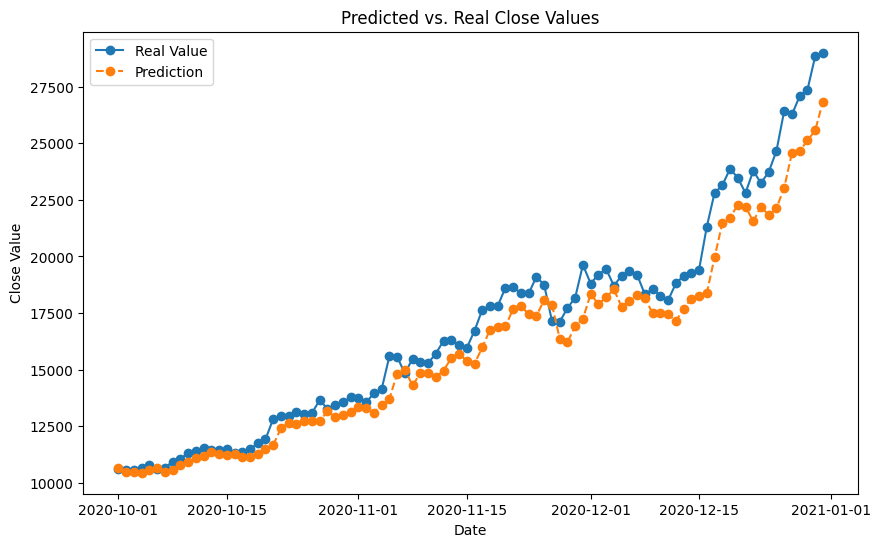

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.window import Window
from pyspark.sql.types import DoubleType
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
from pyspark.ml.feature import FeatureHasher
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt

def add_lagged_columns(df, lag_col, lag_num, partition_col):
    w = Window().partitionBy(partition_col).orderBy(col("Date"))
    for i in range(1, lag_num + 1):
        df = df.withColumn(f"{lag_col}_{i}", F.lag(col(lag_col), i).over(w))
    return df

def train_and_predict_close_time_series(df, symbol, lag_num):
    # Filter the DataFrame for the specified symbol
    symbol_df = df.filter(col("Symbol") == symbol)

    # Add lagged columns for "Close"
    lag_col = "Close"
    partition_col = "Symbol"
    symbol_df = add_lagged_columns(symbol_df, lag_col, lag_num, partition_col)

    # Split the data into training and test sets
    train_data = symbol_df.filter(col("Date") < "2020-10-01")
    test_data = symbol_df.filter((col("Date") >= "2020-10-01") & (col("Date") < "2021-01-01"))

    # Prepare lagged columns for FeatureHasher
    feature_cols = [f"{lag_col}_{i}" for i in range(1, lag_num + 1)]

    # Create a list of columns for FeatureHasher
    all_feature_cols = feature_cols  # Add other columns if needed

    # Initialize FeatureHasher
    hasher = FeatureHasher(inputCols=all_feature_cols, outputCol="features")

    # Initialize Linear Regression model
    lr = LinearRegression(featuresCol="features", labelCol="Close")

    # Create a pipeline with FeatureHasher and Linear Regression
    pipeline = Pipeline(stages=[hasher, lr])

    # Train the model
    model = pipeline.fit(train_data)

    # Make predictions on the test set
    predictions = model.transform(test_data)

    # Evaluate the model performance on the test set
    evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)

    # Print the RMSE (Root Mean Squared Error)
    print(f"Root Mean Squared Error (RMSE) on test data for symbol {symbol}: {rmse}")

    return predictions

def plot_predictions_vs_real(predictions_df):
    # Convert predictions DataFrame to Pandas for easier plotting
    pandas_predictions = predictions_df.select("Date", "Close", "prediction").toPandas()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(pandas_predictions["Date"], pandas_predictions["Close"], label="Real Value", marker='o')
    plt.plot(pandas_predictions["Date"], pandas_predictions["prediction"], label="Prediction", linestyle='dashed', marker='o')
    plt.title("Predicted vs. Real Close Values")
    plt.xlabel("Date")
    plt.ylabel("Close Value")
    plt.legend()
    plt.show()

# Example usage:
spark = SparkSession.builder.appName("TimeSeriesStockPrediction").getOrCreate()

# Assuming your DataFrame is named 'merged_df'
symbol_to_predict = "BTC-USD"  # Replace with the symbol you want to predict
lag_num = 10  # Number of lagged values

predictions_df = train_and_predict_close_time_series(merged_df, symbol_to_predict, lag_num)
plot_predictions_vs_real(predictions_df)
